crease: 53

crescent_gap: 226

inclusion: 492

oil_spot: 204

punching_hole: 219

rolled_in_scale: 276

scratches: 276

silk_spot: 651

waist_folding: 150

water_spot: 289

welding_line: 273

In [1]:
import tensorflow as tf
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import np_utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
import os

In [2]:
X = []
y = []
X_train = []
y_train = []
X_test = []
y_test = []
w = 224
l = 224

In [5]:
cd "C:\\Users\\Toqa Alaa\\PBL2"

C:\Users\Toqa Alaa\PBL2


In [6]:
for i in range(1, 54):
    img = cv2.imread(fr'gc10det/crease/crease ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(0)

for i in range(1, 227):
    img = cv2.imread(fr'gc10det/crescent_gap/crescent_gap ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(1)
    
for i in range(1, 493):
    img = cv2.imread(fr'gc10det/inclusion/inclusion ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(2)

for i in range(1, 205):
    img = cv2.imread(fr'gc10det/oil_spot/oil_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(3)

for i in range(1, 220):
    img = cv2.imread(fr'gc10det/punching_hole/punching_hole ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(4)

for i in range(1, 277):
    img = cv2.imread(fr'gc10det/rolled_in_scale/rolled_in_scale ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(5)
    
for i in range(1, 277):
    img = cv2.imread(fr'gc10det/scratches/scratches ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(6)
    
for i in range(1, 652):
    img = cv2.imread(fr'gc10det/silk_spot/silk_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(7)

for i in range(1, 150):
    img = cv2.imread(fr'gc10det/waist_folding/waist_folding ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(8)
    
for i in range(1, 290):
    img = cv2.imread(fr'gc10det/water_spot/water_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(9)

for i in range(1, 274):
    img = cv2.imread(fr'gc10det/welding_line/welding_line ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(10)

Text(0.5, 1.0, 'Welding Line')

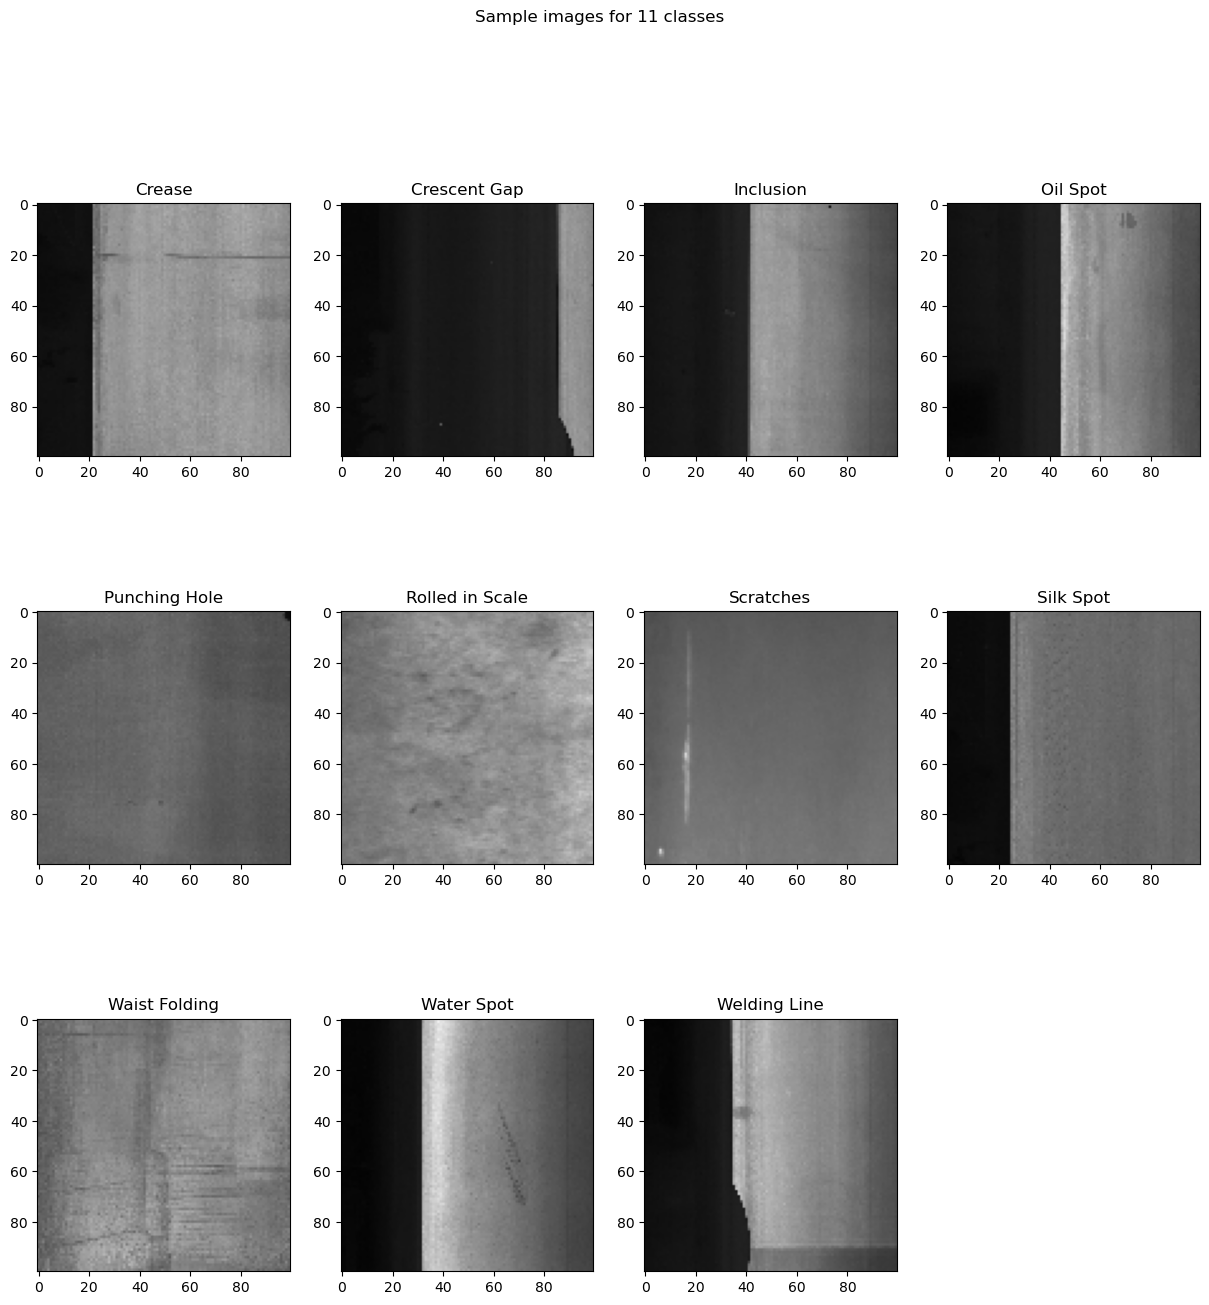

In [8]:
#Displaying sample data for all classes
path ='gc10det/crease'
for img in os.listdir(path):
    img_array1 = cv2.imread(os.path.join(path,img))
    img_array1 = cv2.resize(img_array1, (100, 100))
    break

path ='gc10det/crescent_gap'
for img in os.listdir(path):
    img_array2 = cv2.imread(os.path.join(path,img))
    img_array2 = cv2.resize(img_array2, (100, 100))
    break
    
    
path ='gc10det/inclusion'
for img in os.listdir(path):
    img_array3 = cv2.imread(os.path.join(path,img))
    img_array3 = cv2.resize(img_array3, (100, 100))
    break
    
    
path ='gc10det/oil_spot'
for img in os.listdir(path):
    img_array4 = cv2.imread(os.path.join(path,img))
    img_array4 = cv2.resize(img_array4, (100, 100))
    break
    
path ='gc10det/punching_hole'
for img in os.listdir(path):
    img_array5 = cv2.imread(os.path.join(path,img))
    img_array5 = cv2.resize(img_array5, (100, 100))
    break
    
path ='gc10det/rolled_in_scale'
for img in os.listdir(path):
    img_array6 = cv2.imread(os.path.join(path,img))
    img_array6 = cv2.resize(img_array6, (100, 100))
    break

path ='gc10det/scratches'
for img in os.listdir(path):
    img_array7 = cv2.imread(os.path.join(path,img))
    img_array7 = cv2.resize(img_array7, (100, 100))
    break
    
    
path ='gc10det/silk_spot'
for img in os.listdir(path):
    img_array8 = cv2.imread(os.path.join(path,img))
    img_array8 = cv2.resize(img_array8, (100, 100))
    break
    
    
path ='gc10det/waist_folding'
for img in os.listdir(path):
    img_array9 = cv2.imread(os.path.join(path,img))
    img_array9 = cv2.resize(img_array9, (100, 100))
    break
    
path ='gc10det/water_spot'
for img in os.listdir(path):
    img_array10 = cv2.imread(os.path.join(path,img))
    img_array10 = cv2.resize(img_array10, (100, 100))
    break
    
path ='gc10det/welding_line'
for img in os.listdir(path):
    img_array11 = cv2.imread(os.path.join(path,img))
    img_array11 = cv2.resize(img_array11, (100, 100))
    break
    
fig = plt.figure(figsize=(15, 15))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[1, 1, 1], wspace=0.4,
                         hspace=0.4, height_ratios=[1, 1, 1, 1])
ax1 = fig.add_subplot(3, 4, 1)
ax1.imshow(img_array1, cmap='gray')
fig.suptitle("Sample images for 11 classes")
ax1.set_title("Crease")
ax2 = fig.add_subplot(3, 4, 2)
ax2.imshow(img_array2, cmap='gray')
ax2.set_title("Crescent Gap")
ax3 = fig.add_subplot(3, 4, 3)
ax3.imshow(img_array3, cmap='gray')
ax3.set_title("Inclusion")
ax4 = fig.add_subplot(3, 4, 4)
ax4.imshow(img_array4, cmap='gray')
ax4.set_title("Oil Spot")
ax5 = fig.add_subplot(3, 4, 5)
ax5.imshow(img_array5, cmap='gray')
ax5.set_title("Punching Hole")
ax6 = fig.add_subplot(3, 4, 6)
ax6.imshow(img_array6, cmap='gray')
ax6.set_title("Rolled in Scale")
ax7 = fig.add_subplot(3, 4, 7)
ax7.imshow(img_array7, cmap='gray')
ax7.set_title("Scratches")
ax8 = fig.add_subplot(3, 4, 8)
ax8.imshow(img_array8, cmap='gray')
ax8.set_title("Silk Spot")
ax9 = fig.add_subplot(3, 4, 9)
ax9.imshow(img_array9, cmap='gray')
ax9.set_title("Waist Folding")
ax10 = fig.add_subplot(3, 4, 10)
ax10.imshow(img_array10, cmap='gray')
ax10.set_title("Water Spot")
ax11 = fig.add_subplot(3, 4, 11)
ax11.imshow(img_array11, cmap='gray')
ax11.set_title("Welding Line")

In [9]:
data_dir = 'gc10det'
class_names = sorted([subdir for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subdir))])
num_classes = len(class_names)
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [10]:
train_data_gen = data_gen.flow_from_directory(directory=data_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=123,
                                              subset='training')

Found 2574 images belonging to 12 classes.


In [11]:
val_data_gen = data_gen.flow_from_directory(directory=data_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=123,
                                              subset='validation')

Found 638 images belonging to 12 classes.


In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
from keras import Model
from keras.optimizers import SGD

model = Sequential([pre_trained_model])

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Flatten())

model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(11,activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
H = model.fit(
    train_data_gen,
    validation_data = val_data_gen,
    epochs = 30,
    batch_size = 10)

Epoch 1/30
78/78 [==============================] - 133s 2s/step - loss: 1.7495 - acc: 0.4354 - val_loss: 1.4299 - val_acc: 0.5008
Epoch 2/30
78/78 [==============================] - 124s 2s/step - loss: 1.1511 - acc: 0.6071 - val_loss: 1.1930 - val_acc: 0.5818
Epoch 3/30
78/78 [==============================] - 133s 2s/step - loss: 1.0477 - acc: 0.6477 - val_loss: 1.1678 - val_acc: 0.5818
Epoch 4/30
78/78 [==============================] - 126s 2s/step - loss: 0.9306 - acc: 0.6830 - val_loss: 1.0824 - val_acc: 0.5851
Epoch 5/30
78/78 [==============================] - 122s 2s/step - loss: 0.9651 - acc: 0.6673 - val_loss: 1.1289 - val_acc: 0.5851
Epoch 6/30
78/78 [==============================] - 123s 2s/step - loss: 0.9008 - acc: 0.6866 - val_loss: 1.0856 - val_acc: 0.5997
Epoch 7/30
78/78 [==============================] - 123s 2s/step - loss: 0.8546 - acc: 0.7135 - val_loss: 1.1125 - val_acc: 0.5964
Epoch 8/30
78/78 [==============================] - 122s 2s/step - loss: 0.8987 - a

In [ ]:
feature_mapping = model(X) 

clf = svm.SVC()
clf.fit(feature_mapings, y)

ValueError: Layer "sequential_1" expects 1 input(s), but it received 3108 input tensors. Inputs received: [<tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 16,  16,  16],
        [ 14,  14,  14],
        [ 15,  15,  15],
        ...,
        [140, 140, 140],
        [135, 135, 135],
        [143, 143, 143]],

       [[ 14,  14,  14],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [136, 136, 136],
        [138, 138, 138],
        [142, 142, 142]],

       [[ 14,  14,  14],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [138, 138, 138],
        [141, 141, 141],
        [139, 139, 139]],

       ...,

       [[ 17,  17,  17],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [146, 146, 146],
        [145, 145, 145],
        [145, 145, 145]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16],
        ...,
        [148, 148, 148],
        [146, 146, 146],
        [140, 140, 140]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16],
        ...,
        [139, 139, 139],
        [138, 138, 138],
        [141, 141, 141]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [81, 81, 81]],

       [[12, 12, 12],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       [[15, 15, 15],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [74, 74, 74]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [77, 77, 77]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [80, 80, 80]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [84, 84, 84],
        [77, 77, 77],
        [84, 84, 84]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]],

       [[19, 19, 19],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[12, 12, 12],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [53, 53, 53],
        [49, 49, 49],
        [48, 48, 48]],

       [[13, 13, 13],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [51, 51, 51],
        [48, 48, 48],
        [47, 47, 47]],

       [[12, 12, 12],
        [11, 11, 11],
        [13, 13, 13],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [52, 52, 52]],

       ...,

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [55, 55, 55]],

       [[12, 12, 12],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [57, 57, 57]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [76, 76, 76]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [84, 84, 84],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [201, 201, 201],
        [186, 186, 186],
        [192, 192, 192]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [203, 203, 203],
        [195, 195, 195],
        [194, 194, 194]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [203, 203, 203],
        [203, 203, 203],
        [206, 206, 206]],

       ...,

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16],
        ...,
        [200, 200, 200],
        [200, 200, 200],
        [205, 205, 205]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 14,  14,  14],
        ...,
        [200, 200, 200],
        [211, 211, 211],
        [191, 191, 191]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [201, 201, 201],
        [200, 200, 200],
        [203, 203, 203]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [85, 85, 85]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [77, 77, 77]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [77, 77, 77]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  4,   4,   4],
        [  2,   2,   2],
        [  3,   3,   3],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 93,  93,  93]],

       [[  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [102, 102, 102]],

       ...,

       [[  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 90,  90,  90]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [ 92,  92,  92],
        [ 97,  97,  97],
        [ 93,  93,  93]],

       [[  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  5,   5,   5],
        [  4,   4,   4],
        [  6,   6,   6],
        ...,
        [ 94,  94,  94],
        [106, 106, 106],
        [105, 105, 105]],

       [[  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5],
        ...,
        [ 97,  97,  97],
        [104, 104, 104],
        [105, 105, 105]],

       [[  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5],
        ...,
        [102, 102, 102],
        [109, 109, 109],
        [109, 109, 109]],

       ...,

       [[  4,   4,   4],
        [  3,   3,   3],
        [  4,   4,   4],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [101, 101, 101]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [101, 101, 101]],

       [[  3,   3,   3],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [ 95,  95,  95],
        [102, 102, 102],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [ 97,  97,  97]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 25,  25,  25],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 96,  96,  96]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [101, 101, 101]],

       ...,

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [107, 107, 107],
        [105, 105, 105],
        [104, 104, 104]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [108, 108, 108]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [103, 103, 103],
        [ 92,  92,  92],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[148, 148, 148],
        [156, 156, 156],
        [153, 153, 153],
        ...,
        [103, 103, 103],
        [109, 109, 109],
        [114, 114, 114]],

       [[157, 157, 157],
        [148, 148, 148],
        [149, 149, 149],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [107, 107, 107]],

       [[154, 154, 154],
        [153, 153, 153],
        [156, 156, 156],
        ...,
        [115, 115, 115],
        [113, 113, 113],
        [120, 120, 120]],

       ...,

       [[133, 133, 133],
        [120, 120, 120],
        [137, 137, 137],
        ...,
        [119, 119, 119],
        [126, 126, 126],
        [122, 122, 122]],

       [[134, 134, 134],
        [122, 122, 122],
        [141, 141, 141],
        ...,
        [124, 124, 124],
        [122, 122, 122],
        [118, 118, 118]],

       [[138, 138, 138],
        [139, 139, 139],
        [136, 136, 136],
        ...,
        [128, 128, 128],
        [125, 125, 125],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [54, 54, 54]],

       [[71, 71, 71],
        [65, 65, 65],
        [68, 68, 68],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       [[69, 69, 69],
        [74, 74, 74],
        [68, 68, 68],
        ...,
        [54, 54, 54],
        [55, 55, 55],
        [57, 57, 57]],

       ...,

       [[67, 67, 67],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [64, 64, 64]],

       [[70, 70, 70],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [59, 59, 59]],

       [[66, 66, 66],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [61, 61, 61],
        [63, 63, 63],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [137, 137, 137],
        [132, 132, 132],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [137, 137, 137]],

       [[131, 131, 131],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [134, 134, 134],
        [127, 127, 127],
        [135, 135, 135]],

       [[133, 133, 133],
        [131, 131, 131],
        [138, 138, 138],
        ...,
        [133, 133, 133],
        [124, 124, 124],
        [127, 127, 127]],

       ...,

       [[134, 134, 134],
        [138, 138, 138],
        [145, 145, 145],
        ...,
        [146, 146, 146],
        [150, 150, 150],
        [144, 144, 144]],

       [[129, 129, 129],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [148, 148, 148],
        [145, 145, 145],
        [146, 146, 146]],

       [[130, 130, 130],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [146, 146, 146],
        [145, 145, 145],
        [150, 150, 150]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 32,  32,  32],
        [ 31,  31,  31],
        [ 30,  30,  30],
        ...,
        [117, 117, 117],
        [112, 112, 112],
        [104, 104, 104]],

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 32,  32,  32],
        ...,
        [120, 120, 120],
        [109, 109, 109],
        [112, 112, 112]],

       [[ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30],
        ...,
        [115, 115, 115],
        [106, 106, 106],
        [110, 110, 110]],

       ...,

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31],
        ...,
        [116, 116, 116],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30],
        ...,
        [110, 110, 110],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 32,  32,  32],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [121, 121, 121],
        [116, 116, 116],
        ...,
        [ 71,  71,  71],
        [ 74,  74,  74],
        [ 72,  72,  72]],

       [[117, 117, 117],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 73,  73,  73],
        [ 75,  75,  75],
        [ 72,  72,  72]],

       [[103, 103, 103],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 68,  68,  68],
        [ 76,  76,  76],
        [ 72,  72,  72]],

       ...,

       [[ 81,  81,  81],
        [ 78,  78,  78],
        [ 84,  84,  84],
        ...,
        [ 81,  81,  81],
        [ 79,  79,  79],
        [ 75,  75,  75]],

       [[ 79,  79,  79],
        [ 77,  77,  77],
        [ 80,  80,  80],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 75,  75,  75]],

       [[ 85,  85,  85],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 79,  79,  79],
        [ 77,  77,  77],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[116, 116, 116],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 84,  84,  84]],

       [[109, 109, 109],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 81,  81,  81]],

       ...,

       [[110, 110, 110],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 95,  95,  95]],

       [[113, 113, 113],
        [107, 107, 107],
        [101, 101, 101],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       [[113, 113, 113],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [109, 109, 109],
        [101, 101, 101],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [ 92,  92,  92]],

       [[107, 107, 107],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[106, 106, 106],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [ 97,  97,  97],
        [103, 103, 103],
        [ 93,  93,  93]],

       ...,

       [[106, 106, 106],
        [109, 109, 109],
        [103, 103, 103],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 91,  91,  91]],

       [[110, 110, 110],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       [[102, 102, 102],
        [105, 105, 105],
        [113, 113, 113],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [ 96,  96,  96],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[111, 111, 111],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [ 97,  97,  97],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       [[109, 109, 109],
        [106, 106, 106],
        [101, 101, 101],
        ...,
        [ 95,  95,  95],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [116, 116, 116],
        [111, 111, 111],
        [100, 100, 100]],

       [[104, 104, 104],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [112, 112, 112],
        [118, 118, 118],
        [ 94,  94,  94]],

       [[109, 109, 109],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [98, 98, 98],
        [97, 97, 97],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[93, 93, 93],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [75, 75, 75]],

       [[92, 92, 92],
        [94, 94, 94],
        [96, 96, 96],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [75, 75, 75]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [69, 69, 69],
        [74, 74, 74],
        [73, 73, 73]],

       [[90, 90, 90],
        [94, 94, 94],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [71, 71, 71]],

       [[87, 87, 87],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [74, 74, 74],
        [68, 68, 68],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [ 96,  96,  96]],

       [[103, 103, 103],
        [108, 108, 108],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[110, 110, 110],
        [107, 107, 107],
        [111, 111, 111],
        ...,
        [104, 104, 104],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       ...,

       [[103, 103, 103],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [ 97,  97,  97]],

       [[104, 104, 104],
        [109, 109, 109],
        [103, 103, 103],
        ...,
        [111, 111, 111],
        [108, 108, 108],
        [ 97,  97,  97]],

       [[104, 104, 104],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 22,  22,  22],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[110, 110, 110],
        [118, 118, 118],
        [113, 113, 113],
        ...,
        [ 21,  21,  21],
        [ 21,  21,  21],
        [ 20,  20,  20]],

       [[110, 110, 110],
        [110, 110, 110],
        [113, 113, 113],
        ...,
        [ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21]],

       ...,

       [[ 95,  95,  95],
        [107, 107, 107],
        [ 99,  99,  99],
        ...,
        [ 21,  21,  21],
        [ 20,  20,  20],
        [ 19,  19,  19]],

       [[105, 105, 105],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[107, 107, 107],
        [116, 116, 116],
        [108, 108, 108],
        ...,
        [ 19,  19,  19],
        [ 21,  21,  21],
        [ 20,  20,  20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [77, 77, 77]],

       [[89, 89, 89],
        [94, 94, 94],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [73, 73, 73]],

       [[95, 95, 95],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [68, 68, 68],
        [81, 81, 81],
        [70, 70, 70]],

       ...,

       [[88, 88, 88],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [82, 82, 82]],

       [[93, 93, 93],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [81, 81, 81]],

       [[87, 87, 87],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[98, 98, 98],
        [96, 96, 96],
        [90, 90, 90],
        ...,
        [15, 15, 15],
        [16, 16, 16],
        [15, 15, 15]],

       [[88, 88, 88],
        [95, 95, 95],
        [90, 90, 90],
        ...,
        [15, 15, 15],
        [16, 16, 16],
        [14, 14, 14]],

       [[95, 95, 95],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [15, 15, 15]],

       ...,

       [[92, 92, 92],
        [93, 93, 93],
        [85, 85, 85],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [15, 15, 15]],

       [[94, 94, 94],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[91, 91, 91],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[103, 103, 103],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[104, 104, 104],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]],

       ...,

       [[117, 117, 117],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[119, 119, 119],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[115, 115, 115],
        [115, 115, 115],
        [122, 122, 122],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 82,  82,  82],
        [ 79,  79,  79],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[112, 112, 112],
        [105, 105, 105],
        [117, 117, 117],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[117, 117, 117],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  4,   4,   4]],

       ...,

       [[114, 114, 114],
        [124, 124, 124],
        [119, 119, 119],
        ...,
        [  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[120, 120, 120],
        [119, 119, 119],
        [122, 122, 122],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[124, 124, 124],
        [109, 109, 109],
        [115, 115, 115],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[104, 104, 104],
        [111, 111, 111],
        [105, 105, 105],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[108, 108, 108],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  4,   4,   4]],

       ...,

       [[102, 102, 102],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  4,   4,   4]],

       [[ 95,  95,  95],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  4,   4,   4]],

       [[ 97,  97,  97],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1]],

       ...,

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 94,  94,  94],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[81, 81, 81],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[84, 84, 84],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [14, 14, 14]],

       ...,

       [[89, 89, 89],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [14, 14, 14],
        [12, 12, 12],
        [13, 13, 13]],

       [[86, 86, 86],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[89, 89, 89],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[24, 24, 24],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[24, 24, 24],
        [25, 25, 25],
        [24, 24, 24],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[24, 24, 24],
        [22, 22, 22],
        [24, 24, 24],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [59, 59, 59]],

       ...,

       [[24, 24, 24],
        [23, 23, 23],
        [22, 22, 22],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [66, 66, 66]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [70, 70, 70]],

       [[21, 21, 21],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [76, 76, 76],
        [86, 86, 86],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [84, 84, 84],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[ 8,  8,  8],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [88, 88, 88]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [85, 85, 85]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [138, 138, 138],
        [145, 145, 145],
        [146, 146, 146]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16],
        ...,
        [133, 133, 133],
        [147, 147, 147],
        [138, 138, 138]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [148, 148, 148],
        [142, 142, 142],
        [150, 150, 150]],

       ...,

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 15,  15,  15],
        ...,
        [153, 153, 153],
        [154, 154, 154],
        [158, 158, 158]],

       [[ 15,  15,  15],
        [ 16,  16,  16],
        [ 15,  15,  15],
        ...,
        [147, 147, 147],
        [149, 149, 149],
        [155, 155, 155]],

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 15,  15,  15],
        ...,
        [146, 146, 146],
        [150, 150, 150],
        [152, 152, 152]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  7,   7,   7],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[  7,   7,   7],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 96,  96,  96],
        [102, 102, 102],
        [ 95,  95,  95]],

       [[  9,   9,   9],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 96,  96,  96]],

       ...,

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 97,  97,  97]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 88,  88,  88],
        [ 94,  94,  94],
        ...,
        [127, 127, 127],
        [133, 133, 133],
        [127, 127, 127]],

       [[ 87,  87,  87],
        [ 89,  89,  89],
        [100, 100, 100],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [131, 131, 131]],

       [[ 93,  93,  93],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [122, 122, 122],
        [126, 126, 126],
        [128, 128, 128]],

       ...,

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [122, 122, 122],
        [118, 118, 118],
        [128, 128, 128]],

       [[ 85,  85,  85],
        [ 90,  90,  90],
        [ 83,  83,  83],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [119, 119, 119]],

       [[ 79,  79,  79],
        [ 90,  90,  90],
        [ 86,  86,  86],
        ...,
        [123, 123, 123],
        [125, 125, 125],
        [122, 122, 122]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [104, 104, 104],
        [109, 109, 109],
        [102, 102, 102]],

       [[ 86,  86,  86],
        [ 88,  88,  88],
        [ 80,  80,  80],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 90,  90,  90],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [103, 103, 103]],

       ...,

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [106, 106, 106]],

       [[ 87,  87,  87],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 87,  87,  87],
        [ 90,  90,  90],
        [ 85,  85,  85],
        ...,
        [108, 108, 108],
        [103, 103, 103],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [82, 82, 82],
        [87, 87, 87],
        [82, 82, 82]],

       [[84, 84, 84],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [80, 80, 80],
        [88, 88, 88],
        [82, 82, 82]],

       [[84, 84, 84],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[84, 84, 84],
        [83, 83, 83],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [93, 93, 93]],

       [[85, 85, 85],
        [89, 89, 89],
        [84, 84, 84],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [96, 96, 96]],

       [[84, 84, 84],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [114, 114, 114],
        [108, 108, 108],
        [110, 110, 110]],

       [[122, 122, 122],
        [116, 116, 116],
        [119, 119, 119],
        ...,
        [115, 115, 115],
        [109, 109, 109],
        [107, 107, 107]],

       [[126, 126, 126],
        [123, 123, 123],
        [117, 117, 117],
        ...,
        [115, 115, 115],
        [111, 111, 111],
        [111, 111, 111]],

       ...,

       [[131, 131, 131],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [108, 108, 108]],

       [[132, 132, 132],
        [129, 129, 129],
        [133, 133, 133],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [108, 108, 108]],

       [[134, 134, 134],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [109, 109, 109],
        [104, 104, 104],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [120, 120, 120],
        [123, 123, 123],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 85,  85,  85]],

       [[121, 121, 121],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [ 89,  89,  89],
        [ 84,  84,  84],
        [ 87,  87,  87]],

       [[125, 125, 125],
        [125, 125, 125],
        [122, 122, 122],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 86,  86,  86]],

       ...,

       [[118, 118, 118],
        [117, 117, 117],
        [122, 122, 122],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[120, 120, 120],
        [119, 119, 119],
        [117, 117, 117],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[108, 108, 108],
        [117, 117, 117],
        [121, 121, 121],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 21,  21,  21],
        [ 91,  91,  91],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [ 98,  98,  98]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 92,  92,  92],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 21,  21,  21],
        [ 23,  23,  23],
        [ 91,  91,  91],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [101, 101, 101]],

       ...,

       [[124, 124, 124],
        [134, 134, 134],
        [112, 112, 112],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[124, 124, 124],
        [136, 136, 136],
        [113, 113, 113],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [101, 101, 101]],

       [[132, 132, 132],
        [132, 132, 132],
        [113, 113, 113],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 21,  21,  21],
        [ 80,  80,  80],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [100, 100, 100]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 80,  80,  80],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [110, 110, 110]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 80,  80,  80],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [102, 102, 102]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 90,  90,  90],
        ...,
        [101, 101, 101],
        [110, 110, 110],
        [100, 100, 100]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 92,  92,  92],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 88,  88,  88],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[24, 24, 24],
        [25, 25, 25],
        [29, 29, 29],
        ...,
        [82, 82, 82],
        [89, 89, 89],
        [90, 90, 90]],

       [[24, 24, 24],
        [26, 26, 26],
        [29, 29, 29],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [91, 91, 91]],

       [[25, 25, 25],
        [26, 26, 26],
        [29, 29, 29],
        ...,
        [89, 89, 89],
        [82, 82, 82],
        [84, 84, 84]],

       ...,

       [[25, 25, 25],
        [25, 25, 25],
        [28, 28, 28],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [88, 88, 88]],

       [[26, 26, 26],
        [24, 24, 24],
        [29, 29, 29],
        ...,
        [88, 88, 88],
        [92, 92, 92],
        [89, 89, 89]],

       [[24, 24, 24],
        [26, 26, 26],
        [29, 29, 29],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[76, 76, 76],
        [77, 77, 77],
        [73, 73, 73],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [78, 78, 78]],

       ...,

       [[72, 72, 72],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [79, 79, 79]],

       [[72, 72, 72],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[55, 55, 55],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[56, 56, 56],
        [53, 53, 53],
        [55, 55, 55],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       ...,

       [[49, 49, 49],
        [50, 50, 50],
        [52, 52, 52],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[51, 51, 51],
        [52, 52, 52],
        [48, 48, 48],
        ...,
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 9,  9,  9]],

       [[48, 48, 48],
        [49, 49, 49],
        [50, 50, 50],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 29,  29,  29],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 31,  31,  31],
        [ 26,  26,  26],
        [ 28,  28,  28]],

       [[ 96,  96,  96],
        [ 89,  89,  89],
        [ 85,  85,  85],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       ...,

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 66,  66,  66],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 65,  65,  65],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[103, 103, 103],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 65,  65,  65],
        [ 28,  28,  28],
        [ 27,  27,  27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       [[108, 108, 108],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 18,  18,  18]],

       [[102, 102, 102],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       ...,

       [[105, 105, 105],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [ 20,  20,  20],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[106, 106, 106],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 17,  17,  17],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       [[104, 104, 104],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 85,  85,  85],
        [ 94,  94,  94],
        ...,
        [131, 131, 131],
        [137, 137, 137],
        [127, 127, 127]],

       [[ 83,  83,  83],
        [ 89,  89,  89],
        [ 93,  93,  93],
        ...,
        [121, 121, 121],
        [124, 124, 124],
        [126, 126, 126]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [115, 115, 115]],

       ...,

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [129, 129, 129],
        [133, 133, 133],
        [125, 125, 125]],

       [[ 85,  85,  85],
        [ 81,  81,  81],
        [ 90,  90,  90],
        ...,
        [134, 134, 134],
        [140, 140, 140],
        [133, 133, 133]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 87,  87,  87],
        ...,
        [136, 136, 136],
        [131, 131, 131],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 88,  88,  88],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [101, 101, 101],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       ...,

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[ 79,  79,  79],
        [ 82,  82,  82],
        [ 87,  87,  87],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [100, 100, 100]],

       [[ 78,  78,  78],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[ 78,  78,  78],
        [ 83,  83,  83],
        [ 80,  80,  80],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 91,  91,  91]],

       [[ 84,  84,  84],
        [ 79,  79,  79],
        [ 84,  84,  84],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       ...,

       [[ 84,  84,  84],
        [ 78,  78,  78],
        [ 83,  83,  83],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 74,  74,  74],
        [ 82,  82,  82],
        [ 86,  86,  86],
        ...,
        [ 95,  95,  95],
        [ 90,  90,  90],
        [100, 100, 100]],

       [[ 81,  81,  81],
        [ 84,  84,  84],
        [ 79,  79,  79],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 73,  73,  73],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 81,  81,  81]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 80,  80,  80]],

       [[ 72,  72,  72],
        [ 69,  69,  69],
        [ 73,  73,  73],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       ...,

       [[ 89,  89,  89],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[ 91,  91,  91],
        [ 85,  85,  85],
        [ 91,  91,  91],
        ...,
        [108, 108, 108],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 79,  79,  79],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]],

       [[78, 78, 78],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[84, 84, 84],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[81, 81, 81],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [19, 19, 19]],

       [[78, 78, 78],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [19, 19, 19]],

       [[82, 82, 82],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [25, 25, 25],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[ 95,  95,  95],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 24,  24,  24]],

       [[ 88,  88,  88],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 27,  27,  27],
        [ 24,  24,  24],
        [ 25,  25,  25]],

       ...,

       [[ 97,  97,  97],
        [107, 107, 107],
        [ 99,  99,  99],
        ...,
        [ 25,  25,  25],
        [ 24,  24,  24],
        [ 22,  22,  22]],

       [[100, 100, 100],
        [107, 107, 107],
        [ 99,  99,  99],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]],

       [[104, 104, 104],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 25,  25,  25],
        [ 24,  24,  24],
        [ 24,  24,  24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 24,  24,  24],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[ 98,  98,  98],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 97,  97,  97],
        ...,
        [ 26,  26,  26],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       ...,

       [[106, 106, 106],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[106, 106, 106],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[104, 104, 104],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[75, 75, 75],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[78, 78, 78],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       ...,

       [[81, 81, 81],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[79, 79, 79],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]],

       [[77, 77, 77],
        [75, 75, 75],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [132, 132, 132],
        [134, 134, 134],
        [133, 133, 133]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [136, 136, 136],
        [133, 133, 133],
        [130, 130, 130]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [134, 134, 134],
        [137, 137, 137],
        [134, 134, 134]],

       ...,

       [[  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [140, 140, 140],
        [138, 138, 138],
        [141, 141, 141]],

       [[  9,   9,   9],
        [  8,   8,   8],
        [ 10,  10,  10],
        ...,
        [142, 142, 142],
        [139, 139, 139],
        [136, 136, 136]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [138, 138, 138],
        [139, 139, 139],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 68,  68,  68],
        [ 71,  71,  71],
        [ 69,  69,  69]],

       [[  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 72,  72,  72],
        [ 70,  70,  70],
        [ 69,  69,  69]],

       [[  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 73,  73,  73],
        [ 70,  70,  70],
        [ 67,  67,  67]],

       ...,

       [[  7,   7,   7],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[  6,   6,   6],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [ 93,  93,  93],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[  7,   7,   7],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [75, 75, 75]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [76, 76, 76]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [78, 78, 78]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [71, 71, 71]],

       [[20, 20, 20],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [70, 70, 70]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [71, 71, 71],
        [67, 67, 67],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [81, 81, 81]],

       [[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [82, 82, 82]],

       [[15, 15, 15],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [81, 81, 81]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [83, 83, 83]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [81, 81, 81]],

       [[21, 21, 21],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [83, 83, 83]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [79, 79, 79]],

       [[17, 17, 17],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [77, 77, 77],
        [79, 79, 79]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [15, 15, 15],
        [18, 18, 18],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [81, 81, 81]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [83, 83, 83]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [84, 84, 84]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [67, 67, 67]],

       [[19, 19, 19],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [72, 72, 72]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [67, 67, 67]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [65, 65, 65]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [67, 67, 67]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [67, 67, 67],
        [71, 71, 71],
        [67, 67, 67]],

       ...,

       [[19, 19, 19],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [69, 69, 69]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [66, 66, 66]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [73, 73, 73],
        [68, 68, 68],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [72, 72, 72]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [72, 72, 72]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [65, 65, 65]],

       [[18, 18, 18],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [64, 64, 64],
        [61, 61, 61],
        [64, 64, 64]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [78, 78, 78],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [76, 76, 76],
        [82, 82, 82]],

       ...,

       [[10, 10, 10],
        [10, 10, 10],
        [13, 13, 13],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [81, 81, 81]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [79, 79, 79]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [95, 95, 95],
        [92, 92, 92],
        [95, 95, 95]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [90, 90, 90]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [94, 94, 94]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [64, 64, 64]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [65, 65, 65]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [79, 79, 79],
        [83, 83, 83]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [85, 85, 85]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [82, 82, 82]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [76, 76, 76]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [78, 78, 78],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [71, 71, 71],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [74, 74, 74]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [82, 82, 82]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [87, 87, 87]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [74, 74, 74],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [77, 77, 77],
        [71, 71, 71],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       [[  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [101, 101, 101],
        [ 95,  95,  95],
        [100, 100, 100]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       ...,

       [[ 19,  19,  19],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 78,  78,  78],
        [ 82,  82,  82],
        [ 79,  79,  79]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 78,  78,  78],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]],

       [[15, 15, 15],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [73, 73, 73]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [88, 88, 88],
        [83, 83, 83],
        [85, 85, 85]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [87, 87, 87],
        [82, 82, 82],
        [87, 87, 87]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [74, 74, 74]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [77, 77, 77]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [70, 70, 70]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [76, 76, 76]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [68, 68, 68]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [65, 65, 65],
        [60, 60, 60],
        [65, 65, 65]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [63, 63, 63]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [78, 78, 78]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [73, 73, 73]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [74, 74, 74]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [61, 61, 61]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [61, 61, 61]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [70, 70, 70]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 2,  2,  2],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [84, 84, 84]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [85, 85, 85]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [85, 85, 85]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [88, 88, 88]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]],

       ...,

       [[ 5,  5,  5],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [87, 87, 87]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [84, 84, 84]],

       [[16, 16, 16],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [88, 88, 88]],

       [[12, 12, 12],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [90, 90, 90]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [74, 74, 74]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [72, 72, 72]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [73, 73, 73]],

       ...,

       [[ 4,  4,  4],
        [ 2,  2,  2],
        [ 4,  4,  4],
        ...,
        [87, 87, 87],
        [81, 81, 81],
        [83, 83, 83]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [79, 79, 79]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [77, 77, 77]],

       [[13, 13, 13],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       [[14, 14, 14],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [81, 81, 81]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [87, 87, 87]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [90, 90, 90],
        [85, 85, 85],
        [88, 88, 88]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [95, 95, 95]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [90, 90, 90]],

       [[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [91, 91, 91],
        [93, 93, 93]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [93, 93, 93],
        [97, 97, 97],
        [93, 93, 93]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [95, 95, 95]],

       [[14, 14, 14],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [98, 98, 98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [79, 79, 79]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [78, 78, 78]],

       ...,

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [77, 77, 77]],

       [[13, 13, 13],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [67, 67, 67],
        [70, 70, 70]],

       [[13, 13, 13],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [65, 65, 65]],

       [[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [71, 71, 71]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [68, 68, 68]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [66, 66, 66]],

       ...,

       [[ 9,  9,  9],
        [11, 11, 11],
        [ 9,  9,  9],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [73, 73, 73],
        [71, 71, 71]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [70, 70, 70]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [69, 69, 69],
        [73, 73, 73],
        [70, 70, 70]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [72, 72, 72],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [68, 68, 68]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [82, 82, 82]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [75, 75, 75]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [73, 73, 73]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [76, 76, 76]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [77, 77, 77]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 3,  3,  3],
        [ 7,  7,  7],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [71, 71, 71]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [71, 71, 71]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [70, 70, 70]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [73, 73, 73],
        [71, 71, 71]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [69, 69, 69]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [67, 67, 67]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [67, 67, 67]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [59, 59, 59]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [64, 64, 64]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [65, 65, 65],
        [68, 68, 68],
        [65, 65, 65]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [72, 72, 72]],

       [[15, 15, 15],
        [15, 15, 15],
        [18, 18, 18],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [69, 69, 69]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [57, 57, 57]],

       [[10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [57, 57, 57]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [61, 61, 61]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [62, 62, 62]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [63, 63, 63]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [66, 66, 66],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [68, 68, 68],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [74, 74, 74]],

       [[15, 15, 15],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [70, 70, 70]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [88, 88, 88]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [73, 73, 73],
        [67, 67, 67],
        [70, 70, 70]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  8,   8,   8],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[  8,   8,   8],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 10,  10,  10],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 98,  98,  98]],

       ...,

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 14,  14,  14],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 14,  14,  14],
        [ 13,  13,  13],
        [ 14,  14,  14],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 15,  15,  15],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [86, 86, 86]],

       ...,

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [87, 87, 87]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [72, 72, 72]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [73, 73, 73],
        [68, 68, 68],
        [67, 67, 67]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [72, 72, 72]],

       [[16, 16, 16],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [73, 73, 73]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [84, 84, 84]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [66, 66, 66]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [63, 63, 63],
        [63, 63, 63]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [50, 50, 50]],

       [[13, 13, 13],
        [12, 12, 12],
        [15, 15, 15],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [49, 49, 49]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [52, 52, 52]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [71, 71, 71]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [72, 72, 72]],

       [[15, 15, 15],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [69, 69, 69]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [64, 64, 64],
        [69, 69, 69],
        [71, 71, 71]],

       ...,

       [[13, 13, 13],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [61, 61, 61],
        [63, 63, 63],
        [62, 62, 62]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [60, 60, 60]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [71, 71, 71]],

       [[16, 16, 16],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [74, 74, 74]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [72, 72, 72]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [61, 61, 61]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [60, 60, 60],
        [62, 62, 62]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [59, 59, 59],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [57, 57, 57]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [54, 54, 54]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [55, 55, 55],
        [57, 57, 57],
        [55, 55, 55]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [51, 51, 51]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [53, 53, 53]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [68, 68, 68],
        [61, 61, 61],
        [64, 64, 64]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [68, 68, 68],
        [62, 62, 62],
        [65, 65, 65]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [69, 69, 69],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[10, 10, 10],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [62, 62, 62],
        [60, 60, 60],
        [63, 63, 63]],

       [[10, 10, 10],
        [10, 10, 10],
        [12, 12, 12],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [61, 61, 61]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [65, 65, 65],
        [61, 61, 61],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [73, 73, 73]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [73, 73, 73]],

       ...,

       [[17, 17, 17],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [59, 59, 59]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [74, 74, 74]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [63, 63, 63]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [63, 63, 63],
        [60, 60, 60],
        [62, 62, 62]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [47, 47, 47],
        [45, 45, 45],
        [45, 45, 45]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [46, 46, 46],
        [43, 43, 43],
        [46, 46, 46]],

       [[15, 15, 15],
        [15, 15, 15],
        [18, 18, 18],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [46, 46, 46]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [54, 54, 54],
        [50, 50, 50],
        [50, 50, 50]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [52, 52, 52],
        [53, 53, 53],
        [51, 51, 51]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [10, 10, 10],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 12,  12,  12],
        [ 11,  11,  11],
        [ 12,  12,  12],
        ...,
        [ 99,  99,  99],
        [105, 105, 105],
        [109, 109, 109]],

       [[ 13,  13,  13],
        [ 11,  11,  11],
        [ 13,  13,  13],
        ...,
        [ 98,  98,  98],
        [107, 107, 107],
        [109, 109, 109]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 14,  14,  14],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [105, 105, 105]],

       ...,

       [[ 10,  10,  10],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [108, 108, 108]],

       [[ 10,  10,  10],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [105, 105, 105],
        [108, 108, 108],
        [107, 107, 107]],

       [[ 13,  13,  13],
        [ 11,  11,  11],
        [ 12,  12,  12],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [150, 150, 150],
        [145, 145, 145],
        [155, 155, 155]],

       [[ 15,  15,  15],
        [ 13,  13,  13],
        [ 17,  17,  17],
        ...,
        [155, 155, 155],
        [152, 152, 152],
        [151, 151, 151]],

       [[ 17,  17,  17],
        [ 15,  15,  15],
        [ 18,  18,  18],
        ...,
        [155, 155, 155],
        [149, 149, 149],
        [149, 149, 149]],

       ...,

       [[ 14,  14,  14],
        [ 13,  13,  13],
        [ 14,  14,  14],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 14,  14,  14],
        [ 13,  13,  13],
        [ 16,  16,  16],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [101, 101, 101]],

       [[ 15,  15,  15],
        [ 14,  14,  14],
        [ 15,  15,  15],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 94,  94,  94],
        [ 88,  88,  88],
        [ 94,  94,  94]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [ 86,  86,  86],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [109, 109, 109]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [103, 103, 103],
        [109, 109, 109],
        [107, 107, 107]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 18,  18,  18],
        [ 17,  17,  17],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 19,  19,  19],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [102, 102, 102]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [107, 107, 107]],

       ...,

       [[ 18,  18,  18],
        [ 16,  16,  16],
        [ 18,  18,  18],
        ...,
        [ 83,  83,  83],
        [ 80,  80,  80],
        [ 84,  84,  84]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 19,  19,  19],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 17,  17,  17],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[23, 23, 23],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [94, 94, 94]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [99, 99, 99],
        [98, 98, 98],
        [91, 91, 91]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [94, 94, 94],
        [97, 97, 97],
        [91, 91, 91]],

       ...,

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [89, 89, 89]],

       [[23, 23, 23],
        [22, 22, 22],
        [23, 23, 23],
        ...,
        [94, 94, 94],
        [96, 96, 96],
        [92, 92, 92]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[44, 44, 44],
        [47, 47, 47],
        [46, 46, 46],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [57, 57, 57]],

       [[45, 45, 45],
        [50, 50, 50],
        [52, 52, 52],
        ...,
        [53, 53, 53],
        [55, 55, 55],
        [54, 54, 54]],

       [[47, 47, 47],
        [44, 44, 44],
        [51, 51, 51],
        ...,
        [51, 51, 51],
        [57, 57, 57],
        [57, 57, 57]],

       ...,

       [[40, 40, 40],
        [42, 42, 42],
        [45, 45, 45],
        ...,
        [45, 45, 45],
        [46, 46, 46],
        [46, 46, 46]],

       [[40, 40, 40],
        [41, 41, 41],
        [44, 44, 44],
        ...,
        [45, 45, 45],
        [46, 46, 46],
        [46, 46, 46]],

       [[41, 41, 41],
        [42, 42, 42],
        [47, 47, 47],
        ...,
        [46, 46, 46],
        [47, 47, 47],
        [47, 47, 47]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [85, 85, 85],
        [84, 84, 84]],

       [[17, 17, 17],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [82, 82, 82]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [62, 62, 62],
        [66, 66, 66],
        [61, 61, 61]],

       [[17, 17, 17],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [66, 66, 66],
        [62, 62, 62],
        [66, 66, 66]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 25,  25,  25],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 26,  26,  26],
        ...,
        [ 88,  88,  88],
        [ 82,  82,  82],
        [ 87,  87,  87]],

       [[ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       ...,

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 27,  27,  27],
        ...,
        [ 92,  92,  92],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 26,  26,  26],
        [ 27,  27,  27],
        [ 26,  26,  26],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [82, 82, 82]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [81, 81, 81]],

       [[85, 85, 85],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [19, 19, 19],
        [20, 20, 20],
        [20, 20, 20]],

       [[85, 85, 85],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [19, 19, 19]],

       [[86, 86, 86],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[84, 84, 84],
        [83, 83, 83],
        [87, 87, 87],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [ 9,  9,  9]],

       [[85, 85, 85],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[87, 87, 87],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[90, 90, 90],
        [90, 90, 90],
        [85, 85, 85],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [12, 12, 12]],

       [[88, 88, 88],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[71, 71, 71],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 3,  3,  3]],

       [[71, 71, 71],
        [67, 67, 67],
        [73, 73, 73],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[78, 78, 78],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [ 98,  98,  98],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[105, 105, 105],
        [ 87,  87,  87],
        [ 91,  91,  91],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       ...,

       [[111, 111, 111],
        [110, 110, 110],
        [ 94,  94,  94],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 96,  96,  96],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 98,  98,  98],
        [104, 104, 104],
        [ 88,  88,  88],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[92, 92, 92],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[91, 91, 91],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[84, 84, 84],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[86, 86, 86],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[91, 91, 91],
        [88, 88, 88],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[101, 101, 101],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 99,  99,  99],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 84,  84,  84],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 77,  77,  77],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 83,  83,  83],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [97, 97, 97],
        [97, 97, 97],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[95, 95, 95],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[93, 93, 93],
        [96, 96, 96],
        [97, 97, 97],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[97, 97, 97],
        [93, 93, 93],
        [99, 99, 99],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[97, 97, 97],
        [99, 99, 99],
        [98, 98, 98],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       [[97, 97, 97],
        [98, 98, 98],
        [98, 98, 98],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [101, 101, 101],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 89,  89,  89],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2]],

       [[ 86,  86,  86],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 85,  85,  85],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  1,   1,   1]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[101, 101, 101],
        [100, 100, 100],
        [ 92,  92,  92],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 94,  94,  94],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       ...,

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 97,  97,  97],
        [ 88,  88,  88],
        [ 97,  97,  97],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[104, 104, 104],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[104, 104, 104],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  7,   7,   7]],

       ...,

       [[103, 103, 103],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[110, 110, 110],
        [105, 105, 105],
        [111, 111, 111],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  6,   6,   6]],

       [[109, 109, 109],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [  5,   5,   5],
        [  7,   7,   7],
        [  6,   6,   6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[75, 75, 75],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[78, 78, 78],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       ...,

       [[72, 72, 72],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[71, 71, 71],
        [77, 77, 77],
        [73, 73, 73],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[77, 77, 77],
        [74, 74, 74],
        [70, 70, 70],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [14, 14, 14],
        [17, 17, 17],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[10, 10, 10],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[11, 11, 11],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[84, 84, 84],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[88, 88, 88],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[77, 77, 77],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       [[82, 82, 82],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [113, 113, 113],
        [105, 105, 105],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[ 83,  83,  83],
        [ 96,  96,  96],
        [ 92,  92,  92],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 87,  87,  87],
        [ 90,  90,  90],
        [ 85,  85,  85],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]],

       ...,

       [[ 97,  97,  97],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[100, 100, 100],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 92,  92,  92],
        [ 89,  89,  89],
        ...,
        [  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 85,  85,  85],
        [ 86,  86,  86],
        [ 89,  89,  89],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 88,  88,  88],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[113, 113, 113],
        [104, 104, 104],
        [ 98,  98,  98],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]],

       [[102, 102, 102],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[111, 111, 111],
        [112, 112, 112],
        [117, 117, 117],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[106, 106, 106],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[110, 110, 110],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  2,   2,   2]],

       ...,

       [[100, 100, 100],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[119, 119, 119],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[102, 102, 102],
        [108, 108, 108],
        [103, 103, 103],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [120, 120, 120],
        [112, 112, 112],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[115, 115, 115],
        [114, 114, 114],
        [109, 109, 109],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[118, 118, 118],
        [112, 112, 112],
        [115, 115, 115],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[107, 107, 107],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[105, 105, 105],
        [105, 105, 105],
        [110, 110, 110],
        ...,
        [  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[107, 107, 107],
        [112, 112, 112],
        [115, 115, 115],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 94,  94,  94],
        [ 90,  90,  90],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 87,  87,  87],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [100, 100, 100],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[100, 100, 100],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[101, 101, 101],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1]],

       [[102, 102, 102],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[79, 79, 79],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[85, 85, 85],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[81, 81, 81],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[80, 80, 80],
        [76, 76, 76],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  3,   3,   3]],

       ...,

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 95,  95,  95],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  5,   5,   5]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[104, 104, 104],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[100, 100, 100],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [  6,   6,   6],
        [  4,   4,   4],
        [  5,   5,   5]],

       ...,

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]],

       [[ 93,  93,  93],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [104, 104, 104],
        [109, 109, 109],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[104, 104, 104],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[116, 116, 116],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 88,  88,  88],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  2,   2,   2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 97,  97,  97],
        [105, 105, 105],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  5,   5,   5]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  6,   6,   6]],

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       ...,

       [[100, 100, 100],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[100, 100, 100],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[102, 102, 102],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [ 99,  99,  99],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[ 91,  91,  91],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[105, 105, 105],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 89,  89,  89],
        [ 99,  99,  99],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[ 91,  91,  91],
        [ 86,  86,  86],
        [ 97,  97,  97],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 98,  98,  98],
        [ 87,  87,  87],
        [ 94,  94,  94],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  7,   7,   7]],

       ...,

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [104, 104, 104],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[ 99,  99,  99],
        [105, 105, 105],
        [101, 101, 101],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[104, 104, 104],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[94, 94, 94],
        [69, 69, 69],
        [99, 99, 99],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[76, 76, 76],
        [83, 83, 83],
        [71, 71, 71],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[95, 95, 95],
        [82, 82, 82],
        [74, 74, 74],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       ...,

       [[71, 71, 71],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[68, 68, 68],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[69, 69, 69],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[86, 86, 86],
        [88, 88, 88],
        [96, 96, 96],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[94, 94, 94],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[82, 82, 82],
        [81, 81, 81],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[83, 83, 83],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 93,  93,  93],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       ...,

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 84,  84,  84],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 84,  84,  84],
        [ 88,  88,  88],
        [ 91,  91,  91],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       ...,

       [[103, 103, 103],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[102, 102, 102],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[105, 105, 105],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[99, 99, 99],
        [86, 86, 86],
        [97, 97, 97],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[92, 92, 92],
        [90, 90, 90],
        [95, 95, 95],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[93, 93, 93],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[79, 79, 79],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[84, 84, 84],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[87, 87, 87],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       ...,

       [[85, 85, 85],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[89, 89, 89],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [86, 86, 86],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 5,  5,  5]],

       [[87, 87, 87],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[84, 84, 84],
        [87, 87, 87],
        [91, 91, 91],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[85, 85, 85],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[84, 84, 84],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[87, 87, 87],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[78, 78, 78],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[84, 84, 84],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       ...,

       [[90, 90, 90],
        [87, 87, 87],
        [93, 93, 93],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[88, 88, 88],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[93, 93, 93],
        [87, 87, 87],
        [93, 93, 93],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[98, 98, 98],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[92, 92, 92],
        [96, 96, 96],
        [97, 97, 97],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[96, 96, 96],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[81, 81, 81],
        [78, 78, 78],
        [85, 85, 85],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       [[82, 82, 82],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  5,   5,   5]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       ...,

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 91,  91,  91],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  7,   7,   7],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [70, 70, 70],
        [61, 61, 61],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[80, 80, 80],
        [72, 72, 72],
        [64, 64, 64],
        ...,
        [ 3,  3,  3],
        [ 1,  1,  1],
        [ 3,  3,  3]],

       [[66, 66, 66],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       ...,

       [[58, 58, 58],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[61, 61, 61],
        [57, 57, 57],
        [63, 63, 63],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[60, 60, 60],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [83, 83, 83],
        [74, 74, 74],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [77, 77, 77],
        [83, 83, 83],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[87, 87, 87],
        [81, 81, 81],
        [87, 87, 87],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[75, 75, 75],
        [76, 76, 76],
        [64, 64, 64],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[60, 60, 60],
        [72, 72, 72],
        [68, 68, 68],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[63, 63, 63],
        [70, 70, 70],
        [64, 64, 64],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[89, 89, 89],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[89, 89, 89],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[95, 95, 95],
        [98, 98, 98],
        [93, 93, 93],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[91, 91, 91],
        [91, 91, 91],
        [87, 87, 87],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[87, 87, 87],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[86, 86, 86],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6]],

       [[76, 76, 76],
        [89, 89, 89],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [103, 103, 103],
        [ 93,  93,  93],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  5,   5,   5]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[101, 101, 101],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 80,  80,  80],
        ...,
        [  6,   6,   6],
        [  4,   4,   4],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       [[85, 85, 85],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[91, 91, 91],
        [93, 93, 93],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       ...,

       [[95, 95, 95],
        [97, 97, 97],
        [85, 85, 85],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[89, 89, 89],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       [[96, 96, 96],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 7,  7,  7]],

       [[84, 84, 84],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       ...,

       [[83, 83, 83],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[88, 88, 88],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [87, 87, 87],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[80, 80, 80],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[79, 79, 79],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       ...,

       [[86, 86, 86],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[87, 87, 87],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [131, 131, 131],
        [134, 134, 134],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[137, 137, 137],
        [132, 132, 132],
        [134, 134, 134],
        ...,
        [  6,   6,   6],
        [  4,   4,   4],
        [  6,   6,   6]],

       [[130, 130, 130],
        [139, 139, 139],
        [142, 142, 142],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       ...,

       [[129, 129, 129],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[131, 131, 131],
        [133, 133, 133],
        [129, 129, 129],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[131, 131, 131],
        [129, 129, 129],
        [123, 123, 123],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [73, 73, 73],
        [65, 65, 65],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [73, 73, 73],
        [68, 68, 68],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[67, 67, 67],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[64, 64, 64],
        [68, 68, 68],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[67, 67, 67],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [64, 64, 64],
        [75, 75, 75],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[66, 66, 66],
        [65, 65, 65],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[64, 64, 64],
        [66, 66, 66],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[71, 71, 71],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[74, 74, 74],
        [73, 73, 73],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[72, 72, 72],
        [73, 73, 73],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[78, 78, 78],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       [[80, 80, 80],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [12, 12, 12]],

       ...,

       [[80, 80, 80],
        [78, 78, 78],
        [85, 85, 85],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[84, 84, 84],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[80, 80, 80],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [13, 13, 13],
        [ 9,  9,  9],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[86, 86, 86],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[88, 88, 88],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       ...,

       [[74, 74, 74],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[75, 75, 75],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[77, 77, 77],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 86,  86,  86]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 75,  75,  75],
        [ 79,  79,  79],
        [ 75,  75,  75]],

       ...,

       [[ 23,  23,  23],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [101, 101, 101]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 21,  21,  21],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[22, 22, 22],
        [24, 24, 24],
        [22, 22, 22],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [88, 88, 88]],

       [[24, 24, 24],
        [24, 24, 24],
        [22, 22, 22],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [86, 86, 86]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [87, 87, 87]],

       ...,

       [[25, 25, 25],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [86, 86, 86]],

       [[24, 24, 24],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [88, 88, 88]],

       [[24, 24, 24],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [107, 107, 107]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 25,  25,  25],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [103, 103, 103]],

       [[ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [110, 110, 110],
        [104, 104, 104],
        [103, 103, 103]],

       ...,

       [[ 25,  25,  25],
        [ 26,  26,  26],
        [ 24,  24,  24],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       [[ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 90,  90,  90],
        [ 93,  93,  93],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 24,  24,  24],
        [ 25,  25,  25],
        ...,
        [ 90,  90,  90],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 26,  26,  26],
        ...,
        [ 91,  91,  91],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 93,  93,  93],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       ...,

       [[ 25,  25,  25],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 21,  21,  21],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [105, 105, 105],
        [102, 102, 102]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [104, 104, 104]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [101, 101, 101]],

       ...,

       [[ 22,  22,  22],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 25,  25,  25],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 26,  26,  26],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [109, 109, 109]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 25,  25,  25],
        ...,
        [122, 122, 122],
        [110, 110, 110],
        [108, 108, 108]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [122, 122, 122],
        [115, 115, 115],
        [102, 102, 102]],

       ...,

       [[ 23,  23,  23],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [101, 101, 101]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [101, 101, 101]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[22, 22, 22],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [81, 81, 81]],

       [[22, 22, 22],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [82, 82, 82]],

       [[24, 24, 24],
        [22, 22, 22],
        [23, 23, 23],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[22, 22, 22],
        [22, 22, 22],
        [23, 23, 23],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [77, 77, 77]],

       [[20, 20, 20],
        [23, 23, 23],
        [22, 22, 22],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [75, 75, 75]],

       [[23, 23, 23],
        [23, 23, 23],
        [21, 21, 21],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[23, 23, 23],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [60, 60, 60]],

       [[24, 24, 24],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [59, 59, 59]],

       [[23, 23, 23],
        [24, 24, 24],
        [22, 22, 22],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [62, 62, 62]],

       ...,

       [[23, 23, 23],
        [22, 22, 22],
        [23, 23, 23],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[23, 23, 23],
        [23, 23, 23],
        [22, 22, 22],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]],

       [[22, 22, 22],
        [23, 23, 23],
        [24, 24, 24],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [82, 82, 82]],

       [[22, 22, 22],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [85, 85, 85],
        [79, 79, 79],
        [83, 83, 83]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [82, 82, 82]],

       ...,

       [[21, 21, 21],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [73, 73, 73],
        [78, 78, 78],
        [77, 77, 77]],

       [[20, 20, 20],
        [24, 24, 24],
        [22, 22, 22],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [78, 78, 78]],

       [[21, 21, 21],
        [20, 20, 20],
        [22, 22, 22],
        ...,
        [82, 82, 82],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [92, 92, 92]],

       [[21, 21, 21],
        [22, 22, 22],
        [21, 21, 21],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [96, 96, 96]],

       [[21, 21, 21],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [94, 94, 94]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [68, 68, 68],
        [76, 76, 76],
        [71, 71, 71]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [71, 71, 71],
        [74, 74, 74],
        [69, 69, 69]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [65, 65, 65],
        [75, 75, 75],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [86, 86, 86]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [87, 87, 87]],

       [[19, 19, 19],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [86, 86, 86]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [84, 84, 84]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [84, 84, 84]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [78, 78, 78]],

       [[20, 20, 20],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       [[22, 22, 22],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[21, 21, 21],
        [22, 22, 22],
        [21, 21, 21],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [81, 81, 81]],

       [[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [85, 85, 85]],

       [[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[22, 22, 22],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [79, 79, 79]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [83, 83, 83],
        [77, 77, 77],
        [78, 78, 78]],

       [[20, 20, 20],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [74, 74, 74],
        [80, 80, 80],
        [79, 79, 79]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [81, 81, 81]],

       [[20, 20, 20],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[22, 22, 22],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [79, 79, 79],
        [83, 83, 83],
        [83, 83, 83]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [85, 85, 85],
        [83, 83, 83]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [81, 81, 81]],

       ...,

       [[20, 20, 20],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [69, 69, 69]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [70, 70, 70]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]],

       [[18, 18, 18],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [84, 84, 84]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [83, 83, 83]],

       ...,

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [76, 76, 76]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [81, 81, 81]],

       [[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [68, 68, 68]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [69, 69, 69]],

       [[21, 21, 21],
        [18, 18, 18],
        [21, 21, 21],
        ...,
        [59, 59, 59],
        [65, 65, 65],
        [70, 70, 70]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [70, 70, 70]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]],

       [[20, 20, 20],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [80, 80, 80]],

       [[20, 20, 20],
        [22, 22, 22],
        [21, 21, 21],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [77, 77, 77]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [70, 70, 70]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [66, 66, 66]],

       [[18, 18, 18],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [63, 63, 63]],

       [[17, 17, 17],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [63, 63, 63]],

       [[17, 17, 17],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [67, 67, 67]],

       ...,

       [[20, 20, 20],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [69, 69, 69],
        [66, 66, 66],
        [64, 64, 64]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [66, 66, 66],
        [63, 63, 63],
        [67, 67, 67]],

       [[20, 20, 20],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [66, 66, 66],
        [74, 74, 74],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[22, 22, 22],
        [21, 21, 21],
        [23, 23, 23],
        ...,
        [78, 78, 78],
        [84, 84, 84],
        [76, 76, 76]],

       [[22, 22, 22],
        [22, 22, 22],
        [23, 23, 23],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [79, 79, 79]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [82, 82, 82]],

       ...,

       [[21, 21, 21],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [78, 78, 78]],

       [[22, 22, 22],
        [22, 22, 22],
        [21, 21, 21],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [77, 77, 77]],

       [[22, 22, 22],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [66, 66, 66],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[18, 18, 18],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [73, 73, 73],
        [77, 77, 77],
        [75, 75, 75]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [74, 74, 74]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [69, 69, 69],
        [76, 76, 76],
        [75, 75, 75]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [73, 73, 73]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [69, 69, 69],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [85, 85, 85],
        [94, 94, 94],
        [82, 82, 82]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [83, 83, 83],
        [91, 91, 91],
        [94, 94, 94]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [89, 89, 89]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [76, 76, 76],
        [82, 82, 82],
        [83, 83, 83]],

       [[17, 17, 17],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [61, 61, 61],
        [58, 58, 58],
        [66, 66, 66]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [71, 71, 71],
        [74, 74, 74],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [72, 72, 72]],

       [[20, 20, 20],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [75, 75, 75],
        [71, 71, 71],
        [68, 68, 68]],

       [[22, 22, 22],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [77, 77, 77]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [76, 76, 76]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [80, 80, 80]],

       [[17, 17, 17],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [78, 78, 78]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [74, 74, 74]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [74, 74, 74],
        [69, 69, 69],
        [73, 73, 73]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [74, 74, 74]],

       [[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [73, 73, 73]],

       ...,

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [73, 73, 73]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [76, 76, 76]],

       [[21, 21, 21],
        [22, 22, 22],
        [21, 21, 21],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [80, 80, 80]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [82, 82, 82]],

       [[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [77, 77, 77]],

       ...,

       [[22, 22, 22],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [76, 76, 76]],

       [[20, 20, 20],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [76, 76, 76]],

       [[21, 21, 21],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [79, 79, 79]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [74, 74, 74]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [81, 81, 81]],

       ...,

       [[17, 17, 17],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [76, 76, 76]],

       [[20, 20, 20],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [80, 80, 80]],

       [[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [85, 85, 85]],

       [[20, 20, 20],
        [21, 21, 21],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [85, 85, 85]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [83, 83, 83]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [77, 77, 77]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [79, 79, 79]],

       [[19, 19, 19],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [76, 76, 76]],

       [[20, 20, 20],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       ...,

       [[22, 22, 22],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [74, 74, 74]],

       [[20, 20, 20],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [78, 78, 78]],

       [[21, 21, 21],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [65, 65, 65],
        [68, 68, 68],
        [66, 66, 66]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [67, 67, 67]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [65, 65, 65],
        [69, 69, 69],
        [64, 64, 64]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [62, 62, 62]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [65, 65, 65]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [72, 72, 72]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [75, 75, 75]],

       [[19, 19, 19],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [70, 70, 70],
        [74, 74, 74],
        [74, 74, 74]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [68, 68, 68]],

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [65, 65, 65],
        [67, 67, 67],
        [67, 67, 67]],

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [54, 54, 54],
        [57, 57, 57],
        [57, 57, 57]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [56, 56, 56]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [54, 54, 54],
        [56, 56, 56],
        [58, 58, 58]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [65, 65, 65],
        [70, 70, 70],
        [68, 68, 68]],

       [[17, 17, 17],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [65, 65, 65],
        [69, 69, 69],
        [65, 65, 65]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [59, 59, 59]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [60, 60, 60]],

       [[17, 17, 17],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [58, 58, 58],
        [54, 54, 54],
        [59, 59, 59]],

       ...,

       [[16, 16, 16],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [68, 68, 68]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [70, 70, 70]],

       [[17, 17, 17],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [65, 65, 65],
        [69, 69, 69],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [52, 52, 52],
        [53, 53, 53],
        [58, 58, 58]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [54, 54, 54],
        [55, 55, 55],
        [55, 55, 55]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [57, 57, 57],
        [52, 52, 52],
        [57, 57, 57]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [43, 43, 43],
        [47, 47, 47],
        [44, 44, 44]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [46, 46, 46],
        [45, 45, 45],
        [42, 42, 42]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [47, 47, 47]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [48, 48, 48],
        [51, 51, 51],
        [48, 48, 48]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [51, 51, 51],
        [48, 48, 48],
        [49, 49, 49]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [48, 48, 48],
        [51, 51, 51],
        [49, 49, 49]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [49, 49, 49],
        [47, 47, 47],
        [50, 50, 50]],

       [[17, 17, 17],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [47, 47, 47]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [58, 58, 58]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [58, 58, 58]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [58, 58, 58],
        [61, 61, 61],
        [62, 62, 62]],

       [[16, 16, 16],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [57, 57, 57],
        [61, 61, 61],
        [58, 58, 58]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [58, 58, 58],
        [61, 61, 61],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [65, 65, 65],
        [69, 69, 69],
        [69, 69, 69]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [66, 66, 66],
        [70, 70, 70],
        [67, 67, 67]],

       [[17, 17, 17],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [57, 57, 57]],

       [[18, 18, 18],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [55, 55, 55]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [56, 56, 56],
        [58, 58, 58],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [67, 67, 67]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [66, 66, 66]],

       [[18, 18, 18],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [67, 67, 67]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [68, 68, 68]],

       [[16, 16, 16],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [58, 58, 58]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [46, 46, 46],
        [52, 52, 52],
        [53, 53, 53]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [47, 47, 47]],

       ...,

       [[14, 14, 14],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [46, 46, 46]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [43, 43, 43],
        [46, 46, 46],
        [43, 43, 43]],

       [[16, 16, 16],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [45, 45, 45],
        [46, 46, 46],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [61, 61, 61],
        [63, 63, 63],
        [61, 61, 61]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [63, 63, 63]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [65, 65, 65]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [65, 65, 65],
        [68, 68, 68],
        [65, 65, 65]],

       [[18, 18, 18],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [51, 51, 51],
        [54, 54, 54],
        [45, 45, 45]],

       [[15, 15, 15],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [50, 50, 50],
        [54, 54, 54],
        [46, 46, 46]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [47, 47, 47]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [52, 52, 52],
        [49, 49, 49],
        [52, 52, 52]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [52, 52, 52]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [51, 51, 51],
        [48, 48, 48],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [61, 61, 61]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [57, 57, 57],
        [54, 54, 54],
        [58, 58, 58]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [55, 55, 55],
        [58, 58, 58],
        [56, 56, 56]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [53, 53, 53],
        [60, 60, 60],
        [59, 59, 59]],

       [[15, 15, 15],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [57, 57, 57]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [56, 56, 56],
        [52, 52, 52],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [54, 54, 54],
        [57, 57, 57],
        [57, 57, 57]],

       [[18, 18, 18],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [36, 36, 36],
        [59, 59, 59],
        [55, 55, 55]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [50, 50, 50],
        [52, 52, 52],
        [55, 55, 55]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [50, 50, 50],
        [45, 45, 45],
        [49, 49, 49]],

       [[17, 17, 17],
        [17, 17, 17],
        [14, 14, 14],
        ...,
        [47, 47, 47],
        [51, 51, 51],
        [47, 47, 47]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [50, 50, 50],
        [57, 57, 57],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [70, 70, 70]],

       [[19, 19, 19],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [69, 69, 69]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [71, 71, 71],
        [66, 66, 66],
        [67, 67, 67]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [59, 59, 59]],

       [[16, 16, 16],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [59, 59, 59]],

       [[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [65, 65, 65],
        [59, 59, 59],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [51, 51, 51],
        [53, 53, 53],
        [52, 52, 52]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [54, 54, 54],
        [56, 56, 56],
        [53, 53, 53]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [50, 50, 50],
        [54, 54, 54],
        [56, 56, 56]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [57, 57, 57]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [58, 58, 58]],

       [[15, 15, 15],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [58, 58, 58],
        [55, 55, 55],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [56, 56, 56]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [57, 57, 57],
        [60, 60, 60],
        [57, 57, 57]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [60, 60, 60],
        [56, 56, 56],
        [55, 55, 55]],

       ...,

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [54, 54, 54]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [55, 55, 55]],

       [[18, 18, 18],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [79, 79, 79],
        [86, 86, 86],
        [81, 81, 81]],

       [[10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [80, 80, 80]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [83, 83, 83],
        [88, 88, 88],
        [86, 86, 86]],

       ...,

       [[10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [90, 90, 90],
        [83, 83, 83],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [87, 87, 87]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 14,  14,  14],
        [ 14,  14,  14],
        [ 13,  13,  13],
        ...,
        [191, 191, 191],
        [199, 199, 199],
        [199, 199, 199]],

       [[ 14,  14,  14],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [199, 199, 199],
        [208, 208, 208],
        [195, 195, 195]],

       [[ 14,  14,  14],
        [ 13,  13,  13],
        [ 14,  14,  14],
        ...,
        [202, 202, 202],
        [198, 198, 198],
        [201, 201, 201]],

       ...,

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 13,  13,  13],
        ...,
        [166, 166, 166],
        [178, 178, 178],
        [175, 175, 175]],

       [[ 13,  13,  13],
        [ 14,  14,  14],
        [ 13,  13,  13],
        ...,
        [167, 167, 167],
        [177, 177, 177],
        [170, 170, 170]],

       [[ 13,  13,  13],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [175, 175, 175],
        [177, 177, 177],
        [168, 168, 168]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [11, 11, 11],
        [82, 82, 82],
        [75, 75, 75]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [13, 13, 13],
        [70, 70, 70],
        [76, 76, 76]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [13, 13, 13],
        [68, 68, 68],
        [80, 80, 80]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [75, 75, 75]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [75, 75, 75]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  9,   9,   9],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [148, 148, 148],
        [143, 143, 143],
        [139, 139, 139]],

       [[  9,   9,   9],
        [ 10,  10,  10],
        [  8,   8,   8],
        ...,
        [132, 132, 132],
        [151, 151, 151],
        [128, 128, 128]],

       [[  9,   9,   9],
        [ 10,  10,  10],
        [  9,   9,   9],
        ...,
        [128, 128, 128],
        [146, 146, 146],
        [129, 129, 129]],

       ...,

       [[  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [157, 157, 157],
        [166, 166, 166],
        [166, 166, 166]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [  9,   9,   9],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [156, 156, 156]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [165, 165, 165],
        [168, 168, 168],
        [158, 158, 158]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [96, 96, 96],
        [91, 91, 91],
        [94, 94, 94]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [94, 94, 94],
        [94, 94, 94]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [91, 91, 91],
        [96, 96, 96],
        [93, 93, 93]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [88, 88, 88]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [89, 89, 89]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [60, 60, 60]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [67, 67, 67],
        [60, 60, 60],
        [58, 58, 58]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [60, 60, 60]],

       ...,

       [[20, 20, 20],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [59, 59, 59]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [61, 61, 61],
        [57, 57, 57],
        [57, 57, 57]],

       [[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [73, 73, 73]],

       [[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [71, 71, 71]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [70, 70, 70]],

       ...,

       [[21, 21, 21],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [48, 48, 48],
        [57, 57, 57],
        [63, 63, 63]],

       [[17, 17, 17],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [62, 62, 62]],

       [[21, 21, 21],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [63, 63, 63],
        [67, 67, 67],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [102, 102, 102],
        [ 90,  90,  90],
        ...,
        [ 81,  81,  81],
        [ 84,  84,  84],
        [ 85,  85,  85]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [ 90,  90,  90],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 93,  93,  93],
        [ 99,  99,  99],
        [ 93,  93,  93],
        ...,
        [ 85,  85,  85],
        [ 81,  81,  81],
        [ 85,  85,  85]],

       ...,

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 85,  85,  85],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 74,  74,  74]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 86,  86,  86],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 94,  94,  94],
        [ 92,  92,  92],
        [ 87,  87,  87],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [10, 10, 10]],

       [[48, 48, 48],
        [50, 50, 50],
        [44, 44, 44],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[46, 46, 46],
        [46, 46, 46],
        [44, 44, 44],
        ...,
        [ 8,  8,  8],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[48, 48, 48],
        [51, 51, 51],
        [49, 49, 49],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[45, 45, 45],
        [48, 48, 48],
        [47, 47, 47],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[50, 50, 50],
        [49, 49, 49],
        [47, 47, 47],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [19, 19, 19],
        [56, 56, 56],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11]],

       [[17, 17, 17],
        [39, 39, 39],
        [55, 55, 55],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[16, 16, 16],
        [66, 66, 66],
        [57, 57, 57],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[67, 67, 67],
        [59, 59, 59],
        [62, 62, 62],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[65, 65, 65],
        [66, 66, 66],
        [61, 61, 61],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [77, 77, 77],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[70, 70, 70],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[68, 68, 68],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[78, 78, 78],
        [59, 59, 59],
        [55, 55, 55],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[13, 13, 13],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[16, 16, 16],
        [39, 39, 39],
        [50, 50, 50],
        ...,
        [10, 10, 10],
        [12, 12, 12],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [83, 83, 83],
        [72, 72, 72],
        [24, 24, 24]],

       [[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [85, 85, 85],
        [72, 72, 72],
        [23, 23, 23]],

       [[73, 73, 73],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [86, 86, 86],
        [76, 76, 76],
        [25, 25, 25]],

       ...,

       [[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[74, 74, 74],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[72, 72, 72],
        [75, 75, 75],
        [70, 70, 70],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 36,  36,  36],
        [ 35,  35,  35],
        [ 37,  37,  37]],

       [[113, 113, 113],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[108, 108, 108],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 36,  36,  36],
        [ 37,  37,  37],
        [ 37,  37,  37]],

       ...,

       [[115, 115, 115],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [ 36,  36,  36],
        [ 35,  35,  35],
        [ 33,  33,  33]],

       [[115, 115, 115],
        [112, 112, 112],
        [116, 116, 116],
        ...,
        [ 34,  34,  34],
        [ 35,  35,  35],
        [ 33,  33,  33]],

       [[115, 115, 115],
        [110, 110, 110],
        [116, 116, 116],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [ 32,  32,  32],
        [ 33,  33,  33],
        [ 32,  32,  32]],

       [[119, 119, 119],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       [[121, 121, 121],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       ...,

       [[103, 103, 103],
        [115, 115, 115],
        [108, 108, 108],
        ...,
        [ 35,  35,  35],
        [ 36,  36,  36],
        [ 34,  34,  34]],

       [[105, 105, 105],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 35,  35,  35],
        [ 36,  36,  36],
        [ 35,  35,  35]],

       [[109, 109, 109],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 36,  36,  36],
        [ 37,  37,  37],
        [ 35,  35,  35]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 94,  94,  94],
        [103, 103, 103],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[105, 105, 105],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[110, 110, 110],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       ...,

       [[116, 116, 116],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [ 35,  35,  35],
        [ 32,  32,  32],
        [ 31,  31,  31]],

       [[112, 112, 112],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 30,  30,  30]],

       [[110, 110, 110],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 32,  32,  32]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [123, 123, 123],
        [129, 129, 129],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       [[118, 118, 118],
        [124, 124, 124],
        [126, 126, 126],
        ...,
        [ 34,  34,  34],
        [ 33,  33,  33],
        [ 35,  35,  35]],

       [[123, 123, 123],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 33,  33,  33]],

       ...,

       [[113, 113, 113],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[113, 113, 113],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [ 25,  25,  25],
        [ 24,  24,  24],
        [ 22,  22,  22]],

       [[113, 113, 113],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [ 26,  26,  26],
        [ 23,  23,  23],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 35,  35,  35]],

       [[128, 128, 128],
        [132, 132, 132],
        [127, 127, 127],
        ...,
        [ 38,  38,  38],
        [ 37,  37,  37],
        [ 35,  35,  35]],

       [[131, 131, 131],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [ 35,  35,  35],
        [ 36,  36,  36],
        [ 35,  35,  35]],

       ...,

       [[120, 120, 120],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 35,  35,  35]],

       [[115, 115, 115],
        [117, 117, 117],
        [119, 119, 119],
        ...,
        [ 35,  35,  35],
        [ 36,  36,  36],
        [ 35,  35,  35]],

       [[118, 118, 118],
        [120, 120, 120],
        [116, 116, 116],
        ...,
        [ 35,  35,  35],
        [ 34,  34,  34],
        [ 35,  35,  35]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [ 33,  33,  33],
        [ 32,  32,  32],
        [ 33,  33,  33]],

       [[122, 122, 122],
        [118, 118, 118],
        [122, 122, 122],
        ...,
        [ 35,  35,  35],
        [ 33,  33,  33],
        [ 34,  34,  34]],

       [[123, 123, 123],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [ 37,  37,  37],
        [ 35,  35,  35],
        [ 35,  35,  35]],

       ...,

       [[121, 121, 121],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 37,  37,  37],
        [ 37,  37,  37],
        [ 37,  37,  37]],

       [[121, 121, 121],
        [116, 116, 116],
        [120, 120, 120],
        ...,
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 36,  36,  36]],

       [[119, 119, 119],
        [116, 116, 116],
        [119, 119, 119],
        ...,
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 37,  37,  37]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 34,  34,  34],
        [ 35,  35,  35],
        [ 35,  35,  35]],

       [[ 94,  94,  94],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 35,  35,  35],
        [ 35,  35,  35],
        [ 34,  34,  34]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       ...,

       [[127, 127, 127],
        [131, 131, 131],
        [126, 126, 126],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[134, 134, 134],
        [127, 127, 127],
        [131, 131, 131],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       [[127, 127, 127],
        [134, 134, 134],
        [132, 132, 132],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [63, 63, 63],
        [59, 59, 59],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[62, 62, 62],
        [63, 63, 63],
        [59, 59, 59],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[60, 60, 60],
        [58, 58, 58],
        [61, 61, 61],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[68, 68, 68],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[72, 72, 72],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [19, 19, 19]],

       [[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[70, 70, 70],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [20, 20, 20],
        [22, 22, 22],
        [20, 20, 20]],

       [[70, 70, 70],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[66, 66, 66],
        [74, 74, 74],
        [68, 68, 68],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[75, 75, 75],
        [74, 74, 74],
        [70, 70, 70],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [23, 23, 23]],

       [[66, 66, 66],
        [72, 72, 72],
        [68, 68, 68],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [18, 18, 18]],

       [[67, 67, 67],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [18, 18, 18]],

       [[61, 61, 61],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [19, 19, 19]],

       ...,

       [[66, 66, 66],
        [65, 65, 65],
        [68, 68, 68],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[72, 72, 72],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[67, 67, 67],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[86, 86, 86],
        [84, 84, 84],
        [93, 93, 93],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[86, 86, 86],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [20, 20, 20],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[72, 72, 72],
        [70, 70, 70],
        [74, 74, 74],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [21, 21, 21]],

       [[68, 68, 68],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[66, 66, 66],
        [64, 64, 64],
        [57, 57, 57],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[60, 60, 60],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [22, 22, 22],
        [24, 24, 24],
        [22, 22, 22]],

       ...,

       [[58, 58, 58],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[59, 59, 59],
        [58, 58, 58],
        [59, 59, 59],
        ...,
        [20, 20, 20],
        [21, 21, 21],
        [21, 21, 21]],

       [[60, 60, 60],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[74, 74, 74],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [23, 23, 23]],

       [[70, 70, 70],
        [71, 71, 71],
        [66, 66, 66],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[75, 75, 75],
        [77, 77, 77],
        [70, 70, 70],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       [[70, 70, 70],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[72, 72, 72],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[69, 69, 69],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]],

       [[76, 76, 76],
        [75, 75, 75],
        [70, 70, 70],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[70, 70, 70],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[73, 73, 73],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[79, 79, 79],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [16, 16, 16]],

       [[71, 71, 71],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [17, 17, 17]],

       [[65, 65, 65],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [17, 17, 17]],

       ...,

       [[58, 58, 58],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [19, 19, 19]],

       [[57, 57, 57],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [19, 19, 19]],

       [[60, 60, 60],
        [66, 66, 66],
        [62, 62, 62],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [18, 18, 18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [60, 60, 60],
        [58, 58, 58],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[62, 62, 62],
        [61, 61, 61],
        [57, 57, 57],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[59, 59, 59],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]],

       ...,

       [[65, 65, 65],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]],

       [[66, 66, 66],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[68, 68, 68],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[147, 147, 147],
        [146, 146, 146],
        [152, 152, 152],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[144, 144, 144],
        [149, 149, 149],
        [149, 149, 149],
        ...,
        [ 29,  29,  29],
        [ 27,  27,  27],
        [ 29,  29,  29]],

       [[148, 148, 148],
        [142, 142, 142],
        [147, 147, 147],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       ...,

       [[127, 127, 127],
        [131, 131, 131],
        [123, 123, 123],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[122, 122, 122],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[137, 137, 137],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [138, 138, 138],
        [143, 143, 143],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[134, 134, 134],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[135, 135, 135],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [ 30,  30,  30],
        [ 27,  27,  27],
        [ 28,  28,  28]],

       ...,

       [[139, 139, 139],
        [137, 137, 137],
        [142, 142, 142],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[137, 137, 137],
        [136, 136, 136],
        [141, 141, 141],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[137, 137, 137],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [ 32,  32,  32],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[139, 139, 139],
        [136, 136, 136],
        [141, 141, 141],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[138, 138, 138],
        [144, 144, 144],
        [138, 138, 138],
        ...,
        [ 28,  28,  28],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[134, 134, 134],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 30,  30,  30]],

       [[138, 138, 138],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 30,  30,  30]],

       [[137, 137, 137],
        [135, 135, 135],
        [139, 139, 139],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [142, 142, 142],
        [153, 153, 153],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[145, 145, 145],
        [144, 144, 144],
        [148, 148, 148],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[141, 141, 141],
        [148, 148, 148],
        [144, 144, 144],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       ...,

       [[143, 143, 143],
        [143, 143, 143],
        [147, 147, 147],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[146, 146, 146],
        [142, 142, 142],
        [146, 146, 146],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[147, 147, 147],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[131, 131, 131],
        [139, 139, 139],
        [139, 139, 139],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[131, 131, 131],
        [139, 139, 139],
        [141, 141, 141],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       ...,

       [[141, 141, 141],
        [152, 152, 152],
        [155, 155, 155],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[149, 149, 149],
        [144, 144, 144],
        [146, 146, 146],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[152, 152, 152],
        [158, 158, 158],
        [144, 144, 144],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[134, 134, 134],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[132, 132, 132],
        [134, 134, 134],
        [141, 141, 141],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       ...,

       [[138, 138, 138],
        [138, 138, 138],
        [133, 133, 133],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 30,  30,  30]],

       [[135, 135, 135],
        [131, 131, 131],
        [138, 138, 138],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[132, 132, 132],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [120, 120, 120],
        [116, 116, 116],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[119, 119, 119],
        [112, 112, 112],
        [120, 120, 120],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[116, 116, 116],
        [117, 117, 117],
        [121, 121, 121],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[123, 123, 123],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[127, 127, 127],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[123, 123, 123],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 21,  21,  21]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 99,  99,  99],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 25,  25,  25],
        [ 22,  22,  22],
        [ 22,  22,  22]],

       ...,

       [[160, 160, 160],
        [153, 153, 153],
        [157, 157, 157],
        ...,
        [ 30,  30,  30],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[168, 168, 168],
        [150, 150, 150],
        [163, 163, 163],
        ...,
        [ 32,  32,  32],
        [ 33,  33,  33],
        [ 31,  31,  31]],

       [[159, 159, 159],
        [160, 160, 160],
        [154, 154, 154],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 32,  32,  32]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[125, 125, 125],
        [111, 111, 111],
        [117, 117, 117],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[120, 120, 120],
        [115, 115, 115],
        [123, 123, 123],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       ...,

       [[110, 110, 110],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[108, 108, 108],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23]],

       [[114, 114, 114],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [124, 124, 124],
        [136, 136, 136],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[129, 129, 129],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [ 27,  27,  27],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[129, 129, 129],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [ 30,  30,  30],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       ...,

       [[121, 121, 121],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[125, 125, 125],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[129, 129, 129],
        [115, 115, 115],
        [117, 117, 117],
        ...,
        [ 26,  26,  26],
        [ 24,  24,  24],
        [ 24,  24,  24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[114, 114, 114],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[119, 119, 119],
        [111, 111, 111],
        [118, 118, 118],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [109, 109, 109],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[103, 103, 103],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [140, 140, 140],
        [143, 143, 143],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 30,  30,  30]],

       [[145, 145, 145],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [ 30,  30,  30],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[136, 136, 136],
        [140, 140, 140],
        [142, 142, 142],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[131, 131, 131],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[132, 132, 132],
        [129, 129, 129],
        [134, 134, 134],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[133, 133, 133],
        [134, 134, 134],
        [128, 128, 128],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 24,  24,  24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [121, 121, 121],
        [124, 124, 124],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 32,  32,  32],
        [ 33,  33,  33],
        [ 31,  31,  31]],

       [[112, 112, 112],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[110, 110, 110],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[116, 116, 116],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[114, 114, 114],
        [107, 107, 107],
        [113, 113, 113],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [142, 142, 142],
        [139, 139, 139],
        ...,
        [ 34,  34,  34],
        [ 33,  33,  33],
        [ 32,  32,  32]],

       [[141, 141, 141],
        [138, 138, 138],
        [145, 145, 145],
        ...,
        [ 33,  33,  33],
        [ 34,  34,  34],
        [ 32,  32,  32]],

       [[147, 147, 147],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [ 34,  34,  34],
        [ 32,  32,  32],
        [ 32,  32,  32]],

       ...,

       [[123, 123, 123],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[104, 104, 104],
        [ 96,  96,  96],
        [104, 104, 104],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[109, 109, 109],
        [111, 111, 111],
        [115, 115, 115],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [ 32,  32,  32],
        [ 33,  33,  33],
        [ 32,  32,  32]],

       [[122, 122, 122],
        [130, 130, 130],
        [132, 132, 132],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[123, 123, 123],
        [125, 125, 125],
        [136, 136, 136],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       ...,

       [[127, 127, 127],
        [128, 128, 128],
        [131, 131, 131],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[128, 128, 128],
        [130, 130, 130],
        [126, 126, 126],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[128, 128, 128],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [130, 130, 130],
        [137, 137, 137],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[134, 134, 134],
        [132, 132, 132],
        [134, 134, 134],
        ...,
        [ 30,  30,  30],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[136, 136, 136],
        [138, 138, 138],
        [131, 131, 131],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[130, 130, 130],
        [131, 131, 131],
        [124, 124, 124],
        ...,
        [ 32,  32,  32],
        [ 33,  33,  33],
        [ 31,  31,  31]],

       [[128, 128, 128],
        [124, 124, 124],
        [126, 126, 126],
        ...,
        [ 30,  30,  30],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[121, 121, 121],
        [121, 121, 121],
        [124, 124, 124],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 32,  32,  32]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [134, 134, 134],
        [127, 127, 127],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[127, 127, 127],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[132, 132, 132],
        [135, 135, 135],
        [127, 127, 127],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       ...,

       [[126, 126, 126],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 23,  23,  23]],

       [[128, 128, 128],
        [129, 129, 129],
        [125, 125, 125],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[123, 123, 123],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [128, 128, 128],
        [134, 134, 134],
        ...,
        [ 18,  18,  18],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       [[128, 128, 128],
        [131, 131, 131],
        [133, 133, 133],
        ...,
        [ 20,  20,  20],
        [ 21,  21,  21],
        [ 20,  20,  20]],

       [[134, 134, 134],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [ 21,  21,  21],
        [ 20,  20,  20],
        [ 19,  19,  19]],

       ...,

       [[120, 120, 120],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[120, 120, 120],
        [120, 120, 120],
        [122, 122, 122],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 29,  29,  29]],

       [[125, 125, 125],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [141, 141, 141],
        [139, 139, 139],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[137, 137, 137],
        [142, 142, 142],
        [148, 148, 148],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 30,  30,  30]],

       [[145, 145, 145],
        [146, 146, 146],
        [143, 143, 143],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       ...,

       [[132, 132, 132],
        [131, 131, 131],
        [134, 134, 134],
        ...,
        [ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[134, 134, 134],
        [129, 129, 129],
        [134, 134, 134],
        ...,
        [ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[133, 133, 133],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [ 30,  30,  30],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[130, 130, 130],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[127, 127, 127],
        [125, 125, 125],
        [129, 129, 129],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[139, 139, 139],
        [149, 149, 149],
        [138, 138, 138],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[144, 144, 144],
        [133, 133, 133],
        [144, 144, 144],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[138, 138, 138],
        [131, 131, 131],
        [140, 140, 140],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 27,  27,  27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [133, 133, 133],
        [137, 137, 137],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[139, 139, 139],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[131, 131, 131],
        [139, 139, 139],
        [132, 132, 132],
        ...,
        [ 25,  25,  25],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       ...,

       [[132, 132, 132],
        [127, 127, 127],
        [131, 131, 131],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[132, 132, 132],
        [125, 125, 125],
        [131, 131, 131],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[132, 132, 132],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [119, 119, 119],
        [116, 116, 116],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 96,  96,  96],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[102, 102, 102],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       ...,

       [[102, 102, 102],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[100, 100, 100],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [ 25,  25,  25],
        [ 26,  26,  26],
        [ 23,  23,  23]],

       [[100, 100, 100],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [ 23,  23,  23],
        [ 24,  24,  24],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [110, 110, 110],
        [118, 118, 118],
        ...,
        [ 31,  31,  31],
        [ 33,  33,  33],
        [ 30,  30,  30]],

       [[108, 108, 108],
        [106, 106, 106],
        [116, 116, 116],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       [[110, 110, 110],
        [107, 107, 107],
        [113, 113, 113],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       ...,

       [[110, 110, 110],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[106, 106, 106],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[111, 111, 111],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [107, 107, 107],
        [111, 111, 111],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[109, 109, 109],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[113, 113, 113],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21]],

       ...,

       [[ 86,  86,  86],
        [ 89,  89,  89],
        [ 85,  85,  85],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 84,  84,  84],
        [ 82,  82,  82],
        [ 85,  85,  85],
        ...,
        [ 26,  26,  26],
        [ 24,  24,  24],
        [ 25,  25,  25]],

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [116, 116, 116],
        [120, 120, 120],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[117, 117, 117],
        [117, 117, 117],
        [123, 123, 123],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[119, 119, 119],
        [123, 123, 123],
        [119, 119, 119],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[ 98,  98,  98],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 32,  32,  32],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[100, 100, 100],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 30,  30,  30]],

       [[101, 101, 101],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [124, 124, 124],
        [126, 126, 126],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[121, 121, 121],
        [127, 127, 127],
        [122, 122, 122],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 16,  16,  16]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       ...,

       [[119, 119, 119],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[121, 121, 121],
        [121, 121, 121],
        [125, 125, 125],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[119, 119, 119],
        [120, 120, 120],
        [123, 123, 123],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[117, 117, 117],
        [114, 114, 114],
        [123, 123, 123],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[117, 117, 117],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[115, 115, 115],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[111, 111, 111],
        [107, 107, 107],
        [118, 118, 118],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[111, 111, 111],
        [105, 105, 105],
        [111, 111, 111],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[113, 113, 113],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [103, 103, 103],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[106, 106, 106],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 28,  28,  28],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[107, 107, 107],
        [107, 107, 107],
        [117, 117, 117],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 27,  27,  27]],

       [[111, 111, 111],
        [106, 106, 106],
        [116, 116, 116],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 27,  27,  27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [100, 100, 100],
        [109, 109, 109],
        ...,
        [ 32,  32,  32],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[ 98,  98,  98],
        [104, 104, 104],
        [112, 112, 112],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[101, 101, 101],
        [109, 109, 109],
        [112, 112, 112],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       ...,

       [[101, 101, 101],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 30,  30,  30],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[103, 103, 103],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[100, 100, 100],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [ 26,  26,  26],
        [ 23,  23,  23],
        [ 24,  24,  24]],

       [[111, 111, 111],
        [109, 109, 109],
        [115, 115, 115],
        ...,
        [ 23,  23,  23],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[107, 107, 107],
        [106, 106, 106],
        [110, 110, 110],
        ...,
        [ 24,  24,  24],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       ...,

       [[102, 102, 102],
        [100, 100, 100],
        [109, 109, 109],
        ...,
        [ 19,  19,  19],
        [ 16,  16,  16],
        [ 13,  13,  13]],

       [[ 97,  97,  97],
        [109, 109, 109],
        [111, 111, 111],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 15,  15,  15]],

       [[103, 103, 103],
        [109, 109, 109],
        [ 98,  98,  98],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 17,  17,  17]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[105, 105, 105],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [ 29,  29,  29],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[107, 107, 107],
        [104, 104, 104],
        [108, 108, 108],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       ...,

       [[105, 105, 105],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [ 24,  24,  24],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[101, 101, 101],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[106, 106, 106],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 26,  26,  26],
        [ 24,  24,  24],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[119, 119, 119],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[114, 114, 114],
        [118, 118, 118],
        [122, 122, 122],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       ...,

       [[108, 108, 108],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[107, 107, 107],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[107, 107, 107],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [ 32,  32,  32],
        [ 30,  30,  30],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [104, 104, 104],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       ...,

       [[107, 107, 107],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[105, 105, 105],
        [104, 104, 104],
        [ 93,  93,  93],
        ...,
        [ 25,  25,  25],
        [ 27,  27,  27],
        [ 24,  24,  24]],

       [[104, 104, 104],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[110, 110, 110],
        [114, 114, 114],
        [109, 109, 109],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[108, 108, 108],
        [111, 111, 111],
        [107, 107, 107],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[102, 102, 102],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 25,  25,  25],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[100, 100, 100],
        [108, 108, 108],
        [111, 111, 111],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[102, 102, 102],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [88, 88, 88],
        [79, 79, 79],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [16, 16, 16]],

       [[76, 76, 76],
        [90, 90, 90],
        [80, 80, 80],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [17, 17, 17]],

       [[79, 79, 79],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [17, 17, 17]],

       ...,

       [[70, 70, 70],
        [74, 74, 74],
        [80, 80, 80],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [15, 15, 15]],

       [[67, 67, 67],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [14, 14, 14]],

       [[73, 73, 73],
        [68, 68, 68],
        [77, 77, 77],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [16, 16, 16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [16, 16, 16],
        [17, 17, 17],
        [16, 16, 16]],

       [[82, 82, 82],
        [74, 74, 74],
        [87, 87, 87],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [17, 17, 17]],

       [[86, 86, 86],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [16, 16, 16],
        [17, 17, 17],
        [16, 16, 16]],

       [[80, 80, 80],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [15, 15, 15]],

       [[81, 81, 81],
        [77, 77, 77],
        [83, 83, 83],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [15, 15, 15]],

       [[64, 64, 64],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [16, 16, 16]],

       [[63, 63, 63],
        [60, 60, 60],
        [61, 61, 61],
        ...,
        [15, 15, 15],
        [16, 16, 16],
        [15, 15, 15]],

       ...,

       [[64, 64, 64],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[66, 66, 66],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[63, 63, 63],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [17, 17, 17],
        [14, 14, 14],
        [16, 16, 16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 96,  96,  96],
        [ 89,  89,  89],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 18,  18,  18]],

       [[ 92,  92,  92],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[ 91,  91,  91],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 17,  17,  17]],

       ...,

       [[112, 112, 112],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 17,  17,  17]],

       [[103, 103, 103],
        [108, 108, 108],
        [113, 113, 113],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[104, 104, 104],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [61, 61, 61],
        [63, 63, 63],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[60, 60, 60],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[60, 60, 60],
        [60, 60, 60],
        [62, 62, 62],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       ...,

       [[62, 62, 62],
        [65, 65, 65],
        [59, 59, 59],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[66, 66, 66],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7]],

       [[66, 66, 66],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [149, 149, 149],
        [140, 140, 140],
        ...,
        [ 11,  11,  11],
        [ 10,  10,  10],
        [ 10,  10,  10]],

       [[142, 142, 142],
        [146, 146, 146],
        [148, 148, 148],
        ...,
        [ 11,  11,  11],
        [  9,   9,   9],
        [ 10,  10,  10]],

       [[140, 140, 140],
        [147, 147, 147],
        [142, 142, 142],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 10,  10,  10]],

       ...,

       [[140, 140, 140],
        [138, 138, 138],
        [145, 145, 145],
        ...,
        [ 23,  23,  23],
        [ 22,  22,  22],
        [ 24,  24,  24]],

       [[137, 137, 137],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [ 23,  23,  23],
        [ 21,  21,  21],
        [ 23,  23,  23]],

       [[143, 143, 143],
        [147, 147, 147],
        [148, 148, 148],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[158, 158, 158],
        [162, 162, 162],
        [159, 159, 159],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 21,  21,  21]],

       [[150, 150, 150],
        [160, 160, 160],
        [174, 174, 174],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[166, 166, 166],
        [165, 165, 165],
        [166, 166, 166],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       ...,

       [[128, 128, 128],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11]],

       [[140, 140, 140],
        [144, 144, 144],
        [145, 145, 145],
        ...,
        [ 10,  10,  10],
        [ 10,  10,  10],
        [ 11,  11,  11]],

       [[140, 140, 140],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [ 11,  11,  11],
        [  9,   9,   9],
        [ 12,  12,  12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[105, 105, 105],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  6,   6,   6]],

       [[101, 101, 101],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       ...,

       [[108, 108, 108],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 15,  15,  15]],

       [[109, 109, 109],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [ 16,  16,  16],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[112, 112, 112],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [ 16,  16,  16],
        [ 15,  15,  15],
        [ 15,  15,  15]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [81, 81, 81],
        [85, 85, 85],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[76, 76, 76],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[84, 84, 84],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [11, 11, 11]],

       ...,

       [[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[77, 77, 77],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[74, 74, 74],
        [78, 78, 78],
        [73, 73, 73],
        ...,
        [10, 10, 10],
        [ 7,  7,  7],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [68, 68, 68]],

       [[14, 14, 14],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [66, 66, 66]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[16, 16, 16],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [74, 74, 74]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [73, 73, 73]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [71, 71, 71]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [72, 72, 72]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [71, 71, 71]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [68, 68, 68]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [73, 73, 73],
        [71, 71, 71]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [70, 70, 70]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [69, 69, 69],
        [73, 73, 73],
        [70, 70, 70]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [72, 72, 72],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [68, 68, 68]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [92, 92, 92]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [95, 95, 95]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [93, 93, 93]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [91, 91, 91]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 95,  95,  95]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 97,  97,  97]],

       [[ 20,  20,  20],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 97,  97,  97]],

       ...,

       [[ 20,  20,  20],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[102, 102, 102],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[100, 100, 100],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[105, 105, 105],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[102, 102, 102],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 90,  90,  90]],

       [[105, 105, 105],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[103, 103, 103],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [101, 101, 101]],

       ...,

       [[102, 102, 102],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[102, 102, 102],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[106, 106, 106],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100]],

       [[106, 106, 106],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[108, 108, 108],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [102, 102, 102]],

       ...,

       [[105, 105, 105],
        [107, 107, 107],
        [102, 102, 102],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[104, 104, 104],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[104, 104, 104],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [101, 101, 101]],

       [[102, 102, 102],
        [101, 101, 101],
        [106, 106, 106],
        ...,
        [105, 105, 105],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[104, 104, 104],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [ 99,  99,  99]],

       ...,

       [[103, 103, 103],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 99,  99,  99],
        [106, 106, 106],
        [101, 101, 101]],

       [[105, 105, 105],
        [110, 110, 110],
        [102, 102, 102],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [100, 100, 100]],

       [[107, 107, 107],
        [104, 104, 104],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [102, 102, 102],
        [105, 105, 105],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [102, 102, 102]],

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [105, 105, 105]],

       [[104, 104, 104],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [105, 105, 105]],

       ...,

       [[104, 104, 104],
        [101, 101, 101],
        [105, 105, 105],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[110, 110, 110],
        [102, 102, 102],
        [106, 106, 106],
        ...,
        [100, 100, 100],
        [ 93,  93,  93],
        [ 99,  99,  99]],

       [[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[105, 105, 105],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[108, 108, 108],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       ...,

       [[104, 104, 104],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [104, 104, 104]],

       [[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[105, 105, 105],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [104, 104, 104],
        [ 96,  96,  96],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [62, 62, 62]],

       [[75, 75, 75],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [62, 62, 62]],

       [[73, 73, 73],
        [79, 79, 79],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [60, 60, 60],
        [64, 64, 64]],

       ...,

       [[79, 79, 79],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [59, 59, 59]],

       [[75, 75, 75],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [57, 57, 57]],

       [[76, 76, 76],
        [93, 93, 93],
        [85, 85, 85],
        ...,
        [63, 63, 63],
        [60, 60, 60],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [59, 59, 59]],

       [[96, 96, 96],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [59, 59, 59]],

       [[91, 91, 91],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [62, 62, 62]],

       ...,

       [[92, 92, 92],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]],

       [[93, 93, 93],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [57, 57, 57]],

       [[93, 93, 93],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[82, 82, 82],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [68, 68, 68]],

       [[85, 85, 85],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [68, 68, 68]],

       ...,

       [[84, 84, 84],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [68, 68, 68]],

       [[81, 81, 81],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [71, 71, 71]],

       [[81, 81, 81],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [54, 54, 54],
        [55, 55, 55],
        [54, 54, 54]],

       [[70, 70, 70],
        [73, 73, 73],
        [69, 69, 69],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [56, 56, 56]],

       [[73, 73, 73],
        [73, 73, 73],
        [70, 70, 70],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [58, 58, 58]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [57, 57, 57]],

       [[70, 70, 70],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [54, 54, 54],
        [57, 57, 57],
        [58, 58, 58]],

       [[70, 70, 70],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [65, 65, 65],
        [68, 68, 68],
        ...,
        [59, 59, 59],
        [56, 56, 56],
        [58, 58, 58]],

       [[68, 68, 68],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [60, 60, 60],
        [57, 57, 57],
        [62, 62, 62]],

       ...,

       [[74, 74, 74],
        [71, 71, 71],
        [75, 75, 75],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [55, 55, 55]],

       [[71, 71, 71],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [58, 58, 58],
        [56, 56, 56],
        [57, 57, 57]],

       [[72, 72, 72],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [57, 57, 57],
        [55, 55, 55],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[84, 84, 84],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]],

       [[85, 85, 85],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [81, 81, 81]],

       ...,

       [[89, 89, 89],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [83, 83, 83]],

       [[86, 86, 86],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [82, 82, 82]],

       [[88, 88, 88],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [80, 80, 80]],

       [[86, 86, 86],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [77, 77, 77]],

       [[87, 87, 87],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[92, 92, 92],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [78, 78, 78]],

       [[93, 93, 93],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       [[88, 88, 88],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]],

       [[91, 91, 91],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [76, 76, 76]],

       [[90, 90, 90],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [76, 76, 76]],

       ...,

       [[88, 88, 88],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [69, 69, 69]],

       [[89, 89, 89],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [73, 73, 73]],

       [[88, 88, 88],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [74, 74, 74]],

       [[91, 91, 91],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [76, 76, 76]],

       [[89, 89, 89],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [75, 75, 75]],

       ...,

       [[92, 92, 92],
        [83, 83, 83],
        [87, 87, 87],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [71, 71, 71]],

       [[85, 85, 85],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [70, 70, 70],
        [76, 76, 76],
        [74, 74, 74]],

       [[91, 91, 91],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [70, 70, 70]],

       [[80, 80, 80],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [72, 72, 72]],

       [[80, 80, 80],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [70, 70, 70]],

       ...,

       [[89, 89, 89],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [72, 72, 72]],

       [[85, 85, 85],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[87, 87, 87],
        [80, 80, 80],
        [85, 85, 85],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [68, 68, 68]],

       [[91, 91, 91],
        [91, 91, 91],
        [95, 95, 95],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [71, 71, 71]],

       [[90, 90, 90],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [66, 66, 66]],

       ...,

       [[85, 85, 85],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [71, 71, 71]],

       [[84, 84, 84],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [71, 71, 71],
        [69, 69, 69]],

       [[88, 88, 88],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [73, 73, 73],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [64, 64, 64]],

       [[84, 84, 84],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [64, 64, 64],
        [67, 67, 67],
        [66, 66, 66]],

       [[83, 83, 83],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [64, 64, 64]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [65, 65, 65]],

       [[83, 83, 83],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [67, 67, 67]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [119, 119, 119],
        [124, 124, 124],
        ...,
        [109, 109, 109],
        [ 99,  99,  99],
        [110, 110, 110]],

       [[123, 123, 123],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [110, 110, 110],
        [104, 104, 104],
        [105, 105, 105]],

       [[121, 121, 121],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [110, 110, 110],
        [107, 107, 107],
        [110, 110, 110]],

       ...,

       [[119, 119, 119],
        [111, 111, 111],
        [116, 116, 116],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [109, 109, 109]],

       [[112, 112, 112],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [112, 112, 112]],

       [[109, 109, 109],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [106, 106, 106],
        [111, 111, 111],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [77, 77, 77],
        [71, 71, 71],
        [75, 75, 75]],

       [[86, 86, 86],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [72, 72, 72]],

       [[92, 92, 92],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [67, 67, 67]],

       ...,

       [[83, 83, 83],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [69, 69, 69],
        [76, 76, 76],
        [71, 71, 71]],

       [[86, 86, 86],
        [83, 83, 83],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [81, 81, 81],
        [75, 75, 75]],

       [[85, 85, 85],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 98,  98,  98],
        [103, 103, 103],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[102, 102, 102],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [102, 102, 102]],

       ...,

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       [[102, 102, 102],
        [104, 104, 104],
        [ 99,  99,  99],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[102, 102, 102],
        [104, 104, 104],
        [ 99,  99,  99],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [100, 100, 100],
        [109, 109, 109],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[110, 110, 110],
        [100, 100, 100],
        [110, 110, 110],
        ...,
        [ 91,  91,  91],
        [ 95,  95,  95],
        [ 90,  90,  90]],

       [[108, 108, 108],
        [105, 105, 105],
        [ 96,  96,  96],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       ...,

       [[105, 105, 105],
        [102, 102, 102],
        [108, 108, 108],
        ...,
        [ 89,  89,  89],
        [ 96,  96,  96],
        [102, 102, 102]],

       [[108, 108, 108],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[109, 109, 109],
        [102, 102, 102],
        [113, 113, 113],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 90,  90,  90],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       ...,

       [[101, 101, 101],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 86,  86,  86]],

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 97,  97,  97],
        ...,
        [ 85,  85,  85],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 98,  98,  98],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [ 90,  90,  90]],

       [[102, 102, 102],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 87,  87,  87],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       ...,

       [[ 92,  92,  92],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 87,  87,  87],
        [ 90,  90,  90],
        [ 94,  94,  94]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [ 88,  88,  88],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 90,  90,  90],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [57, 57, 57]],

       [[65, 65, 65],
        [62, 62, 62],
        [66, 66, 66],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]],

       [[64, 64, 64],
        [61, 61, 61],
        [64, 64, 64],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       ...,

       [[61, 61, 61],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [57, 57, 57]],

       [[65, 65, 65],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[63, 63, 63],
        [62, 62, 62],
        [65, 65, 65],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [74, 74, 74]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [72, 72, 72]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [74, 74, 74]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [74, 74, 74]],

       [[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [75, 75, 75]],

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [74, 74, 74],
        [79, 79, 79]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[15, 15, 15],
        [14, 14, 14],
        [17, 17, 17],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [74, 74, 74]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [72, 72, 72],
        [76, 76, 76],
        [83, 83, 83]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [77, 77, 77]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [75, 75, 75],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [123, 123, 123],
        [127, 127, 127],
        ...,
        [133, 133, 133],
        [120, 120, 120],
        [123, 123, 123]],

       [[127, 127, 127],
        [125, 125, 125],
        [136, 136, 136],
        ...,
        [127, 127, 127],
        [119, 119, 119],
        [120, 120, 120]],

       [[131, 131, 131],
        [125, 125, 125],
        [130, 130, 130],
        ...,
        [126, 126, 126],
        [122, 122, 122],
        [122, 122, 122]],

       ...,

       [[134, 134, 134],
        [128, 128, 128],
        [134, 134, 134],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [122, 122, 122]],

       [[123, 123, 123],
        [124, 124, 124],
        [134, 134, 134],
        ...,
        [126, 126, 126],
        [126, 126, 126],
        [122, 122, 122]],

       [[122, 122, 122],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [126, 126, 126],
        [132, 132, 132],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [115, 115, 115],
        [118, 118, 118],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]],

       [[113, 113, 113],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [118, 118, 118],
        [115, 115, 115],
        [115, 115, 115]],

       [[117, 117, 117],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [112, 112, 112],
        [118, 118, 118],
        [114, 114, 114]],

       ...,

       [[121, 121, 121],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [114, 114, 114]],

       [[122, 122, 122],
        [121, 121, 121],
        [115, 115, 115],
        ...,
        [121, 121, 121],
        [114, 114, 114],
        [117, 117, 117]],

       [[117, 117, 117],
        [117, 117, 117],
        [119, 119, 119],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [115, 115, 115],
        [109, 109, 109],
        [116, 116, 116]],

       [[116, 116, 116],
        [115, 115, 115],
        [118, 118, 118],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [116, 116, 116]],

       [[116, 116, 116],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [114, 114, 114]],

       ...,

       [[118, 118, 118],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [112, 112, 112],
        [120, 120, 120],
        [115, 115, 115]],

       [[117, 117, 117],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [112, 112, 112]],

       [[116, 116, 116],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [116, 116, 116],
        [114, 114, 114],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [114, 114, 114],
        [118, 118, 118],
        ...,
        [111, 111, 111],
        [113, 113, 113],
        [114, 114, 114]],

       [[116, 116, 116],
        [114, 114, 114],
        [119, 119, 119],
        ...,
        [118, 118, 118],
        [111, 111, 111],
        [116, 116, 116]],

       [[120, 120, 120],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [112, 112, 112]],

       ...,

       [[119, 119, 119],
        [114, 114, 114],
        [117, 117, 117],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [119, 119, 119]],

       [[118, 118, 118],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [119, 119, 119],
        [115, 115, 115],
        [115, 115, 115]],

       [[118, 118, 118],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [116, 116, 116],
        [111, 111, 111],
        [111, 111, 111]],

       [[108, 108, 108],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [110, 110, 110],
        [114, 114, 114],
        [116, 116, 116]],

       [[108, 108, 108],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [113, 113, 113],
        [111, 111, 111],
        [111, 111, 111]],

       ...,

       [[112, 112, 112],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [107, 107, 107]],

       [[106, 106, 106],
        [110, 110, 110],
        [113, 113, 113],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [104, 104, 104]],

       [[111, 111, 111],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 26,  26,  26],
        [ 26,  26,  26],
        [ 27,  27,  27],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 26,  26,  26],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 27,  27,  27],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [102, 102, 102]],

       ...,

       [[ 27,  27,  27],
        [ 26,  26,  26],
        [ 28,  28,  28],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [105, 105, 105]],

       [[ 26,  26,  26],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [ 97,  97,  97]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 29,  29,  29],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 27,  27,  27],
        [ 26,  26,  26],
        [ 28,  28,  28],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 28,  28,  28],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 26,  26,  26],
        [ 27,  27,  27],
        [ 28,  28,  28],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [101, 101, 101]],

       ...,

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 27,  27,  27],
        ...,
        [ 99,  99,  99],
        [104, 104, 104],
        [ 98,  98,  98]],

       [[ 25,  25,  25],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [ 77,  77,  77],
        [ 79,  79,  79],
        [ 75,  75,  75]],

       [[124, 124, 124],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [ 77,  77,  77],
        [ 80,  80,  80],
        [ 74,  74,  74]],

       [[129, 129, 129],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [ 76,  76,  76],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       ...,

       [[129, 129, 129],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[129, 129, 129],
        [124, 124, 124],
        [128, 128, 128],
        ...,
        [ 77,  77,  77],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       [[128, 128, 128],
        [131, 131, 131],
        [125, 125, 125],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [ 89,  89,  89],
        [ 93,  93,  93],
        [100, 100, 100]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [ 99,  99,  99],
        [ 91,  91,  91],
        [ 93,  93,  93]],

       [[ 25,  25,  25],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 89,  89,  89]],

       ...,

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 27,  27,  27],
        [ 27,  27,  27],
        [ 24,  24,  24],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 96,  96,  96]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 24,  24,  24],
        ...,
        [104, 104, 104],
        [ 97,  97,  97],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[28, 28, 28],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [80, 80, 80]],

       [[25, 25, 25],
        [26, 26, 26],
        [24, 24, 24],
        ...,
        [82, 82, 82],
        [76, 76, 76],
        [82, 82, 82]],

       [[26, 26, 26],
        [25, 25, 25],
        [23, 23, 23],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [78, 78, 78]],

       ...,

       [[28, 28, 28],
        [27, 27, 27],
        [25, 25, 25],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [82, 82, 82]],

       [[28, 28, 28],
        [26, 26, 26],
        [27, 27, 27],
        ...,
        [82, 82, 82],
        [76, 76, 76],
        [81, 81, 81]],

       [[27, 27, 27],
        [28, 28, 28],
        [26, 26, 26],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [65, 65, 65]],

       [[84, 84, 84],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [63, 63, 63]],

       [[88, 88, 88],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [66, 66, 66],
        [63, 63, 63],
        [66, 66, 66]],

       ...,

       [[86, 86, 86],
        [89, 89, 89],
        [84, 84, 84],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [65, 65, 65]],

       [[86, 86, 86],
        [89, 89, 89],
        [84, 84, 84],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [66, 66, 66]],

       [[86, 86, 86],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [61, 61, 61]],

       [[83, 83, 83],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [65, 65, 65]],

       [[84, 84, 84],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [63, 63, 63]],

       ...,

       [[83, 83, 83],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [59, 59, 59],
        [62, 62, 62],
        [64, 64, 64]],

       [[82, 82, 82],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [61, 61, 61],
        [63, 63, 63],
        [66, 66, 66]],

       [[86, 86, 86],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [63, 63, 63]],

       [[87, 87, 87],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [62, 62, 62],
        [66, 66, 66],
        [65, 65, 65]],

       [[89, 89, 89],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [64, 64, 64]],

       ...,

       [[88, 88, 88],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [64, 64, 64]],

       [[85, 85, 85],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [64, 64, 64]],

       [[85, 85, 85],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [61, 61, 61]],

       [[79, 79, 79],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [60, 60, 60],
        [63, 63, 63],
        [61, 61, 61]],

       [[76, 76, 76],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [63, 63, 63]],

       ...,

       [[79, 79, 79],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [61, 61, 61]],

       [[78, 78, 78],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [63, 63, 63]],

       [[80, 80, 80],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[89, 89, 89],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [75, 75, 75]],

       [[89, 89, 89],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [75, 75, 75]],

       ...,

       [[90, 90, 90],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[94, 94, 94],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [84, 84, 84],
        [77, 77, 77],
        [79, 79, 79]],

       [[92, 92, 92],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [76, 76, 76]],

       [[89, 89, 89],
        [97, 97, 97],
        [93, 93, 93],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [76, 76, 76]],

       [[91, 91, 91],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [77, 77, 77]],

       ...,

       [[90, 90, 90],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [75, 75, 75]],

       [[89, 89, 89],
        [88, 88, 88],
        [93, 93, 93],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [75, 75, 75]],

       [[88, 88, 88],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [82, 82, 82],
        [77, 77, 77],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [76, 76, 76]],

       [[92, 92, 92],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [79, 79, 79]],

       [[87, 87, 87],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[92, 92, 92],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [76, 76, 76]],

       [[87, 87, 87],
        [86, 86, 86],
        [92, 92, 92],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [74, 74, 74]],

       [[88, 88, 88],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [67, 67, 67]],

       [[82, 82, 82],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [70, 70, 70]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [70, 70, 70]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [69, 69, 69]],

       [[82, 82, 82],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [71, 71, 71]],

       [[87, 87, 87],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [76, 76, 76]],

       [[92, 92, 92],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]],

       [[93, 93, 93],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [76, 76, 76],
        [80, 80, 80],
        [77, 77, 77]],

       ...,

       [[91, 91, 91],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[90, 90, 90],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [72, 72, 72]],

       [[93, 93, 93],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [85, 85, 85]],

       [[94, 94, 94],
        [96, 96, 96],
        [95, 95, 95],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [84, 84, 84]],

       [[94, 94, 94],
        [99, 99, 99],
        [93, 93, 93],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [86, 86, 86]],

       ...,

       [[89, 89, 89],
        [90, 90, 90],
        [93, 93, 93],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [88, 88, 88]],

       [[87, 87, 87],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [87, 87, 87]],

       [[88, 88, 88],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [81, 81, 81]],

       [[86, 86, 86],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [79, 79, 79]],

       [[89, 89, 89],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [83, 83, 83],
        [75, 75, 75],
        [81, 81, 81]],

       ...,

       [[88, 88, 88],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [78, 78, 78]],

       [[87, 87, 87],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [76, 76, 76]],

       [[90, 90, 90],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [68, 68, 68]],

       [[71, 71, 71],
        [77, 77, 77],
        [71, 71, 71],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [71, 71, 71]],

       [[74, 74, 74],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [70, 70, 70],
        [65, 65, 65],
        [70, 70, 70]],

       ...,

       [[74, 74, 74],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [72, 72, 72]],

       [[76, 76, 76],
        [78, 78, 78],
        [71, 71, 71],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[76, 76, 76],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [69, 69, 69],
        [73, 73, 73],
        [74, 74, 74]],

       [[76, 76, 76],
        [75, 75, 75],
        [71, 71, 71],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [73, 73, 73]],

       [[75, 75, 75],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [73, 73, 73]],

       ...,

       [[72, 72, 72],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [72, 72, 72]],

       [[71, 71, 71],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [69, 69, 69]],

       [[75, 75, 75],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[74, 74, 74],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [73, 73, 73]],

       [[71, 71, 71],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [73, 73, 73]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [74, 74, 74]],

       [[72, 72, 72],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [71, 71, 71]],

       [[71, 71, 71],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [85, 85, 85]],

       [[84, 84, 84],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [86, 86, 86]],

       [[85, 85, 85],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [85, 85, 85]],

       ...,

       [[83, 83, 83],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [85, 85, 85]],

       [[82, 82, 82],
        [87, 87, 87],
        [81, 81, 81],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [85, 85, 85]],

       [[82, 82, 82],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [70, 70, 70]],

       [[72, 72, 72],
        [70, 70, 70],
        [65, 65, 65],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [73, 73, 73]],

       [[69, 69, 69],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]],

       ...,

       [[71, 71, 71],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [70, 70, 70]],

       [[68, 68, 68],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [69, 69, 69]],

       [[69, 69, 69],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [112, 112, 112],
        [108, 108, 108],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 11,  11,  11]],

       [[104, 104, 104],
        [111, 111, 111],
        [107, 107, 107],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 11,  11,  11]],

       [[110, 110, 110],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11]],

       ...,

       [[106, 106, 106],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[104, 104, 104],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[104, 104, 104],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[78, 78, 78],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [81, 81, 81]],

       [[81, 81, 81],
        [81, 81, 81],
        [77, 77, 77],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [78, 78, 78]],

       ...,

       [[78, 78, 78],
        [81, 81, 81],
        [77, 77, 77],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[79, 79, 79],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [79, 79, 79]],

       [[77, 77, 77],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [79, 79, 79]],

       [[76, 76, 76],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[79, 79, 79],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[79, 79, 79],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [79, 79, 79]],

       [[82, 82, 82],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [78, 78, 78]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [68, 68, 68]],

       [[81, 81, 81],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [70, 70, 70]],

       [[81, 81, 81],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[77, 77, 77],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [69, 69, 69]],

       [[78, 78, 78],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [71, 71, 71]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [69, 69, 69]],

       [[77, 77, 77],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [69, 69, 69]],

       [[78, 78, 78],
        [81, 81, 81],
        [75, 75, 75],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [70, 70, 70]],

       ...,

       [[76, 76, 76],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]],

       [[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]],

       [[75, 75, 75],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [68, 68, 68]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [66, 66, 66]],

       ...,

       [[75, 75, 75],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [68, 68, 68]],

       [[74, 74, 74],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [66, 66, 66]],

       [[72, 72, 72],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [67, 67, 67]],

       [[79, 79, 79],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [70, 70, 70]],

       [[76, 76, 76],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [67, 67, 67]],

       ...,

       [[74, 74, 74],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [67, 67, 67]],

       [[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [65, 65, 65]],

       [[77, 77, 77],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [66, 66, 66]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]],

       [[76, 76, 76],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [67, 67, 67]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [69, 69, 69],
        [65, 65, 65],
        [67, 67, 67]],

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [63, 63, 63]],

       [[74, 74, 74],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [72, 72, 72]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [72, 72, 72]],

       [[79, 79, 79],
        [81, 81, 81],
        [75, 75, 75],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]],

       ...,

       [[78, 78, 78],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [69, 69, 69]],

       [[77, 77, 77],
        [76, 76, 76],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [72, 72, 72]],

       [[79, 79, 79],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [74, 74, 74]],

       [[76, 76, 76],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [69, 69, 69]],

       [[79, 79, 79],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [69, 69, 69]],

       ...,

       [[76, 76, 76],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [74, 74, 74]],

       [[77, 77, 77],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [71, 71, 71]],

       [[76, 76, 76],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [72, 72, 72]],

       [[77, 77, 77],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [73, 73, 73]],

       [[82, 82, 82],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [77, 77, 77]],

       ...,

       [[78, 78, 78],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [74, 74, 74]],

       [[82, 82, 82],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [77, 77, 77]],

       [[80, 80, 80],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [73, 73, 73]],

       [[82, 82, 82],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [74, 74, 74]],

       [[81, 81, 81],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [74, 74, 74]],

       ...,

       [[79, 79, 79],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [73, 73, 73]],

       [[80, 80, 80],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [74, 74, 74]],

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [79, 79, 79]],

       [[81, 81, 81],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[82, 82, 82],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [76, 76, 76]],

       ...,

       [[82, 82, 82],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [78, 78, 78]],

       [[79, 79, 79],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       [[81, 81, 81],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       [[83, 83, 83],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [79, 79, 79]],

       [[82, 82, 82],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[79, 79, 79],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[81, 81, 81],
        [82, 82, 82],
        [76, 76, 76],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [83, 83, 83]],

       [[80, 80, 80],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [79, 79, 79]],

       [[81, 81, 81],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       [[79, 79, 79],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [84, 84, 84]],

       ...,

       [[81, 81, 81],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [84, 84, 84]],

       [[84, 84, 84],
        [83, 83, 83],
        [79, 79, 79],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [85, 85, 85]],

       [[86, 86, 86],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [76, 76, 76]],

       [[86, 86, 86],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [77, 77, 77]],

       [[80, 80, 80],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [81, 81, 81],
        [73, 73, 73],
        [75, 75, 75]],

       ...,

       [[84, 84, 84],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [81, 81, 81]],

       [[86, 86, 86],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [80, 80, 80]],

       [[84, 84, 84],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [86, 86, 86]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [85, 85, 85]],

       [[84, 84, 84],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [86, 86, 86]],

       ...,

       [[81, 81, 81],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [81, 81, 81]],

       [[77, 77, 77],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [79, 79, 79]],

       [[76, 76, 76],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [88, 88, 88]],

       [[82, 82, 82],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [90, 90, 90]],

       [[86, 86, 86],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [89, 89, 89]],

       ...,

       [[84, 84, 84],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [94, 94, 94]],

       [[81, 81, 81],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [99, 99, 99],
        [96, 96, 96],
        [97, 97, 97]],

       [[82, 82, 82],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [98, 98, 98],
        [99, 99, 99],
        [95, 95, 95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [87, 87, 87],
        [92, 92, 92],
        [91, 91, 91]],

       [[81, 81, 81],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [88, 88, 88]],

       [[80, 80, 80],
        [81, 81, 81],
        [77, 77, 77],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [90, 90, 90]],

       ...,

       [[81, 81, 81],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [88, 88, 88]],

       [[84, 84, 84],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [87, 87, 87]],

       [[86, 86, 86],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [90, 90, 90],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [121, 121, 121],
        [116, 116, 116],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 80,  80,  80]],

       [[111, 111, 111],
        [113, 113, 113],
        [118, 118, 118],
        ...,
        [ 85,  85,  85],
        [ 88,  88,  88],
        [ 84,  84,  84]],

       [[105, 105, 105],
        [115, 115, 115],
        [109, 109, 109],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 81,  81,  81]],

       ...,

       [[107, 107, 107],
        [106, 106, 106],
        [ 96,  96,  96],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 89,  89,  89],
        [103, 103, 103],
        [ 96,  96,  96],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [109, 109, 109],
        ...,
        [ 84,  84,  84],
        [ 82,  82,  82],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [75, 75, 75]],

       [[76, 76, 76],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [71, 71, 71]],

       [[77, 77, 77],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [75, 75, 75]],

       ...,

       [[77, 77, 77],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [74, 74, 74]],

       [[74, 74, 74],
        [82, 82, 82],
        [76, 76, 76],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [73, 73, 73]],

       [[79, 79, 79],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [73, 73, 73]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [74, 74, 74]],

       [[78, 78, 78],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [73, 73, 73]],

       ...,

       [[73, 73, 73],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [75, 75, 75]],

       [[78, 78, 78],
        [81, 81, 81],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [70, 70, 70]],

       [[73, 73, 73],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [72, 72, 72],
        [76, 76, 76],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [74, 74, 74]],

       [[73, 73, 73],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [72, 72, 72]],

       [[75, 75, 75],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [74, 74, 74]],

       [[80, 80, 80],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [74, 74, 74]],

       [[80, 80, 80],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 93,  93,  93]],

       ...,

       [[ 88,  88,  88],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 88,  88,  88],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [101, 101, 101]],

       [[ 89,  89,  89],
        [ 95,  95,  95],
        [ 90,  90,  90],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [105, 105, 105]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [102, 102, 102]],

       [[ 91,  91,  91],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [105, 105, 105],
        [110, 110, 110],
        [105, 105, 105]],

       ...,

       [[102, 102, 102],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 97,  97,  97],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [101, 101, 101],
        [106, 106, 106],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [109, 109, 109]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [107, 107, 107],
        [113, 113, 113],
        [112, 112, 112]],

       [[104, 104, 104],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [112, 112, 112]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [105, 105, 105]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [101, 101, 101]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [126, 126, 126],
        [118, 118, 118],
        ...,
        [ 91,  91,  91],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[116, 116, 116],
        [116, 116, 116],
        [120, 120, 120],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 95,  95,  95]],

       [[125, 125, 125],
        [116, 116, 116],
        [119, 119, 119],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       ...,

       [[112, 112, 112],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[116, 116, 116],
        [117, 117, 117],
        [112, 112, 112],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 91,  91,  91]],

       [[115, 115, 115],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [ 89,  89,  89],
        [ 93,  93,  93],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [71, 71, 71]],

       [[79, 79, 79],
        [81, 81, 81],
        [89, 89, 89],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [70, 70, 70]],

       [[81, 81, 81],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [67, 67, 67],
        [71, 71, 71],
        [72, 72, 72]],

       ...,

       [[79, 79, 79],
        [87, 87, 87],
        [81, 81, 81],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [67, 67, 67]],

       [[79, 79, 79],
        [83, 83, 83],
        [79, 79, 79],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [65, 65, 65]],

       [[79, 79, 79],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [46, 46, 46],
        [41, 41, 41],
        [47, 47, 47]],

       [[83, 83, 83],
        [82, 82, 82],
        [92, 92, 92],
        ...,
        [43, 43, 43],
        [39, 39, 39],
        [41, 41, 41]],

       [[84, 84, 84],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [42, 42, 42],
        [38, 38, 38],
        [40, 40, 40]],

       ...,

       [[91, 91, 91],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [43, 43, 43],
        [45, 45, 45],
        [46, 46, 46]],

       [[88, 88, 88],
        [93, 93, 93],
        [86, 86, 86],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [44, 44, 44]],

       [[85, 85, 85],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [44, 44, 44],
        [45, 45, 45],
        [42, 42, 42]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[76, 76, 76],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[75, 75, 75],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       ...,

       [[74, 74, 74],
        [74, 74, 74],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[75, 75, 75],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[75, 75, 75],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[74, 74, 74],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[77, 77, 77],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[73, 73, 73],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[78, 78, 78],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[52, 52, 52],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[56, 56, 56],
        [56, 56, 56],
        [52, 52, 52],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[51, 51, 51],
        [52, 52, 52],
        [54, 54, 54],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       ...,

       [[56, 56, 56],
        [52, 52, 52],
        [57, 57, 57],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[57, 57, 57],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[55, 55, 55],
        [57, 57, 57],
        [54, 54, 54],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[75, 75, 75],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[76, 76, 76],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[77, 77, 77],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[74, 74, 74],
        [72, 72, 72],
        [79, 79, 79],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [92, 92, 92],
        [87, 87, 87],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[94, 94, 94],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[91, 91, 91],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       ...,

       [[95, 95, 95],
        [94, 94, 94],
        [87, 87, 87],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[93, 93, 93],
        [97, 97, 97],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[94, 94, 94],
        [95, 95, 95],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[84, 84, 84],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       ...,

       [[91, 91, 91],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[92, 92, 92],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [ 4,  4,  4],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[93, 93, 93],
        [95, 95, 95],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[89, 89, 89],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[86, 86, 86],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[85, 85, 85],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[84, 84, 84],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       [[89, 89, 89],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[92, 92, 92],
        [90, 90, 90],
        [96, 96, 96],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[90, 90, 90],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[92, 92, 92],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[89, 89, 89],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[110, 110, 110],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[102, 102, 102],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       ...,

       [[ 93,  93,  93],
        [105, 105, 105],
        [ 92,  92,  92],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 92,  92,  92],
        [109, 109, 109],
        [104, 104, 104],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 89,  89,  89],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [81, 81, 81],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[81, 81, 81],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[81, 81, 81],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[83, 83, 83],
        [89, 89, 89],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [77, 77, 77],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[79, 79, 79],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[82, 82, 82],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[86, 86, 86],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       ...,

       [[83, 83, 83],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[83, 83, 83],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[86, 86, 86],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[85, 85, 85],
        [90, 90, 90],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[91, 91, 91],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[87, 87, 87],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[89, 89, 89],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[78, 78, 78],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[82, 82, 82],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[81, 81, 81],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[81, 81, 81],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[83, 83, 83],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[83, 83, 83],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       ...,

       [[84, 84, 84],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[82, 82, 82],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[80, 80, 80],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[80, 80, 80],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[83, 83, 83],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[83, 83, 83],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[82, 82, 82],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[84, 84, 84],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [74, 74, 74],
        [88, 88, 88],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[75, 75, 75],
        [80, 80, 80],
        [87, 87, 87],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[79, 79, 79],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[85, 85, 85],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[86, 86, 86],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       ...,

       [[88, 88, 88],
        [85, 85, 85],
        [75, 75, 75],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[86, 86, 86],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [79, 79, 79],
        [86, 86, 86],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[87, 87, 87],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[81, 81, 81],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[85, 85, 85],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[87, 87, 87],
        [90, 90, 90],
        [86, 86, 86],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [12, 12, 12]],

       ...,

       [[86, 86, 86],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[87, 87, 87],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [12, 12, 12],
        [ 9,  9,  9],
        [12, 12, 12]],

       [[89, 89, 89],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[87, 87, 87],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[85, 85, 85],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[88, 88, 88],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[84, 84, 84],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[87, 87, 87],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [69, 69, 69]],

       [[17, 17, 17],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [73, 73, 73],
        [67, 67, 67],
        [74, 74, 74]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [68, 68, 68],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [68, 68, 68],
        [75, 75, 75],
        [77, 77, 77]],

       [[14, 14, 14],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [67, 67, 67],
        [71, 71, 71],
        [73, 73, 73]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [64, 64, 64],
        [71, 71, 71],
        [74, 74, 74]],

       [[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [64, 64, 64],
        [73, 73, 73],
        [78, 78, 78]],

       [[14, 14, 14],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [67, 67, 67]],

       ...,

       [[16, 16, 16],
        [18, 18, 18],
        [15, 15, 15],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [74, 74, 74]],

       [[15, 15, 15],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [71, 71, 71]],

       [[18, 18, 18],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [74, 74, 74]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [71, 71, 71],
        [78, 78, 78],
        [73, 73, 73]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [65, 65, 65]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [73, 73, 73],
        [67, 67, 67],
        [69, 69, 69]],

       [[14, 14, 14],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [69, 69, 69]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [69, 69, 69]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [70, 70, 70]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [74, 74, 74]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [76, 76, 76],
        [65, 65, 65],
        [67, 67, 67]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [68, 68, 68]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [73, 73, 73],
        [68, 68, 68],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [64, 64, 64],
        [69, 69, 69],
        [79, 79, 79]],

       [[17, 17, 17],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [67, 67, 67]],

       ...,

       [[13, 13, 13],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [70, 70, 70]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [68, 68, 68]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [65, 65, 65]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [69, 69, 69]],

       ...,

       [[13, 13, 13],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [67, 67, 67],
        [72, 72, 72],
        [68, 68, 68]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [67, 67, 67],
        [77, 77, 77],
        [65, 65, 65]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [67, 67, 67],
        [73, 73, 73],
        [67, 67, 67]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [67, 67, 67]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [66, 66, 66],
        [72, 72, 72],
        [67, 67, 67]],

       ...,

       [[15, 15, 15],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [69, 69, 69],
        [66, 66, 66],
        [66, 66, 66]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [67, 67, 67],
        [73, 73, 73],
        [68, 68, 68]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [72, 72, 72],
        [67, 67, 67],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [56, 56, 56]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [54, 54, 54]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [58, 58, 58],
        [55, 55, 55],
        [55, 55, 55]],

       ...,

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [58, 58, 58]],

       [[17, 17, 17],
        [16, 16, 16],
        [14, 14, 14],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [57, 57, 57]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [71, 71, 71],
        [76, 76, 76],
        [78, 78, 78]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [74, 74, 74]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [73, 73, 73]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [75, 75, 75]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [69, 69, 69],
        [75, 75, 75],
        [73, 73, 73]],

       [[16, 16, 16],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[22, 22, 22],
        [22, 22, 22],
        [20, 20, 20],
        ...,
        [73, 73, 73],
        [78, 78, 78],
        [83, 83, 83]],

       [[22, 22, 22],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [80, 80, 80]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [84, 84, 84]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [88, 88, 88]],

       [[20, 20, 20],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [83, 83, 83]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [80, 80, 80]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [80, 80, 80],
        [75, 75, 75],
        [78, 78, 78]],

       [[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [85, 85, 85]],

       [[18, 18, 18],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [85, 85, 85]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [86, 86, 86],
        [87, 87, 87]],

       ...,

       [[20, 20, 20],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [79, 79, 79],
        [84, 84, 84],
        [84, 84, 84]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [81, 81, 81]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [77, 77, 77]],

       [[20, 20, 20],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [76, 76, 76]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [82, 82, 82]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [82, 82, 82]],

       [[19, 19, 19],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 92,  92,  92],
        [ 98,  98,  98],
        [110, 110, 110]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 91,  91,  91],
        [ 98,  98,  98],
        [105, 105, 105]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  6,   6,   6],
        ...,
        [ 92,  92,  92],
        [101, 101, 101],
        [111, 111, 111]],

       ...,

       [[  7,   7,   7],
        [  6,   6,   6],
        [  7,   7,   7],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [105, 105, 105]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  6,   6,   6],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [105, 105, 105]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  7,   7,   7],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [65, 65, 65]],

       [[80, 80, 80],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [63, 63, 63]],

       [[77, 77, 77],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [62, 62, 62]],

       ...,

       [[75, 75, 75],
        [72, 72, 72],
        [77, 77, 77],
        ...,
        [66, 66, 66],
        [63, 63, 63],
        [65, 65, 65]],

       [[75, 75, 75],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [66, 66, 66]],

       [[78, 78, 78],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [50, 50, 50]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [50, 50, 50]],

       [[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [49, 49, 49],
        [47, 47, 47],
        [50, 50, 50]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [52, 52, 52]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [51, 51, 51]],

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [49, 49, 49]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [50, 50, 50]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [49, 49, 49]],

       ...,

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [49, 49, 49]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [51, 51, 51]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [51, 51, 51],
        [53, 53, 53],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [50, 50, 50]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [52, 52, 52]],

       [[21, 21, 21],
        [20, 20, 20],
        [22, 22, 22],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [51, 51, 51]],

       ...,

       [[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [53, 53, 53]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [51, 51, 51]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [17, 17, 17],
        [21, 21, 21],
        ...,
        [53, 53, 53],
        [48, 48, 48],
        [51, 51, 51]],

       [[20, 20, 20],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [51, 51, 51]],

       [[21, 21, 21],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [52, 52, 52]],

       ...,

       [[22, 22, 22],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [52, 52, 52]],

       [[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [49, 49, 49]],

       [[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [53, 53, 53],
        [51, 51, 51],
        [50, 50, 50]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [52, 52, 52]],

       [[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [51, 51, 51]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [51, 51, 51]],

       [[21, 21, 21],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [51, 51, 51]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [51, 51, 51]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [48, 48, 48]],

       ...,

       [[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [49, 49, 49]],

       [[21, 21, 21],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [49, 49, 49]],

       [[19, 19, 19],
        [21, 21, 21],
        [18, 18, 18],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [49, 49, 49]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [48, 48, 48]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [49, 49, 49],
        [52, 52, 52],
        [49, 49, 49]],

       ...,

       [[18, 18, 18],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [50, 50, 50]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [50, 50, 50]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [52, 52, 52],
        [54, 54, 54],
        [50, 50, 50]],

       [[21, 21, 21],
        [22, 22, 22],
        [20, 20, 20],
        ...,
        [54, 54, 54],
        [52, 52, 52],
        [52, 52, 52]],

       [[22, 22, 22],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [54, 54, 54],
        [52, 52, 52],
        [53, 53, 53]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [52, 52, 52]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [53, 53, 53],
        [51, 51, 51],
        [51, 51, 51]],

       [[21, 21, 21],
        [20, 20, 20],
        [22, 22, 22],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [20, 20, 20],
        [16, 16, 16],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [54, 54, 54]],

       [[22, 22, 22],
        [22, 22, 22],
        [17, 17, 17],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [52, 52, 52]],

       [[18, 18, 18],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [51, 51, 51]],

       ...,

       [[20, 20, 20],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [50, 50, 50]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [53, 53, 53],
        [51, 51, 51],
        [51, 51, 51]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [42, 42, 42],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [54, 54, 54]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [56, 56, 56],
        [52, 52, 52],
        [54, 54, 54]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [54, 54, 54]],

       ...,

       [[21, 21, 21],
        [17, 17, 17],
        [20, 20, 20],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [52, 52, 52]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [51, 51, 51],
        [53, 53, 53],
        [51, 51, 51]],

       [[21, 21, 21],
        [21, 21, 21],
        [18, 18, 18],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [57, 57, 57],
        [55, 55, 55],
        [55, 55, 55]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [53, 53, 53]],

       [[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [56, 56, 56]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [54, 54, 54],
        [56, 56, 56],
        [55, 55, 55]],

       [[20, 20, 20],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [55, 55, 55]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [46, 46, 46],
        [45, 45, 45],
        [48, 48, 48]],

       [[20, 20, 20],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [47, 47, 47]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [50, 50, 50],
        [46, 46, 46],
        [47, 47, 47]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [46, 46, 46]],

       [[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [46, 46, 46]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [47, 47, 47]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [45, 45, 45],
        [50, 50, 50],
        [54, 54, 54]],

       [[91, 91, 91],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [46, 46, 46],
        [42, 42, 42],
        [50, 50, 50]],

       [[88, 88, 88],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [42, 42, 42],
        [49, 49, 49],
        [44, 44, 44]],

       ...,

       [[84, 84, 84],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [63, 63, 63],
        [58, 58, 58],
        [66, 66, 66]],

       [[85, 85, 85],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [66, 66, 66]],

       [[92, 92, 92],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [62, 62, 62]],

       [[69, 69, 69],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [62, 62, 62]],

       [[72, 72, 72],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [64, 64, 64]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [63, 63, 63]],

       [[73, 73, 73],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [63, 63, 63],
        [60, 60, 60],
        [61, 61, 61]],

       [[73, 73, 73],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [71, 71, 71]],

       [[81, 81, 81],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [70, 70, 70]],

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]],

       ...,

       [[84, 84, 84],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [75, 75, 75]],

       [[84, 84, 84],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [74, 74, 74]],

       [[79, 79, 79],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [67, 67, 67]],

       [[84, 84, 84],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [67, 67, 67]],

       [[83, 83, 83],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [73, 73, 73]],

       ...,

       [[80, 80, 80],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [71, 71, 71]],

       [[79, 79, 79],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [68, 68, 68],
        [72, 72, 72],
        [72, 72, 72]],

       [[83, 83, 83],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [71, 71, 71]],

       [[78, 78, 78],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [71, 71, 71]],

       [[81, 81, 81],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [72, 72, 72]],

       ...,

       [[82, 82, 82],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[78, 78, 78],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [67, 67, 67],
        [71, 71, 71],
        [69, 69, 69]],

       [[84, 84, 84],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[82, 82, 82],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [67, 67, 67]],

       [[79, 79, 79],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [70, 70, 70]],

       ...,

       [[79, 79, 79],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [68, 68, 68]],

       [[81, 81, 81],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [68, 68, 68]],

       [[80, 80, 80],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [73, 73, 73]],

       [[83, 83, 83],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [69, 69, 69]],

       [[82, 82, 82],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[83, 83, 83],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [72, 72, 72]],

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [71, 71, 71]],

       [[83, 83, 83],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [73, 73, 73]],

       [[76, 76, 76],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [68, 68, 68]],

       [[81, 81, 81],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [69, 69, 69]],

       ...,

       [[82, 82, 82],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[78, 78, 78],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [68, 68, 68]],

       [[82, 82, 82],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [71, 71, 71]],

       [[81, 81, 81],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [70, 70, 70]],

       [[80, 80, 80],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [70, 70, 70]],

       ...,

       [[80, 80, 80],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [72, 72, 72]],

       [[79, 79, 79],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [71, 71, 71],
        [66, 66, 66],
        [71, 71, 71]],

       [[82, 82, 82],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [67, 67, 67],
        [63, 63, 63],
        [69, 69, 69]],

       [[80, 80, 80],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [67, 67, 67]],

       [[79, 79, 79],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [60, 60, 60],
        [66, 66, 66],
        [70, 70, 70]],

       [[77, 77, 77],
        [81, 81, 81],
        [77, 77, 77],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [66, 66, 66]],

       [[78, 78, 78],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[75, 75, 75],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [78, 78, 78]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [82, 82, 82]],

       ...,

       [[79, 79, 79],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [76, 76, 76]],

       [[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [77, 77, 77]],

       [[75, 75, 75],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [80, 80, 80]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [77, 77, 77]],

       [[80, 80, 80],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[79, 79, 79],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [76, 76, 76]],

       [[80, 80, 80],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [78, 78, 78],
        [77, 77, 77]],

       [[79, 79, 79],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [80, 80, 80]],

       [[85, 85, 85],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       [[87, 87, 87],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[88, 88, 88],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [68, 68, 68],
        [76, 76, 76],
        [78, 78, 78]],

       [[84, 84, 84],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [76, 76, 76]],

       [[85, 85, 85],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [71, 71, 71],
        [75, 75, 75],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [66, 66, 66]],

       [[71, 71, 71],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [67, 67, 67],
        [63, 63, 63],
        [65, 65, 65]],

       [[69, 69, 69],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [68, 68, 68]],

       [[71, 71, 71],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [66, 66, 66]],

       [[71, 71, 71],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [67, 67, 67]],

       [[68, 68, 68],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [66, 66, 66]],

       [[70, 70, 70],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[69, 69, 69],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [65, 65, 65]],

       [[67, 67, 67],
        [70, 70, 70],
        [65, 65, 65],
        ...,
        [68, 68, 68],
        [64, 64, 64],
        [66, 66, 66]],

       [[67, 67, 67],
        [64, 64, 64],
        [69, 69, 69],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [68, 68, 68]],

       [[76, 76, 76],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [72, 72, 72]],

       [[71, 71, 71],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [68, 68, 68]],

       ...,

       [[69, 69, 69],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [64, 64, 64],
        [67, 67, 67],
        [69, 69, 69]],

       [[71, 71, 71],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [62, 62, 62]],

       [[68, 68, 68],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [69, 69, 69],
        [64, 64, 64],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [64, 64, 64]],

       [[67, 67, 67],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [67, 67, 67]],

       [[67, 67, 67],
        [64, 64, 64],
        [66, 66, 66],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [67, 67, 67]],

       ...,

       [[71, 71, 71],
        [66, 66, 66],
        [70, 70, 70],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [67, 67, 67]],

       [[70, 70, 70],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [65, 65, 65],
        [67, 67, 67],
        [67, 67, 67]],

       [[73, 73, 73],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [75, 75, 75]],

       [[85, 85, 85],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [73, 73, 73]],

       [[85, 85, 85],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [75, 75, 75]],

       ...,

       [[86, 86, 86],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [73, 73, 73]],

       [[87, 87, 87],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [73, 73, 73]],

       [[87, 87, 87],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [70, 70, 70],
        [73, 73, 73]],

       [[81, 81, 81],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [72, 72, 72]],

       [[78, 78, 78],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [74, 74, 74]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [75, 75, 75]],

       [[75, 75, 75],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [74, 74, 74]],

       [[77, 77, 77],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [54, 54, 54]],

       [[63, 63, 63],
        [63, 63, 63],
        [67, 67, 67],
        ...,
        [55, 55, 55],
        [58, 58, 58],
        [56, 56, 56]],

       [[64, 64, 64],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [57, 57, 57]],

       ...,

       [[68, 68, 68],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [54, 54, 54],
        [56, 56, 56],
        [57, 57, 57]],

       [[67, 67, 67],
        [70, 70, 70],
        [66, 66, 66],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [57, 57, 57]],

       [[68, 68, 68],
        [71, 71, 71],
        [67, 67, 67],
        ...,
        [57, 57, 57],
        [55, 55, 55],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [ 96,  96,  96],
        [102, 102, 102],
        [105, 105, 105]],

       [[ 91,  91,  91],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [ 97,  97,  97]],

       ...,

       [[103, 103, 103],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [114, 114, 114]],

       [[104, 104, 104],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [111, 111, 111],
        [122, 122, 122],
        [112, 112, 112]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [104, 104, 104],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 94,  94,  94],
        [ 86,  86,  86],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [104, 104, 104]],

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [103, 103, 103]],

       [[ 87,  87,  87],
        [ 85,  85,  85],
        [ 90,  90,  90],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [102, 102, 102]],

       ...,

       [[ 96,  96,  96],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[ 99,  99,  99],
        [ 95,  95,  95],
        [ 87,  87,  87],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 96,  96,  96]],

       [[ 91,  91,  91],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [78, 78, 78],
        [74, 74, 74],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [94, 94, 94]],

       [[78, 78, 78],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [97, 97, 97],
        [88, 88, 88],
        [91, 91, 91]],

       [[73, 73, 73],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [96, 96, 96],
        [88, 88, 88],
        [92, 92, 92]],

       ...,

       [[71, 71, 71],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [89, 89, 89]],

       [[72, 72, 72],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [87, 87, 87]],

       [[74, 74, 74],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [87, 87, 87],
        [95, 95, 95],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 74,  74,  74],
        [ 78,  78,  78],
        ...,
        [ 90,  90,  90],
        [ 95,  95,  95],
        [ 87,  87,  87]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 76,  76,  76],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 99,  99,  99]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 91,  91,  91],
        [100, 100, 100],
        [ 92,  92,  92]],

       ...,

       [[ 83,  83,  83],
        [ 74,  74,  74],
        [ 79,  79,  79],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[ 80,  80,  80],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 75,  75,  75],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 87,  87,  87]],

       [[106, 106, 106],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [ 93,  93,  93],
        [ 87,  87,  87],
        [ 86,  86,  86]],

       [[103, 103, 103],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       ...,

       [[102, 102, 102],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 87,  87,  87],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[107, 107, 107],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [ 92,  92,  92]],

       [[109, 109, 109],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 92,  92,  92],
        [ 95,  95,  95],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[22, 22, 22],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [75, 75, 75],
        [69, 69, 69],
        [72, 72, 72]],

       [[23, 23, 23],
        [24, 24, 24],
        [25, 25, 25],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [71, 71, 71]],

       [[23, 23, 23],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[88, 88, 88],
        [91, 91, 91],
        [85, 85, 85],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [78, 78, 78]],

       [[87, 87, 87],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [82, 82, 82],
        [72, 72, 72],
        [79, 79, 79]],

       [[88, 88, 88],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [78, 78, 78],
        [72, 72, 72],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [109, 109, 109],
        [104, 104, 104],
        ...,
        [ 81,  81,  81],
        [ 86,  86,  86],
        [ 80,  80,  80]],

       [[110, 110, 110],
        [106, 106, 106],
        [112, 112, 112],
        ...,
        [ 79,  79,  79],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[107, 107, 107],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 87,  87,  87]],

       ...,

       [[102, 102, 102],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 84,  84,  84]],

       [[107, 107, 107],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [ 84,  84,  84],
        [ 86,  86,  86],
        [ 82,  82,  82]],

       [[112, 112, 112],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [73, 73, 73],
        [69, 69, 69],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [27, 27, 27]],

       [[69, 69, 69],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [28, 28, 28],
        [29, 29, 29],
        [28, 28, 28]],

       [[69, 69, 69],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [27, 27, 27]],

       ...,

       [[73, 73, 73],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [28, 28, 28],
        [29, 29, 29],
        [27, 27, 27]],

       [[71, 71, 71],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[68, 68, 68],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [27, 27, 27],
        [29, 29, 29],
        [29, 29, 29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [29, 29, 29],
        [28, 28, 28],
        [28, 28, 28]],

       [[72, 72, 72],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [28, 28, 28],
        [30, 30, 30],
        [27, 27, 27]],

       [[68, 68, 68],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [27, 27, 27]],

       ...,

       [[75, 75, 75],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [28, 28, 28],
        [29, 29, 29],
        [29, 29, 29]],

       [[71, 71, 71],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[70, 70, 70],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [29, 29, 29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [29, 29, 29],
        [28, 28, 28],
        [28, 28, 28]],

       [[74, 74, 74],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[70, 70, 70],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       ...,

       [[74, 74, 74],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [30, 30, 30]],

       [[72, 72, 72],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [29, 29, 29]],

       [[74, 74, 74],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [29, 29, 29],
        [30, 30, 30],
        [31, 31, 31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [67, 67, 67],
        [61, 61, 61],
        ...,
        [31, 31, 31],
        [32, 32, 32],
        [30, 30, 30]],

       [[64, 64, 64],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [31, 31, 31],
        [32, 32, 32],
        [32, 32, 32]],

       [[62, 62, 62],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [30, 30, 30],
        [31, 31, 31],
        [30, 30, 30]],

       ...,

       [[61, 61, 61],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [33, 33, 33],
        [31, 31, 31],
        [31, 31, 31]],

       [[60, 60, 60],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [33, 33, 33],
        [32, 32, 32],
        [30, 30, 30]],

       [[61, 61, 61],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [32, 32, 32],
        [31, 31, 31],
        [34, 34, 34]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [88, 88, 88]],

       [[51, 51, 51],
        [54, 54, 54],
        [51, 51, 51],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [84, 84, 84]],

       [[54, 54, 54],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [90, 90, 90]],

       ...,

       [[54, 54, 54],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [90, 90, 90],
        [95, 95, 95],
        [89, 89, 89]],

       [[55, 55, 55],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [88, 88, 88]],

       [[55, 55, 55],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [89, 89, 89]],

       [[53, 53, 53],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [88, 88, 88],
        [83, 83, 83],
        [90, 90, 90]],

       [[53, 53, 53],
        [58, 58, 58],
        [55, 55, 55],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [91, 91, 91]],

       ...,

       [[54, 54, 54],
        [52, 52, 52],
        [54, 54, 54],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [87, 87, 87]],

       [[55, 55, 55],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [83, 83, 83]],

       [[55, 55, 55],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [49, 49, 49],
        [49, 49, 49],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [84, 84, 84]],

       [[49, 49, 49],
        [48, 48, 48],
        [47, 47, 47],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [84, 84, 84]],

       [[48, 48, 48],
        [49, 49, 49],
        [48, 48, 48],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[51, 51, 51],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[49, 49, 49],
        [49, 49, 49],
        [48, 48, 48],
        ...,
        [78, 78, 78],
        [73, 73, 73],
        [79, 79, 79]],

       [[54, 54, 54],
        [51, 51, 51],
        [49, 49, 49],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [76, 76, 76],
        [71, 71, 71],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [92, 92, 92]],

       [[73, 73, 73],
        [69, 69, 69],
        [73, 73, 73],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [87, 87, 87]],

       [[70, 70, 70],
        [77, 77, 77],
        [71, 71, 71],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [86, 86, 86]],

       ...,

       [[73, 73, 73],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [88, 88, 88]],

       [[71, 71, 71],
        [69, 69, 69],
        [74, 74, 74],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [88, 88, 88]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [85, 85, 85]],

       [[69, 69, 69],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [84, 84, 84]],

       [[68, 68, 68],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [81, 81, 81],
        [86, 86, 86],
        [83, 83, 83]],

       ...,

       [[71, 71, 71],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [85, 85, 85]],

       [[67, 67, 67],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [84, 84, 84]],

       [[71, 71, 71],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [84, 84, 84]],

       [[70, 70, 70],
        [73, 73, 73],
        [69, 69, 69],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [82, 82, 82]],

       [[65, 65, 65],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [83, 83, 83]],

       ...,

       [[71, 71, 71],
        [75, 75, 75],
        [71, 71, 71],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [81, 81, 81]],

       [[71, 71, 71],
        [77, 77, 77],
        [71, 71, 71],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [86, 86, 86]],

       [[71, 71, 71],
        [75, 75, 75],
        [70, 70, 70],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [75, 75, 75],
        [71, 71, 71],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]],

       [[71, 71, 71],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [78, 78, 78],
        [83, 83, 83],
        [79, 79, 79]],

       [[74, 74, 74],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [81, 81, 81]],

       ...,

       [[75, 75, 75],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [79, 79, 79]],

       [[76, 76, 76],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [81, 81, 81]],

       [[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [77, 77, 77]],

       [[62, 62, 62],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       [[64, 64, 64],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [79, 79, 79]],

       ...,

       [[62, 62, 62],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [82, 82, 82]],

       [[61, 61, 61],
        [63, 63, 63],
        [60, 60, 60],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [82, 82, 82]],

       [[63, 63, 63],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [81, 81, 81]],

       [[63, 63, 63],
        [63, 63, 63],
        [59, 59, 59],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [78, 78, 78]],

       [[62, 62, 62],
        [61, 61, 61],
        [63, 63, 63],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [79, 79, 79]],

       ...,

       [[60, 60, 60],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[62, 62, 62],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       [[60, 60, 60],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [60, 60, 60],
        [59, 59, 59],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [80, 80, 80]],

       [[62, 62, 62],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       [[60, 60, 60],
        [61, 61, 61],
        [57, 57, 57],
        ...,
        [78, 78, 78],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[63, 63, 63],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [79, 79, 79]],

       [[64, 64, 64],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [79, 79, 79]],

       [[65, 65, 65],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [78, 78, 78]],

       [[58, 58, 58],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [84, 84, 84]],

       [[59, 59, 59],
        [60, 60, 60],
        [58, 58, 58],
        ...,
        [80, 80, 80],
        [85, 85, 85],
        [78, 78, 78]],

       ...,

       [[60, 60, 60],
        [60, 60, 60],
        [58, 58, 58],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [79, 79, 79]],

       [[59, 59, 59],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [79, 79, 79]],

       [[59, 59, 59],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [81, 81, 81]],

       [[61, 61, 61],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]],

       [[61, 61, 61],
        [67, 67, 67],
        [60, 60, 60],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [76, 76, 76]],

       ...,

       [[62, 62, 62],
        [63, 63, 63],
        [59, 59, 59],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [81, 81, 81]],

       [[63, 63, 63],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [80, 80, 80]],

       [[64, 64, 64],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [79, 79, 79]],

       [[63, 63, 63],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [77, 77, 77]],

       [[64, 64, 64],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [78, 78, 78]],

       ...,

       [[63, 63, 63],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[64, 64, 64],
        [65, 65, 65],
        [61, 61, 61],
        ...,
        [75, 75, 75],
        [80, 80, 80],
        [78, 78, 78]],

       [[63, 63, 63],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[65, 65, 65],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [79, 79, 79],
        [73, 73, 73],
        [81, 81, 81]],

       [[63, 63, 63],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [76, 76, 76]],

       ...,

       [[62, 62, 62],
        [60, 60, 60],
        [61, 61, 61],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [78, 78, 78]],

       [[62, 62, 62],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [79, 79, 79]],

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [85, 85, 85]],

       [[69, 69, 69],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [83, 83, 83]],

       [[71, 71, 71],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [84, 84, 84]],

       ...,

       [[65, 65, 65],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [85, 85, 85]],

       [[66, 66, 66],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [84, 84, 84]],

       [[68, 68, 68],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [68, 68, 68],
        [63, 63, 63],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [87, 87, 87]],

       [[68, 68, 68],
        [71, 71, 71],
        [65, 65, 65],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [87, 87, 87]],

       [[70, 70, 70],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [84, 84, 84]],

       ...,

       [[70, 70, 70],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [86, 86, 86]],

       [[69, 69, 69],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [88, 88, 88]],

       [[67, 67, 67],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[70, 70, 70],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       [[69, 69, 69],
        [69, 69, 69],
        [65, 65, 65],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[70, 70, 70],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[65, 65, 65],
        [70, 70, 70],
        [65, 65, 65],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]],

       [[69, 69, 69],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [108, 108, 108],
        [102, 102, 102],
        ...,
        [ 91,  91,  91],
        [ 88,  88,  88],
        [ 85,  85,  85]],

       [[100, 100, 100],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 82,  82,  82]],

       [[104, 104, 104],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 84,  84,  84]],

       ...,

       [[113, 113, 113],
        [114, 114, 114],
        [127, 127, 127],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 92,  92,  92]],

       [[116, 116, 116],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 94,  94,  94]],

       [[118, 118, 118],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [101, 101, 101],
        [107, 107, 107],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 85,  85,  85]],

       [[107, 107, 107],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 86,  86,  86],
        [ 79,  79,  79],
        [ 86,  86,  86]],

       [[112, 112, 112],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       ...,

       [[ 94,  94,  94],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 85,  85,  85],
        [ 81,  81,  81],
        [ 83,  83,  83]],

       [[105, 105, 105],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[107, 107, 107],
        [ 98,  98,  98],
        [107, 107, 107],
        ...,
        [ 88,  88,  88],
        [ 84,  84,  84],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 69,  69,  69],
        [ 90,  90,  90],
        [ 96,  96,  96],
        ...,
        [ 77,  77,  77],
        [ 73,  73,  73],
        [ 71,  71,  71]],

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [100, 100, 100],
        ...,
        [ 79,  79,  79],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 94,  94,  94],
        ...,
        [ 78,  78,  78],
        [ 74,  74,  74],
        [ 77,  77,  77]],

       ...,

       [[ 92,  92,  92],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 77,  77,  77],
        [ 73,  73,  73],
        [ 76,  76,  76]],

       [[ 87,  87,  87],
        [ 93,  93,  93],
        [ 82,  82,  82],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 90,  90,  90],
        [100, 100, 100],
        [ 95,  95,  95],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [116, 116, 116]],

       [[102, 102, 102],
        [ 91,  91,  91],
        [105, 105, 105],
        ...,
        [118, 118, 118],
        [111, 111, 111],
        [114, 114, 114]],

       [[102, 102, 102],
        [ 87,  87,  87],
        [102, 102, 102],
        ...,
        [115, 115, 115],
        [112, 112, 112],
        [112, 112, 112]],

       ...,

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [112, 112, 112]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [106, 106, 106],
        [110, 110, 110],
        [102, 102, 102]],

       [[104, 104, 104],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [101, 101, 101],
        [112, 112, 112],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       [[71, 71, 71],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [24, 24, 24]],

       [[72, 72, 72],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [25, 25, 25],
        [22, 22, 22],
        [23, 23, 23]],

       ...,

       [[77, 77, 77],
        [75, 75, 75],
        [68, 68, 68],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[72, 72, 72],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[72, 72, 72],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[80, 80, 80],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[82, 82, 82],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[83, 83, 83],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[83, 83, 83],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [21, 21, 21]],

       [[86, 86, 86],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [137, 137, 137],
        [134, 134, 134],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[132, 132, 132],
        [133, 133, 133],
        [137, 137, 137],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[138, 138, 138],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[134, 134, 134],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[139, 139, 139],
        [136, 136, 136],
        [132, 132, 132],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[130, 130, 130],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[135, 135, 135],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [ 17,  17,  17],
        [ 19,  19,  19],
        [ 18,  18,  18]],

       [[136, 136, 136],
        [135, 135, 135],
        [140, 140, 140],
        ...,
        [ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       ...,

       [[135, 135, 135],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [ 27,  27,  27],
        [ 28,  28,  28],
        [ 27,  27,  27]],

       [[133, 133, 133],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 28,  28,  28]],

       [[138, 138, 138],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [129, 129, 129],
        [134, 134, 134],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[131, 131, 131],
        [130, 130, 130],
        [134, 134, 134],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[135, 135, 135],
        [131, 131, 131],
        [134, 134, 134],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       ...,

       [[131, 131, 131],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [ 26,  26,  26],
        [ 28,  28,  28],
        [ 24,  24,  24]],

       [[130, 130, 130],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[130, 130, 130],
        [128, 128, 128],
        [133, 133, 133],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [123, 123, 123],
        [126, 126, 126],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[126, 126, 126],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[124, 124, 124],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 30,  30,  30],
        [ 32,  32,  32],
        [ 31,  31,  31]],

       ...,

       [[123, 123, 123],
        [123, 123, 123],
        [125, 125, 125],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[122, 122, 122],
        [121, 121, 121],
        [125, 125, 125],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[124, 124, 124],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[120, 120, 120],
        [117, 117, 117],
        [120, 120, 120],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[122, 122, 122],
        [120, 120, 120],
        [123, 123, 123],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[125, 125, 125],
        [128, 128, 128],
        [132, 132, 132],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 28,  28,  28]],

       [[123, 123, 123],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[126, 126, 126],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 28,  28,  28],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[127, 127, 127],
        [123, 123, 123],
        [127, 127, 127],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 31,  31,  31]],

       [[125, 125, 125],
        [125, 125, 125],
        [130, 130, 130],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[119, 119, 119],
        [117, 117, 117],
        [121, 121, 121],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[122, 122, 122],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[119, 119, 119],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [125, 125, 125],
        [130, 130, 130],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[124, 124, 124],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[129, 129, 129],
        [127, 127, 127],
        [130, 130, 130],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[128, 128, 128],
        [127, 127, 127],
        [130, 130, 130],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[128, 128, 128],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[141, 141, 141],
        [141, 141, 141],
        [144, 144, 144],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[145, 145, 145],
        [141, 141, 141],
        [144, 144, 144],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 30,  30,  30]],

       [[145, 145, 145],
        [142, 142, 142],
        [145, 145, 145],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[139, 139, 139],
        [134, 134, 134],
        [140, 140, 140],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[134, 134, 134],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[141, 141, 141],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[120, 120, 120],
        [124, 124, 124],
        [128, 128, 128],
        ...,
        [ 27,  27,  27],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[125, 125, 125],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       ...,

       [[130, 130, 130],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[129, 129, 129],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[129, 129, 129],
        [131, 131, 131],
        [126, 126, 126],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [130, 130, 130],
        [132, 132, 132],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[129, 129, 129],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [ 30,  30,  30],
        [ 26,  26,  26],
        [ 29,  29,  29]],

       [[131, 131, 131],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [ 29,  29,  29],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[130, 130, 130],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [ 28,  28,  28],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[129, 129, 129],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[128, 128, 128],
        [125, 125, 125],
        [128, 128, 128],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[132, 132, 132],
        [123, 123, 123],
        [130, 130, 130],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[128, 128, 128],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[125, 125, 125],
        [126, 126, 126],
        [129, 129, 129],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[127, 127, 127],
        [126, 126, 126],
        [129, 129, 129],
        ...,
        [ 24,  24,  24],
        [ 22,  22,  22],
        [ 21,  21,  21]],

       [[131, 131, 131],
        [125, 125, 125],
        [128, 128, 128],
        ...,
        [ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [122, 122, 122],
        [127, 127, 127],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[123, 123, 123],
        [118, 118, 118],
        [125, 125, 125],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 25,  25,  25]],

       [[127, 127, 127],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]],

       ...,

       [[126, 126, 126],
        [122, 122, 122],
        [124, 124, 124],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[124, 124, 124],
        [128, 128, 128],
        [125, 125, 125],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[123, 123, 123],
        [125, 125, 125],
        [122, 122, 122],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [136, 136, 136],
        [131, 131, 131],
        ...,
        [ 30,  30,  30],
        [ 33,  33,  33],
        [ 31,  31,  31]],

       [[136, 136, 136],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 32,  32,  32]],

       [[138, 138, 138],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       ...,

       [[135, 135, 135],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[135, 135, 135],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[135, 135, 135],
        [135, 135, 135],
        [131, 131, 131],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [130, 130, 130],
        [137, 137, 137],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 22,  22,  22]],

       [[130, 130, 130],
        [132, 132, 132],
        [136, 136, 136],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[133, 133, 133],
        [134, 134, 134],
        [138, 138, 138],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 22,  22,  22]],

       ...,

       [[131, 131, 131],
        [131, 131, 131],
        [136, 136, 136],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[130, 130, 130],
        [132, 132, 132],
        [135, 135, 135],
        ...,
        [ 29,  29,  29],
        [ 27,  27,  27],
        [ 29,  29,  29]],

       [[130, 130, 130],
        [130, 130, 130],
        [136, 136, 136],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [141, 141, 141],
        [140, 140, 140],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[137, 137, 137],
        [138, 138, 138],
        [143, 143, 143],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[136, 136, 136],
        [146, 146, 146],
        [143, 143, 143],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[141, 141, 141],
        [144, 144, 144],
        [147, 147, 147],
        ...,
        [ 33,  33,  33],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[139, 139, 139],
        [144, 144, 144],
        [146, 146, 146],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 31,  31,  31]],

       [[144, 144, 144],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [ 33,  33,  33],
        [ 31,  31,  31],
        [ 32,  32,  32]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [139, 139, 139],
        [143, 143, 143],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 31,  31,  31]],

       [[142, 142, 142],
        [139, 139, 139],
        [142, 142, 142],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[141, 141, 141],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       ...,

       [[136, 136, 136],
        [142, 142, 142],
        [141, 141, 141],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[140, 140, 140],
        [135, 135, 135],
        [142, 142, 142],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[143, 143, 143],
        [141, 141, 141],
        [137, 137, 137],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 27,  27,  27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [143, 143, 143],
        [144, 144, 144],
        ...,
        [ 31,  31,  31],
        [ 33,  33,  33],
        [ 31,  31,  31]],

       [[142, 142, 142],
        [143, 143, 143],
        [141, 141, 141],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 31,  31,  31]],

       [[143, 143, 143],
        [141, 141, 141],
        [144, 144, 144],
        ...,
        [ 32,  32,  32],
        [ 33,  33,  33],
        [ 30,  30,  30]],

       ...,

       [[150, 150, 150],
        [147, 147, 147],
        [151, 151, 151],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 32,  32,  32]],

       [[145, 145, 145],
        [146, 146, 146],
        [148, 148, 148],
        ...,
        [ 33,  33,  33],
        [ 33,  33,  33],
        [ 31,  31,  31]],

       [[150, 150, 150],
        [143, 143, 143],
        [149, 149, 149],
        ...,
        [ 34,  34,  34],
        [ 33,  33,  33],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[141, 141, 141],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 32,  32,  32]],

       [[140, 140, 140],
        [140, 140, 140],
        [144, 144, 144],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[139, 139, 139],
        [138, 138, 138],
        [143, 143, 143],
        ...,
        [ 33,  33,  33],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       ...,

       [[141, 141, 141],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[139, 139, 139],
        [137, 137, 137],
        [143, 143, 143],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 31,  31,  31]],

       [[142, 142, 142],
        [145, 145, 145],
        [143, 143, 143],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[145, 145, 145],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 32,  32,  32]],

       [[136, 136, 136],
        [143, 143, 143],
        [140, 140, 140],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[138, 138, 138],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[133, 133, 133],
        [139, 139, 139],
        [139, 139, 139],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[139, 139, 139],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 31,  31,  31]],

       [[139, 139, 139],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[133, 133, 133],
        [138, 138, 138],
        [140, 140, 140],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[137, 137, 137],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 31,  31,  31]],

       ...,

       [[143, 143, 143],
        [135, 135, 135],
        [141, 141, 141],
        ...,
        [ 32,  32,  32],
        [ 30,  30,  30],
        [ 31,  31,  31]],

       [[136, 136, 136],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 31,  31,  31]],

       [[139, 139, 139],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [147, 147, 147],
        [142, 142, 142],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[149, 149, 149],
        [144, 144, 144],
        [143, 143, 143],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[144, 144, 144],
        [144, 144, 144],
        [146, 146, 146],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       ...,

       [[143, 143, 143],
        [145, 145, 145],
        [149, 149, 149],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[145, 145, 145],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[144, 144, 144],
        [142, 142, 142],
        [145, 145, 145],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [139, 139, 139],
        [136, 136, 136],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[134, 134, 134],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[136, 136, 136],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[140, 140, 140],
        [135, 135, 135],
        [141, 141, 141],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[132, 132, 132],
        [136, 136, 136],
        [138, 138, 138],
        ...,
        [ 29,  29,  29],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[139, 139, 139],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 25,  25,  25],
        [ 24,  24,  24],
        [ 25,  25,  25]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 95,  95,  95],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       ...,

       [[102, 102, 102],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 24,  24,  24],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 96,  96,  96],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 24,  24,  24]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [104, 104, 104],
        ...,
        [ 24,  24,  24],
        [ 25,  25,  25],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[108, 108, 108],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[111, 111, 111],
        [116, 116, 116],
        [110, 110, 110],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[108, 108, 108],
        [107, 107, 107],
        [115, 115, 115],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[109, 109, 109],
        [109, 109, 109],
        [112, 112, 112],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[109, 109, 109],
        [111, 111, 111],
        [115, 115, 115],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23]],

       [[107, 107, 107],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23]],

       [[112, 112, 112],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [ 23,  23,  23],
        [ 24,  24,  24],
        [ 23,  23,  23]],

       ...,

       [[105, 105, 105],
        [108, 108, 108],
        [111, 111, 111],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[110, 110, 110],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[107, 107, 107],
        [109, 109, 109],
        [113, 113, 113],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [ 32,  32,  32],
        [ 33,  33,  33],
        [ 32,  32,  32]],

       [[ 93,  93,  93],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 33,  33,  33]],

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 33,  33,  33]],

       ...,

       [[ 98,  98,  98],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[ 91,  91,  91],
        [ 95,  95,  95],
        [106, 106, 106],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [105, 105, 105],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[118, 118, 118],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[118, 118, 118],
        [116, 116, 116],
        [113, 113, 113],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[138, 138, 138],
        [139, 139, 139],
        [141, 141, 141],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [105, 105, 105]],

       [[136, 136, 136],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [106, 106, 106]],

       [[135, 135, 135],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [114, 114, 114],
        [115, 115, 115],
        [116, 116, 116]],

       [[113, 113, 113],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [115, 115, 115],
        [117, 117, 117],
        [118, 118, 118]],

       [[113, 113, 113],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [120, 120, 120]],

       ...,

       [[116, 116, 116],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [130, 130, 130],
        [134, 134, 134],
        [137, 137, 137]],

       [[113, 113, 113],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [129, 129, 129],
        [133, 133, 133],
        [135, 135, 135]],

       [[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [128, 128, 128],
        [130, 130, 130],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [111, 111, 111],
        [118, 118, 118],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[107, 107, 107],
        [112, 112, 112],
        [117, 117, 117],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [111, 111, 111]],

       [[108, 108, 108],
        [112, 112, 112],
        [117, 117, 117],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [113, 113, 113]],

       ...,

       [[136, 136, 136],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[135, 135, 135],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [101, 101, 101]],

       [[133, 133, 133],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[106, 106, 106],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[107, 107, 107],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       ...,

       [[122, 122, 122],
        [119, 119, 119],
        [116, 116, 116],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[124, 124, 124],
        [121, 121, 121],
        [117, 117, 117],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[125, 125, 125],
        [122, 122, 122],
        [118, 118, 118],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [130, 130, 130],
        [137, 137, 137],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [104, 104, 104]],

       [[124, 124, 124],
        [130, 130, 130],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [100, 100, 100]],

       [[125, 125, 125],
        [131, 131, 131],
        [136, 136, 136],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[126, 126, 126],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [100, 100, 100]],

       [[127, 127, 127],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]],

       [[127, 127, 127],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[119, 119, 119],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [123, 123, 123]],

       [[119, 119, 119],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [122, 122, 122]],

       ...,

       [[108, 108, 108],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [109, 109, 109]],

       [[108, 108, 108],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [108, 108, 108]],

       [[109, 109, 109],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [133, 133, 133],
        [132, 132, 132],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [103, 103, 103]],

       [[133, 133, 133],
        [133, 133, 133],
        [133, 133, 133],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [104, 104, 104]],

       [[133, 133, 133],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [105, 105, 105]],

       ...,

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[113, 113, 113],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[111, 111, 111],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[112, 112, 112],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[111, 111, 111],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       ...,

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 66,  66,  66],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 65,  65,  65],
        [ 66,  66,  66],
        [ 66,  66,  66]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[101, 101, 101],
        [102, 102, 102],
        [104, 104, 104],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[101, 101, 101],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       ...,

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 61,  61,  61],
        [ 59,  59,  59],
        [ 58,  58,  58]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 61,  61,  61],
        [ 60,  60,  60],
        [ 58,  58,  58]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 61,  61,  61],
        [ 59,  59,  59],
        [ 58,  58,  58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [75, 75, 75]],

       [[94, 94, 94],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [73, 73, 73]],

       [[93, 93, 93],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [51, 51, 51]],

       [[66, 66, 66],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [51, 51, 51]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 78,  78,  78],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[104, 104, 104],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[104, 104, 104],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[105, 105, 105],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [133, 133, 133],
        [135, 135, 135],
        [132, 132, 132]],

       [[130, 130, 130],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [135, 135, 135],
        [138, 138, 138],
        [135, 135, 135]],

       [[131, 131, 131],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [135, 135, 135],
        [138, 138, 138],
        [137, 137, 137]],

       ...,

       [[118, 118, 118],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [115, 115, 115],
        [107, 107, 107],
        [101, 101, 101]],

       [[117, 117, 117],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [113, 113, 113],
        [105, 105, 105],
        [100, 100, 100]],

       [[116, 116, 116],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [111, 111, 111],
        [104, 104, 104],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [91, 91, 91]],

       [[73, 73, 73],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [91, 91, 91]],

       [[72, 72, 72],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [91, 91, 91]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 69,  69,  69],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [107, 107, 107]],

       [[ 70,  70,  70],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 70,  70,  70],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [108, 108, 108]],

       ...,

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [116, 116, 116]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [115, 115, 115]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]],

       [[56, 56, 56],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]],

       [[57, 57, 57],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [74, 74, 74]],

       ...,

       [[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [98, 98, 98]],

       [[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [98, 98, 98]],

       [[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [99, 99, 99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [110, 110, 110],
        [108, 108, 108],
        [107, 107, 107]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [109, 109, 109]],

       ...,

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [109, 109, 109],
        [111, 111, 111],
        [113, 113, 113]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [109, 109, 109],
        [112, 112, 112],
        [114, 114, 114]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [113, 113, 113],
        [115, 115, 115],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [123, 123, 123],
        [118, 118, 118],
        [116, 116, 116]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [124, 124, 124],
        [120, 120, 120],
        [118, 118, 118]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [119, 119, 119]],

       ...,

       [[ 86,  86,  86],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [122, 122, 122]],

       [[ 85,  85,  85],
        [ 83,  83,  83],
        [ 81,  81,  81],
        ...,
        [116, 116, 116],
        [119, 119, 119],
        [121, 121, 121]],

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 80,  80,  80],
        ...,
        [111, 111, 111],
        [114, 114, 114],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       ...,

       [[119, 119, 119],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       [[118, 118, 118],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       [[118, 118, 118],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [105, 105, 105]],

       [[106, 106, 106],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [106, 106, 106]],

       [[105, 105, 105],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [107, 107, 107]],

       ...,

       [[127, 127, 127],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [145, 145, 145],
        [146, 146, 146],
        [149, 149, 149]],

       [[129, 129, 129],
        [131, 131, 131],
        [133, 133, 133],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [151, 151, 151]],

       [[131, 131, 131],
        [133, 133, 133],
        [135, 135, 135],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [152, 152, 152]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[ 90,  90,  90],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [ 78,  78,  78],
        [ 77,  77,  77],
        [ 76,  76,  76]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[116, 116, 116],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [ 56,  56,  56],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [ 56,  56,  56],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       ...,

       [[103, 103, 103],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[101, 101, 101],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       ...,

       [[113, 113, 113],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[112, 112, 112],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[111, 111, 111],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[106, 106, 106],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       [[107, 107, 107],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       ...,

       [[127, 127, 127],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[129, 129, 129],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[130, 130, 130],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[113, 113, 113],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       ...,

       [[131, 131, 131],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[133, 133, 133],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [ 81,  81,  81],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[136, 136, 136],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [126, 126, 126],
        [127, 127, 127],
        [128, 128, 128]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [126, 126, 126]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [124, 124, 124]],

       ...,

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[102, 102, 102],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       [[101, 101, 101],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       ...,

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 60,  60,  60],
        [ 59,  59,  59],
        [ 59,  59,  59]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 58,  58,  58],
        [ 57,  57,  57],
        [ 56,  56,  56]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 54,  54,  54],
        [ 53,  53,  53],
        [ 53,  53,  53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[117, 117, 117],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[115, 115, 115],
        [113, 113, 113],
        [110, 110, 110],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[113, 113, 113],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       ...,

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 63,  63,  63],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 60,  60,  60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 66,  66,  66]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 66,  66,  66]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 66,  66,  66]],

       ...,

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[114, 114, 114],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[115, 115, 115],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       ...,

       [[127, 127, 127],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[127, 127, 127],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[128, 128, 128],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 85,  85,  85]],

       [[102, 102, 102],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[103, 103, 103],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       ...,

       [[124, 124, 124],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [105, 105, 105]],

       [[125, 125, 125],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [110, 110, 110],
        [108, 108, 108],
        [106, 106, 106]],

       [[126, 126, 126],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 67,  67,  67],
        [ 66,  66,  66],
        [ 65,  65,  65]],

       [[100, 100, 100],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 67,  67,  67],
        [ 66,  66,  66],
        [ 65,  65,  65]],

       [[100, 100, 100],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 68,  68,  68],
        [ 66,  66,  66],
        [ 65,  65,  65]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[121, 121, 121],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[124, 124, 124],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83]],

       [[114, 114, 114],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[114, 114, 114],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       ...,

       [[121, 121, 121],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[120, 120, 120],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[117, 117, 117],
        [119, 119, 119],
        [122, 122, 122],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       ...,

       [[108, 108, 108],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [119, 119, 119]],

       [[110, 110, 110],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [118, 118, 118]],

       [[113, 113, 113],
        [110, 110, 110],
        [107, 107, 107],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [122, 122, 122],
        [123, 123, 123],
        [124, 124, 124]],

       [[107, 107, 107],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [122, 122, 122],
        [123, 123, 123],
        [125, 125, 125]],

       [[110, 110, 110],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [122, 122, 122],
        [124, 124, 124],
        [125, 125, 125]],

       ...,

       [[105, 105, 105],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [139, 139, 139],
        [131, 131, 131],
        [123, 123, 123]],

       [[104, 104, 104],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [141, 141, 141],
        [134, 134, 134],
        [128, 128, 128]],

       [[102, 102, 102],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [143, 143, 143],
        [138, 138, 138],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [142, 142, 142],
        [143, 143, 143],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [107, 107, 107]],

       [[140, 140, 140],
        [142, 142, 142],
        [142, 142, 142],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [107, 107, 107]],

       [[139, 139, 139],
        [142, 142, 142],
        [141, 141, 141],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [107, 107, 107]],

       ...,

       [[125, 125, 125],
        [122, 122, 122],
        [118, 118, 118],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[125, 125, 125],
        [122, 122, 122],
        [117, 117, 117],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [100, 100, 100]],

       [[127, 127, 127],
        [123, 123, 123],
        [118, 118, 118],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [135, 135, 135],
        [138, 138, 138],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 90,  90,  90]],

       [[132, 132, 132],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 91,  91,  91]],

       [[131, 131, 131],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       ...,

       [[123, 123, 123],
        [120, 120, 120],
        [117, 117, 117],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[120, 120, 120],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[116, 116, 116],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[141, 141, 141],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       [[137, 137, 137],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       ...,

       [[103, 103, 103],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       [[101, 101, 101],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [107, 107, 107]],

       [[110, 110, 110],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [108, 108, 108]],

       [[108, 108, 108],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [106, 106, 106],
        [109, 109, 109],
        [111, 111, 111]],

       ...,

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 86,  86,  86],
        ...,
        [ 68,  68,  68],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 88,  88,  88],
        ...,
        [ 67,  67,  67],
        [ 65,  65,  65],
        [ 64,  64,  64]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [ 67,  67,  67],
        [ 64,  64,  64],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [134, 134, 134]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [135, 135, 135]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [133, 133, 133]],

       ...,

       [[ 73,  73,  73],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       [[104, 104, 104],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       [[105, 105, 105],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       ...,

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 73,  73,  73],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 61,  61,  61]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 61,  61,  61]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 61,  61,  61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [122, 122, 122],
        [125, 125, 125],
        [129, 129, 129]],

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [121, 121, 121],
        [125, 125, 125],
        [128, 128, 128]],

       [[105, 105, 105],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [119, 119, 119],
        [123, 123, 123],
        [126, 126, 126]],

       ...,

       [[117, 117, 117],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [133, 133, 133],
        [131, 131, 131],
        [129, 129, 129]],

       [[120, 120, 120],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [134, 134, 134],
        [131, 131, 131],
        [129, 129, 129]],

       [[124, 124, 124],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [134, 134, 134],
        [132, 132, 132],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [118, 118, 118]],

       [[102, 102, 102],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [118, 118, 118]],

       [[107, 107, 107],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [118, 118, 118]],

       ...,

       [[106, 106, 106],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [106, 106, 106]],

       [[105, 105, 105],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[103, 103, 103],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [70, 70, 70]],

       ...,

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [92, 92, 92]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[ 90,  90,  90],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [118, 118, 118]],

       [[ 89,  89,  89],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [120, 120, 120]],

       ...,

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [110, 110, 110]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 64,  64,  64],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 63,  63,  63],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[ 62,  62,  62],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       ...,

       [[ 78,  78,  78],
        [ 76,  76,  76],
        [ 74,  74,  74],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 79,  79,  79],
        [ 77,  77,  77],
        [ 75,  75,  75],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 81,  81,  81],
        [ 79,  79,  79],
        [ 77,  77,  77],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [102, 102, 102]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [101, 101, 101]],

       ...,

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [108, 108, 108]],

       [[ 78,  78,  78],
        [ 77,  77,  77],
        [ 76,  76,  76],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [111, 111, 111]],

       [[126, 126, 126],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [110, 110, 110],
        [112, 112, 112],
        [113, 113, 113]],

       [[127, 127, 127],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [115, 115, 115]],

       ...,

       [[120, 120, 120],
        [123, 123, 123],
        [125, 125, 125],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [102, 102, 102]],

       [[119, 119, 119],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[119, 119, 119],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [101, 101, 101]],

       [[125, 125, 125],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[126, 126, 126],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [110, 110, 110]],

       ...,

       [[111, 111, 111],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[113, 113, 113],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[113, 113, 113],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [ 84,  84,  84],
        [ 87,  87,  87],
        [ 91,  91,  91]],

       [[127, 127, 127],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [ 85,  85,  85],
        [ 88,  88,  88],
        [ 92,  92,  92]],

       [[127, 127, 127],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 92,  92,  92]],

       ...,

       [[114, 114, 114],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 73,  73,  73],
        [ 76,  76,  76],
        [ 79,  79,  79]],

       [[114, 114, 114],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 72,  72,  72],
        [ 75,  75,  75],
        [ 78,  78,  78]],

       [[114, 114, 114],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 71,  71,  71],
        [ 74,  74,  74],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [122, 122, 122],
        [120, 120, 120],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[124, 124, 124],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[123, 123, 123],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       ...,

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 83,  83,  83],
        [ 79,  79,  79],
        [ 77,  77,  77]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 83,  83,  83],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 82,  82,  82],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       ...,

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 58,  58,  58]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 59,  59,  59]],

       [[ 73,  73,  73],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 61,  61,  61],
        [ 60,  60,  60],
        [ 60,  60,  60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[109, 109, 109],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[107, 107, 107],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[ 71,  71,  71],
        [ 72,  72,  72],
        [ 73,  73,  73],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[ 70,  70,  70],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 95,  95,  95],
        [ 89,  89,  89],
        ...,
        [ 73,  73,  73],
        [ 75,  75,  75],
        [ 77,  77,  77]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [ 88,  88,  88],
        ...,
        [ 73,  73,  73],
        [ 74,  74,  74],
        [ 75,  75,  75]],

       [[ 95,  95,  95],
        [ 91,  91,  91],
        [ 87,  87,  87],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       ...,

       [[ 97,  97,  97],
        [101, 101, 101],
        [106, 106, 106],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       [[100, 100, 100],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[103, 103, 103],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       [[65, 65, 65],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       [[65, 65, 65],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       ...,

       [[86, 86, 86],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[85, 85, 85],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[85, 85, 85],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [103, 103, 103]],

       [[103, 103, 103],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [100, 100, 100]],

       [[104, 104, 104],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[127, 127, 127],
        [126, 126, 126],
        [124, 124, 124],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [117, 117, 117]],

       [[127, 127, 127],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [118, 118, 118]],

       [[126, 126, 126],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 67,  67,  67],
        [ 69,  69,  69],
        [ 70,  70,  70]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 67,  67,  67],
        [ 69,  69,  69],
        [ 70,  70,  70]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 67,  67,  67],
        [ 68,  68,  68],
        [ 69,  69,  69]],

       ...,

       [[108, 108, 108],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[110, 110, 110],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[112, 112, 112],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 75,  75,  75],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 74,  74,  74],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 74,  74,  74],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       ...,

       [[111, 111, 111],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[111, 111, 111],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[112, 112, 112],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[108, 108, 108],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       ...,

       [[123, 123, 123],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [104, 104, 104]],

       [[124, 124, 124],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [103, 103, 103]],

       [[124, 124, 124],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       [[119, 119, 119],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[118, 118, 118],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       ...,

       [[141, 141, 141],
        [142, 142, 142],
        [142, 142, 142],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [104, 104, 104]],

       [[141, 141, 141],
        [141, 141, 141],
        [141, 141, 141],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [105, 105, 105]],

       [[141, 141, 141],
        [141, 141, 141],
        [140, 140, 140],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[116, 116, 116],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[114, 114, 114],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [101, 101, 101]],

       ...,

       [[117, 117, 117],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[117, 117, 117],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [110, 110, 110]],

       [[125, 125, 125],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [108, 108, 108]],

       [[126, 126, 126],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       ...,

       [[118, 118, 118],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[118, 118, 118],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[119, 119, 119],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [125, 125, 125],
        [123, 123, 123],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101]],

       [[125, 125, 125],
        [124, 124, 124],
        [122, 122, 122],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[124, 124, 124],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[105, 105, 105],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[106, 106, 106],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [121, 121, 121],
        [118, 118, 118],
        [116, 116, 116]],

       [[139, 139, 139],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [123, 123, 123],
        [120, 120, 120],
        [118, 118, 118]],

       [[139, 139, 139],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [124, 124, 124],
        [122, 122, 122],
        [120, 120, 120]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [135, 135, 135]],

       [[127, 127, 127],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [134, 134, 134]],

       [[130, 130, 130],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [134, 134, 134]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [116, 116, 116]],

       [[129, 129, 129],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [116, 116, 116]],

       [[127, 127, 127],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [116, 116, 116]],

       ...,

       [[105, 105, 105],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [102, 102, 102]],

       [[105, 105, 105],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101]],

       [[106, 106, 106],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       ...,

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [125, 125, 125],
        [127, 127, 127],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [102, 102, 102]],

       [[128, 128, 128],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [104, 104, 104]],

       [[130, 130, 130],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [107, 107, 107]],

       ...,

       [[122, 122, 122],
        [120, 120, 120],
        [117, 117, 117],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [106, 106, 106]],

       [[124, 124, 124],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       [[127, 127, 127],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [107, 107, 107],
        [105, 105, 105],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [121, 121, 121],
        [119, 119, 119],
        [118, 118, 118]],

       [[110, 110, 110],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [115, 115, 115]],

       [[110, 110, 110],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [116, 116, 116]],

       ...,

       [[111, 111, 111],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [131, 131, 131]],

       [[112, 112, 112],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [131, 131, 131]],

       [[112, 112, 112],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]],

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[58, 58, 58],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[58, 58, 58],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [88, 88, 88]],

       ...,

       [[62, 62, 62],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [97, 97, 97],
        [96, 96, 96],
        [95, 95, 95]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [97, 97, 97]],

       [[68, 68, 68],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [95, 95, 95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [91, 91, 91]],

       [[62, 62, 62],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [98, 98, 98],
        [97, 97, 97],
        [93, 93, 93]],

       [[62, 62, 62],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [98, 98, 98],
        [98, 98, 98],
        [95, 95, 95]],

       ...,

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [91, 91, 91]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [93, 93, 93]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       ...,

       [[108, 108, 108],
        [109, 109, 109],
        [111, 111, 111],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       [[107, 107, 107],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[107, 107, 107],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 54,  54,  54],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 76,  76,  76],
        ...,
        [ 54,  54,  54],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       ...,

       [[110, 110, 110],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[111, 111, 111],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[111, 111, 111],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       ...,

       [[130, 130, 130],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[129, 129, 129],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[129, 129, 129],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 64,  64,  64],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       ...,

       [[121, 121, 121],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[122, 122, 122],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[120, 120, 120],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[104, 104, 104],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[105, 105, 105],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       ...,

       [[131, 131, 131],
        [136, 136, 136],
        [141, 141, 141],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[132, 132, 132],
        [137, 137, 137],
        [142, 142, 142],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[132, 132, 132],
        [137, 137, 137],
        [142, 142, 142],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[130, 130, 130],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[132, 132, 132],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 86,  86,  86]],

       ...,

       [[130, 130, 130],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[129, 129, 129],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[128, 128, 128],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [119, 119, 119]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [119, 119, 119]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [119, 119, 119]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [116, 116, 116],
        [118, 118, 118],
        [121, 121, 121]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [116, 116, 116],
        [118, 118, 118],
        [121, 121, 121]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[121, 121, 121],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[121, 121, 121],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[106, 106, 106],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 72,  72,  72],
        [ 70,  70,  70],
        [ 68,  68,  68]],

       [[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 69,  69,  69]],

       [[108, 108, 108],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [ 73,  73,  73],
        [ 72,  72,  72],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [119, 119, 119],
        [121, 121, 121],
        [122, 122, 122]],

       [[108, 108, 108],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [121, 121, 121]],

       [[108, 108, 108],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [120, 120, 120]],

       ...,

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 94,  94,  94],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [108, 108, 108],
        [111, 111, 111],
        ...,
        [ 71,  71,  71],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       [[109, 109, 109],
        [110, 110, 110],
        [113, 113, 113],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 69,  69,  69]],

       [[110, 110, 110],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 69,  69,  69]],

       ...,

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 71,  71,  71],
        [ 75,  75,  75],
        [ 78,  78,  78]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 70,  70,  70],
        [ 74,  74,  74],
        [ 77,  77,  77]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 70,  70,  70],
        [ 74,  74,  74],
        [ 77,  77,  77]],

       ...,

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       [[86, 86, 86],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       ...,

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[65, 65, 65],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[64, 64, 64],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[89, 89, 89],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]],

       [[88, 88, 88],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [94, 94, 94]],

       [[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [113, 113, 113],
        [111, 111, 111],
        [110, 110, 110]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [113, 113, 113],
        [110, 110, 110],
        [107, 107, 107]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [114, 114, 114],
        [109, 109, 109],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 60,  60,  60],
        [ 61,  61,  61],
        [ 62,  62,  62],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 82,  82,  82]],

       [[ 60,  60,  60],
        [ 61,  61,  61],
        [ 62,  62,  62],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 82,  82,  82]],

       [[ 61,  61,  61],
        [ 61,  61,  61],
        [ 62,  62,  62],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 83,  83,  83]],

       ...,

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 65,  65,  65],
        [ 67,  67,  67],
        [ 69,  69,  69],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[ 65,  65,  65],
        [ 66,  66,  66],
        [ 68,  68,  68],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[ 65,  65,  65],
        [ 66,  66,  66],
        [ 68,  68,  68],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       ...,

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [110, 110, 110]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [110, 110, 110]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [116, 116, 116],
        [114, 114, 114],
        [113, 113, 113]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [115, 115, 115]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [114, 114, 114],
        [117, 117, 117],
        [118, 118, 118]],

       ...,

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [112, 112, 112]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [128, 128, 128],
        [131, 131, 131],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[130, 130, 130],
        [130, 130, 130],
        [133, 133, 133],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[132, 132, 132],
        [131, 131, 131],
        [133, 133, 133],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[131, 131, 131],
        [134, 134, 134],
        [137, 137, 137],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[131, 131, 131],
        [134, 134, 134],
        [138, 138, 138],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[131, 131, 131],
        [135, 135, 135],
        [139, 139, 139],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       ...,

       [[97, 97, 97],
        [95, 95, 95],
        [94, 94, 94],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [52, 52, 52]],

       [[94, 94, 94],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [52, 52, 52]],

       [[92, 92, 92],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [52, 52, 52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [95, 95, 95]],

       [[68, 68, 68],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [97, 97, 97]],

       [[68, 68, 68],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [98, 98, 98],
        [99, 99, 99],
        [99, 99, 99]],

       ...,

       [[66, 66, 66],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [89, 89, 89]],

       [[66, 66, 66],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [90, 90, 90]],

       [[66, 66, 66],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       ...,

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [108, 108, 108]],

       [[ 76,  76,  76],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [108, 108, 108]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [107, 107, 107]],

       ...,

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 71,  71,  71],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 71,  71,  71],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [ 52,  52,  52],
        [ 51,  51,  51],
        [ 51,  51,  51]],

       ...,

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       [[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       ...,

       [[111, 111, 111],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [106, 106, 106]],

       [[111, 111, 111],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [105, 105, 105]],

       [[111, 111, 111],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 73,  73,  73],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 73,  73,  73],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 73,  73,  73],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       ...,

       [[103, 103, 103],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       ...,

       [[121, 121, 121],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [112, 112, 112]],

       [[120, 120, 120],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [111, 111, 111]],

       [[119, 119, 119],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [119, 119, 119],
        [121, 121, 121],
        [121, 121, 121]],

       [[133, 133, 133],
        [133, 133, 133],
        [133, 133, 133],
        ...,
        [119, 119, 119],
        [120, 120, 120],
        [121, 121, 121]],

       [[134, 134, 134],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [121, 121, 121]],

       ...,

       [[145, 145, 145],
        [142, 142, 142],
        [139, 139, 139],
        ...,
        [123, 123, 123],
        [125, 125, 125],
        [127, 127, 127]],

       [[144, 144, 144],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [122, 122, 122],
        [124, 124, 124],
        [126, 126, 126]],

       [[144, 144, 144],
        [144, 144, 144],
        [143, 143, 143],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [101, 101, 101]],

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[121, 121, 121],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       ...,

       [[120, 120, 120],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[122, 122, 122],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[123, 123, 123],
        [122, 122, 122],
        [120, 120, 120],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       [[113, 113, 113],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[114, 114, 114],
        [115, 115, 115],
        [120, 120, 120],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[125, 125, 125],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[123, 123, 123],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [43, 43, 43]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [43, 43, 43]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [43, 43, 43]],

       ...,

       [[96, 96, 96],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [54, 54, 54]],

       [[95, 95, 95],
        [95, 95, 95],
        [94, 94, 94],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [55, 55, 55]],

       [[98, 98, 98],
        [97, 97, 97],
        [96, 96, 96],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [102, 102, 102]],

       [[111, 111, 111],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [101, 101, 101]],

       [[111, 111, 111],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[ 99,  99,  99],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[117, 117, 117],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[118, 118, 118],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [102, 102, 102]],

       [[119, 119, 119],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [104, 104, 104]],

       ...,

       [[115, 115, 115],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[116, 116, 116],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[118, 118, 118],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [122, 122, 122]],

       [[116, 116, 116],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [122, 122, 122]],

       [[113, 113, 113],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [122, 122, 122]],

       ...,

       [[110, 110, 110],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [117, 117, 117]],

       [[109, 109, 109],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [116, 116, 116]],

       [[107, 107, 107],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [121, 121, 121],
        [117, 117, 117],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       [[88, 88, 88],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [93, 93, 93]],

       [[90, 90, 90],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 77,  77,  77],
        [ 78,  78,  78],
        [ 79,  79,  79],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [103, 103, 103]],

       [[ 78,  78,  78],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [103, 103, 103]],

       [[ 76,  76,  76],
        [ 77,  77,  77],
        [ 79,  79,  79],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [104, 104, 104]],

       ...,

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [116, 116, 116],
        [114, 114, 114],
        [114, 114, 114]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [115, 115, 115]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [111, 111, 111],
        [114, 114, 114],
        [118, 118, 118]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [116, 116, 116]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 79,  79,  79],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [116, 116, 116]],

       ...,

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [107, 107, 107]],

       ...,

       [[ 63,  63,  63],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 63,  63,  63],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 63,  63,  63],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       [[69, 69, 69],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [69, 69, 69]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [69, 69, 69]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [67, 67, 67]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[98, 98, 98],
        [97, 97, 97],
        [96, 96, 96],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [95, 95, 95]],

       [[98, 98, 98],
        [98, 98, 98],
        [97, 97, 97],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       [[98, 98, 98],
        [98, 98, 98],
        [99, 99, 99],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [95, 95, 95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[105, 105, 105],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       ...,

       [[121, 121, 121],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[121, 121, 121],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[120, 120, 120],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 54,  54,  54],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 56,  56,  56]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [ 56,  56,  56],
        [ 56,  56,  56],
        [ 57,  57,  57]],

       ...,

       [[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 59,  59,  59]],

       [[106, 106, 106],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 59,  59,  59]],

       [[110, 110, 110],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 59,  59,  59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[120, 120, 120],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[120, 120, 120],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       ...,

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[112, 112, 112],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [109, 109, 109]],

       [[131, 131, 131],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [109, 109, 109]],

       [[129, 129, 129],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [108, 108, 108]],

       ...,

       [[121, 121, 121],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [101, 101, 101]],

       [[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [101, 101, 101]],

       [[125, 125, 125],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [122, 122, 122],
        [123, 123, 123],
        [123, 123, 123]],

       [[133, 133, 133],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [125, 125, 125]],

       [[134, 134, 134],
        [133, 133, 133],
        [130, 130, 130],
        ...,
        [125, 125, 125],
        [127, 127, 127],
        [127, 127, 127]],

       ...,

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [119, 119, 119],
        [115, 115, 115],
        [112, 112, 112]],

       [[118, 118, 118],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [119, 119, 119],
        [115, 115, 115],
        [112, 112, 112]],

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [118, 118, 118],
        [114, 114, 114],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [119, 119, 119]],

       [[124, 124, 124],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [119, 119, 119]],

       [[124, 124, 124],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [120, 120, 120]],

       ...,

       [[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[105, 105, 105],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [75, 75, 75]],

       [[85, 85, 85],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [76, 76, 76]],

       [[85, 85, 85],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [77, 77, 77]],

       ...,

       [[61, 61, 61],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       [[59, 59, 59],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [107, 107, 107]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [107, 107, 107]],

       ...,

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [122, 122, 122]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [121, 121, 121]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 67,  67,  67],
        [ 67,  67,  67],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 67,  67,  67],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 67,  67,  67],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       ...,

       [[ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 85,  85,  85],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 80,  80,  80],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       ...,

       [[213, 213, 213],
        [214, 214, 214],
        [215, 215, 215],
        ...,
        [145, 145, 145],
        [144, 144, 144],
        [143, 143, 143]],

       [[215, 215, 215],
        [215, 215, 215],
        [215, 215, 215],
        ...,
        [146, 146, 146],
        [145, 145, 145],
        [145, 145, 145]],

       [[217, 217, 217],
        [216, 216, 216],
        [215, 215, 215],
        ...,
        [147, 147, 147],
        [146, 146, 146],
        [145, 145, 145]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       ...,

       [[195, 195, 195],
        [193, 193, 193],
        [190, 190, 190],
        ...,
        [198, 198, 198],
        [200, 200, 200],
        [203, 203, 203]],

       [[195, 195, 195],
        [194, 194, 194],
        [193, 193, 193],
        ...,
        [198, 198, 198],
        [200, 200, 200],
        [204, 204, 204]],

       [[197, 197, 197],
        [196, 196, 196],
        [196, 196, 196],
        ...,
        [198, 198, 198],
        [201, 201, 201],
        [204, 204, 204]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[226, 226, 226],
        [224, 224, 224],
        [223, 223, 223],
        ...,
        [152, 152, 152],
        [151, 151, 151],
        [151, 151, 151]],

       [[226, 226, 226],
        [224, 224, 224],
        [223, 223, 223],
        ...,
        [151, 151, 151],
        [151, 151, 151],
        [151, 151, 151]],

       [[226, 226, 226],
        [225, 225, 225],
        [224, 224, 224],
        ...,
        [151, 151, 151],
        [151, 151, 151],
        [152, 152, 152]],

       ...,

       [[234, 234, 234],
        [233, 233, 233],
        [231, 231, 231],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [159, 159, 159]],

       [[232, 232, 232],
        [231, 231, 231],
        [230, 230, 230],
        ...,
        [157, 157, 157],
        [157, 157, 157],
        [158, 158, 158]],

       [[231, 231, 231],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [154, 154, 154],
        [155, 155, 155],
        [156, 156, 156]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[106, 106, 106],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[107, 107, 107],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       ...,

       [[108, 108, 108],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[112, 112, 112],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[116, 116, 116],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [159, 159, 159],
        [160, 160, 160],
        [161, 161, 161]],

       [[232, 232, 232],
        [232, 232, 232],
        [234, 234, 234],
        ...,
        [159, 159, 159],
        [159, 159, 159],
        [160, 160, 160]],

       [[229, 229, 229],
        [230, 230, 230],
        [232, 232, 232],
        ...,
        [159, 159, 159],
        [158, 158, 158],
        [158, 158, 158]],

       ...,

       [[212, 212, 212],
        [212, 212, 212],
        [211, 211, 211],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [142, 142, 142]],

       [[211, 211, 211],
        [213, 213, 213],
        [214, 214, 214],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [143, 143, 143]],

       [[210, 210, 210],
        [213, 213, 213],
        [216, 216, 216],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [143, 143, 143]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[135, 135, 135],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[138, 138, 138],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       ...,

       [[240, 240, 240],
        [247, 247, 247],
        [245, 245, 245],
        ...,
        [193, 193, 193],
        [191, 191, 191],
        [188, 188, 188]],

       [[239, 239, 239],
        [246, 246, 246],
        [243, 243, 243],
        ...,
        [193, 193, 193],
        [191, 191, 191],
        [188, 188, 188]],

       [[239, 239, 239],
        [246, 246, 246],
        [243, 243, 243],
        ...,
        [193, 193, 193],
        [191, 191, 191],
        [188, 188, 188]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[158, 158, 158],
        [156, 156, 156],
        [155, 155, 155],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[157, 157, 157],
        [157, 157, 157],
        [156, 156, 156],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [101, 101, 101]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [102, 102, 102]],

       ...,

       [[238, 238, 238],
        [234, 234, 234],
        [229, 229, 229],
        ...,
        [152, 152, 152],
        [152, 152, 152],
        [153, 153, 153]],

       [[237, 237, 237],
        [234, 234, 234],
        [230, 230, 230],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [154, 154, 154]],

       [[236, 236, 236],
        [233, 233, 233],
        [231, 231, 231],
        ...,
        [151, 151, 151],
        [151, 151, 151],
        [152, 152, 152]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[185, 185, 185],
        [186, 186, 186],
        [187, 187, 187],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [137, 137, 137]],

       [[185, 185, 185],
        [186, 186, 186],
        [186, 186, 186],
        ...,
        [134, 134, 134],
        [135, 135, 135],
        [137, 137, 137]],

       [[185, 185, 185],
        [186, 186, 186],
        [187, 187, 187],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [137, 137, 137]],

       ...,

       [[241, 241, 241],
        [245, 245, 245],
        [247, 247, 247],
        ...,
        [173, 173, 173],
        [174, 174, 174],
        [174, 174, 174]],

       [[239, 239, 239],
        [244, 244, 244],
        [246, 246, 246],
        ...,
        [173, 173, 173],
        [173, 173, 173],
        [173, 173, 173]],

       [[238, 238, 238],
        [243, 243, 243],
        [247, 247, 247],
        ...,
        [173, 173, 173],
        [173, 173, 173],
        [173, 173, 173]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[219, 219, 219],
        [221, 221, 221],
        [219, 219, 219],
        ...,
        [169, 169, 169],
        [168, 168, 168],
        [167, 167, 167]],

       [[217, 217, 217],
        [219, 219, 219],
        [218, 218, 218],
        ...,
        [170, 170, 170],
        [169, 169, 169],
        [169, 169, 169]],

       [[216, 216, 216],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [171, 171, 171],
        [170, 170, 170],
        [170, 170, 170]],

       ...,

       [[248, 248, 248],
        [245, 245, 245],
        [244, 244, 244],
        ...,
        [194, 194, 194],
        [195, 195, 195],
        [195, 195, 195]],

       [[248, 248, 248],
        [245, 245, 245],
        [243, 243, 243],
        ...,
        [191, 191, 191],
        [191, 191, 191],
        [191, 191, 191]],

       [[250, 250, 250],
        [245, 245, 245],
        [243, 243, 243],
        ...,
        [189, 189, 189],
        [188, 188, 188],
        [188, 188, 188]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[231, 231, 231],
        [232, 232, 232],
        [234, 234, 234],
        ...,
        [189, 189, 189],
        [183, 183, 183],
        [176, 176, 176]],

       [[233, 233, 233],
        [234, 234, 234],
        [235, 235, 235],
        ...,
        [187, 187, 187],
        [182, 182, 182],
        [177, 177, 177]],

       [[237, 237, 237],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [185, 185, 185],
        [182, 182, 182],
        [178, 178, 178]],

       ...,

       [[248, 248, 248],
        [247, 247, 247],
        [246, 246, 246],
        ...,
        [191, 191, 191],
        [191, 191, 191],
        [190, 190, 190]],

       [[246, 246, 246],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [191, 191, 191],
        [191, 191, 191],
        [191, 191, 191]],

       [[244, 244, 244],
        [246, 246, 246],
        [250, 250, 250],
        ...,
        [191, 191, 191],
        [192, 192, 192],
        [192, 192, 192]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[235, 235, 235],
        [238, 238, 238],
        [239, 239, 239],
        ...,
        [165, 165, 165],
        [165, 165, 165],
        [166, 166, 166]],

       [[235, 235, 235],
        [238, 238, 238],
        [240, 240, 240],
        ...,
        [164, 164, 164],
        [162, 162, 162],
        [162, 162, 162]],

       [[235, 235, 235],
        [239, 239, 239],
        [242, 242, 242],
        ...,
        [163, 163, 163],
        [160, 160, 160],
        [158, 158, 158]],

       ...,

       [[237, 237, 237],
        [241, 241, 241],
        [245, 245, 245],
        ...,
        [170, 170, 170],
        [166, 166, 166],
        [163, 163, 163]],

       [[241, 241, 241],
        [241, 241, 241],
        [242, 242, 242],
        ...,
        [164, 164, 164],
        [160, 160, 160],
        [158, 158, 158]],

       [[235, 235, 235],
        [234, 234, 234],
        [235, 235, 235],
        ...,
        [158, 158, 158],
        [155, 155, 155],
        [153, 153, 153]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[241, 241, 241],
        [247, 247, 247],
        [252, 252, 252],
        ...,
        [204, 204, 204],
        [203, 203, 203],
        [202, 202, 202]],

       [[244, 244, 244],
        [249, 249, 249],
        [251, 251, 251],
        ...,
        [204, 204, 204],
        [203, 203, 203],
        [202, 202, 202]],

       [[248, 248, 248],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [205, 205, 205],
        [204, 204, 204],
        [202, 202, 202]],

       ...,

       [[242, 242, 242],
        [246, 246, 246],
        [248, 248, 248],
        ...,
        [199, 199, 199],
        [198, 198, 198],
        [196, 196, 196]],

       [[246, 246, 246],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [200, 200, 200],
        [199, 199, 199],
        [198, 198, 198]],

       [[250, 250, 250],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [201, 201, 201],
        [199, 199, 199],
        [198, 198, 198]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[251, 251, 251],
        [224, 224, 224],
        [215, 215, 215],
        ...,
        [188, 188, 188],
        [185, 185, 185],
        [180, 180, 180]],

       [[250, 250, 250],
        [226, 226, 226],
        [218, 218, 218],
        ...,
        [186, 186, 186],
        [183, 183, 183],
        [178, 178, 178]],

       [[249, 249, 249],
        [228, 228, 228],
        [223, 223, 223],
        ...,
        [185, 185, 185],
        [182, 182, 182],
        [179, 179, 179]],

       ...,

       [[248, 248, 248],
        [245, 245, 245],
        [242, 242, 242],
        ...,
        [173, 173, 173],
        [174, 174, 174],
        [175, 175, 175]],

       [[249, 249, 249],
        [248, 248, 248],
        [245, 245, 245],
        ...,
        [173, 173, 173],
        [174, 174, 174],
        [174, 174, 174]],

       [[250, 250, 250],
        [249, 249, 249],
        [247, 247, 247],
        ...,
        [176, 176, 176],
        [176, 176, 176],
        [177, 177, 177]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[231, 231, 231],
        [230, 230, 230],
        [230, 230, 230],
        ...,
        [175, 175, 175],
        [180, 180, 180],
        [184, 184, 184]],

       [[236, 236, 236],
        [235, 235, 235],
        [234, 234, 234],
        ...,
        [176, 176, 176],
        [180, 180, 180],
        [183, 183, 183]],

       [[240, 240, 240],
        [239, 239, 239],
        [238, 238, 238],
        ...,
        [177, 177, 177],
        [179, 179, 179],
        [181, 181, 181]],

       ...,

       [[138, 138, 138],
        [137, 137, 137],
        [135, 135, 135],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]],

       [[138, 138, 138],
        [136, 136, 136],
        [134, 134, 134],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]],

       [[136, 136, 136],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[68, 68, 68],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       ...,

       [[75, 75, 75],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[75, 75, 75],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[76, 76, 76],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[200, 200, 200],
        [201, 201, 201],
        [202, 202, 202],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[204, 204, 204],
        [205, 205, 205],
        [205, 205, 205],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[207, 207, 207],
        [208, 208, 208],
        [208, 208, 208],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[198, 198, 198],
        [197, 197, 197],
        [195, 195, 195],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[193, 193, 193],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[188, 188, 188],
        [188, 188, 188],
        [189, 189, 189],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[243, 243, 243],
        [245, 245, 245],
        [243, 243, 243],
        ...,
        [155, 155, 155],
        [157, 157, 157],
        [158, 158, 158]],

       [[245, 245, 245],
        [246, 246, 246],
        [244, 244, 244],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [155, 155, 155]],

       [[247, 247, 247],
        [248, 248, 248],
        [246, 246, 246],
        ...,
        [154, 154, 154],
        [152, 152, 152],
        [152, 152, 152]],

       ...,

       [[227, 227, 227],
        [225, 225, 225],
        [221, 221, 221],
        ...,
        [142, 142, 142],
        [141, 141, 141],
        [139, 139, 139]],

       [[226, 226, 226],
        [224, 224, 224],
        [219, 219, 219],
        ...,
        [144, 144, 144],
        [142, 142, 142],
        [141, 141, 141]],

       [[225, 225, 225],
        [222, 222, 222],
        [218, 218, 218],
        ...,
        [145, 145, 145],
        [143, 143, 143],
        [142, 142, 142]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[248, 248, 248],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [206, 206, 206],
        [201, 201, 201],
        [194, 194, 194]],

       [[251, 251, 251],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [202, 202, 202],
        [197, 197, 197],
        [192, 192, 192]],

       [[254, 254, 254],
        [255, 255, 255],
        [252, 252, 252],
        ...,
        [200, 200, 200],
        [196, 196, 196],
        [192, 192, 192]],

       ...,

       [[209, 209, 209],
        [211, 211, 211],
        [210, 210, 210],
        ...,
        [164, 164, 164],
        [164, 164, 164],
        [164, 164, 164]],

       [[208, 208, 208],
        [209, 209, 209],
        [208, 208, 208],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [163, 163, 163]],

       [[207, 207, 207],
        [208, 208, 208],
        [206, 206, 206],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [162, 162, 162]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[244, 244, 244],
        [241, 241, 241],
        [239, 239, 239],
        ...,
        [155, 155, 155],
        [153, 153, 153],
        [155, 155, 155]],

       [[242, 242, 242],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [155, 155, 155],
        [153, 153, 153],
        [154, 154, 154]],

       [[243, 243, 243],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [155, 155, 155],
        [152, 152, 152],
        [153, 153, 153]],

       ...,

       [[176, 176, 176],
        [169, 169, 169],
        [166, 166, 166],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [118, 118, 118]],

       [[177, 177, 177],
        [170, 170, 170],
        [167, 167, 167],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [117, 117, 117]],

       [[178, 178, 178],
        [171, 171, 171],
        [168, 168, 168],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[240, 240, 240],
        [242, 242, 242],
        [244, 244, 244],
        ...,
        [172, 172, 172],
        [174, 174, 174],
        [178, 178, 178]],

       [[242, 242, 242],
        [244, 244, 244],
        [246, 246, 246],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [174, 174, 174]],

       [[242, 242, 242],
        [244, 244, 244],
        [246, 246, 246],
        ...,
        [171, 171, 171],
        [169, 169, 169],
        [170, 170, 170]],

       ...,

       [[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [109, 109, 109]],

       [[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [108, 108, 108]],

       [[147, 147, 147],
        [147, 147, 147],
        [148, 148, 148],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[240, 240, 240],
        [240, 240, 240],
        [238, 238, 238],
        ...,
        [193, 193, 193],
        [190, 190, 190],
        [187, 187, 187]],

       [[237, 237, 237],
        [239, 239, 239],
        [238, 238, 238],
        ...,
        [193, 193, 193],
        [190, 190, 190],
        [188, 188, 188]],

       [[235, 235, 235],
        [238, 238, 238],
        [239, 239, 239],
        ...,
        [193, 193, 193],
        [190, 190, 190],
        [187, 187, 187]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[112, 112, 112],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[113, 113, 113],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       ...,

       [[221, 221, 221],
        [221, 221, 221],
        [221, 221, 221],
        ...,
        [170, 170, 170],
        [165, 165, 165],
        [161, 161, 161]],

       [[222, 222, 222],
        [222, 222, 222],
        [223, 223, 223],
        ...,
        [168, 168, 168],
        [165, 165, 165],
        [164, 164, 164]],

       [[223, 223, 223],
        [224, 224, 224],
        [224, 224, 224],
        ...,
        [167, 167, 167],
        [166, 166, 166],
        [167, 167, 167]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[157, 157, 157],
        [156, 156, 156],
        [155, 155, 155],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[159, 159, 159],
        [159, 159, 159],
        [158, 158, 158],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[160, 160, 160],
        [159, 159, 159],
        [158, 158, 158],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       ...,

       [[213, 213, 213],
        [214, 214, 214],
        [215, 215, 215],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [132, 132, 132]],

       [[213, 213, 213],
        [214, 214, 214],
        [216, 216, 216],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [132, 132, 132]],

       [[213, 213, 213],
        [215, 215, 215],
        [217, 217, 217],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[220, 220, 220],
        [222, 222, 222],
        [224, 224, 224],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [144, 144, 144]],

       [[220, 220, 220],
        [220, 220, 220],
        [222, 222, 222],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [144, 144, 144]],

       [[221, 221, 221],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [144, 144, 144],
        [144, 144, 144],
        [143, 143, 143]],

       ...,

       [[240, 240, 240],
        [237, 237, 237],
        [235, 235, 235],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [147, 147, 147]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [147, 147, 147],
        [147, 147, 147],
        [148, 148, 148]],

       [[233, 233, 233],
        [235, 235, 235],
        [236, 236, 236],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [149, 149, 149]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[200, 200, 200],
        [202, 202, 202],
        [203, 203, 203],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[201, 201, 201],
        [202, 202, 202],
        [204, 204, 204],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [110, 110, 110]],

       [[201, 201, 201],
        [203, 203, 203],
        [204, 204, 204],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [110, 110, 110]],

       ...,

       [[201, 201, 201],
        [202, 202, 202],
        [204, 204, 204],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [109, 109, 109]],

       [[201, 201, 201],
        [204, 204, 204],
        [206, 206, 206],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [109, 109, 109]],

       [[202, 202, 202],
        [205, 205, 205],
        [208, 208, 208],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       [[74, 74, 74],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       ...,

       [[83, 83, 83],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [54, 54, 54]],

       [[84, 84, 84],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       [[85, 85, 85],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[233, 233, 233],
        [230, 230, 230],
        [228, 228, 228],
        ...,
        [140, 140, 140],
        [136, 136, 136],
        [134, 134, 134]],

       [[232, 232, 232],
        [230, 230, 230],
        [227, 227, 227],
        ...,
        [139, 139, 139],
        [136, 136, 136],
        [135, 135, 135]],

       [[231, 231, 231],
        [229, 229, 229],
        [227, 227, 227],
        ...,
        [139, 139, 139],
        [137, 137, 137],
        [136, 136, 136]],

       ...,

       [[200, 200, 200],
        [200, 200, 200],
        [199, 199, 199],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       [[201, 201, 201],
        [201, 201, 201],
        [200, 200, 200],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [120, 120, 120]],

       [[202, 202, 202],
        [202, 202, 202],
        [201, 201, 201],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[254, 254, 254],
        [251, 251, 251],
        [249, 249, 249],
        ...,
        [202, 202, 202],
        [199, 199, 199],
        [198, 198, 198]],

       [[254, 254, 254],
        [251, 251, 251],
        [249, 249, 249],
        ...,
        [202, 202, 202],
        [200, 200, 200],
        [199, 199, 199]],

       [[253, 253, 253],
        [251, 251, 251],
        [248, 248, 248],
        ...,
        [203, 203, 203],
        [201, 201, 201],
        [200, 200, 200]],

       ...,

       [[247, 247, 247],
        [246, 246, 246],
        [244, 244, 244],
        ...,
        [200, 200, 200],
        [201, 201, 201],
        [201, 201, 201]],

       [[250, 250, 250],
        [248, 248, 248],
        [246, 246, 246],
        ...,
        [199, 199, 199],
        [200, 200, 200],
        [200, 200, 200]],

       [[253, 253, 253],
        [250, 250, 250],
        [248, 248, 248],
        ...,
        [199, 199, 199],
        [199, 199, 199],
        [199, 199, 199]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 64,  64,  64],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       ...,

       [[207, 207, 207],
        [206, 206, 206],
        [205, 205, 205],
        ...,
        [136, 136, 136],
        [137, 137, 137],
        [137, 137, 137]],

       [[210, 210, 210],
        [209, 209, 209],
        [207, 207, 207],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [136, 136, 136]],

       [[213, 213, 213],
        [211, 211, 211],
        [210, 210, 210],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [134, 134, 134]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [104, 104, 104]],

       [[139, 139, 139],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[140, 140, 140],
        [139, 139, 139],
        [139, 139, 139],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       ...,

       [[234, 234, 234],
        [233, 233, 233],
        [232, 232, 232],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [179, 179, 179]],

       [[235, 235, 235],
        [234, 234, 234],
        [233, 233, 233],
        ...,
        [183, 183, 183],
        [181, 181, 181],
        [179, 179, 179]],

       [[235, 235, 235],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [185, 185, 185],
        [181, 181, 181],
        [178, 178, 178]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[195, 195, 195],
        [195, 195, 195],
        [193, 193, 193],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[195, 195, 195],
        [195, 195, 195],
        [194, 194, 194],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [112, 112, 112]],

       ...,

       [[207, 207, 207],
        [205, 205, 205],
        [205, 205, 205],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[208, 208, 208],
        [205, 205, 205],
        [206, 206, 206],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [121, 121, 121]],

       [[208, 208, 208],
        [205, 205, 205],
        [206, 206, 206],
        ...,
        [115, 115, 115],
        [117, 117, 117],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[223, 223, 223],
        [220, 220, 220],
        [220, 220, 220],
        ...,
        [129, 129, 129],
        [129, 129, 129],
        [128, 128, 128]],

       [[220, 220, 220],
        [218, 218, 218],
        [219, 219, 219],
        ...,
        [129, 129, 129],
        [129, 129, 129],
        [129, 129, 129]],

       [[218, 218, 218],
        [217, 217, 217],
        [218, 218, 218],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [130, 130, 130]],

       ...,

       [[213, 213, 213],
        [216, 216, 216],
        [218, 218, 218],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [123, 123, 123]],

       [[218, 218, 218],
        [218, 218, 218],
        [219, 219, 219],
        ...,
        [126, 126, 126],
        [126, 126, 126],
        [126, 126, 126]],

       [[221, 221, 221],
        [220, 220, 220],
        [220, 220, 220],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[228, 228, 228],
        [229, 229, 229],
        [230, 230, 230],
        ...,
        [148, 148, 148],
        [147, 147, 147],
        [147, 147, 147]],

       [[228, 228, 228],
        [229, 229, 229],
        [229, 229, 229],
        ...,
        [147, 147, 147],
        [147, 147, 147],
        [147, 147, 147]],

       [[227, 227, 227],
        [228, 228, 228],
        [228, 228, 228],
        ...,
        [148, 148, 148],
        [147, 147, 147],
        [147, 147, 147]],

       ...,

       [[230, 230, 230],
        [230, 230, 230],
        [228, 228, 228],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [143, 143, 143]],

       [[229, 229, 229],
        [230, 230, 230],
        [229, 229, 229],
        ...,
        [140, 140, 140],
        [140, 140, 140],
        [140, 140, 140]],

       [[226, 226, 226],
        [228, 228, 228],
        [228, 228, 228],
        ...,
        [138, 138, 138],
        [137, 137, 137],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[215, 215, 215],
        [214, 214, 214],
        [213, 213, 213],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [117, 117, 117]],

       [[217, 217, 217],
        [216, 216, 216],
        [214, 214, 214],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [116, 116, 116]],

       [[219, 219, 219],
        [218, 218, 218],
        [215, 215, 215],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [116, 116, 116]],

       ...,

       [[166, 166, 166],
        [166, 166, 166],
        [167, 167, 167],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[167, 167, 167],
        [167, 167, 167],
        [168, 168, 168],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[169, 169, 169],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       ...,

       [[114, 114, 114],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [134, 134, 134],
        [135, 135, 135],
        [135, 135, 135]],

       [[116, 116, 116],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [134, 134, 134],
        [135, 135, 135],
        [135, 135, 135]],

       [[118, 118, 118],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [132, 132, 132],
        [131, 131, 131],
        [131, 131, 131]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [132, 132, 132]],

       [[117, 117, 117],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [134, 134, 134],
        [133, 133, 133],
        [133, 133, 133]],

       ...,

       [[136, 136, 136],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [167, 167, 167],
        [168, 168, 168],
        [169, 169, 169]],

       [[135, 135, 135],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [168, 168, 168],
        [168, 168, 168],
        [168, 168, 168]],

       [[137, 137, 137],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [169, 169, 169],
        [168, 168, 168],
        [168, 168, 168]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[102, 102, 102],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[101, 101, 101],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [100, 100, 100]],

       ...,

       [[126, 126, 126],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [110, 110, 110]],

       [[131, 131, 131],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[137, 137, 137],
        [133, 133, 133],
        [130, 130, 130],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [149, 149, 149],
        [152, 152, 152],
        [156, 156, 156]],

       [[132, 132, 132],
        [132, 132, 132],
        [132, 132, 132],
        ...,
        [152, 152, 152],
        [156, 156, 156],
        [160, 160, 160]],

       [[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [156, 156, 156],
        [160, 160, 160],
        [164, 164, 164]],

       ...,

       [[129, 129, 129],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [151, 151, 151],
        [149, 149, 149],
        [149, 149, 149]],

       [[130, 130, 130],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [151, 151, 151],
        [148, 148, 148],
        [148, 148, 148]],

       [[131, 131, 131],
        [132, 132, 132],
        [132, 132, 132],
        ...,
        [150, 150, 150],
        [148, 148, 148],
        [147, 147, 147]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [137, 137, 137],
        [135, 135, 135],
        ...,
        [159, 159, 159],
        [159, 159, 159],
        [158, 158, 158]],

       [[140, 140, 140],
        [137, 137, 137],
        [135, 135, 135],
        ...,
        [161, 161, 161],
        [160, 160, 160],
        [160, 160, 160]],

       [[141, 141, 141],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [159, 159, 159]],

       ...,

       [[129, 129, 129],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [151, 151, 151],
        [153, 153, 153],
        [155, 155, 155]],

       [[129, 129, 129],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [150, 150, 150],
        [153, 153, 153],
        [155, 155, 155]],

       [[130, 130, 130],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [149, 149, 149],
        [151, 151, 151],
        [153, 153, 153]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [134, 134, 134]],

       [[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [132, 132, 132]],

       [[112, 112, 112],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [131, 131, 131]],

       ...,

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [122, 122, 122]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [122, 122, 122]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [123, 123, 123]],

       ...,

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [122, 122, 122]],

       [[ 76,  76,  76],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [122, 122, 122]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [122, 122, 122]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [122, 122, 122],
        [119, 119, 119],
        [118, 118, 118]],

       [[125, 125, 125],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [117, 117, 117]],

       [[125, 125, 125],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [119, 119, 119],
        [117, 117, 117],
        [117, 117, 117]],

       ...,

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[ 81,  81,  81],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[108, 108, 108],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       ...,

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [ 53,  53,  53],
        [ 52,  52,  52],
        [ 51,  51,  51]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 72,  72,  72],
        ...,
        [ 53,  53,  53],
        [ 52,  52,  52],
        [ 51,  51,  51]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 72,  72,  72],
        ...,
        [ 53,  53,  53],
        [ 52,  52,  52],
        [ 51,  51,  51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[138, 138, 138],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[138, 138, 138],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[115, 115, 115],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[116, 116, 116],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[118, 118, 118],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[152, 152, 152],
        [150, 150, 150],
        [148, 148, 148],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[152, 152, 152],
        [149, 149, 149],
        [146, 146, 146],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[152, 152, 152],
        [149, 149, 149],
        [144, 144, 144],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [100, 100, 100]],

       ...,

       [[136, 136, 136],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[138, 138, 138],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[140, 140, 140],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[104, 104, 104],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 73,  73,  73]],

       ...,

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[123, 123, 123],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[121, 121, 121],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       ...,

       [[72, 72, 72],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[72, 72, 72],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[73, 73, 73],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [115, 115, 115],
        [119, 119, 119],
        [122, 122, 122]],

       [[128, 128, 128],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [120, 120, 120]],

       [[124, 124, 124],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [115, 115, 115],
        [117, 117, 117],
        [118, 118, 118]],

       ...,

       [[134, 134, 134],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [118, 118, 118],
        [116, 116, 116],
        [114, 114, 114]],

       [[131, 131, 131],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [113, 113, 113]],

       [[129, 129, 129],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [116, 116, 116],
        [114, 114, 114],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[125, 125, 125],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[125, 125, 125],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       ...,

       [[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 61,  61,  61],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[114, 114, 114],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [ 61,  61,  61],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[113, 113, 113],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [ 61,  61,  61],
        [ 62,  62,  62],
        [ 62,  62,  62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[73, 73, 73],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[73, 73, 73],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       ...,

       [[86, 86, 86],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [43, 43, 43]],

       [[87, 87, 87],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [43, 43, 43]],

       [[88, 88, 88],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [44, 44, 44]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[143, 143, 143],
        [144, 144, 144],
        [145, 145, 145],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[148, 148, 148],
        [148, 148, 148],
        [149, 149, 149],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[141, 141, 141],
        [137, 137, 137],
        [132, 132, 132],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [107, 107, 107]],

       [[145, 145, 145],
        [140, 140, 140],
        [134, 134, 134],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [107, 107, 107]],

       [[149, 149, 149],
        [143, 143, 143],
        [136, 136, 136],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[169, 169, 169],
        [159, 159, 159],
        [146, 146, 146],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[167, 167, 167],
        [158, 158, 158],
        [145, 145, 145],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[166, 166, 166],
        [156, 156, 156],
        [144, 144, 144],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       ...,

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [ 69,  69,  69],
        [ 70,  70,  70],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [43, 43, 43]],

       [[82, 82, 82],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [43, 43, 43]],

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [43, 43, 43]],

       ...,

       [[77, 77, 77],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [42, 42, 42],
        [41, 41, 41],
        [40, 40, 40]],

       [[77, 77, 77],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [42, 42, 42],
        [41, 41, 41],
        [40, 40, 40]],

       [[77, 77, 77],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [43, 43, 43],
        [41, 41, 41],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [119, 119, 119],
        [117, 117, 117],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[118, 118, 118],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[116, 116, 116],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       ...,

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 66,  66,  66],
        [ 65,  65,  65],
        [ 64,  64,  64]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [ 64,  64,  64],
        [ 63,  63,  63],
        [ 62,  62,  62]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 60,  60,  60],
        [ 59,  59,  59],
        [ 59,  59,  59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [115, 115, 115]],

       [[ 99,  99,  99],
        [102, 102, 102],
        [105, 105, 105],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]],

       [[100, 100, 100],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [116, 116, 116]],

       ...,

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 69,  69,  69],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [146, 146, 146],
        [147, 147, 147],
        [147, 147, 147]],

       [[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [145, 145, 145],
        [146, 146, 146],
        [147, 147, 147]],

       [[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [145, 145, 145],
        [147, 147, 147],
        [148, 148, 148]],

       ...,

       [[114, 114, 114],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [143, 143, 143],
        [146, 146, 146],
        [149, 149, 149]],

       [[115, 115, 115],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [142, 142, 142],
        [143, 143, 143],
        [144, 144, 144]],

       [[116, 116, 116],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [140, 140, 140],
        [139, 139, 139],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       ...,

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [123, 123, 123],
        [124, 124, 124],
        [125, 125, 125]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [123, 123, 123],
        [125, 125, 125],
        [126, 126, 126]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [123, 123, 123],
        [125, 125, 125],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [117, 117, 117]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [117, 117, 117]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       ...,

       [[125, 125, 125],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [156, 156, 156],
        [156, 156, 156],
        [156, 156, 156]],

       [[126, 126, 126],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [156, 156, 156],
        [156, 156, 156],
        [156, 156, 156]],

       [[126, 126, 126],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [156, 156, 156],
        [156, 156, 156],
        [156, 156, 156]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [109, 109, 109],
        [111, 111, 111],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[108, 108, 108],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [128, 128, 128],
        [129, 129, 129],
        [128, 128, 128]],

       [[109, 109, 109],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [128, 128, 128],
        [129, 129, 129],
        [129, 129, 129]],

       ...,

       [[134, 134, 134],
        [133, 133, 133],
        [130, 130, 130],
        ...,
        [119, 119, 119],
        [121, 121, 121],
        [124, 124, 124]],

       [[129, 129, 129],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [119, 119, 119],
        [122, 122, 122],
        [125, 125, 125]],

       [[123, 123, 123],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [119, 119, 119],
        [123, 123, 123],
        [127, 127, 127]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [129, 129, 129],
        [132, 132, 132],
        ...,
        [138, 138, 138],
        [140, 140, 140],
        [143, 143, 143]],

       [[130, 130, 130],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [136, 136, 136],
        [139, 139, 139],
        [142, 142, 142]],

       [[130, 130, 130],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [135, 135, 135],
        [138, 138, 138],
        [141, 141, 141]],

       ...,

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [113, 113, 113]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [112, 112, 112]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [119, 119, 119],
        [124, 124, 124],
        [128, 128, 128]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [118, 118, 118],
        [123, 123, 123],
        [126, 126, 126]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [118, 118, 118],
        [121, 121, 121],
        [124, 124, 124]],

       ...,

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 63,  63,  63],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[ 64,  64,  64],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83]],

       [[ 64,  64,  64],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[112, 112, 112],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[111, 111, 111],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[120, 120, 120],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[122, 122, 122],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[121, 121, 121],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[119, 119, 119],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       ...,

       [[122, 122, 122],
        [113, 113, 113],
        [107, 107, 107],
        ...,
        [ 82,  82,  82],
        [ 86,  86,  86],
        [ 90,  90,  90]],

       [[121, 121, 121],
        [113, 113, 113],
        [108, 108, 108],
        ...,
        [ 80,  80,  80],
        [ 86,  86,  86],
        [ 90,  90,  90]],

       [[121, 121, 121],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [ 80,  80,  80],
        [ 85,  85,  85],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [119, 119, 119],
        [124, 124, 124],
        ...,
        [ 91,  91,  91],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[117, 117, 117],
        [121, 121, 121],
        [125, 125, 125],
        ...,
        [ 92,  92,  92],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[119, 119, 119],
        [122, 122, 122],
        [126, 126, 126],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       ...,

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       ...,

       [[102, 102, 102],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[104, 104, 104],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[105, 105, 105],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       ...,

       [[109, 109, 109],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[110, 110, 110],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[111, 111, 111],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [99, 99, 99],
        [98, 98, 98],
        [97, 97, 97]],

       [[81, 81, 81],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [99, 99, 99],
        [98, 98, 98],
        [98, 98, 98]],

       [[80, 80, 80],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [99, 99, 99],
        [99, 99, 99],
        [99, 99, 99]],

       ...,

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [82, 82, 82]],

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [82, 82, 82]],

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[97, 97, 97],
        [96, 96, 96],
        [95, 95, 95],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[97, 97, 97],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[98, 98, 98],
        [97, 97, 97],
        [96, 96, 96],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[117, 117, 117],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       [[118, 118, 118],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       [[119, 119, 119],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       ...,

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [ 86,  86,  86],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 57,  57,  57]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 57,  57,  57]],

       [[ 90,  90,  90],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 57,  57,  57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [122, 122, 122]],

       [[129, 129, 129],
        [126, 126, 126],
        [124, 124, 124],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [123, 123, 123]],

       [[128, 128, 128],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [124, 124, 124]],

       ...,

       [[109, 109, 109],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [110, 110, 110]],

       [[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [112, 112, 112]],

       [[110, 110, 110],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [123, 123, 123],
        [126, 126, 126],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[119, 119, 119],
        [119, 119, 119],
        [122, 122, 122],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[119, 119, 119],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       ...,

       [[121, 121, 121],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 73,  73,  73]],

       [[123, 123, 123],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[125, 125, 125],
        [122, 122, 122],
        [120, 120, 120],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [113, 113, 113],
        [111, 111, 111],
        [109, 109, 109]],

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [106, 106, 106]],

       [[108, 108, 108],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [102, 102, 102]],

       ...,

       [[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [114, 114, 114]],

       [[112, 112, 112],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [113, 113, 113]],

       [[108, 108, 108],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [125, 125, 125],
        [127, 127, 127],
        ...,
        [126, 126, 126],
        [124, 124, 124],
        [123, 123, 123]],

       [[126, 126, 126],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[127, 127, 127],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [130, 130, 130]],

       ...,

       [[109, 109, 109],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [101, 101, 101]],

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [102, 102, 102]],

       [[106, 106, 106],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [111, 111, 111],
        [115, 115, 115],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102]],

       [[109, 109, 109],
        [112, 112, 112],
        [116, 116, 116],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[110, 110, 110],
        [112, 112, 112],
        [115, 115, 115],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       ...,

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       [[103, 103, 103],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       [[103, 103, 103],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 70,  70,  70],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       ...,

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[111, 111, 111],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[111, 111, 111],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [59, 59, 59]],

       [[84, 84, 84],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [59, 59, 59]],

       [[84, 84, 84],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       ...,

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[213, 213, 213],
        [212, 212, 212],
        [211, 211, 211],
        ...,
        [164, 164, 164],
        [166, 166, 166],
        [169, 169, 169]],

       [[211, 211, 211],
        [211, 211, 211],
        [211, 211, 211],
        ...,
        [164, 164, 164],
        [167, 167, 167],
        [170, 170, 170]],

       [[209, 209, 209],
        [210, 210, 210],
        [211, 211, 211],
        ...,
        [165, 165, 165],
        [168, 168, 168],
        [171, 171, 171]],

       ...,

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [199, 199, 199],
        [197, 197, 197],
        [195, 195, 195]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [199, 199, 199],
        [198, 198, 198],
        [196, 196, 196]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [198, 198, 198],
        [198, 198, 198],
        [197, 197, 197]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [141, 141, 141],
        [142, 142, 142],
        ...,
        [161, 161, 161],
        [160, 160, 160],
        [159, 159, 159]],

       [[141, 141, 141],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [161, 161, 161],
        [160, 160, 160],
        [159, 159, 159]],

       [[140, 140, 140],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [160, 160, 160],
        [160, 160, 160],
        [159, 159, 159]],

       ...,

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [126, 126, 126]],

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [125, 125, 125]],

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [161, 161, 161],
        [159, 159, 159],
        [157, 157, 157]],

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [160, 160, 160],
        [157, 157, 157],
        [155, 155, 155]],

       [[120, 120, 120],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [157, 157, 157],
        [156, 156, 156],
        [155, 155, 155]],

       ...,

       [[117, 117, 117],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [158, 158, 158],
        [159, 159, 159],
        [163, 163, 163]],

       [[119, 119, 119],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [155, 155, 155],
        [156, 156, 156],
        [161, 161, 161]],

       [[122, 122, 122],
        [119, 119, 119],
        [117, 117, 117],
        ...,
        [152, 152, 152],
        [155, 155, 155],
        [159, 159, 159]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       [[110, 110, 110],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 76,  76,  76]],

       [[111, 111, 111],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [ 79,  79,  79],
        [ 77,  77,  77],
        [ 75,  75,  75]],

       ...,

       [[111, 111, 111],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       [[113, 113, 113],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       [[116, 116, 116],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [106, 106, 106]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [112, 112, 112],
        [109, 109, 109],
        [107, 107, 107]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [108, 108, 108]],

       ...,

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [111, 111, 111]],

       [[120, 120, 120],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [115, 115, 115],
        [113, 113, 113],
        [112, 112, 112]],

       [[121, 121, 121],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [116, 116, 116],
        [114, 114, 114],
        [113, 113, 113]],

       ...,

       [[149, 149, 149],
        [149, 149, 149],
        [149, 149, 149],
        ...,
        [142, 142, 142],
        [141, 141, 141],
        [140, 140, 140]],

       [[149, 149, 149],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [142, 142, 142],
        [141, 141, 141],
        [140, 140, 140]],

       [[150, 150, 150],
        [150, 150, 150],
        [151, 151, 151],
        ...,
        [142, 142, 142],
        [141, 141, 141],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [128, 128, 128]],

       [[116, 116, 116],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [127, 127, 127]],

       [[117, 117, 117],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [125, 125, 125]],

       ...,

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [117, 117, 117]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [111, 111, 111]],

       [[108, 108, 108],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [111, 111, 111]],

       [[106, 106, 106],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [114, 114, 114],
        [112, 112, 112],
        [110, 110, 110]],

       ...,

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 85,  85,  85]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [96, 96, 96]],

       [[95, 95, 95],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [96, 96, 96]],

       [[95, 95, 95],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [96, 96, 96]],

       ...,

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[77, 77, 77],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [99, 99, 99],
        [97, 97, 97],
        [96, 96, 96]],

       [[83, 83, 83],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [98, 98, 98],
        [97, 97, 97],
        [95, 95, 95]],

       [[83, 83, 83],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [97, 97, 97],
        [96, 96, 96],
        [95, 95, 95]],

       ...,

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [81, 81, 81]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [70, 70, 70]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [ 60,  60,  60],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[109, 109, 109],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 60,  60,  60],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[108, 108, 108],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [ 60,  60,  60],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       ...,

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 47,  47,  47],
        [ 48,  48,  48],
        [ 48,  48,  48]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 48,  48,  48]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 48,  48,  48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       [[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       ...,

       [[57, 57, 57],
        [57, 57, 57],
        [56, 56, 56],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[57, 57, 57],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [ 55,  55,  55],
        [ 57,  57,  57],
        [ 58,  58,  58]],

       [[111, 111, 111],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 55,  55,  55],
        [ 57,  57,  57],
        [ 58,  58,  58]],

       [[111, 111, 111],
        [110, 110, 110],
        [107, 107, 107],
        ...,
        [ 55,  55,  55],
        [ 57,  57,  57],
        [ 58,  58,  58]],

       ...,

       [[100, 100, 100],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 52,  52,  52],
        [ 52,  52,  52],
        [ 52,  52,  52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [39, 39, 39]],

       [[70, 70, 70],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [39, 39, 39]],

       [[70, 70, 70],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [39, 39, 39]],

       ...,

       [[70, 70, 70],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[71, 71, 71],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[71, 71, 71],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[141, 141, 141],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[142, 142, 142],
        [141, 141, 141],
        [140, 140, 140],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       ...,

       [[129, 129, 129],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       [[130, 130, 130],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       [[130, 130, 130],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [116, 116, 116],
        [121, 121, 121],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [114, 114, 114]],

       [[108, 108, 108],
        [115, 115, 115],
        [124, 124, 124],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [111, 111, 111]],

       [[106, 106, 106],
        [114, 114, 114],
        [125, 125, 125],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [108, 108, 108]],

       ...,

       [[113, 113, 113],
        [119, 119, 119],
        [122, 122, 122],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [114, 114, 114]],

       [[117, 117, 117],
        [122, 122, 122],
        [125, 125, 125],
        ...,
        [115, 115, 115],
        [113, 113, 113],
        [112, 112, 112]],

       [[120, 120, 120],
        [125, 125, 125],
        [127, 127, 127],
        ...,
        [113, 113, 113],
        [111, 111, 111],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       ...,

       [[111, 111, 111],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 62,  62,  62]],

       [[114, 114, 114],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [ 63,  63,  63],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[115, 115, 115],
        [111, 111, 111],
        [108, 108, 108],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [117, 117, 117]],

       [[104, 104, 104],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [116, 116, 116]],

       [[104, 104, 104],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [116, 116, 116]],

       ...,

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [125, 125, 125],
        [129, 129, 129],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [112, 112, 112]],

       [[129, 129, 129],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [111, 111, 111]],

       [[131, 131, 131],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [116, 116, 116],
        [113, 113, 113],
        [110, 110, 110]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [119, 119, 119],
        [122, 122, 122],
        [125, 125, 125]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [121, 121, 121],
        [123, 123, 123],
        [126, 126, 126]],

       [[121, 121, 121],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [127, 127, 127]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [128, 128, 128]],

       [[102, 102, 102],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [127, 127, 127]],

       [[103, 103, 103],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       ...,

       [[118, 118, 118],
        [117, 117, 117],
        [112, 112, 112],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [109, 109, 109]],

       [[117, 117, 117],
        [115, 115, 115],
        [110, 110, 110],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [110, 110, 110]],

       [[116, 116, 116],
        [114, 114, 114],
        [109, 109, 109],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[68, 68, 68],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       [[69, 69, 69],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 73,  73,  73]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 73,  73,  73]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 73,  73,  73]],

       ...,

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       ...,

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [104, 104, 104]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [93, 93, 93]],

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [93, 93, 93]],

       [[63, 63, 63],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [102, 102, 102]],

       [[137, 137, 137],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [103, 103, 103]],

       [[136, 136, 136],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [104, 104, 104]],

       ...,

       [[135, 135, 135],
        [137, 137, 137],
        [140, 140, 140],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[137, 137, 137],
        [140, 140, 140],
        [143, 143, 143],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [100, 100, 100]],

       [[139, 139, 139],
        [141, 141, 141],
        [145, 145, 145],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 72,  72,  72],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [121, 121, 121]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [114, 114, 114],
        [118, 118, 118],
        [120, 120, 120]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [114, 114, 114],
        [117, 117, 117],
        [119, 119, 119]],

       ...,

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [115, 115, 115]],

       [[ 85,  85,  85],
        [ 87,  87,  87],
        [ 90,  90,  90],
        ...,
        [119, 119, 119],
        [120, 120, 120],
        [119, 119, 119]],

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 88,  88,  88],
        ...,
        [121, 121, 121],
        [123, 123, 123],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 71,  71,  71],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [106, 106, 106]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [104, 104, 104]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [103, 103, 103]],

       ...,

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [106, 106, 106],
        [111, 111, 111],
        [115, 115, 115]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74],
        ...,
        [106, 106, 106],
        [112, 112, 112],
        [117, 117, 117]],

       [[ 71,  71,  71],
        [ 72,  72,  72],
        [ 73,  73,  73],
        ...,
        [105, 105, 105],
        [113, 113, 113],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [121, 121, 121]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [121, 121, 121]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [122, 122, 122]],

       ...,

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [120, 120, 120]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [120, 120, 120],
        [122, 122, 122],
        [123, 123, 123]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [109, 109, 109]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [108, 108, 108]],

       ...,

       [[ 74,  74,  74],
        [ 72,  72,  72],
        [ 71,  71,  71],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[ 75,  75,  75],
        [ 73,  73,  73],
        [ 72,  72,  72],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[ 74,  74,  74],
        [ 72,  72,  72],
        [ 71,  71,  71],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [96, 96, 96],
        [92, 92, 92],
        [91, 91, 91]],

       [[71, 71, 71],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [92, 92, 92]],

       [[71, 71, 71],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [93, 93, 93]],

       ...,

       [[62, 62, 62],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [88, 88, 88]],

       [[62, 62, 62],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [89, 89, 89]],

       [[61, 61, 61],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [123, 123, 123]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [119, 119, 119]],

       ...,

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 66,  66,  66],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       ...,

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 73,  73,  73]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       ...,

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [103, 103, 103]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[73, 73, 73],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[73, 73, 73],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[95, 95, 95],
        [97, 97, 97],
        [98, 98, 98],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [86, 86, 86]],

       [[94, 94, 94],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [86, 86, 86]],

       [[92, 92, 92],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [146, 146, 146],
        [147, 147, 147],
        ...,
        [144, 144, 144],
        [147, 147, 147],
        [150, 150, 150]],

       [[142, 142, 142],
        [145, 145, 145],
        [147, 147, 147],
        ...,
        [145, 145, 145],
        [148, 148, 148],
        [151, 151, 151]],

       [[138, 138, 138],
        [141, 141, 141],
        [145, 145, 145],
        ...,
        [146, 146, 146],
        [149, 149, 149],
        [151, 151, 151]],

       ...,

       [[106, 106, 106],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [103, 103, 103]],

       [[107, 107, 107],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [105, 105, 105]],

       [[108, 108, 108],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 79,  79,  79],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       ...,

       [[107, 107, 107],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[105, 105, 105],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101]],

       [[104, 104, 104],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       ...,

       [[110, 110, 110],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 59,  59,  59],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       [[110, 110, 110],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 59,  59,  59],
        [ 61,  61,  61],
        [ 62,  62,  62]],

       [[110, 110, 110],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 61,  61,  61],
        [ 62,  62,  62],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       ...,

       [[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [100, 100, 100]],

       [[107, 107, 107],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[108, 108, 108],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       ...,

       [[113, 113, 113],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [136, 136, 136],
        [139, 139, 139],
        [140, 140, 140]],

       [[113, 113, 113],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [137, 137, 137],
        [139, 139, 139],
        [139, 139, 139]],

       [[113, 113, 113],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 83,  83,  83]],

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[101, 101, 101],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 84,  84,  84]],

       ...,

       [[127, 127, 127],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[127, 127, 127],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[127, 127, 127],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[107, 107, 107],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [105, 105, 105]],

       [[108, 108, 108],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [104, 104, 104]],

       [[108, 108, 108],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [115, 115, 115],
        [117, 117, 117],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[115, 115, 115],
        [116, 116, 116],
        [118, 118, 118],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       [[116, 116, 116],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       ...,

       [[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [ 77,  77,  77],
        [ 80,  80,  80],
        [ 83,  83,  83]],

       [[134, 134, 134],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [ 76,  76,  76],
        [ 79,  79,  79],
        [ 82,  82,  82]],

       [[139, 139, 139],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [ 74,  74,  74],
        [ 77,  77,  77],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [110, 110, 110],
        [114, 114, 114],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [103, 103, 103]],

       [[103, 103, 103],
        [108, 108, 108],
        [113, 113, 113],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[102, 102, 102],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       ...,

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [109, 109, 109]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [115, 115, 115],
        [113, 113, 113],
        [108, 108, 108]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [136, 136, 136],
        [140, 140, 140],
        [146, 146, 146]],

       [[129, 129, 129],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [134, 134, 134],
        [137, 137, 137],
        [142, 142, 142]],

       [[128, 128, 128],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [136, 136, 136],
        [135, 135, 135],
        [138, 138, 138]],

       ...,

       [[115, 115, 115],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [120, 120, 120],
        [117, 117, 117],
        [113, 113, 113]],

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [117, 117, 117]],

       [[112, 112, 112],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [120, 120, 120],
        [122, 122, 122],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[105, 105, 105],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [112, 112, 112]],

       [[107, 107, 107],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [109, 109, 109],
        [111, 111, 111],
        [111, 111, 111]],

       ...,

       [[102, 102, 102],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[101, 101, 101],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [119, 119, 119],
        [124, 124, 124],
        [128, 128, 128]],

       [[116, 116, 116],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [118, 118, 118],
        [122, 122, 122],
        [125, 125, 125]],

       [[117, 117, 117],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [123, 123, 123]],

       ...,

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [113, 113, 113]],

       [[105, 105, 105],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [114, 114, 114],
        [115, 115, 115],
        [115, 115, 115]],

       [[104, 104, 104],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [117, 117, 117]],

       ...,

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 81,  81,  81],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 83,  83,  83]],

       [[119, 119, 119],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 80,  80,  80]],

       [[117, 117, 117],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 82,  82,  82],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       ...,

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 63,  63,  63],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [130, 130, 130],
        [134, 134, 134],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [102, 102, 102]],

       [[127, 127, 127],
        [130, 130, 130],
        [133, 133, 133],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [103, 103, 103]],

       [[127, 127, 127],
        [130, 130, 130],
        [132, 132, 132],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [107, 107, 107]],

       ...,

       [[117, 117, 117],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [96, 96, 96],
        [97, 97, 97],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [63, 63, 63]],

       [[96, 96, 96],
        [96, 96, 96],
        [97, 97, 97],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [63, 63, 63]],

       [[96, 96, 96],
        [96, 96, 96],
        [97, 97, 97],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [63, 63, 63]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [54, 54, 54]],

       [[82, 82, 82],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [54, 54, 54]],

       [[81, 81, 81],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       ...,

       [[ 96,  96,  96],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 59,  59,  59]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 59,  59,  59]],

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 59,  59,  59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 52,  52,  52]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 52,  52,  52]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 92,  92,  92],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 52,  52,  52]],

       ...,

       [[ 83,  83,  83],
        [ 85,  85,  85],
        [ 88,  88,  88],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 82,  82,  82],
        [ 84,  84,  84],
        [ 87,  87,  87],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 81,  81,  81],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[104, 104, 104],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[101, 101, 101],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       ...,

       [[111, 111, 111],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[105, 105, 105],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 67,  67,  67],
        [ 66,  66,  66],
        [ 66,  66,  66]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 65,  65,  65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 66,  66,  66]],

       [[107, 107, 107],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[105, 105, 105],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[103, 103, 103],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[103, 103, 103],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[ 90,  90,  90],
        [ 86,  86,  86],
        [ 83,  83,  83],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[ 89,  89,  89],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 65,  65,  65]],

       ...,

       [[105, 105, 105],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[107, 107, 107],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[108, 108, 108],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       [[84, 84, 84],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       [[83, 83, 83],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       ...,

       [[93, 93, 93],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [52, 52, 52]],

       [[95, 95, 95],
        [96, 96, 96],
        [95, 95, 95],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [51, 51, 51]],

       [[98, 98, 98],
        [98, 98, 98],
        [98, 98, 98],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[114, 114, 114],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]],

       [[113, 113, 113],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [115, 115, 115]],

       [[112, 112, 112],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [118, 118, 118],
        [115, 115, 115],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [ 56,  56,  56],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 56,  56,  56],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       ...,

       [[118, 118, 118],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[121, 121, 121],
        [117, 117, 117],
        [114, 114, 114],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[123, 123, 123],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 69,  69,  69],
        [ 70,  70,  70],
        ...,
        [ 49,  49,  49],
        [ 49,  49,  49],
        [ 50,  50,  50]],

       [[ 69,  69,  69],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 49,  49,  49],
        [ 50,  50,  50],
        [ 51,  51,  51]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 49,  49,  49],
        [ 50,  50,  50],
        [ 51,  51,  51]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[100, 100, 100],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [70, 70, 70]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [71, 71, 71]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71]],

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[104, 104, 104],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       ...,

       [[111, 111, 111],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [106, 106, 106]],

       [[112, 112, 112],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[113, 113, 113],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       ...,

       [[122, 122, 122],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[121, 121, 121],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[121, 121, 121],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[ 78,  78,  78],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       ...,

       [[122, 122, 122],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       [[122, 122, 122],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[121, 121, 121],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 74,  74,  74],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 73,  73,  73],
        [ 74,  74,  74],
        [ 75,  75,  75]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       ...,

       [[113, 113, 113],
        [111, 111, 111],
        [108, 108, 108],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [101, 101, 101]],

       [[114, 114, 114],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101]],

       [[114, 114, 114],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[129, 129, 129],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [118, 118, 118]],

       [[126, 126, 126],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [119, 119, 119]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[111, 111, 111],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]],

       [[112, 112, 112],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [104, 104, 104]],

       ...,

       [[124, 124, 124],
        [124, 124, 124],
        [126, 126, 126],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [120, 120, 120]],

       [[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [122, 122, 122]],

       [[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [122, 122, 122],
        [123, 123, 123],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       ...,

       [[133, 133, 133],
        [133, 133, 133],
        [133, 133, 133],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [130, 130, 130]],

       [[133, 133, 133],
        [133, 133, 133],
        [132, 132, 132],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [127, 127, 127]],

       [[134, 134, 134],
        [133, 133, 133],
        [132, 132, 132],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 62,  62,  62],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 61,  61,  61]],

       ...,

       [[108, 108, 108],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [ 85,  85,  85],
        [ 82,  82,  82],
        [ 79,  79,  79]],

       [[110, 110, 110],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [ 86,  86,  86],
        [ 84,  84,  84],
        [ 81,  81,  81]],

       [[112, 112, 112],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [ 88,  88,  88],
        [ 85,  85,  85],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[104, 104, 104],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[132, 132, 132],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [104, 104, 104]],

       [[130, 130, 130],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[129, 129, 129],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[129, 129, 129],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]],

       [[128, 128, 128],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[135, 135, 135],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[138, 138, 138],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [110, 110, 110]],

       [[141, 141, 141],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [130, 130, 130]],

       [[122, 122, 122],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [127, 127, 127]],

       [[120, 120, 120],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [126, 126, 126]],

       ...,

       [[114, 114, 114],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [115, 115, 115]],

       [[113, 113, 113],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [113, 113, 113],
        [115, 115, 115],
        [116, 116, 116]],

       [[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [120, 120, 120],
        [122, 122, 122],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [103, 103, 103]],

       [[121, 121, 121],
        [122, 122, 122],
        [124, 124, 124],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [102, 102, 102]],

       [[122, 122, 122],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101]],

       ...,

       [[105, 105, 105],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[109, 109, 109],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [122, 122, 122],
        [124, 124, 124],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [102, 102, 102]],

       [[120, 120, 120],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [104, 104, 104]],

       [[121, 121, 121],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [105, 105, 105]],

       ...,

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 78,  78,  78],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[106, 106, 106],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83]],

       [[106, 106, 106],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       ...,

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]],

       [[ 69,  69,  69],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [127, 127, 127],
        [122, 122, 122],
        [118, 118, 118]],

       [[119, 119, 119],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [125, 125, 125],
        [120, 120, 120],
        [115, 115, 115]],

       [[118, 118, 118],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [123, 123, 123],
        [119, 119, 119],
        [114, 114, 114]],

       ...,

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [112, 112, 112]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [111, 111, 111]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [110, 110, 110]],

       ...,

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 73,  73,  73],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [106, 106, 106],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 73,  73,  73],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [107, 107, 107]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 71,  71,  71],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [104, 104, 104]],

       ...,

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[18, 18, 18],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [76, 76, 76]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [78, 78, 78]],

       ...,

       [[ 9,  9,  9],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [85, 85, 85],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [85, 85, 85]],

       ...,

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [90, 90, 90]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [91, 91, 91]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [87, 87, 87],
        [92, 92, 92],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [65, 65, 65]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [65, 65, 65]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [62, 62, 62]],

       ...,

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [62, 62, 62]],

       [[13, 13, 13],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [64, 64, 64]],

       [[13, 13, 13],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [99, 99, 99]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [95, 95, 95],
        [97, 97, 97],
        [98, 98, 98]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [99, 99, 99]],

       ...,

       [[10, 10, 10],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [99, 99, 99],
        [93, 93, 93],
        [97, 97, 97]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [94, 94, 94]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [98, 98, 98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       ...,

       [[ 15,  15,  15],
        [ 17,  17,  17],
        [ 16,  16,  16],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 96,  96,  96]],

       [[ 16,  16,  16],
        [ 17,  17,  17],
        [ 16,  16,  16],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [123, 123, 123],
        [131, 131, 131],
        ...,
        [124, 124, 124],
        [117, 117, 117],
        [128, 128, 128]],

       [[128, 128, 128],
        [124, 124, 124],
        [129, 129, 129],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [124, 124, 124]],

       [[132, 132, 132],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [121, 121, 121]],

       ...,

       [[125, 125, 125],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [128, 128, 128],
        [132, 132, 132],
        [123, 123, 123]],

       [[123, 123, 123],
        [114, 114, 114],
        [119, 119, 119],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [122, 122, 122]],

       [[120, 120, 120],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [61, 61, 61]],

       [[90, 90, 90],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [63, 63, 63]],

       [[92, 92, 92],
        [88, 88, 88],
        [82, 82, 82],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [62, 62, 62]],

       ...,

       [[92, 92, 92],
        [79, 79, 79],
        [71, 71, 71],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [64, 64, 64]],

       [[89, 89, 89],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [66, 66, 66]],

       [[91, 91, 91],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [58, 58, 58]],

       [[81, 81, 81],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [57, 57, 57]],

       [[82, 82, 82],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [59, 59, 59],
        [56, 56, 56],
        [58, 58, 58]],

       ...,

       [[80, 80, 80],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [58, 58, 58]],

       [[84, 84, 84],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[86, 86, 86],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [65, 65, 65],
        [59, 59, 59],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [106, 106, 106]],

       [[119, 119, 119],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [107, 107, 107]],

       [[111, 111, 111],
        [114, 114, 114],
        [108, 108, 108],
        ...,
        [104, 104, 104],
        [109, 109, 109],
        [100, 100, 100]],

       ...,

       [[116, 116, 116],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [101, 101, 101],
        [107, 107, 107],
        [108, 108, 108]],

       [[120, 120, 120],
        [108, 108, 108],
        [113, 113, 113],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [103, 103, 103]],

       [[117, 117, 117],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [113, 113, 113],
        [108, 108, 108],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [105, 105, 105]],

       [[114, 114, 114],
        [119, 119, 119],
        [112, 112, 112],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [113, 113, 113]],

       [[114, 114, 114],
        [117, 117, 117],
        [111, 111, 111],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       ...,

       [[115, 115, 115],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [104, 104, 104],
        [112, 112, 112],
        [104, 104, 104]],

       [[110, 110, 110],
        [109, 109, 109],
        [116, 116, 116],
        ...,
        [108, 108, 108],
        [113, 113, 113],
        [107, 107, 107]],

       [[114, 114, 114],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [105, 105, 105],
        [110, 110, 110],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [109, 109, 109],
        [103, 103, 103],
        [105, 105, 105]],

       [[111, 111, 111],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [106, 106, 106]],

       [[111, 111, 111],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 93,  93,  93],
        [108, 108, 108],
        [107, 107, 107]],

       ...,

       [[112, 112, 112],
        [112, 112, 112],
        [108, 108, 108],
        ...,
        [106, 106, 106],
        [111, 111, 111],
        [108, 108, 108]],

       [[ 99,  99,  99],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [106, 106, 106]],

       [[114, 114, 114],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [105, 105, 105],
        [109, 109, 109],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [109, 109, 109]],

       [[110, 110, 110],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [103, 103, 103]],

       [[118, 118, 118],
        [107, 107, 107],
        [115, 115, 115],
        ...,
        [111, 111, 111],
        [103, 103, 103],
        [106, 106, 106]],

       ...,

       [[110, 110, 110],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [103, 103, 103],
        [ 95,  95,  95],
        [104, 104, 104]],

       [[110, 110, 110],
        [109, 109, 109],
        [116, 116, 116],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [104, 104, 104]],

       [[113, 113, 113],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[111, 111, 111],
        [107, 107, 107],
        [111, 111, 111],
        ...,
        [109, 109, 109],
        [ 99,  99,  99],
        [105, 105, 105]],

       [[110, 110, 110],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [102, 102, 102],
        [112, 112, 112],
        [102, 102, 102]],

       ...,

       [[112, 112, 112],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 93,  93,  93],
        [108, 108, 108],
        [104, 104, 104]],

       [[109, 109, 109],
        [110, 110, 110],
        [114, 114, 114],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [105, 105, 105]],

       [[111, 111, 111],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [110, 110, 110],
        [113, 113, 113],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [104, 104, 104]],

       [[113, 113, 113],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [103, 103, 103]],

       [[113, 113, 113],
        [110, 110, 110],
        [114, 114, 114],
        ...,
        [111, 111, 111],
        [101, 101, 101],
        [104, 104, 104]],

       ...,

       [[109, 109, 109],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [110, 110, 110],
        [112, 112, 112],
        [107, 107, 107]],

       [[108, 108, 108],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [101, 101, 101]],

       [[114, 114, 114],
        [104, 104, 104],
        [111, 111, 111],
        ...,
        [106, 106, 106],
        [109, 109, 109],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [108, 108, 108],
        [112, 112, 112],
        [108, 108, 108]],

       [[106, 106, 106],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [112, 112, 112],
        [105, 105, 105],
        [113, 113, 113]],

       [[117, 117, 117],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [105, 105, 105],
        [110, 110, 110],
        [106, 106, 106]],

       ...,

       [[114, 114, 114],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [102, 102, 102],
        [110, 110, 110],
        [108, 108, 108]],

       [[109, 109, 109],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [104, 104, 104]],

       [[115, 115, 115],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [106, 106, 106],
        [110, 110, 110],
        [118, 118, 118]],

       [[111, 111, 111],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [106, 106, 106],
        [111, 111, 111],
        [107, 107, 107]],

       [[111, 111, 111],
        [110, 110, 110],
        [105, 105, 105],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [116, 116, 116]],

       ...,

       [[104, 104, 104],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[103, 103, 103],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [110, 110, 110]],

       [[ 97,  97,  97],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [109, 109, 109],
        [111, 111, 111],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [108, 108, 108]],

       [[109, 109, 109],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [109, 109, 109],
        [113, 113, 113],
        [113, 113, 113]],

       [[108, 108, 108],
        [116, 116, 116],
        [119, 119, 119],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [107, 107, 107]],

       ...,

       [[107, 107, 107],
        [109, 109, 109],
        [104, 104, 104],
        ...,
        [107, 107, 107],
        [110, 110, 110],
        [109, 109, 109]],

       [[107, 107, 107],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [104, 104, 104],
        [110, 110, 110],
        [106, 106, 106]],

       [[104, 104, 104],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [ 96,  96,  96],
        [104, 104, 104]],

       [[ 92,  92,  92],
        [ 97,  97,  97],
        [ 92,  92,  92],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [109, 109, 109]],

       ...,

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 94,  94,  94],
        [101, 101, 101],
        [ 96,  96,  96]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [ 99,  99,  99]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [108, 108, 108],
        [101, 101, 101],
        [106, 106, 106]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [112, 112, 112],
        [ 95,  95,  95],
        [107, 107, 107]],

       [[100, 100, 100],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [100, 100, 100]],

       ...,

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 93,  93,  93],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 98,  98,  98],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 98,  98,  98],
        [ 93,  93,  93],
        [104, 104, 104],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [107, 107, 107]],

       [[103, 103, 103],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [105, 105, 105]],

       ...,

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [107, 107, 107],
        [100, 100, 100],
        [104, 104, 104]],

       [[101, 101, 101],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [108, 108, 108],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[103, 103, 103],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 98,  98,  98],
        [ 93,  93,  93],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [103, 103, 103]],

       [[100, 100, 100],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [102, 102, 102],
        [108, 108, 108],
        [ 97,  97,  97]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [101, 101, 101]],

       ...,

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [109, 109, 109]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 92,  92,  92],
        ...,
        [101, 101, 101],
        [105, 105, 105],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [101, 101, 101]],

       [[ 95,  95,  95],
        [ 92,  92,  92],
        [ 96,  96,  96],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [ 98,  98,  98],
        [103, 103, 103],
        [ 98,  98,  98]],

       ...,

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [102, 102, 102],
        [ 95,  95,  95],
        [102, 102, 102]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [ 94,  94,  94]],

       ...,

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [102, 102, 102]],

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [104, 104, 104]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [101, 101, 101],
        [105, 105, 105],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 97,  97,  97],
        [102, 102, 102],
        [105, 105, 105]],

       [[100, 100, 100],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [ 99,  99,  99],
        [109, 109, 109],
        [101, 101, 101]],

       ...,

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [101, 101, 101]],

       [[101, 101, 101],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [104, 104, 104],
        [ 93,  93,  93],
        [102, 102, 102]],

       [[ 97,  97,  97],
        [102, 102, 102],
        [ 95,  95,  95],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [112, 112, 112]],

       [[ 99,  99,  99],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [102, 102, 102]],

       ...,

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 92,  92,  92],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [ 99,  99,  99]],

       [[100, 100, 100],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [109, 109, 109],
        [104, 104, 104],
        [101, 101, 101]],

       [[102, 102, 102],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [107, 107, 107]],

       [[101, 101, 101],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [103, 103, 103]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       ...,

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [108, 108, 108]],

       [[ 95,  95,  95],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [107, 107, 107]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [111, 111, 111],
        [104, 104, 104],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [106, 106, 106]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [104, 104, 104]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [101, 101, 101],
        [108, 108, 108],
        [101, 101, 101]],

       ...,

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 99,  99,  99],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 94,  94,  94],
        [103, 103, 103],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 88,  88,  88],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [113, 113, 113]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [102, 102, 102]],

       ...,

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [ 98,  98,  98]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 93,  93,  93],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [107, 107, 107]],

       [[101, 101, 101],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [105, 105, 105]],

       ...,

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [108, 108, 108]],

       [[ 99,  99,  99],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [102, 102, 102]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [100, 100, 100],
        [107, 107, 107],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [100, 100, 100]],

       [[102, 102, 102],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [ 99,  99,  99]],

       ...,

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [109, 109, 109]],

       [[ 92,  92,  92],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [107, 107, 107],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [62, 62, 62]],

       [[65, 65, 65],
        [60, 60, 60],
        [62, 62, 62],
        ...,
        [61, 61, 61],
        [57, 57, 57],
        [60, 60, 60]],

       [[67, 67, 67],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [63, 63, 63]],

       ...,

       [[66, 66, 66],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [63, 63, 63]],

       [[64, 64, 64],
        [66, 66, 66],
        [62, 62, 62],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [61, 61, 61]],

       [[66, 66, 66],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [62, 62, 62],
        [58, 58, 58],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [66, 66, 66]],

       [[87, 87, 87],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [69, 69, 69]],

       [[86, 86, 86],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [65, 65, 65]],

       ...,

       [[88, 88, 88],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [71, 71, 71]],

       [[86, 86, 86],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [70, 70, 70]],

       [[84, 84, 84],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [68, 68, 68],
        [72, 72, 72],
        [69, 69, 69]],

       [[86, 86, 86],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [67, 67, 67],
        [72, 72, 72],
        [67, 67, 67]],

       [[83, 83, 83],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [68, 68, 68]],

       ...,

       [[89, 89, 89],
        [87, 87, 87],
        [91, 91, 91],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [70, 70, 70]],

       [[87, 87, 87],
        [87, 87, 87],
        [94, 94, 94],
        ...,
        [67, 67, 67],
        [71, 71, 71],
        [72, 72, 72]],

       [[91, 91, 91],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [87, 87, 87]],

       [[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [83, 83, 83]],

       [[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [83, 83, 83]],

       ...,

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]],

       [[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [79, 79, 79]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[101, 101, 101],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 94,  94,  94]],

       [[106, 106, 106],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       ...,

       [[ 98,  98,  98],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[104, 104, 104],
        [104, 104, 104],
        [100, 100, 100],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 92,  92,  92]],

       [[103, 103, 103],
        [104, 104, 104],
        [ 99,  99,  99],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [119, 119, 119],
        [123, 123, 123],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [101, 101, 101]],

       [[127, 127, 127],
        [125, 125, 125],
        [122, 122, 122],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [105, 105, 105]],

       [[125, 125, 125],
        [121, 121, 121],
        [126, 126, 126],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [106, 106, 106]],

       ...,

       [[131, 131, 131],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [100, 100, 100]],

       [[126, 126, 126],
        [126, 126, 126],
        [121, 121, 121],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [100, 100, 100]],

       [[126, 126, 126],
        [120, 120, 120],
        [128, 128, 128],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 94,  94,  94],
        [ 90,  90,  90],
        ...,
        [ 14,  14,  14],
        [ 15,  15,  15],
        [ 14,  14,  14]],

       [[101, 101, 101],
        [ 95,  95,  95],
        [ 88,  88,  88],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[ 93,  93,  93],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16]],

       ...,

       [[112, 112, 112],
        [117, 117, 117],
        [109, 109, 109],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[115, 115, 115],
        [115, 115, 115],
        [110, 110, 110],
        ...,
        [ 13,  13,  13],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[112, 112, 112],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [ 14,  14,  14],
        [ 15,  15,  15],
        [ 15,  15,  15]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [75, 75, 75]],

       [[91, 91, 91],
        [92, 92, 92],
        [95, 95, 95],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [72, 72, 72]],

       [[91, 91, 91],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [76, 76, 76]],

       ...,

       [[93, 93, 93],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [77, 77, 77]],

       [[93, 93, 93],
        [93, 93, 93],
        [97, 97, 97],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [78, 78, 78]],

       [[95, 95, 95],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]],

       [[89, 89, 89],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [74, 74, 74]],

       [[92, 92, 92],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [79, 79, 79]],

       ...,

       [[91, 91, 91],
        [92, 92, 92],
        [96, 96, 96],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]],

       [[91, 91, 91],
        [90, 90, 90],
        [96, 96, 96],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [75, 75, 75]],

       [[92, 92, 92],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [80, 80, 80]],

       [[90, 90, 90],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [78, 78, 78]],

       [[93, 93, 93],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [76, 76, 76]],

       ...,

       [[90, 90, 90],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]],

       [[93, 93, 93],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [79, 79, 79]],

       [[94, 94, 94],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [75, 75, 75]],

       [[79, 79, 79],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [71, 71, 71]],

       [[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [74, 74, 74]],

       ...,

       [[83, 83, 83],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [71, 71, 71],
        [76, 76, 76],
        [74, 74, 74]],

       [[82, 82, 82],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[84, 84, 84],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [78, 78, 78]],

       [[87, 87, 87],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]],

       [[90, 90, 90],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[91, 91, 91],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [80, 80, 80],
        [75, 75, 75],
        [78, 78, 78]],

       [[86, 86, 86],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [80, 80, 80]],

       [[85, 85, 85],
        [93, 93, 93],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [88, 88, 88]],

       [[91, 91, 91],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [87, 87, 87]],

       [[90, 90, 90],
        [96, 96, 96],
        [92, 92, 92],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [87, 87, 87]],

       ...,

       [[89, 89, 89],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [87, 87, 87]],

       [[90, 90, 90],
        [96, 96, 96],
        [92, 92, 92],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [83, 83, 83]],

       [[93, 93, 93],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [76, 76, 76]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [73, 73, 73]],

       [[89, 89, 89],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [73, 73, 73],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[84, 84, 84],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]],

       [[87, 87, 87],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [79, 79, 79],
        [74, 74, 74],
        [78, 78, 78]],

       [[82, 82, 82],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [76, 76, 76]],

       [[93, 93, 93],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[90, 90, 90],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [77, 77, 77]],

       ...,

       [[90, 90, 90],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [78, 78, 78]],

       [[92, 92, 92],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       [[91, 91, 91],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [87, 87, 87],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [71, 71, 71]],

       [[84, 84, 84],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [70, 70, 70]],

       [[87, 87, 87],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[73, 73, 73],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [69, 69, 69],
        [76, 76, 76],
        [70, 70, 70]],

       [[79, 79, 79],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [66, 66, 66]],

       [[80, 80, 80],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [64, 64, 64],
        [67, 67, 67],
        [65, 65, 65]],

       [[85, 85, 85],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [65, 65, 65],
        [67, 67, 67],
        [65, 65, 65]],

       [[86, 86, 86],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [64, 64, 64],
        [70, 70, 70],
        [66, 66, 66]],

       ...,

       [[88, 88, 88],
        [83, 83, 83],
        [87, 87, 87],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [64, 64, 64]],

       [[86, 86, 86],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [67, 67, 67],
        [63, 63, 63],
        [64, 64, 64]],

       [[86, 86, 86],
        [96, 96, 96],
        [87, 87, 87],
        ...,
        [61, 61, 61],
        [66, 66, 66],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [65, 65, 65]],

       [[86, 86, 86],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [63, 63, 63]],

       [[87, 87, 87],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [66, 66, 66]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [88, 88, 88],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [67, 67, 67]],

       [[81, 81, 81],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [63, 63, 63]],

       [[81, 81, 81],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [12, 12, 12]],

       [[76, 76, 76],
        [74, 74, 74],
        [67, 67, 67],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]],

       [[66, 66, 66],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[69, 69, 69],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[65, 65, 65],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [10, 10, 10]],

       [[63, 63, 63],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [ 89,  89,  89]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 89,  89,  89],
        [ 84,  84,  84],
        [ 90,  90,  90]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       ...,

       [[ 97,  97,  97],
        [102, 102, 102],
        [ 97,  97,  97],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 93,  93,  93]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[ 95,  95,  95],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [97, 97, 97],
        [93, 93, 93],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [88, 88, 88]],

       [[92, 92, 92],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [89, 89, 89]],

       [[93, 93, 93],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [87, 87, 87]],

       ...,

       [[92, 92, 92],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [85, 85, 85]],

       [[94, 94, 94],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [83, 83, 83]],

       [[94, 94, 94],
        [99, 99, 99],
        [95, 95, 95],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [75, 75, 75]],

       [[77, 77, 77],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[82, 82, 82],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[83, 83, 83],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [79, 79, 79]],

       [[82, 82, 82],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [78, 78, 78]],

       [[79, 79, 79],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [81, 81, 81],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[105, 105, 105],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[104, 104, 104],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 99,  99,  99]],

       ...,

       [[106, 106, 106],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[105, 105, 105],
        [112, 112, 112],
        [108, 108, 108],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[105, 105, 105],
        [114, 114, 114],
        [105, 105, 105],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [101, 101, 101]],

       [[102, 102, 102],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101]],

       [[102, 102, 102],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [100, 100, 100]],

       ...,

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[107, 107, 107],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [ 99,  99,  99],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[105, 105, 105],
        [106, 106, 106],
        [112, 112, 112],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [ 84,  84,  84],
        [ 80,  80,  80],
        [ 84,  84,  84]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       ...,

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 91,  91,  91],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[ 95,  95,  95],
        [ 93,  93,  93],
        [ 98,  98,  98],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 85,  85,  85]],

       [[100, 100, 100],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [123, 123, 123],
        [120, 120, 120],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[117, 117, 117],
        [125, 125, 125],
        [119, 119, 119],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[124, 124, 124],
        [125, 125, 125],
        [116, 116, 116],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       ...,

       [[123, 123, 123],
        [124, 124, 124],
        [117, 117, 117],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[127, 127, 127],
        [119, 119, 119],
        [124, 124, 124],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 89,  89,  89]],

       [[129, 129, 129],
        [130, 130, 130],
        [124, 124, 124],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [122, 122, 122],
        [120, 120, 120],
        ...,
        [ 88,  88,  88],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[113, 113, 113],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[115, 115, 115],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [ 95,  95,  95],
        [ 91,  91,  91],
        [ 96,  96,  96]],

       ...,

       [[121, 121, 121],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 92,  92,  92]],

       [[125, 125, 125],
        [122, 122, 122],
        [131, 131, 131],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 92,  92,  92]],

       [[128, 128, 128],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [ 88,  88,  88],
        [ 96,  96,  96],
        [ 89,  89,  89]],

       [[128, 128, 128],
        [132, 132, 132],
        [116, 116, 116],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 87,  87,  87]],

       [[125, 125, 125],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 93,  93,  93]],

       ...,

       [[123, 123, 123],
        [120, 120, 120],
        [127, 127, 127],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[115, 115, 115],
        [127, 127, 127],
        [121, 121, 121],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[126, 126, 126],
        [124, 124, 124],
        [120, 120, 120],
        ...,
        [101, 101, 101],
        [ 92,  92,  92],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[117, 117, 117],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [ 88,  88,  88]],

       [[119, 119, 119],
        [130, 130, 130],
        [122, 122, 122],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       ...,

       [[129, 129, 129],
        [129, 129, 129],
        [124, 124, 124],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       [[113, 113, 113],
        [128, 128, 128],
        [121, 121, 121],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[121, 121, 121],
        [127, 127, 127],
        [123, 123, 123],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [127, 127, 127],
        [135, 135, 135],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[119, 119, 119],
        [123, 123, 123],
        [125, 125, 125],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[118, 118, 118],
        [124, 124, 124],
        [129, 129, 129],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       ...,

       [[126, 126, 126],
        [121, 121, 121],
        [128, 128, 128],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[129, 129, 129],
        [120, 120, 120],
        [125, 125, 125],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[124, 124, 124],
        [128, 128, 128],
        [125, 125, 125],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [121, 121, 121],
        [125, 125, 125],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[125, 125, 125],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 99,  99,  99],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[127, 127, 127],
        [124, 124, 124],
        [122, 122, 122],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[116, 116, 116],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[116, 116, 116],
        [130, 130, 130],
        [114, 114, 114],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[125, 125, 125],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[130, 130, 130],
        [120, 120, 120],
        [127, 127, 127],
        ...,
        [105, 105, 105],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[130, 130, 130],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [ 97,  97,  97]],

       ...,

       [[130, 130, 130],
        [132, 132, 132],
        [121, 121, 121],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[126, 126, 126],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       [[122, 122, 122],
        [129, 129, 129],
        [132, 132, 132],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [107, 107, 107],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[104, 104, 104],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [103, 103, 103]],

       [[101, 101, 101],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       ...,

       [[ 90,  90,  90],
        [ 95,  95,  95],
        [ 89,  89,  89],
        ...,
        [ 86,  86,  86],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 87,  87,  87]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 88,  88,  88],
        [ 92,  92,  92],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [ 16,  16,  16],
        [ 18,  18,  18],
        [ 17,  17,  17]],

       [[101, 101, 101],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[105, 105, 105],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 16,  16,  16],
        [ 18,  18,  18],
        [ 17,  17,  17]],

       ...,

       [[ 95,  95,  95],
        [103, 103, 103],
        [ 97,  97,  97],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 15,  15,  15],
        [ 14,  14,  14],
        [ 16,  16,  16]],

       [[100, 100, 100],
        [103, 103, 103],
        [ 96,  96,  96],
        ...,
        [ 16,  16,  16],
        [ 15,  15,  15],
        [ 17,  17,  17]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[97, 97, 97],
        [97, 97, 97],
        [92, 92, 92],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [87, 87, 87]],

       [[95, 95, 95],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [87, 87, 87]],

       [[97, 97, 97],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [87, 87, 87]],

       ...,

       [[83, 83, 83],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [92, 92, 92]],

       [[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [91, 91, 91]],

       [[90, 90, 90],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [93, 93, 93],
        [88, 88, 88],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [97, 97, 97],
        [98, 98, 98],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [89, 89, 89]],

       [[99, 99, 99],
        [95, 95, 95],
        [97, 97, 97],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [87, 87, 87]],

       [[96, 96, 96],
        [97, 97, 97],
        [97, 97, 97],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [88, 88, 88]],

       ...,

       [[88, 88, 88],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [90, 90, 90]],

       [[86, 86, 86],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [87, 87, 87],
        [94, 94, 94],
        [93, 93, 93]],

       [[86, 86, 86],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [88, 88, 88]],

       [[85, 85, 85],
        [92, 92, 92],
        [87, 87, 87],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [94, 94, 94]],

       [[88, 88, 88],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [93, 93, 93]],

       ...,

       [[84, 84, 84],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [85, 85, 85],
        [82, 82, 82]],

       [[87, 87, 87],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [82, 82, 82],
        [87, 87, 87],
        [81, 81, 81]],

       [[83, 83, 83],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]],

       [[81, 81, 81],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[78, 78, 78],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [80, 80, 80]],

       ...,

       [[84, 84, 84],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [81, 81, 81]],

       [[86, 86, 86],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [85, 85, 85]],

       [[86, 86, 86],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[83, 83, 83],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[86, 86, 86],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       ...,

       [[85, 85, 85],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[86, 86, 86],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]],

       ...,

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[86, 86, 86],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[84, 84, 84],
        [71, 71, 71],
        [78, 78, 78],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [76, 76, 76],
        [83, 83, 83],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[89, 89, 89],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[90, 90, 90],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[86, 86, 86],
        [93, 93, 93],
        [88, 88, 88],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[93, 93, 93],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[92, 92, 92],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       [[96, 96, 96],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       ...,

       [[92, 92, 92],
        [99, 99, 99],
        [97, 97, 97],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 4,  4,  4]],

       [[91, 91, 91],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[94, 94, 94],
        [95, 95, 95],
        [97, 97, 97],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[82, 82, 82],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[86, 86, 86],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       ...,

       [[85, 85, 85],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[87, 87, 87],
        [81, 81, 81],
        [88, 88, 88],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 5,  5,  5]],

       [[84, 84, 84],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[ 98,  98,  98],
        [106, 106, 106],
        [ 99,  99,  99],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  6,   6,   6]],

       [[100, 100, 100],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]],

       ...,

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[96, 96, 96],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       [[99, 99, 99],
        [98, 98, 98],
        [96, 96, 96],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[98, 98, 98],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[95, 95, 95],
        [92, 92, 92],
        [96, 96, 96],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[96, 96, 96],
        [96, 96, 96],
        [98, 98, 98],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[103, 103, 103],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[100, 100, 100],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  4,   4,   4]],

       ...,

       [[ 96,  96,  96],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  7,   7,   7]],

       [[ 98,  98,  98],
        [101, 101, 101],
        [105, 105, 105],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[101, 101, 101],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[86, 86, 86],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[88, 88, 88],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[85, 85, 85],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[87, 87, 87],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       [[96, 96, 96],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       [[92, 92, 92],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       ...,

       [[90, 90, 90],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[92, 92, 92],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[91, 91, 91],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 93,  93,  93],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  7,   7,   7]],

       ...,

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [100, 100, 100],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [94, 94, 94],
        [97, 97, 97],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[92, 92, 92],
        [89, 89, 89],
        [97, 97, 97],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[93, 93, 93],
        [95, 95, 95],
        [99, 99, 99],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[75, 75, 75],
        [80, 80, 80],
        [64, 64, 64],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[75, 75, 75],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[88, 88, 88],
        [69, 69, 69],
        [74, 74, 74],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[88, 88, 88],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[90, 90, 90],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[96, 96, 96],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[95, 95, 95],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[96, 96, 96],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[91, 91, 91],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[94, 94, 94],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       ...,

       [[84, 84, 84],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[85, 85, 85],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[87, 87, 87],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 91,  91,  91],
        [ 85,  85,  85],
        [ 91,  91,  91],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  4,   4,   4]],

       ...,

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[89, 89, 89],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[89, 89, 89],
        [88, 88, 88],
        [96, 96, 96],
        ...,
        [ 1,  1,  1],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       ...,

       [[93, 93, 93],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[93, 93, 93],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[90, 90, 90],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[94, 94, 94],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[96, 96, 96],
        [97, 97, 97],
        [94, 94, 94],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[99, 99, 99],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[90, 90, 90],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[88, 88, 88],
        [90, 90, 90],
        [93, 93, 93],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[95, 95, 95],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [83, 83, 83],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[86, 86, 86],
        [86, 86, 86],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[92, 92, 92],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[86, 86, 86],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[81, 81, 81],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[85, 85, 85],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [81, 81, 81],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[79, 79, 79],
        [79, 79, 79],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[80, 80, 80],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[86, 86, 86],
        [88, 88, 88],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[87, 87, 87],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[93, 93, 93],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[98, 98, 98],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[92, 92, 92],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[85, 85, 85],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[84, 84, 84],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[83, 83, 83],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [60, 60, 60]],

       [[70, 70, 70],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]],

       [[70, 70, 70],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [61, 61, 61],
        [56, 56, 56],
        [60, 60, 60]],

       ...,

       [[71, 71, 71],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [60, 60, 60]],

       [[70, 70, 70],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [61, 61, 61]],

       [[70, 70, 70],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [75, 75, 75]],

       [[88, 88, 88],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [76, 76, 76]],

       [[91, 91, 91],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [77, 77, 77]],

       ...,

       [[93, 93, 93],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [73, 73, 73]],

       [[90, 90, 90],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [75, 75, 75]],

       [[91, 91, 91],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [78, 78, 78]],

       [[88, 88, 88],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [75, 75, 75]],

       [[85, 85, 85],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [75, 75, 75]],

       ...,

       [[90, 90, 90],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       [[91, 91, 91],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [74, 74, 74]],

       [[87, 87, 87],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [78, 78, 78]],

       [[86, 86, 86],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [77, 77, 77]],

       [[91, 91, 91],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[88, 88, 88],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [73, 73, 73]],

       [[85, 85, 85],
        [91, 91, 91],
        [85, 85, 85],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [73, 73, 73]],

       [[88, 88, 88],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [79, 79, 79],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [76, 76, 76]],

       [[88, 88, 88],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]],

       [[89, 89, 89],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[89, 89, 89],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]],

       [[88, 88, 88],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [78, 78, 78]],

       [[88, 88, 88],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [76, 76, 76]],

       [[89, 89, 89],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [77, 77, 77]],

       [[87, 87, 87],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [76, 76, 76]],

       ...,

       [[87, 87, 87],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [74, 74, 74]],

       [[87, 87, 87],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [71, 71, 71],
        [76, 76, 76],
        [78, 78, 78]],

       [[88, 88, 88],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [74, 74, 74]],

       [[89, 89, 89],
        [93, 93, 93],
        [87, 87, 87],
        ...,
        [78, 78, 78],
        [73, 73, 73],
        [74, 74, 74]],

       [[91, 91, 91],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[87, 87, 87],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [76, 76, 76]],

       [[87, 87, 87],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [77, 77, 77]],

       [[87, 87, 87],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [73, 73, 73],
        [77, 77, 77]],

       [[88, 88, 88],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [71, 71, 71]],

       [[89, 89, 89],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[89, 89, 89],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [79, 79, 79]],

       [[88, 88, 88],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [75, 75, 75]],

       [[90, 90, 90],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [82, 82, 82]],

       [[88, 88, 88],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [80, 80, 80],
        [75, 75, 75],
        [78, 78, 78]],

       [[91, 91, 91],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [74, 74, 74]],

       ...,

       [[89, 89, 89],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [77, 77, 77]],

       [[88, 88, 88],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [76, 76, 76]],

       [[88, 88, 88],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [75, 75, 75]],

       [[88, 88, 88],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [76, 76, 76]],

       [[90, 90, 90],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [74, 74, 74]],

       ...,

       [[89, 89, 89],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [77, 77, 77]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [76, 76, 76]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       [[89, 89, 89],
        [93, 93, 93],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [77, 77, 77]],

       [[90, 90, 90],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[88, 88, 88],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [76, 76, 76]],

       [[89, 89, 89],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [75, 75, 75]],

       [[86, 86, 86],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [79, 79, 79]],

       [[88, 88, 88],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       [[89, 89, 89],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [77, 77, 77]],

       ...,

       [[89, 89, 89],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[91, 91, 91],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [74, 74, 74]],

       [[91, 91, 91],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [80, 80, 80]],

       [[86, 86, 86],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       [[88, 88, 88],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [78, 78, 78]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [77, 77, 77]],

       [[88, 88, 88],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [74, 74, 74]],

       [[89, 89, 89],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [72, 72, 72]],

       [[87, 87, 87],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [74, 74, 74]],

       [[87, 87, 87],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [77, 77, 77]],

       ...,

       [[85, 85, 85],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [75, 75, 75]],

       [[87, 87, 87],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [77, 77, 77],
        [71, 71, 71],
        [77, 77, 77]],

       [[91, 91, 91],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       [[88, 88, 88],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [76, 76, 76]],

       [[88, 88, 88],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [78, 78, 78]],

       ...,

       [[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [76, 76, 76]],

       [[85, 85, 85],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [78, 78, 78]],

       [[88, 88, 88],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [75, 75, 75]],

       [[84, 84, 84],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [73, 73, 73]],

       [[88, 88, 88],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [76, 76, 76]],

       ...,

       [[92, 92, 92],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [80, 80, 80],
        [77, 77, 77]],

       [[91, 91, 91],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]],

       [[89, 89, 89],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [73, 73, 73],
        [77, 77, 77],
        [78, 78, 78]],

       [[89, 89, 89],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [79, 79, 79],
        [74, 74, 74],
        [75, 75, 75]],

       [[85, 85, 85],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [76, 76, 76]],

       ...,

       [[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [71, 71, 71]],

       [[87, 87, 87],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [74, 74, 74]],

       [[87, 87, 87],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [74, 74, 74]],

       [[85, 85, 85],
        [89, 89, 89],
        [83, 83, 83],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [74, 74, 74]],

       [[87, 87, 87],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [72, 72, 72]],

       ...,

       [[90, 90, 90],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [73, 73, 73],
        [77, 77, 77],
        [72, 72, 72]],

       [[91, 91, 91],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [75, 75, 75]],

       [[91, 91, 91],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [73, 73, 73]],

       [[89, 89, 89],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [76, 76, 76]],

       [[86, 86, 86],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [73, 73, 73]],

       ...,

       [[86, 86, 86],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [75, 75, 75]],

       [[84, 84, 84],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [75, 75, 75]],

       [[86, 86, 86],
        [90, 90, 90],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [58, 58, 58]],

       [[63, 63, 63],
        [61, 61, 61],
        [64, 64, 64],
        ...,
        [55, 55, 55],
        [57, 57, 57],
        [59, 59, 59]],

       [[65, 65, 65],
        [59, 59, 59],
        [66, 66, 66],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [57, 57, 57]],

       ...,

       [[65, 65, 65],
        [61, 61, 61],
        [65, 65, 65],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [58, 58, 58]],

       [[67, 67, 67],
        [68, 68, 68],
        [62, 62, 62],
        ...,
        [58, 58, 58],
        [56, 56, 56],
        [55, 55, 55]],

       [[67, 67, 67],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [52, 52, 52]],

       [[67, 67, 67],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [58, 58, 58],
        [55, 55, 55],
        [55, 55, 55]],

       [[69, 69, 69],
        [66, 66, 66],
        [69, 69, 69],
        ...,
        [58, 58, 58],
        [56, 56, 56],
        [54, 54, 54]],

       ...,

       [[70, 70, 70],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [60, 60, 60]],

       [[65, 65, 65],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [55, 55, 55]],

       [[67, 67, 67],
        [72, 72, 72],
        [67, 67, 67],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [69, 69, 69]],

       [[81, 81, 81],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [73, 73, 73],
        [67, 67, 67],
        [70, 70, 70]],

       [[79, 79, 79],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [72, 72, 72]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [74, 74, 74]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[81, 81, 81],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [124, 124, 124],
        [121, 121, 121],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [104, 104, 104]],

       [[124, 124, 124],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [108, 108, 108],
        [100, 100, 100],
        [103, 103, 103]],

       [[123, 123, 123],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [106, 106, 106]],

       ...,

       [[130, 130, 130],
        [128, 128, 128],
        [125, 125, 125],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [103, 103, 103]],

       [[124, 124, 124],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [104, 104, 104]],

       [[122, 122, 122],
        [125, 125, 125],
        [123, 123, 123],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 92,  92,  92],
        [ 86,  86,  86],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 85,  85,  85],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[ 93,  93,  93],
        [ 90,  90,  90],
        [ 94,  94,  94],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[ 85,  85,  85],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 87,  87,  87],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 94,  94,  94],
        [ 86,  86,  86],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       [[ 82,  82,  82],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [101, 101, 101]],

       [[ 85,  85,  85],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [102, 102, 102]],

       ...,

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 93,  93,  93],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 89,  89,  89],
        [ 88,  88,  88],
        [ 93,  93,  93],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [100, 100, 100]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 92,  92,  92],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 92,  92,  92],
        [ 90,  90,  90],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 98,  98,  98]],

       [[ 89,  89,  89],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [101, 101, 101],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [101, 101, 101]],

       ...,

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [102, 102, 102],
        [ 95,  95,  95],
        [100, 100, 100]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 88,  88,  88],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 87,  87,  87],
        [ 91,  91,  91],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [ 98,  98,  98]],

       [[ 89,  89,  89],
        [ 83,  83,  83],
        [ 91,  91,  91],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 90,  90,  90],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       ...,

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 86,  86,  86],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 93,  93,  93]],

       [[ 95,  95,  95],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 93,  93,  93],
        [ 88,  88,  88],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       ...,

       [[ 83,  83,  83],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 78,  78,  78],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [101, 101, 101]],

       [[ 86,  86,  86],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [ 96,  96,  96]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 93,  93,  93],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[ 87,  87,  87],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 98,  98,  98]],

       ...,

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [102, 102, 102],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 92,  92,  92],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 95,  95,  95]],

       [[ 86,  86,  86],
        [ 91,  91,  91],
        [ 87,  87,  87],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [29, 29, 29],
        [31, 31, 31],
        [30, 30, 30]],

       [[90, 90, 90],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [32, 32, 32]],

       [[90, 90, 90],
        [94, 94, 94],
        [88, 88, 88],
        ...,
        [29, 29, 29],
        [32, 32, 32],
        [32, 32, 32]],

       ...,

       [[88, 88, 88],
        [98, 98, 98],
        [87, 87, 87],
        ...,
        [28, 28, 28],
        [31, 31, 31],
        [29, 29, 29]],

       [[93, 93, 93],
        [94, 94, 94],
        [88, 88, 88],
        ...,
        [30, 30, 30],
        [28, 28, 28],
        [30, 30, 30]],

       [[90, 90, 90],
        [91, 91, 91],
        [86, 86, 86],
        ...,
        [30, 30, 30],
        [31, 31, 31],
        [31, 31, 31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [94, 94, 94],
        [90, 90, 90],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [34, 34, 34]],

       [[96, 96, 96],
        [96, 96, 96],
        [87, 87, 87],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [33, 33, 33]],

       [[92, 92, 92],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [34, 34, 34],
        [33, 33, 33],
        [34, 34, 34]],

       ...,

       [[90, 90, 90],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [33, 33, 33],
        [34, 34, 34],
        [33, 33, 33]],

       [[88, 88, 88],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [33, 33, 33],
        [34, 34, 34],
        [34, 34, 34]],

       [[93, 93, 93],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [34, 34, 34],
        [33, 33, 33],
        [33, 33, 33]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [97, 97, 97],
        [90, 90, 90],
        ...,
        [34, 34, 34],
        [36, 36, 36],
        [34, 34, 34]],

       [[91, 91, 91],
        [91, 91, 91],
        [87, 87, 87],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [35, 35, 35]],

       [[92, 92, 92],
        [95, 95, 95],
        [88, 88, 88],
        ...,
        [35, 35, 35],
        [33, 33, 33],
        [35, 35, 35]],

       ...,

       [[93, 93, 93],
        [94, 94, 94],
        [88, 88, 88],
        ...,
        [34, 34, 34],
        [32, 32, 32],
        [33, 33, 33]],

       [[96, 96, 96],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [34, 34, 34]],

       [[91, 91, 91],
        [96, 96, 96],
        [91, 91, 91],
        ...,
        [34, 34, 34],
        [33, 33, 33],
        [34, 34, 34]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [33, 33, 33],
        [35, 35, 35],
        [36, 36, 36]],

       [[89, 89, 89],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [33, 33, 33],
        [34, 34, 34],
        [33, 33, 33]],

       [[92, 92, 92],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       ...,

       [[89, 89, 89],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[87, 87, 87],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [34, 34, 34],
        [32, 32, 32],
        [33, 33, 33]],

       [[88, 88, 88],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [35, 35, 35]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [37, 37, 37],
        [34, 34, 34],
        [36, 36, 36]],

       [[89, 89, 89],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [36, 36, 36]],

       [[92, 92, 92],
        [93, 93, 93],
        [88, 88, 88],
        ...,
        [35, 35, 35],
        [36, 36, 36],
        [36, 36, 36]],

       ...,

       [[92, 92, 92],
        [94, 94, 94],
        [89, 89, 89],
        ...,
        [35, 35, 35],
        [35, 35, 35],
        [33, 33, 33]],

       [[87, 87, 87],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [34, 34, 34]],

       [[91, 91, 91],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [34, 34, 34]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[67, 67, 67],
        [68, 68, 68],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[70, 70, 70],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[66, 66, 66],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]],

       [[66, 66, 66],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[69, 69, 69],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [74, 74, 74],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[70, 70, 70],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [12, 12, 12]],

       [[74, 74, 74],
        [75, 75, 75],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[70, 70, 70],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [11, 11, 11]],

       [[71, 71, 71],
        [72, 72, 72],
        [63, 63, 63],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[70, 70, 70],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[68, 68, 68],
        [77, 77, 77],
        [68, 68, 68],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [11, 11, 11]],

       [[71, 71, 71],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [10, 10, 10]],

       ...,

       [[73, 73, 73],
        [71, 71, 71],
        [67, 67, 67],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[74, 74, 74],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[68, 68, 68],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[70, 70, 70],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[65, 65, 65],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       ...,

       [[64, 64, 64],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[64, 64, 64],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[63, 63, 63],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[70, 70, 70],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[64, 64, 64],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[66, 66, 66],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [10, 10, 10]],

       [[71, 71, 71],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [59, 59, 59],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[55, 55, 55],
        [59, 59, 59],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[59, 59, 59],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       ...,

       [[65, 65, 65],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[70, 70, 70],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[68, 68, 68],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[65, 65, 65],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       ...,

       [[57, 57, 57],
        [58, 58, 58],
        [63, 63, 63],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[58, 58, 58],
        [57, 57, 57],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[58, 58, 58],
        [60, 60, 60],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[66, 66, 66],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[67, 67, 67],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[68, 68, 68],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [10, 10, 10]],

       [[69, 69, 69],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[67, 67, 67],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[71, 71, 71],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [ 8,  8,  8],
        [11, 11, 11]],

       [[69, 69, 69],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[63, 63, 63],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[64, 64, 64],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[66, 66, 66],
        [67, 67, 67],
        [62, 62, 62],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[66, 66, 66],
        [66, 66, 66],
        [62, 62, 62],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[65, 65, 65],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[70, 70, 70],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[66, 66, 66],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[73, 73, 73],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[72, 72, 72],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[65, 65, 65],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[65, 65, 65],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]],

       [[70, 70, 70],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [68, 68, 68],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       ...,

       [[69, 69, 69],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [ 9,  9,  9]],

       [[69, 69, 69],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[70, 70, 70],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[62, 62, 62],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[63, 63, 63],
        [64, 64, 64],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[64, 64, 64],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[68, 68, 68],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[66, 66, 66],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[75, 75, 75],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[63, 63, 63],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [11, 11, 11]],

       [[63, 63, 63],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[64, 64, 64],
        [62, 62, 62],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[69, 69, 69],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[71, 71, 71],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[72, 72, 72],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[66, 66, 66],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[67, 67, 67],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [64, 64, 64],
        [66, 66, 66],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[65, 65, 65],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[65, 65, 65],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [65, 65, 65],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [61, 61, 61],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[68, 68, 68],
        [66, 66, 66],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11]],

       ...,

       [[68, 68, 68],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[65, 65, 65],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[72, 72, 72],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[68, 68, 68],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[68, 68, 68],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[68, 68, 68],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[68, 68, 68],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[69, 69, 69],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[64, 64, 64],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[66, 66, 66],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [ 9,  9,  9]],

       [[69, 69, 69],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[69, 69, 69],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[66, 66, 66],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[65, 65, 65],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[62, 62, 62],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[64, 64, 64],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[64, 64, 64],
        [65, 65, 65],
        [61, 61, 61],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[66, 66, 66],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[65, 65, 65],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[65, 65, 65],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [68, 68, 68],
        [62, 62, 62],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[64, 64, 64],
        [65, 65, 65],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[69, 69, 69],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[65, 65, 65],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]],

       [[63, 63, 63],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[62, 62, 62],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [67, 67, 67],
        [62, 62, 62],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[62, 62, 62],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [66, 66, 66],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[62, 62, 62],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [10, 10, 10]],

       [[63, 63, 63],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[67, 67, 67],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[63, 63, 63],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[66, 66, 66],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[64, 64, 64],
        [65, 65, 65],
        [61, 61, 61],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[65, 65, 65],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [ 8,  8,  8]],

       [[66, 66, 66],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[68, 68, 68],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[67, 67, 67],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11]],

       [[66, 66, 66],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[62, 62, 62],
        [65, 65, 65],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[61, 61, 61],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[61, 61, 61],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11]],

       [[62, 62, 62],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[60, 60, 60],
        [68, 68, 68],
        [59, 59, 59],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[62, 62, 62],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[62, 62, 62],
        [61, 61, 61],
        [58, 58, 58],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[64, 64, 64],
        [60, 60, 60],
        [64, 64, 64],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[61, 61, 61],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [68, 68, 68],
        [62, 62, 62],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[59, 59, 59],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[58, 58, 58],
        [63, 63, 63],
        [58, 58, 58],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[61, 61, 61],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [63, 63, 63],
        [60, 60, 60],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [71, 71, 71]],

       [[60, 60, 60],
        [60, 60, 60],
        [62, 62, 62],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [71, 71, 71]],

       [[65, 65, 65],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [73, 73, 73]],

       ...,

       [[63, 63, 63],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [68, 68, 68]],

       [[62, 62, 62],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [67, 67, 67]],

       [[64, 64, 64],
        [60, 60, 60],
        [64, 64, 64],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [69, 69, 69]],

       [[62, 62, 62],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [70, 70, 70]],

       [[60, 60, 60],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [70, 70, 70]],

       ...,

       [[63, 63, 63],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [73, 73, 73]],

       [[63, 63, 63],
        [60, 60, 60],
        [63, 63, 63],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [73, 73, 73]],

       [[62, 62, 62],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [81, 81, 81]],

       [[76, 76, 76],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [83, 83, 83]],

       [[76, 76, 76],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [83, 83, 83]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [82, 82, 82]],

       [[79, 79, 79],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       [[79, 79, 79],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [86, 86, 86]],

       [[81, 81, 81],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [86, 86, 86]],

       [[81, 81, 81],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [83, 83, 83]],

       ...,

       [[75, 75, 75],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [79, 79, 79]],

       [[77, 77, 77],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [80, 80, 80]],

       [[82, 82, 82],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [83, 83, 83]],

       [[82, 82, 82],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [82, 82, 82]],

       [[81, 81, 81],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[81, 81, 81],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [84, 84, 84]],

       [[82, 82, 82],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [85, 85, 85]],

       [[82, 82, 82],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [80, 80, 80]],

       [[80, 80, 80],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [83, 83, 83]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [85, 85, 85],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[78, 78, 78],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]],

       [[80, 80, 80],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [78, 78, 78]],

       [[80, 80, 80],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [82, 82, 82]],

       [[83, 83, 83],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [83, 83, 83]],

       [[82, 82, 82],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [85, 85, 85]],

       ...,

       [[80, 80, 80],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [83, 83, 83]],

       [[79, 79, 79],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [83, 83, 83]],

       [[80, 80, 80],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [85, 85, 85]],

       [[77, 77, 77],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [85, 85, 85]],

       [[78, 78, 78],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [83, 83, 83]],

       ...,

       [[83, 83, 83],
        [78, 78, 78],
        [83, 83, 83],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [86, 86, 86]],

       [[81, 81, 81],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [84, 84, 84]],

       [[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [88, 88, 88],
        [84, 84, 84],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [83, 83, 83]],

       [[77, 77, 77],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [88, 88, 88]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [84, 84, 84]],

       ...,

       [[76, 76, 76],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [85, 85, 85]],

       [[76, 76, 76],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [86, 86, 86]],

       [[74, 74, 74],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [94, 94, 94]],

       [[90, 90, 90],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [92, 92, 92]],

       [[89, 89, 89],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       ...,

       [[80, 80, 80],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [84, 84, 84]],

       [[79, 79, 79],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]],

       [[78, 78, 78],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [93, 93, 93],
        [88, 88, 88],
        [90, 90, 90]],

       [[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [91, 91, 91],
        [88, 88, 88],
        [88, 88, 88]],

       [[87, 87, 87],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [88, 88, 88]],

       ...,

       [[84, 84, 84],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [93, 93, 93]],

       [[85, 85, 85],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [96, 96, 96],
        [92, 92, 92],
        [93, 93, 93]],

       [[87, 87, 87],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [96, 96, 96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [91, 91, 91]],

       [[89, 89, 89],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [95, 95, 95],
        [92, 92, 92],
        [89, 89, 89]],

       [[89, 89, 89],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[87, 87, 87],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [88, 88, 88]],

       [[82, 82, 82],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [88, 88, 88]],

       [[84, 84, 84],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [91, 91, 91]],

       [[91, 91, 91],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [91, 91, 91]],

       [[92, 92, 92],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [91, 91, 91]],

       ...,

       [[86, 86, 86],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [89, 89, 89]],

       [[90, 90, 90],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [89, 89, 89]],

       [[89, 89, 89],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [93, 93, 93]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [91, 91, 91]],

       [[86, 86, 86],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [90, 90, 90]],

       ...,

       [[87, 87, 87],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [89, 89, 89]],

       [[89, 89, 89],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [89, 89, 89]],

       [[86, 86, 86],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [92, 92, 92]],

       [[84, 84, 84],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [94, 94, 94],
        [89, 89, 89],
        [91, 91, 91]],

       [[84, 84, 84],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [94, 94, 94]],

       ...,

       [[84, 84, 84],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [90, 90, 90]],

       [[85, 85, 85],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [91, 91, 91]],

       [[83, 83, 83],
        [83, 83, 83],
        [88, 88, 88],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [89, 89, 89]],

       [[84, 84, 84],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [89, 89, 89]],

       [[81, 81, 81],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [88, 88, 88]],

       ...,

       [[86, 86, 86],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [90, 90, 90]],

       [[86, 86, 86],
        [83, 83, 83],
        [88, 88, 88],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [89, 89, 89]],

       [[90, 90, 90],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [84, 84, 84],
        [93, 93, 93],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [85, 85, 85]],

       [[87, 87, 87],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [87, 87, 87]],

       [[89, 89, 89],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [91, 91, 91],
        [85, 85, 85],
        [88, 88, 88]],

       ...,

       [[91, 91, 91],
        [88, 88, 88],
        [93, 93, 93],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [88, 88, 88]],

       [[90, 90, 90],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]],

       [[88, 88, 88],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [86, 86, 86],
        [91, 91, 91],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [87, 87, 87]],

       [[91, 91, 91],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [89, 89, 89]],

       [[91, 91, 91],
        [92, 92, 92],
        [95, 95, 95],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [87, 87, 87]],

       ...,

       [[92, 92, 92],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [91, 91, 91]],

       [[88, 88, 88],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [91, 91, 91]],

       [[89, 89, 89],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 92,  92,  92],
        [ 90,  90,  90],
        ...,
        [ 96,  96,  96],
        [ 88,  88,  88],
        [ 97,  97,  97]],

       [[ 96,  96,  96],
        [ 82,  82,  82],
        [ 95,  95,  95],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       ...,

       [[ 84,  84,  84],
        [ 91,  91,  91],
        [ 85,  85,  85],
        ...,
        [102, 102, 102],
        [ 93,  93,  93],
        [ 97,  97,  97]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 96,  96,  96],
        [ 91,  91,  91],
        [ 96,  96,  96]],

       [[ 89,  89,  89],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       [[ 85,  85,  85],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[ 90,  90,  90],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 92,  92,  92]],

       ...,

       [[ 94,  94,  94],
        [ 89,  89,  89],
        [ 86,  86,  86],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [102, 102, 102]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 94,  94,  94],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       [[103, 103, 103],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [ 98,  98,  98],
        [ 93,  93,  93],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [50, 50, 50],
        [47, 47, 47],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[54, 54, 54],
        [48, 48, 48],
        [45, 45, 45],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [19, 19, 19]],

       [[46, 46, 46],
        [45, 45, 45],
        [48, 48, 48],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       ...,

       [[77, 77, 77],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [15, 15, 15]],

       [[80, 80, 80],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [16, 16, 16]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [16, 16, 16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[80, 80, 80],
        [80, 80, 80],
        [85, 85, 85],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[79, 79, 79],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [19, 19, 19]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [19, 19, 19]],

       [[77, 77, 77],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [16, 16, 16]],

       [[77, 77, 77],
        [78, 78, 78],
        [50, 50, 50],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       [[79, 79, 79],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [19, 19, 19]],

       [[78, 78, 78],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       ...,

       [[78, 78, 78],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[77, 77, 77],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [18, 18, 18],
        [17, 17, 17],
        [18, 18, 18]],

       [[83, 83, 83],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [18, 18, 18],
        [17, 17, 17],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [18, 18, 18]],

       [[46, 46, 46],
        [45, 45, 45],
        [42, 42, 42],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [19, 19, 19]],

       [[44, 44, 44],
        [42, 42, 42],
        [46, 46, 46],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [18, 18, 18]],

       ...,

       [[77, 77, 77],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       [[77, 77, 77],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       [[76, 76, 76],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [17, 17, 17]],

       [[72, 72, 72],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [18, 18, 18],
        [17, 17, 17],
        [20, 20, 20]],

       [[71, 71, 71],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [18, 18, 18]],

       ...,

       [[44, 44, 44],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [18, 18, 18],
        [19, 19, 19],
        [18, 18, 18]],

       [[44, 44, 44],
        [44, 44, 44],
        [46, 46, 46],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [19, 19, 19]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [17, 17, 17]],

       [[77, 77, 77],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [17, 17, 17]],

       [[75, 75, 75],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [18, 18, 18],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[52, 52, 52],
        [51, 51, 51],
        [53, 53, 53],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [17, 17, 17]],

       [[51, 51, 51],
        [50, 50, 50],
        [52, 52, 52],
        ...,
        [16, 16, 16],
        [18, 18, 18],
        [17, 17, 17]],

       [[53, 53, 53],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [57, 57, 57],
        [59, 59, 59],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[59, 59, 59],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       [[57, 57, 57],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[55, 55, 55],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [24, 24, 24]],

       [[57, 57, 57],
        [57, 57, 57],
        [56, 56, 56],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]],

       [[56, 56, 56],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[52, 52, 52],
        [56, 56, 56],
        [53, 53, 53],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[54, 54, 54],
        [57, 57, 57],
        [53, 53, 53],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [23, 23, 23]],

       [[54, 54, 54],
        [54, 54, 54],
        [52, 52, 52],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       ...,

       [[56, 56, 56],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[58, 58, 58],
        [60, 60, 60],
        [56, 56, 56],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]],

       [[59, 59, 59],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[45, 45, 45],
        [43, 43, 43],
        [47, 47, 47],
        ...,
        [19, 19, 19],
        [17, 17, 17],
        [20, 20, 20]],

       [[47, 47, 47],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [16, 16, 16]],

       [[47, 47, 47],
        [46, 46, 46],
        [48, 48, 48],
        ...,
        [19, 19, 19],
        [17, 17, 17],
        [18, 18, 18]],

       ...,

       [[49, 49, 49],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [24, 24, 24]],

       [[48, 48, 48],
        [49, 49, 49],
        [48, 48, 48],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[48, 48, 48],
        [50, 50, 50],
        [48, 48, 48],
        ...,
        [24, 24, 24],
        [25, 25, 25],
        [25, 25, 25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[45, 45, 45],
        [46, 46, 46],
        [44, 44, 44],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]],

       [[47, 47, 47],
        [46, 46, 46],
        [43, 43, 43],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]],

       [[45, 45, 45],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[48, 48, 48],
        [49, 49, 49],
        [47, 47, 47],
        ...,
        [20, 20, 20],
        [22, 22, 22],
        [21, 21, 21]],

       [[49, 49, 49],
        [46, 46, 46],
        [44, 44, 44],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[46, 46, 46],
        [47, 47, 47],
        [46, 46, 46],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[49, 49, 49],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[50, 50, 50],
        [49, 49, 49],
        [49, 49, 49],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[50, 50, 50],
        [50, 50, 50],
        [49, 49, 49],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[43, 43, 43],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[46, 46, 46],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[46, 46, 46],
        [46, 46, 46],
        [43, 43, 43],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[51, 51, 51],
        [48, 48, 48],
        [47, 47, 47],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[51, 51, 51],
        [49, 49, 49],
        [47, 47, 47],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[49, 49, 49],
        [49, 49, 49],
        [49, 49, 49],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       ...,

       [[50, 50, 50],
        [49, 49, 49],
        [49, 49, 49],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[49, 49, 49],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[51, 51, 51],
        [52, 52, 52],
        [48, 48, 48],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [27, 27, 27],
        [26, 26, 26],
        [24, 24, 24]],

       [[47, 47, 47],
        [45, 45, 45],
        [47, 47, 47],
        ...,
        [24, 24, 24],
        [26, 26, 26],
        [24, 24, 24]],

       [[48, 48, 48],
        [46, 46, 46],
        [46, 46, 46],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]],

       ...,

       [[49, 49, 49],
        [50, 50, 50],
        [47, 47, 47],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [24, 24, 24]],

       [[48, 48, 48],
        [48, 48, 48],
        [49, 49, 49],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[49, 49, 49],
        [49, 49, 49],
        [48, 48, 48],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [47, 47, 47],
        [44, 44, 44],
        ...,
        [20, 20, 20],
        [19, 19, 19],
        [20, 20, 20]],

       [[45, 45, 45],
        [45, 45, 45],
        [46, 46, 46],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [19, 19, 19]],

       [[46, 46, 46],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [18, 18, 18]],

       ...,

       [[46, 46, 46],
        [44, 44, 44],
        [46, 46, 46],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[45, 45, 45],
        [46, 46, 46],
        [46, 46, 46],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [25, 25, 25]],

       [[47, 47, 47],
        [47, 47, 47],
        [44, 44, 44],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [25, 25, 25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[46, 46, 46],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       [[47, 47, 47],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[45, 45, 45],
        [48, 48, 48],
        [46, 46, 46],
        ...,
        [21, 21, 21],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[45, 45, 45],
        [46, 46, 46],
        [47, 47, 47],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[47, 47, 47],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[47, 47, 47],
        [47, 47, 47],
        [46, 46, 46],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[45, 45, 45],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [20, 20, 20]],

       [[48, 48, 48],
        [44, 44, 44],
        [43, 43, 43],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[45, 45, 45],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [20, 20, 20],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[47, 47, 47],
        [47, 47, 47],
        [45, 45, 45],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[45, 45, 45],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[47, 47, 47],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[49, 49, 49],
        [48, 48, 48],
        [46, 46, 46],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [24, 24, 24]],

       [[49, 49, 49],
        [48, 48, 48],
        [45, 45, 45],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [22, 22, 22]],

       [[49, 49, 49],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [23, 23, 23],
        [25, 25, 25],
        [23, 23, 23]],

       ...,

       [[46, 46, 46],
        [46, 46, 46],
        [44, 44, 44],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[46, 46, 46],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[45, 45, 45],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[44, 44, 44],
        [44, 44, 44],
        [41, 41, 41],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [20, 20, 20]],

       [[44, 44, 44],
        [43, 43, 43],
        [41, 41, 41],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [22, 22, 22]],

       [[44, 44, 44],
        [43, 43, 43],
        [43, 43, 43],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[48, 48, 48],
        [46, 46, 46],
        [46, 46, 46],
        ...,
        [24, 24, 24],
        [26, 26, 26],
        [24, 24, 24]],

       [[46, 46, 46],
        [46, 46, 46],
        [45, 45, 45],
        ...,
        [26, 26, 26],
        [27, 27, 27],
        [26, 26, 26]],

       [[46, 46, 46],
        [48, 48, 48],
        [46, 46, 46],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [25, 25, 25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[46, 46, 46],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [21, 21, 21]],

       [[46, 46, 46],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[47, 47, 47],
        [43, 43, 43],
        [44, 44, 44],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[43, 43, 43],
        [44, 44, 44],
        [43, 43, 43],
        ...,
        [20, 20, 20],
        [21, 21, 21],
        [19, 19, 19]],

       [[43, 43, 43],
        [42, 42, 42],
        [42, 42, 42],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [22, 22, 22]],

       [[44, 44, 44],
        [44, 44, 44],
        [43, 43, 43],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [120, 120, 120],
        [126, 126, 126],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[121, 121, 121],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 27,  27,  27]],

       [[122, 122, 122],
        [123, 123, 123],
        [128, 128, 128],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       ...,

       [[123, 123, 123],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 29,  29,  29],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[122, 122, 122],
        [122, 122, 122],
        [120, 120, 120],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[122, 122, 122],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [124, 124, 124],
        [122, 122, 122],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 32,  32,  32]],

       [[121, 121, 121],
        [122, 122, 122],
        [124, 124, 124],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[124, 124, 124],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[126, 126, 126],
        [125, 125, 125],
        [129, 129, 129],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[122, 122, 122],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 30,  30,  30]],

       [[124, 124, 124],
        [126, 126, 126],
        [123, 123, 123],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 27,  27,  27]],

       [[124, 124, 124],
        [121, 121, 121],
        [125, 125, 125],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[125, 125, 125],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       ...,

       [[126, 126, 126],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[129, 129, 129],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[125, 125, 125],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[122, 122, 122],
        [124, 124, 124],
        [128, 128, 128],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[125, 125, 125],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       ...,

       [[127, 127, 127],
        [123, 123, 123],
        [126, 126, 126],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[126, 126, 126],
        [126, 126, 126],
        [129, 129, 129],
        ...,
        [ 25,  25,  25],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[126, 126, 126],
        [124, 124, 124],
        [129, 129, 129],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [118, 118, 118],
        [121, 121, 121],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 28,  28,  28]],

       [[117, 117, 117],
        [120, 120, 120],
        [123, 123, 123],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[119, 119, 119],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       ...,

       [[122, 122, 122],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[124, 124, 124],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[126, 126, 126],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [132, 132, 132],
        [128, 128, 128],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[134, 134, 134],
        [136, 136, 136],
        [138, 138, 138],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 27,  27,  27]],

       [[132, 132, 132],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       ...,

       [[132, 132, 132],
        [130, 130, 130],
        [132, 132, 132],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[128, 128, 128],
        [136, 136, 136],
        [140, 140, 140],
        ...,
        [ 30,  30,  30],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[133, 133, 133],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [ 31,  31,  31],
        [ 26,  26,  26],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [124, 124, 124],
        [126, 126, 126],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[126, 126, 126],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[130, 130, 130],
        [121, 121, 121],
        [126, 126, 126],
        ...,
        [ 25,  25,  25],
        [ 26,  26,  26],
        [ 23,  23,  23]],

       ...,

       [[127, 127, 127],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 22,  22,  22]],

       [[127, 127, 127],
        [127, 127, 127],
        [124, 124, 124],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]],

       [[127, 127, 127],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 21,  21,  21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [128, 128, 128],
        [134, 134, 134],
        ...,
        [ 26,  26,  26],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[128, 128, 128],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 22,  22,  22]],

       [[134, 134, 134],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       ...,

       [[132, 132, 132],
        [132, 132, 132],
        [134, 134, 134],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 26,  26,  26]],

       [[129, 129, 129],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[128, 128, 128],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[128, 128, 128],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[128, 128, 128],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [ 25,  25,  25],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       ...,

       [[128, 128, 128],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 28,  28,  28]],

       [[122, 122, 122],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[126, 126, 126],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [129, 129, 129],
        [122, 122, 122],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[130, 130, 130],
        [129, 129, 129],
        [126, 126, 126],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[124, 124, 124],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       ...,

       [[126, 126, 126],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[123, 123, 123],
        [122, 122, 122],
        [124, 124, 124],
        ...,
        [ 25,  25,  25],
        [ 24,  24,  24],
        [ 22,  22,  22]],

       [[124, 124, 124],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[140, 140, 140],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[142, 142, 142],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       ...,

       [[142, 142, 142],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[138, 138, 138],
        [137, 137, 137],
        [144, 144, 144],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[140, 140, 140],
        [139, 139, 139],
        [146, 146, 146],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[143, 143, 143],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[143, 143, 143],
        [143, 143, 143],
        [142, 142, 142],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[144, 144, 144],
        [145, 145, 145],
        [142, 142, 142],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       ...,

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 29,  29,  29]],

       [[139, 139, 139],
        [135, 135, 135],
        [142, 142, 142],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 31,  31,  31]],

       [[144, 144, 144],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 23,  23,  23],
        [ 11,  11,  11],
        [  9,   9,   9]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [103, 103, 103],
        ...,
        [ 13,  13,  13],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[101, 101, 101],
        [102, 102, 102],
        [ 97,  97,  97],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       ...,

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 85,  85,  85]],

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 83,  83,  83]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 82,  82,  82],
        [ 86,  86,  86],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 92,  92,  92],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[102, 102, 102],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 84,  84,  84],
        [ 82,  82,  82],
        [ 92,  92,  92]],

       [[105, 105, 105],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 82,  82,  82],
        [ 86,  86,  86],
        [ 88,  88,  88]],

       ...,

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 99,  99,  99],
        ...,
        [ 79,  79,  79],
        [ 76,  76,  76],
        [ 78,  78,  78]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 82,  82,  82],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 81,  81,  81],
        [ 75,  75,  75],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 94,  94,  94],
        [ 90,  90,  90],
        ...,
        [ 72,  72,  72],
        [ 77,  77,  77],
        [ 76,  76,  76]],

       [[ 99,  99,  99],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 77,  77,  77],
        [ 73,  73,  73],
        [ 70,  70,  70]],

       [[ 96,  96,  96],
        [ 90,  90,  90],
        [ 87,  87,  87],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 76,  76,  76]],

       ...,

       [[ 92,  92,  92],
        [104, 104, 104],
        [ 87,  87,  87],
        ...,
        [ 71,  71,  71],
        [ 73,  73,  73],
        [ 71,  71,  71]],

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [ 88,  88,  88],
        ...,
        [ 73,  73,  73],
        [ 67,  67,  67],
        [ 71,  71,  71]],

       [[ 87,  87,  87],
        [ 96,  96,  96],
        [ 90,  90,  90],
        ...,
        [ 71,  71,  71],
        [ 76,  76,  76],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [84, 84, 84],
        [78, 78, 78],
        [80, 80, 80]],

       [[82, 82, 82],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [78, 78, 78],
        [85, 85, 85]],

       [[88, 88, 88],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [86, 86, 86]],

       ...,

       [[86, 86, 86],
        [82, 82, 82],
        [92, 92, 92],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [78, 78, 78]],

       [[86, 86, 86],
        [87, 87, 87],
        [93, 93, 93],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [77, 77, 77]],

       [[88, 88, 88],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [ 79,  79,  79],
        [ 77,  77,  77],
        [ 78,  78,  78]],

       [[101, 101, 101],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[101, 101, 101],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 76,  76,  76],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       ...,

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[ 96,  96,  96],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 83,  83,  83]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 80,  80,  80],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       [[100, 100, 100],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 80,  80,  80],
        [ 76,  76,  76],
        [ 83,  83,  83]],

       [[101, 101, 101],
        [ 98,  98,  98],
        [104, 104, 104],
        ...,
        [ 82,  82,  82],
        [ 77,  77,  77],
        [ 78,  78,  78]],

       ...,

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 91,  91,  91],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 87,  87,  87],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [ 73,  73,  73],
        [ 75,  75,  75],
        [ 72,  72,  72]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 88,  88,  88],
        ...,
        [ 78,  78,  78],
        [ 74,  74,  74],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[108, 108, 108],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 87,  87,  87],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[104, 104, 104],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 89,  89,  89],
        [ 86,  86,  86],
        [ 89,  89,  89]],

       ...,

       [[ 95,  95,  95],
        [ 89,  89,  89],
        [ 94,  94,  94],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       [[ 91,  91,  91],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[ 93,  93,  93],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 78,  78,  78],
        [ 81,  81,  81],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 71,  71,  71]],

       [[109, 109, 109],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 78,  78,  78],
        [ 74,  74,  74],
        [ 75,  75,  75]],

       [[107, 107, 107],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 75,  75,  75]],

       ...,

       [[ 85,  85,  85],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[ 88,  88,  88],
        [ 83,  83,  83],
        [ 87,  87,  87],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       [[ 87,  87,  87],
        [ 84,  84,  84],
        [ 87,  87,  87],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [83, 83, 83],
        [89, 89, 89],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [74, 74, 74]],

       [[84, 84, 84],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [66, 66, 66]],

       [[83, 83, 83],
        [90, 90, 90],
        [86, 86, 86],
        ...,
        [70, 70, 70],
        [75, 75, 75],
        [67, 67, 67]],

       ...,

       [[76, 76, 76],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [57, 57, 57],
        [53, 53, 53],
        [60, 60, 60]],

       [[72, 72, 72],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [56, 56, 56],
        [58, 58, 58],
        [58, 58, 58]],

       [[74, 74, 74],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [52, 52, 52],
        [56, 56, 56],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [72, 72, 72],
        [65, 65, 65],
        [69, 69, 69]],

       [[75, 75, 75],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [66, 66, 66],
        [74, 74, 74],
        [65, 65, 65]],

       [[81, 81, 81],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [67, 67, 67]],

       ...,

       [[77, 77, 77],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [58, 58, 58]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [57, 57, 57]],

       [[81, 81, 81],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [71, 71, 71]],

       [[85, 85, 85],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [68, 68, 68],
        [68, 68, 68]],

       [[86, 86, 86],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[71, 71, 71],
        [76, 76, 76],
        [84, 84, 84],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [61, 61, 61]],

       [[83, 83, 83],
        [76, 76, 76],
        [81, 81, 81],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [60, 60, 60]],

       [[83, 83, 83],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [66, 66, 66]],

       [[93, 93, 93],
        [89, 89, 89],
        [83, 83, 83],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [67, 67, 67]],

       [[91, 91, 91],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [67, 67, 67]],

       [[80, 80, 80],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [65, 65, 65],
        [69, 69, 69],
        [64, 64, 64]],

       [[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [73, 73, 73],
        [83, 83, 83],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [67, 67, 67]],

       [[81, 81, 81],
        [73, 73, 73],
        [89, 89, 89],
        ...,
        [66, 66, 66],
        [70, 70, 70],
        [68, 68, 68]],

       [[85, 85, 85],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [62, 62, 62]],

       ...,

       [[66, 66, 66],
        [62, 62, 62],
        [66, 66, 66],
        ...,
        [52, 52, 52],
        [55, 55, 55],
        [54, 54, 54]],

       [[65, 65, 65],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [58, 58, 58]],

       [[63, 63, 63],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [72, 72, 72]],

       [[90, 90, 90],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [73, 73, 73]],

       [[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [68, 68, 68]],

       ...,

       [[67, 67, 67],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [56, 56, 56],
        [59, 59, 59],
        [61, 61, 61]],

       [[71, 71, 71],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [60, 60, 60]],

       [[72, 72, 72],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [60, 60, 60],
        [57, 57, 57],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [80, 80, 80],
        [85, 85, 85],
        ...,
        [64, 64, 64],
        [60, 60, 60],
        [64, 64, 64]],

       [[84, 84, 84],
        [71, 71, 71],
        [78, 78, 78],
        ...,
        [65, 65, 65],
        [67, 67, 67],
        [70, 70, 70]],

       [[90, 90, 90],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [64, 64, 64],
        [62, 62, 62]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [54, 54, 54],
        [51, 51, 51],
        [53, 53, 53]],

       [[66, 66, 66],
        [66, 66, 66],
        [70, 70, 70],
        ...,
        [49, 49, 49],
        [52, 52, 52],
        [54, 54, 54]],

       [[59, 59, 59],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [52, 52, 52],
        [47, 47, 47],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [58, 58, 58],
        [61, 61, 61],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [64, 64, 64]],

       [[62, 62, 62],
        [60, 60, 60],
        [62, 62, 62],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [61, 61, 61]],

       [[64, 64, 64],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [61, 61, 61],
        [55, 55, 55],
        [58, 58, 58]],

       ...,

       [[75, 75, 75],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [55, 55, 55]],

       [[76, 76, 76],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [55, 55, 55],
        [51, 51, 51],
        [53, 53, 53]],

       [[77, 77, 77],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[97, 97, 97],
        [93, 93, 93],
        [86, 86, 86],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [78, 78, 78]],

       [[97, 97, 97],
        [95, 95, 95],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [73, 73, 73]],

       [[92, 92, 92],
        [99, 99, 99],
        [96, 96, 96],
        ...,
        [78, 78, 78],
        [84, 84, 84],
        [81, 81, 81]],

       ...,

       [[73, 73, 73],
        [72, 72, 72],
        [67, 67, 67],
        ...,
        [66, 66, 66],
        [63, 63, 63],
        [58, 58, 58]],

       [[74, 74, 74],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [61, 61, 61],
        [57, 57, 57],
        [63, 63, 63]],

       [[71, 71, 71],
        [69, 69, 69],
        [63, 63, 63],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [71, 71, 71]],

       [[92, 92, 92],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [73, 73, 73]],

       [[86, 86, 86],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [71, 71, 71]],

       ...,

       [[76, 76, 76],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [71, 71, 71],
        [74, 74, 74],
        [72, 72, 72]],

       [[85, 85, 85],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [66, 66, 66],
        [72, 72, 72],
        [73, 73, 73]],

       [[84, 84, 84],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [67, 67, 67],
        [71, 71, 71],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [79, 79, 79]],

       [[84, 84, 84],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [82, 82, 82]],

       [[86, 86, 86],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [82, 82, 82],
        [85, 85, 85],
        [81, 81, 81]],

       ...,

       [[82, 82, 82],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [69, 69, 69]],

       [[77, 77, 77],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [66, 66, 66]],

       [[79, 79, 79],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[98, 98, 98],
        [99, 99, 99],
        [98, 98, 98],
        ...,
        [44, 44, 44],
        [16, 16, 16],
        [17, 17, 17]],

       [[97, 97, 97],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [62, 62, 62],
        [17, 17, 17],
        [17, 17, 17]],

       [[95, 95, 95],
        [95, 95, 95],
        [98, 98, 98],
        ...,
        [64, 64, 64],
        [18, 18, 18],
        [16, 16, 16]],

       ...,

       [[88, 88, 88],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [73, 73, 73]],

       [[87, 87, 87],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [72, 72, 72]],

       [[94, 94, 94],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 93,  93,  93],
        [ 99,  99,  99],
        ...,
        [ 89,  89,  89],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 99,  99,  99],
        ...,
        [ 88,  88,  88],
        [ 46,  46,  46],
        [ 17,  17,  17]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 18,  18,  18]],

       ...,

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 87,  87,  87]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[101, 101, 101],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 13,  13,  13]],

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [ 14,  14,  14],
        [ 13,  13,  13],
        [ 12,  12,  12]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [ 14,  14,  14],
        [ 15,  15,  15],
        [ 13,  13,  13]],

       ...,

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [ 16,  16,  16],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[100, 100, 100],
        [ 95,  95,  95],
        [ 91,  91,  91],
        ...,
        [ 16,  16,  16],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       [[ 95,  95,  95],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [ 15,  15,  15],
        [ 14,  14,  14],
        [ 14,  14,  14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 94,  94,  94],
        [ 82,  82,  82],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [ 88,  88,  88],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[ 96,  96,  96],
        [ 90,  90,  90],
        [ 87,  87,  87],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       ...,

       [[104, 104, 104],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 17,  17,  17],
        [ 19,  19,  19],
        [ 17,  17,  17]],

       [[103, 103, 103],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19]],

       [[103, 103, 103],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [ 18,  18,  18],
        [ 19,  19,  19],
        [ 19,  19,  19]],

       [[104, 104, 104],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19]],

       ...,

       [[ 88,  88,  88],
        [ 85,  85,  85],
        [ 78,  78,  78],
        ...,
        [ 19,  19,  19],
        [ 20,  20,  20],
        [ 17,  17,  17]],

       [[ 85,  85,  85],
        [ 91,  91,  91],
        [ 79,  79,  79],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18]],

       [[ 85,  85,  85],
        [ 95,  95,  95],
        [ 84,  84,  84],
        ...,
        [ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [16, 16, 16]],

       [[90, 90, 90],
        [88, 88, 88],
        [97, 97, 97],
        ...,
        [16, 16, 16],
        [17, 17, 17],
        [16, 16, 16]],

       [[87, 87, 87],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [15, 15, 15]],

       ...,

       [[94, 94, 94],
        [99, 99, 99],
        [97, 97, 97],
        ...,
        [14, 14, 14],
        [16, 16, 16],
        [15, 15, 15]],

       [[95, 95, 95],
        [99, 99, 99],
        [96, 96, 96],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[92, 92, 92],
        [93, 93, 93],
        [98, 98, 98],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [14, 14, 14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [41, 41, 41],
        [43, 43, 43],
        [41, 41, 41]],

       [[52, 52, 52],
        [56, 56, 56],
        [58, 58, 58],
        ...,
        [40, 40, 40],
        [42, 42, 42],
        [41, 41, 41]],

       [[54, 54, 54],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [42, 42, 42],
        [42, 42, 42],
        [39, 39, 39]],

       ...,

       [[60, 60, 60],
        [67, 67, 67],
        [62, 62, 62],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [38, 38, 38]],

       [[62, 62, 62],
        [63, 63, 63],
        [66, 66, 66],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [36, 36, 36]],

       [[70, 70, 70],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [37, 37, 37],
        [36, 36, 36],
        [35, 35, 35]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [71, 71, 71]],

       [[86, 86, 86],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [73, 73, 73]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [76, 76, 76]],

       ...,

       [[98, 98, 98],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]],

       [[97, 97, 97],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [69, 69, 69]],

       [[97, 97, 97],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [75, 75, 75]],

       [[77, 77, 77],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [82, 82, 82],
        [75, 75, 75],
        [78, 78, 78]],

       [[78, 78, 78],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [78, 78, 78]],

       ...,

       [[82, 82, 82],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [75, 75, 75]],

       [[83, 83, 83],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       [[85, 85, 85],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[94, 94, 94],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [81, 81, 81]],

       [[92, 92, 92],
        [96, 96, 96],
        [86, 86, 86],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [87, 87, 87]],

       [[89, 89, 89],
        [97, 97, 97],
        [89, 89, 89],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[84, 84, 84],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       [[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [80, 80, 80],
        [72, 72, 72],
        [76, 76, 76]],

       [[86, 86, 86],
        [88, 88, 88],
        [93, 93, 93],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [ 97,  97,  97],
        [103, 103, 103],
        [100, 100, 100]],

       [[103, 103, 103],
        [115, 115, 115],
        [107, 107, 107],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [100, 100, 100]],

       [[108, 108, 108],
        [111, 111, 111],
        [102, 102, 102],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       ...,

       [[118, 118, 118],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 78,  78,  78]],

       [[112, 112, 112],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [ 75,  75,  75],
        [ 77,  77,  77],
        [ 75,  75,  75]],

       [[111, 111, 111],
        [115, 115, 115],
        [118, 118, 118],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [83, 83, 83]],

       [[82, 82, 82],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[85, 85, 85],
        [91, 91, 91],
        [85, 85, 85],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       [[87, 87, 87],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[88, 88, 88],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 98,  98,  98],
        [ 93,  93,  93],
        ...,
        [ 81,  81,  81],
        [ 78,  78,  78],
        [ 74,  74,  74]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 93,  93,  93],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 73,  73,  73]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 78,  78,  78],
        [ 79,  79,  79],
        [ 73,  73,  73]],

       ...,

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 82,  82,  82],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       [[101, 101, 101],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [ 79,  79,  79],
        [ 76,  76,  76],
        [ 73,  73,  73]],

       [[103, 103, 103],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 88,  88,  88],
        [108, 108, 108],
        [ 90,  90,  90]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [ 82,  82,  82],
        [ 79,  79,  79],
        [ 82,  82,  82]],

       [[ 87,  87,  87],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [ 73,  73,  73],
        [ 79,  79,  79],
        [ 73,  73,  73]],

       ...,

       [[ 86,  86,  86],
        [ 84,  84,  84],
        [ 87,  87,  87],
        ...,
        [ 71,  71,  71],
        [ 69,  69,  69],
        [ 66,  66,  66]],

       [[ 85,  85,  85],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 74,  74,  74],
        [ 70,  70,  70],
        [ 65,  65,  65]],

       [[ 91,  91,  91],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 73,  73,  73],
        [ 70,  70,  70],
        [ 66,  66,  66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [ 84,  84,  84],
        [ 81,  81,  81],
        [ 76,  76,  76]],

       [[ 92,  92,  92],
        [101, 101, 101],
        [ 92,  92,  92],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 72,  72,  72]],

       [[101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 84,  84,  84],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       ...,

       [[111, 111, 111],
        [113, 113, 113],
        [103, 103, 103],
        ...,
        [ 74,  74,  74],
        [ 71,  71,  71],
        [ 75,  75,  75]],

       [[112, 112, 112],
        [113, 113, 113],
        [110, 110, 110],
        ...,
        [ 73,  73,  73],
        [ 71,  71,  71],
        [ 74,  74,  74]],

       [[111, 111, 111],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [ 76,  76,  76],
        [ 72,  72,  72],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [54, 54, 54],
        [58, 58, 58],
        ...,
        [46, 46, 46],
        [48, 48, 48],
        [50, 50, 50]],

       [[57, 57, 57],
        [56, 56, 56],
        [61, 61, 61],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [45, 45, 45]],

       [[55, 55, 55],
        [57, 57, 57],
        [59, 59, 59],
        ...,
        [46, 46, 46],
        [48, 48, 48],
        [47, 47, 47]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [45, 45, 45],
        [46, 46, 46]],

       [[55, 55, 55],
        [55, 55, 55],
        [60, 60, 60],
        ...,
        [45, 45, 45],
        [44, 44, 44],
        [47, 47, 47]],

       [[58, 58, 58],
        [52, 52, 52],
        [56, 56, 56],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [43, 43, 43]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [111, 111, 111],
        [102, 102, 102],
        ...,
        [ 85,  85,  85],
        [ 81,  81,  81],
        [ 83,  83,  83]],

       [[107, 107, 107],
        [109, 109, 109],
        [112, 112, 112],
        ...,
        [ 83,  83,  83],
        [ 86,  86,  86],
        [ 84,  84,  84]],

       [[108, 108, 108],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 85,  85,  85]],

       ...,

       [[ 90,  90,  90],
        [ 87,  87,  87],
        [ 90,  90,  90],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 82,  82,  82]],

       [[ 87,  87,  87],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       [[ 86,  86,  86],
        [ 92,  92,  92],
        [ 89,  89,  89],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [75, 75, 75]],

       [[74, 74, 74],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [67, 67, 67],
        [71, 71, 71],
        [72, 72, 72]],

       [[69, 69, 69],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [67, 67, 67],
        [73, 73, 73],
        [71, 71, 71]],

       ...,

       [[80, 80, 80],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [75, 75, 75]],

       [[83, 83, 83],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [75, 75, 75]],

       [[83, 83, 83],
        [81, 81, 81],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [101, 101, 101],
        [ 91,  91,  91],
        ...,
        [ 75,  75,  75],
        [ 78,  78,  78],
        [ 84,  84,  84]],

       [[ 92,  92,  92],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [ 77,  77,  77],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[ 94,  94,  94],
        [108, 108, 108],
        [ 95,  95,  95],
        ...,
        [ 76,  76,  76],
        [ 80,  80,  80],
        [ 88,  88,  88]],

       ...,

       [[ 95,  95,  95],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [ 77,  77,  77],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 92,  92,  92],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 79,  79,  79],
        [ 70,  70,  70],
        [ 75,  75,  75]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 74,  74,  74],
        [ 76,  76,  76],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [72, 72, 72]],

       [[86, 86, 86],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]],

       [[87, 87, 87],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [69, 69, 69]],

       ...,

       [[81, 81, 81],
        [88, 88, 88],
        [82, 82, 82],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [72, 72, 72]],

       [[86, 86, 86],
        [89, 89, 89],
        [82, 82, 82],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [73, 73, 73]],

       [[87, 87, 87],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 83,  83,  83],
        [ 76,  76,  76],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 76,  76,  76]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 71,  71,  71],
        [ 69,  69,  69],
        [ 79,  79,  79]],

       [[ 76,  76,  76],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [ 74,  74,  74],
        [ 72,  72,  72],
        [ 80,  80,  80]],

       ...,

       [[109, 109, 109],
        [117, 117, 117],
        [110, 110, 110],
        ...,
        [ 72,  72,  72],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[117, 117, 117],
        [119, 119, 119],
        [108, 108, 108],
        ...,
        [ 73,  73,  73],
        [ 67,  67,  67],
        [ 69,  69,  69]],

       [[111, 111, 111],
        [112, 112, 112],
        [107, 107, 107],
        ...,
        [ 69,  69,  69],
        [ 67,  67,  67],
        [ 66,  66,  66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 77,  77,  77],
        [ 83,  83,  83],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 88,  88,  88]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 82,  82,  82],
        ...,
        [ 84,  84,  84],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 84,  84,  84],
        [ 81,  81,  81],
        [ 76,  76,  76],
        ...,
        [ 88,  88,  88],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       ...,

       [[109, 109, 109],
        [119, 119, 119],
        [115, 115, 115],
        ...,
        [ 68,  68,  68],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[115, 115, 115],
        [109, 109, 109],
        [120, 120, 120],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 71,  71,  71]],

       [[110, 110, 110],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [ 72,  72,  72],
        [ 67,  67,  67],
        [ 69,  69,  69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[51, 51, 51],
        [54, 54, 54],
        [50, 50, 50],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [43, 43, 43]],

       [[52, 52, 52],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [44, 44, 44]],

       [[55, 55, 55],
        [51, 51, 51],
        [56, 56, 56],
        ...,
        [45, 45, 45],
        [44, 44, 44],
        [44, 44, 44]],

       ...,

       [[50, 50, 50],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [45, 45, 45],
        [43, 43, 43],
        [42, 42, 42]],

       [[51, 51, 51],
        [54, 54, 54],
        [50, 50, 50],
        ...,
        [43, 43, 43],
        [41, 41, 41],
        [42, 42, 42]],

       [[53, 53, 53],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [43, 43, 43],
        [42, 42, 42],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [102, 102, 102],
        [105, 105, 105],
        ...,
        [ 89,  89,  89],
        [ 84,  84,  84],
        [ 86,  86,  86]],

       [[106, 106, 106],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 87,  87,  87],
        [ 91,  91,  91],
        [ 86,  86,  86]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 89,  89,  89],
        [ 85,  85,  85],
        [ 88,  88,  88]],

       ...,

       [[ 88,  88,  88],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 75,  75,  75],
        [ 77,  77,  77],
        [ 74,  74,  74]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [ 76,  76,  76],
        [ 73,  73,  73],
        [ 70,  70,  70]],

       [[100, 100, 100],
        [ 91,  91,  91],
        [ 99,  99,  99],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 92,  92,  92],
        [100, 100, 100],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [101, 101, 101],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 90,  90,  90]],

       [[ 96,  96,  96],
        [ 91,  91,  91],
        [104, 104, 104],
        ...,
        [ 85,  85,  85],
        [ 93,  93,  93],
        [ 86,  86,  86]],

       ...,

       [[123, 123, 123],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 92,  92,  92]],

       [[125, 125, 125],
        [123, 123, 123],
        [119, 119, 119],
        ...,
        [ 95,  95,  95],
        [ 91,  91,  91],
        [ 88,  88,  88]],

       [[126, 126, 126],
        [126, 126, 126],
        [124, 124, 124],
        ...,
        [ 97,  97,  97],
        [ 90,  90,  90],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[94, 94, 94],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [81, 81, 81]],

       [[92, 92, 92],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [81, 81, 81]],

       [[96, 96, 96],
        [93, 93, 93],
        [88, 88, 88],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [82, 82, 82]],

       ...,

       [[94, 94, 94],
        [95, 95, 95],
        [98, 98, 98],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [84, 84, 84]],

       [[89, 89, 89],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [83, 83, 83]],

       [[97, 97, 97],
        [98, 98, 98],
        [97, 97, 97],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[112, 112, 112],
        [120, 120, 120],
        [116, 116, 116],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[114, 114, 114],
        [123, 123, 123],
        [113, 113, 113],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       ...,

       [[106, 106, 106],
        [108, 108, 108],
        [103, 103, 103],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 90,  90,  90]],

       [[104, 104, 104],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[103, 103, 103],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 80,  80,  80]],

       [[ 89,  89,  89],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [ 79,  79,  79],
        [ 76,  76,  76],
        [ 80,  80,  80]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 77,  77,  77],
        [ 82,  82,  82],
        [ 79,  79,  79]],

       ...,

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [ 85,  85,  85],
        [ 89,  89,  89],
        [ 74,  74,  74]],

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [102, 102, 102],
        ...,
        [ 82,  82,  82],
        [ 87,  87,  87],
        [ 82,  82,  82]],

       [[ 86,  86,  86],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[80, 80, 80],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [14, 14, 14],
        [12, 12, 12],
        [13, 13, 13]],

       [[83, 83, 83],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [14, 14, 14],
        [12, 12, 12],
        [13, 13, 13]],

       ...,

       [[86, 86, 86],
        [87, 87, 87],
        [91, 91, 91],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [63, 63, 63]],

       [[88, 88, 88],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [60, 60, 60]],

       [[87, 87, 87],
        [85, 85, 85],
        [94, 94, 94],
        ...,
        [62, 62, 62],
        [67, 67, 67],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [87, 87, 87]],

       [[83, 83, 83],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [98, 98, 98],
        [92, 92, 92],
        [91, 91, 91]],

       [[89, 89, 89],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [87, 87, 87]],

       ...,

       [[79, 79, 79],
        [82, 82, 82],
        [76, 76, 76],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [76, 76, 76]],

       [[82, 82, 82],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[81, 81, 81],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 85,  85,  85],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 76,  76,  76]],

       [[ 81,  81,  81],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 75,  75,  75],
        [ 77,  77,  77],
        [ 76,  76,  76]],

       ...,

       [[ 91,  91,  91],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 86,  86,  86]],

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [ 86,  86,  86],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [109, 109, 109],
        [107, 107, 107],
        [105, 105, 105]],

       [[100, 100, 100],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [109, 109, 109]],

       [[103, 103, 103],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [105, 105, 105]],

       ...,

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [100, 100, 100]],

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[100, 100, 100],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [22, 22, 22]],

       [[71, 71, 71],
        [75, 75, 75],
        [69, 69, 69],
        ...,
        [25, 25, 25],
        [26, 26, 26],
        [23, 23, 23]],

       [[69, 69, 69],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [24, 24, 24]],

       ...,

       [[69, 69, 69],
        [69, 69, 69],
        [73, 73, 73],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [23, 23, 23]],

       [[70, 70, 70],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[72, 72, 72],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       [[78, 78, 78],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [21, 21, 21]],

       [[77, 77, 77],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[85, 85, 85],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[91, 91, 91],
        [92, 92, 92],
        [95, 95, 95],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[88, 88, 88],
        [99, 99, 99],
        [88, 88, 88],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[58, 58, 58],
        [59, 59, 59],
        [55, 55, 55],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[56, 56, 56],
        [59, 59, 59],
        [53, 53, 53],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[52, 52, 52],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [12, 12, 12]],

       [[54, 54, 54],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[56, 56, 56],
        [54, 54, 54],
        [57, 57, 57],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[51, 51, 51],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [54, 54, 54],
        [48, 48, 48],
        [52, 52, 52]],

       [[54, 54, 54],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [52, 52, 52],
        [56, 56, 56],
        [55, 55, 55]],

       [[50, 50, 50],
        [53, 53, 53],
        [54, 54, 54],
        ...,
        [58, 58, 58],
        [53, 53, 53],
        [48, 48, 48]],

       ...,

       [[77, 77, 77],
        [74, 74, 74],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [68, 68, 68]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [70, 70, 70]],

       [[77, 77, 77],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [65, 65, 65],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [63, 63, 63],
        [57, 57, 57],
        [61, 61, 61]],

       [[61, 61, 61],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[63, 63, 63],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [65, 65, 65]],

       ...,

       [[66, 66, 66],
        [69, 69, 69],
        [63, 63, 63],
        ...,
        [71, 71, 71],
        [63, 63, 63],
        [62, 62, 62]],

       [[65, 65, 65],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [59, 59, 59]],

       [[62, 62, 62],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [83, 83, 83]],

       [[83, 83, 83],
        [95, 95, 95],
        [88, 88, 88],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [87, 87, 87]],

       [[85, 85, 85],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [87, 87, 87]],

       ...,

       [[74, 74, 74],
        [81, 81, 81],
        [89, 89, 89],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [86, 86, 86]],

       [[84, 84, 84],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [90, 90, 90],
        [95, 95, 95],
        [89, 89, 89]],

       [[82, 82, 82],
        [81, 81, 81],
        [85, 85, 85],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [102, 102, 102]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [105, 105, 105],
        [ 98,  98,  98],
        [102, 102, 102]],

       ...,

       [[ 84,  84,  84],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 85,  85,  85],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [101, 101, 101],
        [ 93,  93,  93],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 96,  96,  96]],

       [[ 96,  96,  96],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 94,  94,  94]],

       ...,

       [[ 98,  98,  98],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[101, 101, 101],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 94,  94,  94],
        [ 87,  87,  87],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [102, 102, 102]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 98,  98,  98],
        [ 91,  91,  91],
        [ 87,  87,  87]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [104, 104, 104],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[ 96,  96,  96],
        [113, 113, 113],
        [109, 109, 109],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [100, 100, 100]],

       [[ 97,  97,  97],
        [112, 112, 112],
        [103, 103, 103],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[102, 102, 102],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[107, 107, 107],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       ...,

       [[ 99,  99,  99],
        [104, 104, 104],
        [111, 111, 111],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [106, 106, 106],
        ...,
        [ 93,  93,  93],
        [ 88,  88,  88],
        [ 85,  85,  85]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [105, 105, 105],
        ...,
        [100, 100, 100],
        [ 92,  92,  92],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ...,
        [ 98,  98,  98],
        [106, 106, 106],
        [102, 102, 102]],

       [[ 85,  85,  85],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [102, 102, 102]],

       [[ 89,  89,  89],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [ 95,  95,  95],
        [104, 104, 104],
        [101, 101, 101]],

       ...,

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 84,  84,  84],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 81,  81,  81]],

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 80,  80,  80]],

       [[ 87,  87,  87],
        [ 89,  89,  89],
        [ 83,  83,  83],
        ...,
        [ 82,  82,  82],
        [ 79,  79,  79],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 83,  83,  83],
        [ 85,  85,  85],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[ 86,  86,  86],
        [ 84,  84,  84],
        [ 87,  87,  87],
        ...,
        [ 88,  88,  88],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[ 85,  85,  85],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [ 88,  88,  88],
        [ 85,  85,  85],
        [ 93,  93,  93]],

       ...,

       [[ 95,  95,  95],
        [ 91,  91,  91],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 95,  95,  95],
        [102, 102, 102],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[106, 106, 106],
        [111, 111, 111],
        [108, 108, 108],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [103, 103, 103]],

       [[106, 106, 106],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [103, 103, 103]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 93,  93,  93],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[102, 102, 102],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [108, 108, 108],
        [102, 102, 102],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [102, 102, 102]],

       [[100, 100, 100],
        [108, 108, 108],
        [ 99,  99,  99],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [102, 102, 102]],

       ...,

       [[ 82,  82,  82],
        [ 90,  90,  90],
        [ 81,  81,  81],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 81,  81,  81],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 83,  83,  83]],

       [[ 85,  85,  85],
        [ 87,  87,  87],
        [ 84,  84,  84],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 87,  87,  87],
        [ 84,  84,  84],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 82,  82,  82],
        [ 79,  79,  79],
        [ 86,  86,  86],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 83,  83,  83],
        [ 88,  88,  88],
        [ 85,  85,  85],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       ...,

       [[ 85,  85,  85],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [ 98,  98,  98]],

       [[ 88,  88,  88],
        [ 94,  94,  94],
        [ 86,  86,  86],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 93,  93,  93],
        [ 97,  97,  97],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 88,  88,  88],
        [ 93,  93,  93],
        ...,
        [ 96,  96,  96],
        [109, 109, 109],
        [ 93,  93,  93]],

       [[ 87,  87,  87],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 98,  98,  98],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [100, 100, 100],
        [104, 104, 104],
        [101, 101, 101]],

       ...,

       [[ 87,  87,  87],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 88,  88,  88],
        [ 94,  94,  94],
        [ 88,  88,  88]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 87,  87,  87],
        ...,
        [ 86,  86,  86],
        [ 92,  92,  92],
        [ 85,  85,  85]],

       [[ 96,  96,  96],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 81,  81,  81],
        [ 77,  77,  77],
        ...,
        [117, 117, 117],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 77,  77,  77],
        [ 80,  80,  80],
        [ 78,  78,  78],
        ...,
        [115, 115, 115],
        [111, 111, 111],
        [108, 108, 108]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 76,  76,  76],
        ...,
        [113, 113, 113],
        [118, 118, 118],
        [114, 114, 114]],

       ...,

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 87,  87,  87],
        ...,
        [114, 114, 114],
        [108, 108, 108],
        [106, 106, 106]],

       [[ 85,  85,  85],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [102, 102, 102]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [112, 112, 112],
        [105, 105, 105],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [113, 113, 113]],

       [[110, 110, 110],
        [118, 118, 118],
        [108, 108, 108],
        ...,
        [ 94,  94,  94],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [ 91,  91,  91],
        [ 97,  97,  97],
        [ 84,  84,  84]],

       ...,

       [[ 93,  93,  93],
        [ 89,  89,  89],
        [ 93,  93,  93],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[ 92,  92,  92],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [ 93,  93,  93],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[ 96,  96,  96],
        [ 92,  92,  92],
        [ 97,  97,  97],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [79, 79, 79],
        [87, 87, 87],
        [81, 81, 81]],

       [[69, 69, 69],
        [69, 69, 69],
        [79, 79, 79],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [84, 84, 84]],

       [[73, 73, 73],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [79, 79, 79]],

       ...,

       [[66, 66, 66],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [80, 80, 80]],

       [[68, 68, 68],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [85, 85, 85]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [113, 113, 113],
        [108, 108, 108],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [ 95,  95,  95]],

       [[117, 117, 117],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [ 94,  94,  94]],

       [[114, 114, 114],
        [116, 116, 116],
        [110, 110, 110],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[ 85,  85,  85],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 88,  88,  88],
        ...,
        [ 84,  84,  84],
        [ 78,  78,  78],
        [ 84,  84,  84]],

       [[ 86,  86,  86],
        [ 84,  84,  84],
        [ 87,  87,  87],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [ 92,  92,  92],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 92,  92,  92],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 98,  98,  98],
        [ 93,  93,  93],
        [ 96,  96,  96]],

       [[ 94,  94,  94],
        [106, 106, 106],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [ 93,  93,  93],
        [ 96,  96,  96]],

       ...,

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 87,  87,  87],
        ...,
        [ 82,  82,  82],
        [ 85,  85,  85],
        [ 82,  82,  82]],

       [[ 82,  82,  82],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 80,  80,  80],
        [ 86,  86,  86],
        [ 83,  83,  83]],

       [[ 89,  89,  89],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [ 82,  82,  82],
        [ 85,  85,  85],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [84, 84, 84]],

       [[85, 85, 85],
        [80, 80, 80],
        [86, 86, 86],
        ...,
        [90, 90, 90],
        [84, 84, 84],
        [83, 83, 83]],

       [[81, 81, 81],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [83, 83, 83]],

       ...,

       [[87, 87, 87],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       [[89, 89, 89],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [80, 80, 80]],

       [[91, 91, 91],
        [97, 97, 97],
        [97, 97, 97],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [86, 86, 86]],

       [[84, 84, 84],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [88, 88, 88]],

       [[85, 85, 85],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [89, 89, 89]],

       ...,

       [[85, 85, 85],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [91, 91, 91]],

       [[85, 85, 85],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [85, 85, 85]],

       [[84, 84, 84],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [115, 115, 115],
        [111, 111, 111],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [103, 103, 103]],

       [[109, 109, 109],
        [113, 113, 113],
        [109, 109, 109],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [103, 103, 103]],

       [[117, 117, 117],
        [116, 116, 116],
        [108, 108, 108],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]],

       ...,

       [[ 87,  87,  87],
        [ 99,  99,  99],
        [ 91,  91,  91],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[ 92,  92,  92],
        [ 98,  98,  98],
        [ 87,  87,  87],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 94,  94,  94]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [ 88,  88,  88],
        [ 91,  91,  91],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 83,  83,  83],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 91,  91,  91],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 88,  88,  88]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 87,  87,  87],
        [ 84,  84,  84],
        [ 85,  85,  85]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [105, 105, 105],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[101, 101, 101],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 91,  91,  91],
        [ 85,  85,  85],
        [ 90,  90,  90]],

       [[102, 102, 102],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 87,  87,  87],
        [102, 102, 102],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[ 85,  85,  85],
        [ 89,  89,  89],
        [104, 104, 104],
        ...,
        [ 97,  97,  97],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[ 89,  89,  89],
        [ 87,  87,  87],
        [102, 102, 102],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       ...,

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 86,  86,  86],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 87,  87,  87],
        [ 82,  82,  82],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [97, 97, 97],
        [91, 91, 91],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [89, 89, 89]],

       [[89, 89, 89],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [89, 89, 89]],

       [[92, 92, 92],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[80, 80, 80],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [81, 81, 81]],

       [[79, 79, 79],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [80, 80, 80]],

       [[82, 82, 82],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 84,  84,  84],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[ 96,  96,  96],
        [103, 103, 103],
        [ 99,  99,  99],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[ 95,  95,  95],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       ...,

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 80,  80,  80]],

       [[ 85,  85,  85],
        [ 86,  86,  86],
        [ 88,  88,  88],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 83,  83,  83]],

       [[ 81,  81,  81],
        [ 89,  89,  89],
        [ 86,  86,  86],
        ...,
        [ 89,  89,  89],
        [ 86,  86,  86],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 96,  96,  96]],

       [[100, 100, 100],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [103, 103, 103],
        [ 96,  96,  96],
        [104, 104, 104]],

       [[101, 101, 101],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [ 96,  96,  96],
        [ 99,  99,  99]],

       ...,

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       [[ 87,  87,  87],
        [ 85,  85,  85],
        [ 90,  90,  90],
        ...,
        [ 96,  96,  96],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 92,  92,  92],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [81, 81, 81]],

       [[87, 87, 87],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [82, 82, 82]],

       [[88, 88, 88],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [78, 78, 78]],

       ...,

       [[92, 92, 92],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [82, 82, 82]],

       [[92, 92, 92],
        [94, 94, 94],
        [90, 90, 90],
        ...,
        [86, 86, 86],
        [78, 78, 78],
        [82, 82, 82]],

       [[97, 97, 97],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 86,  86,  86]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       ...,

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [105, 105, 105],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [101, 101, 101],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 82,  82,  82]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [ 86,  86,  86],
        [ 84,  84,  84],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 87,  87,  87]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 92,  92,  92],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       ...,

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 87,  87,  87]],

       [[ 86,  86,  86],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       [[ 83,  83,  83],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 88,  88,  88],
        [ 84,  84,  84],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [79, 79, 79],
        [86, 86, 86],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       [[84, 84, 84],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [90, 90, 90]],

       [[87, 87, 87],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [90, 90, 90]],

       ...,

       [[81, 81, 81],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [95, 95, 95]],

       [[88, 88, 88],
        [91, 91, 91],
        [83, 83, 83],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [93, 93, 93]],

       [[90, 90, 90],
        [88, 88, 88],
        [82, 82, 82],
        ...,
        [92, 92, 92],
        [83, 83, 83],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [94, 94, 94],
        [86, 86, 86],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [89, 89, 89]],

       [[88, 88, 88],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [90, 90, 90]],

       [[89, 89, 89],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [87, 87, 87]],

       ...,

       [[92, 92, 92],
        [90, 90, 90],
        [96, 96, 96],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [92, 92, 92]],

       [[86, 86, 86],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [92, 92, 92]],

       [[86, 86, 86],
        [86, 86, 86],
        [91, 91, 91],
        ...,
        [94, 94, 94],
        [89, 89, 89],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [89, 89, 89]],

       [[86, 86, 86],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [89, 89, 89]],

       [[87, 87, 87],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [88, 88, 88]],

       ...,

       [[82, 82, 82],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [85, 85, 85]],

       [[78, 78, 78],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [84, 84, 84]],

       [[78, 78, 78],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [118, 118, 118],
        [107, 107, 107],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [107, 107, 107]],

       [[106, 106, 106],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 87,  87,  87]],

       [[100, 100, 100],
        [ 87,  87,  87],
        [ 96,  96,  96],
        ...,
        [118, 118, 118],
        [131, 131, 131],
        [117, 117, 117]],

       ...,

       [[ 79,  79,  79],
        [ 82,  82,  82],
        [ 78,  78,  78],
        ...,
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 77,  77,  77]],

       [[ 83,  83,  83],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 77,  77,  77],
        ...,
        [ 72,  72,  72],
        [ 74,  74,  74],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 86,  86,  86],
        [ 79,  79,  79],
        ...,
        [108, 108, 108],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[ 92,  92,  92],
        [ 85,  85,  85],
        [ 81,  81,  81],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [ 94,  94,  94]],

       [[ 85,  85,  85],
        [ 88,  88,  88],
        [ 80,  80,  80],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       ...,

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 88,  88,  88],
        ...,
        [ 92,  92,  92],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[ 83,  83,  83],
        [ 88,  88,  88],
        [ 93,  93,  93],
        ...,
        [ 86,  86,  86],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 89,  89,  89],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [73, 73, 73]],

       [[73, 73, 73],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [73, 73, 73]],

       [[75, 75, 75],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [73, 73, 73]],

       ...,

       [[73, 73, 73],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [73, 73, 73]],

       [[71, 71, 71],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [70, 70, 70]],

       [[75, 75, 75],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 85,  85,  85],
        [ 81,  81,  81],
        ...,
        [101, 101, 101],
        [ 90,  90,  90],
        [ 97,  97,  97]],

       [[ 93,  93,  93],
        [ 90,  90,  90],
        [ 82,  82,  82],
        ...,
        [103, 103, 103],
        [ 93,  93,  93],
        [ 99,  99,  99]],

       [[ 81,  81,  81],
        [ 90,  90,  90],
        [ 79,  79,  79],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       ...,

       [[ 89,  89,  89],
        [ 86,  86,  86],
        [ 88,  88,  88],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[ 86,  86,  86],
        [ 84,  84,  84],
        [ 89,  89,  89],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 90,  90,  90]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 91,  91,  91],
        [ 87,  87,  87],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [88, 88, 88]],

       [[90, 90, 90],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [80, 80, 80]],

       [[93, 93, 93],
        [95, 95, 95],
        [87, 87, 87],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [80, 80, 80]],

       ...,

       [[79, 79, 79],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [77, 77, 77]],

       [[87, 87, 87],
        [86, 86, 86],
        [92, 92, 92],
        ...,
        [88, 88, 88],
        [84, 84, 84],
        [78, 78, 78]],

       [[87, 87, 87],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [87, 87, 87],
        [82, 82, 82],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [93, 93, 93]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [91, 91, 91]],

       [[82, 82, 82],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [96, 96, 96],
        [91, 91, 91],
        [92, 92, 92]],

       ...,

       [[77, 77, 77],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [79, 79, 79]],

       [[79, 79, 79],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[80, 80, 80],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       [[80, 80, 80],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[78, 78, 78],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [79, 79, 79]],

       ...,

       [[87, 87, 87],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [79, 79, 79]],

       [[87, 87, 87],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [82, 82, 82]],

       [[85, 85, 85],
        [96, 96, 96],
        [88, 88, 88],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 87,  87,  87],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 88,  88,  88],
        [ 93,  93,  93],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 95,  95,  95]],

       ...,

       [[ 89,  89,  89],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 85,  85,  85]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 93,  93,  93],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 90,  90,  90]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [93, 93, 93],
        [88, 88, 88],
        [94, 94, 94]],

       [[79, 79, 79],
        [84, 84, 84],
        [78, 78, 78],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [94, 94, 94]],

       [[80, 80, 80],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [96, 96, 96],
        [91, 91, 91],
        [92, 92, 92]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [80, 80, 80]],

       [[83, 83, 83],
        [84, 84, 84],
        [78, 78, 78],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [80, 80, 80]],

       [[83, 83, 83],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [105, 105, 105],
        [ 92,  92,  92],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[ 82,  82,  82],
        [ 80,  80,  80],
        [ 77,  77,  77],
        ...,
        [106, 106, 106],
        [115, 115, 115],
        [114, 114, 114]],

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 81,  81,  81],
        ...,
        [ 95,  95,  95],
        [102, 102, 102],
        [ 97,  97,  97]],

       ...,

       [[ 73,  73,  73],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 88,  88,  88],
        [ 95,  95,  95],
        [ 88,  88,  88]],

       [[ 72,  72,  72],
        [ 78,  78,  78],
        [ 73,  73,  73],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 79,  79,  79]],

       [[ 73,  73,  73],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       ...,

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[108, 108, 108],
        [ 94,  94,  94],
        [ 99,  99,  99],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[102, 102, 102],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 98,  98,  98],
        [ 91,  91,  91],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[ 98,  98,  98],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [ 93,  93,  93],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       ...,

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 93,  93,  93]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [103, 103, 103],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]],

       [[72, 72, 72],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [69, 69, 69]],

       [[72, 72, 72],
        [77, 77, 77],
        [72, 72, 72],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [71, 71, 71]],

       ...,

       [[63, 63, 63],
        [69, 69, 69],
        [63, 63, 63],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [73, 73, 73]],

       [[64, 64, 64],
        [65, 65, 65],
        [59, 59, 59],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [74, 74, 74]],

       [[66, 66, 66],
        [67, 67, 67],
        [61, 61, 61],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [85, 85, 85]],

       [[81, 81, 81],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [84, 84, 84]],

       [[73, 73, 73],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [85, 85, 85]],

       ...,

       [[82, 82, 82],
        [87, 87, 87],
        [80, 80, 80],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [85, 85, 85]],

       [[82, 82, 82],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [90, 90, 90],
        [84, 84, 84],
        [84, 84, 84]],

       [[86, 86, 86],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [91, 91, 91],
        [85, 85, 85],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [87, 87, 87],
        [91, 91, 91],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [89, 89, 89]],

       [[92, 92, 92],
        [89, 89, 89],
        [97, 97, 97],
        ...,
        [96, 96, 96],
        [86, 86, 86],
        [92, 92, 92]],

       [[86, 86, 86],
        [92, 92, 92],
        [99, 99, 99],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [95, 95, 95]],

       ...,

       [[83, 83, 83],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [84, 84, 84],
        [89, 89, 89],
        [89, 89, 89]],

       [[79, 79, 79],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [90, 90, 90]],

       [[83, 83, 83],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [79, 79, 79],
        [85, 85, 85],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [90, 90, 90],
        [80, 80, 80],
        [80, 80, 80]],

       [[89, 89, 89],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [76, 76, 76]],

       [[87, 87, 87],
        [91, 91, 91],
        [84, 84, 84],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [83, 83, 83]],

       ...,

       [[79, 79, 79],
        [89, 89, 89],
        [84, 84, 84],
        ...,
        [84, 84, 84],
        [88, 88, 88],
        [87, 87, 87]],

       [[84, 84, 84],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [88, 88, 88],
        [84, 84, 84],
        [90, 90, 90]],

       [[87, 87, 87],
        [78, 78, 78],
        [84, 84, 84],
        ...,
        [88, 88, 88],
        [82, 82, 82],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [95, 95, 95]],

       [[73, 73, 73],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [89, 89, 89]],

       [[75, 75, 75],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [96, 96, 96],
        [89, 89, 89],
        [85, 85, 85]],

       ...,

       [[71, 71, 71],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [95, 95, 95],
        [89, 89, 89],
        [83, 83, 83]],

       [[77, 77, 77],
        [71, 71, 71],
        [78, 78, 78],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [80, 80, 80]],

       [[77, 77, 77],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [96, 96, 96],
        [83, 83, 83],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [86, 86, 86]],

       [[78, 78, 78],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [84, 84, 84]],

       [[81, 81, 81],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [84, 84, 84]],

       ...,

       [[83, 83, 83],
        [86, 86, 86],
        [95, 95, 95],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [87, 87, 87]],

       [[86, 86, 86],
        [85, 85, 85],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [84, 84, 84],
        [83, 83, 83]],

       [[83, 83, 83],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [102, 102, 102]],

       [[101, 101, 101],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 97,  97,  97],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 91,  91,  91],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [106, 106, 106]],

       ...,

       [[ 86,  86,  86],
        [ 94,  94,  94],
        [ 90,  90,  90],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 96,  96,  96]],

       [[ 95,  95,  95],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 90,  90,  90],
        [ 94,  94,  94],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [105, 105, 105]],

       [[102, 102, 102],
        [105, 105, 105],
        [100, 100, 100],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [105, 105, 105]],

       [[103, 103, 103],
        [107, 107, 107],
        [101, 101, 101],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [105, 105, 105]],

       ...,

       [[104, 104, 104],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 83,  83,  83],
        [ 87,  87,  87],
        [ 82,  82,  82]],

       [[101, 101, 101],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 83,  83,  83],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[104, 104, 104],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [75, 75, 75]],

       [[89, 89, 89],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[96, 96, 96],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [72, 72, 72]],

       ...,

       [[84, 84, 84],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [65, 65, 65],
        [62, 62, 62],
        [64, 64, 64]],

       [[85, 85, 85],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [64, 64, 64]],

       [[85, 85, 85],
        [92, 92, 92],
        [87, 87, 87],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 71,  71,  71]],

       [[ 83,  83,  83],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 76,  76,  76]],

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 79,  79,  79],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       ...,

       [[ 97,  97,  97],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 85,  85,  85]],

       [[ 88,  88,  88],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 86,  86,  86],
        [ 84,  84,  84],
        [ 90,  90,  90]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [ 90,  90,  90],
        [ 87,  87,  87],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [70, 70, 70]],

       [[81, 81, 81],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[84, 84, 84],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [66, 66, 66],
        [71, 71, 71],
        [69, 69, 69]],

       ...,

       [[93, 93, 93],
        [96, 96, 96],
        [95, 95, 95],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [79, 79, 79]],

       [[93, 93, 93],
        [95, 95, 95],
        [97, 97, 97],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [80, 80, 80]],

       [[89, 89, 89],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [75, 75, 75],
        [80, 80, 80],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [ 73,  73,  73],
        [ 74,  74,  74],
        [ 72,  72,  72]],

       [[106, 106, 106],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 72,  72,  72],
        [ 70,  70,  70],
        [ 74,  74,  74]],

       [[104, 104, 104],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 73,  73,  73],
        [ 71,  71,  71],
        [ 73,  73,  73]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[100, 100, 100],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 77,  77,  77],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 98,  98,  98],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 76,  76,  76],
        [ 77,  77,  77],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 88,  88,  88]],

       [[105, 105, 105],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[103, 103, 103],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 89,  89,  89]],

       ...,

       [[106, 106, 106],
        [110, 110, 110],
        [113, 113, 113],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[105, 105, 105],
        [104, 104, 104],
        [116, 116, 116],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[101, 101, 101],
        [107, 107, 107],
        [113, 113, 113],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [65, 65, 65],
        [62, 62, 62],
        [64, 64, 64]],

       [[89, 89, 89],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[88, 88, 88],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [68, 68, 68]],

       ...,

       [[90, 90, 90],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [63, 63, 63]],

       [[87, 87, 87],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [69, 69, 69],
        [66, 66, 66],
        [60, 60, 60]],

       [[87, 87, 87],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [71, 71, 71],
        [66, 66, 66],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [116, 116, 116],
        [122, 122, 122],
        [120, 120, 120]],

       [[104, 104, 104],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [122, 122, 122],
        [120, 120, 120],
        [124, 124, 124]],

       [[107, 107, 107],
        [110, 110, 110],
        [103, 103, 103],
        ...,
        [121, 121, 121],
        [128, 128, 128],
        [123, 123, 123]],

       ...,

       [[ 84,  84,  84],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 78,  78,  78],
        [ 87,  87,  87],
        [ 73,  73,  73]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 88,  88,  88],
        ...,
        [ 82,  82,  82],
        [ 87,  87,  87],
        [ 82,  82,  82]],

       [[ 84,  84,  84],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [69, 69, 69],
        [66, 66, 66],
        [69, 69, 69]],

       [[73, 73, 73],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [69, 69, 69],
        [64, 64, 64],
        [69, 69, 69]],

       [[72, 72, 72],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[62, 62, 62],
        [57, 57, 57],
        [59, 59, 59],
        ...,
        [61, 61, 61],
        [54, 54, 54],
        [54, 54, 54]],

       [[59, 59, 59],
        [58, 58, 58],
        [61, 61, 61],
        ...,
        [60, 60, 60],
        [56, 56, 56],
        [52, 52, 52]],

       [[63, 63, 63],
        [60, 60, 60],
        [64, 64, 64],
        ...,
        [62, 62, 62],
        [55, 55, 55],
        [52, 52, 52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [71, 71, 71]],

       [[70, 70, 70],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [68, 68, 68]],

       [[70, 70, 70],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [69, 69, 69]],

       ...,

       [[71, 71, 71],
        [73, 73, 73],
        [70, 70, 70],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [66, 66, 66]],

       [[71, 71, 71],
        [73, 73, 73],
        [67, 67, 67],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[68, 68, 68],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [79, 79, 79]],

       [[68, 68, 68],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [79, 79, 79]],

       [[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[77, 77, 77],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [93, 93, 93]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [90, 90, 90],
        [94, 94, 94],
        [95, 95, 95]],

       [[73, 73, 73],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [95, 95, 95],
        [99, 99, 99],
        [98, 98, 98]],

       [[81, 81, 81],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       [[81, 81, 81],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [88, 88, 88]],

       ...,

       [[71, 71, 71],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [80, 80, 80]],

       [[75, 75, 75],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [76, 76, 76]],

       [[74, 74, 74],
        [70, 70, 70],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [12, 12, 12],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [85, 85, 85]],

       [[13, 13, 13],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [86, 86, 86]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [86, 86, 86]],

       ...,

       [[12, 12, 12],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[12, 12, 12],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [70, 70, 70]],

       [[13, 13, 13],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [90, 90, 90]],

       [[75, 75, 75],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]],

       [[76, 76, 76],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [90, 90, 90]],

       ...,

       [[77, 77, 77],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [83, 83, 83]],

       [[75, 75, 75],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [86, 86, 86]],

       [[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [89, 89, 89]],

       [[85, 85, 85],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [86, 86, 86]],

       [[88, 88, 88],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [93, 93, 93]],

       ...,

       [[77, 77, 77],
        [75, 75, 75],
        [80, 80, 80],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [84, 84, 84]],

       [[75, 75, 75],
        [72, 72, 72],
        [77, 77, 77],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [83, 83, 83]],

       [[78, 78, 78],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [129, 129, 129],
        [122, 122, 122],
        ...,
        [137, 137, 137],
        [142, 142, 142],
        [140, 140, 140]],

       [[123, 123, 123],
        [129, 129, 129],
        [119, 119, 119],
        ...,
        [138, 138, 138],
        [142, 142, 142],
        [143, 143, 143]],

       [[131, 131, 131],
        [130, 130, 130],
        [123, 123, 123],
        ...,
        [142, 142, 142],
        [138, 138, 138],
        [136, 136, 136]],

       ...,

       [[101, 101, 101],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [147, 147, 147],
        [147, 147, 147],
        [146, 146, 146]],

       [[101, 101, 101],
        [101, 101, 101],
        [105, 105, 105],
        ...,
        [150, 150, 150],
        [154, 154, 154],
        [150, 150, 150]],

       [[104, 104, 104],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [152, 152, 152],
        [147, 147, 147],
        [148, 148, 148]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [62, 62, 62],
        [66, 66, 66],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [70, 70, 70]],

       [[63, 63, 63],
        [61, 61, 61],
        [66, 66, 66],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [65, 65, 65]],

       [[68, 68, 68],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [68, 68, 68],
        [72, 72, 72],
        [73, 73, 73]],

       ...,

       [[68, 68, 68],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [86, 86, 86]],

       [[69, 69, 69],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [91, 91, 91]],

       [[65, 65, 65],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [76, 76, 76]],

       [[82, 82, 82],
        [73, 73, 73],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [69, 69, 69]],

       [[76, 76, 76],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [82, 82, 82]],

       ...,

       [[82, 82, 82],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[69, 69, 69],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [85, 85, 85],
        [74, 74, 74],
        [74, 74, 74]],

       [[83, 83, 83],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [105, 105, 105],
        [101, 101, 101],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [117, 117, 117]],

       [[ 92,  92,  92],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [117, 117, 117]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [119, 119, 119]],

       ...,

       [[121, 121, 121],
        [117, 117, 117],
        [121, 121, 121],
        ...,
        [148, 148, 148],
        [136, 136, 136],
        [139, 139, 139]],

       [[108, 108, 108],
        [114, 114, 114],
        [120, 120, 120],
        ...,
        [141, 141, 141],
        [133, 133, 133],
        [133, 133, 133]],

       [[114, 114, 114],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [139, 139, 139],
        [145, 145, 145],
        [141, 141, 141]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [141, 141, 141],
        [124, 124, 124],
        [114, 114, 114]],

       [[113, 113, 113],
        [120, 120, 120],
        [111, 111, 111],
        ...,
        [139, 139, 139],
        [118, 118, 118],
        [108, 108, 108]],

       [[113, 113, 113],
        [122, 122, 122],
        [114, 114, 114],
        ...,
        [133, 133, 133],
        [126, 126, 126],
        [110, 110, 110]],

       ...,

       [[ 90,  90,  90],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [110, 110, 110],
        [116, 116, 116],
        [112, 112, 112]],

       [[ 94,  94,  94],
        [ 83,  83,  83],
        [ 87,  87,  87],
        ...,
        [110, 110, 110],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[117, 117, 117],
        [117, 117, 117],
        [121, 121, 121],
        ...,
        [172, 172, 172],
        [160, 160, 160],
        [158, 158, 158]],

       [[117, 117, 117],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [165, 165, 165],
        [174, 174, 174],
        [147, 147, 147]],

       [[120, 120, 120],
        [116, 116, 116],
        [121, 121, 121],
        ...,
        [159, 159, 159],
        [175, 175, 175],
        [157, 157, 157]],

       ...,

       [[116, 116, 116],
        [118, 118, 118],
        [122, 122, 122],
        ...,
        [141, 141, 141],
        [139, 139, 139],
        [134, 134, 134]],

       [[113, 113, 113],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [139, 139, 139],
        [132, 132, 132],
        [132, 132, 132]],

       [[122, 122, 122],
        [118, 118, 118],
        [122, 122, 122],
        ...,
        [136, 136, 136],
        [139, 139, 139],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 18,  18,  18],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 84,  84,  84],
        [ 87,  87,  87],
        [ 83,  83,  83]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [100, 100, 100],
        [114, 114, 114],
        [101, 101, 101]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 79,  79,  79],
        [ 85,  85,  85],
        [ 79,  79,  79]],

       ...,

       [[ 63,  63,  63],
        [ 65,  65,  65],
        [ 67,  67,  67],
        ...,
        [ 74,  74,  74],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 62,  62,  62],
        [ 65,  65,  65],
        [ 64,  64,  64],
        ...,
        [ 73,  73,  73],
        [ 70,  70,  70],
        [ 71,  71,  71]],

       [[ 65,  65,  65],
        [ 62,  62,  62],
        [ 67,  67,  67],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [87, 87, 87]],

       [[80, 80, 80],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [83, 83, 83]],

       [[80, 80, 80],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [88, 88, 88]],

       ...,

       [[89, 89, 89],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [93, 93, 93]],

       [[86, 86, 86],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [91, 91, 91]],

       [[87, 87, 87],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [96, 96, 96],
        [98, 98, 98],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [85, 85, 85]],

       [[71, 71, 71],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [84, 84, 84]],

       [[74, 74, 74],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [84, 84, 84],
        [90, 90, 90],
        [82, 82, 82]],

       ...,

       [[74, 74, 74],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [82, 82, 82]],

       [[74, 74, 74],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [84, 84, 84]],

       [[73, 73, 73],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[27, 27, 27],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [95, 95, 95]],

       [[28, 28, 28],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [93, 93, 93]],

       [[29, 29, 29],
        [26, 26, 26],
        [28, 28, 28],
        ...,
        [94, 94, 94],
        [96, 96, 96],
        [93, 93, 93]],

       ...,

       [[91, 91, 91],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [87, 87, 87]],

       [[91, 91, 91],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [88, 88, 88]],

       [[93, 93, 93],
        [89, 89, 89],
        [81, 81, 81],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[28, 28, 28],
        [30, 30, 30],
        [29, 29, 29],
        ...,
        [88, 88, 88],
        [94, 94, 94],
        [90, 90, 90]],

       [[32, 32, 32],
        [30, 30, 30],
        [29, 29, 29],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [92, 92, 92]],

       [[29, 29, 29],
        [30, 30, 30],
        [30, 30, 30],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [91, 91, 91]],

       ...,

       [[83, 83, 83],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [89, 89, 89]],

       [[78, 78, 78],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [91, 91, 91]],

       [[81, 81, 81],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [70, 70, 70]],

       [[30, 30, 30],
        [30, 30, 30],
        [29, 29, 29],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [71, 71, 71]],

       [[30, 30, 30],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [76, 76, 76],
        [67, 67, 67],
        [70, 70, 70]],

       ...,

       [[28, 28, 28],
        [30, 30, 30],
        [29, 29, 29],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [73, 73, 73]],

       [[28, 28, 28],
        [29, 29, 29],
        [27, 27, 27],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [72, 72, 72]],

       [[29, 29, 29],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[29, 29, 29],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [83, 83, 83],
        [89, 89, 89],
        [85, 85, 85]],

       [[28, 28, 28],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [86, 86, 86]],

       [[29, 29, 29],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [86, 86, 86]],

       ...,

       [[27, 27, 27],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [75, 75, 75],
        [82, 82, 82],
        [81, 81, 81]],

       [[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [78, 78, 78],
        [82, 82, 82],
        [82, 82, 82]],

       [[28, 28, 28],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [79, 79, 79]],

       [[77, 77, 77],
        [71, 71, 71],
        [77, 77, 77],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [75, 75, 75]],

       [[74, 74, 74],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [74, 74, 74]],

       ...,

       [[76, 76, 76],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [83, 83, 83]],

       [[77, 77, 77],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [82, 82, 82],
        [85, 85, 85],
        [83, 83, 83]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [73, 73, 73],
        [79, 79, 79],
        [75, 75, 75]],

       [[75, 75, 75],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [74, 74, 74],
        [78, 78, 78],
        [75, 75, 75]],

       [[73, 73, 73],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [76, 76, 76]],

       ...,

       [[94, 94, 94],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [75, 75, 75]],

       [[87, 87, 87],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [79, 79, 79]],

       [[87, 87, 87],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [88, 88, 88]],

       [[82, 82, 82],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [88, 88, 88]],

       [[83, 83, 83],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [86, 86, 86]],

       ...,

       [[83, 83, 83],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [92, 92, 92],
        [83, 83, 83],
        [89, 89, 89]],

       [[83, 83, 83],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [87, 87, 87]],

       [[85, 85, 85],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [119, 119, 119],
        [116, 116, 116],
        [110, 110, 110]],

       [[113, 113, 113],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [111, 111, 111]],

       [[116, 116, 116],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [112, 112, 112]],

       ...,

       [[115, 115, 115],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [124, 124, 124]],

       [[117, 117, 117],
        [116, 116, 116],
        [118, 118, 118],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [121, 121, 121]],

       [[116, 116, 116],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [74, 74, 74]],

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       [[80, 80, 80],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[80, 80, 80],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [93, 93, 93],
        [89, 89, 89],
        [89, 89, 89]],

       [[82, 82, 82],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [89, 89, 89]],

       [[80, 80, 80],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [82, 82, 82]],

       [[81, 81, 81],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [83, 83, 83]],

       [[78, 78, 78],
        [79, 79, 79],
        [73, 73, 73],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[77, 77, 77],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]],

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [78, 78, 78]],

       [[75, 75, 75],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [89, 89, 89]],

       [[82, 82, 82],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [96, 96, 96],
        [92, 92, 92],
        [95, 95, 95]],

       [[87, 87, 87],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [96, 96, 96]],

       ...,

       [[76, 76, 76],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [83, 83, 83]],

       [[75, 75, 75],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [82, 82, 82]],

       [[74, 74, 74],
        [76, 76, 76],
        [81, 81, 81],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [73, 73, 73]],

       [[72, 72, 72],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [77, 77, 77],
        [71, 71, 71],
        [73, 73, 73]],

       [[70, 70, 70],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [73, 73, 73]],

       ...,

       [[68, 68, 68],
        [71, 71, 71],
        [67, 67, 67],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [72, 72, 72]],

       [[69, 69, 69],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]],

       [[69, 69, 69],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [73, 73, 73],
        [77, 77, 77],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]],

       [[74, 74, 74],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [84, 84, 84]],

       [[76, 76, 76],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [85, 85, 85]],

       ...,

       [[78, 78, 78],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [84, 84, 84]],

       [[76, 76, 76],
        [73, 73, 73],
        [79, 79, 79],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [83, 83, 83]],

       [[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 97,  97,  97],
        [ 94,  94,  94],
        ...,
        [108, 108, 108],
        [ 97,  97,  97],
        [103, 103, 103]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [100, 100, 100],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [103, 103, 103]],

       ...,

       [[ 81,  81,  81],
        [ 79,  79,  79],
        [ 82,  82,  82],
        ...,
        [ 88,  88,  88],
        [ 81,  81,  81],
        [ 86,  86,  86]],

       [[ 82,  82,  82],
        [ 79,  79,  79],
        [ 81,  81,  81],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 88,  88,  88]],

       [[ 82,  82,  82],
        [ 81,  81,  81],
        [ 87,  87,  87],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 76,  76,  76],
        [ 79,  79,  79],
        ...,
        [115, 115, 115],
        [109, 109, 109],
        [113, 113, 113]],

       [[ 84,  84,  84],
        [ 75,  75,  75],
        [ 81,  81,  81],
        ...,
        [113, 113, 113],
        [109, 109, 109],
        [107, 107, 107]],

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81],
        ...,
        [117, 117, 117],
        [107, 107, 107],
        [108, 108, 108]],

       ...,

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [118, 118, 118]],

       [[ 92,  92,  92],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [106, 106, 106],
        [122, 122, 122],
        [111, 111, 111]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [113, 113, 113],
        [105, 105, 105],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [70, 70, 70]],

       [[55, 55, 55],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [71, 71, 71]],

       [[55, 55, 55],
        [55, 55, 55],
        [52, 52, 52],
        ...,
        [71, 71, 71],
        [64, 64, 64],
        [65, 65, 65]],

       ...,

       [[62, 62, 62],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [68, 68, 68]],

       [[61, 61, 61],
        [61, 61, 61],
        [65, 65, 65],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [68, 68, 68]],

       [[62, 62, 62],
        [62, 62, 62],
        [66, 66, 66],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [80, 80, 80],
        [85, 85, 85],
        ...,
        [76, 76, 76],
        [84, 84, 84],
        [82, 82, 82]],

       [[81, 81, 81],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [83, 83, 83],
        [88, 88, 88],
        [75, 75, 75]],

       [[83, 83, 83],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [82, 82, 82]],

       ...,

       [[71, 71, 71],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [93, 93, 93],
        [87, 87, 87],
        [90, 90, 90]],

       [[68, 68, 68],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [91, 91, 91]],

       [[74, 74, 74],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 83,  83,  83],
        [ 92,  92,  92],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [104, 104, 104]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 79,  79,  79],
        ...,
        [ 98,  98,  98],
        [ 89,  89,  89],
        [101, 101, 101]],

       [[ 87,  87,  87],
        [ 93,  93,  93],
        [ 81,  81,  81],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[ 89,  89,  89],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 82,  82,  82],
        [100, 100, 100],
        [ 90,  90,  90]],

       [[ 84,  84,  84],
        [ 78,  78,  78],
        [ 84,  84,  84],
        ...,
        [ 81,  81,  81],
        [ 84,  84,  84],
        [ 85,  85,  85]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [ 88,  88,  88],
        [ 91,  91,  91],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [79, 79, 79],
        [88, 88, 88],
        ...,
        [90, 90, 90],
        [95, 95, 95],
        [94, 94, 94]],

       [[82, 82, 82],
        [79, 79, 79],
        [92, 92, 92],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [90, 90, 90]],

       [[82, 82, 82],
        [77, 77, 77],
        [90, 90, 90],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[80, 80, 80],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [98, 98, 98],
        [97, 97, 97],
        [97, 97, 97]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [95, 95, 95],
        [91, 91, 91],
        [89, 89, 89]],

       [[79, 79, 79],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [99, 99, 99],
        [97, 97, 97],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [87, 87, 87],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [86, 86, 86]],

       [[73, 73, 73],
        [68, 68, 68],
        [73, 73, 73],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [79, 79, 79]],

       [[74, 74, 74],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [87, 87, 87]],

       ...,

       [[69, 69, 69],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       [[70, 70, 70],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [85, 85, 85]],

       [[72, 72, 72],
        [70, 70, 70],
        [74, 74, 74],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [86, 86, 86],
        [77, 77, 77],
        [83, 83, 83]],

       [[76, 76, 76],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [83, 83, 83]],

       [[79, 79, 79],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [83, 83, 83],
        [76, 76, 76],
        [86, 86, 86]],

       ...,

       [[75, 75, 75],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [68, 68, 68]],

       [[75, 75, 75],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [71, 71, 71]],

       [[72, 72, 72],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [117, 117, 117],
        [109, 109, 109],
        [112, 112, 112]],

       [[104, 104, 104],
        [ 97,  97,  97],
        [106, 106, 106],
        ...,
        [115, 115, 115],
        [108, 108, 108],
        [110, 110, 110]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [116, 116, 116],
        [107, 107, 107],
        [115, 115, 115]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [107, 107, 107]],

       [[ 99,  99,  99],
        [105, 105, 105],
        [ 98,  98,  98],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [106, 106, 106]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [104, 104, 104],
        [110, 110, 110],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 66,  66,  66],
        [ 73,  73,  73],
        ...,
        [ 84,  84,  84],
        [ 95,  95,  95],
        [101, 101, 101]],

       [[ 67,  67,  67],
        [ 74,  74,  74],
        [ 72,  72,  72],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[ 73,  73,  73],
        [ 76,  76,  76],
        [ 68,  68,  68],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       ...,

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 76,  76,  76],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 82,  82,  82]],

       [[ 77,  77,  77],
        [ 70,  70,  70],
        [ 78,  78,  78],
        ...,
        [ 89,  89,  89],
        [ 81,  81,  81],
        [ 84,  84,  84]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 76,  76,  76],
        ...,
        [ 96,  96,  96],
        [ 84,  84,  84],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [76, 76, 76],
        [80, 80, 80],
        [80, 80, 80]],

       [[73, 73, 73],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [74, 74, 74],
        [82, 82, 82],
        [81, 81, 81]],

       [[78, 78, 78],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [82, 82, 82]],

       ...,

       [[81, 81, 81],
        [81, 81, 81],
        [76, 76, 76],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [80, 80, 80]],

       [[82, 82, 82],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [81, 81, 81],
        [78, 78, 78]],

       [[77, 77, 77],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [111, 111, 111],
        [108, 108, 108],
        ...,
        [118, 118, 118],
        [150, 150, 150],
        [125, 125, 125]],

       [[109, 109, 109],
        [113, 113, 113],
        [105, 105, 105],
        ...,
        [119, 119, 119],
        [132, 132, 132],
        [133, 133, 133]],

       [[105, 105, 105],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [131, 131, 131],
        [136, 136, 136],
        [136, 136, 136]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [133, 133, 133],
        [127, 127, 127],
        [126, 126, 126]],

       [[104, 104, 104],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [128, 128, 128],
        [131, 131, 131],
        [130, 130, 130]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [125, 125, 125],
        [128, 128, 128],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [ 99,  99,  99]],

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [117, 117, 117],
        [113, 113, 113],
        [104, 104, 104]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 97,  97,  97]],

       ...,

       [[ 70,  70,  70],
        [ 73,  73,  73],
        [ 76,  76,  76],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 69,  69,  69],
        [ 71,  71,  71],
        [ 77,  77,  77],
        ...,
        [ 83,  83,  83],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 73,  73,  73],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [105, 105, 105],
        [ 95,  95,  95],
        [101, 101, 101]],

       [[ 22,  22,  22],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 46,  46,  46],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[ 80,  80,  80],
        [ 77,  77,  77],
        [ 81,  81,  81],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [106, 106, 106]],

       [[ 76,  76,  76],
        [ 81,  81,  81],
        [ 78,  78,  78],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [104, 104, 104]],

       [[ 76,  76,  76],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [85, 85, 85],
        [92, 92, 92],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [81, 81, 81]],

       [[87, 87, 87],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [84, 84, 84],
        [79, 79, 79],
        [81, 81, 81]],

       [[86, 86, 86],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[91, 91, 91],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [86, 86, 86]],

       [[88, 88, 88],
        [91, 91, 91],
        [87, 87, 87],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [86, 86, 86]],

       [[92, 92, 92],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [102, 102, 102]],

       [[106, 106, 106],
        [107, 107, 107],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [104, 104, 104],
        [ 98,  98,  98]],

       [[102, 102, 102],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 97,  97,  97]],

       ...,

       [[ 95,  95,  95],
        [105, 105, 105],
        [ 91,  91,  91],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 83,  83,  83],
        [ 79,  79,  79],
        [ 82,  82,  82]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       ...,

       [[ 96,  96,  96],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [ 95,  95,  95],
        [ 90,  90,  90],
        [ 87,  87,  87]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [ 95,  95,  95],
        [ 88,  88,  88],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]],

       [[95, 95, 95],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [83, 83, 83]],

       [[90, 90, 90],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [83, 83, 83],
        [87, 87, 87],
        [83, 83, 83]],

       ...,

       [[93, 93, 93],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [85, 85, 85]],

       [[91, 91, 91],
        [96, 96, 96],
        [90, 90, 90],
        ...,
        [87, 87, 87],
        [82, 82, 82],
        [84, 84, 84]],

       [[93, 93, 93],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [52, 52, 52],
        [49, 49, 49],
        [51, 51, 51]],

       [[21, 21, 21],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [50, 50, 50],
        [45, 45, 45],
        [47, 47, 47]],

       [[20, 20, 20],
        [20, 20, 20],
        [17, 17, 17],
        ...,
        [54, 54, 54],
        [52, 52, 52],
        [52, 52, 52]],

       ...,

       [[20, 20, 20],
        [21, 21, 21],
        [29, 29, 29],
        ...,
        [51, 51, 51],
        [54, 54, 54],
        [54, 54, 54]],

       [[19, 19, 19],
        [20, 20, 20],
        [29, 29, 29],
        ...,
        [53, 53, 53],
        [56, 56, 56],
        [53, 53, 53]],

       [[20, 20, 20],
        [20, 20, 20],
        [31, 31, 31],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [87, 87, 87],
        [81, 81, 81],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [67, 67, 67]],

       [[83, 83, 83],
        [80, 80, 80],
        [85, 85, 85],
        ...,
        [70, 70, 70],
        [74, 74, 74],
        [68, 68, 68]],

       [[86, 86, 86],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [68, 68, 68]],

       ...,

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [54, 54, 54],
        [52, 52, 52],
        [55, 55, 55]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [53, 53, 53]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [58, 58, 58],
        [55, 55, 55],
        [58, 58, 58]],

       [[76, 76, 76],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [62, 62, 62]],

       [[67, 67, 67],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [57, 57, 57]],

       ...,

       [[78, 78, 78],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [71, 71, 71]],

       [[77, 77, 77],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [69, 69, 69]],

       [[78, 78, 78],
        [72, 72, 72],
        [78, 78, 78],
        ...,
        [70, 70, 70],
        [65, 65, 65],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [72, 72, 72],
        [77, 77, 77],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [65, 65, 65]],

       [[77, 77, 77],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [66, 66, 66],
        [62, 62, 62],
        [63, 63, 63]],

       [[79, 79, 79],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [63, 63, 63]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [60, 60, 60],
        [57, 57, 57],
        [59, 59, 59]],

       [[82, 82, 82],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [62, 62, 62]],

       [[81, 81, 81],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [62, 62, 62],
        [67, 67, 67],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[83, 83, 83],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [71, 71, 71]],

       [[79, 79, 79],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [65, 65, 65]],

       ...,

       [[75, 75, 75],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [76, 76, 76],
        [71, 71, 71],
        [71, 71, 71]],

       [[70, 70, 70],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [74, 74, 74]],

       [[74, 74, 74],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [60, 60, 60]],

       [[83, 83, 83],
        [87, 87, 87],
        [91, 91, 91],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [59, 59, 59]],

       [[83, 83, 83],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [61, 61, 61],
        [63, 63, 63],
        [64, 64, 64]],

       ...,

       [[65, 65, 65],
        [69, 69, 69],
        [65, 65, 65],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [59, 59, 59]],

       [[68, 68, 68],
        [71, 71, 71],
        [65, 65, 65],
        ...,
        [55, 55, 55],
        [60, 60, 60],
        [59, 59, 59]],

       [[65, 65, 65],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [87, 87, 87]],

       [[89, 89, 89],
        [94, 94, 94],
        [87, 87, 87],
        ...,
        [89, 89, 89],
        [83, 83, 83],
        [86, 86, 86]],

       [[94, 94, 94],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [87, 87, 87]],

       ...,

       [[78, 78, 78],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [66, 66, 66]],

       [[75, 75, 75],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [62, 62, 62],
        [60, 60, 60],
        [64, 64, 64]],

       [[73, 73, 73],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [60, 60, 60],
        [64, 64, 64],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [61, 61, 61]],

       [[86, 86, 86],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [65, 65, 65],
        [63, 63, 63],
        [65, 65, 65]],

       [[86, 86, 86],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [61, 61, 61]],

       ...,

       [[84, 84, 84],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [63, 63, 63]],

       [[86, 86, 86],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [61, 61, 61],
        [56, 56, 56],
        [61, 61, 61]],

       [[84, 84, 84],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [61, 61, 61],
        [58, 58, 58],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [65, 65, 65]],

       [[80, 80, 80],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [60, 60, 60]],

       [[77, 77, 77],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [62, 62, 62],
        [60, 60, 60],
        [63, 63, 63]],

       ...,

       [[77, 77, 77],
        [72, 72, 72],
        [79, 79, 79],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [70, 70, 70]],

       [[75, 75, 75],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [69, 69, 69]],

       [[74, 74, 74],
        [73, 73, 73],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [70, 70, 70]],

       [[82, 82, 82],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [69, 69, 69]],

       [[80, 80, 80],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [68, 68, 68]],

       ...,

       [[68, 68, 68],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [64, 64, 64]],

       [[67, 67, 67],
        [72, 72, 72],
        [67, 67, 67],
        ...,
        [67, 67, 67],
        [63, 63, 63],
        [65, 65, 65]],

       [[71, 71, 71],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [59, 59, 59],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [46, 46, 46],
        [48, 48, 48]],

       [[59, 59, 59],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [49, 49, 49],
        [47, 47, 47],
        [49, 49, 49]],

       [[59, 59, 59],
        [62, 62, 62],
        [58, 58, 58],
        ...,
        [52, 52, 52],
        [48, 48, 48],
        [48, 48, 48]],

       ...,

       [[72, 72, 72],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [47, 47, 47],
        [46, 46, 46],
        [49, 49, 49]],

       [[69, 69, 69],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [47, 47, 47]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [56, 56, 56],
        [54, 54, 54],
        [56, 56, 56]],

       [[68, 68, 68],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [53, 53, 53]],

       [[65, 65, 65],
        [69, 69, 69],
        [64, 64, 64],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [56, 56, 56]],

       ...,

       [[72, 72, 72],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [57, 57, 57],
        [60, 60, 60],
        [61, 61, 61]],

       [[68, 68, 68],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [60, 60, 60]],

       [[72, 72, 72],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [63, 63, 63],
        [69, 69, 69],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [48, 48, 48]],

       [[65, 65, 65],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [46, 46, 46],
        [50, 50, 50],
        [48, 48, 48]],

       [[65, 65, 65],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [49, 49, 49]],

       ...,

       [[65, 65, 65],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [54, 54, 54]],

       [[61, 61, 61],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [55, 55, 55],
        [49, 49, 49],
        [49, 49, 49]],

       [[65, 65, 65],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [52, 52, 52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [65, 65, 65]],

       [[77, 77, 77],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [60, 60, 60]],

       [[78, 78, 78],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [63, 63, 63]],

       ...,

       [[75, 75, 75],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [53, 53, 53]],

       [[73, 73, 73],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [53, 53, 53],
        [55, 55, 55],
        [51, 51, 51]],

       [[72, 72, 72],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [52, 52, 52],
        [55, 55, 55],
        [52, 52, 52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [64, 64, 64]],

       [[78, 78, 78],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [67, 67, 67]],

       [[75, 75, 75],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [67, 67, 67],
        [72, 72, 72],
        [69, 69, 69]],

       ...,

       [[73, 73, 73],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [66, 66, 66],
        [61, 61, 61],
        [66, 66, 66]],

       [[73, 73, 73],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [64, 64, 64]],

       [[75, 75, 75],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [68, 68, 68]],

       [[77, 77, 77],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [70, 70, 70]],

       [[79, 79, 79],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [66, 66, 66]],

       ...,

       [[70, 70, 70],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [58, 58, 58]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [59, 59, 59]],

       [[74, 74, 74],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [61, 61, 61]],

       [[74, 74, 74],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [61, 61, 61]],

       [[77, 77, 77],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [63, 63, 63]],

       ...,

       [[70, 70, 70],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [61, 61, 61]],

       [[72, 72, 72],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [59, 59, 59]],

       [[70, 70, 70],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [66, 66, 66]],

       [[76, 76, 76],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [64, 64, 64]],

       [[76, 76, 76],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[67, 67, 67],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [62, 62, 62],
        [60, 60, 60],
        [59, 59, 59]],

       [[72, 72, 72],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [59, 59, 59]],

       [[71, 71, 71],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [63, 63, 63],
        [60, 60, 60],
        [61, 61, 61]],

       [[72, 72, 72],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [61, 61, 61]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [61, 61, 61],
        [59, 59, 59],
        [60, 60, 60]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [56, 56, 56]],

       [[73, 73, 73],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [59, 59, 59],
        [56, 56, 56],
        [55, 55, 55]],

       [[73, 73, 73],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [64, 64, 64]],

       [[76, 76, 76],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [69, 69, 69]],

       [[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [69, 69, 69],
        [65, 65, 65],
        [70, 70, 70]],

       ...,

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [74, 74, 74]],

       [[82, 82, 82],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[79, 79, 79],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [65, 65, 65]],

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [66, 66, 66]],

       [[79, 79, 79],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [66, 66, 66]],

       ...,

       [[78, 78, 78],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [63, 63, 63],
        [68, 68, 68],
        [71, 71, 71]],

       [[76, 76, 76],
        [74, 74, 74],
        [70, 70, 70],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [70, 70, 70]],

       [[78, 78, 78],
        [76, 76, 76],
        [70, 70, 70],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [86, 86, 86],
        [93, 93, 93],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [76, 76, 76]],

       [[92, 92, 92],
        [88, 88, 88],
        [78, 78, 78],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [75, 75, 75]],

       [[82, 82, 82],
        [98, 98, 98],
        [90, 90, 90],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [74, 74, 74]],

       ...,

       [[77, 77, 77],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [69, 69, 69]],

       [[74, 74, 74],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [69, 69, 69],
        [65, 65, 65],
        [68, 68, 68]],

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [75, 75, 75]],

       [[75, 75, 75],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [79, 79, 79],
        [74, 74, 74],
        [79, 79, 79]],

       [[74, 74, 74],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [80, 80, 80],
        [75, 75, 75],
        [80, 80, 80]],

       ...,

       [[69, 69, 69],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [67, 67, 67]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[77, 77, 77],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [67, 67, 67],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [66, 66, 66]],

       [[74, 74, 74],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [67, 67, 67]],

       [[77, 77, 77],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [71, 71, 71]],

       ...,

       [[81, 81, 81],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [60, 60, 60]],

       [[81, 81, 81],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [62, 62, 62]],

       [[79, 79, 79],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [63, 63, 63]],

       [[78, 78, 78],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [65, 65, 65]],

       [[78, 78, 78],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[79, 79, 79],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [64, 64, 64],
        [67, 67, 67],
        [67, 67, 67]],

       [[77, 77, 77],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[78, 78, 78],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [73, 73, 73]],

       [[76, 76, 76],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [75, 75, 75]],

       [[77, 77, 77],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [73, 73, 73]],

       ...,

       [[78, 78, 78],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [61, 61, 61]],

       [[76, 76, 76],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [75, 75, 75],
        [79, 79, 79],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [67, 67, 67]],

       [[74, 74, 74],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [68, 68, 68]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [67, 67, 67]],

       ...,

       [[79, 79, 79],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [70, 70, 70]],

       [[79, 79, 79],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [70, 70, 70]],

       [[80, 80, 80],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [86, 86, 86],
        [80, 80, 80],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [75, 75, 75]],

       [[86, 86, 86],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [71, 71, 71]],

       [[91, 91, 91],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [72, 72, 72]],

       ...,

       [[74, 74, 74],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [57, 57, 57]],

       [[72, 72, 72],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [57, 57, 57]],

       [[72, 72, 72],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [66, 66, 66]],

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [67, 67, 67],
        [61, 61, 61],
        [68, 68, 68]],

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [64, 64, 64]],

       ...,

       [[82, 82, 82],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [67, 67, 67]],

       [[81, 81, 81],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [71, 71, 71]],

       [[84, 84, 84],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [66, 66, 66]],

       [[77, 77, 77],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[77, 77, 77],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [69, 69, 69]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [64, 64, 64],
        [68, 68, 68],
        [67, 67, 67]],

       [[81, 81, 81],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [69, 69, 69]],

       [[81, 81, 81],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [70, 70, 70]],

       [[73, 73, 73],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [71, 71, 71]],

       [[74, 74, 74],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [69, 69, 69]],

       ...,

       [[79, 79, 79],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [65, 65, 65]],

       [[82, 82, 82],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [69, 69, 69]],

       [[82, 82, 82],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [66, 66, 66]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [67, 67, 67]],

       [[77, 77, 77],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[60, 60, 60],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [55, 55, 55],
        [51, 51, 51],
        [50, 50, 50]],

       [[62, 62, 62],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [54, 54, 54],
        [51, 51, 51],
        [53, 53, 53]],

       [[64, 64, 64],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [55, 55, 55],
        [52, 52, 52],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [76, 76, 76]],

       [[78, 78, 78],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [77, 77, 77]],

       [[77, 77, 77],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [73, 73, 73]],

       ...,

       [[74, 74, 74],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [79, 79, 79]],

       [[75, 75, 75],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]],

       [[73, 73, 73],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [72, 72, 72]],

       [[83, 83, 83],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [72, 72, 72]],

       [[81, 81, 81],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [66, 66, 66],
        [71, 71, 71],
        [69, 69, 69]],

       ...,

       [[80, 80, 80],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [75, 75, 75]],

       [[76, 76, 76],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [78, 78, 78]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [72, 72, 72]],

       [[77, 77, 77],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [74, 74, 74]],

       [[76, 76, 76],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [76, 76, 76]],

       ...,

       [[76, 76, 76],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [67, 67, 67]],

       [[75, 75, 75],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [63, 63, 63],
        [65, 65, 65]],

       [[75, 75, 75],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [74, 74, 74]],

       [[78, 78, 78],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [72, 72, 72]],

       [[82, 82, 82],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [72, 72, 72]],

       ...,

       [[85, 85, 85],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [63, 63, 63]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       [[83, 83, 83],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [65, 65, 65],
        [67, 67, 67],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [65, 65, 65],
        [57, 57, 57],
        [58, 58, 58]],

       [[73, 73, 73],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [55, 55, 55],
        [58, 58, 58],
        [61, 61, 61]],

       [[78, 78, 78],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [56, 56, 56],
        [58, 58, 58],
        [62, 62, 62]],

       ...,

       [[67, 67, 67],
        [63, 63, 63],
        [66, 66, 66],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [56, 56, 56]],

       [[64, 64, 64],
        [65, 65, 65],
        [68, 68, 68],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [54, 54, 54]],

       [[66, 66, 66],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [54, 54, 54]],

       [[57, 57, 57],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [51, 51, 51]],

       [[58, 58, 58],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [52, 52, 52]],

       ...,

       [[67, 67, 67],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [50, 50, 50]],

       [[69, 69, 69],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [51, 51, 51]],

       [[67, 67, 67],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [54, 54, 54],
        [51, 51, 51],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [53, 53, 53],
        [54, 54, 54],
        ...,
        [58, 58, 58],
        [53, 53, 53],
        [57, 57, 57]],

       [[54, 54, 54],
        [59, 59, 59],
        [54, 54, 54],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [57, 57, 57]],

       [[58, 58, 58],
        [52, 52, 52],
        [58, 58, 58],
        ...,
        [58, 58, 58],
        [51, 51, 51],
        [58, 58, 58]],

       ...,

       [[58, 58, 58],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [55, 55, 55],
        [61, 61, 61],
        [59, 59, 59]],

       [[60, 60, 60],
        [59, 59, 59],
        [53, 53, 53],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [58, 58, 58]],

       [[59, 59, 59],
        [58, 58, 58],
        [53, 53, 53],
        ...,
        [54, 54, 54],
        [56, 56, 56],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[50, 50, 50],
        [52, 52, 52],
        [49, 49, 49],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [52, 52, 52]],

       [[51, 51, 51],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [50, 50, 50]],

       [[52, 52, 52],
        [50, 50, 50],
        [46, 46, 46],
        ...,
        [50, 50, 50],
        [52, 52, 52],
        [53, 53, 53]],

       ...,

       [[52, 52, 52],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [55, 55, 55],
        [53, 53, 53],
        [54, 54, 54]],

       [[45, 45, 45],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [57, 57, 57],
        [51, 51, 51],
        [56, 56, 56]],

       [[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [54, 54, 54],
        [51, 51, 51],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [54, 54, 54],
        [49, 49, 49],
        [52, 52, 52]],

       [[63, 63, 63],
        [65, 65, 65],
        [61, 61, 61],
        ...,
        [54, 54, 54],
        [51, 51, 51],
        [50, 50, 50]],

       [[68, 68, 68],
        [60, 60, 60],
        [65, 65, 65],
        ...,
        [49, 49, 49],
        [59, 59, 59],
        [51, 51, 51]],

       ...,

       [[58, 58, 58],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [46, 46, 46]],

       [[57, 57, 57],
        [55, 55, 55],
        [58, 58, 58],
        ...,
        [44, 44, 44],
        [46, 46, 46],
        [45, 45, 45]],

       [[58, 58, 58],
        [54, 54, 54],
        [57, 57, 57],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [55, 55, 55]],

       [[61, 61, 61],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [54, 54, 54],
        [52, 52, 52],
        [51, 51, 51]],

       [[59, 59, 59],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [50, 50, 50]],

       ...,

       [[64, 64, 64],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [53, 53, 53]],

       [[66, 66, 66],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [51, 51, 51]],

       [[63, 63, 63],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [61, 61, 61],
        [56, 56, 56],
        [49, 49, 49]],

       [[56, 56, 56],
        [56, 56, 56],
        [59, 59, 59],
        ...,
        [52, 52, 52],
        [58, 58, 58],
        [55, 55, 55]],

       [[61, 61, 61],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [58, 58, 58]],

       ...,

       [[60, 60, 60],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [58, 58, 58],
        [56, 56, 56],
        [54, 54, 54]],

       [[62, 62, 62],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [54, 54, 54],
        [52, 52, 52],
        [55, 55, 55]],

       [[62, 62, 62],
        [61, 61, 61],
        [66, 66, 66],
        ...,
        [54, 54, 54],
        [48, 48, 48],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [51, 51, 51]],

       [[55, 55, 55],
        [57, 57, 57],
        [54, 54, 54],
        ...,
        [54, 54, 54],
        [55, 55, 55],
        [53, 53, 53]],

       [[53, 53, 53],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [53, 53, 53]],

       ...,

       [[59, 59, 59],
        [56, 56, 56],
        [53, 53, 53],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [52, 52, 52]],

       [[57, 57, 57],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [54, 54, 54]],

       [[58, 58, 58],
        [59, 59, 59],
        [55, 55, 55],
        ...,
        [54, 54, 54],
        [50, 50, 50],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [54, 54, 54],
        [58, 58, 58],
        ...,
        [39, 39, 39],
        [41, 41, 41],
        [41, 41, 41]],

       [[51, 51, 51],
        [52, 52, 52],
        [54, 54, 54],
        ...,
        [43, 43, 43],
        [38, 38, 38],
        [41, 41, 41]],

       [[53, 53, 53],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [45, 45, 45]],

       ...,

       [[52, 52, 52],
        [53, 53, 53],
        [55, 55, 55],
        ...,
        [51, 51, 51],
        [47, 47, 47],
        [46, 46, 46]],

       [[54, 54, 54],
        [52, 52, 52],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [48, 48, 48]],

       [[56, 56, 56],
        [52, 52, 52],
        [56, 56, 56],
        ...,
        [45, 45, 45],
        [51, 51, 51],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [54, 54, 54],
        [52, 52, 52],
        [54, 54, 54]],

       [[66, 66, 66],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [52, 52, 52]],

       [[67, 67, 67],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [52, 52, 52]],

       ...,

       [[61, 61, 61],
        [57, 57, 57],
        [61, 61, 61],
        ...,
        [53, 53, 53],
        [51, 51, 51],
        [51, 51, 51]],

       [[61, 61, 61],
        [58, 58, 58],
        [59, 59, 59],
        ...,
        [56, 56, 56],
        [52, 52, 52],
        [52, 52, 52]],

       [[62, 62, 62],
        [58, 58, 58],
        [60, 60, 60],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [53, 53, 53]],

       [[68, 68, 68],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [58, 58, 58],
        [56, 56, 56],
        [60, 60, 60]],

       [[67, 67, 67],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [59, 59, 59]],

       ...,

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [56, 56, 56],
        [54, 54, 54],
        [53, 53, 53]],

       [[61, 61, 61],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [53, 53, 53],
        [55, 55, 55],
        [55, 55, 55]],

       [[61, 61, 61],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [54, 54, 54],
        [59, 59, 59],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [43, 43, 43],
        [37, 37, 37],
        [39, 39, 39]],

       [[58, 58, 58],
        [55, 55, 55],
        [58, 58, 58],
        ...,
        [39, 39, 39],
        [45, 45, 45],
        [40, 40, 40]],

       [[53, 53, 53],
        [56, 56, 56],
        [59, 59, 59],
        ...,
        [47, 47, 47],
        [46, 46, 46],
        [42, 42, 42]],

       ...,

       [[52, 52, 52],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [40, 40, 40],
        [37, 37, 37],
        [41, 41, 41]],

       [[50, 50, 50],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [40, 40, 40]],

       [[50, 50, 50],
        [51, 51, 51],
        [53, 53, 53],
        ...,
        [40, 40, 40],
        [39, 39, 39],
        [37, 37, 37]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[52, 52, 52],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [47, 47, 47]],

       [[51, 51, 51],
        [50, 50, 50],
        [48, 48, 48],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [49, 49, 49]],

       [[53, 53, 53],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [53, 53, 53],
        [50, 50, 50],
        [49, 49, 49]],

       ...,

       [[46, 46, 46],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [42, 42, 42]],

       [[52, 52, 52],
        [52, 52, 52],
        [54, 54, 54],
        ...,
        [47, 47, 47],
        [46, 46, 46],
        [44, 44, 44]],

       [[50, 50, 50],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [48, 48, 48],
        [43, 43, 43],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [60, 60, 60],
        [62, 62, 62],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [49, 49, 49]],

       [[51, 51, 51],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       [[54, 54, 54],
        [56, 56, 56],
        [52, 52, 52],
        ...,
        [52, 52, 52],
        [42, 42, 42],
        [44, 44, 44]],

       ...,

       [[50, 50, 50],
        [48, 48, 48],
        [49, 49, 49],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [44, 44, 44]],

       [[50, 50, 50],
        [47, 47, 47],
        [50, 50, 50],
        ...,
        [41, 41, 41],
        [43, 43, 43],
        [42, 42, 42]],

       [[46, 46, 46],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [46, 46, 46],
        [43, 43, 43],
        [41, 41, 41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [45, 45, 45],
        [47, 47, 47],
        [47, 47, 47]],

       [[60, 60, 60],
        [60, 60, 60],
        [56, 56, 56],
        ...,
        [45, 45, 45],
        [48, 48, 48],
        [46, 46, 46]],

       [[56, 56, 56],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [45, 45, 45],
        [48, 48, 48],
        [45, 45, 45]],

       ...,

       [[53, 53, 53],
        [52, 52, 52],
        [57, 57, 57],
        ...,
        [50, 50, 50],
        [53, 53, 53],
        [53, 53, 53]],

       [[53, 53, 53],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [46, 46, 46],
        [49, 49, 49],
        [50, 50, 50]],

       [[54, 54, 54],
        [58, 58, 58],
        [55, 55, 55],
        ...,
        [52, 52, 52],
        [53, 53, 53],
        [52, 52, 52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[52, 52, 52],
        [52, 52, 52],
        [51, 51, 51],
        ...,
        [49, 49, 49],
        [45, 45, 45],
        [45, 45, 45]],

       [[53, 53, 53],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [45, 45, 45]],

       [[57, 57, 57],
        [53, 53, 53],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [45, 45, 45],
        [48, 48, 48]],

       ...,

       [[57, 57, 57],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [49, 49, 49]],

       [[57, 57, 57],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [51, 51, 51]],

       [[57, 57, 57],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [52, 52, 52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [53, 53, 53],
        [55, 55, 55],
        [54, 54, 54]],

       [[67, 67, 67],
        [69, 69, 69],
        [64, 64, 64],
        ...,
        [53, 53, 53],
        [54, 54, 54],
        [53, 53, 53]],

       [[68, 68, 68],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [53, 53, 53]],

       ...,

       [[56, 56, 56],
        [55, 55, 55],
        [59, 59, 59],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [52, 52, 52]],

       [[57, 57, 57],
        [59, 59, 59],
        [61, 61, 61],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [49, 49, 49]],

       [[62, 62, 62],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [54, 54, 54],
        [50, 50, 50],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [115, 115, 115],
        [108, 108, 108],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[111, 111, 111],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [ 87,  87,  87],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       [[111, 111, 111],
        [111, 111, 111],
        [116, 116, 116],
        ...,
        [ 96,  96,  96],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       ...,

       [[ 83,  83,  83],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 91,  91,  91]],

       [[ 82,  82,  82],
        [ 81,  81,  81],
        [ 86,  86,  86],
        ...,
        [ 95,  95,  95],
        [103, 103, 103],
        [ 95,  95,  95]],

       [[ 81,  81,  81],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [114, 114, 114]],

       [[132, 132, 132],
        [128, 128, 128],
        [131, 131, 131],
        ...,
        [124, 124, 124],
        [118, 118, 118],
        [116, 116, 116]],

       [[126, 126, 126],
        [129, 129, 129],
        [132, 132, 132],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [118, 118, 118]],

       ...,

       [[131, 131, 131],
        [123, 123, 123],
        [134, 134, 134],
        ...,
        [105, 105, 105],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[124, 124, 124],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[135, 135, 135],
        [130, 130, 130],
        [135, 135, 135],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 76,  76,  76],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [ 72,  72,  72],
        [ 69,  69,  69],
        [ 73,  73,  73]],

       [[ 81,  81,  81],
        [ 79,  79,  79],
        [ 84,  84,  84],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 69,  69,  69]],

       ...,

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [103, 103, 103],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [101, 101, 101],
        [ 90,  90,  90],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[94, 94, 94],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [79, 79, 79]],

       [[91, 91, 91],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [80, 80, 80]],

       [[92, 92, 92],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [83, 83, 83]],

       ...,

       [[92, 92, 92],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[88, 88, 88],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       [[89, 89, 89],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[53, 53, 53],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [30, 30, 30]],

       [[54, 54, 54],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [28, 28, 28],
        [29, 29, 29],
        [30, 30, 30]],

       [[55, 55, 55],
        [56, 56, 56],
        [53, 53, 53],
        ...,
        [27, 27, 27],
        [29, 29, 29],
        [29, 29, 29]],

       ...,

       [[59, 59, 59],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [29, 29, 29],
        [30, 30, 30],
        [31, 31, 31]],

       [[60, 60, 60],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [31, 31, 31],
        [32, 32, 32],
        [31, 31, 31]],

       [[59, 59, 59],
        [62, 62, 62],
        [58, 58, 58],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [31, 31, 31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [82, 82, 82]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [91, 91, 91]],

       [[62, 62, 62],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [86, 86, 86]],

       ...,

       [[64, 64, 64],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [90, 90, 90]],

       [[63, 63, 63],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [96, 96, 96],
        [92, 92, 92],
        [92, 92, 92]],

       [[64, 64, 64],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [116, 116, 116]],

       [[135, 135, 135],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [104, 104, 104],
        [107, 107, 107],
        [116, 116, 116]],

       [[134, 134, 134],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [106, 106, 106],
        [113, 113, 113],
        [125, 125, 125]],

       ...,

       [[134, 134, 134],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [101, 101, 101]],

       [[133, 133, 133],
        [133, 133, 133],
        [133, 133, 133],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [101, 101, 101]],

       [[128, 128, 128],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [133, 133, 133],
        [132, 132, 132],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [104, 104, 104]],

       [[125, 125, 125],
        [130, 130, 130],
        [132, 132, 132],
        ...,
        [102, 102, 102],
        [107, 107, 107],
        [112, 112, 112]],

       [[120, 120, 120],
        [125, 125, 125],
        [128, 128, 128],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [107, 107, 107]],

       ...,

       [[127, 127, 127],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [107, 107, 107],
        [112, 112, 112],
        [116, 116, 116]],

       [[130, 130, 130],
        [142, 142, 142],
        [139, 139, 139],
        ...,
        [102, 102, 102],
        [107, 107, 107],
        [110, 110, 110]],

       [[132, 132, 132],
        [138, 138, 138],
        [130, 130, 130],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [150, 150, 150],
        [157, 157, 157],
        ...,
        [152, 152, 152],
        [153, 153, 153],
        [159, 159, 159]],

       [[153, 153, 153],
        [154, 154, 154],
        [156, 156, 156],
        ...,
        [156, 156, 156],
        [154, 154, 154],
        [158, 158, 158]],

       [[152, 152, 152],
        [153, 153, 153],
        [152, 152, 152],
        ...,
        [151, 151, 151],
        [148, 148, 148],
        [150, 150, 150]],

       ...,

       [[150, 150, 150],
        [145, 145, 145],
        [142, 142, 142],
        ...,
        [135, 135, 135],
        [133, 133, 133],
        [134, 134, 134]],

       [[148, 148, 148],
        [144, 144, 144],
        [141, 141, 141],
        ...,
        [135, 135, 135],
        [133, 133, 133],
        [133, 133, 133]],

       [[146, 146, 146],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [132, 132, 132],
        [128, 128, 128],
        [128, 128, 128]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[148, 148, 148],
        [147, 147, 147],
        [146, 146, 146],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [122, 122, 122]],

       [[145, 145, 145],
        [146, 146, 146],
        [147, 147, 147],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [129, 129, 129]],

       [[160, 160, 160],
        [160, 160, 160],
        [160, 160, 160],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [115, 115, 115]],

       ...,

       [[131, 131, 131],
        [127, 127, 127],
        [121, 121, 121],
        ...,
        [127, 127, 127],
        [130, 130, 130],
        [139, 139, 139]],

       [[136, 136, 136],
        [130, 130, 130],
        [124, 124, 124],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [144, 144, 144]],

       [[140, 140, 140],
        [133, 133, 133],
        [125, 125, 125],
        ...,
        [133, 133, 133],
        [131, 131, 131],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [159, 159, 159],
        [149, 149, 149],
        [135, 135, 135]],

       [[135, 135, 135],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [157, 157, 157],
        [153, 153, 153],
        [145, 145, 145]],

       [[136, 136, 136],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [156, 156, 156],
        [157, 157, 157],
        [154, 154, 154]],

       ...,

       [[118, 118, 118],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [119, 119, 119],
        [120, 120, 120],
        [120, 120, 120]],

       [[119, 119, 119],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [122, 122, 122]],

       [[122, 122, 122],
        [127, 127, 127],
        [124, 124, 124],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[160, 160, 160],
        [167, 167, 167],
        [173, 173, 173],
        ...,
        [132, 132, 132],
        [136, 136, 136],
        [145, 145, 145]],

       [[158, 158, 158],
        [167, 167, 167],
        [173, 173, 173],
        ...,
        [139, 139, 139],
        [141, 141, 141],
        [145, 145, 145]],

       [[149, 149, 149],
        [157, 157, 157],
        [162, 162, 162],
        ...,
        [146, 146, 146],
        [143, 143, 143],
        [141, 141, 141]],

       ...,

       [[133, 133, 133],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [129, 129, 129]],

       [[134, 134, 134],
        [133, 133, 133],
        [132, 132, 132],
        ...,
        [126, 126, 126],
        [128, 128, 128],
        [128, 128, 128]],

       [[138, 138, 138],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [129, 129, 129],
        [132, 132, 132],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [142, 142, 142],
        [146, 146, 146],
        ...,
        [157, 157, 157],
        [153, 153, 153],
        [154, 154, 154]],

       [[145, 145, 145],
        [145, 145, 145],
        [144, 144, 144],
        ...,
        [152, 152, 152],
        [143, 143, 143],
        [141, 141, 141]],

       [[140, 140, 140],
        [137, 137, 137],
        [133, 133, 133],
        ...,
        [147, 147, 147],
        [140, 140, 140],
        [140, 140, 140]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [120, 120, 120]],

       [[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [134, 134, 134],
        [129, 129, 129],
        [121, 121, 121]],

       [[113, 113, 113],
        [115, 115, 115],
        [118, 118, 118],
        ...,
        [139, 139, 139],
        [128, 128, 128],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [140, 140, 140],
        [146, 146, 146],
        ...,
        [147, 147, 147],
        [152, 152, 152],
        [156, 156, 156]],

       [[156, 156, 156],
        [150, 150, 150],
        [148, 148, 148],
        ...,
        [148, 148, 148],
        [157, 157, 157],
        [162, 162, 162]],

       [[164, 164, 164],
        [160, 160, 160],
        [155, 155, 155],
        ...,
        [143, 143, 143],
        [149, 149, 149],
        [153, 153, 153]],

       ...,

       [[169, 169, 169],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [132, 132, 132]],

       [[173, 173, 173],
        [166, 166, 166],
        [162, 162, 162],
        ...,
        [138, 138, 138],
        [135, 135, 135],
        [137, 137, 137]],

       [[150, 150, 150],
        [157, 157, 157],
        [161, 161, 161],
        ...,
        [146, 146, 146],
        [142, 142, 142],
        [145, 145, 145]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [141, 141, 141],
        [133, 133, 133],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [113, 113, 113]],

       [[138, 138, 138],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [107, 107, 107]],

       [[138, 138, 138],
        [141, 141, 141],
        [144, 144, 144],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [119, 119, 119]],

       ...,

       [[137, 137, 137],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [117, 117, 117]],

       [[130, 130, 130],
        [131, 131, 131],
        [134, 134, 134],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [109, 109, 109]],

       [[142, 142, 142],
        [141, 141, 141],
        [141, 141, 141],
        ...,
        [111, 111, 111],
        [108, 108, 108],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[155, 155, 155],
        [152, 152, 152],
        [150, 150, 150],
        ...,
        [151, 151, 151],
        [160, 160, 160],
        [158, 158, 158]],

       [[154, 154, 154],
        [153, 153, 153],
        [152, 152, 152],
        ...,
        [159, 159, 159],
        [170, 170, 170],
        [168, 168, 168]],

       [[156, 156, 156],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [150, 150, 150],
        [159, 159, 159],
        [155, 155, 155]],

       ...,

       [[146, 146, 146],
        [150, 150, 150],
        [152, 152, 152],
        ...,
        [165, 165, 165],
        [169, 169, 169],
        [156, 156, 156]],

       [[146, 146, 146],
        [150, 150, 150],
        [153, 153, 153],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [158, 158, 158]],

       [[140, 140, 140],
        [145, 145, 145],
        [149, 149, 149],
        ...,
        [156, 156, 156],
        [151, 151, 151],
        [159, 159, 159]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [125, 125, 125],
        [130, 130, 130],
        ...,
        [162, 162, 162],
        [167, 167, 167],
        [172, 172, 172]],

       [[120, 120, 120],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [163, 163, 163],
        [167, 167, 167],
        [169, 169, 169]],

       [[122, 122, 122],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [174, 174, 174],
        [176, 176, 176],
        [172, 172, 172]],

       ...,

       [[124, 124, 124],
        [120, 120, 120],
        [118, 118, 118],
        ...,
        [192, 192, 192],
        [195, 195, 195],
        [188, 188, 188]],

       [[120, 120, 120],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [183, 183, 183],
        [195, 195, 195],
        [196, 196, 196]],

       [[115, 115, 115],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [189, 189, 189],
        [206, 206, 206],
        [214, 214, 214]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[158, 158, 158],
        [160, 160, 160],
        [163, 163, 163],
        ...,
        [163, 163, 163],
        [167, 167, 167],
        [169, 169, 169]],

       [[166, 166, 166],
        [165, 165, 165],
        [161, 161, 161],
        ...,
        [163, 163, 163],
        [161, 161, 161],
        [160, 160, 160]],

       [[164, 164, 164],
        [162, 162, 162],
        [159, 159, 159],
        ...,
        [154, 154, 154],
        [153, 153, 153],
        [153, 153, 153]],

       ...,

       [[150, 150, 150],
        [153, 153, 153],
        [152, 152, 152],
        ...,
        [143, 143, 143],
        [146, 146, 146],
        [153, 153, 153]],

       [[151, 151, 151],
        [160, 160, 160],
        [159, 159, 159],
        ...,
        [144, 144, 144],
        [147, 147, 147],
        [147, 147, 147]],

       [[149, 149, 149],
        [154, 154, 154],
        [149, 149, 149],
        ...,
        [120, 120, 120],
        [130, 130, 130],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [154, 154, 154],
        [151, 151, 151],
        ...,
        [155, 155, 155],
        [158, 158, 158],
        [160, 160, 160]],

       [[142, 142, 142],
        [143, 143, 143],
        [141, 141, 141],
        ...,
        [156, 156, 156],
        [158, 158, 158],
        [156, 156, 156]],

       [[140, 140, 140],
        [141, 141, 141],
        [140, 140, 140],
        ...,
        [160, 160, 160],
        [157, 157, 157],
        [152, 152, 152]],

       ...,

       [[166, 166, 166],
        [164, 164, 164],
        [167, 167, 167],
        ...,
        [141, 141, 141],
        [139, 139, 139],
        [140, 140, 140]],

       [[179, 179, 179],
        [173, 173, 173],
        [172, 172, 172],
        ...,
        [137, 137, 137],
        [136, 136, 136],
        [138, 138, 138]],

       [[187, 187, 187],
        [173, 173, 173],
        [165, 165, 165],
        ...,
        [128, 128, 128],
        [131, 131, 131],
        [134, 134, 134]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [144, 144, 144],
        [142, 142, 142],
        [140, 140, 140]],

       [[125, 125, 125],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [133, 133, 133]],

       [[125, 125, 125],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [131, 131, 131],
        [133, 133, 133],
        [133, 133, 133]],

       ...,

       [[129, 129, 129],
        [143, 143, 143],
        [146, 146, 146],
        ...,
        [140, 140, 140],
        [140, 140, 140],
        [138, 138, 138]],

       [[127, 127, 127],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [138, 138, 138],
        [137, 137, 137],
        [137, 137, 137]],

       [[124, 124, 124],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [126, 126, 126],
        [122, 122, 122],
        [122, 122, 122]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [143, 143, 143],
        [147, 147, 147],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [129, 129, 129]],

       [[147, 147, 147],
        [148, 148, 148],
        [153, 153, 153],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [127, 127, 127]],

       [[159, 159, 159],
        [156, 156, 156],
        [161, 161, 161],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [125, 125, 125]],

       ...,

       [[160, 160, 160],
        [158, 158, 158],
        [163, 163, 163],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [131, 131, 131]],

       [[160, 160, 160],
        [162, 162, 162],
        [168, 168, 168],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [133, 133, 133]],

       [[147, 147, 147],
        [152, 152, 152],
        [159, 159, 159],
        ...,
        [132, 132, 132],
        [135, 135, 135],
        [138, 138, 138]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[171, 171, 171],
        [176, 176, 176],
        [171, 171, 171],
        ...,
        [156, 156, 156],
        [160, 160, 160],
        [161, 161, 161]],

       [[158, 158, 158],
        [166, 166, 166],
        [164, 164, 164],
        ...,
        [151, 151, 151],
        [152, 152, 152],
        [152, 152, 152]],

       [[168, 168, 168],
        [178, 178, 178],
        [177, 177, 177],
        ...,
        [144, 144, 144],
        [144, 144, 144],
        [145, 145, 145]],

       ...,

       [[163, 163, 163],
        [165, 165, 165],
        [167, 167, 167],
        ...,
        [139, 139, 139],
        [135, 135, 135],
        [130, 130, 130]],

       [[158, 158, 158],
        [164, 164, 164],
        [168, 168, 168],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [138, 138, 138]],

       [[152, 152, 152],
        [163, 163, 163],
        [169, 169, 169],
        ...,
        [139, 139, 139],
        [140, 140, 140],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[178, 178, 178],
        [183, 183, 183],
        [176, 176, 176],
        ...,
        [136, 136, 136],
        [140, 140, 140],
        [148, 148, 148]],

       [[164, 164, 164],
        [174, 174, 174],
        [171, 171, 171],
        ...,
        [133, 133, 133],
        [136, 136, 136],
        [140, 140, 140]],

       [[160, 160, 160],
        [173, 173, 173],
        [170, 170, 170],
        ...,
        [137, 137, 137],
        [140, 140, 140],
        [141, 141, 141]],

       ...,

       [[144, 144, 144],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [128, 128, 128]],

       [[128, 128, 128],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [126, 126, 126]],

       [[118, 118, 118],
        [130, 130, 130],
        [132, 132, 132],
        ...,
        [136, 136, 136],
        [132, 132, 132],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [139, 139, 139],
        [139, 139, 139],
        ...,
        [134, 134, 134],
        [141, 141, 141],
        [147, 147, 147]],

       [[141, 141, 141],
        [145, 145, 145],
        [147, 147, 147],
        ...,
        [136, 136, 136],
        [140, 140, 140],
        [144, 144, 144]],

       [[145, 145, 145],
        [151, 151, 151],
        [156, 156, 156],
        ...,
        [137, 137, 137],
        [139, 139, 139],
        [141, 141, 141]],

       ...,

       [[146, 146, 146],
        [149, 149, 149],
        [149, 149, 149],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [143, 143, 143]],

       [[144, 144, 144],
        [149, 149, 149],
        [150, 150, 150],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [136, 136, 136]],

       [[143, 143, 143],
        [150, 150, 150],
        [152, 152, 152],
        ...,
        [152, 152, 152],
        [142, 142, 142],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[143, 143, 143],
        [141, 141, 141],
        [148, 148, 148],
        ...,
        [147, 147, 147],
        [146, 146, 146],
        [149, 149, 149]],

       [[143, 143, 143],
        [142, 142, 142],
        [149, 149, 149],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [144, 144, 144]],

       [[147, 147, 147],
        [148, 148, 148],
        [154, 154, 154],
        ...,
        [140, 140, 140],
        [143, 143, 143],
        [147, 147, 147]],

       ...,

       [[132, 132, 132],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [126, 126, 126]],

       [[129, 129, 129],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [131, 131, 131]],

       [[129, 129, 129],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [128, 128, 128],
        [127, 127, 127],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [124, 124, 124],
        [129, 129, 129],
        [121, 121, 121]],

       [[121, 121, 121],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [125, 125, 125],
        [129, 129, 129],
        [126, 126, 126]],

       [[122, 122, 122],
        [120, 120, 120],
        [117, 117, 117],
        ...,
        [128, 128, 128],
        [130, 130, 130],
        [134, 134, 134]],

       ...,

       [[115, 115, 115],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [152, 152, 152],
        [148, 148, 148],
        [148, 148, 148]],

       [[120, 120, 120],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [154, 154, 154],
        [152, 152, 152],
        [155, 155, 155]],

       [[124, 124, 124],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [155, 155, 155]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [154, 154, 154],
        [159, 159, 159],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [142, 142, 142]],

       [[147, 147, 147],
        [151, 151, 151],
        [155, 155, 155],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [154, 154, 154]],

       [[142, 142, 142],
        [145, 145, 145],
        [149, 149, 149],
        ...,
        [142, 142, 142],
        [142, 142, 142],
        [147, 147, 147]],

       ...,

       [[143, 143, 143],
        [146, 146, 146],
        [147, 147, 147],
        ...,
        [129, 129, 129],
        [124, 124, 124],
        [117, 117, 117]],

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [134, 134, 134],
        [133, 133, 133],
        [127, 127, 127]],

       [[152, 152, 152],
        [145, 145, 145],
        [140, 140, 140],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [100, 100, 100],
        [ 95,  95,  95],
        ...,
        [152, 152, 152],
        [155, 155, 155],
        [163, 163, 163]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [150, 150, 150],
        [154, 154, 154],
        [164, 164, 164]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [148, 148, 148],
        [156, 156, 156],
        [166, 166, 166]],

       ...,

       [[105, 105, 105],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [165, 165, 165],
        [165, 165, 165],
        [164, 164, 164]],

       [[107, 107, 107],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [164, 164, 164],
        [168, 168, 168],
        [170, 170, 170]],

       [[105, 105, 105],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [157, 157, 157],
        [162, 162, 162],
        [165, 165, 165]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [136, 136, 136],
        [139, 139, 139],
        ...,
        [143, 143, 143],
        [136, 136, 136],
        [131, 131, 131]],

       [[138, 138, 138],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [138, 138, 138],
        [136, 136, 136],
        [133, 133, 133]],

       [[139, 139, 139],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [139, 139, 139],
        [135, 135, 135],
        [132, 132, 132]],

       ...,

       [[123, 123, 123],
        [129, 129, 129],
        [136, 136, 136],
        ...,
        [152, 152, 152],
        [152, 152, 152],
        [137, 137, 137]],

       [[128, 128, 128],
        [131, 131, 131],
        [136, 136, 136],
        ...,
        [136, 136, 136],
        [141, 141, 141],
        [136, 136, 136]],

       [[132, 132, 132],
        [132, 132, 132],
        [134, 134, 134],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [125, 125, 125],
        [121, 121, 121],
        ...,
        [159, 159, 159],
        [159, 159, 159],
        [146, 146, 146]],

       [[120, 120, 120],
        [126, 126, 126],
        [132, 132, 132],
        ...,
        [158, 158, 158],
        [160, 160, 160],
        [156, 156, 156]],

       [[122, 122, 122],
        [127, 127, 127],
        [132, 132, 132],
        ...,
        [157, 157, 157],
        [162, 162, 162],
        [166, 166, 166]],

       ...,

       [[151, 151, 151],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [136, 136, 136],
        [139, 139, 139],
        [146, 146, 146]],

       [[149, 149, 149],
        [149, 149, 149],
        [151, 151, 151],
        ...,
        [133, 133, 133],
        [139, 139, 139],
        [150, 150, 150]],

       [[157, 157, 157],
        [154, 154, 154],
        [155, 155, 155],
        ...,
        [132, 132, 132],
        [136, 136, 136],
        [144, 144, 144]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [136, 136, 136],
        [147, 147, 147],
        ...,
        [161, 161, 161],
        [167, 167, 167],
        [160, 160, 160]],

       [[121, 121, 121],
        [134, 134, 134],
        [143, 143, 143],
        ...,
        [169, 169, 169],
        [170, 170, 170],
        [166, 166, 166]],

       [[126, 126, 126],
        [130, 130, 130],
        [133, 133, 133],
        ...,
        [161, 161, 161],
        [156, 156, 156],
        [155, 155, 155]],

       ...,

       [[154, 154, 154],
        [144, 144, 144],
        [132, 132, 132],
        ...,
        [190, 190, 190],
        [196, 196, 196],
        [189, 189, 189]],

       [[145, 145, 145],
        [138, 138, 138],
        [130, 130, 130],
        ...,
        [172, 172, 172],
        [184, 184, 184],
        [187, 187, 187]],

       [[130, 130, 130],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [156, 156, 156],
        [176, 176, 176],
        [191, 191, 191]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [142, 142, 142],
        [139, 139, 139],
        [148, 148, 148]],

       [[133, 133, 133],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [142, 142, 142],
        [142, 142, 142],
        [153, 153, 153]],

       [[141, 141, 141],
        [140, 140, 140],
        [135, 135, 135],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [160, 160, 160]],

       ...,

       [[124, 124, 124],
        [131, 131, 131],
        [134, 134, 134],
        ...,
        [136, 136, 136],
        [135, 135, 135],
        [140, 140, 140]],

       [[137, 137, 137],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [145, 145, 145],
        [135, 135, 135],
        [135, 135, 135]],

       [[135, 135, 135],
        [136, 136, 136],
        [129, 129, 129],
        ...,
        [140, 140, 140],
        [120, 120, 120],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[153, 153, 153],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [145, 145, 145],
        [143, 143, 143],
        [142, 142, 142]],

       [[155, 155, 155],
        [151, 151, 151],
        [148, 148, 148],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [147, 147, 147]],

       [[156, 156, 156],
        [151, 151, 151],
        [149, 149, 149],
        ...,
        [141, 141, 141],
        [143, 143, 143],
        [145, 145, 145]],

       ...,

       [[130, 130, 130],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [140, 140, 140],
        [136, 136, 136],
        [135, 135, 135]],

       [[124, 124, 124],
        [129, 129, 129],
        [133, 133, 133],
        ...,
        [139, 139, 139],
        [137, 137, 137],
        [136, 136, 136]],

       [[128, 128, 128],
        [137, 137, 137],
        [142, 142, 142],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[152, 152, 152],
        [156, 156, 156],
        [161, 161, 161],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [123, 123, 123]],

       [[157, 157, 157],
        [159, 159, 159],
        [162, 162, 162],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [128, 128, 128]],

       [[157, 157, 157],
        [157, 157, 157],
        [159, 159, 159],
        ...,
        [140, 140, 140],
        [140, 140, 140],
        [134, 134, 134]],

       ...,

       [[151, 151, 151],
        [154, 154, 154],
        [157, 157, 157],
        ...,
        [134, 134, 134],
        [139, 139, 139],
        [145, 145, 145]],

       [[165, 165, 165],
        [164, 164, 164],
        [161, 161, 161],
        ...,
        [123, 123, 123],
        [127, 127, 127],
        [132, 132, 132]],

       [[170, 170, 170],
        [166, 166, 166],
        [161, 161, 161],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[151, 151, 151],
        [156, 156, 156],
        [151, 151, 151],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [159, 159, 159]],

       [[138, 138, 138],
        [144, 144, 144],
        [147, 147, 147],
        ...,
        [152, 152, 152],
        [149, 149, 149],
        [150, 150, 150]],

       [[145, 145, 145],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [162, 162, 162],
        [159, 159, 159],
        [157, 157, 157]],

       ...,

       [[151, 151, 151],
        [152, 152, 152],
        [150, 150, 150],
        ...,
        [162, 162, 162],
        [177, 177, 177],
        [176, 176, 176]],

       [[145, 145, 145],
        [150, 150, 150],
        [152, 152, 152],
        ...,
        [177, 177, 177],
        [192, 192, 192],
        [191, 191, 191]],

       [[153, 153, 153],
        [160, 160, 160],
        [164, 164, 164],
        ...,
        [176, 176, 176],
        [179, 179, 179],
        [167, 167, 167]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [150, 150, 150],
        [134, 134, 134],
        [126, 126, 126]],

       [[100, 100, 100],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [149, 149, 149],
        [137, 137, 137],
        [131, 131, 131]],

       [[108, 108, 108],
        [115, 115, 115],
        [119, 119, 119],
        ...,
        [144, 144, 144],
        [137, 137, 137],
        [134, 134, 134]],

       ...,

       [[104, 104, 104],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [102, 102, 102]],

       [[110, 110, 110],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [115, 115, 115]],

       [[112, 112, 112],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [127, 127, 127]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [119, 119, 119],
        [115, 115, 115],
        [114, 114, 114]],

       [[132, 132, 132],
        [133, 133, 133],
        [136, 136, 136],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [119, 119, 119]],

       [[127, 127, 127],
        [128, 128, 128],
        [133, 133, 133],
        ...,
        [112, 112, 112],
        [115, 115, 115],
        [121, 121, 121]],

       ...,

       [[122, 122, 122],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [124, 124, 124],
        [127, 127, 127],
        [131, 131, 131]],

       [[123, 123, 123],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [122, 122, 122]],

       [[118, 118, 118],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [123, 123, 123],
        [121, 121, 121],
        [118, 118, 118]],

       [[124, 124, 124],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [121, 121, 121],
        [119, 119, 119],
        [115, 115, 115]],

       [[120, 120, 120],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [124, 124, 124]],

       ...,

       [[129, 129, 129],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [148, 148, 148],
        [143, 143, 143],
        [150, 150, 150]],

       [[128, 128, 128],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [152, 152, 152],
        [148, 148, 148],
        [154, 154, 154]],

       [[126, 126, 126],
        [129, 129, 129],
        [133, 133, 133],
        ...,
        [161, 161, 161],
        [157, 157, 157],
        [164, 164, 164]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [139, 139, 139],
        [143, 143, 143],
        ...,
        [139, 139, 139],
        [147, 147, 147],
        [156, 156, 156]],

       [[132, 132, 132],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [140, 140, 140],
        [147, 147, 147],
        [154, 154, 154]],

       [[134, 134, 134],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [138, 138, 138],
        [143, 143, 143],
        [147, 147, 147]],

       ...,

       [[124, 124, 124],
        [120, 120, 120],
        [118, 118, 118],
        ...,
        [154, 154, 154],
        [155, 155, 155],
        [148, 148, 148]],

       [[117, 117, 117],
        [118, 118, 118],
        [122, 122, 122],
        ...,
        [165, 165, 165],
        [163, 163, 163],
        [155, 155, 155]],

       [[114, 114, 114],
        [120, 120, 120],
        [129, 129, 129],
        ...,
        [157, 157, 157],
        [152, 152, 152],
        [142, 142, 142]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[152, 152, 152],
        [150, 150, 150],
        [148, 148, 148],
        ...,
        [141, 141, 141],
        [142, 142, 142],
        [146, 146, 146]],

       [[148, 148, 148],
        [149, 149, 149],
        [151, 151, 151],
        ...,
        [130, 130, 130],
        [132, 132, 132],
        [135, 135, 135]],

       [[143, 143, 143],
        [146, 146, 146],
        [151, 151, 151],
        ...,
        [121, 121, 121],
        [123, 123, 123],
        [128, 128, 128]],

       ...,

       [[140, 140, 140],
        [139, 139, 139],
        [141, 141, 141],
        ...,
        [152, 152, 152],
        [157, 157, 157],
        [153, 153, 153]],

       [[142, 142, 142],
        [145, 145, 145],
        [145, 145, 145],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [143, 143, 143]],

       [[143, 143, 143],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [143, 143, 143],
        [142, 142, 142],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [139, 139, 139],
        [130, 130, 130],
        [120, 120, 120]],

       [[112, 112, 112],
        [115, 115, 115],
        [117, 117, 117],
        ...,
        [129, 129, 129],
        [126, 126, 126],
        [122, 122, 122]],

       [[108, 108, 108],
        [114, 114, 114],
        [117, 117, 117],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [119, 119, 119]],

       ...,

       [[137, 137, 137],
        [135, 135, 135],
        [127, 127, 127],
        ...,
        [111, 111, 111],
        [116, 116, 116],
        [116, 116, 116]],

       [[134, 134, 134],
        [133, 133, 133],
        [125, 125, 125],
        ...,
        [114, 114, 114],
        [121, 121, 121],
        [122, 122, 122]],

       [[138, 138, 138],
        [136, 136, 136],
        [129, 129, 129],
        ...,
        [113, 113, 113],
        [121, 121, 121],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[175, 175, 175],
        [160, 160, 160],
        [155, 155, 155],
        ...,
        [143, 143, 143],
        [150, 150, 150],
        [161, 161, 161]],

       [[167, 167, 167],
        [154, 154, 154],
        [149, 149, 149],
        ...,
        [150, 150, 150],
        [150, 150, 150],
        [155, 155, 155]],

       [[165, 165, 165],
        [159, 159, 159],
        [157, 157, 157],
        ...,
        [161, 161, 161],
        [157, 157, 157],
        [158, 158, 158]],

       ...,

       [[164, 164, 164],
        [164, 164, 164],
        [173, 173, 173],
        ...,
        [145, 145, 145],
        [154, 154, 154],
        [162, 162, 162]],

       [[159, 159, 159],
        [161, 161, 161],
        [167, 167, 167],
        ...,
        [151, 151, 151],
        [160, 160, 160],
        [166, 166, 166]],

       [[155, 155, 155],
        [156, 156, 156],
        [159, 159, 159],
        ...,
        [157, 157, 157],
        [160, 160, 160],
        [162, 162, 162]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [146, 146, 146],
        [150, 150, 150],
        [157, 157, 157]],

       [[130, 130, 130],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [151, 151, 151],
        [156, 156, 156],
        [163, 163, 163]],

       [[131, 131, 131],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [147, 147, 147],
        [155, 155, 155],
        [164, 164, 164]],

       ...,

       [[120, 120, 120],
        [120, 120, 120],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [126, 126, 126]],

       [[125, 125, 125],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [124, 124, 124],
        [126, 126, 126],
        [130, 130, 130]],

       [[128, 128, 128],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [130, 130, 130],
        [135, 135, 135],
        [143, 143, 143]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[161, 161, 161],
        [157, 157, 157],
        [152, 152, 152],
        ...,
        [113, 113, 113],
        [109, 109, 109],
        [112, 112, 112]],

       [[163, 163, 163],
        [161, 161, 161],
        [157, 157, 157],
        ...,
        [113, 113, 113],
        [109, 109, 109],
        [112, 112, 112]],

       [[161, 161, 161],
        [161, 161, 161],
        [160, 160, 160],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [100, 100, 100]],

       ...,

       [[144, 144, 144],
        [146, 146, 146],
        [147, 147, 147],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [106, 106, 106]],

       [[141, 141, 141],
        [143, 143, 143],
        [146, 146, 146],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [106, 106, 106]],

       [[146, 146, 146],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [ 95,  95,  95],
        [ 99,  99,  99],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [133, 133, 133],
        [130, 130, 130],
        ...,
        [163, 163, 163],
        [162, 162, 162],
        [161, 161, 161]],

       [[128, 128, 128],
        [129, 129, 129],
        [126, 126, 126],
        ...,
        [162, 162, 162],
        [163, 163, 163],
        [164, 164, 164]],

       [[125, 125, 125],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [155, 155, 155],
        [159, 159, 159],
        [162, 162, 162]],

       ...,

       [[149, 149, 149],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [138, 138, 138]],

       [[149, 149, 149],
        [146, 146, 146],
        [143, 143, 143],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [136, 136, 136]],

       [[148, 148, 148],
        [145, 145, 145],
        [141, 141, 141],
        ...,
        [128, 128, 128],
        [129, 129, 129],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [150, 150, 150],
        [146, 146, 146],
        ...,
        [149, 149, 149],
        [150, 150, 150],
        [154, 154, 154]],

       [[153, 153, 153],
        [156, 156, 156],
        [155, 155, 155],
        ...,
        [147, 147, 147],
        [149, 149, 149],
        [154, 154, 154]],

       [[156, 156, 156],
        [160, 160, 160],
        [160, 160, 160],
        ...,
        [142, 142, 142],
        [144, 144, 144],
        [149, 149, 149]],

       ...,

       [[166, 166, 166],
        [171, 171, 171],
        [174, 174, 174],
        ...,
        [132, 132, 132],
        [131, 131, 131],
        [132, 132, 132]],

       [[166, 166, 166],
        [174, 174, 174],
        [180, 180, 180],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [141, 141, 141]],

       [[160, 160, 160],
        [169, 169, 169],
        [176, 176, 176],
        ...,
        [145, 145, 145],
        [148, 148, 148],
        [153, 153, 153]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[151, 151, 151],
        [145, 145, 145],
        [139, 139, 139],
        ...,
        [152, 152, 152],
        [159, 159, 159],
        [167, 167, 167]],

       [[141, 141, 141],
        [141, 141, 141],
        [142, 142, 142],
        ...,
        [151, 151, 151],
        [155, 155, 155],
        [159, 159, 159]],

       [[133, 133, 133],
        [137, 137, 137],
        [143, 143, 143],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [150, 150, 150]],

       ...,

       [[125, 125, 125],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [144, 144, 144],
        [153, 153, 153],
        [161, 161, 161]],

       [[124, 124, 124],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [129, 129, 129],
        [140, 140, 140],
        [147, 147, 147]],

       [[110, 110, 110],
        [114, 114, 114],
        [120, 120, 120],
        ...,
        [138, 138, 138],
        [137, 137, 137],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [151, 151, 151],
        [152, 152, 152],
        ...,
        [147, 147, 147],
        [146, 146, 146],
        [145, 145, 145]],

       [[154, 154, 154],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [147, 147, 147],
        [146, 146, 146],
        [144, 144, 144]],

       [[150, 150, 150],
        [152, 152, 152],
        [154, 154, 154],
        ...,
        [148, 148, 148],
        [145, 145, 145],
        [142, 142, 142]],

       ...,

       [[151, 151, 151],
        [147, 147, 147],
        [143, 143, 143],
        ...,
        [176, 176, 176],
        [174, 174, 174],
        [167, 167, 167]],

       [[140, 140, 140],
        [141, 141, 141],
        [143, 143, 143],
        ...,
        [155, 155, 155],
        [153, 153, 153],
        [147, 147, 147]],

       [[155, 155, 155],
        [151, 151, 151],
        [148, 148, 148],
        ...,
        [163, 163, 163],
        [165, 165, 165],
        [163, 163, 163]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[149, 149, 149],
        [163, 163, 163],
        [177, 177, 177],
        ...,
        [141, 141, 141],
        [141, 141, 141],
        [142, 142, 142]],

       [[157, 157, 157],
        [165, 165, 165],
        [173, 173, 173],
        ...,
        [153, 153, 153],
        [150, 150, 150],
        [148, 148, 148]],

       [[154, 154, 154],
        [160, 160, 160],
        [166, 166, 166],
        ...,
        [159, 159, 159],
        [157, 157, 157],
        [154, 154, 154]],

       ...,

       [[127, 127, 127],
        [125, 125, 125],
        [122, 122, 122],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [140, 140, 140]],

       [[131, 131, 131],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [140, 140, 140]],

       [[134, 134, 134],
        [136, 136, 136],
        [138, 138, 138],
        ...,
        [137, 137, 137],
        [139, 139, 139],
        [144, 144, 144]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [120, 120, 120],
        [131, 131, 131],
        [136, 136, 136]],

       [[132, 132, 132],
        [132, 132, 132],
        [132, 132, 132],
        ...,
        [126, 126, 126],
        [136, 136, 136],
        [141, 141, 141]],

       [[125, 125, 125],
        [127, 127, 127],
        [130, 130, 130],
        ...,
        [131, 131, 131],
        [139, 139, 139],
        [143, 143, 143]],

       ...,

       [[141, 141, 141],
        [142, 142, 142],
        [141, 141, 141],
        ...,
        [156, 156, 156],
        [154, 154, 154],
        [154, 154, 154]],

       [[146, 146, 146],
        [146, 146, 146],
        [144, 144, 144],
        ...,
        [159, 159, 159],
        [153, 153, 153],
        [147, 147, 147]],

       [[147, 147, 147],
        [144, 144, 144],
        [139, 139, 139],
        ...,
        [166, 166, 166],
        [156, 156, 156],
        [144, 144, 144]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[161, 161, 161],
        [156, 156, 156],
        [153, 153, 153],
        ...,
        [157, 157, 157],
        [162, 162, 162],
        [165, 165, 165]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [165, 165, 165],
        [167, 167, 167],
        [166, 166, 166]],

       [[157, 157, 157],
        [161, 161, 161],
        [161, 161, 161],
        ...,
        [169, 169, 169],
        [168, 168, 168],
        [162, 162, 162]],

       ...,

       [[162, 162, 162],
        [164, 164, 164],
        [170, 170, 170],
        ...,
        [140, 140, 140],
        [145, 145, 145],
        [149, 149, 149]],

       [[165, 165, 165],
        [174, 174, 174],
        [175, 175, 175],
        ...,
        [145, 145, 145],
        [152, 152, 152],
        [155, 155, 155]],

       [[173, 173, 173],
        [185, 185, 185],
        [183, 183, 183],
        ...,
        [155, 155, 155],
        [156, 156, 156],
        [153, 153, 153]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [147, 147, 147],
        [146, 146, 146],
        ...,
        [128, 128, 128],
        [131, 131, 131],
        [122, 122, 122]],

       [[148, 148, 148],
        [146, 146, 146],
        [144, 144, 144],
        ...,
        [122, 122, 122],
        [126, 126, 126],
        [124, 124, 124]],

       [[146, 146, 146],
        [145, 145, 145],
        [144, 144, 144],
        ...,
        [124, 124, 124],
        [127, 127, 127],
        [130, 130, 130]],

       ...,

       [[146, 146, 146],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [135, 135, 135],
        [130, 130, 130],
        [125, 125, 125]],

       [[139, 139, 139],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [133, 133, 133],
        [131, 131, 131],
        [128, 128, 128]],

       [[134, 134, 134],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [128, 128, 128],
        [124, 124, 124],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[155, 155, 155],
        [147, 147, 147],
        [141, 141, 141],
        ...,
        [151, 151, 151],
        [156, 156, 156],
        [159, 159, 159]],

       [[156, 156, 156],
        [157, 157, 157],
        [159, 159, 159],
        ...,
        [143, 143, 143],
        [153, 153, 153],
        [158, 158, 158]],

       [[152, 152, 152],
        [163, 163, 163],
        [172, 172, 172],
        ...,
        [146, 146, 146],
        [155, 155, 155],
        [159, 159, 159]],

       ...,

       [[184, 184, 184],
        [185, 185, 185],
        [186, 186, 186],
        ...,
        [139, 139, 139],
        [137, 137, 137],
        [135, 135, 135]],

       [[187, 187, 187],
        [188, 188, 188],
        [186, 186, 186],
        ...,
        [144, 144, 144],
        [143, 143, 143],
        [142, 142, 142]],

       [[190, 190, 190],
        [191, 191, 191],
        [186, 186, 186],
        ...,
        [155, 155, 155],
        [159, 159, 159],
        [162, 162, 162]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[153, 153, 153],
        [146, 146, 146],
        [146, 146, 146],
        ...,
        [123, 123, 123],
        [132, 132, 132],
        [150, 150, 150]],

       [[128, 128, 128],
        [128, 128, 128],
        [132, 132, 132],
        ...,
        [118, 118, 118],
        [126, 126, 126],
        [140, 140, 140]],

       [[127, 127, 127],
        [132, 132, 132],
        [136, 136, 136],
        ...,
        [116, 116, 116],
        [121, 121, 121],
        [128, 128, 128]],

       ...,

       [[164, 164, 164],
        [173, 173, 173],
        [165, 165, 165],
        ...,
        [160, 160, 160],
        [156, 156, 156],
        [155, 155, 155]],

       [[160, 160, 160],
        [165, 165, 165],
        [157, 157, 157],
        ...,
        [165, 165, 165],
        [163, 163, 163],
        [163, 163, 163]],

       [[162, 162, 162],
        [164, 164, 164],
        [153, 153, 153],
        ...,
        [147, 147, 147],
        [150, 150, 150],
        [157, 157, 157]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[161, 161, 161],
        [168, 168, 168],
        [159, 159, 159],
        ...,
        [144, 144, 144],
        [149, 149, 149],
        [148, 148, 148]],

       [[152, 152, 152],
        [163, 163, 163],
        [159, 159, 159],
        ...,
        [134, 134, 134],
        [142, 142, 142],
        [145, 145, 145]],

       [[163, 163, 163],
        [172, 172, 172],
        [166, 166, 166],
        ...,
        [130, 130, 130],
        [139, 139, 139],
        [145, 145, 145]],

       ...,

       [[149, 149, 149],
        [152, 152, 152],
        [156, 156, 156],
        ...,
        [141, 141, 141],
        [143, 143, 143],
        [147, 147, 147]],

       [[148, 148, 148],
        [151, 151, 151],
        [155, 155, 155],
        ...,
        [153, 153, 153],
        [154, 154, 154],
        [159, 159, 159]],

       [[154, 154, 154],
        [158, 158, 158],
        [162, 162, 162],
        ...,
        [140, 140, 140],
        [138, 138, 138],
        [142, 142, 142]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[147, 147, 147],
        [152, 152, 152],
        [156, 156, 156],
        ...,
        [166, 166, 166],
        [167, 167, 167],
        [167, 167, 167]],

       [[146, 146, 146],
        [151, 151, 151],
        [154, 154, 154],
        ...,
        [162, 162, 162],
        [166, 166, 166],
        [169, 169, 169]],

       [[152, 152, 152],
        [154, 154, 154],
        [153, 153, 153],
        ...,
        [157, 157, 157],
        [162, 162, 162],
        [165, 165, 165]],

       ...,

       [[137, 137, 137],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [124, 124, 124],
        [122, 122, 122],
        [125, 125, 125]],

       [[136, 136, 136],
        [138, 138, 138],
        [140, 140, 140],
        ...,
        [140, 140, 140],
        [138, 138, 138],
        [141, 141, 141]],

       [[136, 136, 136],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[167, 167, 167],
        [161, 161, 161],
        [150, 150, 150],
        ...,
        [141, 141, 141],
        [152, 152, 152],
        [141, 141, 141]],

       [[167, 167, 167],
        [164, 164, 164],
        [157, 157, 157],
        ...,
        [148, 148, 148],
        [152, 152, 152],
        [143, 143, 143]],

       [[161, 161, 161],
        [162, 162, 162],
        [159, 159, 159],
        ...,
        [151, 151, 151],
        [149, 149, 149],
        [144, 144, 144]],

       ...,

       [[152, 152, 152],
        [156, 156, 156],
        [157, 157, 157],
        ...,
        [132, 132, 132],
        [135, 135, 135],
        [140, 140, 140]],

       [[152, 152, 152],
        [160, 160, 160],
        [163, 163, 163],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [136, 136, 136]],

       [[148, 148, 148],
        [160, 160, 160],
        [169, 169, 169],
        ...,
        [147, 147, 147],
        [141, 141, 141],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[155, 155, 155],
        [148, 148, 148],
        [143, 143, 143],
        ...,
        [136, 136, 136],
        [138, 138, 138],
        [140, 140, 140]],

       [[153, 153, 153],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [140, 140, 140]],

       [[159, 159, 159],
        [154, 154, 154],
        [151, 151, 151],
        ...,
        [146, 146, 146],
        [143, 143, 143],
        [139, 139, 139]],

       ...,

       [[154, 154, 154],
        [158, 158, 158],
        [158, 158, 158],
        ...,
        [145, 145, 145],
        [150, 150, 150],
        [160, 160, 160]],

       [[144, 144, 144],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [142, 142, 142],
        [147, 147, 147],
        [159, 159, 159]],

       [[142, 142, 142],
        [146, 146, 146],
        [143, 143, 143],
        ...,
        [142, 142, 142],
        [144, 144, 144],
        [153, 153, 153]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[143, 143, 143],
        [151, 151, 151],
        [153, 153, 153],
        ...,
        [137, 137, 137],
        [141, 141, 141],
        [139, 139, 139]],

       [[138, 138, 138],
        [148, 148, 148],
        [151, 151, 151],
        ...,
        [140, 140, 140],
        [142, 142, 142],
        [142, 142, 142]],

       [[151, 151, 151],
        [161, 161, 161],
        [164, 164, 164],
        ...,
        [146, 146, 146],
        [147, 147, 147],
        [152, 152, 152]],

       ...,

       [[141, 141, 141],
        [142, 142, 142],
        [142, 142, 142],
        ...,
        [148, 148, 148],
        [147, 147, 147],
        [151, 151, 151]],

       [[139, 139, 139],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [150, 150, 150],
        [145, 145, 145],
        [144, 144, 144]],

       [[141, 141, 141],
        [137, 137, 137],
        [133, 133, 133],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [152, 152, 152],
        [153, 153, 153],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [136, 136, 136]],

       [[144, 144, 144],
        [144, 144, 144],
        [148, 148, 148],
        ...,
        [128, 128, 128],
        [130, 130, 130],
        [137, 137, 137]],

       [[141, 141, 141],
        [143, 143, 143],
        [147, 147, 147],
        ...,
        [125, 125, 125],
        [129, 129, 129],
        [136, 136, 136]],

       ...,

       [[143, 143, 143],
        [143, 143, 143],
        [140, 140, 140],
        ...,
        [124, 124, 124],
        [128, 128, 128],
        [138, 138, 138]],

       [[147, 147, 147],
        [142, 142, 142],
        [138, 138, 138],
        ...,
        [130, 130, 130],
        [138, 138, 138],
        [145, 145, 145]],

       [[146, 146, 146],
        [140, 140, 140],
        [137, 137, 137],
        ...,
        [138, 138, 138],
        [146, 146, 146],
        [148, 148, 148]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [147, 147, 147],
        [148, 148, 148],
        ...,
        [123, 123, 123],
        [136, 136, 136],
        [145, 145, 145]],

       [[144, 144, 144],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [131, 131, 131],
        [135, 135, 135],
        [138, 138, 138]],

       [[143, 143, 143],
        [141, 141, 141],
        [140, 140, 140],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [135, 135, 135]],

       ...,

       [[136, 136, 136],
        [136, 136, 136],
        [138, 138, 138],
        ...,
        [144, 144, 144],
        [141, 141, 141],
        [139, 139, 139]],

       [[150, 150, 150],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [141, 141, 141],
        [141, 141, 141],
        [141, 141, 141]],

       [[155, 155, 155],
        [150, 150, 150],
        [147, 147, 147],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [144, 144, 144]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[169, 169, 169],
        [161, 161, 161],
        [155, 155, 155],
        ...,
        [152, 152, 152],
        [156, 156, 156],
        [154, 154, 154]],

       [[153, 153, 153],
        [152, 152, 152],
        [154, 154, 154],
        ...,
        [150, 150, 150],
        [152, 152, 152],
        [147, 147, 147]],

       [[149, 149, 149],
        [151, 151, 151],
        [157, 157, 157],
        ...,
        [141, 141, 141],
        [143, 143, 143],
        [136, 136, 136]],

       ...,

       [[136, 136, 136],
        [129, 129, 129],
        [124, 124, 124],
        ...,
        [181, 181, 181],
        [176, 176, 176],
        [180, 180, 180]],

       [[142, 142, 142],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [185, 185, 185],
        [179, 179, 179],
        [181, 181, 181]],

       [[150, 150, 150],
        [147, 147, 147],
        [143, 143, 143],
        ...,
        [180, 180, 180],
        [170, 170, 170],
        [170, 170, 170]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [134, 134, 134],
        [138, 138, 138],
        ...,
        [134, 134, 134],
        [132, 132, 132],
        [128, 128, 128]],

       [[127, 127, 127],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [129, 129, 129]],

       [[129, 129, 129],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [129, 129, 129],
        [132, 132, 132],
        [133, 133, 133]],

       ...,

       [[138, 138, 138],
        [136, 136, 136],
        [134, 134, 134],
        ...,
        [132, 132, 132],
        [134, 134, 134],
        [135, 135, 135]],

       [[131, 131, 131],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [133, 133, 133]],

       [[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [121, 121, 121],
        [126, 126, 126],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [148, 148, 148],
        [151, 151, 151],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [113, 113, 113]],

       [[151, 151, 151],
        [149, 149, 149],
        [144, 144, 144],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [113, 113, 113]],

       [[146, 146, 146],
        [141, 141, 141],
        [135, 135, 135],
        ...,
        [119, 119, 119],
        [116, 116, 116],
        [114, 114, 114]],

       ...,

       [[143, 143, 143],
        [141, 141, 141],
        [142, 142, 142],
        ...,
        [126, 126, 126],
        [128, 128, 128],
        [132, 132, 132]],

       [[142, 142, 142],
        [139, 139, 139],
        [140, 140, 140],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [134, 134, 134]],

       [[139, 139, 139],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [125, 125, 125],
        [129, 129, 129],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[169, 169, 169],
        [175, 175, 175],
        [168, 168, 168],
        ...,
        [136, 136, 136],
        [137, 137, 137],
        [138, 138, 138]],

       [[182, 182, 182],
        [185, 185, 185],
        [175, 175, 175],
        ...,
        [133, 133, 133],
        [137, 137, 137],
        [139, 139, 139]],

       [[183, 183, 183],
        [185, 185, 185],
        [174, 174, 174],
        ...,
        [144, 144, 144],
        [149, 149, 149],
        [153, 153, 153]],

       ...,

       [[143, 143, 143],
        [135, 135, 135],
        [129, 129, 129],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [161, 161, 161]],

       [[148, 148, 148],
        [139, 139, 139],
        [131, 131, 131],
        ...,
        [163, 163, 163],
        [167, 167, 167],
        [176, 176, 176]],

       [[148, 148, 148],
        [145, 145, 145],
        [144, 144, 144],
        ...,
        [161, 161, 161],
        [171, 171, 171],
        [184, 184, 184]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[165, 165, 165],
        [166, 166, 166],
        [171, 171, 171],
        ...,
        [152, 152, 152],
        [144, 144, 144],
        [146, 146, 146]],

       [[170, 170, 170],
        [168, 168, 168],
        [169, 169, 169],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [159, 159, 159]],

       [[165, 165, 165],
        [160, 160, 160],
        [156, 156, 156],
        ...,
        [160, 160, 160],
        [160, 160, 160],
        [156, 156, 156]],

       ...,

       [[157, 157, 157],
        [146, 146, 146],
        [154, 154, 154],
        ...,
        [152, 152, 152],
        [151, 151, 151],
        [151, 151, 151]],

       [[160, 160, 160],
        [151, 151, 151],
        [159, 159, 159],
        ...,
        [147, 147, 147],
        [150, 150, 150],
        [147, 147, 147]],

       [[154, 154, 154],
        [156, 156, 156],
        [165, 165, 165],
        ...,
        [146, 146, 146],
        [153, 153, 153],
        [149, 149, 149]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [117, 117, 117]],

       [[134, 134, 134],
        [137, 137, 137],
        [141, 141, 141],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [128, 128, 128]],

       [[136, 136, 136],
        [138, 138, 138],
        [140, 140, 140],
        ...,
        [134, 134, 134],
        [128, 128, 128],
        [123, 123, 123]],

       ...,

       [[143, 143, 143],
        [142, 142, 142],
        [135, 135, 135],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [134, 134, 134]],

       [[146, 146, 146],
        [148, 148, 148],
        [145, 145, 145],
        ...,
        [116, 116, 116],
        [118, 118, 118],
        [131, 131, 131]],

       [[139, 139, 139],
        [147, 147, 147],
        [150, 150, 150],
        ...,
        [120, 120, 120],
        [122, 122, 122],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[155, 155, 155],
        [143, 143, 143],
        [129, 129, 129],
        ...,
        [149, 149, 149],
        [152, 152, 152],
        [148, 148, 148]],

       [[138, 138, 138],
        [132, 132, 132],
        [125, 125, 125],
        ...,
        [143, 143, 143],
        [149, 149, 149],
        [149, 149, 149]],

       [[134, 134, 134],
        [131, 131, 131],
        [127, 127, 127],
        ...,
        [134, 134, 134],
        [137, 137, 137],
        [136, 136, 136]],

       ...,

       [[109, 109, 109],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [135, 135, 135],
        [132, 132, 132],
        [130, 130, 130]],

       [[117, 117, 117],
        [117, 117, 117],
        [114, 114, 114],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [132, 132, 132]],

       [[121, 121, 121],
        [116, 116, 116],
        [109, 109, 109],
        ...,
        [136, 136, 136],
        [138, 138, 138],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[187, 187, 187],
        [195, 195, 195],
        [188, 188, 188],
        ...,
        [142, 142, 142],
        [135, 135, 135],
        [133, 133, 133]],

       [[180, 180, 180],
        [185, 185, 185],
        [176, 176, 176],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [135, 135, 135]],

       [[147, 147, 147],
        [157, 157, 157],
        [154, 154, 154],
        ...,
        [131, 131, 131],
        [135, 135, 135],
        [140, 140, 140]],

       ...,

       [[169, 169, 169],
        [166, 166, 166],
        [178, 178, 178],
        ...,
        [143, 143, 143],
        [147, 147, 147],
        [141, 141, 141]],

       [[160, 160, 160],
        [162, 162, 162],
        [177, 177, 177],
        ...,
        [136, 136, 136],
        [141, 141, 141],
        [142, 142, 142]],

       [[158, 158, 158],
        [144, 144, 144],
        [159, 159, 159],
        ...,
        [138, 138, 138],
        [146, 146, 146],
        [151, 151, 151]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[149, 149, 149],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [166, 166, 166],
        [169, 169, 169],
        [169, 169, 169]],

       [[152, 152, 152],
        [152, 152, 152],
        [152, 152, 152],
        ...,
        [158, 158, 158],
        [164, 164, 164],
        [167, 167, 167]],

       [[149, 149, 149],
        [149, 149, 149],
        [149, 149, 149],
        ...,
        [153, 153, 153],
        [157, 157, 157],
        [159, 159, 159]],

       ...,

       [[159, 159, 159],
        [162, 162, 162],
        [164, 164, 164],
        ...,
        [165, 165, 165],
        [166, 166, 166],
        [165, 165, 165]],

       [[161, 161, 161],
        [165, 165, 165],
        [167, 167, 167],
        ...,
        [170, 170, 170],
        [167, 167, 167],
        [163, 163, 163]],

       [[174, 174, 174],
        [175, 175, 175],
        [174, 174, 174],
        ...,
        [176, 176, 176],
        [179, 179, 179],
        [180, 180, 180]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]],

       [[106, 106, 106],
        [108, 108, 108],
        [112, 112, 112],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [110, 110, 110]],

       ...,

       [[100, 100, 100],
        [ 96,  96,  96],
        [101, 101, 101],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [100, 100, 100]],

       [[112, 112, 112],
        [104, 104, 104],
        [110, 110, 110],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[137, 137, 137],
        [127, 127, 127],
        [130, 130, 130],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [143, 143, 143],
        [153, 153, 153],
        ...,
        [168, 168, 168],
        [161, 161, 161],
        [163, 163, 163]],

       [[141, 141, 141],
        [146, 146, 146],
        [154, 154, 154],
        ...,
        [164, 164, 164],
        [162, 162, 162],
        [170, 170, 170]],

       [[134, 134, 134],
        [138, 138, 138],
        [143, 143, 143],
        ...,
        [160, 160, 160],
        [165, 165, 165],
        [176, 176, 176]],

       ...,

       [[150, 150, 150],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [169, 169, 169],
        [161, 161, 161],
        [153, 153, 153]],

       [[154, 154, 154],
        [153, 153, 153],
        [154, 154, 154],
        ...,
        [172, 172, 172],
        [166, 166, 166],
        [159, 159, 159]],

       [[162, 162, 162],
        [157, 157, 157],
        [151, 151, 151],
        ...,
        [171, 171, 171],
        [169, 169, 169],
        [163, 163, 163]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [139, 139, 139],
        [142, 142, 142],
        ...,
        [146, 146, 146],
        [137, 137, 137],
        [145, 145, 145]],

       [[151, 151, 151],
        [157, 157, 157],
        [164, 164, 164],
        ...,
        [151, 151, 151],
        [137, 137, 137],
        [138, 138, 138]],

       [[152, 152, 152],
        [158, 158, 158],
        [163, 163, 163],
        ...,
        [148, 148, 148],
        [132, 132, 132],
        [132, 132, 132]],

       ...,

       [[104, 104, 104],
        [ 96,  96,  96],
        [ 88,  88,  88],
        ...,
        [159, 159, 159],
        [161, 161, 161],
        [164, 164, 164]],

       [[114, 114, 114],
        [104, 104, 104],
        [ 96,  96,  96],
        ...,
        [156, 156, 156],
        [166, 166, 166],
        [175, 175, 175]],

       [[133, 133, 133],
        [123, 123, 123],
        [112, 112, 112],
        ...,
        [154, 154, 154],
        [157, 157, 157],
        [162, 162, 162]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [153, 153, 153],
        [147, 147, 147],
        [141, 141, 141]],

       [[134, 134, 134],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [154, 154, 154],
        [156, 156, 156],
        [158, 158, 158]],

       [[137, 137, 137],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [153, 153, 153],
        [158, 158, 158],
        [163, 163, 163]],

       ...,

       [[152, 152, 152],
        [155, 155, 155],
        [147, 147, 147],
        ...,
        [159, 159, 159],
        [158, 158, 158],
        [155, 155, 155]],

       [[131, 131, 131],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [163, 163, 163],
        [166, 166, 166],
        [165, 165, 165]],

       [[137, 137, 137],
        [150, 150, 150],
        [155, 155, 155],
        ...,
        [161, 161, 161],
        [162, 162, 162],
        [160, 160, 160]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [122, 122, 122],
        [123, 123, 123],
        [124, 124, 124]],

       [[138, 138, 138],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [124, 124, 124],
        [126, 126, 126],
        [127, 127, 127]],

       [[135, 135, 135],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [123, 123, 123]],

       ...,

       [[143, 143, 143],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [135, 135, 135],
        [132, 132, 132],
        [130, 130, 130]],

       [[141, 141, 141],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [136, 136, 136]],

       [[139, 139, 139],
        [137, 137, 137],
        [139, 139, 139],
        ...,
        [139, 139, 139],
        [142, 142, 142],
        [146, 146, 146]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [139, 139, 139],
        [145, 145, 145],
        ...,
        [130, 130, 130],
        [128, 128, 128],
        [126, 126, 126]],

       [[126, 126, 126],
        [136, 136, 136],
        [141, 141, 141],
        ...,
        [138, 138, 138],
        [135, 135, 135],
        [132, 132, 132]],

       [[125, 125, 125],
        [132, 132, 132],
        [137, 137, 137],
        ...,
        [142, 142, 142],
        [138, 138, 138],
        [135, 135, 135]],

       ...,

       [[131, 131, 131],
        [133, 133, 133],
        [137, 137, 137],
        ...,
        [138, 138, 138],
        [141, 141, 141],
        [149, 149, 149]],

       [[135, 135, 135],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [145, 145, 145]],

       [[145, 145, 145],
        [144, 144, 144],
        [142, 142, 142],
        ...,
        [155, 155, 155],
        [146, 146, 146],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [140, 140, 140],
        [137, 137, 137],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [139, 139, 139]],

       [[145, 145, 145],
        [142, 142, 142],
        [136, 136, 136],
        ...,
        [151, 151, 151],
        [154, 154, 154],
        [159, 159, 159]],

       [[152, 152, 152],
        [144, 144, 144],
        [138, 138, 138],
        ...,
        [151, 151, 151],
        [148, 148, 148],
        [145, 145, 145]],

       ...,

       [[184, 184, 184],
        [173, 173, 173],
        [160, 160, 160],
        ...,
        [129, 129, 129],
        [131, 131, 131],
        [132, 132, 132]],

       [[159, 159, 159],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [130, 130, 130],
        [135, 135, 135],
        [134, 134, 134]],

       [[165, 165, 165],
        [160, 160, 160],
        [157, 157, 157],
        ...,
        [127, 127, 127],
        [138, 138, 138],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [138, 138, 138],
        [145, 145, 145],
        ...,
        [119, 119, 119],
        [127, 127, 127],
        [136, 136, 136]],

       [[129, 129, 129],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [124, 124, 124]],

       [[132, 132, 132],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [114, 114, 114]],

       ...,

       [[146, 146, 146],
        [151, 151, 151],
        [149, 149, 149],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [138, 138, 138]],

       [[143, 143, 143],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [141, 141, 141]],

       [[131, 131, 131],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [138, 138, 138],
        [140, 140, 140],
        [143, 143, 143]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[177, 177, 177],
        [174, 174, 174],
        [176, 176, 176],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [112, 112, 112]],

       [[174, 174, 174],
        [174, 174, 174],
        [178, 178, 178],
        ...,
        [112, 112, 112],
        [109, 109, 109],
        [109, 109, 109]],

       [[169, 169, 169],
        [171, 171, 171],
        [175, 175, 175],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [104, 104, 104]],

       ...,

       [[161, 161, 161],
        [164, 164, 164],
        [167, 167, 167],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [109, 109, 109]],

       [[180, 180, 180],
        [177, 177, 177],
        [178, 178, 178],
        ...,
        [114, 114, 114],
        [119, 119, 119],
        [123, 123, 123]],

       [[175, 175, 175],
        [172, 172, 172],
        [175, 175, 175],
        ...,
        [115, 115, 115],
        [125, 125, 125],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [133, 133, 133],
        [135, 135, 135],
        [138, 138, 138]],

       [[126, 126, 126],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [140, 140, 140],
        [142, 142, 142],
        [142, 142, 142]],

       [[123, 123, 123],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [145, 145, 145],
        [145, 145, 145],
        [144, 144, 144]],

       ...,

       [[110, 110, 110],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 99,  99,  99]],

       [[107, 107, 107],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [113, 113, 113],
        [110, 110, 110],
        [111, 111, 111]],

       [[115, 115, 115],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [136, 136, 136],
        [133, 133, 133],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [124, 124, 124],
        [119, 119, 119],
        [112, 112, 112]],

       [[125, 125, 125],
        [124, 124, 124],
        [121, 121, 121],
        ...,
        [123, 123, 123],
        [121, 121, 121],
        [117, 117, 117]],

       [[133, 133, 133],
        [132, 132, 132],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [129, 129, 129],
        [129, 129, 129]],

       ...,

       [[128, 128, 128],
        [132, 132, 132],
        [139, 139, 139],
        ...,
        [126, 126, 126],
        [122, 122, 122],
        [113, 113, 113]],

       [[127, 127, 127],
        [130, 130, 130],
        [134, 134, 134],
        ...,
        [123, 123, 123],
        [117, 117, 117],
        [109, 109, 109]],

       [[130, 130, 130],
        [131, 131, 131],
        [134, 134, 134],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [122, 122, 122]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[153, 153, 153],
        [149, 149, 149],
        [155, 155, 155],
        ...,
        [ 92,  92,  92],
        [ 97,  97,  97],
        [101, 101, 101]],

       [[139, 139, 139],
        [140, 140, 140],
        [144, 144, 144],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[131, 131, 131],
        [136, 136, 136],
        [138, 138, 138],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       ...,

       [[135, 135, 135],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [128, 128, 128],
        [127, 127, 127],
        [118, 118, 118]],

       [[144, 144, 144],
        [145, 145, 145],
        [147, 147, 147],
        ...,
        [122, 122, 122],
        [125, 125, 125],
        [120, 120, 120]],

       [[136, 136, 136],
        [142, 142, 142],
        [150, 150, 150],
        ...,
        [113, 113, 113],
        [119, 119, 119],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [127, 127, 127],
        [122, 122, 122],
        ...,
        [156, 156, 156],
        [160, 160, 160],
        [152, 152, 152]],

       [[136, 136, 136],
        [134, 134, 134],
        [130, 130, 130],
        ...,
        [161, 161, 161],
        [164, 164, 164],
        [155, 155, 155]],

       [[132, 132, 132],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [163, 163, 163],
        [164, 164, 164],
        [154, 154, 154]],

       ...,

       [[132, 132, 132],
        [135, 135, 135],
        [142, 142, 142],
        ...,
        [164, 164, 164],
        [161, 161, 161],
        [156, 156, 156]],

       [[135, 135, 135],
        [141, 141, 141],
        [150, 150, 150],
        ...,
        [157, 157, 157],
        [158, 158, 158],
        [160, 160, 160]],

       [[133, 133, 133],
        [140, 140, 140],
        [151, 151, 151],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [160, 160, 160]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[157, 157, 157],
        [149, 149, 149],
        [145, 145, 145],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [129, 129, 129]],

       [[138, 138, 138],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [122, 122, 122],
        [124, 124, 124],
        [128, 128, 128]],

       [[126, 126, 126],
        [126, 126, 126],
        [131, 131, 131],
        ...,
        [120, 120, 120],
        [125, 125, 125],
        [130, 130, 130]],

       ...,

       [[130, 130, 130],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [137, 137, 137]],

       [[126, 126, 126],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [131, 131, 131],
        [135, 135, 135],
        [137, 137, 137]],

       [[128, 128, 128],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[153, 153, 153],
        [145, 145, 145],
        [140, 140, 140],
        ...,
        [128, 128, 128],
        [131, 131, 131],
        [118, 118, 118]],

       [[157, 157, 157],
        [147, 147, 147],
        [144, 144, 144],
        ...,
        [118, 118, 118],
        [123, 123, 123],
        [114, 114, 114]],

       [[170, 170, 170],
        [160, 160, 160],
        [163, 163, 163],
        ...,
        [109, 109, 109],
        [115, 115, 115],
        [112, 112, 112]],

       ...,

       [[126, 126, 126],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [120, 120, 120]],

       [[126, 126, 126],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [127, 127, 127]],

       [[134, 134, 134],
        [136, 136, 136],
        [138, 138, 138],
        ...,
        [133, 133, 133],
        [132, 132, 132],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [119, 119, 119],
        [117, 117, 117],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [122, 122, 122]],

       [[125, 125, 125],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [116, 116, 116],
        [119, 119, 119],
        [124, 124, 124]],

       [[127, 127, 127],
        [125, 125, 125],
        [123, 123, 123],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [117, 117, 117]],

       ...,

       [[138, 138, 138],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [116, 116, 116],
        [121, 121, 121],
        [125, 125, 125]],

       [[129, 129, 129],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [127, 127, 127],
        [131, 131, 131],
        [135, 135, 135]],

       [[125, 125, 125],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [120, 120, 120],
        [112, 112, 112],
        [103, 103, 103]],

       [[108, 108, 108],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [112, 112, 112]],

       [[103, 103, 103],
        [102, 102, 102],
        [106, 106, 106],
        ...,
        [114, 114, 114],
        [117, 117, 117],
        [119, 119, 119]],

       ...,

       [[130, 130, 130],
        [125, 125, 125],
        [120, 120, 120],
        ...,
        [109, 109, 109],
        [112, 112, 112],
        [113, 113, 113]],

       [[120, 120, 120],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [111, 111, 111],
        [113, 113, 113],
        [113, 113, 113]],

       [[130, 130, 130],
        [127, 127, 127],
        [124, 124, 124],
        ...,
        [115, 115, 115],
        [111, 111, 111],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [142, 142, 142],
        [137, 137, 137],
        [145, 145, 145]],

       [[120, 120, 120],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [141, 141, 141],
        [139, 139, 139],
        [151, 151, 151]],

       [[117, 117, 117],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [139, 139, 139],
        [136, 136, 136],
        [143, 143, 143]],

       ...,

       [[133, 133, 133],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [115, 115, 115]],

       [[117, 117, 117],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [113, 113, 113]],

       [[132, 132, 132],
        [129, 129, 129],
        [123, 123, 123],
        ...,
        [128, 128, 128],
        [125, 125, 125],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [106, 106, 106],
        [110, 110, 110],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [110, 110, 110]],

       [[109, 109, 109],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[108, 108, 108],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [113, 113, 113]],

       ...,

       [[109, 109, 109],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[103, 103, 103],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [113, 113, 113],
        [117, 117, 117],
        [120, 120, 120]],

       [[122, 122, 122],
        [117, 117, 117],
        [113, 113, 113],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [117, 117, 117]],

       [[122, 122, 122],
        [118, 118, 118],
        [113, 113, 113],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [109, 109, 109]],

       ...,

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [123, 123, 123]],

       [[109, 109, 109],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [118, 118, 118]],

       [[111, 111, 111],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [123, 123, 123],
        [114, 114, 114],
        ...,
        [149, 149, 149],
        [155, 155, 155],
        [158, 158, 158]],

       [[130, 130, 130],
        [133, 133, 133],
        [121, 121, 121],
        ...,
        [145, 145, 145],
        [146, 146, 146],
        [144, 144, 144]],

       [[134, 134, 134],
        [138, 138, 138],
        [126, 126, 126],
        ...,
        [156, 156, 156],
        [157, 157, 157],
        [155, 155, 155]],

       ...,

       [[115, 115, 115],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [132, 132, 132],
        [133, 133, 133],
        [137, 137, 137]],

       [[120, 120, 120],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [130, 130, 130],
        [128, 128, 128],
        [131, 131, 131]],

       [[127, 127, 127],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [127, 127, 127],
        [123, 123, 123],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [123, 123, 123],
        [128, 128, 128],
        [128, 128, 128]],

       [[120, 120, 120],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [120, 120, 120],
        [125, 125, 125],
        [125, 125, 125]],

       [[118, 118, 118],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [117, 117, 117],
        [121, 121, 121],
        [121, 121, 121]],

       ...,

       [[129, 129, 129],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[128, 128, 128],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [111, 111, 111]],

       [[126, 126, 126],
        [122, 122, 122],
        [124, 124, 124],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [117, 117, 117]],

       [[132, 132, 132],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [127, 127, 127],
        [130, 130, 130],
        [132, 132, 132]],

       [[132, 132, 132],
        [132, 132, 132],
        [132, 132, 132],
        ...,
        [138, 138, 138],
        [142, 142, 142],
        [142, 142, 142]],

       ...,

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [126, 126, 126]],

       [[119, 119, 119],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[117, 117, 117],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [137, 137, 137],
        [133, 133, 133],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[143, 143, 143],
        [145, 145, 145],
        [146, 146, 146],
        ...,
        [137, 137, 137],
        [133, 133, 133],
        [131, 131, 131]],

       [[136, 136, 136],
        [140, 140, 140],
        [143, 143, 143],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [129, 129, 129]],

       [[130, 130, 130],
        [135, 135, 135],
        [139, 139, 139],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [130, 130, 130]],

       ...,

       [[125, 125, 125],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [133, 133, 133]],

       [[120, 120, 120],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [133, 133, 133]],

       [[109, 109, 109],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [136, 136, 136]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [133, 133, 133],
        [128, 128, 128],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [136, 136, 136]],

       [[130, 130, 130],
        [127, 127, 127],
        [123, 123, 123],
        ...,
        [144, 144, 144],
        [146, 146, 146],
        [152, 152, 152]],

       [[127, 127, 127],
        [125, 125, 125],
        [121, 121, 121],
        ...,
        [149, 149, 149],
        [147, 147, 147],
        [147, 147, 147]],

       ...,

       [[137, 137, 137],
        [142, 142, 142],
        [145, 145, 145],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [114, 114, 114]],

       [[137, 137, 137],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [116, 116, 116],
        [114, 114, 114],
        [113, 113, 113]],

       [[141, 141, 141],
        [146, 146, 146],
        [148, 148, 148],
        ...,
        [124, 124, 124],
        [119, 119, 119],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [107, 107, 107],
        [110, 110, 110],
        [111, 111, 111]],

       [[144, 144, 144],
        [148, 148, 148],
        [145, 145, 145],
        ...,
        [103, 103, 103],
        [106, 106, 106],
        [106, 106, 106]],

       [[140, 140, 140],
        [144, 144, 144],
        [140, 140, 140],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [109, 109, 109]],

       ...,

       [[117, 117, 117],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [115, 115, 115],
        [119, 119, 119],
        [116, 116, 116]],

       [[114, 114, 114],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [119, 119, 119],
        [120, 120, 120],
        [114, 114, 114]],

       [[119, 119, 119],
        [116, 116, 116],
        [118, 118, 118],
        ...,
        [125, 125, 125],
        [123, 123, 123],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [110, 110, 110],
        [118, 118, 118],
        [132, 132, 132]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [117, 117, 117],
        [121, 121, 121],
        [128, 128, 128]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       ...,

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [128, 128, 128],
        [130, 130, 130],
        [139, 139, 139]],

       [[ 89,  89,  89],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [131, 131, 131],
        [133, 133, 133],
        [142, 142, 142]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [130, 130, 130],
        [131, 131, 131],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [145, 145, 145],
        [135, 135, 135],
        [121, 121, 121]],

       [[101, 101, 101],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [135, 135, 135],
        [130, 130, 130],
        [121, 121, 121]],

       [[105, 105, 105],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [130, 130, 130]],

       ...,

       [[108, 108, 108],
        [108, 108, 108],
        [111, 111, 111],
        ...,
        [125, 125, 125],
        [123, 123, 123],
        [132, 132, 132]],

       [[113, 113, 113],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [134, 134, 134],
        [130, 130, 130],
        [131, 131, 131]],

       [[120, 120, 120],
        [113, 113, 113],
        [108, 108, 108],
        ...,
        [148, 148, 148],
        [141, 141, 141],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [130, 130, 130],
        [123, 123, 123],
        [118, 118, 118]],

       [[113, 113, 113],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [124, 124, 124],
        [119, 119, 119],
        [114, 114, 114]],

       [[115, 115, 115],
        [115, 115, 115],
        [111, 111, 111],
        ...,
        [119, 119, 119],
        [116, 116, 116],
        [114, 114, 114]],

       ...,

       [[114, 114, 114],
        [110, 110, 110],
        [107, 107, 107],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[116, 116, 116],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[129, 129, 129],
        [122, 122, 122],
        [114, 114, 114],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [136, 136, 136],
        [146, 146, 146],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [120, 120, 120]],

       [[132, 132, 132],
        [142, 142, 142],
        [147, 147, 147],
        ...,
        [118, 118, 118],
        [121, 121, 121],
        [118, 118, 118]],

       [[141, 141, 141],
        [147, 147, 147],
        [149, 149, 149],
        ...,
        [120, 120, 120],
        [125, 125, 125],
        [124, 124, 124]],

       ...,

       [[127, 127, 127],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [117, 117, 117],
        [123, 123, 123],
        [128, 128, 128]],

       [[132, 132, 132],
        [126, 126, 126],
        [124, 124, 124],
        ...,
        [117, 117, 117],
        [125, 125, 125],
        [130, 130, 130]],

       [[137, 137, 137],
        [129, 129, 129],
        [124, 124, 124],
        ...,
        [117, 117, 117],
        [125, 125, 125],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [124, 124, 124],
        [120, 120, 120],
        [113, 113, 113]],

       [[123, 123, 123],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [123, 123, 123],
        [120, 120, 120],
        [116, 116, 116]],

       [[123, 123, 123],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [119, 119, 119]],

       ...,

       [[127, 127, 127],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[128, 128, 128],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [102, 102, 102]],

       [[147, 147, 147],
        [140, 140, 140],
        [137, 137, 137],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 89,  89,  89],
        [ 96,  96,  96],
        ...,
        [131, 131, 131],
        [129, 129, 129],
        [132, 132, 132]],

       [[ 94,  94,  94],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [136, 136, 136],
        [142, 142, 142],
        [148, 148, 148]],

       [[104, 104, 104],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [141, 141, 141],
        [143, 143, 143],
        [146, 146, 146]],

       ...,

       [[130, 130, 130],
        [127, 127, 127],
        [123, 123, 123],
        ...,
        [148, 148, 148],
        [152, 152, 152],
        [156, 156, 156]],

       [[125, 125, 125],
        [121, 121, 121],
        [117, 117, 117],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [151, 151, 151]],

       [[122, 122, 122],
        [117, 117, 117],
        [114, 114, 114],
        ...,
        [152, 152, 152],
        [153, 153, 153],
        [154, 154, 154]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [103, 103, 103]],

       [[114, 114, 114],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [106, 106, 106]],

       [[116, 116, 116],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [106, 106, 106]],

       ...,

       [[134, 134, 134],
        [130, 130, 130],
        [127, 127, 127],
        ...,
        [130, 130, 130],
        [128, 128, 128],
        [123, 123, 123]],

       [[141, 141, 141],
        [136, 136, 136],
        [133, 133, 133],
        ...,
        [125, 125, 125],
        [123, 123, 123],
        [118, 118, 118]],

       [[144, 144, 144],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [132, 132, 132],
        [129, 129, 129],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [111, 111, 111],
        [119, 119, 119],
        [119, 119, 119]],

       [[142, 142, 142],
        [140, 140, 140],
        [137, 137, 137],
        ...,
        [115, 115, 115],
        [121, 121, 121],
        [121, 121, 121]],

       [[140, 140, 140],
        [137, 137, 137],
        [133, 133, 133],
        ...,
        [116, 116, 116],
        [121, 121, 121],
        [123, 123, 123]],

       ...,

       [[133, 133, 133],
        [136, 136, 136],
        [132, 132, 132],
        ...,
        [129, 129, 129],
        [129, 129, 129],
        [129, 129, 129]],

       [[139, 139, 139],
        [143, 143, 143],
        [137, 137, 137],
        ...,
        [134, 134, 134],
        [135, 135, 135],
        [138, 138, 138]],

       [[128, 128, 128],
        [133, 133, 133],
        [127, 127, 127],
        ...,
        [130, 130, 130],
        [133, 133, 133],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [134, 134, 134],
        [140, 140, 140],
        [144, 144, 144]],

       [[117, 117, 117],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [132, 132, 132],
        [135, 135, 135],
        [138, 138, 138]],

       [[122, 122, 122],
        [120, 120, 120],
        [118, 118, 118],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [126, 126, 126]],

       ...,

       [[130, 130, 130],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [128, 128, 128],
        [139, 139, 139],
        [140, 140, 140]],

       [[130, 130, 130],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [129, 129, 129],
        [143, 143, 143],
        [145, 145, 145]],

       [[131, 131, 131],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [131, 131, 131],
        [138, 138, 138],
        [134, 134, 134]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [113, 113, 113]],

       [[148, 148, 148],
        [143, 143, 143],
        [138, 138, 138],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [112, 112, 112]],

       [[156, 156, 156],
        [148, 148, 148],
        [138, 138, 138],
        ...,
        [114, 114, 114],
        [112, 112, 112],
        [111, 111, 111]],

       ...,

       [[164, 164, 164],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [151, 151, 151]],

       [[159, 159, 159],
        [160, 160, 160],
        [162, 162, 162],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [135, 135, 135]],

       [[151, 151, 151],
        [154, 154, 154],
        [159, 159, 159],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [139, 139, 139],
        [123, 123, 123],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [114, 114, 114]],

       [[116, 116, 116],
        [131, 131, 131],
        [119, 119, 119],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [115, 115, 115]],

       [[119, 119, 119],
        [134, 134, 134],
        [128, 128, 128],
        ...,
        [110, 110, 110],
        [113, 113, 113],
        [115, 115, 115]],

       ...,

       [[150, 150, 150],
        [138, 138, 138],
        [133, 133, 133],
        ...,
        [118, 118, 118],
        [123, 123, 123],
        [128, 128, 128]],

       [[146, 146, 146],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [109, 109, 109],
        [115, 115, 115],
        [121, 121, 121]],

       [[145, 145, 145],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [106, 106, 106],
        [112, 112, 112],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 94,  94,  94],
        [ 89,  89,  89],
        ...,
        [114, 114, 114],
        [118, 118, 118],
        [127, 127, 127]],

       [[100, 100, 100],
        [ 95,  95,  95],
        [ 89,  89,  89],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [114, 114, 114]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [ 89,  89,  89],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [114, 114, 114]],

       ...,

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 96,  96,  96],
        ...,
        [113, 113, 113],
        [115, 115, 115],
        [116, 116, 116]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [119, 119, 119]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [125, 125, 125],
        [116, 116, 116],
        ...,
        [119, 119, 119],
        [126, 126, 126],
        [133, 133, 133]],

       [[114, 114, 114],
        [123, 123, 123],
        [115, 115, 115],
        ...,
        [120, 120, 120],
        [127, 127, 127],
        [133, 133, 133]],

       [[114, 114, 114],
        [125, 125, 125],
        [119, 119, 119],
        ...,
        [121, 121, 121],
        [127, 127, 127],
        [131, 131, 131]],

       ...,

       [[114, 114, 114],
        [110, 110, 110],
        [107, 107, 107],
        ...,
        [112, 112, 112],
        [116, 116, 116],
        [118, 118, 118]],

       [[117, 117, 117],
        [113, 113, 113],
        [110, 110, 110],
        ...,
        [114, 114, 114],
        [115, 115, 115],
        [116, 116, 116]],

       [[118, 118, 118],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [114, 114, 114],
        [110, 110, 110],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[148, 148, 148],
        [143, 143, 143],
        [138, 138, 138],
        ...,
        [125, 125, 125],
        [129, 129, 129],
        [130, 130, 130]],

       [[147, 147, 147],
        [144, 144, 144],
        [141, 141, 141],
        ...,
        [124, 124, 124],
        [130, 130, 130],
        [135, 135, 135]],

       [[146, 146, 146],
        [145, 145, 145],
        [143, 143, 143],
        ...,
        [121, 121, 121],
        [128, 128, 128],
        [134, 134, 134]],

       ...,

       [[165, 165, 165],
        [161, 161, 161],
        [152, 152, 152],
        ...,
        [130, 130, 130],
        [134, 134, 134],
        [140, 140, 140]],

       [[172, 172, 172],
        [167, 167, 167],
        [158, 158, 158],
        ...,
        [134, 134, 134],
        [135, 135, 135],
        [140, 140, 140]],

       [[164, 164, 164],
        [160, 160, 160],
        [152, 152, 152],
        ...,
        [135, 135, 135],
        [133, 133, 133],
        [134, 134, 134]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [ 86,  86,  86],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       [[113, 113, 113],
        [116, 116, 116],
        [122, 122, 122],
        ...,
        [ 96,  96,  96],
        [106, 106, 106],
        [111, 111, 111]],

       [[110, 110, 110],
        [112, 112, 112],
        [115, 115, 115],
        ...,
        [106, 106, 106],
        [117, 117, 117],
        [123, 123, 123]],

       ...,

       [[117, 117, 117],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [128, 128, 128],
        [130, 130, 130],
        [133, 133, 133]],

       [[117, 117, 117],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [124, 124, 124],
        [128, 128, 128],
        [135, 135, 135]],

       [[115, 115, 115],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [118, 118, 118],
        [124, 124, 124],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [132, 132, 132],
        [136, 136, 136],
        [139, 139, 139]],

       [[145, 145, 145],
        [147, 147, 147],
        [147, 147, 147],
        ...,
        [123, 123, 123],
        [126, 126, 126],
        [128, 128, 128]],

       [[155, 155, 155],
        [152, 152, 152],
        [152, 152, 152],
        ...,
        [120, 120, 120],
        [124, 124, 124],
        [126, 126, 126]],

       ...,

       [[133, 133, 133],
        [126, 126, 126],
        [122, 122, 122],
        ...,
        [130, 130, 130],
        [137, 137, 137],
        [143, 143, 143]],

       [[131, 131, 131],
        [123, 123, 123],
        [118, 118, 118],
        ...,
        [129, 129, 129],
        [133, 133, 133],
        [136, 136, 136]],

       [[134, 134, 134],
        [124, 124, 124],
        [120, 120, 120],
        ...,
        [131, 131, 131],
        [127, 127, 127],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [142, 142, 142],
        [141, 141, 141],
        [140, 140, 140]],

       [[118, 118, 118],
        [116, 116, 116],
        [113, 113, 113],
        ...,
        [146, 146, 146],
        [145, 145, 145],
        [142, 142, 142]],

       [[120, 120, 120],
        [116, 116, 116],
        [112, 112, 112],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [144, 144, 144]],

       ...,

       [[121, 121, 121],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [146, 146, 146]],

       [[125, 125, 125],
        [118, 118, 118],
        [114, 114, 114],
        ...,
        [148, 148, 148],
        [149, 149, 149],
        [149, 149, 149]],

       [[123, 123, 123],
        [114, 114, 114],
        [109, 109, 109],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [106, 106, 106]],

       [[ 67,  67,  67],
        [ 71,  71,  71],
        [ 73,  73,  73],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [102, 102, 102]],

       [[ 70,  70,  70],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       ...,

       [[ 65,  65,  65],
        [ 71,  71,  71],
        [ 74,  74,  74],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [107, 107, 107]],

       [[ 71,  71,  71],
        [ 77,  77,  77],
        [ 80,  80,  80],
        ...,
        [107, 107, 107],
        [110, 110, 110],
        [113, 113, 113]],

       [[ 66,  66,  66],
        [ 73,  73,  73],
        [ 76,  76,  76],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67],
        ...,
        [ 99,  99,  99],
        [ 93,  93,  93],
        [ 90,  90,  90]],

       [[ 73,  73,  73],
        [ 72,  72,  72],
        [ 71,  71,  71],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 70,  70,  70],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [103, 103, 103]],

       ...,

       [[ 56,  56,  56],
        [ 57,  57,  57],
        [ 60,  60,  60],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[ 57,  57,  57],
        [ 59,  59,  59],
        [ 62,  62,  62],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[ 59,  59,  59],
        [ 61,  61,  61],
        [ 64,  64,  64],
        ...,
        [ 92,  92,  92],
        [ 95,  95,  95],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 82,  82,  82],
        [ 86,  86,  86],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 91,  91,  91]],

       [[ 62,  62,  62],
        [ 68,  68,  68],
        [ 73,  73,  73],
        ...,
        [ 91,  91,  91],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[ 62,  62,  62],
        [ 66,  66,  66],
        [ 69,  69,  69],
        ...,
        [ 89,  89,  89],
        [ 99,  99,  99],
        [104, 104, 104]],

       ...,

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 78,  78,  78],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [131, 131, 131],
        [134, 134, 134],
        [133, 133, 133]],

       [[108, 108, 108],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [123, 123, 123]],

       [[111, 111, 111],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [124, 124, 124],
        [122, 122, 122],
        [118, 118, 118]],

       ...,

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [145, 145, 145],
        [150, 150, 150],
        [156, 156, 156]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [145, 145, 145],
        [145, 145, 145],
        [149, 149, 149]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [144, 144, 144],
        [139, 139, 139],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 67,  67,  67],
        [ 62,  62,  62],
        [ 60,  60,  60],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 89,  89,  89]],

       [[ 73,  73,  73],
        [ 69,  69,  69],
        [ 68,  68,  68],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 95,  95,  95]],

       [[ 70,  70,  70],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[ 67,  67,  67],
        [ 68,  68,  68],
        [ 70,  70,  70],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [107, 107, 107]],

       [[ 62,  62,  62],
        [ 64,  64,  64],
        [ 67,  67,  67],
        ...,
        [112, 112, 112],
        [108, 108, 108],
        [102, 102, 102]],

       [[ 59,  59,  59],
        [ 61,  61,  61],
        [ 65,  65,  65],
        ...,
        [104, 104, 104],
        [ 94,  94,  94],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [64, 64, 64]],

       [[76, 76, 76],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [68, 68, 68]],

       [[75, 75, 75],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [71, 71, 71]],

       ...,

       [[69, 69, 69],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [78, 78, 78]],

       [[63, 63, 63],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [81, 81, 81]],

       [[62, 62, 62],
        [63, 63, 63],
        [65, 65, 65],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [78, 78, 78]],

       [[60, 60, 60],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [73, 73, 73],
        [77, 77, 77],
        [80, 80, 80]],

       [[62, 62, 62],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [73, 73, 73],
        [78, 78, 78],
        [82, 82, 82]],

       ...,

       [[56, 56, 56],
        [54, 54, 54],
        [52, 52, 52],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [73, 73, 73]],

       [[50, 50, 50],
        [52, 52, 52],
        [55, 55, 55],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [70, 70, 70]],

       [[46, 46, 46],
        [53, 53, 53],
        [59, 59, 59],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [91, 91, 91]],

       [[77, 77, 77],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [90, 90, 90]],

       [[76, 76, 76],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [86, 86, 86]],

       ...,

       [[73, 73, 73],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [89, 89, 89]],

       [[76, 76, 76],
        [69, 69, 69],
        [66, 66, 66],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [91, 91, 91]],

       [[79, 79, 79],
        [71, 71, 71],
        [66, 66, 66],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 75,  75,  75],
        [ 86,  86,  86],
        [ 95,  95,  95]],

       [[ 75,  75,  75],
        [ 71,  71,  71],
        [ 73,  73,  73],
        ...,
        [ 83,  83,  83],
        [ 91,  91,  91],
        [ 97,  97,  97]],

       [[ 67,  67,  67],
        [ 62,  62,  62],
        [ 64,  64,  64],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [102, 102, 102]],

       ...,

       [[ 73,  73,  73],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [106, 106, 106],
        [113, 113, 113],
        [120, 120, 120]],

       [[ 76,  76,  76],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [110, 110, 110],
        [115, 115, 115],
        [121, 121, 121]],

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 83,  83,  83],
        ...,
        [104, 104, 104],
        [107, 107, 107],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 87,  87,  87],
        [ 80,  80,  80],
        ...,
        [ 96,  96,  96],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[ 92,  92,  92],
        [ 86,  86,  86],
        [ 79,  79,  79],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [106, 106, 106]],

       [[ 88,  88,  88],
        [ 82,  82,  82],
        [ 75,  75,  75],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [107, 107, 107]],

       ...,

       [[ 66,  66,  66],
        [ 69,  69,  69],
        [ 68,  68,  68],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [110, 110, 110]],

       [[ 70,  70,  70],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [108, 108, 108]],

       [[ 67,  67,  67],
        [ 75,  75,  75],
        [ 81,  81,  81],
        ...,
        [114, 114, 114],
        [110, 110, 110],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 66,  66,  66],
        [ 67,  67,  67],
        [ 68,  68,  68],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 64,  64,  64],
        [ 65,  65,  65],
        [ 66,  66,  66],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 62,  62,  62],
        [ 63,  63,  63],
        [ 65,  65,  65],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]],

       ...,

       [[ 72,  72,  72],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [122, 122, 122],
        [125, 125, 125],
        [127, 127, 127]],

       [[ 68,  68,  68],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [119, 119, 119],
        [123, 123, 123],
        [129, 129, 129]],

       [[ 70,  70,  70],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [113, 113, 113],
        [119, 119, 119],
        [128, 128, 128]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 55,  55,  55],
        [ 57,  57,  57],
        [ 58,  58,  58],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 90,  90,  90]],

       [[ 57,  57,  57],
        [ 58,  58,  58],
        [ 59,  59,  59],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[ 58,  58,  58],
        [ 57,  57,  57],
        [ 56,  56,  56],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 86,  86,  86]],

       ...,

       [[ 62,  62,  62],
        [ 57,  57,  57],
        [ 54,  54,  54],
        ...,
        [ 92,  92,  92],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 57,  57,  57],
        [ 53,  53,  53],
        [ 52,  52,  52],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [ 97,  97,  97]],

       [[ 50,  50,  50],
        [ 49,  49,  49],
        [ 50,  50,  50],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 64,  64,  64],
        [ 64,  64,  64],
        [ 63,  63,  63],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 61,  61,  61],
        [ 61,  61,  61],
        [ 62,  62,  62],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [106, 106, 106]],

       [[ 57,  57,  57],
        [ 59,  59,  59],
        [ 62,  62,  62],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [105, 105, 105]],

       ...,

       [[ 56,  56,  56],
        [ 57,  57,  57],
        [ 59,  59,  59],
        ...,
        [113, 113, 113],
        [115, 115, 115],
        [108, 108, 108]],

       [[ 57,  57,  57],
        [ 58,  58,  58],
        [ 59,  59,  59],
        ...,
        [ 98,  98,  98],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[ 57,  57,  57],
        [ 58,  58,  58],
        [ 60,  60,  60],
        ...,
        [108, 108, 108],
        [ 95,  95,  95],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 72,  72,  72],
        [ 70,  70,  70],
        [ 75,  75,  75],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [103, 103, 103]],

       [[ 72,  72,  72],
        [ 70,  70,  70],
        [ 74,  74,  74],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[ 71,  71,  71],
        [ 69,  69,  69],
        [ 72,  72,  72],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[ 62,  62,  62],
        [ 62,  62,  62],
        [ 61,  61,  61],
        ...,
        [ 77,  77,  77],
        [ 78,  78,  78],
        [ 81,  81,  81]],

       [[ 62,  62,  62],
        [ 61,  61,  61],
        [ 60,  60,  60],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 76,  76,  76]],

       [[ 65,  65,  65],
        [ 63,  63,  63],
        [ 61,  61,  61],
        ...,
        [ 80,  80,  80],
        [ 82,  82,  82],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[147, 147, 147],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [141, 141, 141],
        [138, 138, 138],
        [135, 135, 135]],

       [[138, 138, 138],
        [136, 136, 136],
        [139, 139, 139],
        ...,
        [142, 142, 142],
        [140, 140, 140],
        [137, 137, 137]],

       [[136, 136, 136],
        [138, 138, 138],
        [140, 140, 140],
        ...,
        [140, 140, 140],
        [138, 138, 138],
        [136, 136, 136]],

       ...,

       [[146, 146, 146],
        [146, 146, 146],
        [143, 143, 143],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [126, 126, 126]],

       [[148, 148, 148],
        [147, 147, 147],
        [143, 143, 143],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [116, 116, 116]],

       [[156, 156, 156],
        [154, 154, 154],
        [152, 152, 152],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [109, 109, 109]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 99,  99,  99]],

       [[ 79,  79,  79],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 96,  96,  96]],

       ...,

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 80,  80,  80],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 91,  91,  91]],

       [[ 82,  82,  82],
        [ 81,  81,  81],
        [ 77,  77,  77],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 78,  78,  78],
        [ 76,  76,  76],
        [ 74,  74,  74],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 65,  65,  65],
        [ 63,  63,  63],
        [ 62,  62,  62],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [109, 109, 109]],

       [[ 68,  68,  68],
        [ 66,  66,  66],
        [ 63,  63,  63],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 64,  64,  64],
        [ 63,  63,  63],
        [ 60,  60,  60],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       ...,

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[ 83,  83,  83],
        [ 80,  80,  80],
        [ 76,  76,  76],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [81, 81, 81],
        [76, 76, 76],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [97, 97, 97]],

       [[78, 78, 78],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [88, 88, 88]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [81, 81, 81]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [83, 83, 83]],

       [[71, 71, 71],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [86, 86, 86]],

       [[71, 71, 71],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [98, 98, 98],
        [93, 93, 93],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 57,  57,  57],
        [ 59,  59,  59],
        [ 62,  62,  62],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 59,  59,  59],
        [ 61,  61,  61],
        [ 62,  62,  62],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 67,  67,  67],
        [ 66,  66,  66],
        [ 65,  65,  65],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [115, 115, 115]],

       ...,

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[ 59,  59,  59],
        [ 58,  58,  58],
        [ 58,  58,  58],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 62,  62,  62],
        [ 60,  60,  60],
        [ 57,  57,  57],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 62,  62,  62],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [106, 106, 106],
        [ 99,  99,  99],
        [ 95,  95,  95]],

       [[ 66,  66,  66],
        [ 66,  66,  66],
        [ 67,  67,  67],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 67,  67,  67],
        [ 66,  66,  66],
        [ 66,  66,  66],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [101, 101, 101]],

       ...,

       [[ 61,  61,  61],
        [ 65,  65,  65],
        [ 70,  70,  70],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[ 64,  64,  64],
        [ 70,  70,  70],
        [ 73,  73,  73],
        ...,
        [ 88,  88,  88],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[ 70,  70,  70],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [71, 71, 71],
        [75, 75, 75],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [87, 87, 87]],

       [[70, 70, 70],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]],

       [[71, 71, 71],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [80, 80, 80]],

       [[84, 84, 84],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [79, 79, 79]],

       [[88, 88, 88],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 64,  64,  64],
        [ 66,  66,  66],
        [ 67,  67,  67],
        ...,
        [ 87,  87,  87],
        [ 96,  96,  96],
        [105, 105, 105]],

       [[ 62,  62,  62],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 89,  89,  89],
        [ 96,  96,  96],
        [103, 103, 103]],

       [[ 61,  61,  61],
        [ 60,  60,  60],
        [ 59,  59,  59],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [106, 106, 106]],

       ...,

       [[ 70,  70,  70],
        [ 72,  72,  72],
        [ 74,  74,  74],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 85,  85,  85]],

       [[ 71,  71,  71],
        [ 72,  72,  72],
        [ 73,  73,  73],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 86,  86,  86]],

       [[ 71,  71,  71],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [60, 60, 60],
        [61, 61, 61],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [75, 75, 75]],

       [[60, 60, 60],
        [60, 60, 60],
        [59, 59, 59],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [71, 71, 71]],

       [[60, 60, 60],
        [59, 59, 59],
        [57, 57, 57],
        ...,
        [86, 86, 86],
        [81, 81, 81],
        [72, 72, 72]],

       ...,

       [[71, 71, 71],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[71, 71, 71],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[72, 72, 72],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [86, 86, 86]],

       [[77, 77, 77],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [84, 84, 84]],

       [[79, 79, 79],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [91, 91, 91]],

       ...,

       [[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [72, 72, 72]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [74, 74, 74]],

       [[68, 68, 68],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [85, 85, 85],
        [80, 80, 80],
        [77, 77, 77]],

       [[71, 71, 71],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [76, 76, 76]],

       [[73, 73, 73],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [77, 77, 77]],

       ...,

       [[69, 69, 69],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [76, 76, 76]],

       [[68, 68, 68],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [85, 85, 85]],

       [[66, 66, 66],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [134, 134, 134],
        [129, 129, 129],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [114, 114, 114]],

       [[136, 136, 136],
        [131, 131, 131],
        [127, 127, 127],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [115, 115, 115]],

       [[136, 136, 136],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [116, 116, 116]],

       ...,

       [[155, 155, 155],
        [148, 148, 148],
        [141, 141, 141],
        ...,
        [139, 139, 139],
        [137, 137, 137],
        [132, 132, 132]],

       [[155, 155, 155],
        [152, 152, 152],
        [149, 149, 149],
        ...,
        [137, 137, 137],
        [135, 135, 135],
        [130, 130, 130]],

       [[147, 147, 147],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [134, 134, 134],
        [133, 133, 133],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [77, 77, 77]],

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [82, 82, 82]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [85, 85, 85]],

       ...,

       [[63, 63, 63],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [77, 77, 77]],

       [[64, 64, 64],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [76, 76, 76]],

       [[73, 73, 73],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [96, 96, 96]],

       [[76, 76, 76],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [87, 87, 87]],

       [[74, 74, 74],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [82, 82, 82]],

       ...,

       [[72, 72, 72],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [67, 67, 67]],

       [[68, 68, 68],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [64, 64, 64]],

       [[60, 60, 60],
        [63, 63, 63],
        [65, 65, 65],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [97, 97, 97],
        [88, 88, 88],
        [79, 79, 79]],

       [[70, 70, 70],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [92, 92, 92]],

       [[66, 66, 66],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [87, 87, 87],
        [92, 92, 92],
        [96, 96, 96]],

       ...,

       [[74, 74, 74],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [72, 72, 72]],

       [[83, 83, 83],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [71, 71, 71]],

       [[88, 88, 88],
        [89, 89, 89],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [75, 75, 75],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [86, 86, 86],
        [81, 81, 81],
        [76, 76, 76]],

       [[64, 64, 64],
        [64, 64, 64],
        [66, 66, 66],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [92, 92, 92]],

       [[62, 62, 62],
        [62, 62, 62],
        [65, 65, 65],
        ...,
        [83, 83, 83],
        [90, 90, 90],
        [96, 96, 96]],

       ...,

       [[58, 58, 58],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [86, 86, 86],
        [91, 91, 91],
        [98, 98, 98]],

       [[57, 57, 57],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [92, 92, 92]],

       [[55, 55, 55],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [92, 92, 92],
        [87, 87, 87],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 63,  63,  63],
        [ 59,  59,  59],
        [ 57,  57,  57],
        ...,
        [ 86,  86,  86],
        [ 89,  89,  89],
        [ 95,  95,  95]],

       [[ 68,  68,  68],
        [ 64,  64,  64],
        [ 60,  60,  60],
        ...,
        [ 92,  92,  92],
        [ 96,  96,  96],
        [103, 103, 103]],

       [[ 69,  69,  69],
        [ 66,  66,  66],
        [ 62,  62,  62],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [100, 100, 100]],

       ...,

       [[ 69,  69,  69],
        [ 67,  67,  67],
        [ 65,  65,  65],
        ...,
        [ 82,  82,  82],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 66,  66,  66],
        [ 65,  65,  65],
        [ 63,  63,  63],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 80,  80,  80]],

       [[ 65,  65,  65],
        [ 65,  65,  65],
        [ 63,  63,  63],
        ...,
        [ 86,  86,  86],
        [ 84,  84,  84],
        [ 79,  79,  79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 63,  63,  63],
        [ 65,  65,  65],
        [ 67,  67,  67],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[ 59,  59,  59],
        [ 61,  61,  61],
        [ 62,  62,  62],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [101, 101, 101]],

       [[ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       ...,

       [[ 54,  54,  54],
        [ 58,  58,  58],
        [ 60,  60,  60],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 82,  82,  82]],

       [[ 51,  51,  51],
        [ 56,  56,  56],
        [ 59,  59,  59],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       [[ 50,  50,  50],
        [ 57,  57,  57],
        [ 59,  59,  59],
        ...,
        [ 86,  86,  86],
        [ 90,  90,  90],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 71,  71,  71],
        [ 62,  62,  62],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[ 70,  70,  70],
        [ 67,  67,  67],
        [ 63,  63,  63],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[ 74,  74,  74],
        [ 70,  70,  70],
        [ 65,  65,  65],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       ...,

       [[ 68,  68,  68],
        [ 69,  69,  69],
        [ 71,  71,  71],
        ...,
        [103, 103, 103],
        [ 94,  94,  94],
        [ 83,  83,  83]],

       [[ 69,  69,  69],
        [ 70,  70,  70],
        [ 72,  72,  72],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 90,  90,  90]],

       [[ 69,  69,  69],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 96,  96,  96],
        [101, 101, 101],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 76,  76,  76],
        [ 71,  71,  71],
        ...,
        [ 86,  86,  86],
        [ 81,  81,  81],
        [ 76,  76,  76]],

       [[ 80,  80,  80],
        [ 74,  74,  74],
        [ 69,  69,  69],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[ 81,  81,  81],
        [ 76,  76,  76],
        [ 71,  71,  71],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[ 66,  66,  66],
        [ 66,  66,  66],
        [ 68,  68,  68],
        ...,
        [ 84,  84,  84],
        [ 88,  88,  88],
        [ 91,  91,  91]],

       [[ 67,  67,  67],
        [ 65,  65,  65],
        [ 64,  64,  64],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       [[ 70,  70,  70],
        [ 64,  64,  64],
        [ 61,  61,  61],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 65,  65,  65],
        [ 65,  65,  65],
        [ 63,  63,  63],
        ...,
        [ 89,  89,  89],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       [[ 66,  66,  66],
        [ 66,  66,  66],
        [ 66,  66,  66],
        ...,
        [ 88,  88,  88],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 62,  62,  62],
        [ 65,  65,  65],
        [ 66,  66,  66],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       ...,

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 91,  91,  91]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 90,  90,  90]],

       [[ 73,  73,  73],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 64,  64,  64],
        [ 62,  62,  62],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 65,  65,  65],
        [ 63,  63,  63],
        [ 61,  61,  61],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 64,  64,  64],
        [ 63,  63,  63],
        [ 62,  62,  62],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[ 60,  60,  60],
        [ 62,  62,  62],
        [ 64,  64,  64],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 93,  93,  93]],

       [[ 62,  62,  62],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 64,  64,  64],
        [ 66,  66,  66],
        [ 67,  67,  67],
        ...,
        [ 91,  91,  91],
        [ 96,  96,  96],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [119, 119, 119]],

       [[129, 129, 129],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [107, 107, 107]],

       [[130, 130, 130],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [120, 120, 120],
        [116, 116, 116],
        [111, 111, 111]],

       ...,

       [[129, 129, 129],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [111, 111, 111]],

       [[126, 126, 126],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [114, 114, 114]],

       [[127, 127, 127],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [59, 59, 59],
        [63, 63, 63],
        [67, 67, 67]],

       [[62, 62, 62],
        [63, 63, 63],
        [65, 65, 65],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [68, 68, 68]],

       [[66, 66, 66],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [66, 66, 66]],

       ...,

       [[74, 74, 74],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [72, 72, 72],
        [78, 78, 78],
        [83, 83, 83]],

       [[69, 69, 69],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [76, 76, 76]],

       [[66, 66, 66],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 90,  90,  90],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 91,  91,  91],
        [ 97,  97,  97],
        [101, 101, 101]],

       ...,

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 77,  77,  77],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[ 77,  77,  77],
        [ 74,  74,  74],
        [ 71,  71,  71],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [67, 67, 67],
        [62, 62, 62],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [69, 69, 69]],

       [[73, 73, 73],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [82, 82, 82]],

       [[68, 68, 68],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[70, 70, 70],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [63, 63, 63],
        [66, 66, 66],
        [70, 70, 70]],

       [[66, 66, 66],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [57, 57, 57],
        [62, 62, 62],
        [67, 67, 67]],

       [[65, 65, 65],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [60, 60, 60],
        [63, 63, 63],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 58,  58,  58],
        [ 62,  62,  62],
        [ 68,  68,  68],
        ...,
        [112, 112, 112],
        [107, 107, 107],
        [105, 105, 105]],

       [[ 57,  57,  57],
        [ 59,  59,  59],
        [ 61,  61,  61],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 60,  60,  60],
        [ 60,  60,  60],
        [ 59,  59,  59],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       ...,

       [[ 61,  61,  61],
        [ 63,  63,  63],
        [ 65,  65,  65],
        ...,
        [ 92,  92,  92],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 64,  64,  64],
        [ 63,  63,  63],
        [ 65,  65,  65],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 96,  96,  96]],

       [[ 67,  67,  67],
        [ 66,  66,  66],
        [ 67,  67,  67],
        ...,
        [ 89,  89,  89],
        [ 93,  93,  93],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [93, 93, 93]],

       [[67, 67, 67],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [67, 67, 67]],

       ...,

       [[58, 58, 58],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [80, 80, 80],
        [85, 85, 85],
        [89, 89, 89]],

       [[58, 58, 58],
        [58, 58, 58],
        [59, 59, 59],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [85, 85, 85]],

       [[62, 62, 62],
        [60, 60, 60],
        [58, 58, 58],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 74,  74,  74],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [ 91,  91,  91],
        [ 97,  97,  97],
        [103, 103, 103]],

       [[ 68,  68,  68],
        [ 69,  69,  69],
        [ 70,  70,  70],
        ...,
        [ 84,  84,  84],
        [ 86,  86,  86],
        [ 89,  89,  89]],

       [[ 64,  64,  64],
        [ 66,  66,  66],
        [ 68,  68,  68],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [101, 101, 101]],

       ...,

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [108, 108, 108]],

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [101, 101, 101],
        [107, 107, 107],
        [111, 111, 111]],

       [[ 69,  69,  69],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [103, 103, 103],
        [107, 107, 107],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [96, 96, 96],
        [99, 99, 99],
        [99, 99, 99]],

       [[63, 63, 63],
        [63, 63, 63],
        [65, 65, 65],
        ...,
        [98, 98, 98],
        [99, 99, 99],
        [98, 98, 98]],

       [[59, 59, 59],
        [60, 60, 60],
        [61, 61, 61],
        ...,
        [97, 97, 97],
        [96, 96, 96],
        [93, 93, 93]],

       ...,

       [[70, 70, 70],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [96, 96, 96]],

       [[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [78, 78, 78],
        [82, 82, 82],
        [87, 87, 87]],

       [[62, 62, 62],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [75, 75, 75],
        [80, 80, 80],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 66,  66,  66],
        [ 63,  63,  63],
        [ 56,  56,  56],
        ...,
        [ 79,  79,  79],
        [ 82,  82,  82],
        [ 84,  84,  84]],

       [[ 63,  63,  63],
        [ 61,  61,  61],
        [ 58,  58,  58],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[ 55,  55,  55],
        [ 56,  56,  56],
        [ 57,  57,  57],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 69,  69,  69],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 67,  67,  67],
        ...,
        [ 92,  92,  92],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[ 70,  70,  70],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [ 87,  87,  87],
        [ 96,  96,  96],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [61, 61, 61],
        [64, 64, 64],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [85, 85, 85]],

       [[55, 55, 55],
        [58, 58, 58],
        [60, 60, 60],
        ...,
        [74, 74, 74],
        [79, 79, 79],
        [81, 81, 81]],

       [[58, 58, 58],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [79, 79, 79],
        [83, 83, 83],
        [84, 84, 84]],

       ...,

       [[60, 60, 60],
        [60, 60, 60],
        [61, 61, 61],
        ...,
        [88, 88, 88],
        [91, 91, 91],
        [94, 94, 94]],

       [[58, 58, 58],
        [58, 58, 58],
        [59, 59, 59],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [94, 94, 94]],

       [[51, 51, 51],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [84, 84, 84]],

       [[66, 66, 66],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [80, 80, 80]],

       [[68, 68, 68],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [76, 76, 76]],

       ...,

       [[69, 69, 69],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [73, 73, 73],
        [79, 79, 79],
        [83, 83, 83]],

       [[68, 68, 68],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [72, 72, 72],
        [79, 79, 79],
        [85, 85, 85]],

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [120, 120, 120],
        [117, 117, 117],
        ...,
        [139, 139, 139],
        [138, 138, 138],
        [137, 137, 137]],

       [[120, 120, 120],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [133, 133, 133]],

       [[120, 120, 120],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [130, 130, 130]],

       ...,

       [[130, 130, 130],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [129, 129, 129],
        [126, 126, 126],
        [124, 124, 124]],

       [[130, 130, 130],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [121, 121, 121]],

       [[128, 128, 128],
        [132, 132, 132],
        [137, 137, 137],
        ...,
        [107, 107, 107],
        [112, 112, 112],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 78,  78,  78],
        [ 75,  75,  75],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 85,  85,  85]],

       [[ 77,  77,  77],
        [ 75,  75,  75],
        [ 70,  70,  70],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 77,  77,  77],
        [ 73,  73,  73],
        [ 68,  68,  68],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       ...,

       [[ 77,  77,  77],
        [ 81,  81,  81],
        [ 84,  84,  84],
        ...,
        [ 93,  93,  93],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [ 92,  92,  92],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 73,  73,  73],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [90, 90, 90]],

       [[67, 67, 67],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [92, 92, 92]],

       [[67, 67, 67],
        [72, 72, 72],
        [77, 77, 77],
        ...,
        [97, 97, 97],
        [98, 98, 98],
        [98, 98, 98]],

       ...,

       [[71, 71, 71],
        [70, 70, 70],
        [66, 66, 66],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [78, 78, 78]],

       [[68, 68, 68],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [82, 82, 82]],

       [[67, 67, 67],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [83, 83, 83],
        [87, 87, 87],
        [96, 96, 96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [61, 61, 61],
        [60, 60, 60]],

       [[69, 69, 69],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [75, 75, 75]],

       [[68, 68, 68],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [76, 76, 76],
        [80, 80, 80],
        [84, 84, 84]],

       ...,

       [[76, 76, 76],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [90, 90, 90]],

       [[74, 74, 74],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [85, 85, 85]],

       [[73, 73, 73],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 63,  63,  63],
        [ 62,  62,  62],
        [ 61,  61,  61],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 81,  81,  81]],

       [[ 66,  66,  66],
        [ 65,  65,  65],
        [ 62,  62,  62],
        ...,
        [ 79,  79,  79],
        [ 81,  81,  81],
        [ 84,  84,  84]],

       [[ 70,  70,  70],
        [ 68,  68,  68],
        [ 65,  65,  65],
        ...,
        [ 78,  78,  78],
        [ 81,  81,  81],
        [ 84,  84,  84]],

       ...,

       [[ 62,  62,  62],
        [ 62,  62,  62],
        [ 61,  61,  61],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [102, 102, 102]],

       [[ 64,  64,  64],
        [ 63,  63,  63],
        [ 61,  61,  61],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [ 96,  96,  96]],

       [[ 65,  65,  65],
        [ 63,  63,  63],
        [ 61,  61,  61],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [60, 60, 60],
        [58, 58, 58],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [94, 94, 94]],

       [[63, 63, 63],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [95, 95, 95],
        [92, 92, 92],
        [91, 91, 91]],

       [[69, 69, 69],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [85, 85, 85]],

       ...,

       [[66, 66, 66],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [85, 85, 85]],

       [[70, 70, 70],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [84, 84, 84]],

       [[66, 66, 66],
        [62, 62, 62],
        [57, 57, 57],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [73, 73, 73],
        [67, 67, 67],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [83, 83, 83]],

       [[84, 84, 84],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [87, 87, 87],
        [82, 82, 82],
        [77, 77, 77]],

       [[75, 75, 75],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [89, 89, 89],
        [83, 83, 83],
        [77, 77, 77]],

       ...,

       [[79, 79, 79],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [94, 94, 94]],

       [[83, 83, 83],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [95, 95, 95]],

       [[86, 86, 86],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [68, 68, 68]],

       [[72, 72, 72],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [71, 71, 71]],

       [[73, 73, 73],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [84, 84, 84]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [95, 95, 95]],

       [[85, 85, 85],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [95, 95, 95]],

       [[84, 84, 84],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [92, 92, 92],
        [96, 96, 96],
        [99, 99, 99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [58, 58, 58],
        [62, 62, 62],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [86, 86, 86]],

       [[66, 66, 66],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [88, 88, 88]],

       [[71, 71, 71],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]],

       ...,

       [[70, 70, 70],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [79, 79, 79],
        [74, 74, 74],
        [70, 70, 70]],

       [[73, 73, 73],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [68, 68, 68]],

       [[74, 74, 74],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [86, 86, 86],
        [78, 78, 78],
        [72, 72, 72]],

       [[61, 61, 61],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [79, 79, 79]],

       [[59, 59, 59],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [87, 87, 87]],

       ...,

       [[66, 66, 66],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [71, 71, 71]],

       [[69, 69, 69],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [73, 73, 73]],

       [[70, 70, 70],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 82,  82,  82],
        [ 77,  77,  77],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       [[ 79,  79,  79],
        [ 74,  74,  74],
        [ 67,  67,  67],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[ 78,  78,  78],
        [ 74,  74,  74],
        [ 68,  68,  68],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 92,  92,  92]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 94,  94,  94],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [142, 142, 142],
        [150, 150, 150],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [148, 148, 148]],

       [[138, 138, 138],
        [144, 144, 144],
        [147, 147, 147],
        ...,
        [148, 148, 148],
        [150, 150, 150],
        [151, 151, 151]],

       [[129, 129, 129],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [149, 149, 149],
        [153, 153, 153],
        [155, 155, 155]],

       ...,

       [[128, 128, 128],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [142, 142, 142],
        [136, 136, 136],
        [136, 136, 136]],

       [[126, 126, 126],
        [129, 129, 129],
        [133, 133, 133],
        ...,
        [149, 149, 149],
        [143, 143, 143],
        [143, 143, 143]],

       [[123, 123, 123],
        [131, 131, 131],
        [138, 138, 138],
        ...,
        [147, 147, 147],
        [141, 141, 141],
        [141, 141, 141]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 69,  69,  69],
        [ 66,  66,  66],
        [ 64,  64,  64],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [104, 104, 104]],

       [[ 67,  67,  67],
        [ 64,  64,  64],
        [ 61,  61,  61],
        ...,
        [110, 110, 110],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 69,  69,  69],
        [ 66,  66,  66],
        [ 63,  63,  63],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [107, 107, 107]],

       ...,

       [[ 65,  65,  65],
        [ 64,  64,  64],
        [ 63,  63,  63],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [103, 103, 103]],

       [[ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65],
        ...,
        [106, 106, 106],
        [109, 109, 109],
        [113, 113, 113]],

       [[ 67,  67,  67],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [109, 109, 109],
        [114, 114, 114],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 73,  73,  73],
        [ 78,  78,  78],
        [ 83,  83,  83],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 81,  81,  81],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[ 69,  69,  69],
        [ 66,  66,  66],
        [ 63,  63,  63],
        ...,
        [ 83,  83,  83],
        [ 86,  86,  86],
        [ 90,  90,  90]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 68,  68,  68],
        ...,
        [ 84,  84,  84],
        [ 87,  87,  87],
        [ 91,  91,  91]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 79,  79,  79],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 82,  82,  82],
        [ 85,  85,  85],
        ...,
        [ 91,  91,  91],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 79,  79,  79],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 92,  92,  92],
        [ 96,  96,  96],
        [ 93,  93,  93]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [ 96,  96,  96]],

       ...,

       [[ 79,  79,  79],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [119, 119, 119],
        [123, 123, 123],
        [126, 126, 126]],

       [[ 74,  74,  74],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [125, 125, 125]],

       [[ 68,  68,  68],
        [ 72,  72,  72],
        [ 74,  74,  74],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 81,  81,  81],
        [ 85,  85,  85],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [107, 107, 107],
        [110, 110, 110],
        [112, 112, 112]],

       [[ 90,  90,  90],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       ...,

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 86,  86,  86]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 83,  83,  83],
        [ 85,  85,  85],
        [ 88,  88,  88]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [ 83,  83,  83],
        [ 85,  85,  85],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 74,  74,  74],
        [ 80,  80,  80],
        [ 85,  85,  85],
        ...,
        [109, 109, 109],
        [103, 103, 103],
        [ 96,  96,  96]],

       [[ 74,  74,  74],
        [ 80,  80,  80],
        [ 87,  87,  87],
        ...,
        [113, 113, 113],
        [109, 109, 109],
        [104, 104, 104]],

       [[ 65,  65,  65],
        [ 72,  72,  72],
        [ 79,  79,  79],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [109, 109, 109]],

       ...,

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 73,  73,  73],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 69,  69,  69],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [88, 88, 88]],

       [[80, 80, 80],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [84, 84, 84]],

       [[82, 82, 82],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [86, 86, 86]],

       ...,

       [[76, 76, 76],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [89, 89, 89]],

       [[72, 72, 72],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [87, 87, 87]],

       [[80, 80, 80],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 80,  80,  80],
        [ 75,  75,  75],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [118, 118, 118]],

       [[ 85,  85,  85],
        [ 83,  83,  83],
        [ 80,  80,  80],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [117, 117, 117]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 80,  80,  80],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [110, 110, 110]],

       ...,

       [[ 79,  79,  79],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [ 78,  78,  78],
        [ 83,  83,  83],
        [ 87,  87,  87]],

       [[ 81,  81,  81],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 63,  63,  63],
        [ 67,  67,  67],
        [ 70,  70,  70]],

       [[ 80,  80,  80],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 74,  74,  74],
        [ 68,  68,  68],
        [ 66,  66,  66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 71,  71,  71],
        [ 74,  74,  74],
        [ 78,  78,  78],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [101, 101, 101]],

       [[ 74,  74,  74],
        [ 77,  77,  77],
        [ 80,  80,  80],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[ 79,  79,  79],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[ 89,  89,  89],
        [ 85,  85,  85],
        [ 88,  88,  88],
        ...,
        [ 93,  93,  93],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 86,  86,  86],
        [ 84,  84,  84],
        [ 89,  89,  89],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 89,  89,  89],
        [ 86,  86,  86],
        [ 92,  92,  92],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [75, 75, 75]],

       [[75, 75, 75],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [76, 76, 76]],

       [[69, 69, 69],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [83, 83, 83]],

       ...,

       [[71, 71, 71],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [91, 91, 91]],

       [[76, 76, 76],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [85, 85, 85]],

       [[83, 83, 83],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [79, 79, 79],
        [83, 83, 83],
        [88, 88, 88]],

       [[74, 74, 74],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [84, 84, 84]],

       [[83, 83, 83],
        [78, 78, 78],
        [73, 73, 73],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [81, 81, 81]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [83, 83, 83]],

       [[80, 80, 80],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [82, 82, 82]],

       [[80, 80, 80],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [153, 153, 153],
        [153, 153, 153],
        ...,
        [138, 138, 138],
        [148, 148, 148],
        [159, 159, 159]],

       [[150, 150, 150],
        [152, 152, 152],
        [158, 158, 158],
        ...,
        [137, 137, 137],
        [145, 145, 145],
        [155, 155, 155]],

       [[152, 152, 152],
        [153, 153, 153],
        [155, 155, 155],
        ...,
        [143, 143, 143],
        [148, 148, 148],
        [155, 155, 155]],

       ...,

       [[150, 150, 150],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [158, 158, 158]],

       [[141, 141, 141],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [166, 166, 166],
        [168, 168, 168],
        [166, 166, 166]],

       [[140, 140, 140],
        [141, 141, 141],
        [142, 142, 142],
        ...,
        [155, 155, 155],
        [157, 157, 157],
        [156, 156, 156]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 72,  72,  72],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [ 97,  97,  97],
        [103, 103, 103],
        [113, 113, 113]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [109, 109, 109]],

       [[ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [107, 107, 107]],

       ...,

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[ 77,  77,  77],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [ 82,  82,  82],
        [ 84,  84,  84],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [77, 77, 77]],

       [[88, 88, 88],
        [84, 84, 84],
        [78, 78, 78],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [80, 80, 80]],

       [[88, 88, 88],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [84, 84, 84]],

       ...,

       [[87, 87, 87],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [82, 82, 82]],

       [[88, 88, 88],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [82, 82, 82]],

       [[87, 87, 87],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [91, 91, 91]],

       [[90, 90, 90],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [91, 91, 91]],

       [[92, 92, 92],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [89, 89, 89]],

       ...,

       [[69, 69, 69],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [87, 87, 87],
        [81, 81, 81],
        [78, 78, 78]],

       [[69, 69, 69],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [92, 92, 92],
        [87, 87, 87],
        [84, 84, 84]],

       [[68, 68, 68],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [74, 74, 74]],

       [[82, 82, 82],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       [[86, 86, 86],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       ...,

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [75, 75, 75]],

       [[76, 76, 76],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [65, 65, 65]],

       [[74, 74, 74],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [91, 91, 91],
        [94, 94, 94],
        [97, 97, 97]],

       [[87, 87, 87],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [95, 95, 95]],

       [[89, 89, 89],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [94, 94, 94]],

       ...,

       [[95, 95, 95],
        [90, 90, 90],
        [85, 85, 85],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       [[92, 92, 92],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [83, 83, 83]],

       [[76, 76, 76],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [85, 85, 85],
        [80, 80, 80],
        [78, 78, 78]],

       [[77, 77, 77],
        [75, 75, 75],
        [71, 71, 71],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [79, 79, 79]],

       [[80, 80, 80],
        [77, 77, 77],
        [72, 72, 72],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [82, 82, 82]],

       ...,

       [[95, 95, 95],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [93, 93, 93]],

       [[87, 87, 87],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [97, 97, 97],
        [96, 96, 96],
        [93, 93, 93]],

       [[84, 84, 84],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [92, 92, 92]],

       [[75, 75, 75],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [89, 89, 89]],

       [[79, 79, 79],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [97, 97, 97]],

       ...,

       [[86, 86, 86],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[87, 87, 87],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [84, 84, 84]],

       [[85, 85, 85],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 95,  95,  95],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [103, 103, 103]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [111, 111, 111]],

       ...,

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [105, 105, 105],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [111, 111, 111]],

       [[ 77,  77,  77],
        [ 83,  83,  83],
        [ 89,  89,  89],
        ...,
        [118, 118, 118],
        [112, 112, 112],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [94, 94, 94]],

       [[82, 82, 82],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [91, 91, 91]],

       [[81, 81, 81],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [95, 95, 95]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [96, 96, 96],
        [90, 90, 90],
        [82, 82, 82]],

       [[85, 85, 85],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [96, 96, 96],
        [90, 90, 90],
        [82, 82, 82]],

       [[83, 83, 83],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 86,  86,  86]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [105, 105, 105],
        ...,
        [ 78,  78,  78],
        [ 80,  80,  80],
        [ 83,  83,  83]],

       [[ 92,  92,  92],
        [ 99,  99,  99],
        [106, 106, 106],
        ...,
        [ 75,  75,  75],
        [ 78,  78,  78],
        [ 81,  81,  81]],

       ...,

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 83,  83,  83],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [101, 101, 101]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [139, 139, 139],
        [134, 134, 134],
        ...,
        [215, 215, 215],
        [208, 208, 208],
        [215, 215, 215]],

       [[127, 127, 127],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [211, 211, 211],
        [206, 206, 206],
        [214, 214, 214]],

       [[127, 127, 127],
        [137, 137, 137],
        [139, 139, 139],
        ...,
        [189, 189, 189],
        [179, 179, 179],
        [184, 184, 184]],

       ...,

       [[120, 120, 120],
        [116, 116, 116],
        [112, 112, 112],
        ...,
        [172, 172, 172],
        [175, 175, 175],
        [175, 175, 175]],

       [[114, 114, 114],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [171, 171, 171],
        [172, 172, 172],
        [171, 171, 171]],

       [[115, 115, 115],
        [118, 118, 118],
        [121, 121, 121],
        ...,
        [168, 168, 168],
        [163, 163, 163],
        [157, 157, 157]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [111, 111, 111],
        [114, 114, 114],
        [114, 114, 114]],

       [[ 82,  82,  82],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [114, 114, 114],
        [112, 112, 112],
        [107, 107, 107]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [113, 113, 113],
        [108, 108, 108],
        [101, 101, 101]],

       ...,

       [[ 72,  72,  72],
        [ 79,  79,  79],
        [ 85,  85,  85],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       [[ 80,  80,  80],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[ 84,  84,  84],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [92, 92, 92]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [83, 83, 83],
        [91, 91, 91],
        [94, 94, 94]],

       [[84, 84, 84],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [80, 80, 80],
        [89, 89, 89],
        [93, 93, 93]],

       ...,

       [[86, 86, 86],
        [91, 91, 91],
        [97, 97, 97],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [83, 83, 83]],

       [[82, 82, 82],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [92, 92, 92],
        [87, 87, 87],
        [80, 80, 80]],

       [[83, 83, 83],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [93, 93, 93],
        [82, 82, 82],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 81,  81,  81],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 73,  73,  73],
        [ 75,  75,  75],
        [ 78,  78,  78],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       ...,

       [[ 81,  81,  81],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 80,  80,  80]],

       [[ 89,  89,  89],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 89,  89,  89]],

       [[ 79,  79,  79],
        [ 82,  82,  82],
        [ 87,  87,  87],
        ...,
        [ 69,  69,  69],
        [ 73,  73,  73],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 86,  86,  86],
        [ 87,  87,  87],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [104, 104, 104]],

       ...,

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 85,  85,  85],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [112, 112, 112],
        [102, 102, 102],
        [ 91,  91,  91]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [109, 109, 109],
        [104, 104, 104],
        [ 97,  97,  97]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [ 98,  98,  98]],

       ...,

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [ 97,  97,  97]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 96,  96,  96],
        [ 91,  91,  91],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 75,  75,  75],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 91,  91,  91],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 79,  79,  79],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [102, 102, 102]],

       ...,

       [[ 79,  79,  79],
        [ 75,  75,  75],
        [ 72,  72,  72],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [105, 105, 105]],

       [[ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [104, 104, 104]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 82,  82,  82],
        ...,
        [112, 112, 112],
        [109, 109, 109],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [110, 110, 110],
        [104, 104, 104],
        ...,
        [109, 109, 109],
        [113, 113, 113],
        [116, 116, 116]],

       [[ 99,  99,  99],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [114, 114, 114],
        [117, 117, 117],
        [119, 119, 119]],

       [[ 94,  94,  94],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [118, 118, 118]],

       ...,

       [[ 86,  86,  86],
        [ 90,  90,  90],
        [ 93,  93,  93],
        ...,
        [121, 121, 121],
        [119, 119, 119],
        [119, 119, 119]],

       [[ 88,  88,  88],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [113, 113, 113],
        [110, 110, 110],
        [112, 112, 112]],

       [[ 90,  90,  90],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 92,  92,  92],
        [ 98,  98,  98],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [ 96,  96,  96]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [ 99,  99,  99]],

       [[ 89,  89,  89],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [ 96,  96,  96]],

       ...,

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [ 99,  99,  99],
        [ 93,  93,  93],
        [ 88,  88,  88]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 96,  96,  96],
        [ 91,  91,  91],
        [ 87,  87,  87]],

       [[108, 108, 108],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[ 94,  94,  94],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 90,  90,  90],
        [ 96,  96,  96],
        [100, 100, 100],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [ 98,  98,  98]],

       ...,

       [[ 80,  80,  80],
        [ 85,  85,  85],
        [ 91,  91,  91],
        ...,
        [111, 111, 111],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 80,  80,  80],
        [ 83,  83,  83],
        [ 87,  87,  87],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 82,  82,  82],
        [ 80,  80,  80],
        [ 78,  78,  78],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [105, 105, 105],
        [109, 109, 109],
        [106, 106, 106]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [109, 109, 109],
        [114, 114, 114],
        [111, 111, 111]],

       ...,

       [[ 98,  98,  98],
        [ 87,  87,  87],
        [ 80,  80,  80],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 93,  93,  93],
        [ 84,  84,  84],
        [ 78,  78,  78],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 74,  74,  74],
        [ 72,  72,  72],
        [ 76,  76,  76],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [124, 124, 124],
        [128, 128, 128],
        ...,
        [145, 145, 145],
        [142, 142, 142],
        [139, 139, 139]],

       [[129, 129, 129],
        [129, 129, 129],
        [130, 130, 130],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [132, 132, 132]],

       [[130, 130, 130],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [132, 132, 132],
        [134, 134, 134],
        [135, 135, 135]],

       ...,

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [169, 169, 169],
        [165, 165, 165],
        [161, 161, 161]],

       [[101, 101, 101],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [175, 175, 175],
        [177, 177, 177],
        [176, 176, 176]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [179, 179, 179],
        [188, 188, 188],
        [193, 193, 193]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [133, 133, 133],
        [132, 132, 132],
        ...,
        [157, 157, 157],
        [156, 156, 156],
        [155, 155, 155]],

       [[135, 135, 135],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [162, 162, 162],
        [163, 163, 163],
        [163, 163, 163]],

       [[132, 132, 132],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [162, 162, 162],
        [164, 164, 164],
        [166, 166, 166]],

       ...,

       [[111, 111, 111],
        [114, 114, 114],
        [117, 117, 117],
        ...,
        [163, 163, 163],
        [165, 165, 165],
        [166, 166, 166]],

       [[114, 114, 114],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [154, 154, 154],
        [152, 152, 152],
        [147, 147, 147]],

       [[106, 106, 106],
        [118, 118, 118],
        [125, 125, 125],
        ...,
        [153, 153, 153],
        [148, 148, 148],
        [138, 138, 138]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 71,  71,  71],
        [ 74,  74,  74],
        [ 78,  78,  78],
        ...,
        [ 89,  89,  89],
        [101, 101, 101],
        [113, 113, 113]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [ 90,  90,  90],
        [ 96,  96,  96],
        [103, 103, 103]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 97,  97,  97]],

       ...,

       [[ 88,  88,  88],
        [ 97,  97,  97],
        [107, 107, 107],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       [[ 86,  86,  86],
        [ 93,  93,  93],
        [103, 103, 103],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 81,  81,  81],
        [ 89,  89,  89],
        [100, 100, 100],
        ...,
        [ 92,  92,  92],
        [ 97,  97,  97],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [107, 107, 107],
        [ 93,  93,  93],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [120, 120, 120]],

       [[111, 111, 111],
        [102, 102, 102],
        [ 86,  86,  86],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [120, 120, 120]],

       [[107, 107, 107],
        [ 95,  95,  95],
        [ 81,  81,  81],
        ...,
        [126, 126, 126],
        [123, 123, 123],
        [121, 121, 121]],

       ...,

       [[132, 132, 132],
        [130, 130, 130],
        [126, 126, 126],
        ...,
        [122, 122, 122],
        [124, 124, 124],
        [129, 129, 129]],

       [[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [125, 125, 125],
        [126, 126, 126],
        [129, 129, 129]],

       [[122, 122, 122],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [127, 127, 127]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [110, 110, 110]],

       [[127, 127, 127],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [115, 115, 115]],

       [[127, 127, 127],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [122, 122, 122],
        [125, 125, 125],
        [120, 120, 120]],

       ...,

       [[107, 107, 107],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [129, 129, 129],
        [124, 124, 124],
        [121, 121, 121]],

       [[115, 115, 115],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [127, 127, 127],
        [125, 125, 125],
        [124, 124, 124]],

       [[113, 113, 113],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [140, 140, 140]],

       [[129, 129, 129],
        [133, 133, 133],
        [137, 137, 137],
        ...,
        [135, 135, 135],
        [132, 132, 132],
        [130, 130, 130]],

       [[127, 127, 127],
        [131, 131, 131],
        [138, 138, 138],
        ...,
        [134, 134, 134],
        [129, 129, 129],
        [126, 126, 126]],

       ...,

       [[143, 143, 143],
        [142, 142, 142],
        [140, 140, 140],
        ...,
        [121, 121, 121],
        [118, 118, 118],
        [116, 116, 116]],

       [[140, 140, 140],
        [141, 141, 141],
        [141, 141, 141],
        ...,
        [121, 121, 121],
        [119, 119, 119],
        [118, 118, 118]],

       [[133, 133, 133],
        [135, 135, 135],
        [138, 138, 138],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [121, 121, 121]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[145, 145, 145],
        [147, 147, 147],
        [158, 158, 158],
        ...,
        [166, 166, 166],
        [162, 162, 162],
        [157, 157, 157]],

       [[147, 147, 147],
        [147, 147, 147],
        [154, 154, 154],
        ...,
        [163, 163, 163],
        [159, 159, 159],
        [154, 154, 154]],

       [[148, 148, 148],
        [144, 144, 144],
        [149, 149, 149],
        ...,
        [155, 155, 155],
        [154, 154, 154],
        [154, 154, 154]],

       ...,

       [[133, 133, 133],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [132, 132, 132],
        [135, 135, 135],
        [137, 137, 137]],

       [[130, 130, 130],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [130, 130, 130],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 127, 127],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [135, 135, 135],
        [132, 132, 132],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [143, 143, 143],
        [149, 149, 149],
        [144, 144, 144]],

       [[105, 105, 105],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [141, 141, 141],
        [149, 149, 149],
        [147, 147, 147]],

       [[ 99,  99,  99],
        [102, 102, 102],
        [105, 105, 105],
        ...,
        [145, 145, 145],
        [153, 153, 153],
        [152, 152, 152]],

       ...,

       [[ 97,  97,  97],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [132, 132, 132],
        [130, 130, 130],
        [132, 132, 132]],

       [[ 98,  98,  98],
        [102, 102, 102],
        [104, 104, 104],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [135, 135, 135]],

       [[103, 103, 103],
        [109, 109, 109],
        [113, 113, 113],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [135, 135, 135],
        [141, 141, 141],
        ...,
        [127, 127, 127],
        [120, 120, 120],
        [127, 127, 127]],

       [[131, 131, 131],
        [134, 134, 134],
        [139, 139, 139],
        ...,
        [129, 129, 129],
        [126, 126, 126],
        [129, 129, 129]],

       [[134, 134, 134],
        [136, 136, 136],
        [139, 139, 139],
        ...,
        [129, 129, 129],
        [129, 129, 129],
        [128, 128, 128]],

       ...,

       [[112, 112, 112],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [130, 130, 130]],

       [[111, 111, 111],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [132, 132, 132],
        [131, 131, 131],
        [130, 130, 130]],

       [[119, 119, 119],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [125, 125, 125],
        [120, 120, 120],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [132, 132, 132],
        [126, 126, 126],
        ...,
        [156, 156, 156],
        [155, 155, 155],
        [151, 151, 151]],

       [[141, 141, 141],
        [137, 137, 137],
        [132, 132, 132],
        ...,
        [157, 157, 157],
        [158, 158, 158],
        [155, 155, 155]],

       [[138, 138, 138],
        [136, 136, 136],
        [133, 133, 133],
        ...,
        [151, 151, 151],
        [151, 151, 151],
        [149, 149, 149]],

       ...,

       [[ 99,  99,  99],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [151, 151, 151],
        [152, 152, 152],
        [155, 155, 155]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [150, 150, 150],
        [152, 152, 152],
        [157, 157, 157]],

       [[ 87,  87,  87],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [153, 153, 153]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [126, 126, 126],
        [124, 124, 124],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [147, 147, 147]],

       [[126, 126, 126],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [154, 154, 154]],

       [[116, 116, 116],
        [119, 119, 119],
        [122, 122, 122],
        ...,
        [148, 148, 148],
        [146, 146, 146],
        [145, 145, 145]],

       ...,

       [[118, 118, 118],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [141, 141, 141]],

       [[116, 116, 116],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [139, 139, 139],
        [138, 138, 138],
        [138, 138, 138]],

       [[120, 120, 120],
        [117, 117, 117],
        [114, 114, 114],
        ...,
        [138, 138, 138],
        [136, 136, 136],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[143, 143, 143],
        [143, 143, 143],
        [141, 141, 141],
        ...,
        [140, 140, 140],
        [135, 135, 135],
        [131, 131, 131]],

       [[144, 144, 144],
        [144, 144, 144],
        [142, 142, 142],
        ...,
        [143, 143, 143],
        [139, 139, 139],
        [133, 133, 133]],

       [[146, 146, 146],
        [144, 144, 144],
        [141, 141, 141],
        ...,
        [142, 142, 142],
        [140, 140, 140],
        [133, 133, 133]],

       ...,

       [[119, 119, 119],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [135, 135, 135],
        [137, 137, 137],
        [136, 136, 136]],

       [[117, 117, 117],
        [121, 121, 121],
        [124, 124, 124],
        ...,
        [143, 143, 143],
        [144, 144, 144],
        [141, 141, 141]],

       [[110, 110, 110],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [150, 150, 150],
        [151, 151, 151],
        [146, 146, 146]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [131, 131, 131],
        [123, 123, 123],
        ...,
        [195, 195, 195],
        [196, 196, 196],
        [189, 189, 189]],

       [[128, 128, 128],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [196, 196, 196],
        [197, 197, 197],
        [194, 194, 194]],

       [[128, 128, 128],
        [131, 131, 131],
        [134, 134, 134],
        ...,
        [185, 185, 185],
        [186, 186, 186],
        [188, 188, 188]],

       ...,

       [[ 99,  99,  99],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [145, 145, 145],
        [143, 143, 143],
        [139, 139, 139]],

       [[110, 110, 110],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [140, 140, 140],
        [139, 139, 139],
        [139, 139, 139]],

       [[117, 117, 117],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [140, 140, 140],
        [142, 142, 142],
        [144, 144, 144]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [156, 156, 156],
        [153, 153, 153],
        ...,
        [127, 127, 127],
        [131, 131, 131],
        [134, 134, 134]],

       [[157, 157, 157],
        [158, 158, 158],
        [153, 153, 153],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [129, 129, 129]],

       [[156, 156, 156],
        [154, 154, 154],
        [149, 149, 149],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [121, 121, 121]],

       ...,

       [[143, 143, 143],
        [139, 139, 139],
        [136, 136, 136],
        ...,
        [131, 131, 131],
        [127, 127, 127],
        [121, 121, 121]],

       [[134, 134, 134],
        [128, 128, 128],
        [124, 124, 124],
        ...,
        [128, 128, 128],
        [124, 124, 124],
        [117, 117, 117]],

       [[135, 135, 135],
        [127, 127, 127],
        [122, 122, 122],
        ...,
        [129, 129, 129],
        [124, 124, 124],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [140, 140, 140],
        [136, 136, 136],
        [134, 134, 134]],

       [[101, 101, 101],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [137, 137, 137],
        [135, 135, 135],
        [133, 133, 133]],

       [[104, 104, 104],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [136, 136, 136]],

       ...,

       [[111, 111, 111],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [155, 155, 155]],

       [[111, 111, 111],
        [114, 114, 114],
        [118, 118, 118],
        ...,
        [151, 151, 151],
        [147, 147, 147],
        [145, 145, 145]],

       [[109, 109, 109],
        [113, 113, 113],
        [117, 117, 117],
        ...,
        [153, 153, 153],
        [145, 145, 145],
        [141, 141, 141]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [107, 107, 107],
        [111, 111, 111],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [133, 133, 133]],

       [[113, 113, 113],
        [115, 115, 115],
        [117, 117, 117],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [129, 129, 129]],

       [[113, 113, 113],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [114, 114, 114],
        [119, 119, 119],
        [126, 126, 126]],

       ...,

       [[133, 133, 133],
        [126, 126, 126],
        [120, 120, 120],
        ...,
        [134, 134, 134],
        [131, 131, 131],
        [137, 137, 137]],

       [[128, 128, 128],
        [126, 126, 126],
        [124, 124, 124],
        ...,
        [132, 132, 132],
        [126, 126, 126],
        [130, 130, 130]],

       [[121, 121, 121],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [139, 139, 139],
        [134, 134, 134],
        [138, 138, 138]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [121, 121, 121],
        [123, 123, 123],
        [124, 124, 124]],

       [[126, 126, 126],
        [129, 129, 129],
        [126, 126, 126],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [126, 126, 126]],

       [[114, 114, 114],
        [122, 122, 122],
        [124, 124, 124],
        ...,
        [117, 117, 117],
        [120, 120, 120],
        [125, 125, 125]],

       ...,

       [[119, 119, 119],
        [118, 118, 118],
        [120, 120, 120],
        ...,
        [124, 124, 124],
        [122, 122, 122],
        [123, 123, 123]],

       [[130, 130, 130],
        [125, 125, 125],
        [123, 123, 123],
        ...,
        [129, 129, 129],
        [126, 126, 126],
        [127, 127, 127]],

       [[135, 135, 135],
        [127, 127, 127],
        [122, 122, 122],
        ...,
        [128, 128, 128],
        [127, 127, 127],
        [128, 128, 128]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [124, 124, 124],
        [119, 119, 119],
        ...,
        [153, 153, 153],
        [154, 154, 154],
        [157, 157, 157]],

       [[125, 125, 125],
        [123, 123, 123],
        [121, 121, 121],
        ...,
        [152, 152, 152],
        [153, 153, 153],
        [155, 155, 155]],

       [[130, 130, 130],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [152, 152, 152],
        [154, 154, 154],
        [155, 155, 155]],

       ...,

       [[122, 122, 122],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [123, 123, 123]],

       [[121, 121, 121],
        [123, 123, 123],
        [125, 125, 125],
        ...,
        [128, 128, 128],
        [129, 129, 129],
        [129, 129, 129]],

       [[130, 130, 130],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [134, 134, 134],
        [136, 136, 136],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [136, 136, 136]],

       [[136, 136, 136],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [145, 145, 145]],

       [[142, 142, 142],
        [143, 143, 143],
        [144, 144, 144],
        ...,
        [145, 145, 145],
        [147, 147, 147],
        [150, 150, 150]],

       ...,

       [[106, 106, 106],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [141, 141, 141],
        [141, 141, 141],
        [139, 139, 139]],

       [[106, 106, 106],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [140, 140, 140]],

       [[105, 105, 105],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [138, 138, 138],
        [140, 140, 140],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[152, 152, 152],
        [154, 154, 154],
        [156, 156, 156],
        ...,
        [178, 178, 178],
        [173, 173, 173],
        [166, 166, 166]],

       [[154, 154, 154],
        [156, 156, 156],
        [158, 158, 158],
        ...,
        [185, 185, 185],
        [181, 181, 181],
        [174, 174, 174]],

       [[161, 161, 161],
        [162, 162, 162],
        [164, 164, 164],
        ...,
        [185, 185, 185],
        [181, 181, 181],
        [176, 176, 176]],

       ...,

       [[117, 117, 117],
        [118, 118, 118],
        [120, 120, 120],
        ...,
        [170, 170, 170],
        [170, 170, 170],
        [164, 164, 164]],

       [[113, 113, 113],
        [115, 115, 115],
        [118, 118, 118],
        ...,
        [176, 176, 176],
        [175, 175, 175],
        [173, 173, 173]],

       [[114, 114, 114],
        [117, 117, 117],
        [120, 120, 120],
        ...,
        [180, 180, 180],
        [177, 177, 177],
        [178, 178, 178]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [129, 129, 129],
        [136, 136, 136],
        ...,
        [164, 164, 164],
        [167, 167, 167],
        [169, 169, 169]],

       [[140, 140, 140],
        [139, 139, 139],
        [144, 144, 144],
        ...,
        [163, 163, 163],
        [160, 160, 160],
        [156, 156, 156]],

       [[144, 144, 144],
        [144, 144, 144],
        [148, 148, 148],
        ...,
        [160, 160, 160],
        [153, 153, 153],
        [148, 148, 148]],

       ...,

       [[132, 132, 132],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [159, 159, 159],
        [158, 158, 158],
        [156, 156, 156]],

       [[137, 137, 137],
        [134, 134, 134],
        [132, 132, 132],
        ...,
        [161, 161, 161],
        [159, 159, 159],
        [156, 156, 156]],

       [[137, 137, 137],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [160, 160, 160],
        [154, 154, 154],
        [149, 149, 149]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [139, 139, 139],
        [141, 141, 141],
        [140, 140, 140]],

       [[110, 110, 110],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [139, 139, 139],
        [140, 140, 140],
        [139, 139, 139]],

       [[111, 111, 111],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [139, 139, 139],
        [141, 141, 141],
        [141, 141, 141]],

       ...,

       [[132, 132, 132],
        [129, 129, 129],
        [126, 126, 126],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [129, 129, 129]],

       [[131, 131, 131],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [132, 132, 132],
        [129, 129, 129],
        [127, 127, 127]],

       [[129, 129, 129],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [131, 131, 131],
        [125, 125, 125],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [145, 145, 145],
        [140, 140, 140],
        [138, 138, 138]],

       [[131, 131, 131],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [150, 150, 150],
        [151, 151, 151],
        [152, 152, 152]],

       [[126, 126, 126],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [145, 145, 145],
        [150, 150, 150],
        [153, 153, 153]],

       ...,

       [[142, 142, 142],
        [147, 147, 147],
        [149, 149, 149],
        ...,
        [143, 143, 143],
        [149, 149, 149],
        [152, 152, 152]],

       [[138, 138, 138],
        [141, 141, 141],
        [141, 141, 141],
        ...,
        [156, 156, 156],
        [157, 157, 157],
        [154, 154, 154]],

       [[143, 143, 143],
        [143, 143, 143],
        [141, 141, 141],
        ...,
        [157, 157, 157],
        [154, 154, 154],
        [146, 146, 146]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [130, 130, 130],
        [127, 127, 127],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [154, 154, 154]],

       [[136, 136, 136],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [147, 147, 147]],

       [[138, 138, 138],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [145, 145, 145]],

       ...,

       [[110, 110, 110],
        [114, 114, 114],
        [119, 119, 119],
        ...,
        [169, 169, 169],
        [159, 159, 159],
        [153, 153, 153]],

       [[116, 116, 116],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [182, 182, 182],
        [169, 169, 169],
        [164, 164, 164]],

       [[121, 121, 121],
        [115, 115, 115],
        [108, 108, 108],
        ...,
        [178, 178, 178],
        [164, 164, 164],
        [159, 159, 159]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [150, 150, 150],
        [151, 151, 151],
        [152, 152, 152]],

       [[113, 113, 113],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [146, 146, 146],
        [151, 151, 151],
        [154, 154, 154]],

       [[111, 111, 111],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [146, 146, 146],
        [151, 151, 151],
        [156, 156, 156]],

       ...,

       [[122, 122, 122],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [146, 146, 146]],

       [[120, 120, 120],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [145, 145, 145],
        [149, 149, 149],
        [151, 151, 151]],

       [[117, 117, 117],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [143, 143, 143],
        [152, 152, 152],
        [159, 159, 159]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [124, 124, 124],
        [116, 116, 116],
        ...,
        [117, 117, 117],
        [121, 121, 121],
        [124, 124, 124]],

       [[123, 123, 123],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [114, 114, 114],
        [119, 119, 119],
        [121, 121, 121]],

       [[114, 114, 114],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [117, 117, 117],
        [120, 120, 120],
        [122, 122, 122]],

       ...,

       [[136, 136, 136],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [144, 144, 144],
        [146, 146, 146],
        [149, 149, 149]],

       [[131, 131, 131],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [141, 141, 141],
        [148, 148, 148],
        [153, 153, 153]],

       [[134, 134, 134],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [141, 141, 141],
        [143, 143, 143],
        [145, 145, 145]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [101, 101, 101],
        [105, 105, 105],
        ...,
        [136, 136, 136],
        [130, 130, 130],
        [120, 120, 120]],

       [[ 98,  98,  98],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [134, 134, 134],
        [127, 127, 127],
        [119, 119, 119]],

       [[103, 103, 103],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [127, 127, 127],
        [121, 121, 121],
        [116, 116, 116]],

       ...,

       [[132, 132, 132],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [126, 126, 126],
        [121, 121, 121],
        [115, 115, 115]],

       [[132, 132, 132],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [123, 123, 123],
        [127, 127, 127],
        [128, 128, 128]],

       [[140, 140, 140],
        [139, 139, 139],
        [136, 136, 136],
        ...,
        [105, 105, 105],
        [119, 119, 119],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [152, 152, 152],
        [151, 151, 151],
        [154, 154, 154]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [145, 145, 145],
        [138, 138, 138],
        [137, 137, 137]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [145, 145, 145],
        [138, 138, 138],
        [135, 135, 135]],

       ...,

       [[117, 117, 117],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [136, 136, 136],
        [133, 133, 133],
        [131, 131, 131]],

       [[113, 113, 113],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [130, 130, 130],
        [126, 126, 126],
        [124, 124, 124]],

       [[110, 110, 110],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [122, 122, 122],
        [116, 116, 116],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [136, 136, 136],
        [131, 131, 131],
        [139, 139, 139]],

       [[105, 105, 105],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [140, 140, 140],
        [136, 136, 136],
        [143, 143, 143]],

       [[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [138, 138, 138],
        [135, 135, 135],
        [140, 140, 140]],

       ...,

       [[124, 124, 124],
        [121, 121, 121],
        [117, 117, 117],
        ...,
        [125, 125, 125],
        [131, 131, 131],
        [136, 136, 136]],

       [[129, 129, 129],
        [126, 126, 126],
        [122, 122, 122],
        ...,
        [127, 127, 127],
        [132, 132, 132],
        [136, 136, 136]],

       [[131, 131, 131],
        [128, 128, 128],
        [123, 123, 123],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [132, 132, 132],
        [137, 137, 137],
        [143, 143, 143]],

       [[142, 142, 142],
        [147, 147, 147],
        [151, 151, 151],
        ...,
        [142, 142, 142],
        [143, 143, 143],
        [146, 146, 146]],

       [[144, 144, 144],
        [145, 145, 145],
        [147, 147, 147],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [149, 149, 149]],

       ...,

       [[141, 141, 141],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [135, 135, 135],
        [138, 138, 138],
        [141, 141, 141]],

       [[145, 145, 145],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [134, 134, 134]],

       [[135, 135, 135],
        [122, 122, 122],
        [117, 117, 117],
        ...,
        [140, 140, 140],
        [139, 139, 139],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [122, 122, 122]],

       [[109, 109, 109],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [124, 124, 124]],

       [[105, 105, 105],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [133, 133, 133],
        [131, 131, 131],
        [129, 129, 129]],

       ...,

       [[105, 105, 105],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [144, 144, 144],
        [141, 141, 141],
        [140, 140, 140]],

       [[106, 106, 106],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [143, 143, 143],
        [141, 141, 141],
        [141, 141, 141]],

       [[114, 114, 114],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [145, 145, 145],
        [147, 147, 147],
        [150, 150, 150]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [139, 139, 139]],

       [[127, 127, 127],
        [129, 129, 129],
        [132, 132, 132],
        ...,
        [144, 144, 144],
        [142, 142, 142],
        [140, 140, 140]],

       [[125, 125, 125],
        [128, 128, 128],
        [131, 131, 131],
        ...,
        [144, 144, 144],
        [139, 139, 139],
        [136, 136, 136]],

       ...,

       [[139, 139, 139],
        [142, 142, 142],
        [145, 145, 145],
        ...,
        [165, 165, 165],
        [164, 164, 164],
        [164, 164, 164]],

       [[141, 141, 141],
        [141, 141, 141],
        [140, 140, 140],
        ...,
        [164, 164, 164],
        [163, 163, 163],
        [162, 162, 162]],

       [[140, 140, 140],
        [136, 136, 136],
        [132, 132, 132],
        ...,
        [159, 159, 159],
        [159, 159, 159],
        [159, 159, 159]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [110, 110, 110],
        [105, 105, 105],
        ...,
        [162, 162, 162],
        [156, 156, 156],
        [149, 149, 149]],

       [[119, 119, 119],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [153, 153, 153],
        [147, 147, 147],
        [141, 141, 141]],

       [[123, 123, 123],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [147, 147, 147],
        [143, 143, 143],
        [140, 140, 140]],

       ...,

       [[128, 128, 128],
        [125, 125, 125],
        [120, 120, 120],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [124, 124, 124]],

       [[125, 125, 125],
        [123, 123, 123],
        [120, 120, 120],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [127, 127, 127]],

       [[120, 120, 120],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [135, 135, 135],
        [130, 130, 130],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[151, 151, 151],
        [152, 152, 152],
        [153, 153, 153],
        ...,
        [155, 155, 155],
        [155, 155, 155],
        [149, 149, 149]],

       [[164, 164, 164],
        [166, 166, 166],
        [168, 168, 168],
        ...,
        [142, 142, 142],
        [143, 143, 143],
        [140, 140, 140]],

       [[153, 153, 153],
        [158, 158, 158],
        [162, 162, 162],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [142, 142, 142]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [109, 109, 109],
        ...,
        [153, 153, 153],
        [149, 149, 149],
        [136, 136, 136]],

       [[107, 107, 107],
        [108, 108, 108],
        [118, 118, 118],
        ...,
        [150, 150, 150],
        [149, 149, 149],
        [141, 141, 141]],

       [[131, 131, 131],
        [131, 131, 131],
        [136, 136, 136],
        ...,
        [144, 144, 144],
        [146, 146, 146],
        [144, 144, 144]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [125, 125, 125],
        [121, 121, 121],
        ...,
        [167, 167, 167],
        [150, 150, 150],
        [141, 141, 141]],

       [[130, 130, 130],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [173, 173, 173],
        [172, 172, 172],
        [169, 169, 169]],

       [[130, 130, 130],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [159, 159, 159],
        [163, 163, 163],
        [158, 158, 158]],

       ...,

       [[143, 143, 143],
        [151, 151, 151],
        [157, 157, 157],
        ...,
        [160, 160, 160],
        [160, 160, 160],
        [158, 158, 158]],

       [[146, 146, 146],
        [151, 151, 151],
        [153, 153, 153],
        ...,
        [160, 160, 160],
        [159, 159, 159],
        [159, 159, 159]],

       [[153, 153, 153],
        [155, 155, 155],
        [154, 154, 154],
        ...,
        [153, 153, 153],
        [153, 153, 153],
        [155, 155, 155]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [142, 142, 142],
        [137, 137, 137],
        [132, 132, 132]],

       [[160, 160, 160],
        [158, 158, 158],
        [155, 155, 155],
        ...,
        [135, 135, 135],
        [138, 138, 138],
        [141, 141, 141]],

       [[167, 167, 167],
        [164, 164, 164],
        [159, 159, 159],
        ...,
        [139, 139, 139],
        [145, 145, 145],
        [152, 152, 152]],

       ...,

       [[140, 140, 140],
        [136, 136, 136],
        [134, 134, 134],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [130, 130, 130]],

       [[128, 128, 128],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [137, 137, 137],
        [135, 135, 135],
        [129, 129, 129]],

       [[128, 128, 128],
        [125, 125, 125],
        [127, 127, 127],
        ...,
        [130, 130, 130],
        [124, 124, 124],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [115, 115, 115],
        [117, 117, 117],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [137, 137, 137]],

       [[106, 106, 106],
        [109, 109, 109],
        [111, 111, 111],
        ...,
        [133, 133, 133],
        [135, 135, 135],
        [135, 135, 135]],

       [[107, 107, 107],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [136, 136, 136],
        [138, 138, 138],
        [138, 138, 138]],

       ...,

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [135, 135, 135],
        [145, 145, 145],
        [152, 152, 152]],

       [[111, 111, 111],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [133, 133, 133],
        [139, 139, 139],
        [152, 152, 152]],

       [[116, 116, 116],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [144, 144, 144]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [142, 142, 142],
        [138, 138, 138],
        [135, 135, 135]],

       [[118, 118, 118],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [147, 147, 147],
        [151, 151, 151],
        [153, 153, 153]],

       [[119, 119, 119],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [146, 146, 146],
        [151, 151, 151],
        [155, 155, 155]],

       ...,

       [[147, 147, 147],
        [145, 145, 145],
        [142, 142, 142],
        ...,
        [143, 143, 143],
        [144, 144, 144],
        [146, 146, 146]],

       [[150, 150, 150],
        [149, 149, 149],
        [144, 144, 144],
        ...,
        [140, 140, 140],
        [147, 147, 147],
        [155, 155, 155]],

       [[143, 143, 143],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [132, 132, 132],
        [143, 143, 143],
        [155, 155, 155]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[169, 169, 169],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [123, 123, 123],
        [124, 124, 124],
        [121, 121, 121]],

       [[159, 159, 159],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [126, 126, 126]],

       [[159, 159, 159],
        [151, 151, 151],
        [154, 154, 154],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [126, 126, 126]],

       ...,

       [[138, 138, 138],
        [143, 143, 143],
        [149, 149, 149],
        ...,
        [143, 143, 143],
        [146, 146, 146],
        [148, 148, 148]],

       [[134, 134, 134],
        [136, 136, 136],
        [140, 140, 140],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [137, 137, 137]],

       [[131, 131, 131],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [135, 135, 135],
        [128, 128, 128],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [118, 118, 118],
        [112, 112, 112],
        ...,
        [150, 150, 150],
        [145, 145, 145],
        [140, 140, 140]],

       [[112, 112, 112],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [147, 147, 147],
        [147, 147, 147],
        [146, 146, 146]],

       [[113, 113, 113],
        [117, 117, 117],
        [122, 122, 122],
        ...,
        [146, 146, 146],
        [150, 150, 150],
        [154, 154, 154]],

       ...,

       [[113, 113, 113],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [126, 126, 126],
        [123, 123, 123],
        [122, 122, 122]],

       [[114, 114, 114],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [128, 128, 128]],

       [[122, 122, 122],
        [122, 122, 122],
        [120, 120, 120],
        ...,
        [137, 137, 137],
        [142, 142, 142],
        [148, 148, 148]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [134, 134, 134],
        [136, 136, 136],
        [142, 142, 142]],

       [[114, 114, 114],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [144, 144, 144],
        [148, 148, 148],
        [154, 154, 154]],

       [[115, 115, 115],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [147, 147, 147],
        [150, 150, 150],
        [151, 151, 151]],

       ...,

       [[115, 115, 115],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       [[115, 115, 115],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [119, 119, 119]],

       [[112, 112, 112],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [132, 132, 132],
        [133, 133, 133],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [142, 142, 142],
        [137, 137, 137],
        ...,
        [168, 168, 168],
        [157, 157, 157],
        [150, 150, 150]],

       [[129, 129, 129],
        [125, 125, 125],
        [121, 121, 121],
        ...,
        [164, 164, 164],
        [156, 156, 156],
        [153, 153, 153]],

       [[116, 116, 116],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [154, 154, 154],
        [152, 152, 152],
        [157, 157, 157]],

       ...,

       [[142, 142, 142],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [137, 137, 137]],

       [[140, 140, 140],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [137, 137, 137]],

       [[134, 134, 134],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [149, 149, 149],
        [150, 150, 150],
        [151, 151, 151]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [110, 110, 110],
        [115, 115, 115],
        ...,
        [125, 125, 125],
        [123, 123, 123],
        [125, 125, 125]],

       [[115, 115, 115],
        [116, 116, 116],
        [118, 118, 118],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [133, 133, 133]],

       [[108, 108, 108],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [127, 127, 127],
        [129, 129, 129],
        [131, 131, 131]],

       ...,

       [[104, 104, 104],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [138, 138, 138],
        [139, 139, 139],
        [143, 143, 143]],

       [[109, 109, 109],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [140, 140, 140],
        [146, 146, 146],
        [154, 154, 154]],

       [[102, 102, 102],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [143, 143, 143],
        [146, 146, 146],
        [152, 152, 152]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [102, 102, 102],
        [106, 106, 106],
        ...,
        [110, 110, 110],
        [106, 106, 106],
        [104, 104, 104]],

       [[105, 105, 105],
        [108, 108, 108],
        [112, 112, 112],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [108, 108, 108]],

       [[112, 112, 112],
        [115, 115, 115],
        [119, 119, 119],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [104, 104, 104]],

       ...,

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [120, 120, 120]],

       [[111, 111, 111],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [121, 121, 121]],

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [120, 120, 120]],

       ...,

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [120, 120, 120],
        [117, 117, 117],
        [113, 113, 113]],

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [123, 123, 123]],

       [[ 90,  90,  90],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [130, 130, 130],
        [132, 132, 132],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[157, 157, 157],
        [156, 156, 156],
        [153, 153, 153],
        ...,
        [192, 192, 192],
        [187, 187, 187],
        [166, 166, 166]],

       [[147, 147, 147],
        [146, 146, 146],
        [144, 144, 144],
        ...,
        [195, 195, 195],
        [192, 192, 192],
        [178, 178, 178]],

       [[135, 135, 135],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [206, 206, 206],
        [204, 204, 204],
        [201, 201, 201]],

       ...,

       [[116, 116, 116],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [175, 175, 175],
        [163, 163, 163],
        [160, 160, 160]],

       [[127, 127, 127],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [174, 174, 174],
        [159, 159, 159],
        [157, 157, 157]],

       [[133, 133, 133],
        [131, 131, 131],
        [125, 125, 125],
        ...,
        [161, 161, 161],
        [159, 159, 159],
        [171, 171, 171]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [152, 152, 152],
        [153, 153, 153],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [136, 136, 136]],

       [[145, 145, 145],
        [147, 147, 147],
        [149, 149, 149],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [141, 141, 141]],

       [[135, 135, 135],
        [138, 138, 138],
        [142, 142, 142],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [144, 144, 144]],

       ...,

       [[119, 119, 119],
        [125, 125, 125],
        [130, 130, 130],
        ...,
        [134, 134, 134],
        [137, 137, 137],
        [137, 137, 137]],

       [[121, 121, 121],
        [128, 128, 128],
        [133, 133, 133],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [134, 134, 134]],

       [[123, 123, 123],
        [129, 129, 129],
        [133, 133, 133],
        ...,
        [137, 137, 137],
        [135, 135, 135],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [130, 130, 130]],

       [[104, 104, 104],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [136, 136, 136]],

       [[105, 105, 105],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [129, 129, 129],
        [126, 126, 126],
        [127, 127, 127]],

       ...,

       [[140, 140, 140],
        [137, 137, 137],
        [130, 130, 130],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [135, 135, 135]],

       [[134, 134, 134],
        [132, 132, 132],
        [127, 127, 127],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [133, 133, 133]],

       [[121, 121, 121],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [140, 140, 140],
        [147, 147, 147],
        [152, 152, 152]],

       [[122, 122, 122],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [128, 128, 128],
        [135, 135, 135],
        [141, 141, 141]],

       [[120, 120, 120],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [129, 129, 129],
        [138, 138, 138],
        [145, 145, 145]],

       ...,

       [[136, 136, 136],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [158, 158, 158],
        [156, 156, 156],
        [153, 153, 153]],

       [[140, 140, 140],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [162, 162, 162],
        [161, 161, 161],
        [157, 157, 157]],

       [[149, 149, 149],
        [146, 146, 146],
        [143, 143, 143],
        ...,
        [167, 167, 167],
        [169, 169, 169],
        [165, 165, 165]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[153, 153, 153],
        [150, 150, 150],
        [147, 147, 147],
        ...,
        [125, 125, 125],
        [127, 127, 127],
        [131, 131, 131]],

       [[145, 145, 145],
        [143, 143, 143],
        [141, 141, 141],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [150, 150, 150]],

       [[146, 146, 146],
        [143, 143, 143],
        [142, 142, 142],
        ...,
        [149, 149, 149],
        [147, 147, 147],
        [146, 146, 146]],

       ...,

       [[148, 148, 148],
        [144, 144, 144],
        [139, 139, 139],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [140, 140, 140]],

       [[139, 139, 139],
        [136, 136, 136],
        [133, 133, 133],
        ...,
        [132, 132, 132],
        [133, 133, 133],
        [135, 135, 135]],

       [[141, 141, 141],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [133, 133, 133],
        [135, 135, 135],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [144, 144, 144],
        [140, 140, 140],
        ...,
        [138, 138, 138],
        [137, 137, 137],
        [136, 136, 136]],

       [[146, 146, 146],
        [148, 148, 148],
        [146, 146, 146],
        ...,
        [141, 141, 141],
        [134, 134, 134],
        [131, 131, 131]],

       [[139, 139, 139],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [149, 149, 149],
        [140, 140, 140],
        [134, 134, 134]],

       ...,

       [[161, 161, 161],
        [159, 159, 159],
        [158, 158, 158],
        ...,
        [147, 147, 147],
        [151, 151, 151],
        [157, 157, 157]],

       [[161, 161, 161],
        [159, 159, 159],
        [156, 156, 156],
        ...,
        [152, 152, 152],
        [149, 149, 149],
        [145, 145, 145]],

       [[154, 154, 154],
        [151, 151, 151],
        [148, 148, 148],
        ...,
        [176, 176, 176],
        [164, 164, 164],
        [147, 147, 147]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[117, 117, 117],
        [119, 119, 119],
        [123, 123, 123],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [124, 124, 124]],

       [[119, 119, 119],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [127, 127, 127],
        [125, 125, 125],
        [121, 121, 121]],

       [[123, 123, 123],
        [124, 124, 124],
        [126, 126, 126],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [122, 122, 122]],

       ...,

       [[129, 129, 129],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [125, 125, 125]],

       [[127, 127, 127],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [121, 121, 121]],

       [[120, 120, 120],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [131, 131, 131],
        [129, 129, 129],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [130, 130, 130],
        [137, 137, 137],
        [146, 146, 146]],

       [[112, 112, 112],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [141, 141, 141],
        [141, 141, 141],
        [146, 146, 146]],

       [[111, 111, 111],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [131, 131, 131],
        [128, 128, 128],
        [130, 130, 130]],

       ...,

       [[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [129, 129, 129],
        [123, 123, 123],
        [121, 121, 121]],

       [[101, 101, 101],
        [102, 102, 102],
        [104, 104, 104],
        ...,
        [128, 128, 128],
        [125, 125, 125],
        [123, 123, 123]],

       [[106, 106, 106],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [114, 114, 114]],

       [[140, 140, 140],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [118, 118, 118]],

       [[138, 138, 138],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [117, 117, 117],
        [121, 121, 121],
        [121, 121, 121]],

       ...,

       [[132, 132, 132],
        [138, 138, 138],
        [144, 144, 144],
        ...,
        [148, 148, 148],
        [143, 143, 143],
        [143, 143, 143]],

       [[134, 134, 134],
        [139, 139, 139],
        [145, 145, 145],
        ...,
        [149, 149, 149],
        [146, 146, 146],
        [149, 149, 149]],

       [[145, 145, 145],
        [145, 145, 145],
        [146, 146, 146],
        ...,
        [154, 154, 154],
        [149, 149, 149],
        [152, 152, 152]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [124, 124, 124],
        [118, 118, 118],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [148, 148, 148]],

       [[124, 124, 124],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [148, 148, 148],
        [157, 157, 157]],

       [[120, 120, 120],
        [120, 120, 120],
        [123, 123, 123],
        ...,
        [148, 148, 148],
        [146, 146, 146],
        [153, 153, 153]],

       ...,

       [[130, 130, 130],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [144, 144, 144],
        [147, 147, 147],
        [148, 148, 148]],

       [[127, 127, 127],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [130, 130, 130],
        [133, 133, 133],
        [135, 135, 135]],

       [[130, 130, 130],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [123, 123, 123],
        [129, 129, 129],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [144, 144, 144],
        [140, 140, 140],
        ...,
        [129, 129, 129],
        [132, 132, 132],
        [139, 139, 139]],

       [[135, 135, 135],
        [141, 141, 141],
        [137, 137, 137],
        ...,
        [136, 136, 136],
        [137, 137, 137],
        [139, 139, 139]],

       [[128, 128, 128],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [143, 143, 143],
        [141, 141, 141],
        [138, 138, 138]],

       ...,

       [[133, 133, 133],
        [128, 128, 128],
        [124, 124, 124],
        ...,
        [130, 130, 130],
        [135, 135, 135],
        [143, 143, 143]],

       [[132, 132, 132],
        [127, 127, 127],
        [124, 124, 124],
        ...,
        [138, 138, 138],
        [141, 141, 141],
        [147, 147, 147]],

       [[127, 127, 127],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [133, 133, 133],
        [132, 132, 132],
        [135, 135, 135]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [130, 130, 130]],

       [[126, 126, 126],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [126, 126, 126],
        [126, 126, 126],
        [125, 125, 125]],

       [[125, 125, 125],
        [125, 125, 125],
        [127, 127, 127],
        ...,
        [123, 123, 123],
        [119, 119, 119],
        [116, 116, 116]],

       ...,

       [[119, 119, 119],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [127, 127, 127],
        [130, 130, 130],
        [129, 129, 129]],

       [[117, 117, 117],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [132, 132, 132],
        [135, 135, 135],
        [135, 135, 135]],

       [[114, 114, 114],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [138, 138, 138],
        [132, 132, 132],
        ...,
        [125, 125, 125],
        [129, 129, 129],
        [138, 138, 138]],

       [[136, 136, 136],
        [132, 132, 132],
        [128, 128, 128],
        ...,
        [134, 134, 134],
        [137, 137, 137],
        [145, 145, 145]],

       [[123, 123, 123],
        [122, 122, 122],
        [121, 121, 121],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [146, 146, 146]],

       ...,

       [[128, 128, 128],
        [131, 131, 131],
        [133, 133, 133],
        ...,
        [125, 125, 125],
        [126, 126, 126],
        [128, 128, 128]],

       [[128, 128, 128],
        [126, 126, 126],
        [124, 124, 124],
        ...,
        [128, 128, 128],
        [130, 130, 130],
        [132, 132, 132]],

       [[114, 114, 114],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [123, 123, 123],
        [125, 125, 125],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [154, 154, 154],
        [150, 150, 150],
        ...,
        [134, 134, 134],
        [143, 143, 143],
        [150, 150, 150]],

       [[160, 160, 160],
        [159, 159, 159],
        [152, 152, 152],
        ...,
        [140, 140, 140],
        [140, 140, 140],
        [140, 140, 140]],

       [[155, 155, 155],
        [152, 152, 152],
        [146, 146, 146],
        ...,
        [150, 150, 150],
        [144, 144, 144],
        [138, 138, 138]],

       ...,

       [[153, 153, 153],
        [155, 155, 155],
        [157, 157, 157],
        ...,
        [145, 145, 145],
        [144, 144, 144],
        [142, 142, 142]],

       [[139, 139, 139],
        [143, 143, 143],
        [147, 147, 147],
        ...,
        [136, 136, 136],
        [132, 132, 132],
        [135, 135, 135]],

       [[146, 146, 146],
        [146, 146, 146],
        [146, 146, 146],
        ...,
        [129, 129, 129],
        [124, 124, 124],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[145, 145, 145],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [127, 127, 127],
        [132, 132, 132],
        [125, 125, 125]],

       [[144, 144, 144],
        [146, 146, 146],
        [146, 146, 146],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [127, 127, 127]],

       [[161, 161, 161],
        [159, 159, 159],
        [159, 159, 159],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [133, 133, 133]],

       ...,

       [[162, 162, 162],
        [154, 154, 154],
        [156, 156, 156],
        ...,
        [153, 153, 153],
        [141, 141, 141],
        [134, 134, 134]],

       [[167, 167, 167],
        [158, 158, 158],
        [162, 162, 162],
        ...,
        [159, 159, 159],
        [155, 155, 155],
        [156, 156, 156]],

       [[162, 162, 162],
        [154, 154, 154],
        [160, 160, 160],
        ...,
        [146, 146, 146],
        [149, 149, 149],
        [155, 155, 155]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [125, 125, 125],
        [119, 119, 119],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [124, 124, 124]],

       [[146, 146, 146],
        [135, 135, 135],
        [127, 127, 127],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [137, 137, 137]],

       [[143, 143, 143],
        [134, 134, 134],
        [127, 127, 127],
        ...,
        [131, 131, 131],
        [127, 127, 127],
        [125, 125, 125]],

       ...,

       [[137, 137, 137],
        [136, 136, 136],
        [134, 134, 134],
        ...,
        [117, 117, 117],
        [121, 121, 121],
        [126, 126, 126]],

       [[138, 138, 138],
        [136, 136, 136],
        [133, 133, 133],
        ...,
        [124, 124, 124],
        [126, 126, 126],
        [128, 128, 128]],

       [[133, 133, 133],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [142, 142, 142],
        [136, 136, 136],
        [128, 128, 128]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [136, 136, 136],
        [129, 129, 129],
        [123, 123, 123]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [132, 132, 132],
        [127, 127, 127],
        [123, 123, 123]],

       ...,

       [[115, 115, 115],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [153, 153, 153],
        [162, 162, 162],
        [162, 162, 162]],

       [[118, 118, 118],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [143, 143, 143],
        [153, 153, 153],
        [153, 153, 153]],

       [[111, 111, 111],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [143, 143, 143],
        [150, 150, 150],
        [149, 149, 149]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [105, 105, 105]],

       [[106, 106, 106],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 96,  96,  96],
        [101, 101, 101],
        [105, 105, 105]],

       [[104, 104, 104],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [105, 105, 105]],

       ...,

       [[106, 106, 106],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [112, 112, 112]],

       [[102, 102, 102],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [111, 111, 111],
        [113, 113, 113],
        [114, 114, 114]],

       [[104, 104, 104],
        [109, 109, 109],
        [112, 112, 112],
        ...,
        [110, 110, 110],
        [112, 112, 112],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [130, 130, 130]],

       [[113, 113, 113],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [127, 127, 127],
        [130, 130, 130],
        [131, 131, 131]],

       [[113, 113, 113],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [124, 124, 124]],

       ...,

       [[101, 101, 101],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [133, 133, 133],
        [137, 137, 137],
        [138, 138, 138]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [132, 132, 132],
        [131, 131, 131],
        [131, 131, 131]],

       [[106, 106, 106],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [129, 129, 129],
        [125, 125, 125],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 95,  95,  95],
        [103, 103, 103],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [120, 120, 120]],

       [[102, 102, 102],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [114, 114, 114],
        [116, 116, 116],
        [117, 117, 117]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [118, 118, 118]],

       ...,

       [[104, 104, 104],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[107, 107, 107],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 85,  85,  85]],

       [[113, 113, 113],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [ 86,  86,  86],
        [ 90,  90,  90],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [132, 132, 132],
        [129, 129, 129],
        [130, 130, 130]],

       [[112, 112, 112],
        [119, 119, 119],
        [126, 126, 126],
        ...,
        [127, 127, 127],
        [125, 125, 125],
        [126, 126, 126]],

       [[121, 121, 121],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [126, 126, 126]],

       ...,

       [[126, 126, 126],
        [124, 124, 124],
        [122, 122, 122],
        ...,
        [145, 145, 145],
        [149, 149, 149],
        [150, 150, 150]],

       [[129, 129, 129],
        [126, 126, 126],
        [123, 123, 123],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [145, 145, 145]],

       [[124, 124, 124],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [131, 131, 131],
        [127, 127, 127],
        [136, 136, 136]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[143, 143, 143],
        [133, 133, 133],
        [129, 129, 129],
        ...,
        [146, 146, 146],
        [145, 145, 145],
        [145, 145, 145]],

       [[139, 139, 139],
        [132, 132, 132],
        [130, 130, 130],
        ...,
        [153, 153, 153],
        [151, 151, 151],
        [149, 149, 149]],

       [[140, 140, 140],
        [134, 134, 134],
        [132, 132, 132],
        ...,
        [159, 159, 159],
        [157, 157, 157],
        [156, 156, 156]],

       ...,

       [[152, 152, 152],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [163, 163, 163],
        [170, 170, 170],
        [171, 171, 171]],

       [[148, 148, 148],
        [149, 149, 149],
        [146, 146, 146],
        ...,
        [161, 161, 161],
        [167, 167, 167],
        [168, 168, 168]],

       [[141, 141, 141],
        [139, 139, 139],
        [134, 134, 134],
        ...,
        [144, 144, 144],
        [149, 149, 149],
        [150, 150, 150]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [151, 151, 151],
        [145, 145, 145],
        [133, 133, 133]],

       [[126, 126, 126],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [150, 150, 150],
        [144, 144, 144],
        [135, 135, 135]],

       [[125, 125, 125],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [151, 151, 151],
        [146, 146, 146],
        [141, 141, 141]],

       ...,

       [[111, 111, 111],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [146, 146, 146],
        [139, 139, 139],
        [134, 134, 134]],

       [[108, 108, 108],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [158, 158, 158],
        [150, 150, 150],
        [144, 144, 144]],

       [[107, 107, 107],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [165, 165, 165],
        [155, 155, 155],
        [149, 149, 149]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [115, 115, 115]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [128, 128, 128],
        [127, 127, 127],
        [122, 122, 122]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [124, 124, 124],
        [121, 121, 121],
        [117, 117, 117]],

       ...,

       [[113, 113, 113],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [114, 114, 114]],

       [[112, 112, 112],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [111, 111, 111]],

       [[113, 113, 113],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [143, 143, 143],
        [135, 135, 135],
        ...,
        [137, 137, 137],
        [139, 139, 139],
        [143, 143, 143]],

       [[136, 136, 136],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [136, 136, 136],
        [139, 139, 139],
        [145, 145, 145]],

       [[129, 129, 129],
        [129, 129, 129],
        [134, 134, 134],
        ...,
        [127, 127, 127],
        [131, 131, 131],
        [138, 138, 138]],

       ...,

       [[169, 169, 169],
        [166, 166, 166],
        [164, 164, 164],
        ...,
        [159, 159, 159],
        [158, 158, 158],
        [155, 155, 155]],

       [[182, 182, 182],
        [177, 177, 177],
        [173, 173, 173],
        ...,
        [164, 164, 164],
        [162, 162, 162],
        [158, 158, 158]],

       [[170, 170, 170],
        [163, 163, 163],
        [157, 157, 157],
        ...,
        [168, 168, 168],
        [164, 164, 164],
        [157, 157, 157]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [141, 141, 141],
        [136, 136, 136],
        ...,
        [127, 127, 127],
        [131, 131, 131],
        [123, 123, 123]],

       [[151, 151, 151],
        [148, 148, 148],
        [144, 144, 144],
        ...,
        [126, 126, 126],
        [133, 133, 133],
        [127, 127, 127]],

       [[150, 150, 150],
        [148, 148, 148],
        [144, 144, 144],
        ...,
        [124, 124, 124],
        [127, 127, 127],
        [118, 118, 118]],

       ...,

       [[124, 124, 124],
        [124, 124, 124],
        [128, 128, 128],
        ...,
        [110, 110, 110],
        [112, 112, 112],
        [118, 118, 118]],

       [[137, 137, 137],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [114, 114, 114],
        [112, 112, 112],
        [115, 115, 115]],

       [[157, 157, 157],
        [148, 148, 148],
        [142, 142, 142],
        ...,
        [111, 111, 111],
        [105, 105, 105],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [109, 109, 109],
        [115, 115, 115],
        ...,
        [113, 113, 113],
        [111, 111, 111],
        [106, 106, 106]],

       [[114, 114, 114],
        [116, 116, 116],
        [122, 122, 122],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [106, 106, 106]],

       [[116, 116, 116],
        [121, 121, 121],
        [126, 126, 126],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [106, 106, 106]],

       ...,

       [[151, 151, 151],
        [153, 153, 153],
        [155, 155, 155],
        ...,
        [126, 126, 126],
        [128, 128, 128],
        [127, 127, 127]],

       [[151, 151, 151],
        [156, 156, 156],
        [160, 160, 160],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [121, 121, 121]],

       [[145, 145, 145],
        [153, 153, 153],
        [161, 161, 161],
        ...,
        [131, 131, 131],
        [127, 127, 127],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[145, 145, 145],
        [135, 135, 135],
        [140, 140, 140],
        ...,
        [129, 129, 129],
        [122, 122, 122],
        [113, 113, 113]],

       [[142, 142, 142],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [128, 128, 128],
        [125, 125, 125],
        [119, 119, 119]],

       [[143, 143, 143],
        [139, 139, 139],
        [135, 135, 135],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [122, 122, 122]],

       ...,

       [[130, 130, 130],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [132, 132, 132],
        [130, 130, 130],
        [128, 128, 128]],

       [[134, 134, 134],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [132, 132, 132]],

       [[131, 131, 131],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [132, 132, 132],
        [136, 136, 136],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [122, 122, 122],
        [125, 125, 125],
        [124, 124, 124]],

       [[116, 116, 116],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [122, 122, 122],
        [123, 123, 123],
        [121, 121, 121]],

       [[112, 112, 112],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [122, 122, 122],
        [124, 124, 124],
        [123, 123, 123]],

       ...,

       [[106, 106, 106],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [131, 131, 131],
        [129, 129, 129],
        [130, 130, 130]],

       [[114, 114, 114],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [131, 131, 131],
        [128, 128, 128],
        [129, 129, 129]],

       [[121, 121, 121],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [128, 128, 128],
        [125, 125, 125],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[117, 117, 117],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [118, 118, 118],
        [125, 125, 125],
        [137, 137, 137]],

       [[107, 107, 107],
        [109, 109, 109],
        [112, 112, 112],
        ...,
        [137, 137, 137],
        [135, 135, 135],
        [135, 135, 135]],

       [[100, 100, 100],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [145, 145, 145],
        [139, 139, 139],
        [134, 134, 134]],

       ...,

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [134, 134, 134],
        [128, 128, 128],
        [123, 123, 123]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [142, 142, 142],
        [136, 136, 136],
        [126, 126, 126]],

       [[100, 100, 100],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [138, 138, 138],
        [135, 135, 135],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [123, 123, 123],
        [125, 125, 125],
        [127, 127, 127]],

       [[111, 111, 111],
        [110, 110, 110],
        [107, 107, 107],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [117, 117, 117]],

       [[108, 108, 108],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [113, 113, 113]],

       ...,

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 85,  85,  85],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 86,  86,  86],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [114, 114, 114],
        [109, 109, 109],
        ...,
        [ 89,  89,  89],
        [ 79,  79,  79],
        [ 71,  71,  71]],

       [[121, 121, 121],
        [115, 115, 115],
        [110, 110, 110],
        ...,
        [ 91,  91,  91],
        [ 84,  84,  84],
        [ 78,  78,  78]],

       [[117, 117, 117],
        [113, 113, 113],
        [109, 109, 109],
        ...,
        [ 95,  95,  95],
        [ 91,  91,  91],
        [ 87,  87,  87]],

       ...,

       [[110, 110, 110],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [142, 142, 142],
        [150, 150, 150],
        [150, 150, 150]],

       [[108, 108, 108],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [142, 142, 142],
        [149, 149, 149],
        [147, 147, 147]],

       [[106, 106, 106],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [121, 121, 121],
        [123, 123, 123],
        [125, 125, 125]],

       [[112, 112, 112],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [130, 130, 130],
        [128, 128, 128],
        [124, 124, 124]],

       [[111, 111, 111],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [126, 126, 126],
        [119, 119, 119],
        [108, 108, 108]],

       ...,

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [115, 115, 115]],

       [[106, 106, 106],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [111, 111, 111]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [147, 147, 147],
        [161, 161, 161],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [108, 108, 108]],

       [[139, 139, 139],
        [148, 148, 148],
        [162, 162, 162],
        ...,
        [110, 110, 110],
        [108, 108, 108],
        [107, 107, 107]],

       [[140, 140, 140],
        [148, 148, 148],
        [163, 163, 163],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [107, 107, 107]],

       ...,

       [[132, 132, 132],
        [134, 134, 134],
        [137, 137, 137],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [113, 113, 113]],

       [[136, 136, 136],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [113, 113, 113]],

       [[140, 140, 140],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[137, 137, 137],
        [138, 138, 138],
        [140, 140, 140],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[135, 135, 135],
        [137, 137, 137],
        [139, 139, 139],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       ...,

       [[138, 138, 138],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[138, 138, 138],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[137, 137, 137],
        [134, 134, 134],
        [132, 132, 132],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[173, 173, 173],
        [149, 149, 149],
        [136, 136, 136],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[170, 170, 170],
        [148, 148, 148],
        [134, 134, 134],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[168, 168, 168],
        [146, 146, 146],
        [134, 134, 134],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       ...,

       [[114, 114, 114],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[114, 114, 114],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[113, 113, 113],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[125, 125, 125],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [133, 133, 133],
        [139, 139, 139],
        [143, 143, 143]],

       [[126, 126, 126],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [135, 135, 135],
        [141, 141, 141],
        [145, 145, 145]],

       [[127, 127, 127],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [134, 134, 134],
        [141, 141, 141],
        [147, 147, 147]],

       ...,

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [52, 52, 52]],

       [[92, 92, 92],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [50, 50, 50],
        [52, 52, 52],
        [53, 53, 53]],

       [[90, 90, 90],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [52, 52, 52],
        [53, 53, 53],
        [54, 54, 54]],

       ...,

       [[65, 65, 65],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [36, 36, 36],
        [35, 35, 35],
        [35, 35, 35]],

       [[63, 63, 63],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[61, 61, 61],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [34, 34, 34],
        [33, 33, 33],
        [33, 33, 33]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [30, 30, 30],
        [29, 29, 29],
        [28, 28, 28]],

       [[64, 64, 64],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [30, 30, 30],
        [29, 29, 29],
        [28, 28, 28]],

       [[64, 64, 64],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [30, 30, 30],
        [29, 29, 29],
        [28, 28, 28]],

       ...,

       [[40, 40, 40],
        [42, 42, 42],
        [43, 43, 43],
        ...,
        [27, 27, 27],
        [29, 29, 29],
        [30, 30, 30]],

       [[39, 39, 39],
        [41, 41, 41],
        [43, 43, 43],
        ...,
        [27, 27, 27],
        [29, 29, 29],
        [30, 30, 30]],

       [[39, 39, 39],
        [41, 41, 41],
        [43, 43, 43],
        ...,
        [27, 27, 27],
        [29, 29, 29],
        [30, 30, 30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 37,  37,  37],
        [ 37,  37,  37],
        [ 37,  37,  37]],

       [[108, 108, 108],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 37,  37,  37],
        [ 37,  37,  37],
        [ 37,  37,  37]],

       [[108, 108, 108],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [ 37,  37,  37],
        [ 37,  37,  37],
        [ 37,  37,  37]],

       ...,

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 36,  36,  36],
        [ 35,  35,  35],
        [ 34,  34,  34]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 35,  35,  35],
        [ 35,  35,  35],
        [ 34,  34,  34]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 36,  36,  36],
        [ 35,  35,  35],
        [ 34,  34,  34]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [95, 95, 95],
        [94, 94, 94],
        ...,
        [31, 31, 31],
        [33, 33, 33],
        [35, 35, 35]],

       [[94, 94, 94],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [31, 31, 31],
        [33, 33, 33],
        [35, 35, 35]],

       [[93, 93, 93],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [31, 31, 31],
        [33, 33, 33],
        [35, 35, 35]],

       ...,

       [[53, 53, 53],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [35, 35, 35],
        [36, 36, 36],
        [36, 36, 36]],

       [[53, 53, 53],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]],

       [[53, 53, 53],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 34,  34,  34],
        [ 35,  35,  35],
        [ 36,  36,  36]],

       [[101, 101, 101],
        [102, 102, 102],
        [104, 104, 104],
        ...,
        [ 34,  34,  34],
        [ 35,  35,  35],
        [ 36,  36,  36]],

       [[102, 102, 102],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [ 34,  34,  34],
        [ 35,  35,  35],
        [ 36,  36,  36]],

       ...,

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 42,  42,  42],
        [ 43,  43,  43],
        [ 44,  44,  44]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 42,  42,  42],
        [ 43,  43,  43],
        [ 44,  44,  44]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 42,  42,  42],
        [ 43,  43,  43],
        [ 43,  43,  43]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 81,  81,  81],
        [ 80,  80,  80],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [119, 119, 119]],

       [[ 82,  82,  82],
        [ 81,  81,  81],
        [ 80,  80,  80],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [112, 112, 112]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [125, 125, 125],
        [128, 128, 128],
        [132, 132, 132]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [126, 126, 126],
        [128, 128, 128],
        [131, 131, 131]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 42,  42,  42],
        [ 42,  42,  42],
        [ 44,  44,  44]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 42,  42,  42],
        [ 42,  42,  42],
        [ 44,  44,  44]],

       [[ 85,  85,  85],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [ 42,  42,  42],
        [ 42,  42,  42],
        [ 44,  44,  44]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41]],

       [[103, 103, 103],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [ 59,  59,  59],
        [ 60,  60,  60],
        [ 61,  61,  61]],

       [[132, 132, 132],
        [136, 136, 136],
        [133, 133, 133],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[127, 127, 127],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [ 54,  54,  54],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       ...,

       [[115, 115, 115],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 41,  41,  41],
        [ 40,  40,  40],
        [ 41,  41,  41]],

       [[115, 115, 115],
        [117, 117, 117],
        [120, 120, 120],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41]],

       [[115, 115, 115],
        [117, 117, 117],
        [121, 121, 121],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [33, 33, 33]],

       [[96, 96, 96],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [33, 33, 33]],

       [[96, 96, 96],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [33, 33, 33]],

       ...,

       [[55, 55, 55],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[55, 55, 55],
        [58, 58, 58],
        [59, 59, 59],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[57, 57, 57],
        [59, 59, 59],
        [61, 61, 61],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [42, 42, 42],
        [41, 41, 41],
        [41, 41, 41]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [42, 42, 42],
        [41, 41, 41],
        [41, 41, 41]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [63, 63, 63]],

       [[89, 89, 89],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [64, 64, 64]],

       [[90, 90, 90],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 53,  53,  53],
        [ 54,  54,  54],
        [ 54,  54,  54]],

       [[ 76,  76,  76],
        [ 75,  75,  75],
        [ 74,  74,  74],
        ...,
        [ 53,  53,  53],
        [ 54,  54,  54],
        [ 55,  55,  55]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [ 53,  53,  53],
        [ 54,  54,  54],
        [ 55,  55,  55]],

       ...,

       [[112, 112, 112],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[113, 113, 113],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       [[114, 114, 114],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       ...,

       [[129, 129, 129],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [113, 113, 113]],

       [[127, 127, 127],
        [126, 126, 126],
        [126, 126, 126],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [114, 114, 114]],

       [[125, 125, 125],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [114, 114, 114],
        [115, 115, 115],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       ...,

       [[118, 118, 118],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [109, 109, 109]],

       [[118, 118, 118],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [109, 109, 109]],

       [[117, 117, 117],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[109, 109, 109],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[109, 109, 109],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       ...,

       [[119, 119, 119],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [107, 107, 107]],

       [[119, 119, 119],
        [116, 116, 116],
        [113, 113, 113],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       [[120, 120, 120],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [104, 104, 104]],

       [[112, 112, 112],
        [113, 113, 113],
        [114, 114, 114],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [105, 105, 105]],

       [[110, 110, 110],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [106, 106, 106]],

       ...,

       [[141, 141, 141],
        [142, 142, 142],
        [139, 139, 139],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [112, 112, 112]],

       [[141, 141, 141],
        [141, 141, 141],
        [138, 138, 138],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [111, 111, 111]],

       [[140, 140, 140],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[119, 119, 119],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       ...,

       [[126, 126, 126],
        [129, 129, 129],
        [131, 131, 131],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[128, 128, 128],
        [132, 132, 132],
        [134, 134, 134],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[130, 130, 130],
        [133, 133, 133],
        [137, 137, 137],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [136, 136, 136]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [138, 138, 138]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [140, 140, 140],
        [140, 140, 140],
        [140, 140, 140]],

       ...,

       [[115, 115, 115],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [151, 151, 151],
        [154, 154, 154],
        [156, 156, 156]],

       [[117, 117, 117],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [152, 152, 152],
        [156, 156, 156],
        [158, 158, 158]],

       [[118, 118, 118],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [152, 152, 152],
        [156, 156, 156],
        [159, 159, 159]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [105, 105, 105]],

       [[121, 121, 121],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [104, 104, 104]],

       [[123, 123, 123],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [103, 103, 103]],

       ...,

       [[125, 125, 125],
        [127, 127, 127],
        [132, 132, 132],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [107, 107, 107]],

       [[128, 128, 128],
        [130, 130, 130],
        [135, 135, 135],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [105, 105, 105]],

       [[130, 130, 130],
        [132, 132, 132],
        [138, 138, 138],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [141, 141, 141],
        [137, 137, 137],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [126, 126, 126]],

       [[145, 145, 145],
        [141, 141, 141],
        [137, 137, 137],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [123, 123, 123]],

       [[146, 146, 146],
        [142, 142, 142],
        [137, 137, 137],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [121, 121, 121]],

       ...,

       [[150, 150, 150],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [135, 135, 135],
        [131, 131, 131],
        [127, 127, 127]],

       [[149, 149, 149],
        [145, 145, 145],
        [142, 142, 142],
        ...,
        [135, 135, 135],
        [130, 130, 130],
        [127, 127, 127]],

       [[148, 148, 148],
        [145, 145, 145],
        [142, 142, 142],
        ...,
        [134, 134, 134],
        [130, 130, 130],
        [127, 127, 127]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [141, 141, 141],
        [139, 139, 139],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[138, 138, 138],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[131, 131, 131],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       ...,

       [[165, 165, 165],
        [175, 175, 175],
        [166, 166, 166],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [105, 105, 105]],

       [[157, 157, 157],
        [167, 167, 167],
        [161, 161, 161],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[152, 152, 152],
        [163, 163, 163],
        [157, 157, 157],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[128, 128, 128],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[129, 129, 129],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[116, 116, 116],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 79,  79,  79]],

       [[117, 117, 117],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[118, 118, 118],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [141, 141, 141],
        [142, 142, 142],
        ...,
        [132, 132, 132],
        [132, 132, 132],
        [132, 132, 132]],

       [[142, 142, 142],
        [143, 143, 143],
        [144, 144, 144],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [134, 134, 134]],

       [[142, 142, 142],
        [142, 142, 142],
        [143, 143, 143],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [134, 134, 134]],

       ...,

       [[138, 138, 138],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [113, 113, 113]],

       [[138, 138, 138],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [114, 114, 114]],

       [[137, 137, 137],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [101, 101, 101]],

       [[127, 127, 127],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [100, 100, 100]],

       [[127, 127, 127],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[104, 104, 104],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       [[106, 106, 106],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       [[108, 108, 108],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       ...,

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 83,  83,  83]],

       [[123, 123, 123],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[121, 121, 121],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[ 70,  70,  70],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[ 72,  72,  72],
        [ 65,  65,  65],
        [ 64,  64,  64],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[ 73,  73,  73],
        [ 66,  66,  66],
        [ 64,  64,  64],
        ...,
        [ 67,  67,  67],
        [ 66,  66,  66],
        [ 66,  66,  66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [124, 124, 124],
        [121, 121, 121],
        [118, 118, 118]],

       [[141, 141, 141],
        [138, 138, 138],
        [140, 140, 140],
        ...,
        [125, 125, 125],
        [123, 123, 123],
        [120, 120, 120]],

       [[139, 139, 139],
        [137, 137, 137],
        [140, 140, 140],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [123, 123, 123]],

       ...,

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[83, 83, 83],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[82, 82, 82],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       ...,

       [[58, 58, 58],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [48, 48, 48]],

       [[57, 57, 57],
        [58, 58, 58],
        [59, 59, 59],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[57, 57, 57],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [136, 136, 136]],

       [[115, 115, 115],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [134, 134, 134]],

       [[116, 116, 116],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [133, 133, 133]],

       ...,

       [[114, 114, 114],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [140, 140, 140],
        [141, 141, 141],
        [141, 141, 141]],

       [[116, 116, 116],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [141, 141, 141],
        [140, 140, 140],
        [140, 140, 140]],

       [[117, 117, 117],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [142, 142, 142],
        [141, 141, 141],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [31, 31, 31],
        [30, 30, 30],
        [30, 30, 30]],

       [[76, 76, 76],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [31, 31, 31],
        [30, 30, 30],
        [30, 30, 30]],

       [[77, 77, 77],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [30, 30, 30]],

       ...,

       [[50, 50, 50],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [25, 25, 25],
        [26, 26, 26],
        [26, 26, 26]],

       [[49, 49, 49],
        [49, 49, 49],
        [49, 49, 49],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [25, 25, 25]],

       [[48, 48, 48],
        [48, 48, 48],
        [49, 49, 49],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [53, 53, 53]],

       [[57, 57, 57],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [53, 53, 53]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       ...,

       [[69, 69, 69],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[69, 69, 69],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[68, 68, 68],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       [[60, 60, 60],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       [[60, 60, 60],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       ...,

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       [[65, 65, 65],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 72,  72,  72],
        [ 75,  75,  75],
        [ 78,  78,  78]],

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [ 72,  72,  72],
        [ 74,  74,  74],
        [ 77,  77,  77]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [ 71,  71,  71],
        [ 74,  74,  74],
        [ 76,  76,  76]],

       ...,

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [111, 111, 111],
        [115, 115, 115],
        [130, 130, 130]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [110, 110, 110],
        [113, 113, 113],
        [129, 129, 129]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [108, 108, 108],
        [112, 112, 112],
        [127, 127, 127]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [72, 72, 72]],

       [[90, 90, 90],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[91, 91, 91],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[96, 96, 96],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [86, 86, 86]],

       [[93, 93, 93],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [84, 84, 84]],

       [[90, 90, 90],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 83,  83,  83],
        [ 85,  85,  85],
        ...,
        [ 97,  97,  97],
        [103, 103, 103],
        [112, 112, 112]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 97,  97,  97],
        [103, 103, 103],
        [112, 112, 112]],

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [ 98,  98,  98],
        [103, 103, 103],
        [111, 111, 111]],

       ...,

       [[102, 102, 102],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [119, 119, 119],
        [102, 102, 102],
        [ 95,  95,  95]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [125, 125, 125],
        [105, 105, 105],
        [ 96,  96,  96]],

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [127, 127, 127],
        [108, 108, 108],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [59, 59, 59],
        [60, 60, 60],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       [[58, 58, 58],
        [59, 59, 59],
        [61, 61, 61],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       [[59, 59, 59],
        [60, 60, 60],
        [62, 62, 62],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       ...,

       [[77, 77, 77],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[77, 77, 77],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [61, 61, 61]],

       [[77, 77, 77],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [65, 65, 65]],

       [[79, 79, 79],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[85, 85, 85],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[84, 84, 84],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[84, 84, 84],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 86,  86,  86]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 84,  84,  84]],

       ...,

       [[ 94,  94,  94],
        [ 92,  92,  92],
        [ 88,  88,  88],
        ...,
        [ 78,  78,  78],
        [ 81,  81,  81],
        [ 84,  84,  84]],

       [[ 95,  95,  95],
        [ 91,  91,  91],
        [ 87,  87,  87],
        ...,
        [ 78,  78,  78],
        [ 82,  82,  82],
        [ 84,  84,  84]],

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 86,  86,  86],
        ...,
        [ 79,  79,  79],
        [ 82,  82,  82],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [126, 126, 126]],

       [[ 87,  87,  87],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [120, 120, 120],
        [123, 123, 123],
        [127, 127, 127]],

       [[ 88,  88,  88],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [120, 120, 120],
        [124, 124, 124],
        [129, 129, 129]],

       ...,

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [157, 157, 157],
        [128, 128, 128],
        [100, 100, 100]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 70,  70,  70],
        ...,
        [155, 155, 155],
        [126, 126, 126],
        [100, 100, 100]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 71,  71,  71],
        ...,
        [154, 154, 154],
        [126, 126, 126],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [128, 128, 128],
        [129, 129, 129],
        ...,
        [126, 126, 126],
        [126, 126, 126],
        [126, 126, 126]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[134, 134, 134],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [142, 142, 142],
        [142, 142, 142],
        [141, 141, 141]],

       [[135, 135, 135],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [142, 142, 142],
        [142, 142, 142],
        [141, 141, 141]],

       [[135, 135, 135],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [142, 142, 142],
        [142, 142, 142],
        [141, 141, 141]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 79,  79,  79],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [102, 102, 102],
        [123, 123, 123],
        [139, 139, 139]],

       [[ 74,  74,  74],
        [ 76,  76,  76],
        [ 79,  79,  79],
        ...,
        [102, 102, 102],
        [124, 124, 124],
        [141, 141, 141]],

       [[ 73,  73,  73],
        [ 76,  76,  76],
        [ 81,  81,  81],
        ...,
        [103, 103, 103],
        [124, 124, 124],
        [141, 141, 141]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [126, 126, 126],
        [145, 145, 145],
        ...,
        [ 86,  86,  86],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[124, 124, 124],
        [129, 129, 129],
        [146, 146, 146],
        ...,
        [ 85,  85,  85],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[126, 126, 126],
        [131, 131, 131],
        [148, 148, 148],
        ...,
        [ 85,  85,  85],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       ...,

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 63,  63,  63]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 63,  63,  63]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 92,  92,  92],
        [ 96,  96,  96],
        ...,
        [179, 179, 179],
        [160, 160, 160],
        [143, 143, 143]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [178, 178, 178],
        [159, 159, 159],
        [143, 143, 143]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [175, 175, 175],
        [157, 157, 157],
        [142, 142, 142]],

       ...,

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 94,  94,  94],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [ 88,  88,  88],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [ 87,  87,  87],
        [ 84,  84,  84],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [110, 110, 110],
        [106, 106, 106],
        [101, 101, 101]],

       [[ 93,  93,  93],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [110, 110, 110],
        [105, 105, 105],
        [ 99,  99,  99]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [ 97,  97,  97]],

       ...,

       [[106, 106, 106],
        [116, 116, 116],
        [133, 133, 133],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [ 94,  94,  94]],

       [[105, 105, 105],
        [115, 115, 115],
        [132, 132, 132],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [ 96,  96,  96]],

       [[103, 103, 103],
        [114, 114, 114],
        [131, 131, 131],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 83,  83,  83]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       ...,

       [[ 99,  99,  99],
        [105, 105, 105],
        [110, 110, 110],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[ 98,  98,  98],
        [105, 105, 105],
        [112, 112, 112],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[ 97,  97,  97],
        [105, 105, 105],
        [114, 114, 114],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[104, 104, 104],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       ...,

       [[ 76,  76,  76],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [ 60,  60,  60],
        [ 66,  66,  66],
        [ 72,  72,  72]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [ 61,  61,  61],
        [ 66,  66,  66],
        [ 73,  73,  73]],

       [[ 77,  77,  77],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [ 63,  63,  63],
        [ 68,  68,  68],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[92, 92, 92],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[91, 91, 91],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       ...,

       [[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [60, 60, 60]],

       [[73, 73, 73],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [60, 60, 60]],

       [[73, 73, 73],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [ 43,  43,  43],
        [ 42,  42,  42],
        [ 42,  42,  42]],

       [[ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [ 42,  42,  42],
        [ 41,  41,  41],
        [ 41,  41,  41]],

       [[ 82,  82,  82],
        [ 84,  84,  84],
        [ 86,  86,  86],
        ...,
        [ 41,  41,  41],
        [ 40,  40,  40],
        [ 39,  39,  39]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [ 43,  43,  43],
        [ 42,  42,  42],
        [ 41,  41,  41]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 42,  42,  42],
        [ 42,  42,  42],
        [ 42,  42,  42]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 42,  42,  42]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [44, 44, 44]],

       [[92, 92, 92],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [44, 44, 44]],

       [[92, 92, 92],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [44, 44, 44]],

       ...,

       [[73, 73, 73],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[72, 72, 72],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]],

       [[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[50, 50, 50],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [29, 29, 29],
        [28, 28, 28],
        [27, 27, 27]],

       [[58, 58, 58],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [29, 29, 29],
        [28, 28, 28],
        [27, 27, 27]],

       [[59, 59, 59],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [29, 29, 29],
        [28, 28, 28],
        [27, 27, 27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[122, 122, 122],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [149, 149, 149]],

       [[120, 120, 120],
        [119, 119, 119],
        [117, 117, 117],
        ...,
        [148, 148, 148],
        [150, 150, 150],
        [151, 151, 151]],

       ...,

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [59, 59, 59],
        [61, 61, 61],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[57, 57, 57],
        [58, 58, 58],
        [61, 61, 61],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[57, 57, 57],
        [58, 58, 58],
        [61, 61, 61],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       ...,

       [[58, 58, 58],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[60, 60, 60],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[61, 61, 61],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[52, 52, 52],
        [49, 49, 49],
        [47, 47, 47],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[52, 52, 52],
        [50, 50, 50],
        [47, 47, 47],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[53, 53, 53],
        [50, 50, 50],
        [47, 47, 47],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       ...,

       [[45, 45, 45],
        [43, 43, 43],
        [42, 42, 42],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [30, 30, 30]],

       [[45, 45, 45],
        [44, 44, 44],
        [43, 43, 43],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [30, 30, 30]],

       [[45, 45, 45],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [31, 31, 31],
        [31, 31, 31],
        [30, 30, 30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [71, 71, 71],
        [65, 65, 65],
        ...,
        [38, 38, 38],
        [36, 36, 36],
        [35, 35, 35]],

       [[78, 78, 78],
        [70, 70, 70],
        [64, 64, 64],
        ...,
        [38, 38, 38],
        [37, 37, 37],
        [35, 35, 35]],

       [[78, 78, 78],
        [70, 70, 70],
        [63, 63, 63],
        ...,
        [38, 38, 38],
        [37, 37, 37],
        [35, 35, 35]],

       ...,

       [[61, 61, 61],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [33, 33, 33]],

       [[61, 61, 61],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [33, 33, 33]],

       [[61, 61, 61],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [32, 32, 32],
        [32, 32, 32],
        [33, 33, 33]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[43, 43, 43],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[43, 43, 43],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[43, 43, 43],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       ...,

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [29, 29, 29]],

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [28, 28, 28],
        [29, 29, 29],
        [29, 29, 29]],

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [51, 51, 51]],

       [[76, 76, 76],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [52, 52, 52]],

       [[77, 77, 77],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [53, 53, 53]],

       ...,

       [[92, 92, 92],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [52, 52, 52],
        [49, 49, 49],
        [46, 46, 46]],

       [[94, 94, 94],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [52, 52, 52],
        [48, 48, 48],
        [46, 46, 46]],

       [[95, 95, 95],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [52, 52, 52],
        [48, 48, 48],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [43, 43, 43],
        [42, 42, 42],
        [41, 41, 41]],

       [[56, 56, 56],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [43, 43, 43],
        [42, 42, 42],
        [42, 42, 42]],

       [[57, 57, 57],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [43, 43, 43]],

       ...,

       [[81, 81, 81],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [65, 65, 65]],

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       [[85, 85, 85],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]],

       [[62, 62, 62],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [52, 52, 52]],

       [[62, 62, 62],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [52, 52, 52]],

       ...,

       [[82, 82, 82],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [73, 73, 73]],

       [[82, 82, 82],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [71, 71, 71]],

       [[81, 81, 81],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [57, 57, 57]],

       [[66, 66, 66],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [57, 57, 57]],

       [[66, 66, 66],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [57, 57, 57]],

       ...,

       [[88, 88, 88],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [90, 90, 90]],

       [[88, 88, 88],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [83, 83, 83],
        [87, 87, 87],
        [91, 91, 91]],

       [[88, 88, 88],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [81, 81, 81],
        [87, 87, 87],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 78,  78,  78]],

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [ 78,  78,  78],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[103, 103, 103],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[105, 105, 105],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[101, 101, 101],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       ...,

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [135, 135, 135]],

       [[116, 116, 116],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [134, 134, 134]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [132, 132, 132],
        [133, 133, 133],
        [134, 134, 134]],

       ...,

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [ 79,  79,  79],
        [ 82,  82,  82],
        [ 85,  85,  85]],

       [[110, 110, 110],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 86,  86,  86]],

       [[109, 109, 109],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87]],

       ...,

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]],

       [[93, 93, 93],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [83, 83, 83]],

       [[95, 95, 95],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [82, 82, 82]],

       ...,

       [[81, 81, 81],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[80, 80, 80],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[80, 80, 80],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [130, 130, 130],
        [133, 133, 133],
        [136, 136, 136]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [131, 131, 131],
        [136, 136, 136],
        [141, 141, 141]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [131, 131, 131],
        [139, 139, 139],
        [145, 145, 145]],

       ...,

       [[ 64,  64,  64],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 63,  63,  63],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[ 65,  65,  65],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [67, 67, 67]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [67, 67, 67]],

       ...,

       [[52, 52, 52],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       [[52, 52, 52],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       [[52, 52, 52],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [53, 53, 53]],

       [[78, 78, 78],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [53, 53, 53]],

       [[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [54, 54, 54]],

       ...,

       [[62, 62, 62],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[62, 62, 62],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[63, 63, 63],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[91, 91, 91],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[92, 92, 92],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[96, 96, 96],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [88, 88, 88]],

       [[97, 97, 97],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]],

       [[99, 99, 99],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]],

       [[77, 77, 77],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[79, 79, 79],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [64, 64, 64]],

       [[80, 80, 80],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [63, 63, 63]],

       [[80, 80, 80],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 69,  69,  69],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       [[ 80,  80,  80],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 68,  68,  68],
        [ 69,  69,  69],
        [ 70,  70,  70]],

       [[ 78,  78,  78],
        [ 81,  81,  81],
        [ 85,  85,  85],
        ...,
        [ 66,  66,  66],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       ...,

       [[ 92,  92,  92],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 65,  65,  65],
        [ 67,  67,  67],
        [ 69,  69,  69]],

       [[ 86,  86,  86],
        [ 93,  93,  93],
        [ 99,  99,  99],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 69,  69,  69]],

       [[ 78,  78,  78],
        [ 86,  86,  86],
        [ 95,  95,  95],
        ...,
        [ 67,  67,  67],
        [ 66,  66,  66],
        [ 69,  69,  69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [74, 74, 74]],

       [[75, 75, 75],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [76, 76, 76]],

       ...,

       [[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [68, 68, 68],
        [75, 75, 75],
        [84, 84, 84]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [78, 78, 78],
        [86, 86, 86]],

       [[73, 73, 73],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [75, 75, 75],
        [81, 81, 81],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       [[81, 81, 81],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       ...,

       [[69, 69, 69],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [70, 70, 70]],

       [[71, 71, 71],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [71, 71, 71]],

       [[74, 74, 74],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [140, 140, 140],
        [149, 149, 149],
        [161, 161, 161]],

       [[149, 149, 149],
        [149, 149, 149],
        [148, 148, 148],
        ...,
        [141, 141, 141],
        [149, 149, 149],
        [159, 159, 159]],

       [[150, 150, 150],
        [150, 150, 150],
        [149, 149, 149],
        ...,
        [141, 141, 141],
        [148, 148, 148],
        [158, 158, 158]],

       ...,

       [[101, 101, 101],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [ 98,  98,  98]],

       [[100, 100, 100],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [ 98,  98,  98]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [89, 89, 89]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [79, 79, 79]],

       [[74, 74, 74],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [78, 78, 78]],

       [[76, 76, 76],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [68, 68, 68]],

       [[86, 86, 86],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[90, 90, 90],
        [95, 95, 95],
        [89, 89, 89],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [76, 76, 76]],

       [[72, 72, 72],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [72, 72, 72]],

       [[71, 71, 71],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [60, 60, 60]],

       [[73, 73, 73],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [62, 62, 62]],

       [[70, 70, 70],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [65, 65, 65]],

       ...,

       [[68, 68, 68],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [61, 61, 61]],

       [[69, 69, 69],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [60, 60, 60]],

       [[70, 70, 70],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [73, 73, 73]],

       [[89, 89, 89],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[87, 87, 87],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [72, 72, 72]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [60, 60, 60]],

       [[69, 69, 69],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [59, 59, 59]],

       [[69, 69, 69],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]],

       [[77, 77, 77],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [73, 73, 73]],

       [[78, 78, 78],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [72, 72, 72]],

       ...,

       [[48, 48, 48],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [55, 55, 55]],

       [[50, 50, 50],
        [53, 53, 53],
        [54, 54, 54],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [55, 55, 55]],

       [[52, 52, 52],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[42, 42, 42],
        [42, 42, 42],
        [42, 42, 42],
        ...,
        [57, 57, 57],
        [54, 54, 54],
        [53, 53, 53]],

       [[42, 42, 42],
        [42, 42, 42],
        [42, 42, 42],
        ...,
        [57, 57, 57],
        [55, 55, 55],
        [54, 54, 54]],

       [[42, 42, 42],
        [42, 42, 42],
        [42, 42, 42],
        ...,
        [57, 57, 57],
        [55, 55, 55],
        [54, 54, 54]],

       ...,

       [[48, 48, 48],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [74, 74, 74]],

       [[48, 48, 48],
        [48, 48, 48],
        [47, 47, 47],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [73, 73, 73]],

       [[49, 49, 49],
        [48, 48, 48],
        [47, 47, 47],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [68, 68, 68]],

       [[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [74, 74, 74]],

       [[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [65, 65, 65]],

       [[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [63, 63, 63]],

       [[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[48, 48, 48],
        [48, 48, 48],
        [49, 49, 49],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [65, 65, 65]],

       [[47, 47, 47],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [64, 64, 64]],

       [[46, 46, 46],
        [46, 46, 46],
        [47, 47, 47],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [64, 64, 64]],

       ...,

       [[48, 48, 48],
        [48, 48, 48],
        [49, 49, 49],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [77, 77, 77]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [77, 77, 77]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [77, 77, 77]],

       ...,

       [[41, 41, 41],
        [39, 39, 39],
        [37, 37, 37],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [50, 50, 50]],

       [[40, 40, 40],
        [38, 38, 38],
        [36, 36, 36],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [49, 49, 49]],

       [[40, 40, 40],
        [38, 38, 38],
        [36, 36, 36],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 73,  73,  73],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [119, 119, 119]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [118, 118, 118]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       ...,

       [[89, 89, 89],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       [[90, 90, 90],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[91, 91, 91],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[41, 41, 41],
        [42, 42, 42],
        [42, 42, 42],
        ...,
        [68, 68, 68],
        [64, 64, 64],
        [68, 68, 68]],

       [[41, 41, 41],
        [42, 42, 42],
        [42, 42, 42],
        ...,
        [69, 69, 69],
        [64, 64, 64],
        [68, 68, 68]],

       [[41, 41, 41],
        [41, 41, 41],
        [42, 42, 42],
        ...,
        [69, 69, 69],
        [64, 64, 64],
        [67, 67, 67]],

       ...,

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [53, 53, 53]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [53, 53, 53]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[38, 38, 38],
        [38, 38, 38],
        [39, 39, 39],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [53, 53, 53]],

       [[40, 40, 40],
        [40, 40, 40],
        [40, 40, 40],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [53, 53, 53]],

       [[41, 41, 41],
        [41, 41, 41],
        [41, 41, 41],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [53, 53, 53]],

       ...,

       [[37, 37, 37],
        [37, 37, 37],
        [37, 37, 37],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [51, 51, 51]],

       [[37, 37, 37],
        [37, 37, 37],
        [37, 37, 37],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [50, 50, 50]],

       [[37, 37, 37],
        [37, 37, 37],
        [37, 37, 37],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [70, 70, 70],
        [64, 64, 64],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[76, 76, 76],
        [69, 69, 69],
        [64, 64, 64],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [81, 81, 81]],

       [[76, 76, 76],
        [69, 69, 69],
        [63, 63, 63],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[63, 63, 63],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [77, 77, 77]],

       [[62, 62, 62],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [77, 77, 77]],

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [82, 82, 82]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [81, 81, 81]],

       ...,

       [[59, 59, 59],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [76, 76, 76]],

       [[58, 58, 58],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]],

       [[57, 57, 57],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [74, 74, 74]],

       [[67, 67, 67],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [74, 74, 74]],

       [[67, 67, 67],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [74, 74, 74]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [56, 56, 56]],

       [[83, 83, 83],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [57, 57, 57]],

       [[75, 75, 75],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [67, 67, 67]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [67, 67, 67]],

       ...,

       [[63, 63, 63],
        [65, 65, 65],
        [67, 67, 67],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [72, 72, 72]],

       [[62, 62, 62],
        [64, 64, 64],
        [68, 68, 68],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [72, 72, 72]],

       [[62, 62, 62],
        [64, 64, 64],
        [68, 68, 68],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [69, 69, 69]],

       [[74, 74, 74],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]],

       [[76, 76, 76],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [71, 71, 71]],

       ...,

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [74, 74, 74]],

       [[89, 89, 89],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [73, 73, 73]],

       [[92, 92, 92],
        [89, 89, 89],
        [83, 83, 83],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [ 91,  91,  91],
        [ 99,  99,  99],
        [ 93,  93,  93]],

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [ 91,  91,  91],
        [100, 100, 100],
        [ 94,  94,  94]],

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [ 91,  91,  91],
        [100, 100, 100],
        [ 94,  94,  94]],

       ...,

       [[ 73,  73,  73],
        [ 72,  72,  72],
        [ 71,  71,  71],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 70,  70,  70],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [76, 76, 76]],

       [[64, 64, 64],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [74, 74, 74]],

       [[65, 65, 65],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [73, 73, 73]],

       ...,

       [[60, 60, 60],
        [60, 60, 60],
        [59, 59, 59],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       [[60, 60, 60],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [62, 62, 62]],

       [[60, 60, 60],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       [[76, 76, 76],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       [[77, 77, 77],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       ...,

       [[58, 58, 58],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [55, 55, 55]],

       [[59, 59, 59],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [55, 55, 55]],

       [[60, 60, 60],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 70,  70,  70],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[78, 78, 78],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[62, 62, 62],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [54, 54, 54]],

       [[61, 61, 61],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [53, 53, 53]],

       [[61, 61, 61],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [54, 54, 54],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [87, 87, 87]],

       [[70, 70, 70],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [84, 84, 84]],

       [[72, 72, 72],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [81, 81, 81]],

       ...,

       [[71, 71, 71],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[70, 70, 70],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[68, 68, 68],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [ 99,  99,  99],
        [ 91,  91,  91],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[115, 115, 115],
        [ 99,  99,  99],
        [ 90,  90,  90],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[114, 114, 114],
        [ 98,  98,  98],
        [ 89,  89,  89],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       ...,

       [[ 77,  77,  77],
        [ 80,  80,  80],
        [ 83,  83,  83],
        ...,
        [ 72,  72,  72],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 82,  82,  82],
        ...,
        [ 70,  70,  70],
        [ 72,  72,  72],
        [ 73,  73,  73]],

       [[ 78,  78,  78],
        [ 79,  79,  79],
        [ 81,  81,  81],
        ...,
        [ 68,  68,  68],
        [ 70,  70,  70],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [85, 85, 85]],

       [[80, 80, 80],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [85, 85, 85]],

       [[80, 80, 80],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [85, 85, 85]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [73, 73, 73]],

       [[76, 76, 76],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [72, 72, 72]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       [[88, 88, 88],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[89, 89, 89],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[89, 89, 89],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [64, 64, 64]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [66, 66, 66]],

       [[86, 86, 86],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]],

       [[77, 77, 77],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[78, 78, 78],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       [[76, 76, 76],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       ...,

       [[ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 80,  80,  80]],

       [[ 66,  66,  66],
        [ 67,  67,  67],
        [ 67,  67,  67],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [ 79,  79,  79]],

       [[ 66,  66,  66],
        [ 66,  66,  66],
        [ 67,  67,  67],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]],

       [[76, 76, 76],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[77, 77, 77],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[66, 66, 66],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[70, 70, 70],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]],

       [[67, 67, 67],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]],

       [[66, 66, 66],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [68, 68, 68]],

       ...,

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [90, 90, 90]],

       [[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [89, 89, 89]],

       [[73, 73, 73],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 69,  69,  69],
        [ 68,  68,  68],
        [ 66,  66,  66],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 64,  64,  64]],

       [[ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 64,  64,  64]],

       [[ 68,  68,  68],
        [ 67,  67,  67],
        [ 66,  66,  66],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 64,  64,  64]],

       ...,

       [[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 85,  85,  85]],

       [[100, 100, 100],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 81,  81,  81],
        [ 83,  83,  83],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       [[87, 87, 87],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]],

       ...,

       [[98, 98, 98],
        [98, 98, 98],
        [99, 99, 99],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [56, 56, 56]],

       [[99, 99, 99],
        [99, 99, 99],
        [99, 99, 99],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[99, 99, 99],
        [98, 98, 98],
        [98, 98, 98],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [47, 47, 47]],

       [[54, 54, 54],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[54, 54, 54],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       ...,

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [65, 65, 65]],

       [[66, 66, 66],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [65, 65, 65]],

       [[66, 66, 66],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [69, 69, 69],
        [61, 61, 61],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [39, 39, 39]],

       [[73, 73, 73],
        [68, 68, 68],
        [60, 60, 60],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [39, 39, 39]],

       [[72, 72, 72],
        [67, 67, 67],
        [59, 59, 59],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [39, 39, 39]],

       ...,

       [[65, 65, 65],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [49, 49, 49]],

       [[65, 65, 65],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [50, 50, 50]],

       [[65, 65, 65],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [47, 47, 47]],

       [[61, 61, 61],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [47, 47, 47]],

       [[62, 62, 62],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [47, 47, 47]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [63, 63, 63]],

       [[55, 55, 55],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [62, 62, 62]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [48, 48, 48]],

       [[58, 58, 58],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [47, 47, 47]],

       [[59, 59, 59],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [47, 47, 47]],

       ...,

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [61, 61, 61]],

       [[75, 75, 75],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [64, 64, 64],
        [61, 61, 61]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [64, 64, 64],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [49, 49, 49]],

       [[65, 65, 65],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [49, 49, 49]],

       [[63, 63, 63],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [50, 50, 50]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [59, 59, 59]],

       [[82, 82, 82],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [61, 61, 61]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [ 59,  59,  59],
        [ 61,  61,  61],
        [ 62,  62,  62]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [ 58,  58,  58],
        [ 60,  60,  60],
        [ 62,  62,  62]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 59,  59,  59],
        [ 60,  60,  60],
        [ 61,  61,  61]],

       ...,

       [[154, 154, 154],
        [150, 150, 150],
        [124, 124, 124],
        ...,
        [ 61,  61,  61],
        [ 62,  62,  62],
        [ 64,  64,  64]],

       [[158, 158, 158],
        [152, 152, 152],
        [126, 126, 126],
        ...,
        [ 68,  68,  68],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[161, 161, 161],
        [155, 155, 155],
        [128, 128, 128],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [43, 43, 43]],

       [[78, 78, 78],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [43, 43, 43]],

       [[76, 76, 76],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [43, 43, 43]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [55, 55, 55]],

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[189, 189, 189],
        [157, 157, 157],
        [132, 132, 132],
        ...,
        [ 73,  73,  73],
        [ 72,  72,  72],
        [ 70,  70,  70]],

       [[178, 178, 178],
        [147, 147, 147],
        [124, 124, 124],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 71,  71,  71]],

       [[169, 169, 169],
        [139, 139, 139],
        [118, 118, 118],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       ...,

       [[111, 111, 111],
        [ 93,  93,  93],
        [ 85,  85,  85],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[113, 113, 113],
        [ 95,  95,  95],
        [ 87,  87,  87],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 70,  70,  70]],

       [[116, 116, 116],
        [ 97,  97,  97],
        [ 89,  89,  89],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [78, 78, 78],
        [67, 67, 67],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       [[88, 88, 88],
        [79, 79, 79],
        [68, 68, 68],
        ...,
        [29, 29, 29],
        [28, 28, 28],
        [28, 28, 28]],

       [[89, 89, 89],
        [80, 80, 80],
        [69, 69, 69],
        ...,
        [28, 28, 28],
        [27, 27, 27],
        [27, 27, 27]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [39, 39, 39],
        [37, 37, 37],
        [35, 35, 35]],

       [[56, 56, 56],
        [56, 56, 56],
        [58, 58, 58],
        ...,
        [41, 41, 41],
        [39, 39, 39],
        [36, 36, 36]],

       [[59, 59, 59],
        [58, 58, 58],
        [60, 60, 60],
        ...,
        [42, 42, 42],
        [39, 39, 39],
        [37, 37, 37]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[40, 40, 40],
        [40, 40, 40],
        [41, 41, 41],
        ...,
        [31, 31, 31],
        [30, 30, 30],
        [30, 30, 30]],

       [[44, 44, 44],
        [44, 44, 44],
        [45, 45, 45],
        ...,
        [31, 31, 31],
        [30, 30, 30],
        [30, 30, 30]],

       [[49, 49, 49],
        [49, 49, 49],
        [50, 50, 50],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [30, 30, 30]],

       ...,

       [[53, 53, 53],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [28, 28, 28],
        [29, 29, 29],
        [29, 29, 29]],

       [[53, 53, 53],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[53, 53, 53],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [27, 27, 27],
        [28, 28, 28],
        [28, 28, 28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[119, 119, 119],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[117, 117, 117],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       ...,

       [[125, 125, 125],
        [126, 126, 126],
        [127, 127, 127],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[126, 126, 126],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83]],

       [[126, 126, 126],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [56, 56, 56]],

       [[70, 70, 70],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[71, 71, 71],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       ...,

       [[71, 71, 71],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [62, 62, 62]],

       [[72, 72, 72],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [61, 61, 61]],

       [[72, 72, 72],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [69, 69, 69]],

       [[74, 74, 74],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [67, 67, 67]],

       [[74, 74, 74],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [67, 67, 67]],

       ...,

       [[67, 67, 67],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [58, 58, 58],
        [56, 56, 56],
        [56, 56, 56]],

       [[67, 67, 67],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[67, 67, 67],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [36, 36, 36],
        [37, 37, 37],
        [37, 37, 37]],

       [[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [36, 36, 36],
        [37, 37, 37],
        [37, 37, 37]],

       [[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [36, 36, 36],
        [37, 37, 37],
        [37, 37, 37]],

       ...,

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [46, 46, 46]],

       [[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [44, 44, 44],
        [45, 45, 45],
        [46, 46, 46]],

       [[45, 45, 45],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [44, 44, 44],
        [45, 45, 45],
        [45, 45, 45]],

       ...,

       [[76, 76, 76],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [71, 71, 71]],

       [[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [71, 71, 71]],

       [[72, 72, 72],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[40, 40, 40],
        [39, 39, 39],
        [38, 38, 38],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]],

       [[40, 40, 40],
        [39, 39, 39],
        [38, 38, 38],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[40, 40, 40],
        [39, 39, 39],
        [38, 38, 38],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [44, 44, 44]],

       ...,

       [[50, 50, 50],
        [50, 50, 50],
        [49, 49, 49],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[51, 51, 51],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[52, 52, 52],
        [52, 52, 52],
        [51, 51, 51],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [67, 67, 67]],

       [[58, 58, 58],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [67, 67, 67]],

       [[60, 60, 60],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[66, 66, 66],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]],

       [[64, 64, 64],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [86, 86, 86]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [86, 86, 86]],

       [[64, 64, 64],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [86, 86, 86]],

       ...,

       [[77, 77, 77],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[74, 74, 74],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[69, 69, 69],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[69, 69, 69],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[68, 68, 68],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [83, 83, 83]],

       [[80, 80, 80],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [67, 67, 67],
        [58, 58, 58],
        [52, 52, 52]],

       [[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [71, 71, 71],
        [62, 62, 62],
        [56, 56, 56]],

       [[80, 80, 80],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [71, 71, 71],
        [63, 63, 63],
        [58, 58, 58]],

       ...,

       [[78, 78, 78],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [88, 88, 88]],

       [[75, 75, 75],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]],

       [[78, 78, 78],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 70,  70,  70]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [ 68,  68,  68],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 69,  69,  69]],

       ...,

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 66,  66,  66],
        [ 63,  63,  63],
        [ 61,  61,  61]],

       [[102, 102, 102],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 65,  65,  65],
        [ 62,  62,  62],
        [ 60,  60,  60]],

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 65,  65,  65],
        [ 62,  62,  62],
        [ 60,  60,  60]],

       ...,

       [[109, 109, 109],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [ 61,  61,  61],
        [ 63,  63,  63],
        [ 61,  61,  61]],

       [[108, 108, 108],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 61,  61,  61],
        [ 62,  62,  62],
        [ 60,  60,  60]],

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 60,  60,  60],
        [ 61,  61,  61],
        [ 59,  59,  59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [46, 46, 46]],

       [[65, 65, 65],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [47, 47, 47]],

       [[66, 66, 66],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       ...,

       [[63, 63, 63],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       [[64, 64, 64],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [50, 50, 50]],

       [[66, 66, 66],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 78,  78,  78],
        [ 76,  76,  76],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 78,  78,  78],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       ...,

       [[ 77,  77,  77],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [110, 110, 110],
        [107, 107, 107],
        [106, 106, 106]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       [[94, 94, 94],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [61, 61, 61]],

       [[94, 94, 94],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       ...,

       [[72, 72, 72],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [56, 56, 56]],

       [[71, 71, 71],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [57, 57, 57]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [74, 74, 74]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [69, 69, 69]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[62, 62, 62],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [39, 39, 39]],

       [[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [74, 74, 74]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [76, 76, 76]],

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [52, 52, 52]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [52, 52, 52]],

       [[35, 35, 35],
        [35, 35, 35],
        [35, 35, 35],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [52, 52, 52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [59, 59, 59],
        [57, 57, 57],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [81, 81, 81]],

       [[63, 63, 63],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [82, 82, 82]],

       [[65, 65, 65],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [83, 83, 83]],

       ...,

       [[39, 39, 39],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [32, 32, 32],
        [30, 30, 30],
        [27, 27, 27]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [36, 36, 36],
        [33, 33, 33],
        [31, 31, 31]],

       [[38, 38, 38],
        [39, 39, 39],
        [40, 40, 40],
        ...,
        [39, 39, 39],
        [36, 36, 36],
        [34, 34, 34]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [59, 59, 59],
        [61, 61, 61],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [43, 43, 43]],

       [[60, 60, 60],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[62, 62, 62],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       ...,

       [[65, 65, 65],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       [[66, 66, 66],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[68, 68, 68],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[32, 32, 32],
        [32, 32, 32],
        [32, 32, 32],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       ...,

       [[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]],

       [[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]],

       [[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[81, 81, 81],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [62, 62, 62]],

       [[75, 75, 75],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [62, 62, 62]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [74, 74, 74]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       [[66, 66, 66],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [75, 75, 75]],

       ...,

       [[54, 54, 54],
        [53, 53, 53],
        [52, 52, 52],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [87, 87, 87]],

       [[53, 53, 53],
        [53, 53, 53],
        [52, 52, 52],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [80, 80, 80]],

       [[52, 52, 52],
        [53, 53, 53],
        [54, 54, 54],
        ...,
        [68, 68, 68],
        [73, 73, 73],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[157, 157, 157],
        [159, 159, 159],
        [149, 149, 149],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[155, 155, 155],
        [158, 158, 158],
        [148, 148, 148],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[153, 153, 153],
        [156, 156, 156],
        [147, 147, 147],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       ...,

       [[161, 161, 161],
        [158, 158, 158],
        [169, 169, 169],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[157, 157, 157],
        [158, 158, 158],
        [170, 170, 170],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[154, 154, 154],
        [156, 156, 156],
        [170, 170, 170],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [66, 66, 66]],

       [[65, 65, 65],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [68, 68, 68]],

       [[66, 66, 66],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [70, 70, 70]],

       ...,

       [[54, 54, 54],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [59, 59, 59]],

       [[56, 56, 56],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [59, 59, 59]],

       [[58, 58, 58],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]],

       [[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]],

       [[76, 76, 76],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [73, 73, 73]],

       ...,

       [[90, 90, 90],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[88, 88, 88],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [75, 75, 75]],

       [[74, 74, 74],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [75, 75, 75]],

       [[74, 74, 74],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [75, 75, 75]],

       ...,

       [[59, 59, 59],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [79, 79, 79]],

       [[61, 61, 61],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [79, 79, 79]],

       [[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[78, 78, 78],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[77, 77, 77],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[74, 74, 74],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [90, 90, 90],
        [94, 94, 94],
        [97, 97, 97]],

       [[73, 73, 73],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [98, 98, 98]],

       [[71, 71, 71],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [86, 86, 86],
        [92, 92, 92],
        [99, 99, 99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [72, 72, 72]],

       [[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [69, 69, 69]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [72, 72, 72]],

       [[56, 56, 56],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[57, 57, 57],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[50, 50, 50],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[50, 50, 50],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[50, 50, 50],
        [52, 52, 52],
        [54, 54, 54],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[36, 36, 36],
        [38, 38, 38],
        [39, 39, 39],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [52, 52, 52]],

       [[36, 36, 36],
        [38, 38, 38],
        [39, 39, 39],
        ...,
        [52, 52, 52],
        [53, 53, 53],
        [53, 53, 53]],

       [[36, 36, 36],
        [38, 38, 38],
        [39, 39, 39],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[53, 53, 53],
        [53, 53, 53],
        [54, 54, 54],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [68, 68, 68]],

       [[53, 53, 53],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [70, 70, 70]],

       [[52, 52, 52],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[45, 45, 45],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[45, 45, 45],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[45, 45, 45],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [88, 88, 88]],

       [[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [87, 87, 87]],

       [[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [108, 108, 108]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [113, 113, 113]],

       ...,

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 81,  81,  81],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       ...,

       [[ 76,  76,  76],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[ 76,  76,  76],
        [ 77,  77,  77],
        [ 79,  79,  79],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       [[ 76,  76,  76],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 63,  63,  63],
        [ 64,  64,  64],
        [ 65,  65,  65]],

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 64,  64,  64],
        [ 65,  65,  65],
        [ 66,  66,  66]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 65,  65,  65],
        [ 66,  66,  66],
        [ 67,  67,  67]],

       ...,

       [[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 73,  73,  73]],

       [[105, 105, 105],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 73,  73,  73]],

       [[104, 104, 104],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[84, 84, 84],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[85, 85, 85],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       ...,

       [[85, 85, 85],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[85, 85, 85],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [74, 74, 74]],

       [[85, 85, 85],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [97, 97, 97],
        [97, 97, 97],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[98, 98, 98],
        [98, 98, 98],
        [98, 98, 98],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[99, 99, 99],
        [99, 99, 99],
        [99, 99, 99],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[67, 67, 67],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [51, 51, 51]],

       [[67, 67, 67],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [51, 51, 51]],

       [[68, 68, 68],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[86, 86, 86],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [57, 57, 57]],

       [[91, 91, 91],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       ...,

       [[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       [[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       [[74, 74, 74],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]],

       [[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [53, 53, 53]],

       ...,

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       [[66, 66, 66],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [45, 45, 45],
        [45, 45, 45],
        [45, 45, 45]],

       [[64, 64, 64],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [89, 89, 89]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [89, 89, 89]],

       [[71, 71, 71],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [88, 88, 88]],

       ...,

       [[68, 68, 68],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [78, 78, 78]],

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [79, 79, 79]],

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [91, 91, 91]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [93, 93, 93]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [93, 93, 93]],

       ...,

       [[80, 80, 80],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [96, 96, 96]],

       [[78, 78, 78],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [92, 92, 92]],

       [[76, 76, 76],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 88,  88,  88],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[ 87,  87,  87],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 91,  91,  91]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       [[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [85, 85, 85]],

       [[93, 93, 93],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[95, 95, 95],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[94, 94, 94],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [83, 83, 83]],

       [[92, 92, 92],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [83, 83, 83]],

       [[88, 88, 88],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [95, 95, 95],
        [94, 94, 94],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [85, 85, 85]],

       [[96, 96, 96],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [84, 84, 84]],

       [[94, 94, 94],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [84, 84, 84]],

       ...,

       [[75, 75, 75],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]],

       [[74, 74, 74],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[73, 73, 73],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       [[96, 96, 96],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[97, 97, 97],
        [96, 96, 96],
        [95, 95, 95],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[89, 89, 89],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [69, 69, 69]],

       [[89, 89, 89],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[88, 88, 88],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[125, 125, 125],
        [123, 123, 123],
        [120, 120, 120],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[123, 123, 123],
        [122, 122, 122],
        [120, 120, 120],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[121, 121, 121],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       ...,

       [[133, 133, 133],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[138, 138, 138],
        [137, 137, 137],
        [135, 135, 135],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[139, 139, 139],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [ 99,  99,  99]],

       [[107, 107, 107],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [100, 100, 100]],

       [[106, 106, 106],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [ 99,  99,  99]],

       ...,

       [[ 76,  76,  76],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 80,  80,  80]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 80,  80,  80]],

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [ 75,  75,  75],
        [ 77,  77,  77],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [143, 143, 143],
        [144, 144, 144],
        [146, 146, 146]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [168, 168, 168],
        [172, 172, 172],
        [176, 176, 176]],

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [179, 179, 179],
        [182, 182, 182],
        [187, 187, 187]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 80,  80,  80]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       ...,

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[106, 106, 106],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [141, 141, 141],
        [143, 143, 143],
        ...,
        [134, 134, 134],
        [152, 152, 152],
        [167, 167, 167]],

       [[110, 110, 110],
        [112, 112, 112],
        [114, 114, 114],
        ...,
        [115, 115, 115],
        [126, 126, 126],
        [136, 136, 136]],

       [[106, 106, 106],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [101, 101, 101],
        [105, 105, 105],
        [109, 109, 109]],

       ...,

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [129, 129, 129],
        [132, 132, 132],
        [134, 134, 134]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [104, 104, 104]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       ...,

       [[ 90,  90,  90],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [111, 111, 111],
        [104, 104, 104],
        [ 95,  95,  95]],

       [[ 91,  91,  91],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 87,  87,  87]],

       [[ 96,  96,  96],
        [ 89,  89,  89],
        [ 86,  86,  86],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[106, 106, 106],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       ...,

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 71,  71,  71]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 67,  67,  67]],

       [[105, 105, 105],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 67,  67,  67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       [[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       [[72, 72, 72],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [48, 48, 48]],

       [[78, 78, 78],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [48, 48, 48]],

       [[77, 77, 77],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [63, 63, 63]],

       [[66, 66, 66],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [64, 64, 64]],

       [[68, 68, 68],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[52, 52, 52],
        [52, 52, 52],
        [51, 51, 51],
        ...,
        [44, 44, 44],
        [45, 45, 45],
        [45, 45, 45]],

       [[52, 52, 52],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [45, 45, 45]],

       [[52, 52, 52],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [68, 68, 68]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [67, 67, 67]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [68, 68, 68]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [50, 50, 50]],

       [[56, 56, 56],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [50, 50, 50]],

       [[56, 56, 56],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [84, 84, 84]],

       [[87, 87, 87],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       [[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[63, 63, 63],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [65, 65, 65]],

       [[62, 62, 62],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [64, 64, 64]],

       [[62, 62, 62],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [ 62,  62,  62],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[108, 108, 108],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [ 60,  60,  60],
        [ 59,  59,  59],
        [ 59,  59,  59]],

       [[108, 108, 108],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 60,  60,  60],
        [ 58,  58,  58],
        [ 57,  57,  57]],

       ...,

       [[114, 114, 114],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[114, 114, 114],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [ 66,  66,  66],
        [ 65,  65,  65],
        [ 64,  64,  64]],

       [[114, 114, 114],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [ 66,  66,  66],
        [ 65,  65,  65],
        [ 64,  64,  64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       [[77, 77, 77],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       [[76, 76, 76],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       ...,

       [[75, 75, 75],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [59, 59, 59]],

       [[83, 83, 83],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [57, 57, 57]],

       [[87, 87, 87],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [137, 137, 137],
        [149, 149, 149],
        [156, 156, 156]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [146, 146, 146],
        [156, 156, 156],
        [162, 162, 162]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [140, 140, 140],
        [147, 147, 147],
        [150, 150, 150]],

       ...,

       [[ 46,  46,  46],
        [ 47,  47,  47],
        [ 47,  47,  47],
        ...,
        [ 61,  61,  61],
        [ 60,  60,  60],
        [ 58,  58,  58]],

       [[ 45,  45,  45],
        [ 45,  45,  45],
        [ 46,  46,  46],
        ...,
        [ 64,  64,  64],
        [ 62,  62,  62],
        [ 60,  60,  60]],

       [[ 44,  44,  44],
        [ 44,  44,  44],
        [ 45,  45,  45],
        ...,
        [ 66,  66,  66],
        [ 64,  64,  64],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [69, 69, 69]],

       [[54, 54, 54],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [68, 68, 68]],

       [[55, 55, 55],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       ...,

       [[31, 31, 31],
        [31, 31, 31],
        [31, 31, 31],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[31, 31, 31],
        [31, 31, 31],
        [31, 31, 31],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[31, 31, 31],
        [31, 31, 31],
        [31, 31, 31],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [56, 56, 56]],

       [[58, 58, 58],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [56, 56, 56]],

       [[59, 59, 59],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [55, 55, 55]],

       ...,

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 71,  71,  71],
        [ 71,  71,  71],
        [ 70,  70,  70],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [105, 105, 105]],

       [[ 66,  66,  66],
        [ 65,  65,  65],
        [ 64,  64,  64],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[ 28,  28,  28],
        [ 28,  28,  28],
        [ 28,  28,  28],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[38, 38, 38],
        [39, 39, 39],
        [40, 40, 40],
        ...,
        [38, 38, 38],
        [37, 37, 37],
        [37, 37, 37]],

       [[39, 39, 39],
        [39, 39, 39],
        [40, 40, 40],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[39, 39, 39],
        [39, 39, 39],
        [40, 40, 40],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       ...,

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [27, 27, 27],
        [27, 27, 27],
        [27, 27, 27]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [47, 47, 47],
        [47, 47, 47],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]],

       [[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [42, 42, 42],
        [42, 42, 42],
        [42, 42, 42]],

       [[48, 48, 48],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       ...,

       [[29, 29, 29],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[29, 29, 29],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[30, 30, 30],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [97, 97, 97]],

       [[97, 97, 97],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [94, 94, 94]],

       [[98, 98, 98],
        [98, 98, 98],
        [97, 97, 97],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [94, 94, 94]],

       ...,

       [[61, 61, 61],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [69, 69, 69]],

       [[61, 61, 61],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [69, 69, 69]],

       [[61, 61, 61],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       ...,

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 61,  61,  61]],

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 60,  60,  60]],

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34],
        ...,
        [ 60,  60,  60],
        [ 60,  60,  60],
        [ 59,  59,  59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 74,  74,  74],
        [ 72,  72,  72],
        [ 71,  71,  71]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [ 74,  74,  74],
        [ 72,  72,  72],
        [ 71,  71,  71]],

       ...,

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [104, 104, 104]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [105, 105, 105]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[122, 122, 122],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[124, 124, 124],
        [133, 133, 133],
        [128, 128, 128],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 80,  80,  80]],

       ...,

       [[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[124, 124, 124],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[124, 124, 124],
        [125, 125, 125],
        [126, 126, 126],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[155, 155, 155],
        [154, 154, 154],
        [153, 153, 153],
        ...,
        [169, 169, 169],
        [171, 171, 171],
        [171, 171, 171]],

       [[157, 157, 157],
        [157, 157, 157],
        [156, 156, 156],
        ...,
        [173, 173, 173],
        [176, 176, 176],
        [175, 175, 175]],

       [[158, 158, 158],
        [158, 158, 158],
        [159, 159, 159],
        ...,
        [178, 178, 178],
        [180, 180, 180],
        [180, 180, 180]],

       ...,

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [132, 132, 132],
        [136, 136, 136],
        [138, 138, 138]],

       [[122, 122, 122],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [133, 133, 133],
        [135, 135, 135],
        [138, 138, 138]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [133, 133, 133],
        [135, 135, 135],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[162, 162, 162],
        [160, 160, 160],
        [159, 159, 159],
        ...,
        [134, 134, 134],
        [132, 132, 132],
        [130, 130, 130]],

       [[164, 164, 164],
        [161, 161, 161],
        [158, 158, 158],
        ...,
        [135, 135, 135],
        [133, 133, 133],
        [131, 131, 131]],

       [[165, 165, 165],
        [162, 162, 162],
        [157, 157, 157],
        ...,
        [135, 135, 135],
        [134, 134, 134],
        [132, 132, 132]],

       ...,

       [[130, 130, 130],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[128, 128, 128],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [111, 111, 111]],

       [[126, 126, 126],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[134, 134, 134],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [127, 127, 127],
        [125, 125, 125],
        [124, 124, 124]],

       [[135, 135, 135],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [129, 129, 129],
        [127, 127, 127],
        [127, 127, 127]],

       [[130, 130, 130],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [120, 120, 120],
        [118, 118, 118],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[117, 117, 117],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[112, 112, 112],
        [112, 112, 112],
        [112, 112, 112],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[149, 149, 149],
        [147, 147, 147],
        [148, 148, 148],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [136, 136, 136]],

       [[151, 151, 151],
        [149, 149, 149],
        [149, 149, 149],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [136, 136, 136]],

       [[154, 154, 154],
        [151, 151, 151],
        [150, 150, 150],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [136, 136, 136]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [109, 109, 109]],

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       [[122, 122, 122],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       ...,

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [121, 121, 121],
        [120, 120, 120],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [126, 126, 126]],

       [[122, 122, 122],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [125, 125, 125]],

       [[124, 124, 124],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [121, 121, 121]],

       ...,

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[205, 205, 205],
        [193, 193, 193],
        [194, 194, 194],
        ...,
        [174, 174, 174],
        [170, 170, 170],
        [170, 170, 170]],

       [[199, 199, 199],
        [194, 194, 194],
        [196, 196, 196],
        ...,
        [190, 190, 190],
        [190, 190, 190],
        [193, 193, 193]],

       [[187, 187, 187],
        [185, 185, 185],
        [186, 186, 186],
        ...,
        [184, 184, 184],
        [186, 186, 186],
        [194, 194, 194]],

       ...,

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [218, 218, 218],
        [224, 224, 224],
        [223, 223, 223]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [186, 186, 186],
        [193, 193, 193],
        [196, 196, 196]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [151, 151, 151],
        [157, 157, 157],
        [162, 162, 162]],

       ...,

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 95,  95,  95],
        [ 91,  91,  91],
        [ 86,  86,  86]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 93,  93,  93],
        [ 88,  88,  88],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[107, 107, 107],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[108, 108, 108],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100]],

       ...,

       [[ 74,  74,  74],
        [ 73,  73,  73],
        [ 72,  72,  72],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 73,  73,  73],
        [ 72,  72,  72],
        [ 70,  70,  70],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 72,  72,  72],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       ...,

       [[142, 142, 142],
        [142, 142, 142],
        [141, 141, 141],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [130, 130, 130]],

       [[144, 144, 144],
        [143, 143, 143],
        [142, 142, 142],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [131, 131, 131]],

       [[145, 145, 145],
        [144, 144, 144],
        [143, 143, 143],
        ...,
        [131, 131, 131],
        [131, 131, 131],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [124, 124, 124]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [125, 125, 125],
        [126, 126, 126],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[139, 139, 139],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[140, 140, 140],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       ...,

       [[131, 131, 131],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[133, 133, 133],
        [130, 130, 130],
        [129, 129, 129],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[135, 135, 135],
        [130, 130, 130],
        [127, 127, 127],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[149, 149, 149],
        [153, 153, 153],
        [160, 160, 160],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [107, 107, 107]],

       [[120, 120, 120],
        [122, 122, 122],
        [127, 127, 127],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [102, 102, 102]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [108, 108, 108]],

       ...,

       [[ 60,  60,  60],
        [ 60,  60,  60],
        [ 61,  61,  61],
        ...,
        [ 63,  63,  63],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 59,  59,  59],
        [ 60,  60,  60],
        [ 60,  60,  60],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 64,  64,  64]],

       [[ 59,  59,  59],
        [ 60,  60,  60],
        [ 60,  60,  60],
        ...,
        [ 62,  62,  62],
        [ 63,  63,  63],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [137, 137, 137],
        [144, 144, 144],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[131, 131, 131],
        [137, 137, 137],
        [147, 147, 147],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[135, 135, 135],
        [139, 139, 139],
        [151, 151, 151],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[105, 105, 105],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[115, 115, 115],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[113, 113, 113],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       ...,

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 59,  59,  59]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 59,  59,  59]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 59,  59,  59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 59,  59,  59],
        [ 58,  58,  58],
        [ 57,  57,  57]],

       [[104, 104, 104],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 56,  56,  56]],

       [[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 57,  57,  57],
        [ 56,  56,  56],
        [ 55,  55,  55]],

       ...,

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 81,  81,  81],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 78,  78,  78],
        ...,
        [ 47,  47,  47],
        [ 47,  47,  47],
        [ 47,  47,  47]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[105, 105, 105],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       ...,

       [[139, 139, 139],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [115, 115, 115]],

       [[139, 139, 139],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [114, 114, 114]],

       [[139, 139, 139],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[106, 106, 106],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[107, 107, 107],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       ...,

       [[144, 144, 144],
        [144, 144, 144],
        [145, 145, 145],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [116, 116, 116]],

       [[146, 146, 146],
        [146, 146, 146],
        [147, 147, 147],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [116, 116, 116]],

       [[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[105, 105, 105],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[105, 105, 105],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[139, 139, 139],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[140, 140, 140],
        [140, 140, 140],
        [139, 139, 139],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[141, 141, 141],
        [141, 141, 141],
        [139, 139, 139],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [119, 119, 119]],

       [[139, 139, 139],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[139, 139, 139],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [119, 119, 119]],

       ...,

       [[158, 158, 158],
        [159, 159, 159],
        [160, 160, 160],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [137, 137, 137]],

       [[158, 158, 158],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [138, 138, 138]],

       [[158, 158, 158],
        [155, 155, 155],
        [154, 154, 154],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [137, 137, 137]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [112, 112, 112]],

       [[138, 138, 138],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[138, 138, 138],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [110, 110, 110]],

       ...,

       [[162, 162, 162],
        [161, 161, 161],
        [159, 159, 159],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [119, 119, 119]],

       [[161, 161, 161],
        [160, 160, 160],
        [159, 159, 159],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[159, 159, 159],
        [159, 159, 159],
        [160, 160, 160],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[135, 135, 135],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[134, 134, 134],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[145, 145, 145],
        [146, 146, 146],
        [147, 147, 147],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       [[149, 149, 149],
        [149, 149, 149],
        [147, 147, 147],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       [[149, 149, 149],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [106, 106, 106],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 77,  77,  77],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [108, 108, 108]],

       [[ 77,  77,  77],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [107, 107, 107]],

       ...,

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [122, 122, 122]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [119, 119, 119],
        [120, 120, 120],
        [121, 121, 121]],

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [142, 142, 142],
        [141, 141, 141],
        ...,
        [127, 127, 127],
        [125, 125, 125],
        [123, 123, 123]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [126, 126, 126]],

       [[144, 144, 144],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [126, 126, 126],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[157, 157, 157],
        [158, 158, 158],
        [158, 158, 158],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [127, 127, 127]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [128, 128, 128]],

       [[162, 162, 162],
        [162, 162, 162],
        [162, 162, 162],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[151, 151, 151],
        [153, 153, 153],
        [155, 155, 155],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[151, 151, 151],
        [153, 153, 153],
        [154, 154, 154],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [117, 117, 117]],

       [[150, 150, 150],
        [152, 152, 152],
        [154, 154, 154],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [118, 118, 118]],

       ...,

       [[132, 132, 132],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[136, 136, 136],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[140, 140, 140],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [144, 144, 144],
        [138, 138, 138],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [112, 112, 112]],

       [[148, 148, 148],
        [143, 143, 143],
        [137, 137, 137],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [113, 113, 113]],

       [[146, 146, 146],
        [142, 142, 142],
        [137, 137, 137],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [114, 114, 114]],

       ...,

       [[103, 103, 103],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[103, 103, 103],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[102, 102, 102],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 54,  54,  54],
        [ 54,  54,  54],
        [ 54,  54,  54]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 54,  54,  54],
        [ 54,  54,  54],
        [ 54,  54,  54]],

       ...,

       [[105, 105, 105],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 58,  58,  58]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 58,  58,  58]],

       [[108, 108, 108],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 58,  58,  58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       [[108, 108, 108],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       [[108, 108, 108],
        [109, 109, 109],
        [109, 109, 109],
        ...,
        [ 61,  61,  61],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       ...,

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 54,  54,  54],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 54,  54,  54],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 54,  54,  54],
        [ 53,  53,  53],
        [ 52,  52,  52]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [160, 160, 160],
        [160, 160, 160],
        [160, 160, 160]],

       [[136, 136, 136],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [157, 157, 157],
        [156, 156, 156],
        [156, 156, 156]],

       [[134, 134, 134],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [155, 155, 155],
        [154, 154, 154],
        [153, 153, 153]],

       ...,

       [[110, 110, 110],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [127, 127, 127]],

       [[111, 111, 111],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [127, 127, 127]],

       [[113, 113, 113],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [129, 129, 129],
        [128, 128, 128],
        [127, 127, 127]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[162, 162, 162],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [159, 159, 159],
        [159, 159, 159],
        [159, 159, 159]],

       [[164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [158, 158, 158]],

       [[162, 162, 162],
        [163, 163, 163],
        [163, 163, 163],
        ...,
        [158, 158, 158],
        [158, 158, 158],
        [158, 158, 158]],

       ...,

       [[131, 131, 131],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [128, 128, 128]],

       [[130, 130, 130],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [130, 130, 130]],

       [[130, 130, 130],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 75,  75,  75],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       ...,

       [[132, 132, 132],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [103, 103, 103]],

       [[132, 132, 132],
        [135, 135, 135],
        [138, 138, 138],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [103, 103, 103]],

       [[131, 131, 131],
        [135, 135, 135],
        [139, 139, 139],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[103, 103, 103],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[138, 138, 138],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [124, 124, 124]],

       [[138, 138, 138],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       [[138, 138, 138],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [125, 125, 125],
        [126, 126, 126],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[111, 111, 111],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[111, 111, 111],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       ...,

       [[148, 148, 148],
        [147, 147, 147],
        [146, 146, 146],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [113, 113, 113]],

       [[149, 149, 149],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[151, 151, 151],
        [150, 150, 150],
        [148, 148, 148],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [116, 116, 116]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [114, 114, 114]],

       [[ 78,  78,  78],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [114, 114, 114]],

       ...,

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [133, 133, 133],
        [128, 128, 128],
        [123, 123, 123]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [134, 134, 134],
        [131, 131, 131],
        [128, 128, 128]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [134, 134, 134],
        [133, 133, 133],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [132, 132, 132],
        [131, 131, 131],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [104, 104, 104]],

       [[132, 132, 132],
        [131, 131, 131],
        [130, 130, 130],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       [[130, 130, 130],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [106, 106, 106]],

       ...,

       [[158, 158, 158],
        [159, 159, 159],
        [159, 159, 159],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [118, 118, 118]],

       [[158, 158, 158],
        [159, 159, 159],
        [159, 159, 159],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [118, 118, 118]],

       [[159, 159, 159],
        [159, 159, 159],
        [159, 159, 159],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [127, 127, 127],
        [128, 128, 128],
        ...,
        [116, 116, 116],
        [118, 118, 118],
        [119, 119, 119]],

       [[127, 127, 127],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [115, 115, 115],
        [117, 117, 117],
        [118, 118, 118]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [117, 117, 117]],

       ...,

       [[156, 156, 156],
        [157, 157, 157],
        [158, 158, 158],
        ...,
        [140, 140, 140],
        [138, 138, 138],
        [137, 137, 137]],

       [[158, 158, 158],
        [158, 158, 158],
        [159, 159, 159],
        ...,
        [141, 141, 141],
        [139, 139, 139],
        [138, 138, 138]],

       [[159, 159, 159],
        [159, 159, 159],
        [160, 160, 160],
        ...,
        [142, 142, 142],
        [140, 140, 140],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [120, 120, 120]],

       [[151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [120, 120, 120]],

       [[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [120, 120, 120]],

       ...,

       [[155, 155, 155],
        [156, 156, 156],
        [157, 157, 157],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [125, 125, 125]],

       [[154, 154, 154],
        [154, 154, 154],
        [156, 156, 156],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [126, 126, 126]],

       [[152, 152, 152],
        [154, 154, 154],
        [155, 155, 155],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [126, 126, 126]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [145, 145, 145],
        [146, 146, 146],
        [148, 148, 148]],

       [[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [144, 144, 144],
        [146, 146, 146],
        [146, 146, 146]],

       [[155, 155, 155],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [145, 145, 145],
        [145, 145, 145],
        [144, 144, 144]],

       ...,

       [[156, 156, 156],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [139, 139, 139],
        [140, 140, 140],
        [140, 140, 140]],

       [[157, 157, 157],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [139, 139, 139]],

       [[157, 157, 157],
        [157, 157, 157],
        [156, 156, 156],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [138, 138, 138]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[155, 155, 155],
        [155, 155, 155],
        [156, 156, 156],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [121, 121, 121]],

       [[157, 157, 157],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [121, 121, 121]],

       [[157, 157, 157],
        [157, 157, 157],
        [158, 158, 158],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [121, 121, 121]],

       ...,

       [[149, 149, 149],
        [148, 148, 148],
        [147, 147, 147],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[149, 149, 149],
        [147, 147, 147],
        [145, 145, 145],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[148, 148, 148],
        [146, 146, 146],
        [145, 145, 145],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[150, 150, 150],
        [150, 150, 150],
        [151, 151, 151],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[151, 151, 151],
        [150, 150, 150],
        [151, 151, 151],
        ...,
        [126, 126, 126],
        [126, 126, 126],
        [126, 126, 126]],

       [[152, 152, 152],
        [151, 151, 151],
        [150, 150, 150],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]],

       ...,

       [[124, 124, 124],
        [122, 122, 122],
        [122, 122, 122],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [101, 101, 101]],

       [[125, 125, 125],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [100, 100, 100]],

       [[126, 126, 126],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[141, 141, 141],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [130, 130, 130]],

       [[139, 139, 139],
        [141, 141, 141],
        [142, 142, 142],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[138, 138, 138],
        [139, 139, 139],
        [141, 141, 141],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [126, 126, 126]],

       ...,

       [[106, 106, 106],
        [105, 105, 105],
        [104, 104, 104],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[104, 104, 104],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [107, 107, 107]],

       [[129, 129, 129],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [108, 108, 108]],

       [[129, 129, 129],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [108, 108, 108]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[130, 130, 130],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [154, 154, 154],
        [156, 156, 156],
        [157, 157, 157]],

       [[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [156, 156, 156],
        [158, 158, 158],
        [159, 159, 159]],

       [[148, 148, 148],
        [148, 148, 148],
        [149, 149, 149],
        ...,
        [158, 158, 158],
        [160, 160, 160],
        [161, 161, 161]],

       ...,

       [[118, 118, 118],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [116, 116, 116]],

       [[118, 118, 118],
        [117, 117, 117],
        [117, 117, 117],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[118, 118, 118],
        [118, 118, 118],
        [117, 117, 117],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [122, 122, 122]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [126, 126, 126],
        [124, 124, 124],
        [122, 122, 122]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [124, 124, 124],
        [121, 121, 121],
        [119, 119, 119]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [123, 123, 123],
        [120, 120, 120],
        [118, 118, 118]],

       ...,

       [[108, 108, 108],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [143, 143, 143]],

       [[110, 110, 110],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [142, 142, 142],
        [143, 143, 143],
        [144, 144, 144]],

       [[112, 112, 112],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [141, 141, 141],
        [143, 143, 143],
        [145, 145, 145]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [156, 156, 156],
        [158, 158, 158],
        ...,
        [157, 157, 157],
        [157, 157, 157],
        [156, 156, 156]],

       [[155, 155, 155],
        [157, 157, 157],
        [157, 157, 157],
        ...,
        [155, 155, 155],
        [154, 154, 154],
        [154, 154, 154]],

       [[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [153, 153, 153],
        [152, 152, 152],
        [152, 152, 152]],

       ...,

       [[146, 146, 146],
        [145, 145, 145],
        [147, 147, 147],
        ...,
        [152, 152, 152],
        [153, 153, 153],
        [157, 157, 157]],

       [[146, 146, 146],
        [146, 146, 146],
        [148, 148, 148],
        ...,
        [151, 151, 151],
        [150, 150, 150],
        [152, 152, 152]],

       [[144, 144, 144],
        [144, 144, 144],
        [146, 146, 146],
        ...,
        [147, 147, 147],
        [145, 145, 145],
        [146, 146, 146]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [154, 154, 154],
        [155, 155, 155],
        ...,
        [147, 147, 147],
        [147, 147, 147],
        [149, 149, 149]],

       [[155, 155, 155],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [149, 149, 149]],

       [[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [148, 148, 148],
        [149, 149, 149],
        [150, 150, 150]],

       ...,

       [[120, 120, 120],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[120, 120, 120],
        [120, 120, 120],
        [121, 121, 121],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[120, 120, 120],
        [121, 121, 121],
        [121, 121, 121],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [134, 134, 134],
        [133, 133, 133],
        [132, 132, 132]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [135, 135, 135]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [137, 137, 137]],

       ...,

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [146, 146, 146],
        [146, 146, 146],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       [[146, 146, 146],
        [146, 146, 146],
        [146, 146, 146],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       [[145, 145, 145],
        [146, 146, 146],
        [146, 146, 146],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [110, 110, 110]],

       ...,

       [[124, 124, 124],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[122, 122, 122],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[120, 120, 120],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [111, 111, 111]],

       [[137, 137, 137],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [115, 115, 115],
        [113, 113, 113],
        [112, 112, 112]],

       [[136, 136, 136],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [113, 113, 113]],

       ...,

       [[109, 109, 109],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 80,  80,  80]],

       [[110, 110, 110],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 80,  80,  80]],

       [[111, 111, 111],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [ 82,  82,  82],
        [ 81,  81,  81],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[152, 152, 152],
        [152, 152, 152],
        [153, 153, 153],
        ...,
        [160, 160, 160],
        [159, 159, 159],
        [159, 159, 159]],

       [[156, 156, 156],
        [156, 156, 156],
        [156, 156, 156],
        ...,
        [160, 160, 160],
        [160, 160, 160],
        [159, 159, 159]],

       [[161, 161, 161],
        [160, 160, 160],
        [159, 159, 159],
        ...,
        [161, 161, 161],
        [160, 160, 160],
        [159, 159, 159]],

       ...,

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [141, 141, 141],
        [139, 139, 139],
        [138, 138, 138]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [140, 140, 140],
        [139, 139, 139],
        [137, 137, 137]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [141, 141, 141],
        [139, 139, 139],
        [136, 136, 136]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100]],

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[119, 119, 119],
        [119, 119, 119],
        [120, 120, 120],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       ...,

       [[168, 168, 168],
        [167, 167, 167],
        [165, 165, 165],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [134, 134, 134]],

       [[167, 167, 167],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [134, 134, 134]],

       [[167, 167, 167],
        [166, 166, 166],
        [165, 165, 165],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [134, 134, 134]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[145, 145, 145],
        [144, 144, 144],
        [143, 143, 143],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [111, 111, 111]],

       [[146, 146, 146],
        [145, 145, 145],
        [144, 144, 144],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [111, 111, 111]],

       [[147, 147, 147],
        [146, 146, 146],
        [145, 145, 145],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [111, 111, 111]],

       ...,

       [[180, 180, 180],
        [178, 178, 178],
        [176, 176, 176],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [131, 131, 131]],

       [[181, 181, 181],
        [180, 180, 180],
        [179, 179, 179],
        ...,
        [131, 131, 131],
        [130, 130, 130],
        [130, 130, 130]],

       [[182, 182, 182],
        [182, 182, 182],
        [180, 180, 180],
        ...,
        [131, 131, 131],
        [130, 130, 130],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[114, 114, 114],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[113, 113, 113],
        [112, 112, 112],
        [111, 111, 111],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       ...,

       [[162, 162, 162],
        [168, 168, 168],
        [173, 173, 173],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [102, 102, 102]],

       [[163, 163, 163],
        [169, 169, 169],
        [173, 173, 173],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [103, 103, 103]],

       [[169, 169, 169],
        [175, 175, 175],
        [177, 177, 177],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[140, 140, 140],
        [140, 140, 140],
        [142, 142, 142],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[141, 141, 141],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       ...,

       [[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[115, 115, 115],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[116, 116, 116],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [119, 119, 119],
        [121, 121, 121],
        [123, 123, 123]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [120, 120, 120]],

       [[ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [119, 119, 119]],

       ...,

       [[111, 111, 111],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [138, 138, 138]],

       [[112, 112, 112],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [138, 138, 138]],

       [[113, 113, 113],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [138, 138, 138]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[162, 162, 162],
        [161, 161, 161],
        [159, 159, 159],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [125, 125, 125]],

       [[159, 159, 159],
        [159, 159, 159],
        [160, 160, 160],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [124, 124, 124]],

       [[156, 156, 156],
        [157, 157, 157],
        [159, 159, 159],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [124, 124, 124]],

       ...,

       [[129, 129, 129],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [107, 107, 107]],

       [[131, 131, 131],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       [[132, 132, 132],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 77,  77,  77],
        [ 76,  76,  76],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 79,  79,  79],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [106, 106, 106]],

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [105, 105, 105]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [153, 153, 153],
        [151, 151, 151],
        [146, 146, 146]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [153, 153, 153],
        [150, 150, 150],
        [144, 144, 144]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [152, 152, 152],
        [148, 148, 148],
        [142, 142, 142]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [113, 113, 113]],

       [[ 96,  96,  96],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [118, 118, 118]],

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [117, 117, 117],
        [120, 120, 120],
        [123, 123, 123]],

       ...,

       [[118, 118, 118],
        [122, 122, 122],
        [125, 125, 125],
        ...,
        [146, 146, 146],
        [149, 149, 149],
        [151, 151, 151]],

       [[120, 120, 120],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [145, 145, 145],
        [147, 147, 147],
        [149, 149, 149]],

       [[123, 123, 123],
        [126, 126, 126],
        [129, 129, 129],
        ...,
        [146, 146, 146],
        [146, 146, 146],
        [147, 147, 147]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 74,  74,  74],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [132, 132, 132],
        [131, 131, 131],
        [129, 129, 129]],

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [131, 131, 131],
        [128, 128, 128],
        [125, 125, 125]],

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [130, 130, 130],
        [126, 126, 126],
        [123, 123, 123]],

       ...,

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [130, 130, 130],
        [132, 132, 132],
        [133, 133, 133]],

       [[ 73,  73,  73],
        [ 73,  73,  73],
        [ 74,  74,  74],
        ...,
        [129, 129, 129],
        [131, 131, 131],
        [133, 133, 133]],

       [[ 72,  72,  72],
        [ 73,  73,  73],
        [ 74,  74,  74],
        ...,
        [129, 129, 129],
        [131, 131, 131],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [ 47,  47,  47],
        [ 46,  46,  46],
        [ 45,  45,  45]],

       [[102, 102, 102],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [ 45,  45,  45],
        [ 44,  44,  44],
        [ 43,  43,  43]],

       [[103, 103, 103],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 43,  43,  43],
        [ 42,  42,  42],
        [ 42,  42,  42]],

       ...,

       [[129, 129, 129],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [ 54,  54,  54],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[129, 129, 129],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [ 54,  54,  54],
        [ 55,  55,  55],
        [ 55,  55,  55]],

       [[130, 130, 130],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [ 52,  52,  52],
        [ 54,  54,  54],
        [ 54,  54,  54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[69, 69, 69],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [29, 29, 29],
        [28, 28, 28],
        [28, 28, 28]],

       [[70, 70, 70],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [29, 29, 29],
        [29, 29, 29],
        [29, 29, 29]],

       ...,

       [[76, 76, 76],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [34, 34, 34],
        [33, 33, 33],
        [31, 31, 31]],

       [[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [34, 34, 34],
        [32, 32, 32],
        [31, 31, 31]],

       [[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [34, 34, 34],
        [33, 33, 33],
        [31, 31, 31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 59,  59,  59],
        [ 59,  59,  59],
        [ 59,  59,  59],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[ 57,  57,  57],
        [ 58,  58,  58],
        [ 58,  58,  58],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 86,  86,  86]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       ...,

       [[ 68,  68,  68],
        [ 69,  69,  69],
        [ 69,  69,  69],
        ...,
        [136, 136, 136],
        [134, 134, 134],
        [132, 132, 132]],

       [[ 69,  69,  69],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [140, 140, 140],
        [139, 139, 139],
        [138, 138, 138]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [143, 143, 143],
        [143, 143, 143],
        [142, 142, 142]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 66,  66,  66],
        [ 66,  66,  66],
        [ 65,  65,  65],
        ...,
        [ 80,  80,  80],
        [ 88,  88,  88],
        [ 95,  95,  95]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [ 83,  83,  83],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 88,  88,  88],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       ...,

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [130, 130, 130],
        [132, 132, 132],
        [136, 136, 136]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [133, 133, 133]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [130, 130, 130],
        [129, 129, 129],
        [133, 133, 133]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 74,  74,  74],
        [ 71,  71,  71],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 78,  78,  78],
        [ 74,  74,  74],
        [ 72,  72,  72],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[101, 101, 101],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [148, 148, 148],
        [143, 143, 143],
        [140, 140, 140]],

       [[109, 109, 109],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [149, 149, 149],
        [145, 145, 145],
        [142, 142, 142]],

       [[115, 115, 115],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [151, 151, 151],
        [149, 149, 149],
        [146, 146, 146]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[142, 142, 142],
        [142, 142, 142],
        [144, 144, 144],
        ...,
        [171, 171, 171],
        [175, 175, 175],
        [172, 172, 172]],

       [[129, 129, 129],
        [131, 131, 131],
        [133, 133, 133],
        ...,
        [174, 174, 174],
        [177, 177, 177],
        [174, 174, 174]],

       [[123, 123, 123],
        [125, 125, 125],
        [129, 129, 129],
        ...,
        [175, 175, 175],
        [177, 177, 177],
        [174, 174, 174]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [251, 251, 251]],

       [[ 89,  89,  89],
        [ 86,  86,  86],
        [ 83,  83,  83],
        ...,
        [254, 254, 254],
        [251, 251, 251],
        [239, 239, 239]],

       [[ 88,  88,  88],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [254, 254, 254],
        [246, 246, 246],
        [223, 223, 223]],

       ...,

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [127, 127, 127],
        [124, 124, 124],
        [121, 121, 121]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [123, 123, 123]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [124, 124, 124],
        [126, 126, 126],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 67,  67,  67],
        [ 67,  67,  67],
        [ 68,  68,  68],
        ...,
        [117, 117, 117],
        [121, 121, 121],
        [126, 126, 126]],

       [[ 68,  68,  68],
        [ 67,  67,  67],
        [ 68,  68,  68],
        ...,
        [115, 115, 115],
        [117, 117, 117],
        [122, 122, 122]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [113, 113, 113],
        [115, 115, 115],
        [119, 119, 119]],

       ...,

       [[ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [134, 134, 134]],

       [[ 78,  78,  78],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [136, 136, 136],
        [136, 136, 136],
        [135, 135, 135]],

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [138, 138, 138]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 90,  90,  90],
        [ 93,  93,  93],
        ...,
        [151, 151, 151],
        [164, 164, 164],
        [203, 203, 203]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [155, 155, 155],
        [166, 166, 166],
        [204, 204, 204]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [161, 161, 161],
        [170, 170, 170],
        [206, 206, 206]],

       ...,

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [110, 110, 110]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [112, 112, 112]],

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [109, 109, 109],
        [107, 107, 107],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [145, 145, 145],
        [144, 144, 144],
        [143, 143, 143]],

       [[100, 100, 100],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [145, 145, 145],
        [146, 146, 146],
        [146, 146, 146]],

       [[ 99,  99,  99],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [151, 151, 151]],

       ...,

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [126, 126, 126],
        [126, 126, 126],
        [125, 125, 125]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [151, 151, 151],
        [154, 154, 154],
        [157, 157, 157]],

       [[137, 137, 137],
        [138, 138, 138],
        [140, 140, 140],
        ...,
        [150, 150, 150],
        [155, 155, 155],
        [158, 158, 158]],

       [[135, 135, 135],
        [137, 137, 137],
        [139, 139, 139],
        ...,
        [152, 152, 152],
        [155, 155, 155],
        [158, 158, 158]],

       ...,

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [112, 112, 112]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [111, 111, 111]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 52,  52,  52],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [ 53,  53,  53],
        [ 52,  52,  52],
        [ 52,  52,  52]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [ 54,  54,  54],
        [ 53,  53,  53],
        [ 53,  53,  53]],

       ...,

       [[125, 125, 125],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [ 59,  59,  59],
        [ 61,  61,  61],
        [ 63,  63,  63]],

       [[128, 128, 128],
        [127, 127, 127],
        [126, 126, 126],
        ...,
        [ 59,  59,  59],
        [ 61,  61,  61],
        [ 63,  63,  63]],

       [[133, 133, 133],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [ 59,  59,  59],
        [ 61,  61,  61],
        [ 64,  64,  64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 47,  47,  47],
        [ 46,  46,  46],
        [ 45,  45,  45]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 48,  48,  48],
        [ 47,  47,  47],
        [ 46,  46,  46]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 47,  47,  47]],

       ...,

       [[136, 136, 136],
        [130, 130, 130],
        [123, 123, 123],
        ...,
        [ 58,  58,  58],
        [ 57,  57,  57],
        [ 57,  57,  57]],

       [[133, 133, 133],
        [128, 128, 128],
        [121, 121, 121],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 59,  59,  59]],

       [[129, 129, 129],
        [125, 125, 125],
        [119, 119, 119],
        ...,
        [ 58,  58,  58],
        [ 59,  59,  59],
        [ 60,  60,  60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[76, 76, 76],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[77, 77, 77],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       ...,

       [[88, 88, 88],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[88, 88, 88],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]],

       [[87, 87, 87],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [41, 41, 41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [131, 131, 131],
        [129, 129, 129],
        ...,
        [ 63,  63,  63],
        [ 63,  63,  63],
        [ 64,  64,  64]],

       [[128, 128, 128],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 66,  66,  66]],

       [[128, 128, 128],
        [129, 129, 129],
        [128, 128, 128],
        ...,
        [ 66,  66,  66],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       ...,

       [[123, 123, 123],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 59,  59,  59],
        [ 59,  59,  59],
        [ 60,  60,  60]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 59,  59,  59],
        [ 61,  61,  61],
        [ 63,  63,  63]],

       [[122, 122, 122],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [ 60,  60,  60],
        [ 63,  63,  63],
        [ 66,  66,  66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 57,  57,  57]],

       [[120, 120, 120],
        [120, 120, 120],
        [119, 119, 119],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 57,  57,  57]],

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 57,  57,  57]],

       ...,

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 55,  55,  55],
        [ 53,  53,  53],
        [ 52,  52,  52]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 55,  55,  55],
        [ 54,  54,  54],
        [ 54,  54,  54]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 55,  55,  55],
        [ 55,  55,  55],
        [ 55,  55,  55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 99,  99,  99],
        [ 92,  92,  92],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       [[ 80,  80,  80],
        [101, 101, 101],
        [ 93,  93,  93],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       [[ 80,  80,  80],
        [ 99,  99,  99],
        [ 89,  89,  89],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 34,  34,  34]],

       ...,

       [[ 68,  68,  68],
        [ 63,  63,  63],
        [ 60,  60,  60],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[ 66,  66,  66],
        [ 62,  62,  62],
        [ 59,  59,  59],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[ 65,  65,  65],
        [ 61,  61,  61],
        [ 59,  59,  59],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [136, 136, 136],
        [138, 138, 138],
        [139, 139, 139]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [137, 137, 137],
        [139, 139, 139],
        [140, 140, 140]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [138, 138, 138],
        [140, 140, 140],
        [141, 141, 141]],

       ...,

       [[ 92,  92,  92],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [141, 141, 141],
        [141, 141, 141],
        [141, 141, 141]],

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [139, 139, 139]],

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [136, 136, 136],
        [135, 135, 135],
        [134, 134, 134]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [117, 117, 117],
        [111, 111, 111],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [108, 108, 108]],

       [[120, 120, 120],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [109, 109, 109]],

       [[119, 119, 119],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [110, 110, 110]],

       ...,

       [[152, 152, 152],
        [152, 152, 152],
        [151, 151, 151],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [145, 145, 145]],

       [[151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [144, 144, 144],
        [146, 146, 146],
        [146, 146, 146]],

       [[149, 149, 149],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [145, 145, 145]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[133, 133, 133],
        [133, 133, 133],
        [133, 133, 133],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[135, 135, 135],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]],

       ...,

       [[163, 163, 163],
        [161, 161, 161],
        [162, 162, 162],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [125, 125, 125]],

       [[162, 162, 162],
        [161, 161, 161],
        [162, 162, 162],
        ...,
        [125, 125, 125],
        [125, 125, 125],
        [126, 126, 126]],

       [[162, 162, 162],
        [160, 160, 160],
        [162, 162, 162],
        ...,
        [123, 123, 123],
        [124, 124, 124],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [103, 103, 103]],

       [[123, 123, 123],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [104, 104, 104]],

       [[123, 123, 123],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [105, 105, 105]],

       ...,

       [[154, 154, 154],
        [156, 156, 156],
        [159, 159, 159],
        ...,
        [123, 123, 123],
        [126, 126, 126],
        [126, 126, 126]],

       [[154, 154, 154],
        [157, 157, 157],
        [160, 160, 160],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [122, 122, 122]],

       [[155, 155, 155],
        [158, 158, 158],
        [161, 161, 161],
        ...,
        [114, 114, 114],
        [116, 116, 116],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[178, 178, 178],
        [178, 178, 178],
        [176, 176, 176],
        ...,
        [134, 134, 134],
        [133, 133, 133],
        [133, 133, 133]],

       [[179, 179, 179],
        [179, 179, 179],
        [177, 177, 177],
        ...,
        [133, 133, 133],
        [132, 132, 132],
        [132, 132, 132]],

       [[177, 177, 177],
        [178, 178, 178],
        [177, 177, 177],
        ...,
        [133, 133, 133],
        [131, 131, 131],
        [130, 130, 130]],

       ...,

       [[160, 160, 160],
        [164, 164, 164],
        [164, 164, 164],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [122, 122, 122]],

       [[161, 161, 161],
        [164, 164, 164],
        [164, 164, 164],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [122, 122, 122]],

       [[162, 162, 162],
        [165, 165, 165],
        [164, 164, 164],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [121, 121, 121]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[144, 144, 144],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [113, 113, 113]],

       [[144, 144, 144],
        [144, 144, 144],
        [144, 144, 144],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [113, 113, 113]],

       [[144, 144, 144],
        [144, 144, 144],
        [145, 145, 145],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [114, 114, 114]],

       ...,

       [[170, 170, 170],
        [170, 170, 170],
        [164, 164, 164],
        ...,
        [121, 121, 121],
        [117, 117, 117],
        [114, 114, 114]],

       [[170, 170, 170],
        [169, 169, 169],
        [162, 162, 162],
        ...,
        [119, 119, 119],
        [115, 115, 115],
        [112, 112, 112]],

       [[164, 164, 164],
        [163, 163, 163],
        [155, 155, 155],
        ...,
        [118, 118, 118],
        [113, 113, 113],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[161, 161, 161],
        [156, 156, 156],
        [151, 151, 151],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [114, 114, 114]],

       [[162, 162, 162],
        [157, 157, 157],
        [151, 151, 151],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [114, 114, 114]],

       [[162, 162, 162],
        [158, 158, 158],
        [152, 152, 152],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [114, 114, 114]],

       ...,

       [[124, 124, 124],
        [120, 120, 120],
        [116, 116, 116],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [112, 112, 112]],

       [[127, 127, 127],
        [123, 123, 123],
        [118, 118, 118],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [112, 112, 112]],

       [[129, 129, 129],
        [125, 125, 125],
        [120, 120, 120],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 70,  70,  70],
        [ 72,  72,  72],
        [ 74,  74,  74],
        ...,
        [122, 122, 122],
        [120, 120, 120],
        [117, 117, 117]],

       [[ 71,  71,  71],
        [ 72,  72,  72],
        [ 74,  74,  74],
        ...,
        [121, 121, 121],
        [119, 119, 119],
        [116, 116, 116]],

       [[ 71,  71,  71],
        [ 72,  72,  72],
        [ 74,  74,  74],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [115, 115, 115]],

       ...,

       [[ 66,  66,  66],
        [ 66,  66,  66],
        [ 66,  66,  66],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 67,  67,  67],
        [ 66,  66,  66],
        [ 66,  66,  66],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 67,  67,  67],
        [ 66,  66,  66],
        [ 66,  66,  66],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[173, 173, 173],
        [170, 170, 170],
        [166, 166, 166],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [120, 120, 120]],

       [[174, 174, 174],
        [171, 171, 171],
        [168, 168, 168],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [118, 118, 118]],

       [[175, 175, 175],
        [173, 173, 173],
        [169, 169, 169],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [115, 115, 115]],

       ...,

       [[136, 136, 136],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[135, 135, 135],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[136, 136, 136],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 58,  58,  58],
        [ 59,  59,  59],
        [ 60,  60,  60],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [108, 108, 108]],

       [[ 60,  60,  60],
        [ 60,  60,  60],
        [ 61,  61,  61],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [105, 105, 105]],

       [[ 61,  61,  61],
        [ 62,  62,  62],
        [ 63,  63,  63],
        ...,
        [103, 103, 103],
        [106, 106, 106],
        [106, 106, 106]],

       ...,

       [[ 56,  56,  56],
        [ 57,  57,  57],
        [ 58,  58,  58],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 57,  57,  57],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 57,  57,  57],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [120, 120, 120],
        [116, 116, 116],
        [113, 113, 113]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [124, 124, 124],
        [120, 120, 120],
        [117, 117, 117]],

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 90,  90,  90],
        ...,
        [128, 128, 128],
        [124, 124, 124],
        [122, 122, 122]],

       ...,

       [[ 82,  82,  82],
        [ 79,  79,  79],
        [ 77,  77,  77],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [109, 109, 109]],

       [[ 85,  85,  85],
        [ 82,  82,  82],
        [ 79,  79,  79],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [111, 111, 111]],

       [[ 84,  84,  84],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [109, 109, 109],
        [111, 111, 111],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 11,  11,  11],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 10,  10,  10],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [100, 100, 100]],

       ...,

       [[  9,   9,   9],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 10,  10,  10],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [105, 105, 105]],

       [[ 13,  13,  13],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [ 96,  96,  96],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 13,  13,  13],
        [ 15,  15,  15],
        [ 14,  14,  14],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [106, 106, 106]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [101, 101, 101]],

       ...,

       [[ 13,  13,  13],
        [ 11,  11,  11],
        [ 13,  13,  13],
        ...,
        [101, 101, 101],
        [106, 106, 106],
        [102, 102, 102]],

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 98,  98,  98],
        [105, 105, 105],
        [102, 102, 102]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [104, 104, 104],
        [107, 107, 107],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 11,  11,  11],
        [ 11,  11,  11],
        [ 13,  13,  13],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [103, 103, 103]],

       [[ 13,  13,  13],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 13,  13,  13],
        [ 13,  13,  13],
        [ 12,  12,  12],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [111, 111, 111]],

       ...,

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [102, 102, 102]],

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 12,  12,  12],
        [ 11,  11,  11],
        [ 12,  12,  12],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 12,  12,  12],
        [ 12,  12,  12],
        [ 13,  13,  13],
        ...,
        [110, 110, 110],
        [105, 105, 105],
        [107, 107, 107]],

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [107, 107, 107]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [106, 106, 106],
        [111, 111, 111],
        [110, 110, 110]],

       ...,

       [[ 12,  12,  12],
        [ 11,  11,  11],
        [ 13,  13,  13],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [111, 111, 111]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [109, 109, 109],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 13,  13,  13],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [90, 90, 90]],

       [[12, 12, 12],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [87, 87, 87]],

       [[11, 11, 11],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [85, 85, 85]],

       ...,

       [[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [88, 88, 88]],

       [[13, 13, 13],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [89, 89, 89]],

       [[15, 15, 15],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [82, 82, 82],
        [89, 89, 89],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [90, 90, 90],
        [84, 84, 84],
        [85, 85, 85]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [89, 89, 89]],

       [[15, 15, 15],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [89, 89, 89]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [84, 84, 84]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [82, 82, 82]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [84, 84, 84]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [84, 84, 84]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [88, 88, 88]],

       [[17, 17, 17],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [87, 87, 87]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [83, 83, 83]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [85, 85, 85]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [84, 84, 84]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [83, 83, 83]],

       ...,

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [88, 88, 88]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [85, 85, 85]],

       [[15, 15, 15],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [88, 88, 88]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [84, 84, 84]],

       [[17, 17, 17],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [82, 82, 82]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [82, 82, 82]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [87, 87, 87]],

       ...,

       [[17, 17, 17],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [88, 88, 88]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [88, 88, 88]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [88, 88, 88]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [88, 88, 88]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [90, 90, 90],
        [85, 85, 85],
        [87, 87, 87]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [84, 84, 84]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [84, 84, 84]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [81, 81, 81]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [81, 81, 81]],

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [78, 78, 78]],

       [[20, 20, 20],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [82, 82, 82]],

       [[16, 16, 16],
        [15, 15, 15],
        [17, 17, 17],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [82, 82, 82]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [83, 83, 83]],

       ...,

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [84, 84, 84]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [85, 85, 85]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [84, 84, 84]],

       [[16, 16, 16],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [86, 86, 86]],

       [[16, 16, 16],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [80, 80, 80]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [86, 86, 86]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [87, 87, 87]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [82, 82, 82],
        [86, 86, 86]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [86, 86, 86]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [85, 85, 85]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [84, 84, 84]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [80, 80, 80]],

       ...,

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [84, 84, 84]],

       [[19, 19, 19],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [81, 81, 81]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [83, 83, 83]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [82, 82, 82]],

       [[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [86, 86, 86]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [82, 82, 82]],

       ...,

       [[17, 17, 17],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [81, 81, 81]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [81, 81, 81]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [83, 83, 83]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [84, 84, 84]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [87, 87, 87]],

       ...,

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [86, 86, 86]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [84, 84, 84]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [80, 80, 80]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [85, 85, 85]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [88, 88, 88],
        [82, 82, 82],
        [84, 84, 84]],

       [[ 3,  3,  3],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [81, 81, 81]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [83, 83, 83]],

       [[19, 19, 19],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [82, 82, 82]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [81, 81, 81]],

       ...,

       [[16, 16, 16],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [84, 84, 84]],

       [[16, 16, 16],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [83, 83, 83]],

       [[17, 17, 17],
        [15, 15, 15],
        [18, 18, 18],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [79, 79, 79]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [82, 82, 82]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[17, 17, 17],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [82, 82, 82]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [84, 84, 84]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [84, 84, 84]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [79, 79, 79]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [81, 81, 81]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [85, 85, 85]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [83, 83, 83]],

       ...,

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [80, 80, 80]],

       [[ 2,  2,  2],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [85, 85, 85]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [85, 85, 85]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [83, 83, 83]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [84, 84, 84]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [84, 84, 84]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [81, 81, 81],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [83, 83, 83]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [84, 84, 84]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [85, 85, 85]],

       [[18, 18, 18],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [81, 81, 81]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [82, 82, 82]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[16, 16, 16],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[15, 15, 15],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [82, 82, 82]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [80, 80, 80]],

       [[ 3,  3,  3],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [79, 79, 79]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [78, 78, 78]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [83, 83, 83]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 2,  2,  2],
        [ 3,  3,  3],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [83, 83, 83]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [85, 85, 85],
        [83, 83, 83]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [84, 84, 84],
        [83, 83, 83]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [85, 85, 85]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [86, 86, 86]],

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [84, 84, 84]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [84, 84, 84]],

       ...,

       [[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [83, 83, 83]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [86, 86, 86],
        [79, 79, 79],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [82, 82, 82]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [83, 83, 83]],

       [[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [83, 83, 83]],

       [[14, 14, 14],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [83, 83, 83]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [81, 81, 81]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[18, 18, 18],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [82, 82, 82]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [81, 81, 81]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [82, 82, 82]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [84, 84, 84]],

       [[14, 14, 14],
        [12, 12, 12],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [79, 79, 79]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[11, 11, 11],
        [11, 11, 11],
        [13, 13, 13],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       [[12, 12, 12],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[12, 12, 12],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [82, 82, 82]],

       [[13, 13, 13],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [78, 78, 78]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [84, 84, 84]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[10, 10, 10],
        [11, 11, 11],
        [13, 13, 13],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[12, 12, 12],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       [[11, 11, 11],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [78, 78, 78]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [76, 76, 76]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [76, 76, 76],
        [80, 80, 80],
        [81, 81, 81]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[11, 11, 11],
        [10, 10, 10],
        [12, 12, 12],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[17, 17, 17],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       [[19, 19, 19],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[11, 11, 11],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [83, 83, 83]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [80, 80, 80]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [85, 85, 85]],

       [[11, 11, 11],
        [10, 10, 10],
        [12, 12, 12],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [84, 84, 84]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [85, 85, 85]],

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [84, 84, 84]],

       [[20, 20, 20],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [75, 75, 75]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [10, 10, 10],
        ...,
        [83, 83, 83],
        [78, 78, 78],
        [82, 82, 82]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [81, 81, 81]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [74, 74, 74]],

       [[12, 12, 12],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [76, 76, 76]],

       [[ 9,  9,  9],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [84, 84, 84]],

       [[13, 13, 13],
        [12, 12, 12],
        [15, 15, 15],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [80, 80, 80]],

       [[12, 12, 12],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       [[15, 15, 15],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [83, 83, 83]],

       [[12, 12, 12],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [81, 81, 81]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [82, 82, 82]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [76, 76, 76]],

       [[15, 15, 15],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [80, 80, 80]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 8,  8,  8],
        [10, 10, 10],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 8,  8,  8],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [82, 82, 82]],

       [[10, 10, 10],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [84, 84, 84]],

       [[17, 17, 17],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [77, 77, 77]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [83, 83, 83]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [84, 84, 84]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[12, 12, 12],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[13, 13, 13],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [85, 85, 85],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [76, 76, 76]],

       [[15, 15, 15],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       [[14, 14, 14],
        [12, 12, 12],
        [14, 14, 14],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [78, 78, 78]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[12, 12, 12],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [78, 78, 78]],

       [[14, 14, 14],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [82, 82, 82]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [82, 82, 82],
        [77, 77, 77],
        [81, 81, 81]],

       ...,

       [[15, 15, 15],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [82, 82, 82]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 8,  8,  8],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 8,  8,  8],
        [10, 10, 10],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [76, 76, 76]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]],

       [[11, 11, 11],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [80, 80, 80]],

       ...,

       [[15, 15, 15],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [75, 75, 75]],

       [[13, 13, 13],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[13, 13, 13],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [84, 84, 84],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [80, 80, 80]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [82, 82, 82]],

       [[14, 14, 14],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[15, 15, 15],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [77, 77, 77]],

       [[18, 18, 18],
        [17, 17, 17],
        [20, 20, 20],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [83, 83, 83]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [82, 82, 82]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [80, 80, 80]],

       [[20, 20, 20],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [78, 78, 78]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [84, 84, 84],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [81, 81, 81]],

       ...,

       [[13, 13, 13],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [79, 79, 79]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [81, 81, 81]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [80, 80, 80]],

       [[ 8,  8,  8],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [80, 80, 80]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [76, 76, 76]],

       [[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [79, 79, 79]],

       [[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [77, 77, 77]],

       [[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [79, 79, 79]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [79, 79, 79]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [78, 78, 78]],

       ...,

       [[20, 20, 20],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [78, 78, 78]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[20, 20, 20],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [78, 78, 78]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [78, 78, 78]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [79, 79, 79]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       [[20, 20, 20],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [78, 78, 78]],

       [[20, 20, 20],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [77, 77, 77]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [79, 79, 79]],

       [[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [78, 78, 78]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [76, 76, 76]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[17, 17, 17],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [80, 80, 80]],

       [[16, 16, 16],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [73, 73, 73],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [80, 80, 80]],

       [[14, 14, 14],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [78, 78, 78]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [76, 76, 76]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [75, 75, 75]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [76, 76, 76]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [79, 79, 79]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [80, 80, 80]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[ 9,  9,  9],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[20, 20, 20],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [76, 76, 76]],

       [[19, 19, 19],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[19, 19, 19],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [73, 73, 73]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [76, 76, 76]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [78, 78, 78]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [78, 78, 78],
        [77, 77, 77]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [78, 78, 78]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [74, 74, 74],
        [79, 79, 79]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [77, 77, 77]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [78, 78, 78]],

       [[15, 15, 15],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [78, 78, 78]],

       [[14, 14, 14],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [75, 75, 75],
        [81, 81, 81]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       [[18, 18, 18],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[ 9,  9,  9],
        [10, 10, 10],
        [ 8,  8,  8],
        ...,
        [78, 78, 78],
        [82, 82, 82],
        [80, 80, 80]],

       [[ 9,  9,  9],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [77, 77, 77]],

       [[ 9,  9,  9],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [78, 78, 78]],

       [[15, 15, 15],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[ 4,  4,  4],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[13, 13, 13],
        [13, 13, 13],
        [16, 16, 16],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [76, 76, 76]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       [[14, 14, 14],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [81, 81, 81]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [80, 80, 80]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [77, 77, 77]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [77, 77, 77]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [77, 77, 77]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [78, 78, 78]],

       ...,

       [[ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [77, 77, 77]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [77, 77, 77]],

       [[15, 15, 15],
        [13, 13, 13],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [76, 76, 76]],

       [[16, 16, 16],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [78, 78, 78]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [78, 78, 78]],

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [76, 76, 76]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [76, 76, 76]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [21, 21, 21],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[21, 21, 21],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [79, 79, 79]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [80, 80, 80]],

       [[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [78, 78, 78]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [75, 75, 75]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [73, 73, 73]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [77, 77, 77],
        [72, 72, 72],
        [75, 75, 75]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [76, 76, 76]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [78, 78, 78]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [79, 79, 79]],

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [83, 83, 83]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [77, 77, 77]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [78, 78, 78]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [80, 80, 80]],

       [[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [79, 79, 79]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [79, 79, 79]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [80, 80, 80]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [10, 10, 10],
        ...,
        [83, 83, 83],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [80, 80, 80]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [10, 10, 10],
        [ 8,  8,  8],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [79, 79, 79]],

       [[10, 10, 10],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [76, 76, 76]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [78, 78, 78]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[ 8,  8,  8],
        [10, 10, 10],
        [11, 11, 11],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 8,  8,  8],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [78, 78, 78]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [86, 86, 86]],

       [[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [87, 87, 87]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [86, 86, 86]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [79, 79, 79],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [91, 91, 91]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [93, 93, 93]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [95, 95, 95],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [90, 90, 90]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [91, 91, 91]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [89, 89, 89]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [91, 91, 91],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [91, 91, 91]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [91, 91, 91]],

       [[17, 17, 17],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [92, 92, 92]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [92, 92, 92]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [98, 98, 98],
        [93, 93, 93],
        [98, 98, 98]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [96, 96, 96]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [97, 97, 97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [89, 89, 89]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [92, 92, 92],
        [92, 92, 92]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [87, 87, 87]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [90, 90, 90]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [16, 16, 16],
        [14, 14, 14],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [83, 83, 83]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [85, 85, 85]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [90, 90, 90]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [88, 88, 88]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[23, 23, 23],
        [23, 23, 23],
        [24, 24, 24],
        ...,
        [82, 82, 82],
        [97, 97, 97],
        [85, 85, 85]],

       [[23, 23, 23],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [88, 88, 88],
        [98, 98, 98],
        [89, 89, 89]],

       [[22, 22, 22],
        [22, 22, 22],
        [24, 24, 24],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [88, 88, 88]],

       ...,

       [[25, 25, 25],
        [22, 22, 22],
        [23, 23, 23],
        ...,
        [83, 83, 83],
        [97, 97, 97],
        [94, 94, 94]],

       [[23, 23, 23],
        [21, 21, 21],
        [24, 24, 24],
        ...,
        [83, 83, 83],
        [89, 89, 89],
        [94, 94, 94]],

       [[23, 23, 23],
        [23, 23, 23],
        [24, 24, 24],
        ...,
        [95, 95, 95],
        [99, 99, 99],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 96,  96,  96]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 23,  23,  23],
        ...,
        [ 96,  96,  96],
        [105, 105, 105],
        [ 97,  97,  97]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 23,  23,  23],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 99,  99,  99]],

       ...,

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 24,  24,  24],
        ...,
        [ 94,  94,  94],
        [107, 107, 107],
        [ 97,  97,  97]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [117, 117, 117],
        [121, 121, 121]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 98,  98,  98],
        [109, 109, 109],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 21,  21,  21],
        [ 25,  25,  25],
        ...,
        [ 98,  98,  98],
        [ 88,  88,  88],
        [100, 100, 100]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [ 97,  97,  97],
        [ 86,  86,  86],
        [101, 101, 101]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [103, 103, 103]],

       ...,

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [ 92,  92,  92],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 86,  86,  86],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [ 93,  93,  93],
        [102, 102, 102],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [102, 102, 102],
        [116, 116, 116],
        [114, 114, 114]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 94,  94,  94],
        [106, 106, 106],
        [124, 124, 124]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [105, 105, 105],
        [112, 112, 112]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 88,  88,  88],
        [ 99,  99,  99],
        [ 93,  93,  93]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 90,  90,  90],
        [ 85,  85,  85],
        [100, 100, 100]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 88,  88,  88],
        [ 84,  84,  84],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [94, 94, 94]],

       [[20, 20, 20],
        [19, 19, 19],
        [22, 22, 22],
        ...,
        [91, 91, 91],
        [94, 94, 94],
        [93, 93, 93]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [96, 96, 96]],

       ...,

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [93, 93, 93],
        [96, 96, 96],
        [94, 94, 94]],

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [93, 93, 93]],

       [[19, 19, 19],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [98, 98, 98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 91,  91,  91],
        [ 87,  87,  87],
        [ 94,  94,  94]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 92,  92,  92]],

       [[ 19,  19,  19],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 96,  96,  96],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       ...,

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[ 18,  18,  18],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [16, 16, 16],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [94, 94, 94]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [99, 99, 99]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [98, 98, 98]],

       ...,

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [97, 97, 97],
        [98, 98, 98],
        [99, 99, 99]],

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [94, 94, 94]],

       [[18, 18, 18],
        [18, 18, 18],
        [21, 21, 21],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [20, 20, 20],
        [15, 15, 15],
        ...,
        [94, 94, 94],
        [97, 97, 97],
        [93, 93, 93]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [92, 92, 92]],

       [[20, 20, 20],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [90, 90, 90]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [93, 93, 93]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [87, 87, 87]],

       [[21, 21, 21],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [101, 101, 101]],

       [[ 19,  19,  19],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [103, 103, 103]],

       ...,

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [100, 100, 100],
        [ 91,  91,  91],
        [101, 101, 101]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [ 98,  98,  98]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [101, 101, 101]],

       ...,

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[ 19,  19,  19],
        [ 21,  21,  21],
        [ 19,  19,  19],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [100, 100, 100]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [101, 101, 101],
        [105, 105, 105],
        [104, 104, 104]],

       [[ 19,  19,  19],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [102, 102, 102],
        [ 95,  95,  95],
        [100, 100, 100]],

       [[ 18,  18,  18],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [107, 107, 107]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [103, 103, 103]],

       ...,

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [ 95,  95,  95]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [ 95,  95,  95]],

       ...,

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[ 22,  22,  22],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 20,  20,  20],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       ...,

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[ 21,  21,  21],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 94,  94,  94]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [ 95,  95,  95]],

       ...,

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [ 94,  94,  94],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 92,  92,  92],
        [101, 101, 101],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 20,  20,  20],
        [ 21,  21,  21],
        [ 19,  19,  19],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[ 19,  19,  19],
        [ 21,  21,  21],
        [ 19,  19,  19],
        ...,
        [102, 102, 102],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       ...,

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 94,  94,  94]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 88,  88,  88],
        [ 95,  95,  95],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [95, 95, 95],
        [91, 91, 91],
        [93, 93, 93]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [88, 88, 88]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [89, 89, 89]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [87, 87, 87]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]],

       [[18, 18, 18],
        [16, 16, 16],
        [19, 19, 19],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [92, 92, 92]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [92, 92, 92]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [93, 93, 93]],

       ...,

       [[20, 20, 20],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [92, 92, 92],
        [96, 96, 96],
        [94, 94, 94]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [92, 92, 92]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [89, 89, 89],
        [96, 96, 96],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [89, 89, 89]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [96, 96, 96]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [95, 95, 95],
        [89, 89, 89],
        [93, 93, 93]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [88, 88, 88]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [83, 83, 83]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [92, 92, 92]],

       [[19, 19, 19],
        [21, 21, 21],
        [18, 18, 18],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [95, 95, 95]],

       [[20, 20, 20],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [97, 97, 97],
        [91, 91, 91],
        [96, 96, 96]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [94, 94, 94]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [91, 91, 91],
        [83, 83, 83],
        [95, 95, 95]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [90, 90, 90],
        [95, 95, 95],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [89, 89, 89]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [89, 89, 89]],

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [88, 88, 88]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [87, 87, 87]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [93, 93, 93]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [85, 85, 85],
        [91, 91, 91],
        [89, 89, 89]],

       [[22, 22, 22],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [93, 93, 93],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[17, 17, 17],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [87, 87, 87],
        [94, 94, 94],
        [88, 88, 88]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [90, 90, 90]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [90, 90, 90]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [85, 85, 85]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [91, 91, 91]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [91, 91, 91]],

       [[21, 21, 21],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [88, 88, 88]],

       [[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [80, 80, 80]],

       [[18, 18, 18],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [76, 76, 76]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]],

       ...,

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [80, 80, 80]],

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [84, 84, 84]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [84, 84, 84]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [81, 81, 81]],

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [80, 80, 80]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [79, 79, 79]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [78, 78, 78]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [80, 80, 80]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [83, 83, 83]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [83, 83, 83]],

       [[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [76, 76, 76],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [79, 79, 79]],

       [[20, 20, 20],
        [17, 17, 17],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [76, 76, 76]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [76, 76, 76],
        [71, 71, 71],
        [75, 75, 75]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [74, 74, 74],
        [79, 79, 79],
        [74, 74, 74]],

       [[20, 20, 20],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [72, 72, 72],
        [80, 80, 80],
        [73, 73, 73]],

       [[20, 20, 20],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [73, 73, 73],
        [78, 78, 78],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [80, 80, 80]],

       [[18, 18, 18],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [76, 76, 76]],

       [[18, 18, 18],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [75, 75, 75]],

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [77, 77, 77]],

       [[18, 18, 18],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [79, 79, 79]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [76, 76, 76],
        [83, 83, 83],
        [73, 73, 73]],

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [76, 76, 76]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [78, 78, 78]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [89, 89, 89],
        [83, 83, 83],
        [87, 87, 87]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [88, 88, 88],
        [83, 83, 83],
        [88, 88, 88]],

       [[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [86, 86, 86]],

       ...,

       [[20, 20, 20],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [84, 84, 84]],

       [[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [83, 83, 83]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[11, 11, 11],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[11, 11, 11],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [87, 87, 87]],

       [[12, 12, 12],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [89, 89, 89]],

       ...,

       [[11, 11, 11],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [85, 85, 85]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [84, 84, 84]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 12,  12,  12],
        [ 11,  11,  11],
        [ 12,  12,  12],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [111, 111, 111]],

       [[ 11,  11,  11],
        [ 13,  13,  13],
        [ 11,  11,  11],
        ...,
        [103, 103, 103],
        [110, 110, 110],
        [112, 112, 112]],

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [104, 104, 104]],

       ...,

       [[ 13,  13,  13],
        [ 13,  13,  13],
        [ 14,  14,  14],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [101, 101, 101]],

       [[ 13,  13,  13],
        [ 13,  13,  13],
        [ 14,  14,  14],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [107, 107, 107]],

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 13,  13,  13],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[13, 13, 13],
        [12, 12, 12],
        [15, 15, 15],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [68, 68, 68]],

       [[13, 13, 13],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [69, 69, 69]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [68, 68, 68]],

       ...,

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [66, 66, 66]],

       [[14, 14, 14],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [66, 66, 66]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[12, 12, 12],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [76, 76, 76]],

       [[13, 13, 13],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]],

       [[12, 12, 12],
        [10, 10, 10],
        [11, 11, 11],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [73, 73, 73]],

       ...,

       [[18, 18, 18],
        [15, 15, 15],
        [18, 18, 18],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [73, 73, 73]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]],

       [[17, 17, 17],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 21,  21,  21],
        [ 21,  21,  21],
        [ 23,  23,  23],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [102, 102, 102]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 96,  96,  96],
        [103, 103, 103],
        [ 97,  97,  97]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [108, 108, 108]],

       ...,

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [ 90,  90,  90],
        [ 95,  95,  95],
        [ 88,  88,  88]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [ 99,  99,  99],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [114, 114, 114]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 98,  98,  98],
        [104, 104, 104],
        [112, 112, 112]],

       [[ 17,  17,  17],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [102, 102, 102]],

       ...,

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [105, 105, 105],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [126, 126, 126]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [107, 107, 107],
        [111, 111, 111],
        [114, 114, 114]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 19,  19,  19],
        ...,
        [104, 104, 104],
        [109, 109, 109],
        [106, 106, 106]],

       ...,

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [106, 106, 106],
        [112, 112, 112],
        [100, 100, 100]],

       [[ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [ 98,  98,  98]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[104, 104, 104],
        [109, 109, 109],
        [101, 101, 101],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[114, 114, 114],
        [108, 108, 108],
        [103, 103, 103],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[102, 102, 102],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 99,  99,  99],
        [105, 105, 105],
        [ 98,  98,  98],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [108, 108, 108],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[114, 114, 114],
        [111, 111, 111],
        [ 98,  98,  98],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 95,  95,  95]],

       [[110, 110, 110],
        [104, 104, 104],
        [ 98,  98,  98],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       ...,

       [[118, 118, 118],
        [101, 101, 101],
        [106, 106, 106],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[115, 115, 115],
        [108, 108, 108],
        [102, 102, 102],
        ...,
        [ 97,  97,  97],
        [103, 103, 103],
        [ 93,  93,  93]],

       [[118, 118, 118],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [102, 102, 102],
        [ 93,  93,  93],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       [[108, 108, 108],
        [100, 100, 100],
        [ 92,  92,  92],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 93,  93,  93]],

       [[110, 110, 110],
        [ 99,  99,  99],
        [ 90,  90,  90],
        ...,
        [ 93,  93,  93],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       ...,

       [[111, 111, 111],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[103, 103, 103],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[114, 114, 114],
        [106, 106, 106],
        [ 91,  91,  91],
        ...,
        [ 91,  91,  91],
        [ 88,  88,  88],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [100, 100, 100],
        [ 91,  91,  91],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 90,  90,  90]],

       [[105, 105, 105],
        [111, 111, 111],
        [ 97,  97,  97],
        ...,
        [ 84,  84,  84],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[115, 115, 115],
        [104, 104, 104],
        [ 91,  91,  91],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       ...,

       [[110, 110, 110],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 91,  91,  91],
        [ 86,  86,  86],
        [ 90,  90,  90]],

       [[112, 112, 112],
        [100, 100, 100],
        [ 90,  90,  90],
        ...,
        [ 95,  95,  95],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[107, 107, 107],
        [107, 107, 107],
        [ 97,  97,  97],
        ...,
        [ 95,  95,  95],
        [ 90,  90,  90],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[113, 113, 113],
        [103, 103, 103],
        [ 91,  91,  91],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 81,  81,  81]],

       [[105, 105, 105],
        [107, 107, 107],
        [100, 100, 100],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 85,  85,  85]],

       ...,

       [[101, 101, 101],
        [100, 100, 100],
        [ 94,  94,  94],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[104, 104, 104],
        [105, 105, 105],
        [ 91,  91,  91],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 91,  91,  91],
        [ 85,  85,  85],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 88,  88,  88]],

       [[110, 110, 110],
        [103, 103, 103],
        [ 88,  88,  88],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 93,  93,  93]],

       [[112, 112, 112],
        [103, 103, 103],
        [ 94,  94,  94],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 88,  88,  88]],

       ...,

       [[108, 108, 108],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 84,  84,  84]],

       [[107, 107, 107],
        [114, 114, 114],
        [102, 102, 102],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 85,  85,  85]],

       [[109, 109, 109],
        [105, 105, 105],
        [101, 101, 101],
        ...,
        [ 87,  87,  87],
        [ 89,  89,  89],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [104, 104, 104],
        [ 96,  96,  96],
        ...,
        [ 98,  98,  98],
        [ 91,  91,  91],
        [ 88,  88,  88]],

       [[115, 115, 115],
        [106, 106, 106],
        [ 92,  92,  92],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[108, 108, 108],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [ 85,  85,  85],
        [ 89,  89,  89],
        [ 92,  92,  92]],

       ...,

       [[107, 107, 107],
        [103, 103, 103],
        [ 99,  99,  99],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 86,  86,  86]],

       [[108, 108, 108],
        [109, 109, 109],
        [ 92,  92,  92],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       [[111, 111, 111],
        [100, 100, 100],
        [ 93,  93,  93],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[111, 111, 111],
        [108, 108, 108],
        [102, 102, 102],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[108, 108, 108],
        [108, 108, 108],
        [102, 102, 102],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 91,  91,  91]],

       ...,

       [[116, 116, 116],
        [109, 109, 109],
        [ 97,  97,  97],
        ...,
        [ 90,  90,  90],
        [ 93,  93,  93],
        [ 99,  99,  99]],

       [[112, 112, 112],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 90,  90,  90]],

       [[116, 116, 116],
        [109, 109, 109],
        [ 92,  92,  92],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [120, 120, 120],
        [113, 113, 113],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[116, 116, 116],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[112, 112, 112],
        [121, 121, 121],
        [109, 109, 109],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       ...,

       [[120, 120, 120],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [ 97,  97,  97],
        [110, 110, 110],
        [103, 103, 103]],

       [[117, 117, 117],
        [116, 116, 116],
        [117, 117, 117],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 94,  94,  94]],

       [[115, 115, 115],
        [122, 122, 122],
        [114, 114, 114],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [129, 129, 129],
        [124, 124, 124],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [118, 118, 118]],

       [[128, 128, 128],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [122, 122, 122]],

       [[126, 126, 126],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [116, 116, 116],
        [119, 119, 119],
        [121, 121, 121]],

       ...,

       [[127, 127, 127],
        [120, 120, 120],
        [116, 116, 116],
        ...,
        [116, 116, 116],
        [119, 119, 119],
        [109, 109, 109]],

       [[121, 121, 121],
        [116, 116, 116],
        [119, 119, 119],
        ...,
        [111, 111, 111],
        [119, 119, 119],
        [111, 111, 111]],

       [[124, 124, 124],
        [114, 114, 114],
        [120, 120, 120],
        ...,
        [109, 109, 109],
        [121, 121, 121],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [81, 81, 81],
        [92, 92, 92],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [77, 77, 77]],

       [[93, 93, 93],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [71, 71, 71],
        [75, 75, 75],
        [78, 78, 78]],

       [[94, 94, 94],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [63, 63, 63],
        [60, 60, 60],
        [74, 74, 74]],

       ...,

       [[95, 95, 95],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [75, 75, 75]],

       [[93, 93, 93],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [80, 80, 80],
        [74, 74, 74],
        [77, 77, 77]],

       [[93, 93, 93],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 93,  93,  93],
        [ 98,  98,  98],
        ...,
        [ 73,  73,  73],
        [ 75,  75,  75],
        [ 72,  72,  72]],

       [[ 94,  94,  94],
        [104, 104, 104],
        [ 87,  87,  87],
        ...,
        [ 72,  72,  72],
        [ 75,  75,  75],
        [ 73,  73,  73]],

       [[ 97,  97,  97],
        [ 93,  93,  93],
        [ 96,  96,  96],
        ...,
        [ 72,  72,  72],
        [ 70,  70,  70],
        [ 74,  74,  74]],

       ...,

       [[105, 105, 105],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 72,  72,  72]],

       [[105, 105, 105],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [ 79,  79,  79],
        [ 77,  77,  77],
        [ 73,  73,  73]],

       [[ 93,  93,  93],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 73,  73,  73],
        [ 74,  74,  74],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 75,  75,  75]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [ 75,  75,  75],
        [ 77,  77,  77],
        [ 75,  75,  75]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 74,  74,  74],
        [ 77,  77,  77],
        [ 74,  74,  74]],

       ...,

       [[103, 103, 103],
        [ 97,  97,  97],
        [ 89,  89,  89],
        ...,
        [ 74,  74,  74],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 99,  99,  99],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 92,  92,  92],
        ...,
        [ 78,  78,  78],
        [ 80,  80,  80],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [ 98,  98,  98],
        [106, 106, 106],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 78,  78,  78]],

       [[106, 106, 106],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[101, 101, 101],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 70,  70,  70],
        [ 77,  77,  77],
        [ 75,  75,  75]],

       ...,

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [ 73,  73,  73],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [ 95,  95,  95],
        ...,
        [ 76,  76,  76],
        [ 72,  72,  72],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [ 96,  96,  96],
        [101, 101, 101],
        ...,
        [ 72,  72,  72],
        [ 68,  68,  68],
        [ 72,  72,  72]],

       [[106, 106, 106],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 70,  70,  70]],

       [[106, 106, 106],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 71,  71,  71],
        [ 67,  67,  67],
        [ 73,  73,  73]],

       ...,

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 74,  74,  74]],

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [ 74,  74,  74],
        [ 72,  72,  72],
        [ 74,  74,  74]],

       [[ 98,  98,  98],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 69,  69,  69],
        [ 72,  72,  72],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 90,  90,  90],
        [ 87,  87,  87],
        ...,
        [ 69,  69,  69],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[ 93,  93,  93],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [ 71,  71,  71],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [ 72,  72,  72],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [ 95,  95,  95],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 70,  70,  70]],

       [[101, 101, 101],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 69,  69,  69],
        [ 71,  71,  71],
        [ 70,  70,  70]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 71,  71,  71],
        [ 67,  67,  67],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[97, 97, 97],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [70, 70, 70]],

       [[93, 93, 93],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [71, 71, 71]],

       [[95, 95, 95],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [70, 70, 70]],

       ...,

       [[97, 97, 97],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [70, 70, 70]],

       [[96, 96, 96],
        [95, 95, 95],
        [98, 98, 98],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [70, 70, 70]],

       [[94, 94, 94],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 71,  71,  71]],

       [[ 99,  99,  99],
        [ 95,  95,  95],
        [ 99,  99,  99],
        ...,
        [ 68,  68,  68],
        [ 72,  72,  72],
        [ 70,  70,  70]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 71,  71,  71],
        [ 70,  70,  70],
        [ 73,  73,  73]],

       ...,

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 70,  70,  70],
        [ 67,  67,  67],
        [ 68,  68,  68]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 71,  71,  71],
        [ 67,  67,  67],
        [ 68,  68,  68]],

       [[ 96,  96,  96],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [67, 67, 67]],

       [[72, 72, 72],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [68, 68, 68]],

       [[73, 73, 73],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [69, 69, 69]],

       ...,

       [[69, 69, 69],
        [73, 73, 73],
        [69, 69, 69],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [68, 68, 68]],

       [[72, 72, 72],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [68, 68, 68]],

       [[74, 74, 74],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [70, 70, 70]],

       [[91, 91, 91],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [71, 71, 71]],

       [[87, 87, 87],
        [79, 79, 79],
        [91, 91, 91],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [69, 69, 69]],

       ...,

       [[90, 90, 90],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [74, 74, 74]],

       [[83, 83, 83],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [75, 75, 75]],

       [[87, 87, 87],
        [91, 91, 91],
        [87, 87, 87],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [88, 88, 88]],

       [[88, 88, 88],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [84, 84, 84]],

       [[82, 82, 82],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [82, 82, 82]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [85, 85, 85]],

       [[81, 81, 81],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [87, 87, 87]],

       [[86, 86, 86],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [91, 91, 91],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [102, 102, 102],
        [ 96,  96,  96],
        [103, 103, 103]],

       [[ 90,  90,  90],
        [ 93,  93,  93],
        [ 82,  82,  82],
        ...,
        [ 98,  98,  98],
        [ 92,  92,  92],
        [ 97,  97,  97]],

       [[ 92,  92,  92],
        [ 88,  88,  88],
        [ 85,  85,  85],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       ...,

       [[ 78,  78,  78],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [111, 111, 111],
        [102, 102, 102],
        [ 97,  97,  97]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [111, 111, 111],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[ 85,  85,  85],
        [ 81,  81,  81],
        [ 77,  77,  77],
        ...,
        [108, 108, 108],
        [ 98,  98,  98],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [107, 107, 107],
        [ 99,  99,  99]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 95,  95,  95]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 86,  86,  86],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [ 96,  96,  96]],

       ...,

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 84,  84,  84],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 87,  87,  87],
        ...,
        [102, 102, 102],
        [ 95,  95,  95],
        [ 99,  99,  99]],

       [[ 86,  86,  86],
        [ 91,  91,  91],
        [ 87,  87,  87],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 91,  91,  91],
        [ 86,  86,  86],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 94,  94,  94],
        [ 90,  90,  90],
        [ 85,  85,  85],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [ 99,  99,  99]],

       [[106, 106, 106],
        [ 91,  91,  91],
        [ 88,  88,  88],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]],

       ...,

       [[ 93,  93,  93],
        [ 83,  83,  83],
        [ 74,  74,  74],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 96,  96,  96],
        [ 89,  89,  89],
        [ 83,  83,  83],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [106, 106, 106]],

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 82,  82,  82],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 93,  93,  93],
        [ 89,  89,  89],
        ...,
        [ 98,  98,  98],
        [106, 106, 106],
        [102, 102, 102]],

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 83,  83,  83],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 96,  96,  96],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [100, 100, 100]],

       ...,

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 86,  86,  86],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [ 98,  98,  98]],

       [[ 77,  77,  77],
        [ 86,  86,  86],
        [ 82,  82,  82],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 93,  93,  93],
        [ 89,  89,  89],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [110, 110, 110]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 89,  89,  89],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [110, 110, 110]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 88,  88,  88],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [102, 102, 102]],

       ...,

       [[ 94,  94,  94],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[ 99,  99,  99],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 79,  79,  79],
        [ 77,  77,  77],
        ...,
        [103, 103, 103],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 76,  76,  76],
        ...,
        [103, 103, 103],
        [107, 107, 107],
        [100, 100, 100]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [104, 104, 104]],

       ...,

       [[ 83,  83,  83],
        [ 75,  75,  75],
        [ 72,  72,  72],
        ...,
        [101, 101, 101],
        [105, 105, 105],
        [100, 100, 100]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 77,  77,  77],
        [ 78,  78,  78],
        [ 82,  82,  82],
        ...,
        [105, 105, 105],
        [ 99,  99,  99],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [110, 110, 110],
        [108, 108, 108]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 90,  90,  90],
        ...,
        [103, 103, 103],
        [108, 108, 108],
        [ 99,  99,  99]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [106, 106, 106]],

       ...,

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [109, 109, 109],
        [107, 107, 107],
        [104, 104, 104]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [103, 103, 103]],

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 89,  89,  89],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [128, 128, 128],
        [122, 122, 122],
        ...,
        [ 96,  96,  96],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[132, 132, 132],
        [130, 130, 130],
        [123, 123, 123],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[128, 128, 128],
        [129, 129, 129],
        [124, 124, 124],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       ...,

       [[134, 134, 134],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[129, 129, 129],
        [130, 130, 130],
        [136, 136, 136],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[140, 140, 140],
        [134, 134, 134],
        [139, 139, 139],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[133, 133, 133],
        [125, 125, 125],
        [131, 131, 131],
        ...,
        [ 99,  99,  99],
        [ 86,  86,  86],
        [ 96,  96,  96]],

       [[137, 137, 137],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [101, 101, 101],
        [ 79,  79,  79],
        [ 96,  96,  96]],

       ...,

       [[136, 136, 136],
        [132, 132, 132],
        [121, 121, 121],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[135, 135, 135],
        [131, 131, 131],
        [125, 125, 125],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       [[134, 134, 134],
        [133, 133, 133],
        [123, 123, 123],
        ...,
        [ 95,  95,  95],
        [ 91,  91,  91],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [134, 134, 134],
        [137, 137, 137],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 97,  97,  97]],

       [[142, 142, 142],
        [138, 138, 138],
        [132, 132, 132],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 92,  92,  92]],

       [[136, 136, 136],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       ...,

       [[134, 134, 134],
        [126, 126, 126],
        [130, 130, 130],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[131, 131, 131],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 91,  91,  91]],

       [[138, 138, 138],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [136, 136, 136],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [100, 100, 100],
        [ 95,  95,  95]],

       [[144, 144, 144],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[138, 138, 138],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [ 94,  94,  94],
        [100, 100, 100],
        [ 93,  93,  93]],

       ...,

       [[142, 142, 142],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[142, 142, 142],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[142, 142, 142],
        [137, 137, 137],
        [139, 139, 139],
        ...,
        [ 97,  97,  97],
        [ 90,  90,  90],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[143, 143, 143],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[141, 141, 141],
        [143, 143, 143],
        [135, 135, 135],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       [[140, 140, 140],
        [140, 140, 140],
        [139, 139, 139],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [100, 100, 100]],

       ...,

       [[142, 142, 142],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[140, 140, 140],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [ 94,  94,  94],
        [101, 101, 101],
        [102, 102, 102]],

       [[143, 143, 143],
        [141, 141, 141],
        [136, 136, 136],
        ...,
        [ 96,  96,  96],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[145, 145, 145],
        [136, 136, 136],
        [131, 131, 131],
        ...,
        [ 87,  87,  87],
        [102, 102, 102],
        [ 96,  96,  96]],

       [[140, 140, 140],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [ 95,  95,  95],
        [106, 106, 106],
        [ 95,  95,  95]],

       [[140, 140, 140],
        [137, 137, 137],
        [132, 132, 132],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       ...,

       [[140, 140, 140],
        [142, 142, 142],
        [133, 133, 133],
        ...,
        [ 98,  98,  98],
        [ 90,  90,  90],
        [ 97,  97,  97]],

       [[136, 136, 136],
        [136, 136, 136],
        [132, 132, 132],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[139, 139, 139],
        [139, 139, 139],
        [139, 139, 139],
        ...,
        [ 98,  98,  98],
        [ 95,  95,  95],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [100, 100, 100],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[137, 137, 137],
        [138, 138, 138],
        [128, 128, 128],
        ...,
        [100, 100, 100],
        [ 92,  92,  92],
        [ 96,  96,  96]],

       [[144, 144, 144],
        [137, 137, 137],
        [126, 126, 126],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       ...,

       [[144, 144, 144],
        [141, 141, 141],
        [136, 136, 136],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[142, 142, 142],
        [130, 130, 130],
        [135, 135, 135],
        ...,
        [ 96,  96,  96],
        [101, 101, 101],
        [ 94,  94,  94]],

       [[142, 142, 142],
        [133, 133, 133],
        [135, 135, 135],
        ...,
        [ 96,  96,  96],
        [102, 102, 102],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [137, 137, 137],
        [133, 133, 133],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[140, 140, 140],
        [137, 137, 137],
        [129, 129, 129],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[136, 136, 136],
        [137, 137, 137],
        [128, 128, 128],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       ...,

       [[135, 135, 135],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [ 93,  93,  93]],

       [[135, 135, 135],
        [131, 131, 131],
        [133, 133, 133],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[139, 139, 139],
        [133, 133, 133],
        [132, 132, 132],
        ...,
        [101, 101, 101],
        [ 95,  95,  95],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [141, 141, 141],
        [139, 139, 139],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[138, 138, 138],
        [132, 132, 132],
        [136, 136, 136],
        ...,
        [100, 100, 100],
        [ 92,  92,  92],
        [ 98,  98,  98]],

       [[142, 142, 142],
        [139, 139, 139],
        [134, 134, 134],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [100, 100, 100]],

       ...,

       [[142, 142, 142],
        [140, 140, 140],
        [135, 135, 135],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[138, 138, 138],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[140, 140, 140],
        [136, 136, 136],
        [130, 130, 130],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [140, 140, 140],
        [137, 137, 137],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[140, 140, 140],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[141, 141, 141],
        [141, 141, 141],
        [133, 133, 133],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       ...,

       [[139, 139, 139],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [ 95,  95,  95]],

       [[139, 139, 139],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[142, 142, 142],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [137, 137, 137],
        [133, 133, 133],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[140, 140, 140],
        [136, 136, 136],
        [130, 130, 130],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[137, 137, 137],
        [135, 135, 135],
        [128, 128, 128],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[139, 139, 139],
        [139, 139, 139],
        [134, 134, 134],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       [[137, 137, 137],
        [139, 139, 139],
        [135, 135, 135],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[135, 135, 135],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[146, 146, 146],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [104, 104, 104]],

       [[139, 139, 139],
        [140, 140, 140],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[138, 138, 138],
        [140, 140, 140],
        [136, 136, 136],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 94,  94,  94]],

       ...,

       [[135, 135, 135],
        [128, 128, 128],
        [132, 132, 132],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[129, 129, 129],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [100, 100, 100]],

       [[129, 129, 129],
        [131, 131, 131],
        [127, 127, 127],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[135, 135, 135],
        [137, 137, 137],
        [132, 132, 132],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[134, 134, 134],
        [133, 133, 133],
        [137, 137, 137],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[137, 137, 137],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [103, 103, 103]],

       ...,

       [[140, 140, 140],
        [144, 144, 144],
        [134, 134, 134],
        ...,
        [ 97,  97,  97],
        [102, 102, 102],
        [100, 100, 100]],

       [[142, 142, 142],
        [140, 140, 140],
        [134, 134, 134],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[142, 142, 142],
        [142, 142, 142],
        [135, 135, 135],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[145, 145, 145],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [103, 103, 103]],

       [[142, 142, 142],
        [136, 136, 136],
        [134, 134, 134],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [ 97,  97,  97]],

       [[140, 140, 140],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [102, 102, 102]],

       ...,

       [[132, 132, 132],
        [128, 128, 128],
        [134, 134, 134],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[137, 137, 137],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[135, 135, 135],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [102, 102, 102]],

       [[135, 135, 135],
        [133, 133, 133],
        [139, 139, 139],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 96,  96,  96]],

       [[131, 131, 131],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [101, 101, 101]],

       ...,

       [[139, 139, 139],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [103, 103, 103],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[144, 144, 144],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 94,  94,  94]],

       [[143, 143, 143],
        [137, 137, 137],
        [139, 139, 139],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [104, 104, 104]],

       [[124, 124, 124],
        [141, 141, 141],
        [135, 135, 135],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[124, 124, 124],
        [141, 141, 141],
        [135, 135, 135],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[128, 128, 128],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[135, 135, 135],
        [140, 140, 140],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[136, 136, 136],
        [138, 138, 138],
        [137, 137, 137],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[132, 132, 132],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [105, 105, 105]],

       [[131, 131, 131],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [ 99,  99,  99]],

       ...,

       [[130, 130, 130],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 95,  95,  95]],

       [[129, 129, 129],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[129, 129, 129],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [100, 100, 100]],

       [[132, 132, 132],
        [133, 133, 133],
        [141, 141, 141],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[129, 129, 129],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [100, 100, 100]],

       ...,

       [[130, 130, 130],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [104, 104, 104]],

       [[129, 129, 129],
        [136, 136, 136],
        [133, 133, 133],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [104, 104, 104]],

       [[128, 128, 128],
        [134, 134, 134],
        [131, 131, 131],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [132, 132, 132],
        [136, 136, 136],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [103, 103, 103]],

       [[125, 125, 125],
        [132, 132, 132],
        [135, 135, 135],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [103, 103, 103]],

       [[126, 126, 126],
        [134, 134, 134],
        [135, 135, 135],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [ 99,  99,  99]],

       ...,

       [[130, 130, 130],
        [130, 130, 130],
        [134, 134, 134],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[124, 124, 124],
        [137, 137, 137],
        [131, 131, 131],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [101, 101, 101]],

       [[130, 130, 130],
        [130, 130, 130],
        [138, 138, 138],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [139, 139, 139],
        [135, 135, 135],
        ...,
        [ 96,  96,  96],
        [106, 106, 106],
        [ 98,  98,  98]],

       [[132, 132, 132],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[132, 132, 132],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [ 99,  99,  99]],

       ...,

       [[127, 127, 127],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [103, 103, 103]],

       [[128, 128, 128],
        [130, 130, 130],
        [133, 133, 133],
        ...,
        [100, 100, 100],
        [105, 105, 105],
        [100, 100, 100]],

       [[129, 129, 129],
        [134, 134, 134],
        [133, 133, 133],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [101, 101, 101]],

       [[127, 127, 127],
        [139, 139, 139],
        [135, 135, 135],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [104, 104, 104]],

       [[128, 128, 128],
        [133, 133, 133],
        [135, 135, 135],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[125, 125, 125],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [100, 100, 100],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[124, 124, 124],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [102, 102, 102]],

       [[133, 133, 133],
        [135, 135, 135],
        [136, 136, 136],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [100, 100, 100]],

       [[119, 119, 119],
        [142, 142, 142],
        [127, 127, 127],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[120, 120, 120],
        [133, 133, 133],
        [128, 128, 128],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [100, 100, 100]],

       ...,

       [[128, 128, 128],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[131, 131, 131],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[128, 128, 128],
        [137, 137, 137],
        [140, 140, 140],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [132, 132, 132],
        [132, 132, 132],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101]],

       [[128, 128, 128],
        [127, 127, 127],
        [132, 132, 132],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [104, 104, 104]],

       [[124, 124, 124],
        [129, 129, 129],
        [137, 137, 137],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [105, 105, 105]],

       ...,

       [[118, 118, 118],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [103, 103, 103]],

       [[121, 121, 121],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[117, 117, 117],
        [135, 135, 135],
        [131, 131, 131],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [132, 132, 132],
        [135, 135, 135],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [103, 103, 103]],

       [[127, 127, 127],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [107, 107, 107]],

       [[127, 127, 127],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [102, 102, 102]],

       ...,

       [[129, 129, 129],
        [130, 130, 130],
        [135, 135, 135],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [ 97,  97,  97]],

       [[126, 126, 126],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[125, 125, 125],
        [128, 128, 128],
        [139, 139, 139],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [146, 146, 146],
        [136, 136, 136],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [100, 100, 100]],

       [[126, 126, 126],
        [142, 142, 142],
        [139, 139, 139],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [102, 102, 102]],

       [[127, 127, 127],
        [144, 144, 144],
        [137, 137, 137],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [101, 101, 101]],

       ...,

       [[129, 129, 129],
        [132, 132, 132],
        [138, 138, 138],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [104, 104, 104]],

       [[129, 129, 129],
        [128, 128, 128],
        [137, 137, 137],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [101, 101, 101]],

       [[126, 126, 126],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [138, 138, 138],
        [135, 135, 135],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[136, 136, 136],
        [132, 132, 132],
        [139, 139, 139],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[129, 129, 129],
        [133, 133, 133],
        [138, 138, 138],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       ...,

       [[126, 126, 126],
        [139, 139, 139],
        [136, 136, 136],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [104, 104, 104]],

       [[123, 123, 123],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [105, 105, 105],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[133, 133, 133],
        [146, 146, 146],
        [139, 139, 139],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [129, 129, 129],
        [132, 132, 132],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[128, 128, 128],
        [130, 130, 130],
        [136, 136, 136],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[128, 128, 128],
        [128, 128, 128],
        [134, 134, 134],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [100, 100, 100]],

       ...,

       [[135, 135, 135],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[135, 135, 135],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [104, 104, 104],
        [ 94,  94,  94],
        [100, 100, 100]],

       [[136, 136, 136],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [131, 131, 131],
        [138, 138, 138],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [104, 104, 104]],

       [[134, 134, 134],
        [128, 128, 128],
        [138, 138, 138],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [102, 102, 102]],

       [[126, 126, 126],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [105, 105, 105],
        [100, 100, 100],
        [102, 102, 102]],

       ...,

       [[129, 129, 129],
        [134, 134, 134],
        [134, 134, 134],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[131, 131, 131],
        [133, 133, 133],
        [134, 134, 134],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [100, 100, 100]],

       [[130, 130, 130],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [ 97,  97,  97],
        [104, 104, 104],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [137, 137, 137],
        [138, 138, 138],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [100, 100, 100]],

       [[133, 133, 133],
        [133, 133, 133],
        [133, 133, 133],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [100, 100, 100]],

       [[125, 125, 125],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [103, 103, 103]],

       ...,

       [[130, 130, 130],
        [134, 134, 134],
        [140, 140, 140],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[126, 126, 126],
        [129, 129, 129],
        [138, 138, 138],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [104, 104, 104]],

       [[131, 131, 131],
        [133, 133, 133],
        [137, 137, 137],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [133, 133, 133],
        [138, 138, 138],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [103, 103, 103]],

       [[139, 139, 139],
        [134, 134, 134],
        [139, 139, 139],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [100, 100, 100]],

       [[137, 137, 137],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [103, 103, 103],
        [106, 106, 106],
        [100, 100, 100]],

       ...,

       [[129, 129, 129],
        [139, 139, 139],
        [141, 141, 141],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [ 99,  99,  99]],

       [[131, 131, 131],
        [137, 137, 137],
        [143, 143, 143],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [ 98,  98,  98]],

       [[135, 135, 135],
        [139, 139, 139],
        [143, 143, 143],
        ...,
        [109, 109, 109],
        [102, 102, 102],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [138, 138, 138],
        [143, 143, 143],
        ...,
        [110, 110, 110],
        [106, 106, 106],
        [103, 103, 103]],

       [[135, 135, 135],
        [135, 135, 135],
        [139, 139, 139],
        ...,
        [110, 110, 110],
        [106, 106, 106],
        [105, 105, 105]],

       [[134, 134, 134],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [109, 109, 109],
        [102, 102, 102],
        [104, 104, 104]],

       ...,

       [[133, 133, 133],
        [129, 129, 129],
        [136, 136, 136],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [106, 106, 106]],

       [[135, 135, 135],
        [129, 129, 129],
        [139, 139, 139],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [104, 104, 104]],

       [[137, 137, 137],
        [124, 124, 124],
        [140, 140, 140],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[139, 139, 139],
        [136, 136, 136],
        [139, 139, 139],
        ...,
        [104, 104, 104],
        [107, 107, 107],
        [103, 103, 103]],

       [[137, 137, 137],
        [131, 131, 131],
        [139, 139, 139],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [105, 105, 105]],

       [[140, 140, 140],
        [135, 135, 135],
        [146, 146, 146],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [100, 100, 100]],

       ...,

       [[138, 138, 138],
        [140, 140, 140],
        [142, 142, 142],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [104, 104, 104]],

       [[136, 136, 136],
        [138, 138, 138],
        [139, 139, 139],
        ...,
        [108, 108, 108],
        [103, 103, 103],
        [102, 102, 102]],

       [[140, 140, 140],
        [137, 137, 137],
        [142, 142, 142],
        ...,
        [110, 110, 110],
        [104, 104, 104],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[136, 136, 136],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [103, 103, 103]],

       [[136, 136, 136],
        [136, 136, 136],
        [137, 137, 137],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [103, 103, 103]],

       [[136, 136, 136],
        [140, 140, 140],
        [138, 138, 138],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [105, 105, 105]],

       ...,

       [[139, 139, 139],
        [139, 139, 139],
        [143, 143, 143],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [106, 106, 106]],

       [[138, 138, 138],
        [143, 143, 143],
        [141, 141, 141],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [106, 106, 106]],

       [[138, 138, 138],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [90, 90, 90]],

       [[16, 16, 16],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [92, 92, 92]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [93, 93, 93],
        [89, 89, 89],
        [94, 94, 94]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [90, 90, 90]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [94, 94, 94],
        [97, 97, 97],
        [94, 94, 94]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [90, 90, 90]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [89, 89, 89]],

       [[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [92, 92, 92],
        [80, 80, 80],
        [87, 87, 87]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [95, 95, 95],
        [89, 89, 89],
        [95, 95, 95]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [89, 89, 89]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [93, 93, 93]],

       [[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [88, 88, 88],
        [94, 94, 94],
        [90, 90, 90]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [94, 94, 94]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [91, 91, 91],
        [85, 85, 85],
        [88, 88, 88]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [92, 92, 92],
        [86, 86, 86],
        [89, 89, 89]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [89, 89, 89]],

       [[17, 17, 17],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [95, 95, 95],
        [89, 89, 89],
        [87, 87, 87]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [88, 88, 88]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [88, 88, 88]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [92, 92, 92]],

       [[16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [93, 93, 93]],

       [[17, 17, 17],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [90, 90, 90]],

       [[16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [90, 90, 90],
        [95, 95, 95],
        [91, 91, 91]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [87, 87, 87]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [90, 90, 90],
        [96, 96, 96],
        [90, 90, 90]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [106, 106, 106],
        [102, 102, 102],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [102, 102, 102]],

       [[114, 114, 114],
        [109, 109, 109],
        [102, 102, 102],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [ 97,  97,  97]],

       [[114, 114, 114],
        [110, 110, 110],
        [105, 105, 105],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [ 97,  97,  97]],

       ...,

       [[118, 118, 118],
        [119, 119, 119],
        [112, 112, 112],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[115, 115, 115],
        [115, 115, 115],
        [109, 109, 109],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 95,  95,  95]],

       [[119, 119, 119],
        [116, 116, 116],
        [109, 109, 109],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [110, 110, 110],
        [106, 106, 106],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       [[126, 126, 126],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[120, 120, 120],
        [113, 113, 113],
        [106, 106, 106],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       ...,

       [[108, 108, 108],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[106, 106, 106],
        [112, 112, 112],
        [104, 104, 104],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[110, 110, 110],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[133, 133, 133],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[134, 134, 134],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [ 77,  77,  77],
        [ 75,  75,  75],
        [ 73,  73,  73]],

       [[134, 134, 134],
        [137, 137, 137],
        [132, 132, 132],
        ...,
        [ 77,  77,  77],
        [ 78,  78,  78],
        [ 78,  78,  78]],

       ...,

       [[130, 130, 130],
        [132, 132, 132],
        [133, 133, 133],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 80,  80,  80]],

       [[129, 129, 129],
        [131, 131, 131],
        [135, 135, 135],
        ...,
        [ 76,  76,  76],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       [[132, 132, 132],
        [136, 136, 136],
        [136, 136, 136],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [133, 133, 133],
        [127, 127, 127],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 75,  75,  75]],

       [[130, 130, 130],
        [121, 121, 121],
        [127, 127, 127],
        ...,
        [ 77,  77,  77],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[125, 125, 125],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       ...,

       [[127, 127, 127],
        [130, 130, 130],
        [105, 105, 105],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 79,  79,  79]],

       [[128, 128, 128],
        [127, 127, 127],
        [107, 107, 107],
        ...,
        [ 77,  77,  77],
        [ 74,  74,  74],
        [ 77,  77,  77]],

       [[132, 132, 132],
        [127, 127, 127],
        [108, 108, 108],
        ...,
        [ 80,  80,  80],
        [ 78,  78,  78],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[25, 25, 25],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [85, 85, 85]],

       [[25, 25, 25],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [87, 87, 87]],

       [[25, 25, 25],
        [24, 24, 24],
        [22, 22, 22],
        ...,
        [82, 82, 82],
        [77, 77, 77],
        [88, 88, 88]],

       ...,

       [[25, 25, 25],
        [24, 24, 24],
        [23, 23, 23],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [95, 95, 95]],

       [[25, 25, 25],
        [24, 24, 24],
        [22, 22, 22],
        ...,
        [88, 88, 88],
        [97, 97, 97],
        [92, 92, 92]],

       [[26, 26, 26],
        [23, 23, 23],
        [21, 21, 21],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[27, 27, 27],
        [27, 27, 27],
        [23, 23, 23],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [84, 84, 84]],

       [[29, 29, 29],
        [26, 26, 26],
        [24, 24, 24],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [80, 80, 80]],

       [[26, 26, 26],
        [26, 26, 26],
        [24, 24, 24],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[27, 27, 27],
        [25, 25, 25],
        [23, 23, 23],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [77, 77, 77]],

       [[27, 27, 27],
        [26, 26, 26],
        [22, 22, 22],
        ...,
        [82, 82, 82],
        [87, 87, 87],
        [87, 87, 87]],

       [[25, 25, 25],
        [25, 25, 25],
        [23, 23, 23],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[26, 26, 26],
        [26, 26, 26],
        [24, 24, 24],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [83, 83, 83]],

       [[27, 27, 27],
        [26, 26, 26],
        [24, 24, 24],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [79, 79, 79]],

       [[26, 26, 26],
        [27, 27, 27],
        [24, 24, 24],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [81, 81, 81]],

       ...,

       [[27, 27, 27],
        [26, 26, 26],
        [24, 24, 24],
        ...,
        [88, 88, 88],
        [77, 77, 77],
        [78, 78, 78]],

       [[26, 26, 26],
        [25, 25, 25],
        [24, 24, 24],
        ...,
        [89, 89, 89],
        [76, 76, 76],
        [81, 81, 81]],

       [[28, 28, 28],
        [25, 25, 25],
        [23, 23, 23],
        ...,
        [85, 85, 85],
        [74, 74, 74],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 31,  31,  31],
        [ 32,  32,  32],
        [ 30,  30,  30],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [119, 119, 119]],

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 32,  32,  32],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [111, 111, 111]],

       [[ 32,  32,  32],
        [ 32,  32,  32],
        [ 31,  31,  31],
        ...,
        [117, 117, 117],
        [106, 106, 106],
        [114, 114, 114]],

       ...,

       [[ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31],
        ...,
        [113, 113, 113],
        [118, 118, 118],
        [116, 116, 116]],

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 31,  31,  31],
        ...,
        [115, 115, 115],
        [117, 117, 117],
        [112, 112, 112]],

       [[ 31,  31,  31],
        [ 32,  32,  32],
        [ 31,  31,  31],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[25, 25, 25],
        [26, 26, 26],
        [32, 32, 32],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [67, 67, 67]],

       [[25, 25, 25],
        [24, 24, 24],
        [32, 32, 32],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [70, 70, 70]],

       [[27, 27, 27],
        [25, 25, 25],
        [32, 32, 32],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [68, 68, 68]],

       ...,

       [[26, 26, 26],
        [25, 25, 25],
        [27, 27, 27],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [66, 66, 66]],

       [[25, 25, 25],
        [24, 24, 24],
        [25, 25, 25],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [68, 68, 68]],

       [[26, 26, 26],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 86,  86,  86],
        [ 87,  87,  87],
        ...,
        [104, 104, 104],
        [ 98,  98,  98],
        [104, 104, 104]],

       [[ 95,  95,  95],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [109, 109, 109],
        [101, 101, 101],
        [106, 106, 106]],

       [[ 94,  94,  94],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [110, 110, 110],
        [105, 105, 105],
        [108, 108, 108]],

       ...,

       [[ 82,  82,  82],
        [ 84,  84,  84],
        [ 91,  91,  91],
        ...,
        [114, 114, 114],
        [105, 105, 105],
        [110, 110, 110]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 90,  90,  90],
        ...,
        [109, 109, 109],
        [102, 102, 102],
        [108, 108, 108]],

       [[ 83,  83,  83],
        [ 85,  85,  85],
        [ 92,  92,  92],
        ...,
        [103, 103, 103],
        [106, 106, 106],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 94,  94,  94],
        [ 89,  89,  89],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [ 89,  89,  89],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 90,  90,  90],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [105, 105, 105]],

       ...,

       [[ 87,  87,  87],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [102, 102, 102],
        [112, 112, 112],
        [112, 112, 112]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 90,  90,  90],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [105, 105, 105],
        [111, 111, 111],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [101, 101, 101],
        [106, 106, 106],
        [103, 103, 103]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 88,  88,  88],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [104, 104, 104]],

       ...,

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 93,  93,  93],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 96,  96,  96]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 87,  87,  87],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [100, 100, 100]],

       [[ 88,  88,  88],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [105, 105, 105]],

       ...,

       [[ 90,  90,  90],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [104, 104, 104]],

       [[ 93,  93,  93],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 89,  89,  89],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [103, 103, 103],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[ 92,  92,  92],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 99,  99,  99]],

       [[ 93,  93,  93],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [100, 100, 100]],

       [[ 86,  86,  86],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [103, 103, 103],
        [107, 107, 107],
        [101, 101, 101]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[68, 68, 68],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       [[67, 67, 67],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [76, 76, 76]],

       ...,

       [[72, 72, 72],
        [73, 73, 73],
        [68, 68, 68],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [71, 71, 71]],

       [[74, 74, 74],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [72, 72, 72]],

       [[71, 71, 71],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [65, 65, 65]],

       [[69, 69, 69],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [65, 65, 65]],

       [[67, 67, 67],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[73, 73, 73],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [85, 85, 85]],

       [[75, 75, 75],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [92, 92, 92],
        [87, 87, 87],
        [89, 89, 89]],

       [[73, 73, 73],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [91, 91, 91],
        [88, 88, 88],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [ 96,  96,  96],
        [ 92,  92,  92],
        [ 97,  97,  97]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 81,  81,  81],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 93,  93,  93]],

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 92,  92,  92],
        [100, 100, 100],
        [ 94,  94,  94]],

       ...,

       [[ 78,  78,  78],
        [ 88,  88,  88],
        [ 80,  80,  80],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 80,  80,  80],
        ...,
        [ 77,  77,  77],
        [ 78,  78,  78],
        [ 76,  76,  76]],

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [ 76,  76,  76],
        [ 77,  77,  77],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 98,  98,  98],
        [ 91,  91,  91],
        ...,
        [144, 144, 144],
        [150, 150, 150],
        [154, 154, 154]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 93,  93,  93],
        ...,
        [148, 148, 148],
        [146, 146, 146],
        [141, 141, 141]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [146, 146, 146],
        [149, 149, 149],
        [146, 146, 146]],

       ...,

       [[102, 102, 102],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [161, 161, 161],
        [153, 153, 153],
        [151, 151, 151]],

       [[105, 105, 105],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [161, 161, 161],
        [159, 159, 159],
        [156, 156, 156]],

       [[ 95,  95,  95],
        [102, 102, 102],
        [104, 104, 104],
        ...,
        [162, 162, 162],
        [161, 161, 161],
        [157, 157, 157]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 91,  91,  91],
        [ 88,  88,  88],
        ...,
        [149, 149, 149],
        [142, 142, 142],
        [138, 138, 138]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 86,  86,  86],
        ...,
        [144, 144, 144],
        [143, 143, 143],
        [136, 136, 136]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 87,  87,  87],
        ...,
        [151, 151, 151],
        [142, 142, 142],
        [140, 140, 140]],

       ...,

       [[ 86,  86,  86],
        [ 82,  82,  82],
        [ 86,  86,  86],
        ...,
        [138, 138, 138],
        [143, 143, 143],
        [148, 148, 148]],

       [[ 85,  85,  85],
        [ 82,  82,  82],
        [ 85,  85,  85],
        ...,
        [139, 139, 139],
        [133, 133, 133],
        [138, 138, 138]],

       [[ 88,  88,  88],
        [ 82,  82,  82],
        [ 91,  91,  91],
        ...,
        [134, 134, 134],
        [135, 135, 135],
        [145, 145, 145]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 85,  85,  85],
        [ 79,  79,  79],
        ...,
        [132, 132, 132],
        [134, 134, 134],
        [139, 139, 139]],

       [[ 85,  85,  85],
        [ 77,  77,  77],
        [ 84,  84,  84],
        ...,
        [138, 138, 138],
        [140, 140, 140],
        [131, 131, 131]],

       [[ 77,  77,  77],
        [ 93,  93,  93],
        [ 85,  85,  85],
        ...,
        [134, 134, 134],
        [138, 138, 138],
        [139, 139, 139]],

       ...,

       [[ 81,  81,  81],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [143, 143, 143],
        [139, 139, 139],
        [137, 137, 137]],

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [ 87,  87,  87],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [138, 138, 138]],

       [[ 89,  89,  89],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [145, 145, 145],
        [140, 140, 140],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [134, 134, 134],
        [137, 137, 137],
        [125, 125, 125]],

       [[ 98,  98,  98],
        [ 88,  88,  88],
        [ 98,  98,  98],
        ...,
        [136, 136, 136],
        [146, 146, 146],
        [144, 144, 144]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 98,  98,  98],
        ...,
        [133, 133, 133],
        [141, 141, 141],
        [139, 139, 139]],

       ...,

       [[ 98,  98,  98],
        [100, 100, 100],
        [113, 113, 113],
        ...,
        [144, 144, 144],
        [147, 147, 147],
        [139, 139, 139]],

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [113, 113, 113],
        ...,
        [149, 149, 149],
        [146, 146, 146],
        [141, 141, 141]],

       [[ 88,  88,  88],
        [101, 101, 101],
        [111, 111, 111],
        ...,
        [143, 143, 143],
        [144, 144, 144],
        [148, 148, 148]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[54, 54, 54],
        [56, 56, 56],
        [58, 58, 58],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [82, 82, 82]],

       [[56, 56, 56],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [82, 82, 82]],

       ...,

       [[65, 65, 65],
        [61, 61, 61],
        [69, 69, 69],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [83, 83, 83]],

       [[61, 61, 61],
        [58, 58, 58],
        [65, 65, 65],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [87, 87, 87]],

       [[56, 56, 56],
        [63, 63, 63],
        [65, 65, 65],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 61,  61,  61],
        [ 62,  62,  62],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[ 70,  70,  70],
        [ 62,  62,  62],
        [ 62,  62,  62],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 67,  67,  67],
        [ 66,  66,  66],
        [ 61,  61,  61],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[ 69,  69,  69],
        [ 73,  73,  73],
        [ 71,  71,  71],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 98,  98,  98]],

       [[ 65,  65,  65],
        [ 66,  66,  66],
        [ 68,  68,  68],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 69,  69,  69],
        [ 67,  67,  67],
        [ 66,  66,  66],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [109, 109, 109]],

       [[ 93,  93,  93],
        [ 96,  96,  96],
        [ 88,  88,  88],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [100, 100, 100]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [100, 100, 100],
        [106, 106, 106],
        [100, 100, 100]],

       ...,

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [103, 103, 103]],

       [[ 97,  97,  97],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [ 98,  98,  98],
        [108, 108, 108],
        [105, 105, 105]],

       [[ 95,  95,  95],
        [ 89,  89,  89],
        [ 93,  93,  93],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 87,  87,  87],
        [ 93,  93,  93],
        ...,
        [ 84,  84,  84],
        [ 87,  87,  87],
        [ 98,  98,  98]],

       [[ 90,  90,  90],
        [ 85,  85,  85],
        [ 90,  90,  90],
        ...,
        [ 90,  90,  90],
        [ 94,  94,  94],
        [100, 100, 100]],

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 93,  93,  93],
        ...,
        [ 96,  96,  96],
        [101, 101, 101],
        [ 98,  98,  98]],

       ...,

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 87,  87,  87]],

       [[ 94,  94,  94],
        [ 87,  87,  87],
        [ 94,  94,  94],
        ...,
        [ 89,  89,  89],
        [ 93,  93,  93],
        [ 83,  83,  83]],

       [[ 93,  93,  93],
        [ 86,  86,  86],
        [ 89,  89,  89],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [140, 140, 140],
        [138, 138, 138],
        [146, 146, 146]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [141, 141, 141],
        [145, 145, 145],
        [144, 144, 144]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [139, 139, 139],
        [143, 143, 143],
        [141, 141, 141]],

       ...,

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 23,  23,  23],
        ...,
        [135, 135, 135],
        [141, 141, 141],
        [142, 142, 142]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [142, 142, 142],
        [139, 139, 139],
        [140, 140, 140]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [142, 142, 142],
        [139, 139, 139],
        [138, 138, 138]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [112, 112, 112],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 17,  17,  17],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [114, 114, 114],
        [115, 115, 115],
        [117, 117, 117]],

       [[ 17,  17,  17],
        [ 15,  15,  15],
        [ 16,  16,  16],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [111, 111, 111]],

       ...,

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [106, 106, 106]],

       [[ 17,  17,  17],
        [ 16,  16,  16],
        [ 14,  14,  14],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [107, 107, 107]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 15,  15,  15],
        ...,
        [113, 113, 113],
        [109, 109, 109],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 16,  16,  16],
        [ 14,  14,  14],
        [ 15,  15,  15],
        ...,
        [ 94,  94,  94],
        [101, 101, 101],
        [104, 104, 104]],

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 15,  15,  15],
        ...,
        [ 91,  91,  91],
        [105, 105, 105],
        [102, 102, 102]],

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [100, 100, 100],
        [108, 108, 108],
        [103, 103, 103]],

       ...,

       [[ 16,  16,  16],
        [ 17,  17,  17],
        [ 16,  16,  16],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [ 96,  96,  96]],

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [ 99,  99,  99],
        [107, 107, 107],
        [104, 104, 104]],

       [[ 17,  17,  17],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [108, 108, 108]],

       [[ 16,  16,  16],
        [ 15,  15,  15],
        [ 17,  17,  17],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 17,  17,  17],
        [ 16,  16,  16],
        [ 18,  18,  18],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [101, 101, 101]],

       ...,

       [[ 16,  16,  16],
        [ 15,  15,  15],
        [ 17,  17,  17],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [106, 106, 106]],

       [[ 17,  17,  17],
        [ 16,  16,  16],
        [ 15,  15,  15],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 15,  15,  15],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[123, 123, 123],
        [132, 132, 132],
        [126, 126, 126],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [111, 111, 111]],

       [[127, 127, 127],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [119, 119, 119]],

       [[132, 132, 132],
        [125, 125, 125],
        [131, 131, 131],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [111, 111, 111]],

       ...,

       [[122, 122, 122],
        [128, 128, 128],
        [119, 119, 119],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[131, 131, 131],
        [130, 130, 130],
        [123, 123, 123],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 91,  91,  91]],

       [[125, 125, 125],
        [131, 131, 131],
        [115, 115, 115],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[119, 119, 119],
        [111, 111, 111],
        [115, 115, 115],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [129, 129, 129]],

       [[116, 116, 116],
        [110, 110, 110],
        [114, 114, 114],
        ...,
        [115, 115, 115],
        [107, 107, 107],
        [118, 118, 118]],

       [[119, 119, 119],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [111, 111, 111],
        [105, 105, 105],
        [107, 107, 107]],

       ...,

       [[122, 122, 122],
        [117, 117, 117],
        [119, 119, 119],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [101, 101, 101]],

       [[117, 117, 117],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [109, 109, 109],
        [107, 107, 107],
        [ 95,  95,  95]],

       [[119, 119, 119],
        [123, 123, 123],
        [118, 118, 118],
        ...,
        [108, 108, 108],
        [116, 116, 116],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [95, 95, 95],
        [89, 89, 89],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [77, 77, 77]],

       [[93, 93, 93],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]],

       [[89, 89, 89],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[89, 89, 89],
        [86, 86, 86],
        [91, 91, 91],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [75, 75, 75]],

       [[85, 85, 85],
        [96, 96, 96],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [76, 76, 76]],

       [[84, 84, 84],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[97, 97, 97],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [91, 91, 91]],

       [[93, 93, 93],
        [89, 89, 89],
        [95, 95, 95],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [87, 87, 87]],

       [[93, 93, 93],
        [95, 95, 95],
        [97, 97, 97],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [89, 89, 89]],

       ...,

       [[84, 84, 84],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [91, 91, 91]],

       [[82, 82, 82],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [96, 96, 96],
        [90, 90, 90],
        [89, 89, 89]],

       [[76, 76, 76],
        [85, 85, 85],
        [93, 93, 93],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [86, 86, 86]],

       [[84, 84, 84],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [86, 86, 86]],

       [[83, 83, 83],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [85, 85, 85]],

       ...,

       [[81, 81, 81],
        [74, 74, 74],
        [83, 83, 83],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [84, 84, 84]],

       [[79, 79, 79],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [81, 81, 81]],

       [[80, 80, 80],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [69, 69, 69]],

       [[79, 79, 79],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [69, 69, 69]],

       [[77, 77, 77],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [68, 68, 68]],

       ...,

       [[77, 77, 77],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [65, 65, 65]],

       [[77, 77, 77],
        [71, 71, 71],
        [76, 76, 76],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [67, 67, 67]],

       [[74, 74, 74],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [67, 67, 67]],

       [[73, 73, 73],
        [79, 79, 79],
        [73, 73, 73],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [65, 65, 65]],

       [[71, 71, 71],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [65, 65, 65]],

       ...,

       [[73, 73, 73],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [64, 64, 64]],

       [[72, 72, 72],
        [78, 78, 78],
        [74, 74, 74],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [63, 63, 63]],

       [[75, 75, 75],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [62, 62, 62]],

       [[73, 73, 73],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [63, 63, 63]],

       [[75, 75, 75],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [65, 65, 65]],

       ...,

       [[77, 77, 77],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [63, 63, 63]],

       [[75, 75, 75],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [63, 63, 63]],

       [[76, 76, 76],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [83, 83, 83],
        [78, 78, 78],
        [80, 80, 80]],

       [[86, 86, 86],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [84, 84, 84]],

       [[89, 89, 89],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [84, 84, 84]],

       ...,

       [[91, 91, 91],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [82, 82, 82]],

       [[97, 97, 97],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [80, 80, 80]],

       [[92, 92, 92],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [85, 85, 85]],

       [[84, 84, 84],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]],

       [[84, 84, 84],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[78, 78, 78],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [78, 78, 78]],

       [[79, 79, 79],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [81, 81, 81]],

       [[81, 81, 81],
        [93, 93, 93],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [85, 85, 85],
        [94, 94, 94],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [86, 86, 86]],

       [[81, 81, 81],
        [86, 86, 86],
        [93, 93, 93],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [86, 86, 86]],

       [[75, 75, 75],
        [97, 97, 97],
        [94, 94, 94],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [82, 82, 82]],

       ...,

       [[87, 87, 87],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [83, 83, 83],
        [88, 88, 88],
        [83, 83, 83]],

       [[82, 82, 82],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [81, 81, 81]],

       [[90, 90, 90],
        [86, 86, 86],
        [91, 91, 91],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [95, 95, 95],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [73, 73, 73]],

       [[92, 92, 92],
        [98, 98, 98],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [73, 73, 73],
        [74, 74, 74]],

       [[91, 91, 91],
        [97, 97, 97],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [74, 74, 74]],

       ...,

       [[91, 91, 91],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]],

       [[90, 90, 90],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [79, 79, 79]],

       [[93, 93, 93],
        [92, 92, 92],
        [96, 96, 96],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [80, 80, 80],
        [74, 74, 74],
        [76, 76, 76]],

       [[93, 93, 93],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [77, 77, 77]],

       [[86, 86, 86],
        [93, 93, 93],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       ...,

       [[88, 88, 88],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [74, 74, 74]],

       [[91, 91, 91],
        [94, 94, 94],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [73, 73, 73]],

       [[91, 91, 91],
        [93, 93, 93],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [93, 93, 93],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [78, 78, 78]],

       [[89, 89, 89],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [77, 77, 77]],

       [[90, 90, 90],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [77, 77, 77]],

       ...,

       [[90, 90, 90],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]],

       [[91, 91, 91],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [73, 73, 73]],

       [[85, 85, 85],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [95, 95, 95],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       [[87, 87, 87],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [76, 76, 76]],

       [[88, 88, 88],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[90, 90, 90],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [78, 78, 78]],

       [[91, 91, 91],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       [[93, 93, 93],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [74, 74, 74]],

       [[89, 89, 89],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [72, 72, 72]],

       [[88, 88, 88],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [73, 73, 73]],

       ...,

       [[90, 90, 90],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [76, 76, 76]],

       [[88, 88, 88],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [77, 77, 77]],

       [[87, 87, 87],
        [90, 90, 90],
        [84, 84, 84],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [79, 79, 79]],

       [[82, 82, 82],
        [88, 88, 88],
        [81, 81, 81],
        ...,
        [77, 77, 77],
        [83, 83, 83],
        [74, 74, 74]],

       [[84, 84, 84],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [75, 75, 75]],

       ...,

       [[84, 84, 84],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [79, 79, 79],
        [78, 78, 78]],

       [[84, 84, 84],
        [96, 96, 96],
        [87, 87, 87],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[88, 88, 88],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [96, 96, 96],
        [92, 92, 92],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [79, 79, 79]],

       [[91, 91, 91],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [77, 77, 77]],

       [[95, 95, 95],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       ...,

       [[86, 86, 86],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [79, 79, 79]],

       [[88, 88, 88],
        [89, 89, 89],
        [84, 84, 84],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [77, 77, 77]],

       [[88, 88, 88],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [80, 80, 80],
        [75, 75, 75],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [95, 95, 95],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [77, 77, 77]],

       [[93, 93, 93],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [75, 75, 75]],

       [[96, 96, 96],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [76, 76, 76]],

       ...,

       [[89, 89, 89],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [80, 80, 80]],

       [[89, 89, 89],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [80, 80, 80]],

       [[92, 92, 92],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [91, 91, 91],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [76, 76, 76]],

       [[89, 89, 89],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [75, 75, 75]],

       [[91, 91, 91],
        [89, 89, 89],
        [93, 93, 93],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[95, 95, 95],
        [95, 95, 95],
        [90, 90, 90],
        ...,
        [82, 82, 82],
        [76, 76, 76],
        [81, 81, 81]],

       [[97, 97, 97],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [88, 88, 88]],

       [[93, 93, 93],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [60, 60, 60]],

       [[91, 91, 91],
        [95, 95, 95],
        [89, 89, 89],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [61, 61, 61]],

       [[92, 92, 92],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [61, 61, 61]],

       ...,

       [[91, 91, 91],
        [94, 94, 94],
        [89, 89, 89],
        ...,
        [66, 66, 66],
        [60, 60, 60],
        [61, 61, 61]],

       [[92, 92, 92],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [64, 64, 64]],

       [[96, 96, 96],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [70, 70, 70]],

       [[86, 86, 86],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [67, 67, 67],
        [72, 72, 72],
        [66, 66, 66]],

       [[90, 90, 90],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [70, 70, 70]],

       ...,

       [[89, 89, 89],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [61, 61, 61]],

       [[91, 91, 91],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [60, 60, 60]],

       [[88, 88, 88],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [93, 93, 93],
        [84, 84, 84],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [57, 57, 57]],

       [[90, 90, 90],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [59, 59, 59]],

       [[86, 86, 86],
        [94, 94, 94],
        [87, 87, 87],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [60, 60, 60]],

       ...,

       [[89, 89, 89],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [67, 67, 67]],

       [[91, 91, 91],
        [92, 92, 92],
        [87, 87, 87],
        ...,
        [68, 68, 68],
        [63, 63, 63],
        [67, 67, 67]],

       [[91, 91, 91],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [59, 59, 59],
        [63, 63, 63],
        [63, 63, 63]],

       [[95, 95, 95],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [63, 63, 63]],

       [[94, 94, 94],
        [92, 92, 92],
        [95, 95, 95],
        ...,
        [65, 65, 65],
        [63, 63, 63],
        [66, 66, 66]],

       ...,

       [[85, 85, 85],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [59, 59, 59],
        [61, 61, 61],
        [66, 66, 66]],

       [[84, 84, 84],
        [90, 90, 90],
        [85, 85, 85],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [66, 66, 66]],

       [[88, 88, 88],
        [94, 94, 94],
        [86, 86, 86],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [60, 60, 60]],

       [[94, 94, 94],
        [95, 95, 95],
        [97, 97, 97],
        ...,
        [71, 71, 71],
        [61, 61, 61],
        [62, 62, 62]],

       [[91, 91, 91],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [75, 75, 75],
        [66, 66, 66],
        [62, 62, 62]],

       ...,

       [[98, 98, 98],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [67, 67, 67],
        [63, 63, 63],
        [61, 61, 61]],

       [[90, 90, 90],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [66, 66, 66],
        [61, 61, 61],
        [61, 61, 61]],

       [[92, 92, 92],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [61, 61, 61],
        [64, 64, 64],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [91, 91, 91],
        [95, 95, 95],
        ...,
        [70, 70, 70],
        [64, 64, 64],
        [60, 60, 60]],

       [[91, 91, 91],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [72, 72, 72],
        [65, 65, 65],
        [61, 61, 61]],

       [[94, 94, 94],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [65, 65, 65]],

       ...,

       [[89, 89, 89],
        [91, 91, 91],
        [98, 98, 98],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [64, 64, 64]],

       [[96, 96, 96],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [64, 64, 64]],

       [[94, 94, 94],
        [94, 94, 94],
        [97, 97, 97],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [66, 66, 66],
        [61, 61, 61],
        [62, 62, 62]],

       [[90, 90, 90],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [63, 63, 63]],

       [[88, 88, 88],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [66, 66, 66],
        [62, 62, 62],
        [61, 61, 61]],

       ...,

       [[92, 92, 92],
        [97, 97, 97],
        [92, 92, 92],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [64, 64, 64]],

       [[92, 92, 92],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [66, 66, 66],
        [60, 60, 60],
        [62, 62, 62]],

       [[94, 94, 94],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [71, 71, 71],
        [67, 67, 67],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[99, 99, 99],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [65, 65, 65]],

       [[92, 92, 92],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [65, 65, 65],
        [67, 67, 67],
        [62, 62, 62]],

       [[95, 95, 95],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [64, 64, 64]],

       ...,

       [[94, 94, 94],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [71, 71, 71],
        [67, 67, 67],
        [65, 65, 65]],

       [[96, 96, 96],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [64, 64, 64]],

       [[91, 91, 91],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [96, 96, 96],
        [99, 99, 99],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [66, 66, 66]],

       [[95, 95, 95],
        [97, 97, 97],
        [96, 96, 96],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [64, 64, 64]],

       [[99, 99, 99],
        [93, 93, 93],
        [99, 99, 99],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [64, 64, 64]],

       ...,

       [[96, 96, 96],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [66, 66, 66]],

       [[95, 95, 95],
        [99, 99, 99],
        [97, 97, 97],
        ...,
        [73, 73, 73],
        [68, 68, 68],
        [68, 68, 68]],

       [[97, 97, 97],
        [97, 97, 97],
        [94, 94, 94],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 63,  63,  63],
        [ 60,  60,  60],
        [ 63,  63,  63]],

       [[ 94,  94,  94],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 63,  63,  63],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [ 92,  92,  92],
        ...,
        [ 63,  63,  63],
        [ 62,  62,  62],
        [ 63,  63,  63]],

       ...,

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 65,  65,  65],
        [ 70,  70,  70],
        [ 71,  71,  71]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 63,  63,  63],
        [ 66,  66,  66],
        [ 69,  69,  69]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 69,  69,  69],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 72,  72,  72],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 67,  67,  67],
        [ 63,  63,  63],
        [ 63,  63,  63]],

       ...,

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [ 68,  68,  68],
        [ 66,  66,  66],
        [ 64,  64,  64]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [105, 105, 105],
        ...,
        [ 68,  68,  68],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 65,  65,  65],
        [ 66,  66,  66],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 75,  75,  75]],

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 68,  68,  68]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 94,  94,  94],
        ...,
        [ 72,  72,  72],
        [ 74,  74,  74],
        [ 80,  80,  80]],

       ...,

       [[ 99,  99,  99],
        [104, 104, 104],
        [ 99,  99,  99],
        ...,
        [ 78,  78,  78],
        [ 74,  74,  74],
        [ 70,  70,  70]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 74,  74,  74],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 76,  76,  76],
        [ 72,  72,  72],
        [ 69,  69,  69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 77,  77,  77],
        [ 72,  72,  72],
        [ 71,  71,  71]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 72,  72,  72],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 71,  71,  71]],

       ...,

       [[105, 105, 105],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 69,  69,  69],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[105, 105, 105],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [ 68,  68,  68],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [ 69,  69,  69],
        [ 75,  75,  75],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [103, 103, 103],
        [ 99,  99,  99],
        ...,
        [ 75,  75,  75],
        [ 71,  71,  71],
        [ 73,  73,  73]],

       [[ 95,  95,  95],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 73,  73,  73],
        [ 68,  68,  68],
        [ 74,  74,  74]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 74,  74,  74]],

       ...,

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 71,  71,  71],
        [ 68,  68,  68],
        [ 66,  66,  66]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 69,  69,  69],
        [ 70,  70,  70],
        [ 71,  71,  71]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 68,  68,  68],
        [ 70,  70,  70],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 72,  72,  72],
        [ 68,  68,  68],
        [ 71,  71,  71]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [ 73,  73,  73],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 71,  71,  71]],

       ...,

       [[ 96,  96,  96],
        [101, 101, 101],
        [104, 104, 104],
        ...,
        [ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 70,  70,  70],
        [ 68,  68,  68],
        [ 69,  69,  69]],

       [[104, 104, 104],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 71,  71,  71],
        [ 71,  71,  71],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 78,  78,  78],
        [ 72,  72,  72],
        [ 75,  75,  75]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 74,  74,  74],
        [ 77,  77,  77],
        [ 80,  80,  80]],

       [[ 96,  96,  96],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 77,  77,  77]],

       ...,

       [[100, 100, 100],
        [102, 102, 102],
        [105, 105, 105],
        ...,
        [ 81,  81,  81],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[101, 101, 101],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [ 79,  79,  79],
        [ 74,  74,  74],
        [ 76,  76,  76]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 80,  80,  80],
        [ 76,  76,  76],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 88,  88,  88],
        [ 83,  83,  83],
        [ 86,  86,  86]],

       [[102, 102, 102],
        [103, 103, 103],
        [ 99,  99,  99],
        ...,
        [ 89,  89,  89],
        [ 86,  86,  86],
        [ 79,  79,  79]],

       [[101, 101, 101],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 85,  85,  85]],

       ...,

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 76,  76,  76],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[102, 102, 102],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[108, 108, 108],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [ 77,  77,  77],
        [ 74,  74,  74],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [80, 80, 80]],

       [[90, 90, 90],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [87, 87, 87]],

       [[91, 91, 91],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[87, 87, 87],
        [94, 94, 94],
        [87, 87, 87],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [83, 83, 83]],

       [[90, 90, 90],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [81, 81, 81]],

       [[90, 90, 90],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [76, 76, 76],
        [83, 83, 83],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [79, 79, 79]],

       [[79, 79, 79],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[79, 79, 79],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[83, 83, 83],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [85, 85, 85]],

       [[74, 74, 74],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [85, 85, 85]],

       [[78, 78, 78],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [86, 86, 86]],

       [[83, 83, 83],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [88, 88, 88]],

       [[82, 82, 82],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [87, 87, 87],
        [81, 81, 81],
        [87, 87, 87]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [76, 76, 76],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [79, 79, 79]],

       [[83, 83, 83],
        [83, 83, 83],
        [77, 77, 77],
        ...,
        [81, 81, 81],
        [75, 75, 75],
        [78, 78, 78]],

       [[83, 83, 83],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [74, 74, 74],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[80, 80, 80],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [82, 82, 82]],

       [[78, 78, 78],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [82, 82, 82]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [84, 84, 84]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [86, 86, 86]],

       [[80, 80, 80],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [77, 77, 77]],

       [[81, 81, 81],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [77, 77, 77]],

       [[82, 82, 82],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [80, 80, 80]],

       ...,

       [[78, 78, 78],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [83, 83, 83]],

       [[78, 78, 78],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [81, 81, 81],
        [84, 84, 84],
        [75, 75, 75]],

       [[79, 79, 79],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [85, 85, 85]],

       [[76, 76, 76],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [86, 86, 86]],

       [[81, 81, 81],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [84, 84, 84]],

       ...,

       [[82, 82, 82],
        [80, 80, 80],
        [85, 85, 85],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [78, 78, 78]],

       [[81, 81, 81],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [76, 76, 76]],

       [[81, 81, 81],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [79, 79, 79]],

       [[78, 78, 78],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [83, 83, 83]],

       [[79, 79, 79],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [81, 81, 81]],

       ...,

       [[78, 78, 78],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       [[78, 78, 78],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [86, 86, 86]],

       [[83, 83, 83],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [89, 89, 89]],

       [[82, 82, 82],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [87, 87, 87]],

       [[80, 80, 80],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [89, 89, 89]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [78, 78, 78],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [83, 83, 83]],

       [[83, 83, 83],
        [85, 85, 85],
        [78, 78, 78],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [80, 80, 80]],

       [[79, 79, 79],
        [85, 85, 85],
        [77, 77, 77],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [78, 78, 78],
        [83, 83, 83],
        [85, 85, 85]],

       [[75, 75, 75],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [84, 84, 84]],

       [[78, 78, 78],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[79, 79, 79],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [86, 86, 86],
        [90, 90, 90]],

       [[79, 79, 79],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [84, 84, 84],
        [88, 88, 88],
        [87, 87, 87]],

       [[78, 78, 78],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [83, 83, 83],
        [77, 77, 77],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [84, 84, 84]],

       [[80, 80, 80],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [82, 82, 82]],

       [[81, 81, 81],
        [82, 82, 82],
        [76, 76, 76],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [84, 84, 84]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       [[78, 78, 78],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [83, 83, 83]],

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [83, 83, 83]],

       [[81, 81, 81],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [82, 82, 82],
        [77, 77, 77],
        [86, 86, 86]],

       [[80, 80, 80],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [84, 84, 84]],

       ...,

       [[79, 79, 79],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [83, 83, 83]],

       [[82, 82, 82],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [80, 80, 80]],

       [[83, 83, 83],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [83, 83, 83],
        [79, 79, 79],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [80, 80, 80]],

       [[79, 79, 79],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[81, 81, 81],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [77, 77, 77]],

       ...,

       [[82, 82, 82],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [78, 78, 78]],

       [[81, 81, 81],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [82, 82, 82]],

       [[79, 79, 79],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [82, 82, 82]],

       [[79, 79, 79],
        [81, 81, 81],
        [75, 75, 75],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [78, 78, 78]],

       [[82, 82, 82],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[82, 82, 82],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [85, 85, 85]],

       [[84, 84, 84],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [84, 84, 84]],

       [[86, 86, 86],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [77, 77, 77]],

       [[81, 81, 81],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [79, 79, 79],
        [85, 85, 85],
        [78, 78, 78]],

       [[82, 82, 82],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [79, 79, 79],
        [83, 83, 83],
        [80, 80, 80]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [80, 80, 80]],

       [[78, 78, 78],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [79, 79, 79]],

       [[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]],

       [[82, 82, 82],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [72, 72, 72]],

       [[84, 84, 84],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [71, 71, 71],
        [72, 72, 72]],

       ...,

       [[81, 81, 81],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       [[86, 86, 86],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [67, 67, 67]],

       [[84, 84, 84],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [67, 67, 67]],

       [[86, 86, 86],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [67, 67, 67]],

       [[84, 84, 84],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [68, 68, 68]],

       ...,

       [[80, 80, 80],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [69, 69, 69]],

       [[81, 81, 81],
        [78, 78, 78],
        [84, 84, 84],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [69, 69, 69]],

       [[83, 83, 83],
        [87, 87, 87],
        [77, 77, 77],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [68, 68, 68]],

       [[83, 83, 83],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [70, 70, 70]],

       [[84, 84, 84],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [71, 71, 71]],

       ...,

       [[79, 79, 79],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [77, 77, 77]],

       [[83, 83, 83],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [75, 75, 75]],

       [[82, 82, 82],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [68, 68, 68],
        [64, 64, 64],
        [61, 61, 61]],

       [[91, 91, 91],
        [94, 94, 94],
        [90, 90, 90],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [60, 60, 60]],

       [[91, 91, 91],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [64, 64, 64],
        [72, 72, 72],
        [63, 63, 63]],

       ...,

       [[87, 87, 87],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [62, 62, 62]],

       [[84, 84, 84],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [66, 66, 66]],

       [[85, 85, 85],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [75, 75, 75],
        [70, 70, 70],
        ...,
        [39, 39, 39],
        [41, 41, 41],
        [38, 38, 38]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [38, 38, 38],
        [37, 37, 37],
        [41, 41, 41]],

       [[77, 77, 77],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [41, 41, 41],
        [38, 38, 38],
        [39, 39, 39]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [68, 68, 68],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [40, 40, 40]],

       [[71, 71, 71],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [40, 40, 40]],

       [[70, 70, 70],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [40, 40, 40],
        [41, 41, 41],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [61, 61, 61],
        [64, 64, 64],
        ...,
        [38, 38, 38],
        [40, 40, 40],
        [39, 39, 39]],

       [[60, 60, 60],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [40, 40, 40],
        [39, 39, 39],
        [39, 39, 39]],

       [[62, 62, 62],
        [64, 64, 64],
        [58, 58, 58],
        ...,
        [39, 39, 39],
        [40, 40, 40],
        [37, 37, 37]],

       ...,

       [[61, 61, 61],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [41, 41, 41],
        [39, 39, 39],
        [39, 39, 39]],

       [[59, 59, 59],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [37, 37, 37],
        [40, 40, 40],
        [40, 40, 40]],

       [[63, 63, 63],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [38, 38, 38],
        [37, 37, 37],
        [37, 37, 37]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [43, 43, 43],
        [40, 40, 40],
        [41, 41, 41]],

       [[66, 66, 66],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [47, 47, 47]],

       [[67, 67, 67],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [45, 45, 45],
        [43, 43, 43],
        [42, 42, 42]],

       ...,

       [[66, 66, 66],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [41, 41, 41],
        [43, 43, 43],
        [41, 41, 41]],

       [[65, 65, 65],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [38, 38, 38],
        [39, 39, 39],
        [41, 41, 41]],

       [[66, 66, 66],
        [65, 65, 65],
        [67, 67, 67],
        ...,
        [46, 46, 46],
        [39, 39, 39],
        [39, 39, 39]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [43, 43, 43],
        [46, 46, 46],
        [43, 43, 43]],

       [[72, 72, 72],
        [74, 74, 74],
        [67, 67, 67],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [41, 41, 41]],

       [[67, 67, 67],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [43, 43, 43],
        [43, 43, 43],
        [43, 43, 43]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [39, 39, 39],
        [39, 39, 39],
        [41, 41, 41]],

       [[68, 68, 68],
        [72, 72, 72],
        [68, 68, 68],
        ...,
        [40, 40, 40],
        [44, 44, 44],
        [38, 38, 38]],

       [[70, 70, 70],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [42, 42, 42],
        [46, 46, 46],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [111, 111, 111],
        [ 97,  97,  97],
        ...,
        [ 45,  45,  45],
        [ 48,  48,  48],
        [ 43,  43,  43]],

       [[113, 113, 113],
        [108, 108, 108],
        [101, 101, 101],
        ...,
        [ 50,  50,  50],
        [ 45,  45,  45],
        [ 50,  50,  50]],

       [[110, 110, 110],
        [104, 104, 104],
        [ 99,  99,  99],
        ...,
        [ 50,  50,  50],
        [ 47,  47,  47],
        [ 48,  48,  48]],

       ...,

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 47,  47,  47],
        [ 48,  48,  48],
        [ 45,  45,  45]],

       [[ 91,  91,  91],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 47,  47,  47],
        [ 45,  45,  45],
        [ 48,  48,  48]],

       [[102, 102, 102],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 51,  51,  51],
        [ 50,  50,  50],
        [ 46,  46,  46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 63,  63,  63],
        [ 69,  69,  69],
        [ 63,  63,  63]],

       [[104, 104, 104],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[109, 109, 109],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [ 65,  65,  65],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       ...,

       [[107, 107, 107],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [ 68,  68,  68],
        [ 67,  67,  67],
        [ 69,  69,  69]],

       [[105, 105, 105],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 67,  67,  67],
        [ 70,  70,  70],
        [ 70,  70,  70]],

       [[110, 110, 110],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [ 66,  66,  66],
        [ 66,  66,  66],
        [ 69,  69,  69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 66,  66,  66],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[ 99,  99,  99],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [ 67,  67,  67],
        [ 66,  66,  66],
        [ 69,  69,  69]],

       [[105, 105, 105],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 69,  69,  69]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [100, 100, 100],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[102, 102, 102],
        [106, 106, 106],
        [ 97,  97,  97],
        ...,
        [ 66,  66,  66],
        [ 68,  68,  68],
        [ 67,  67,  67]],

       [[102, 102, 102],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 68,  68,  68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [ 77,  77,  77],
        [ 73,  73,  73],
        [ 77,  77,  77]],

       [[ 94,  94,  94],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 75,  75,  75],
        [ 72,  72,  72],
        [ 75,  75,  75]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 72,  72,  72]],

       ...,

       [[ 98,  98,  98],
        [102, 102, 102],
        [ 95,  95,  95],
        ...,
        [ 72,  72,  72],
        [ 75,  75,  75],
        [ 70,  70,  70]],

       [[100, 100, 100],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 69,  69,  69]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [ 77,  77,  77],
        [ 73,  73,  73],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [ 98,  98,  98],
        [105, 105, 105],
        ...,
        [ 74,  74,  74],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[100, 100, 100],
        [104, 104, 104],
        [108, 108, 108],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 75,  75,  75]],

       [[104, 104, 104],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       ...,

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [ 76,  76,  76],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 76,  76,  76],
        [ 72,  72,  72],
        [ 73,  73,  73]],

       [[101, 101, 101],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [ 76,  76,  76],
        [ 73,  73,  73],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [74, 74, 74],
        [79, 79, 79],
        [78, 78, 78]],

       [[83, 83, 83],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [79, 79, 79]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [83, 83, 83],
        [80, 80, 80]],

       ...,

       [[84, 84, 84],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [71, 71, 71]],

       [[86, 86, 86],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [75, 75, 75]],

       [[89, 89, 89],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [47, 47, 47]],

       [[66, 66, 66],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [48, 48, 48]],

       [[66, 66, 66],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [47, 47, 47]],

       ...,

       [[56, 56, 56],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [46, 46, 46],
        [44, 44, 44],
        [46, 46, 46]],

       [[56, 56, 56],
        [59, 59, 59],
        [56, 56, 56],
        ...,
        [46, 46, 46],
        [43, 43, 43],
        [44, 44, 44]],

       [[58, 58, 58],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [45, 45, 45]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [58, 58, 58],
        [61, 61, 61],
        [59, 59, 59]],

       [[86, 86, 86],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [58, 58, 58]],

       [[85, 85, 85],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [59, 59, 59],
        [61, 61, 61],
        [61, 61, 61]],

       ...,

       [[83, 83, 83],
        [80, 80, 80],
        [74, 74, 74],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [59, 59, 59]],

       [[78, 78, 78],
        [81, 81, 81],
        [76, 76, 76],
        ...,
        [55, 55, 55],
        [59, 59, 59],
        [59, 59, 59]],

       [[78, 78, 78],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [61, 61, 61]],

       [[94, 94, 94],
        [94, 94, 94],
        [97, 97, 97],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [60, 60, 60]],

       [[95, 95, 95],
        [98, 98, 98],
        [96, 96, 96],
        ...,
        [61, 61, 61],
        [63, 63, 63],
        [64, 64, 64]],

       ...,

       [[94, 94, 94],
        [97, 97, 97],
        [93, 93, 93],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [63, 63, 63]],

       [[94, 94, 94],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [59, 59, 59],
        [61, 61, 61],
        [64, 64, 64]],

       [[93, 93, 93],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [63, 63, 63]],

       [[56, 56, 56],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [54, 54, 54],
        [60, 60, 60],
        [68, 68, 68]],

       [[55, 55, 55],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [58, 58, 58],
        [63, 63, 63],
        [66, 66, 66]],

       ...,

       [[51, 51, 51],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [56, 56, 56],
        [52, 52, 52],
        [57, 57, 57]],

       [[52, 52, 52],
        [58, 58, 58],
        [54, 54, 54],
        ...,
        [55, 55, 55],
        [52, 52, 52],
        [55, 55, 55]],

       [[54, 54, 54],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [58, 58, 58],
        [55, 55, 55],
        [53, 53, 53]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [62, 62, 62],
        [56, 56, 56],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [59, 59, 59]],

       [[56, 56, 56],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [58, 58, 58]],

       [[58, 58, 58],
        [58, 58, 58],
        [59, 59, 59],
        ...,
        [62, 62, 62],
        [58, 58, 58],
        [57, 57, 57]],

       ...,

       [[57, 57, 57],
        [57, 57, 57],
        [61, 61, 61],
        ...,
        [59, 59, 59],
        [62, 62, 62],
        [58, 58, 58]],

       [[57, 57, 57],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [57, 57, 57]],

       [[64, 64, 64],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [64, 64, 64],
        [60, 60, 60],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[113, 113, 113],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [ 12,  12,  12],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[114, 114, 114],
        [ 93,  93,  93],
        [ 98,  98,  98],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       ...,

       [[108, 108, 108],
        [109, 109, 109],
        [110, 110, 110],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[107, 107, 107],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [ 12,  12,  12],
        [ 11,  11,  11],
        [ 13,  13,  13]],

       [[109, 109, 109],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [ 13,  13,  13],
        [ 12,  12,  12],
        [ 13,  13,  13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[91, 91, 91],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[88, 88, 88],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[88, 88, 88],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[90, 90, 90],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[87, 87, 87],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[91, 91, 91],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[88, 88, 88],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [ 1,  1,  1],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       ...,

       [[89, 89, 89],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[91, 91, 91],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[89, 89, 89],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [83, 83, 83],
        [87, 87, 87],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[89, 89, 89],
        [83, 83, 83],
        [87, 87, 87],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[94, 94, 94],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[86, 86, 86],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[87, 87, 87],
        [84, 84, 84],
        [89, 89, 89],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 3,  3,  3]],

       [[84, 84, 84],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       ...,

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 94,  94,  94],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [92, 92, 92],
        [97, 97, 97],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[94, 94, 94],
        [94, 94, 94],
        [99, 99, 99],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[93, 93, 93],
        [98, 98, 98],
        [94, 94, 94],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       ...,

       [[94, 94, 94],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[91, 91, 91],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [ 4,  4,  4],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[93, 93, 93],
        [90, 90, 90],
        [94, 94, 94],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [96, 96, 96],
        [97, 97, 97],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[92, 92, 92],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[93, 93, 93],
        [94, 94, 94],
        [96, 96, 96],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       ...,

       [[98, 98, 98],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       [[97, 97, 97],
        [91, 91, 91],
        [96, 96, 96],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[95, 95, 95],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[88, 88, 88],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       ...,

       [[97, 97, 97],
        [91, 91, 91],
        [95, 95, 95],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[93, 93, 93],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[95, 95, 95],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [ 4,  4,  4],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [86, 86, 86],
        [92, 92, 92],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[90, 90, 90],
        [85, 85, 85],
        [90, 90, 90],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[92, 92, 92],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[89, 89, 89],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[84, 84, 84],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[89, 89, 89],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[91, 91, 91],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[92, 92, 92],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[85, 85, 85],
        [85, 85, 85],
        [90, 90, 90],
        ...,
        [ 4,  4,  4],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[83, 83, 83],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[89, 89, 89],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[85, 85, 85],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[88, 88, 88],
        [79, 79, 79],
        [85, 85, 85],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[80, 80, 80],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[77, 77, 77],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[84, 84, 84],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[86, 86, 86],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[86, 86, 86],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [12, 12, 12]],

       [[88, 88, 88],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [12, 12, 12]],

       [[87, 87, 87],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[73, 73, 73],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[77, 77, 77],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[75, 75, 75],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [10, 10, 10],
        [12, 12, 12],
        [10, 10, 10]],

       [[77, 77, 77],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[71, 71, 71],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[70, 70, 70],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[72, 72, 72],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[73, 73, 73],
        [73, 73, 73],
        [70, 70, 70],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[75, 75, 75],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[74, 74, 74],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[74, 74, 74],
        [66, 66, 66],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[72, 72, 72],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[70, 70, 70],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[70, 70, 70],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[68, 68, 68],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[69, 69, 69],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[73, 73, 73],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[72, 72, 72],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[69, 69, 69],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11]],

       [[72, 72, 72],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       [[73, 73, 73],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[66, 66, 66],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[67, 67, 67],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[67, 67, 67],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[68, 68, 68],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[69, 69, 69],
        [65, 65, 65],
        [69, 69, 69],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[87, 87, 87],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[85, 85, 85],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       ...,

       [[77, 77, 77],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [14, 14, 14],
        [12, 12, 12],
        [13, 13, 13]],

       [[74, 74, 74],
        [77, 77, 77],
        [73, 73, 73],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [14, 14, 14]],

       [[76, 76, 76],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [14, 14, 14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [12, 12, 12]],

       [[83, 83, 83],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [12, 12, 12],
        [14, 14, 14],
        [14, 14, 14]],

       [[81, 81, 81],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       ...,

       [[84, 84, 84],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[85, 85, 85],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[88, 88, 88],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [73, 73, 73],
        [70, 70, 70],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[70, 70, 70],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [14, 14, 14]],

       [[71, 71, 71],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       ...,

       [[87, 87, 87],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[84, 84, 84],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[78, 78, 78],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [14, 14, 14],
        [12, 12, 12],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[92, 92, 92],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[93, 93, 93],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[92, 92, 92],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [ 8,  8,  8],
        [10, 10, 10],
        [10, 10, 10]],

       [[85, 85, 85],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [ 7,  7,  7],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[89, 89, 89],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [ 9,  9,  9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[86, 86, 86],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[87, 87, 87],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[81, 81, 81],
        [85, 85, 85],
        [77, 77, 77],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[82, 82, 82],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[87, 87, 87],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[82, 82, 82],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[85, 85, 85],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[81, 81, 81],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[85, 85, 85],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [ 8,  8,  8]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[72, 72, 72],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[72, 72, 72],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10]],

       ...,

       [[75, 75, 75],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       [[74, 74, 74],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [10, 10, 10]],

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [64, 64, 64],
        [64, 64, 64],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[66, 66, 66],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[67, 67, 67],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[69, 69, 69],
        [70, 70, 70],
        [64, 64, 64],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[71, 71, 71],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[68, 68, 68],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [66, 66, 66],
        [69, 69, 69],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[69, 69, 69],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[63, 63, 63],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       ...,

       [[75, 75, 75],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       [[66, 66, 66],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[68, 68, 68],
        [72, 72, 72],
        [65, 65, 65],
        ...,
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[65, 65, 65],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[67, 67, 67],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[64, 64, 64],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[63, 63, 63],
        [66, 66, 66],
        [61, 61, 61],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[65, 65, 65],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 97,  97,  97],
        [ 94,  94,  94],
        ...,
        [ 10,  10,  10],
        [  9,   9,   9],
        [ 10,  10,  10]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [  9,   9,   9]],

       [[ 93,  93,  93],
        [100, 100, 100],
        [ 91,  91,  91],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 10,  10,  10]],

       ...,

       [[ 93,  93,  93],
        [ 85,  85,  85],
        [ 95,  95,  95],
        ...,
        [  9,   9,   9],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[ 86,  86,  86],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [  9,   9,   9],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [  9,   9,   9],
        [  7,   7,   7],
        [  8,   8,   8]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 98,  98,  98],
        [120, 120, 120],
        ...,
        [  6,   6,   6],
        [  7,   7,   7],
        [  8,   8,   8]],

       [[103, 103, 103],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[106, 106, 106],
        [ 93,  93,  93],
        [ 89,  89,  89],
        ...,
        [  8,   8,   8],
        [  6,   6,   6],
        [  7,   7,   7]],

       ...,

       [[ 89,  89,  89],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 89,  89,  89],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  5,   5,   5]],

       [[100, 100, 100],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[104, 104, 104],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       ...,

       [[100, 100, 100],
        [110, 110, 110],
        [102, 102, 102],
        ...,
        [ 10,  10,  10],
        [  8,   8,   8],
        [  9,   9,   9]],

       [[103, 103, 103],
        [116, 116, 116],
        [103, 103, 103],
        ...,
        [  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9]],

       [[106, 106, 106],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[102, 102, 102],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  7,   7,   7]],

       ...,

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[101, 101, 101],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [119, 119, 119],
        [115, 115, 115],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[108, 108, 108],
        [104, 104, 104],
        [119, 119, 119],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  7,   7,   7]],

       [[108, 108, 108],
        [105, 105, 105],
        [115, 115, 115],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       ...,

       [[109, 109, 109],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]],

       [[113, 113, 113],
        [101, 101, 101],
        [113, 113, 113],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[106, 106, 106],
        [ 98,  98,  98],
        [107, 107, 107],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [73, 73, 73]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [72, 72, 72]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [74, 74, 74]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [74, 74, 74]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [76, 76, 76]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [82, 82, 82],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [79, 79, 79],
        [74, 74, 74]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 3,  3,  3],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [77, 77, 77]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [72, 72, 72]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [71, 71, 71]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [85, 85, 85]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 91,  91,  91]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 91,  91,  91],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       ...,

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 93,  93,  93],
        [103, 103, 103],
        [ 96,  96,  96]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 91,  91,  91],
        [102, 102, 102],
        [ 96,  96,  96]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 89,  89,  89],
        [ 98,  98,  98],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [91, 91, 91]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [87, 87, 87]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [91, 91, 91]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [89, 89, 89]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [94, 94, 94],
        [93, 93, 93]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [87, 87, 87]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [89, 89, 89]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [86, 86, 86]],

       ...,

       [[ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [10, 10, 10],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [87, 87, 87]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [84, 84, 84],
        [83, 83, 83]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [81, 81, 81]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [79, 79, 79]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [85, 85, 85],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [79, 79, 79]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [82, 82, 82]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [85, 85, 85],
        [75, 75, 75]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [75, 75, 75]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [76, 76, 76],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [79, 79, 79]],

       ...,

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [86, 86, 86],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [84, 84, 84],
        [80, 80, 80]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [80, 80, 80]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [82, 82, 82],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [82, 82, 82]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [82, 82, 82]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [79, 79, 79]],

       ...,

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [85, 85, 85]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [84, 84, 84],
        [89, 89, 89]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [85, 85, 85]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [87, 87, 87]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [88, 88, 88]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [85, 85, 85]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [78, 78, 78]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [88, 88, 88]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [89, 89, 89],
        [88, 88, 88]],

       ...,

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [85, 85, 85]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [89, 89, 89]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [84, 84, 84],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [85, 85, 85]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [89, 89, 89]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [88, 88, 88]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [90, 90, 90]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [91, 91, 91],
        [91, 91, 91]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [85, 85, 85]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [85, 85, 85]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [85, 85, 85]],

       [[ 4,  4,  4],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [86, 86, 86]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [86, 86, 86]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [91, 91, 91]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [93, 93, 93]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [86, 86, 86]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [89, 89, 89]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [83, 83, 83],
        [89, 89, 89],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [95, 95, 95]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [88, 88, 88]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [90, 90, 90]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [89, 89, 89]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [92, 92, 92],
        [90, 90, 90]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [95, 95, 95]],

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [94, 94, 94],
        [99, 99, 99],
        [95, 95, 95]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [96, 96, 96]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [94, 94, 94]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [95, 95, 95]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [95, 95, 95]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [93, 93, 93]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [95, 95, 95],
        [98, 98, 98],
        [92, 92, 92]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [97, 97, 97],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [88, 88, 88],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [92, 92, 92]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [91, 91, 91]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [95, 95, 95],
        [98, 98, 98],
        [95, 95, 95]],

       [[ 5,  5,  5],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [98, 98, 98],
        [95, 95, 95],
        [97, 97, 97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [94, 94, 94]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [95, 95, 95]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [94, 94, 94]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [97, 97, 97],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [92, 92, 92]],

       [[ 9,  9,  9],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [94, 94, 94]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [88, 88, 88],
        [91, 91, 91]],

       ...,

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [99, 99, 99],
        [95, 95, 95]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [93, 93, 93]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [92, 92, 92]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [96, 96, 96],
        [92, 92, 92]],

       ...,

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 6,  6,  6],
        ...,
        [94, 94, 94],
        [97, 97, 97],
        [96, 96, 96]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [91, 91, 91],
        [98, 98, 98],
        [95, 95, 95]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [96, 96, 96],
        [96, 96, 96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [96, 96, 96],
        [96, 96, 96]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [96, 96, 96],
        [97, 97, 97]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [96, 96, 96],
        [97, 97, 97]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [93, 93, 93],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [94, 94, 94]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [95, 95, 95]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [97, 97, 97],
        [94, 94, 94],
        [94, 94, 94]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [97, 97, 97],
        [95, 95, 95]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [97, 97, 97]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [97, 97, 97]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [98, 98, 98],
        [98, 98, 98],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [92, 92, 92]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [98, 98, 98]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [94, 94, 94],
        [96, 96, 96],
        [92, 92, 92]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [94, 94, 94]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [95, 95, 95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [91, 91, 91],
        [96, 96, 96],
        [91, 91, 91]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [94, 94, 94],
        [92, 92, 92]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [91, 91, 91],
        [98, 98, 98],
        [94, 94, 94]],

       [[ 7,  7,  7],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [95, 95, 95],
        [92, 92, 92],
        [90, 90, 90]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [95, 95, 95]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [92, 92, 92]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [94, 94, 94],
        [99, 99, 99],
        [96, 96, 96]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [94, 94, 94],
        [99, 99, 99],
        [96, 96, 96]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [91, 91, 91],
        [84, 84, 84],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [87, 87, 87]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [93, 93, 93]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [94, 94, 94]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [92, 92, 92],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [94, 94, 94]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [95, 95, 95]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [92, 92, 92]],

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [92, 92, 92]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [95, 95, 95]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [94, 94, 94]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [93, 93, 93]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [91, 91, 91]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [92, 92, 92],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [93, 93, 93]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [91, 91, 91]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [94, 94, 94],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 9,  9,  9],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [90, 90, 90]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [91, 91, 91],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [89, 89, 89]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [91, 91, 91],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[ 5,  5,  5],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [87, 87, 87]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [88, 88, 88]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [91, 91, 91],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [87, 87, 87]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [87, 87, 87]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [88, 88, 88]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]],

       ...,

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [89, 89, 89]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [84, 84, 84]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [86, 86, 86]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [85, 85, 85]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [89, 89, 89],
        [89, 89, 89]],

       [[ 9,  9,  9],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [88, 88, 88]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [87, 87, 87]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [88, 88, 88]],

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [92, 92, 92],
        [87, 87, 87]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [90, 90, 90]],

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [86, 86, 86]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [88, 88, 88]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [86, 86, 86]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [91, 91, 91],
        [91, 91, 91]],

       [[ 9,  9,  9],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [87, 87, 87]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [88, 88, 88]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [92, 92, 92],
        [87, 87, 87]],

       ...,

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [88, 88, 88]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [93, 93, 93]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [91, 91, 91]],

       [[ 9,  9,  9],
        [10, 10, 10],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [92, 92, 92]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [94, 94, 94]],

       [[ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [92, 92, 92],
        [98, 98, 98],
        [93, 93, 93]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [94, 94, 94]],

       ...,

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [88, 88, 88]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [88, 88, 88],
        [84, 84, 84]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [86, 86, 86]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [88, 88, 88]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [89, 89, 89]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [88, 88, 88],
        [92, 92, 92],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 7,  7,  7],
        [ 9,  9,  9],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [90, 90, 90]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [92, 92, 92]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [88, 88, 88]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [91, 91, 91]],

       ...,

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [87, 87, 87]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [91, 91, 91]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [89, 89, 89]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [94, 94, 94],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 9,  9,  9],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [91, 91, 91]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [94, 94, 94],
        [91, 91, 91],
        [94, 94, 94]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [93, 93, 93]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [98, 98, 98],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [95, 95, 95]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [88, 88, 88]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [91, 91, 91]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [90, 90, 90]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [88, 88, 88]],

       ...,

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [92, 92, 92]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [89, 89, 89]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [109, 109, 109]],

       [[  9,   9,   9],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [111, 111, 111]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [104, 104, 104],
        [108, 108, 108],
        [109, 109, 109]],

       ...,

       [[  9,   9,   9],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [107, 107, 107],
        [101, 101, 101],
        [107, 107, 107]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  8,   8,   8],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [89, 89, 89],
        [83, 83, 83],
        ...,
        [90, 90, 90],
        [83, 83, 83],
        [86, 86, 86]],

       [[86, 86, 86],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]],

       [[83, 83, 83],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[84, 84, 84],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [89, 89, 89],
        [83, 83, 83],
        [84, 84, 84]],

       [[86, 86, 86],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [86, 86, 86]],

       [[85, 85, 85],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [87, 87, 87]],

       [[89, 89, 89],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [88, 88, 88]],

       [[89, 89, 89],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [87, 87, 87]],

       ...,

       [[86, 86, 86],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [94, 94, 94],
        [86, 86, 86],
        [93, 93, 93]],

       [[87, 87, 87],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [84, 84, 84]],

       [[85, 85, 85],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [86, 86, 86],
        [91, 91, 91],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [68, 68, 68]],

       [[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [66, 66, 66]],

       [[75, 75, 75],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [65, 65, 65]],

       ...,

       [[75, 75, 75],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [68, 68, 68]],

       [[79, 79, 79],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [69, 69, 69]],

       [[79, 79, 79],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 88,  88,  88]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 88,  88,  88],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[104, 104, 104],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 86,  86,  86],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       ...,

       [[101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 92,  92,  92],
        [ 86,  86,  86],
        [ 90,  90,  90]],

       [[107, 107, 107],
        [ 96,  96,  96],
        [100, 100, 100],
        ...,
        [ 87,  87,  87],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [84, 84, 84],
        [78, 78, 78],
        [77, 77, 77]],

       [[67, 67, 67],
        [69, 69, 69],
        [65, 65, 65],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [82, 82, 82]],

       [[65, 65, 65],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [80, 80, 80],
        [83, 83, 83],
        [82, 82, 82]],

       ...,

       [[64, 64, 64],
        [63, 63, 63],
        [66, 66, 66],
        ...,
        [82, 82, 82],
        [75, 75, 75],
        [79, 79, 79]],

       [[60, 60, 60],
        [58, 58, 58],
        [65, 65, 65],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [79, 79, 79]],

       [[64, 64, 64],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [78, 78, 78],
        [72, 72, 72],
        [72, 72, 72]],

       [[55, 55, 55],
        [59, 59, 59],
        [57, 57, 57],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [73, 73, 73]],

       [[58, 58, 58],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [69, 69, 69]],

       ...,

       [[58, 58, 58],
        [58, 58, 58],
        [61, 61, 61],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [81, 81, 81]],

       [[60, 60, 60],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       [[61, 61, 61],
        [58, 58, 58],
        [61, 61, 61],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[52, 52, 52],
        [54, 54, 54],
        [52, 52, 52],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [72, 72, 72]],

       [[55, 55, 55],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [71, 71, 71],
        [67, 67, 67],
        [72, 72, 72]],

       [[56, 56, 56],
        [59, 59, 59],
        [54, 54, 54],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[55, 55, 55],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [71, 71, 71]],

       [[55, 55, 55],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [73, 73, 73]],

       [[61, 61, 61],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [69, 69, 69],
        [74, 74, 74],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [71, 71, 71],
        [67, 67, 67],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [81, 81, 81]],

       [[67, 67, 67],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       [[68, 68, 68],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [83, 83, 83]],

       ...,

       [[71, 71, 71],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [83, 83, 83]],

       [[70, 70, 70],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [84, 84, 84]],

       [[68, 68, 68],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [84, 84, 84],
        [88, 88, 88],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [71, 71, 71],
        [75, 75, 75],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [82, 82, 82]],

       [[60, 60, 60],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [86, 86, 86]],

       [[60, 60, 60],
        [61, 61, 61],
        [67, 67, 67],
        ...,
        [84, 84, 84],
        [88, 88, 88],
        [83, 83, 83]],

       ...,

       [[65, 65, 65],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [85, 85, 85]],

       [[68, 68, 68],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [83, 83, 83]],

       [[66, 66, 66],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [71, 71, 71],
        [76, 76, 76],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [92, 92, 92]],

       [[69, 69, 69],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [88, 88, 88]],

       [[72, 72, 72],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [90, 90, 90]],

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [85, 85, 85]],

       [[73, 73, 73],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [89, 89, 89]],

       [[71, 71, 71],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [90, 90, 90]],

       [[78, 78, 78],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [91, 91, 91],
        [94, 94, 94],
        [88, 88, 88]],

       ...,

       [[75, 75, 75],
        [73, 73, 73],
        [78, 78, 78],
        ...,
        [94, 94, 94],
        [91, 91, 91],
        [87, 87, 87]],

       [[71, 71, 71],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [95, 95, 95]],

       [[72, 72, 72],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [89, 89, 89]],

       [[74, 74, 74],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [88, 88, 88]],

       [[73, 73, 73],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [92, 92, 92]],

       ...,

       [[69, 69, 69],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [97, 97, 97]],

       [[70, 70, 70],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [93, 93, 93]],

       [[72, 72, 72],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [96, 96, 96]],

       [[74, 74, 74],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [97, 97, 97],
        [89, 89, 89],
        [96, 96, 96]],

       [[70, 70, 70],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [93, 93, 93]],

       ...,

       [[75, 75, 75],
        [74, 74, 74],
        [79, 79, 79],
        ...,
        [97, 97, 97],
        [92, 92, 92],
        [95, 95, 95]],

       [[73, 73, 73],
        [72, 72, 72],
        [78, 78, 78],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [92, 92, 92]],

       [[75, 75, 75],
        [73, 73, 73],
        [79, 79, 79],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [96, 96, 96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [90, 90, 90]],

       [[76, 76, 76],
        [70, 70, 70],
        [78, 78, 78],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [93, 93, 93]],

       [[71, 71, 71],
        [71, 71, 71],
        [77, 77, 77],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [96, 96, 96]],

       ...,

       [[72, 72, 72],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [93, 93, 93],
        [89, 89, 89],
        [96, 96, 96]],

       [[75, 75, 75],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [91, 91, 91]],

       [[71, 71, 71],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [93, 93, 93],
        [96, 96, 96],
        [99, 99, 99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [95, 95, 95]],

       [[78, 78, 78],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [94, 94, 94]],

       [[75, 75, 75],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [91, 91, 91]],

       ...,

       [[73, 73, 73],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [93, 93, 93],
        [96, 96, 96],
        [92, 92, 92]],

       [[79, 79, 79],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [97, 97, 97],
        [90, 90, 90],
        [96, 96, 96]],

       [[77, 77, 77],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 81,  81,  81],
        [ 80,  80,  80],
        ...,
        [ 98,  98,  98],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       [[ 79,  79,  79],
        [ 83,  83,  83],
        [ 76,  76,  76],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 79,  79,  79],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       ...,

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       [[ 84,  84,  84],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [105, 105, 105],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [97, 97, 97],
        [94, 94, 94],
        [96, 96, 96]],

       [[80, 80, 80],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [95, 95, 95]],

       [[83, 83, 83],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [95, 95, 95],
        [98, 98, 98],
        [95, 95, 95]],

       ...,

       [[77, 77, 77],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [98, 98, 98]],

       [[82, 82, 82],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [98, 98, 98],
        [98, 98, 98],
        [96, 96, 96]],

       [[79, 79, 79],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [97, 97, 97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 77,  77,  77],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 83,  83,  83],
        [ 76,  76,  76],
        [ 84,  84,  84],
        ...,
        [ 92,  92,  92],
        [100, 100, 100],
        [102, 102, 102]],

       ...,

       [[ 80,  80,  80],
        [ 76,  76,  76],
        [ 79,  79,  79],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 99,  99,  99]],

       [[ 79,  79,  79],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       [[ 82,  82,  82],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [ 98,  98,  98],
        [ 95,  95,  95],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 81,  81,  81],
        [ 78,  78,  78],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [ 96,  96,  96],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[ 80,  80,  80],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 94,  94,  94]],

       ...,

       [[ 80,  80,  80],
        [ 78,  78,  78],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[ 77,  77,  77],
        [ 81,  81,  81],
        [ 81,  81,  81],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 86,  86,  86],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 80,  80,  80],
        [ 83,  83,  83],
        [ 81,  81,  81],
        ...,
        [102, 102, 102],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       ...,

       [[ 80,  80,  80],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 99,  99,  99]],

       [[ 84,  84,  84],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 81,  81,  81],
        [ 79,  79,  79],
        [ 82,  82,  82],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 95,  95,  95]],

       [[ 80,  80,  80],
        [ 78,  78,  78],
        [ 79,  79,  79],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [106, 106, 106]],

       ...,

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 83,  83,  83],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[ 78,  78,  78],
        [ 79,  79,  79],
        [ 81,  81,  81],
        ...,
        [101, 101, 101],
        [ 89,  89,  89],
        [ 95,  95,  95]],

       [[ 76,  76,  76],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 80,  80,  80],
        [ 84,  84,  84],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 85,  85,  85],
        ...,
        [106, 106, 106],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[ 79,  79,  79],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [102, 102, 102]],

       ...,

       [[ 83,  83,  83],
        [ 78,  78,  78],
        [ 87,  87,  87],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 82,  82,  82],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 82,  82,  82],
        [ 78,  78,  78],
        [ 84,  84,  84],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 82,  82,  82],
        [ 88,  88,  88],
        ...,
        [104, 104, 104],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[ 88,  88,  88],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 90,  90,  90],
        [ 88,  88,  88],
        [ 84,  84,  84],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       ...,

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [101, 101, 101]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 81,  81,  81],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [ 96,  96,  96]],

       [[ 87,  87,  87],
        [ 82,  82,  82],
        [ 85,  85,  85],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [102, 102, 102],
        [108, 108, 108],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[105, 105, 105],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 91,  91,  91]],

       [[114, 114, 114],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 92,  92,  92]],

       ...,

       [[111, 111, 111],
        [116, 116, 116],
        [113, 113, 113],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[110, 110, 110],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[112, 112, 112],
        [109, 109, 109],
        [113, 113, 113],
        ...,
        [ 89,  89,  89],
        [ 94,  94,  94],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [112, 112, 112],
        [117, 117, 117],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[116, 116, 116],
        [120, 120, 120],
        [113, 113, 113],
        ...,
        [ 85,  85,  85],
        [ 81,  81,  81],
        [ 85,  85,  85]],

       [[115, 115, 115],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [ 78,  78,  78],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       ...,

       [[111, 111, 111],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[105, 105, 105],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 88,  88,  88],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[102, 102, 102],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [ 86,  86,  86],
        [ 94,  94,  94],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[113, 113, 113],
        [111, 111, 111],
        [111, 111, 111],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 94,  94,  94]],

       [[110, 110, 110],
        [113, 113, 113],
        [105, 105, 105],
        ...,
        [ 88,  88,  88],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       ...,

       [[113, 113, 113],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [ 85,  85,  85],
        [ 80,  80,  80],
        [ 84,  84,  84]],

       [[118, 118, 118],
        [114, 114, 114],
        [114, 114, 114],
        ...,
        [ 85,  85,  85],
        [ 78,  78,  78],
        [ 82,  82,  82]],

       [[115, 115, 115],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [ 87,  87,  87],
        [ 80,  80,  80],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [112, 112, 112],
        [115, 115, 115],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       [[115, 115, 115],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       [[117, 117, 117],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       ...,

       [[112, 112, 112],
        [109, 109, 109],
        [104, 104, 104],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       [[107, 107, 107],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[113, 113, 113],
        [112, 112, 112],
        [108, 108, 108],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 86,  86,  86],
        [ 78,  78,  78],
        [ 83,  83,  83]],

       [[105, 105, 105],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 85,  85,  85],
        [ 80,  80,  80],
        [ 86,  86,  86]],

       [[106, 106, 106],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 83,  83,  83]],

       ...,

       [[105, 105, 105],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [ 96,  96,  96],
        [ 92,  92,  92],
        [ 88,  88,  88]],

       [[104, 104, 104],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [ 93,  93,  93],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[105, 105, 105],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 75,  75,  75],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 75,  75,  75]],

       ...,

       [[ 98,  98,  98],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[102, 102, 102],
        [103, 103, 103],
        [ 95,  95,  95],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       [[101, 101, 101],
        [106, 106, 106],
        [ 88,  88,  88],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[ 96,  96,  96],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 85,  85,  85]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       ...,

       [[103, 103, 103],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 74,  74,  74],
        [ 75,  75,  75],
        [ 80,  80,  80]],

       [[100, 100, 100],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 77,  77,  77],
        [ 79,  79,  79],
        [ 78,  78,  78]],

       [[104, 104, 104],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 75,  75,  75],
        [ 78,  78,  78],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 83,  83,  83],
        [ 80,  80,  80],
        [ 84,  84,  84]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 80,  80,  80],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 86,  86,  86]],

       ...,

       [[ 98,  98,  98],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 82,  82,  82],
        [ 80,  80,  80],
        [ 75,  75,  75]],

       [[100, 100, 100],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 77,  77,  77],
        [ 73,  73,  73],
        [ 73,  73,  73]],

       [[ 88,  88,  88],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 76,  76,  76],
        [ 72,  72,  72],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 78,  78,  78]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 89,  89,  89],
        ...,
        [ 73,  73,  73],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [ 94,  94,  94],
        ...,
        [ 68,  68,  68],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 77,  77,  77],
        [ 82,  82,  82],
        [ 79,  79,  79]],

       [[ 99,  99,  99],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 78,  78,  78]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [72, 72, 72]],

       [[90, 90, 90],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [72, 72, 72]],

       [[92, 92, 92],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [77, 77, 77]],

       ...,

       [[81, 81, 81],
        [90, 90, 90],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [78, 78, 78]],

       [[89, 89, 89],
        [93, 93, 93],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       [[89, 89, 89],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [70, 70, 70]],

       [[94, 94, 94],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [70, 70, 70]],

       [[92, 92, 92],
        [94, 94, 94],
        [96, 96, 96],
        ...,
        [72, 72, 72],
        [76, 76, 76],
        [73, 73, 73]],

       ...,

       [[99, 99, 99],
        [99, 99, 99],
        [93, 93, 93],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [75, 75, 75]],

       [[94, 94, 94],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [76, 76, 76]],

       [[96, 96, 96],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 80,  80,  80],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       [[ 97,  97,  97],
        [ 82,  82,  82],
        [100, 100, 100],
        ...,
        [ 77,  77,  77],
        [ 74,  74,  74],
        [ 78,  78,  78]],

       [[ 98,  98,  98],
        [ 88,  88,  88],
        [ 95,  95,  95],
        ...,
        [ 75,  75,  75],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 78,  78,  78]],

       [[ 85,  85,  85],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 80,  80,  80]],

       [[ 93,  93,  93],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [75, 75, 75]],

       [[85, 85, 85],
        [82, 82, 82],
        [87, 87, 87],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [70, 70, 70]],

       [[87, 87, 87],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[90, 90, 90],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [70, 70, 70]],

       [[91, 91, 91],
        [94, 94, 94],
        [84, 84, 84],
        ...,
        [71, 71, 71],
        [74, 74, 74],
        [72, 72, 72]],

       [[89, 89, 89],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [78, 78, 78],
        [72, 72, 72],
        [74, 74, 74]],

       [[91, 91, 91],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [73, 73, 73]],

       [[90, 90, 90],
        [87, 87, 87],
        [93, 93, 93],
        ...,
        [78, 78, 78],
        [72, 72, 72],
        [77, 77, 77]],

       ...,

       [[88, 88, 88],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [72, 72, 72]],

       [[84, 84, 84],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [71, 71, 71],
        [73, 73, 73]],

       [[93, 93, 93],
        [83, 83, 83],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [82, 82, 82],
        [74, 74, 74],
        [79, 79, 79]],

       [[90, 90, 90],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [80, 80, 80]],

       [[95, 95, 95],
        [91, 91, 91],
        [86, 86, 86],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [76, 76, 76]],

       ...,

       [[86, 86, 86],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [73, 73, 73]],

       [[91, 91, 91],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [75, 75, 75]],

       [[93, 93, 93],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [84, 84, 84],
        [93, 93, 93],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]],

       [[93, 93, 93],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [80, 80, 80]],

       [[93, 93, 93],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [79, 79, 79]],

       ...,

       [[72, 72, 72],
        [91, 91, 91],
        [87, 87, 87],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [80, 80, 80]],

       [[89, 89, 89],
        [91, 91, 91],
        [87, 87, 87],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [81, 81, 81]],

       [[91, 91, 91],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [76, 76, 76]],

       [[91, 91, 91],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [77, 77, 77]],

       [[91, 91, 91],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [72, 72, 72]],

       ...,

       [[96, 96, 96],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [82, 82, 82]],

       [[87, 87, 87],
        [85, 85, 85],
        [92, 92, 92],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]],

       [[94, 94, 94],
        [84, 84, 84],
        [91, 91, 91],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [79, 79, 79]],

       [[84, 84, 84],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [75, 75, 75]],

       [[88, 88, 88],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [74, 74, 74]],

       ...,

       [[92, 92, 92],
        [85, 85, 85],
        [91, 91, 91],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [72, 72, 72]],

       [[90, 90, 90],
        [80, 80, 80],
        [90, 90, 90],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [78, 78, 78]],

       [[89, 89, 89],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [85, 85, 85],
        [88, 88, 88],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [72, 72, 72]],

       [[87, 87, 87],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]],

       [[86, 86, 86],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [75, 75, 75]],

       ...,

       [[87, 87, 87],
        [89, 89, 89],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [68, 68, 68],
        [71, 71, 71]],

       [[84, 84, 84],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [72, 72, 72]],

       [[84, 84, 84],
        [90, 90, 90],
        [86, 86, 86],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [67, 67, 67],
        [72, 72, 72],
        [72, 72, 72]],

       [[79, 79, 79],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [66, 66, 66],
        [71, 71, 71],
        [68, 68, 68]],

       [[73, 73, 73],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [69, 69, 69]],

       ...,

       [[86, 86, 86],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [76, 76, 76]],

       [[82, 82, 82],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [74, 74, 74]],

       [[87, 87, 87],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [75, 75, 75],
        [69, 69, 69],
        [72, 72, 72]],

       [[79, 79, 79],
        [82, 82, 82],
        [76, 76, 76],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [73, 73, 73]],

       [[77, 77, 77],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [73, 73, 73],
        [75, 75, 75]],

       ...,

       [[79, 79, 79],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [70, 70, 70]],

       [[76, 76, 76],
        [78, 78, 78],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [72, 72, 72]],

       [[80, 80, 80],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [25, 25, 25]],

       [[65, 65, 65],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [23, 23, 23],
        [25, 25, 25],
        [25, 25, 25]],

       [[64, 64, 64],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [24, 24, 24]],

       ...,

       [[64, 64, 64],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       [[65, 65, 65],
        [66, 66, 66],
        [60, 60, 60],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[65, 65, 65],
        [65, 65, 65],
        [59, 59, 59],
        ...,
        [23, 23, 23],
        [25, 25, 25],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]],

       [[62, 62, 62],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[65, 65, 65],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[62, 62, 62],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]],

       [[64, 64, 64],
        [66, 66, 66],
        [61, 61, 61],
        ...,
        [22, 22, 22],
        [24, 24, 24],
        [24, 24, 24]],

       [[63, 63, 63],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[53, 53, 53],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [30, 30, 30]],

       [[54, 54, 54],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [28, 28, 28],
        [29, 29, 29],
        [30, 30, 30]],

       [[55, 55, 55],
        [56, 56, 56],
        [53, 53, 53],
        ...,
        [27, 27, 27],
        [29, 29, 29],
        [29, 29, 29]],

       ...,

       [[59, 59, 59],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [29, 29, 29],
        [30, 30, 30],
        [31, 31, 31]],

       [[60, 60, 60],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [31, 31, 31],
        [32, 32, 32],
        [31, 31, 31]],

       [[59, 59, 59],
        [62, 62, 62],
        [58, 58, 58],
        ...,
        [30, 30, 30],
        [30, 30, 30],
        [31, 31, 31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [65, 65, 65],
        [61, 61, 61],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [80, 80, 80]],

       [[62, 62, 62],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]],

       [[63, 63, 63],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[63, 63, 63],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [79, 79, 79]],

       [[63, 63, 63],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]],

       [[62, 62, 62],
        [64, 64, 64],
        [62, 62, 62],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [20, 20, 20],
        [19, 19, 19],
        [19, 19, 19]],

       [[83, 83, 83],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [19, 19, 19]],

       [[85, 85, 85],
        [85, 85, 85],
        [77, 77, 77],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [20, 20, 20]],

       ...,

       [[79, 79, 79],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [21, 21, 21],
        [19, 19, 19],
        [19, 19, 19]],

       [[77, 77, 77],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [20, 20, 20],
        [18, 18, 18],
        [19, 19, 19]],

       [[80, 80, 80],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [20, 20, 20],
        [18, 18, 18],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [20, 20, 20],
        [21, 21, 21],
        [21, 21, 21]],

       [[76, 76, 76],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [20, 20, 20]],

       [[71, 71, 71],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       ...,

       [[69, 69, 69],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[70, 70, 70],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [20, 20, 20]],

       [[69, 69, 69],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [21, 21, 21],
        [19, 19, 19],
        [19, 19, 19]],

       [[74, 74, 74],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [21, 21, 21]],

       [[76, 76, 76],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [19, 19, 19]],

       ...,

       [[73, 73, 73],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [20, 20, 20],
        [19, 19, 19],
        [19, 19, 19]],

       [[72, 72, 72],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [20, 20, 20],
        [18, 18, 18],
        [18, 18, 18]],

       [[79, 79, 79],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [20, 20, 20],
        [19, 19, 19],
        [17, 17, 17]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[84, 84, 84],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[94, 94, 94],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       ...,

       [[91, 91, 91],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[84, 84, 84],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       [[90, 90, 90],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[99, 99, 99],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[91, 91, 91],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[91, 91, 91],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[88, 88, 88],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [24, 24, 24],
        [21, 21, 21],
        [22, 22, 22]],

       [[90, 90, 90],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[94, 94, 94],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[91, 91, 91],
        [96, 96, 96],
        [98, 98, 98],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       [[95, 95, 95],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [22, 22, 22],
        [24, 24, 24],
        [23, 23, 23]],

       ...,

       [[97, 97, 97],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[92, 92, 92],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [21, 21, 21],
        [20, 20, 20]],

       [[92, 92, 92],
        [95, 95, 95],
        [94, 94, 94],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[94, 94, 94],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[94, 94, 94],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       [[95, 95, 95],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[92, 92, 92],
        [91, 91, 91],
        [95, 95, 95],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [21, 21, 21]],

       [[95, 95, 95],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [25, 25, 25],
        [22, 22, 22],
        [22, 22, 22]],

       [[94, 94, 94],
        [94, 94, 94],
        [96, 96, 96],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [94, 94, 94],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       [[87, 87, 87],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       [[90, 90, 90],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[89, 89, 89],
        [97, 97, 97],
        [91, 91, 91],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       [[89, 89, 89],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [21, 21, 21]],

       [[92, 92, 92],
        [80, 80, 80],
        [95, 95, 95],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [23, 23, 23]],

       [[74, 74, 74],
        [75, 75, 75],
        [68, 68, 68],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [24, 24, 24]],

       [[77, 77, 77],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [23, 23, 23]],

       ...,

       [[74, 74, 74],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[71, 71, 71],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[68, 68, 68],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [66, 66, 66],
        [70, 70, 70],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [23, 23, 23]],

       [[70, 70, 70],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [25, 25, 25],
        [21, 21, 21],
        [22, 22, 22]],

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[66, 66, 66],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [23, 23, 23]],

       [[65, 65, 65],
        [67, 67, 67],
        [71, 71, 71],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[68, 68, 68],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [66, 66, 66],
        [62, 62, 62],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[66, 66, 66],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[67, 67, 67],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[72, 72, 72],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       [[66, 66, 66],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[64, 64, 64],
        [65, 65, 65],
        [63, 63, 63],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       ...,

       [[103, 103, 103],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[100, 100, 100],
        [ 96,  96,  96],
        [100, 100, 100],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[100, 100, 100],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[104, 104, 104],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       ...,

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[105, 105, 105],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[ 96,  96,  96],
        [103, 103, 103],
        [ 97,  97,  97],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[101, 101, 101],
        [ 95,  95,  95],
        [101, 101, 101],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       ...,

       [[ 99,  99,  99],
        [104, 104, 104],
        [ 98,  98,  98],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[ 91,  91,  91],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[ 99,  99,  99],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [103, 103, 103],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 24,  24,  24]],

       ...,

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[100, 100, 100],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[103, 103, 103],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       ...,

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 27,  27,  27]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [103, 103, 103],
        ...,
        [ 28,  28,  28],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 98,  98,  98],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 94,  94,  94],
        [101, 101, 101],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[ 94,  94,  94],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[100, 100, 100],
        [ 94,  94,  94],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       ...,

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[103, 103, 103],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[102, 102, 102],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 97,  97,  97],
        [106, 106, 106],
        [ 97,  97,  97],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       ...,

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[102, 102, 102],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[101, 101, 101],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[ 98,  98,  98],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[ 96,  96,  96],
        [104, 104, 104],
        [ 99,  99,  99],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[101, 101, 101],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[105, 105, 105],
        [ 96,  96,  96],
        [103, 103, 103],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 24,  24,  24]],

       [[105, 105, 105],
        [106, 106, 106],
        [100, 100, 100],
        ...,
        [ 28,  28,  28],
        [ 27,  27,  27],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[104, 104, 104],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 26,  26,  26]],

       [[106, 106, 106],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[102, 102, 102],
        [102, 102, 102],
        [108, 108, 108],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[ 99,  99,  99],
        [105, 105, 105],
        [ 98,  98,  98],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[103, 103, 103],
        [107, 107, 107],
        [102, 102, 102],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 99,  99,  99],
        [103, 103, 103],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       ...,

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[ 95,  95,  95],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 26,  26,  26],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       ...,

       [[ 99,  99,  99],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 23,  23,  23]],

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 93,  93,  93],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[101, 101, 101],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 28,  28,  28],
        [ 25,  25,  25],
        [ 26,  26,  26]],

       [[ 96,  96,  96],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       ...,

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 23,  23,  23]],

       [[100, 100, 100],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 24,  24,  24]],

       [[ 96,  96,  96],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       ...,

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 24,  24,  24]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 26,  26,  26],
        [ 27,  27,  27],
        [ 25,  25,  25]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       ...,

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [ 28,  28,  28],
        [ 26,  26,  26],
        [ 25,  25,  25]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 27,  27,  27],
        [ 25,  25,  25],
        [ 25,  25,  25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [27, 27, 27],
        [24, 24, 24],
        [24, 24, 24]],

       [[90, 90, 90],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [24, 24, 24]],

       [[92, 92, 92],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [27, 27, 27],
        [25, 25, 25],
        [24, 24, 24]],

       ...,

       [[93, 93, 93],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [26, 26, 26],
        [24, 24, 24],
        [23, 23, 23]],

       [[90, 90, 90],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [23, 23, 23]],

       [[93, 93, 93],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [26, 26, 26],
        [23, 23, 23],
        [23, 23, 23]],

       [[96, 96, 96],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [26, 26, 26],
        [24, 24, 24],
        [23, 23, 23]],

       [[92, 92, 92],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [23, 23, 23]],

       ...,

       [[92, 92, 92],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [23, 23, 23]],

       [[94, 94, 94],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [25, 25, 25],
        [26, 26, 26],
        [23, 23, 23]],

       [[88, 88, 88],
        [97, 97, 97],
        [93, 93, 93],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]],

       [[90, 90, 90],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [24, 24, 24]],

       [[93, 93, 93],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [25, 25, 25]],

       ...,

       [[90, 90, 90],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [24, 24, 24]],

       [[87, 87, 87],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [25, 25, 25],
        [26, 26, 26],
        [25, 25, 25]],

       [[92, 92, 92],
        [89, 89, 89],
        [93, 93, 93],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [24, 24, 24]],

       [[90, 90, 90],
        [90, 90, 90],
        [93, 93, 93],
        ...,
        [25, 25, 25],
        [26, 26, 26],
        [25, 25, 25]],

       [[90, 90, 90],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [26, 26, 26],
        [24, 24, 24],
        [24, 24, 24]],

       ...,

       [[92, 92, 92],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [27, 27, 27],
        [26, 26, 26],
        [24, 24, 24]],

       [[95, 95, 95],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]],

       [[96, 96, 96],
        [95, 95, 95],
        [99, 99, 99],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [27, 27, 27],
        [26, 26, 26],
        [25, 25, 25]],

       [[96, 96, 96],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [25, 25, 25]],

       [[92, 92, 92],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [27, 27, 27],
        [26, 26, 26],
        [24, 24, 24]],

       ...,

       [[89, 89, 89],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [27, 27, 27],
        [26, 26, 26],
        [24, 24, 24]],

       [[96, 96, 96],
        [85, 85, 85],
        [96, 96, 96],
        ...,
        [27, 27, 27],
        [25, 25, 25],
        [24, 24, 24]],

       [[90, 90, 90],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [25, 25, 25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [26, 26, 26],
        [25, 25, 25],
        [23, 23, 23]],

       [[95, 95, 95],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [27, 27, 27],
        [26, 26, 26],
        [24, 24, 24]],

       [[94, 94, 94],
        [90, 90, 90],
        [93, 93, 93],
        ...,
        [27, 27, 27],
        [25, 25, 25],
        [25, 25, 25]],

       ...,

       [[95, 95, 95],
        [94, 94, 94],
        [88, 88, 88],
        ...,
        [27, 27, 27],
        [26, 26, 26],
        [25, 25, 25]],

       [[93, 93, 93],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[91, 91, 91],
        [90, 90, 90],
        [94, 94, 94],
        ...,
        [27, 27, 27],
        [25, 25, 25],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[87, 87, 87],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[83, 83, 83],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[89, 89, 89],
        [83, 83, 83],
        [88, 88, 88],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[82, 82, 82],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [24, 24, 24],
        [21, 21, 21],
        [19, 19, 19]],

       [[83, 83, 83],
        [89, 89, 89],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [81, 81, 81],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]],

       [[88, 88, 88],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[87, 87, 87],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[87, 87, 87],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [20, 20, 20]],

       [[86, 86, 86],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[82, 82, 82],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[86, 86, 86],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       ...,

       [[81, 81, 81],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[89, 89, 89],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[85, 85, 85],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[81, 81, 81],
        [87, 87, 87],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]],

       [[82, 82, 82],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [23, 23, 23],
        [19, 19, 19],
        [20, 20, 20]],

       ...,

       [[83, 83, 83],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[84, 84, 84],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[84, 84, 84],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[80, 80, 80],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[81, 81, 81],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       ...,

       [[78, 78, 78],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       [[83, 83, 83],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [21, 21, 21]],

       [[77, 77, 77],
        [78, 78, 78],
        [85, 85, 85],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [79, 79, 79],
        [74, 74, 74],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[76, 76, 76],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[83, 83, 83],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [24, 24, 24],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[79, 79, 79],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[79, 79, 79],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[78, 78, 78],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[78, 78, 78],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [19, 19, 19]],

       ...,

       [[84, 84, 84],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [20, 20, 20]],

       [[81, 81, 81],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[78, 78, 78],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[81, 81, 81],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[77, 77, 77],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]],

       [[77, 77, 77],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]],

       [[76, 76, 76],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[85, 85, 85],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[87, 87, 87],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [19, 19, 19]],

       [[83, 83, 83],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [20, 20, 20],
        [20, 20, 20]],

       [[86, 86, 86],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [22, 22, 22]],

       [[84, 84, 84],
        [83, 83, 83],
        [87, 87, 87],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[86, 86, 86],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[79, 79, 79],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[82, 82, 82],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]],

       [[84, 84, 84],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[85, 85, 85],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[83, 83, 83],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[84, 84, 84],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[86, 86, 86],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[84, 84, 84],
        [89, 89, 89],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[87, 87, 87],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[83, 83, 83],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [19, 19, 19]],

       [[84, 84, 84],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[80, 80, 80],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[82, 82, 82],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[81, 81, 81],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [20, 20, 20]],

       [[84, 84, 84],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [21, 21, 21]],

       [[84, 84, 84],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[83, 83, 83],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[83, 83, 83],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[79, 79, 79],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[80, 80, 80],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[80, 80, 80],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [20, 20, 20]],

       [[80, 80, 80],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [19, 19, 19]],

       [[86, 86, 86],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       ...,

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]],

       [[82, 82, 82],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [24, 24, 24],
        [21, 21, 21],
        [20, 20, 20]],

       [[78, 78, 78],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[81, 81, 81],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [19, 19, 19],
        [20, 20, 20]],

       ...,

       [[83, 83, 83],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[80, 80, 80],
        [86, 86, 86],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[81, 81, 81],
        [86, 86, 86],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[80, 80, 80],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]],

       [[77, 77, 77],
        [88, 88, 88],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[81, 81, 81],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[78, 78, 78],
        [81, 81, 81],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[79, 79, 79],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[78, 78, 78],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[79, 79, 79],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[79, 79, 79],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]],

       [[83, 83, 83],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]],

       [[79, 79, 79],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[77, 77, 77],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[76, 76, 76],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[83, 83, 83],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[78, 78, 78],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [19, 19, 19]],

       [[79, 79, 79],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[80, 80, 80],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[77, 77, 77],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[79, 79, 79],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[81, 81, 81],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [23, 23, 23]],

       [[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       [[80, 80, 80],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]],

       ...,

       [[82, 82, 82],
        [81, 81, 81],
        [88, 88, 88],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[82, 82, 82],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [19, 19, 19]],

       [[84, 84, 84],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[84, 84, 84],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[80, 80, 80],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[80, 80, 80],
        [77, 77, 77],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[79, 79, 79],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [21, 21, 21],
        [19, 19, 19],
        [20, 20, 20]],

       [[75, 75, 75],
        [82, 82, 82],
        [76, 76, 76],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [20, 20, 20]],

       [[81, 81, 81],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [21, 21, 21]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[85, 85, 85],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[84, 84, 84],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [21, 21, 21]],

       [[80, 80, 80],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]],

       [[85, 85, 85],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[83, 83, 83],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [19, 19, 19]],

       ...,

       [[78, 78, 78],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[78, 78, 78],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]],

       [[80, 80, 80],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]],

       [[81, 81, 81],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[83, 83, 83],
        [89, 89, 89],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [22, 22, 22]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [20, 20, 20]],

       [[83, 83, 83],
        [79, 79, 79],
        [85, 85, 85],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[84, 84, 84],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [19, 19, 19],
        [20, 20, 20]],

       [[82, 82, 82],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [21, 21, 21],
        [19, 19, 19],
        [20, 20, 20]],

       [[82, 82, 82],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[84, 84, 84],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[79, 79, 79],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [19, 19, 19]],

       [[86, 86, 86],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[84, 84, 84],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [22, 22, 22]],

       [[82, 82, 82],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]],

       ...,

       [[89, 89, 89],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[84, 84, 84],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[84, 84, 84],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [91, 91, 91],
        [85, 85, 85],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [20, 20, 20]],

       [[83, 83, 83],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [21, 21, 21]],

       [[84, 84, 84],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]],

       ...,

       [[84, 84, 84],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]],

       [[82, 82, 82],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[85, 85, 85],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [19, 19, 19]],

       [[82, 82, 82],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [20, 20, 20]],

       [[85, 85, 85],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [19, 19, 19]],

       ...,

       [[85, 85, 85],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [18, 18, 18]],

       [[86, 86, 86],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [19, 19, 19]],

       [[80, 80, 80],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [20, 20, 20]],

       [[83, 83, 83],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[84, 84, 84],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [19, 19, 19]],

       [[83, 83, 83],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[84, 84, 84],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [88, 88, 88],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]],

       [[86, 86, 86],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[81, 81, 81],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]],

       ...,

       [[81, 81, 81],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[85, 85, 85],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [23, 23, 23],
        [20, 20, 20],
        [20, 20, 20]],

       [[86, 86, 86],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[87, 87, 87],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [20, 20, 20]],

       [[85, 85, 85],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[88, 88, 88],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]],

       [[90, 90, 90],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[87, 87, 87],
        [88, 88, 88],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [18, 18, 18]],

       [[82, 82, 82],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       [[84, 84, 84],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[82, 82, 82],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[83, 83, 83],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [21, 21, 21]],

       [[82, 82, 82],
        [78, 78, 78],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[82, 82, 82],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[84, 84, 84],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [19, 19, 19]],

       [[82, 82, 82],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [19, 19, 19],
        [19, 19, 19]],

       [[83, 83, 83],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[81, 81, 81],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]],

       [[80, 80, 80],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[81, 81, 81],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[82, 82, 82],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]],

       [[83, 83, 83],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [20, 20, 20]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [20, 20, 20]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [19, 19, 19],
        [22, 22, 22]],

       ...,

       [[82, 82, 82],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [22, 22, 22]],

       [[79, 79, 79],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [20, 20, 20],
        [20, 20, 20]],

       [[83, 83, 83],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[83, 83, 83],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[80, 80, 80],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[82, 82, 82],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[84, 84, 84],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [18, 18, 18]],

       [[79, 79, 79],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [20, 20, 20]],

       [[84, 84, 84],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[82, 82, 82],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [19, 19, 19],
        [20, 20, 20]],

       [[80, 80, 80],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[85, 85, 85],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[83, 83, 83],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[84, 84, 84],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [20, 20, 20]],

       [[83, 83, 83],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[84, 84, 84],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [86, 86, 86],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [19, 19, 19]],

       [[80, 80, 80],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [18, 18, 18]],

       [[81, 81, 81],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [18, 18, 18]],

       ...,

       [[84, 84, 84],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]],

       [[82, 82, 82],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [20, 20, 20]],

       [[77, 77, 77],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [20, 20, 20]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[76, 76, 76],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       [[82, 82, 82],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       ...,

       [[76, 76, 76],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [20, 20, 20],
        [21, 21, 21]],

       [[77, 77, 77],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[77, 77, 77],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 94,  94,  94],
        [ 89,  89,  89],
        ...,
        [109, 109, 109],
        [102, 102, 102],
        [111, 111, 111]],

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [115, 115, 115],
        [103, 103, 103],
        [104, 104, 104]],

       [[ 89,  89,  89],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [114, 114, 114],
        [108, 108, 108],
        [112, 112, 112]],

       ...,

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 90,  90,  90],
        ...,
        [111, 111, 111],
        [108, 108, 108],
        [101, 101, 101]],

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 90,  90,  90],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [100, 100, 100]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [115, 115, 115]],

       [[ 97,  97,  97],
        [ 93,  93,  93],
        [ 96,  96,  96],
        ...,
        [113, 113, 113],
        [119, 119, 119],
        [114, 114, 114]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [113, 113, 113]],

       ...,

       [[ 89,  89,  89],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[ 91,  91,  91],
        [ 95,  95,  95],
        [ 88,  88,  88],
        ...,
        [106, 106, 106],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [112, 112, 112]],

       [[ 91,  91,  91],
        [ 86,  86,  86],
        [ 87,  87,  87],
        ...,
        [111, 111, 111],
        [114, 114, 114],
        [112, 112, 112]],

       [[ 86,  86,  86],
        [ 83,  83,  83],
        [ 88,  88,  88],
        ...,
        [112, 112, 112],
        [108, 108, 108],
        [113, 113, 113]],

       ...,

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [109, 109, 109]],

       [[ 83,  83,  83],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [118, 118, 118],
        [108, 108, 108],
        [106, 106, 106]],

       [[ 81,  81,  81],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [117, 117, 117],
        [108, 108, 108],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 84,  84,  84],
        [ 93,  93,  93],
        ...,
        [125, 125, 125],
        [117, 117, 117],
        [113, 113, 113]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 92,  92,  92],
        ...,
        [116, 116, 116],
        [115, 115, 115],
        [113, 113, 113]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 95,  95,  95],
        ...,
        [117, 117, 117],
        [116, 116, 116],
        [113, 113, 113]],

       ...,

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [107, 107, 107]],

       [[ 79,  79,  79],
        [ 77,  77,  77],
        [ 85,  85,  85],
        ...,
        [112, 112, 112],
        [107, 107, 107],
        [109, 109, 109]],

       [[ 81,  81,  81],
        [ 90,  90,  90],
        [ 87,  87,  87],
        ...,
        [ 90,  90,  90],
        [107, 107, 107],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [106, 106, 106]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [113, 113, 113],
        [104, 104, 104],
        [102, 102, 102]],

       [[ 92,  92,  92],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [115, 115, 115],
        [107, 107, 107],
        [108, 108, 108]],

       ...,

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [122, 122, 122],
        [117, 117, 117],
        [115, 115, 115]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 93,  93,  93],
        ...,
        [122, 122, 122],
        [118, 118, 118],
        [114, 114, 114]],

       [[ 90,  90,  90],
        [ 83,  83,  83],
        [ 90,  90,  90],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 85,  85,  85],
        [ 93,  93,  93],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [112, 112, 112]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [115, 115, 115],
        [112, 112, 112],
        [111, 111, 111]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [116, 116, 116]],

       ...,

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [107, 107, 107]],

       [[ 96,  96,  96],
        [ 93,  93,  93],
        [ 96,  96,  96],
        ...,
        [114, 114, 114],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [113, 113, 113],
        [108, 108, 108],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [109, 109, 109],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 89,  89,  89],
        [ 94,  94,  94],
        [ 85,  85,  85],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [ 96,  96,  96]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [108, 108, 108],
        [ 97,  97,  97],
        [106, 106, 106]],

       ...,

       [[ 89,  89,  89],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [109, 109, 109]],

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [116, 116, 116],
        [109, 109, 109],
        [110, 110, 110]],

       [[ 93,  93,  93],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [111, 111, 111],
        [106, 106, 106],
        [102, 102, 102]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 85,  85,  85],
        ...,
        [112, 112, 112],
        [108, 108, 108],
        [ 94,  94,  94]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [ 98,  98,  98]],

       ...,

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [106, 106, 106]],

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 84,  84,  84],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 81,  81,  81],
        [ 85,  85,  85],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [103, 103, 103]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 81,  81,  81],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [105, 105, 105]],

       [[ 87,  87,  87],
        [ 83,  83,  83],
        [ 87,  87,  87],
        ...,
        [100, 100, 100],
        [108, 108, 108],
        [105, 105, 105]],

       ...,

       [[ 92,  92,  92],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [100, 100, 100]],

       [[ 89,  89,  89],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [100, 100, 100]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [112, 112, 112],
        [107, 107, 107],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 69,  69,  69],
        [ 71,  71,  71],
        [ 73,  73,  73],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 73,  73,  73],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 75,  75,  75],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [100, 100, 100]],

       ...,

       [[ 87,  87,  87],
        [ 83,  83,  83],
        [ 85,  85,  85],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 81,  81,  81],
        ...,
        [107, 107, 107],
        [105, 105, 105],
        [103, 103, 103]],

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [109, 109, 109],
        [110, 110, 110],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [ 98,  98,  98],
        [ 92,  92,  92],
        [101, 101, 101]],

       [[ 75,  75,  75],
        [ 77,  77,  77],
        [ 76,  76,  76],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 79,  79,  79],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [100, 100, 100]],

       ...,

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 70,  70,  70],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 74,  74,  74],
        [ 73,  73,  73],
        [ 79,  79,  79],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 96,  96,  96]],

       [[ 73,  73,  73],
        [ 74,  74,  74],
        [ 76,  76,  76],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 77,  77,  77],
        [ 74,  74,  74],
        [ 80,  80,  80],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 79,  79,  79],
        [ 77,  77,  77],
        [ 80,  80,  80],
        ...,
        [103, 103, 103],
        [ 97,  97,  97],
        [103, 103, 103]],

       [[ 78,  78,  78],
        [ 76,  76,  76],
        [ 80,  80,  80],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [101, 101, 101]],

       ...,

       [[ 74,  74,  74],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [100, 100, 100],
        [ 93,  93,  93],
        [ 97,  97,  97]],

       [[ 76,  76,  76],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [102, 102, 102],
        [ 88,  88,  88],
        [ 98,  98,  98]],

       [[ 70,  70,  70],
        [ 78,  78,  78],
        [ 75,  75,  75],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [93, 93, 93],
        [89, 89, 89],
        [94, 94, 94]],

       [[77, 77, 77],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [96, 96, 96],
        [92, 92, 92],
        [93, 93, 93]],

       [[79, 79, 79],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [91, 91, 91]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [97, 97, 97],
        [89, 89, 89],
        [92, 92, 92]],

       [[80, 80, 80],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [90, 90, 90],
        [95, 95, 95],
        [95, 95, 95]],

       [[75, 75, 75],
        [70, 70, 70],
        [77, 77, 77],
        ...,
        [93, 93, 93],
        [95, 95, 95],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [83, 83, 83]],

       [[70, 70, 70],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [85, 85, 85]],

       [[73, 73, 73],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [84, 84, 84]],

       ...,

       [[69, 69, 69],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [89, 89, 89]],

       [[71, 71, 71],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [89, 89, 89]],

       [[71, 71, 71],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [89, 89, 89]],

       [[74, 74, 74],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [95, 95, 95],
        [92, 92, 92],
        [91, 91, 91]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [96, 96, 96],
        [91, 91, 91],
        [89, 89, 89]],

       ...,

       [[71, 71, 71],
        [76, 76, 76],
        [71, 71, 71],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [94, 94, 94]],

       [[70, 70, 70],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [91, 91, 91]],

       [[74, 74, 74],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [97, 97, 97],
        [92, 92, 92],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [74, 74, 74],
        [79, 79, 79],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [95, 95, 95]],

       [[73, 73, 73],
        [81, 81, 81],
        [77, 77, 77],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [90, 90, 90]],

       [[79, 79, 79],
        [75, 75, 75],
        [80, 80, 80],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [89, 89, 89]],

       ...,

       [[70, 70, 70],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [88, 88, 88]],

       [[72, 72, 72],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [89, 89, 89]],

       [[75, 75, 75],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [77, 77, 77],
        [72, 72, 72],
        ...,
        [94, 94, 94],
        [87, 87, 87],
        [87, 87, 87]],

       [[74, 74, 74],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [86, 86, 86]],

       [[69, 69, 69],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [86, 86, 86]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [85, 85, 85]],

       [[69, 69, 69],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [87, 87, 87]],

       [[72, 72, 72],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [89, 89, 89]],

       [[76, 76, 76],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [96, 96, 96],
        [91, 91, 91],
        [88, 88, 88]],

       [[75, 75, 75],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [93, 93, 93],
        [88, 88, 88],
        [90, 90, 90]],

       ...,

       [[73, 73, 73],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [91, 91, 91],
        [88, 88, 88],
        [90, 90, 90]],

       [[72, 72, 72],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [88, 88, 88]],

       [[73, 73, 73],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [92, 92, 92],
        [83, 83, 83],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [92, 92, 92]],

       [[77, 77, 77],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [91, 91, 91]],

       [[74, 74, 74],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [97, 97, 97],
        [92, 92, 92],
        [90, 90, 90]],

       ...,

       [[72, 72, 72],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [88, 88, 88]],

       [[74, 74, 74],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [95, 95, 95],
        [93, 93, 93],
        [87, 87, 87]],

       [[75, 75, 75],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [91, 91, 91],
        [94, 94, 94],
        [91, 91, 91]],

       [[77, 77, 77],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [95, 95, 95]],

       [[75, 75, 75],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [91, 91, 91]],

       ...,

       [[74, 74, 74],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [98, 98, 98],
        [92, 92, 92],
        [91, 91, 91]],

       [[76, 76, 76],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [96, 96, 96],
        [91, 91, 91],
        [91, 91, 91]],

       [[72, 72, 72],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [97, 97, 97],
        [92, 92, 92],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [78, 78, 78],
        [68, 68, 68],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]],

       [[79, 79, 79],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [14, 14, 14]],

       [[78, 78, 78],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       ...,

       [[76, 76, 76],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]],

       [[72, 72, 72],
        [76, 76, 76],
        [69, 69, 69],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[78, 78, 78],
        [79, 79, 79],
        [73, 73, 73],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [14, 14, 14],
        [15, 15, 15],
        [13, 13, 13]],

       [[86, 86, 86],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [13, 13, 13]],

       [[90, 90, 90],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[92, 92, 92],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [15, 15, 15]],

       [[96, 96, 96],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [14, 14, 14]],

       [[93, 93, 93],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [14, 14, 14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 98,  98,  98],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[ 97,  97,  97],
        [ 90,  90,  90],
        [ 98,  98,  98],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  4,   4,   4]],

       ...,

       [[ 91,  91,  91],
        [ 95,  95,  95],
        [ 99,  99,  99],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[ 90,  90,  90],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [ 11,  11,  11],
        [ 14,  14,  14],
        [ 13,  13,  13]],

       [[ 90,  90,  90],
        [ 99,  99,  99],
        [ 93,  93,  93],
        ...,
        [ 13,  13,  13],
        [ 14,  14,  14],
        [ 13,  13,  13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[76, 76, 76],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[80, 80, 80],
        [75, 75, 75],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [13, 13, 13]],

       ...,

       [[79, 79, 79],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[80, 80, 80],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[77, 77, 77],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [12, 12, 12]],

       [[70, 70, 70],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [12, 12, 12]],

       [[68, 68, 68],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[67, 67, 67],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[61, 61, 61],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [ 9,  9,  9]],

       [[68, 68, 68],
        [66, 66, 66],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[65, 65, 65],
        [63, 63, 63],
        [66, 66, 66],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[66, 66, 66],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[65, 65, 65],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[68, 68, 68],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [ 5,  5,  5],
        [ 7,  7,  7],
        [10, 10, 10]],

       [[67, 67, 67],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [ 8,  8,  8],
        [11, 11, 11],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[64, 64, 64],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [12, 12, 12]],

       [[66, 66, 66],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[65, 65, 65],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [10, 10, 10]],

       [[65, 65, 65],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[64, 64, 64],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[69, 69, 69],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[71, 71, 71],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[64, 64, 64],
        [67, 67, 67],
        [68, 68, 68],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[64, 64, 64],
        [63, 63, 63],
        [65, 65, 65],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[65, 65, 65],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [ 7,  7,  7],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[66, 66, 66],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [ 7,  7,  7],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[69, 69, 69],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[67, 67, 67],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[70, 70, 70],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[67, 67, 67],
        [67, 67, 67],
        [72, 72, 72],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[67, 67, 67],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[70, 70, 70],
        [73, 73, 73],
        [68, 68, 68],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[70, 70, 70],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[69, 69, 69],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [68, 68, 68],
        [64, 64, 64],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[68, 68, 68],
        [65, 65, 65],
        [71, 71, 71],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[68, 68, 68],
        [63, 63, 63],
        [70, 70, 70],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [12, 12, 12]],

       ...,

       [[70, 70, 70],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[70, 70, 70],
        [66, 66, 66],
        [68, 68, 68],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[68, 68, 68],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [69, 69, 69],
        [73, 73, 73],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[73, 73, 73],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[70, 70, 70],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       ...,

       [[71, 71, 71],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[69, 69, 69],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[71, 71, 71],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[70, 70, 70],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[70, 70, 70],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[70, 70, 70],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 3,  3,  3]],

       [[69, 69, 69],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[66, 66, 66],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[69, 69, 69],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [ 9,  9,  9]],

       [[74, 74, 74],
        [71, 71, 71],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[72, 72, 72],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [11, 11, 11]],

       [[73, 73, 73],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[72, 72, 72],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[72, 72, 72],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[74, 74, 74],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[71, 71, 71],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[71, 71, 71],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[70, 70, 70],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[72, 72, 72],
        [75, 75, 75],
        [70, 70, 70],
        ...,
        [ 6,  6,  6],
        [ 3,  3,  3],
        [ 6,  6,  6]],

       [[72, 72, 72],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[71, 71, 71],
        [73, 73, 73],
        [70, 70, 70],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [12, 12, 12]],

       [[72, 72, 72],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [11, 11, 11]],

       [[72, 72, 72],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[67, 67, 67],
        [69, 69, 69],
        [73, 73, 73],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[73, 73, 73],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[75, 75, 75],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[72, 72, 72],
        [74, 74, 74],
        [67, 67, 67],
        ...,
        [ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[69, 69, 69],
        [75, 75, 75],
        [69, 69, 69],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[75, 75, 75],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[73, 73, 73],
        [73, 73, 73],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[74, 74, 74],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[70, 70, 70],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[72, 72, 72],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[77, 77, 77],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[74, 74, 74],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[75, 75, 75],
        [72, 72, 72],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [13, 13, 13],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[75, 75, 75],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]],

       [[74, 74, 74],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [10, 10, 10],
        [11, 11, 11]],

       [[78, 78, 78],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[75, 75, 75],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[77, 77, 77],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4]],

       [[75, 75, 75],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [12, 12, 12]],

       [[75, 75, 75],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [14, 14, 14],
        [11, 11, 11],
        [12, 12, 12]],

       [[71, 71, 71],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[74, 74, 74],
        [77, 77, 77],
        [72, 72, 72],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[73, 73, 73],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[71, 71, 71],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[73, 73, 73],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[73, 73, 73],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [73, 73, 73],
        [75, 75, 75],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[70, 70, 70],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [13, 13, 13]],

       [[75, 75, 75],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]],

       ...,

       [[75, 75, 75],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]],

       [[73, 73, 73],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [10, 10, 10],
        [ 8,  8,  8],
        [11, 11, 11]],

       [[73, 73, 73],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [12, 12, 12],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[75, 75, 75],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[72, 72, 72],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [12, 12, 12],
        [10, 10, 10],
        [10, 10, 10]],

       [[70, 70, 70],
        [78, 78, 78],
        [72, 72, 72],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [76, 76, 76],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 7,  7,  7],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[77, 77, 77],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 3,  3,  3]],

       [[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[76, 76, 76],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[67, 67, 67],
        [79, 79, 79],
        [71, 71, 71],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [10, 10, 10]],

       [[73, 73, 73],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[77, 77, 77],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[75, 75, 75],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[76, 76, 76],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [12, 12, 12],
        [10, 10, 10],
        [10, 10, 10]],

       [[76, 76, 76],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [10, 10, 10]],

       [[74, 74, 74],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[75, 75, 75],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[75, 75, 75],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[72, 72, 72],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[73, 73, 73],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [11, 11, 11]],

       [[73, 73, 73],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [10, 10, 10],
        [11, 11, 11]],

       [[74, 74, 74],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[74, 74, 74],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[72, 72, 72],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[77, 77, 77],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[73, 73, 73],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[75, 75, 75],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [67, 67, 67],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 3,  3,  3]],

       [[80, 80, 80],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[71, 71, 71],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [13, 13, 13]],

       [[74, 74, 74],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [12, 12, 12]],

       [[77, 77, 77],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[79, 79, 79],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       ...,

       [[75, 75, 75],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[76, 76, 76],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[76, 76, 76],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[77, 77, 77],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[75, 75, 75],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[75, 75, 75],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[78, 78, 78],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[72, 72, 72],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[74, 74, 74],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[80, 80, 80],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[79, 79, 79],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [10, 10, 10]],

       [[70, 70, 70],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[76, 76, 76],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[80, 80, 80],
        [80, 80, 80],
        [73, 73, 73],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[80, 80, 80],
        [71, 71, 71],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       ...,

       [[77, 77, 77],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[77, 77, 77],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [10, 10, 10]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]],

       [[76, 76, 76],
        [76, 76, 76],
        [83, 83, 83],
        ...,
        [10, 10, 10],
        [12, 12, 12],
        [10, 10, 10]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]],

       [[75, 75, 75],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]],

       [[81, 81, 81],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[75, 75, 75],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[78, 78, 78],
        [75, 75, 75],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[79, 79, 79],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6]],

       ...,

       [[79, 79, 79],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[78, 78, 78],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]],

       [[75, 75, 75],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[71, 71, 71],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [ 5,  5,  5]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[74, 74, 74],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[76, 76, 76],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]],

       [[78, 78, 78],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[74, 74, 74],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[77, 77, 77],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[78, 78, 78],
        [72, 72, 72],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[78, 78, 78],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[75, 75, 75],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [11, 11, 11]],

       [[76, 76, 76],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [ 9,  9,  9]],

       [[77, 77, 77],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [70, 70, 70],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[75, 75, 75],
        [72, 72, 72],
        [80, 80, 80],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [13, 13, 13]],

       ...,

       [[80, 80, 80],
        [75, 75, 75],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[79, 79, 79],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [10, 10, 10],
        [10, 10, 10]],

       [[78, 78, 78],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [76, 76, 76],
        [84, 84, 84],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]],

       [[83, 83, 83],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [10, 10, 10],
        [12, 12, 12]],

       [[81, 81, 81],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[81, 81, 81],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[82, 82, 82],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[84, 84, 84],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [11, 11, 11]],

       [[81, 81, 81],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       [[76, 76, 76],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[83, 83, 83],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[82, 82, 82],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[83, 83, 83],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [ 9,  9,  9],
        [ 7,  7,  7],
        [ 8,  8,  8]],

       [[81, 81, 81],
        [71, 71, 71],
        [81, 81, 81],
        ...,
        [ 9,  9,  9],
        [ 7,  7,  7],
        [10, 10, 10]],

       ...,

       [[83, 83, 83],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [10, 10, 10],
        [12, 12, 12],
        [10, 10, 10]],

       [[81, 81, 81],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 7,  7,  7]],

       [[79, 79, 79],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [ 9,  9,  9]],

       [[79, 79, 79],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10]],

       ...,

       [[78, 78, 78],
        [81, 81, 81],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [10, 10, 10]],

       [[74, 74, 74],
        [80, 80, 80],
        [71, 71, 71],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[82, 82, 82],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[83, 83, 83],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [ 9,  9,  9],
        [12, 12, 12],
        [12, 12, 12]],

       [[84, 84, 84],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [13, 13, 13]],

       ...,

       [[80, 80, 80],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 3,  3,  3]],

       [[78, 78, 78],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[82, 82, 82],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[84, 84, 84],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[81, 81, 81],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[80, 80, 80],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [ 9,  9,  9],
        [12, 12, 12],
        [11, 11, 11]],

       [[82, 82, 82],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [ 7,  7,  7],
        [ 8,  8,  8],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[79, 79, 79],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[74, 74, 74],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [ 8,  8,  8]],

       ...,

       [[82, 82, 82],
        [77, 77, 77],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       [[82, 82, 82],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[82, 82, 82],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[80, 80, 80],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[80, 80, 80],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[82, 82, 82],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]],

       [[81, 81, 81],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[83, 83, 83],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[82, 82, 82],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [13, 13, 13]],

       [[80, 80, 80],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[82, 82, 82],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[82, 82, 82],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[80, 80, 80],
        [80, 80, 80],
        [85, 85, 85],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]],

       ...,

       [[81, 81, 81],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 3,  3,  3]],

       [[81, 81, 81],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[78, 78, 78],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[79, 79, 79],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       ...,

       [[80, 80, 80],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[76, 76, 76],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[78, 78, 78],
        [77, 77, 77],
        [86, 86, 86],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[79, 79, 79],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [13, 13, 13]],

       [[80, 80, 80],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[80, 80, 80],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]],

       [[78, 78, 78],
        [82, 82, 82],
        [75, 75, 75],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[80, 80, 80],
        [75, 75, 75],
        [85, 85, 85],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[84, 84, 84],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[79, 79, 79],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [12, 12, 12]],

       [[78, 78, 78],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[79, 79, 79],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[77, 77, 77],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]],

       ...,

       [[81, 81, 81],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[79, 79, 79],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[75, 75, 75],
        [78, 78, 78],
        [83, 83, 83],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       [[78, 78, 78],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[81, 81, 81],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[79, 79, 79],
        [79, 79, 79],
        [73, 73, 73],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[79, 79, 79],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[76, 76, 76],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [75, 75, 75],
        [68, 68, 68],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[74, 74, 74],
        [74, 74, 74],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[72, 72, 72],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[74, 74, 74],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       [[79, 79, 79],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [13, 13, 13]],

       [[77, 77, 77],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [14, 14, 14],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[76, 76, 76],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[77, 77, 77],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[72, 72, 72],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[77, 77, 77],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [11, 11, 11]],

       [[75, 75, 75],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[79, 79, 79],
        [79, 79, 79],
        [85, 85, 85],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[81, 81, 81],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[80, 80, 80],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [10, 10, 10]],

       [[77, 77, 77],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[78, 78, 78],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[80, 80, 80],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[80, 80, 80],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[79, 79, 79],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [ 7,  7,  7]],

       [[77, 77, 77],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [10, 10, 10]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[79, 79, 79],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [14, 14, 14]],

       [[79, 79, 79],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[78, 78, 78],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       ...,

       [[75, 75, 75],
        [73, 73, 73],
        [77, 77, 77],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[77, 77, 77],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4]],

       ...,

       [[81, 81, 81],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]],

       [[76, 76, 76],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[76, 76, 76],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [13, 13, 13]],

       [[75, 75, 75],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[80, 80, 80],
        [73, 73, 73],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[75, 75, 75],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[74, 74, 74],
        [78, 78, 78],
        [74, 74, 74],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [10, 10, 10],
        [12, 12, 12]],

       [[78, 78, 78],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [12, 12, 12]],

       [[76, 76, 76],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[78, 78, 78],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[81, 81, 81],
        [77, 77, 77],
        [82, 82, 82],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[77, 77, 77],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [13, 13, 13]],

       [[76, 76, 76],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [13, 13, 13]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]],

       ...,

       [[78, 78, 78],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]],

       [[80, 80, 80],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[78, 78, 78],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 92,  92,  92],
        [110, 110, 110],
        ...,
        [125, 125, 125],
        [130, 130, 130],
        [128, 128, 128]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [135, 135, 135]],

       [[ 86,  86,  86],
        [ 94,  94,  94],
        [ 88,  88,  88],
        ...,
        [133, 133, 133],
        [126, 126, 126],
        [134, 134, 134]],

       ...,

       [[105, 105, 105],
        [103, 103, 103],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [122, 122, 122],
        [101, 101, 101]],

       [[ 94,  94,  94],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 97,  97,  97],
        [125, 125, 125],
        [101, 101, 101]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [ 89,  89,  89],
        [ 99,  99,  99],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 77,  77,  77],
        [ 79,  79,  79],
        [ 90,  90,  90],
        ...,
        [158, 158, 158],
        [108, 108, 108],
        [155, 155, 155]],

       [[ 81,  81,  81],
        [ 76,  76,  76],
        [ 90,  90,  90],
        ...,
        [161, 161, 161],
        [170, 170, 170],
        [115, 115, 115]],

       [[ 88,  88,  88],
        [ 86,  86,  86],
        [ 82,  82,  82],
        ...,
        [143, 143, 143],
        [120, 120, 120],
        [122, 122, 122]],

       ...,

       [[ 83,  83,  83],
        [101, 101, 101],
        [ 94,  94,  94],
        ...,
        [141, 141, 141],
        [146, 146, 146],
        [154, 154, 154]],

       [[ 77,  77,  77],
        [ 88,  88,  88],
        [ 98,  98,  98],
        ...,
        [167, 167, 167],
        [152, 152, 152],
        [127, 127, 127]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 94,  94,  94],
        ...,
        [149, 149, 149],
        [140, 140, 140],
        [130, 130, 130]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 77,  77,  77],
        [ 84,  84,  84],
        ...,
        [140, 140, 140],
        [137, 137, 137],
        [136, 136, 136]],

       [[ 83,  83,  83],
        [ 80,  80,  80],
        [ 86,  86,  86],
        ...,
        [144, 144, 144],
        [139, 139, 139],
        [133, 133, 133]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [144, 144, 144],
        [134, 134, 134],
        [133, 133, 133]],

       ...,

       [[ 79,  79,  79],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [115, 115, 115],
        [120, 120, 120],
        [116, 116, 116]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 89,  89,  89],
        ...,
        [108, 108, 108],
        [125, 125, 125],
        [112, 112, 112]],

       [[ 88,  88,  88],
        [ 75,  75,  75],
        [ 79,  79,  79],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 92,  92,  92],
        [ 96,  96,  96],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 92,  92,  92],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 93,  93,  93]],

       [[105, 105, 105],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       ...,

       [[106, 106, 106],
        [ 98,  98,  98],
        [ 91,  91,  91],
        ...,
        [ 98,  98,  98],
        [ 93,  93,  93],
        [ 96,  96,  96]],

       [[111, 111, 111],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 95,  95,  95],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[155, 155, 155],
        [169, 169, 169],
        [147, 147, 147],
        ...,
        [101, 101, 101],
        [ 87,  87,  87],
        [117, 117, 117]],

       [[154, 154, 154],
        [164, 164, 164],
        [133, 133, 133],
        ...,
        [ 98,  98,  98],
        [103, 103, 103],
        [123, 123, 123]],

       [[164, 164, 164],
        [163, 163, 163],
        [149, 149, 149],
        ...,
        [ 97,  97,  97],
        [123, 123, 123],
        [106, 106, 106]],

       ...,

       [[158, 158, 158],
        [152, 152, 152],
        [161, 161, 161],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 80,  80,  80]],

       [[152, 152, 152],
        [150, 150, 150],
        [151, 151, 151],
        ...,
        [ 88,  88,  88],
        [ 84,  84,  84],
        [ 80,  80,  80]],

       [[150, 150, 150],
        [147, 147, 147],
        [153, 153, 153],
        ...,
        [ 98,  98,  98],
        [ 83,  83,  83],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [138, 138, 138],
        [143, 143, 143],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 85,  85,  85]],

       [[106, 106, 106],
        [117, 117, 117],
        [ 94,  94,  94],
        ...,
        [100, 100, 100],
        [ 89,  89,  89],
        [ 84,  84,  84]],

       [[123, 123, 123],
        [126, 126, 126],
        [110, 110, 110],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[156, 156, 156],
        [159, 159, 159],
        [151, 151, 151],
        ...,
        [ 87,  87,  87],
        [ 82,  82,  82],
        [ 83,  83,  83]],

       [[152, 152, 152],
        [163, 163, 163],
        [153, 153, 153],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 90,  90,  90]],

       [[151, 151, 151],
        [142, 142, 142],
        [149, 149, 149],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [76, 76, 76]],

       [[77, 77, 77],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       [[79, 79, 79],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [72, 72, 72]],

       ...,

       [[76, 76, 76],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [75, 75, 75]],

       [[74, 74, 74],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [71, 71, 71]],

       [[75, 75, 75],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [76, 76, 76]],

       [[79, 79, 79],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [73, 73, 73]],

       [[79, 79, 79],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [73, 73, 73]],

       ...,

       [[75, 75, 75],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [74, 74, 74]],

       [[73, 73, 73],
        [75, 75, 75],
        [79, 79, 79],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [76, 76, 76]],

       [[78, 78, 78],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 72,  72,  72],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[ 82,  82,  82],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 76,  76,  76]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 80,  80,  80],
        ...,
        [ 74,  74,  74],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       ...,

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [ 75,  75,  75],
        [ 76,  76,  76],
        [ 78,  78,  78]],

       [[ 83,  83,  83],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [ 75,  75,  75],
        [ 74,  74,  74],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [65, 65, 65],
        [62, 62, 62],
        [65, 65, 65]],

       [[89, 89, 89],
        [85, 85, 85],
        [92, 92, 92],
        ...,
        [65, 65, 65],
        [63, 63, 63],
        [61, 61, 61]],

       [[92, 92, 92],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[96, 96, 96],
        [95, 95, 95],
        [94, 94, 94],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [66, 66, 66]],

       [[95, 95, 95],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [68, 68, 68]],

       [[95, 95, 95],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [75, 75, 75]],

       [[90, 90, 90],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [75, 75, 75]],

       [[89, 89, 89],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [76, 76, 76]],

       ...,

       [[90, 90, 90],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [70, 70, 70]],

       [[86, 86, 86],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [73, 73, 73]],

       [[91, 91, 91],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  9,   9,   9],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [128, 128, 128],
        [131, 131, 131],
        [130, 130, 130]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [125, 125, 125],
        [118, 118, 118],
        [121, 121, 121]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [131, 131, 131],
        [129, 129, 129],
        [129, 129, 129]],

       ...,

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [123, 123, 123],
        [121, 121, 121],
        [124, 124, 124]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [  9,   9,   9],
        ...,
        [118, 118, 118],
        [128, 128, 128],
        [115, 115, 115]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [119, 119, 119],
        [121, 121, 121],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  7,   7,   7],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 95,  95,  95]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 95,  95,  95]],

       [[  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [104, 104, 104]],

       ...,

       [[  7,   7,   7],
        [  8,   8,   8],
        [  6,   6,   6],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [ 94,  94,  94],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [77, 77, 77]],

       [[83, 83, 83],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [72, 72, 72]],

       [[83, 83, 83],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [74, 74, 74]],

       ...,

       [[76, 76, 76],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]],

       [[79, 79, 79],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [77, 77, 77]],

       [[75, 75, 75],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [80, 80, 80]],

       [[68, 68, 68],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [78, 78, 78]],

       [[70, 70, 70],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [72, 72, 72]],

       [[75, 75, 75],
        [74, 74, 74],
        [77, 77, 77],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [76, 76, 76]],

       [[81, 81, 81],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 91,  91,  91],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [ 98,  98,  98],
        [104, 104, 104],
        [102, 102, 102]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [102, 102, 102]],

       ...,

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [107, 107, 107]],

       [[ 90,  90,  90],
        [ 88,  88,  88],
        [ 91,  91,  91],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 90,  90,  90],
        [ 95,  95,  95],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 95,  95,  95]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [104, 104, 104],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 96,  96,  96]],

       ...,

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 92,  92,  92]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [ 87,  87,  87],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 91,  91,  91],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [104, 104, 104]],

       [[103, 103, 103],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [102, 102, 102]],

       ...,

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [101, 101, 101]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [105, 105, 105]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [107, 107, 107],
        [103, 103, 103],
        [100, 100, 100]],

       [[ 91,  91,  91],
        [ 97,  97,  97],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [104, 104, 104]],

       ...,

       [[108, 108, 108],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [103, 103, 103]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [106, 106, 106]],

       [[104, 104, 104],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [104, 104, 104],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 91,  91,  91]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       ...,

       [[ 92,  92,  92],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [101, 101, 101]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 95,  95,  95],
        [ 92,  92,  92],
        [ 99,  99,  99],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [ 96,  96,  96]],

       [[ 96,  96,  96],
        [107, 107, 107],
        [102, 102, 102],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       ...,

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [100, 100, 100]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 96,  96,  96]],

       [[102, 102, 102],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 95,  95,  95]],

       ...,

       [[103, 103, 103],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 97,  97,  97],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 93,  93,  93]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [ 93,  93,  93],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       ...,

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[105, 105, 105],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[100, 100, 100],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 90,  90,  90],
        [ 96,  96,  96],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 83,  83,  83]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 84,  84,  84],
        [ 88,  88,  88],
        [ 85,  85,  85]],

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 89,  89,  89],
        [ 85,  85,  85],
        [ 87,  87,  87]],

       ...,

       [[ 92,  92,  92],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 87,  87,  87],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [89, 89, 89]],

       [[93, 93, 93],
        [92, 92, 92],
        [87, 87, 87],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [89, 89, 89]],

       [[86, 86, 86],
        [90, 90, 90],
        [86, 86, 86],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [92, 92, 92]],

       ...,

       [[90, 90, 90],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [97, 97, 97]],

       [[90, 90, 90],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [92, 92, 92]],

       [[93, 93, 93],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [91, 91, 91],
        [97, 97, 97],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [87, 87, 87]],

       [[73, 73, 73],
        [76, 76, 76],
        [81, 81, 81],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [94, 94, 94]],

       [[81, 81, 81],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [93, 93, 93]],

       ...,

       [[74, 74, 74],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [88, 88, 88]],

       [[75, 75, 75],
        [75, 75, 75],
        [81, 81, 81],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [91, 91, 91]],

       [[80, 80, 80],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [90, 90, 90],
        [94, 94, 94],
        [94, 94, 94]],

       [[78, 78, 78],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [89, 89, 89]],

       [[86, 86, 86],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [90, 90, 90]],

       ...,

       [[81, 81, 81],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [92, 92, 92]],

       [[77, 77, 77],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [87, 87, 87]],

       [[83, 83, 83],
        [81, 81, 81],
        [85, 85, 85],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 87,  87,  87],
        [ 91,  91,  91],
        ...,
        [106, 106, 106],
        [109, 109, 109],
        [100, 100, 100]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [ 99,  99,  99]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [102, 102, 102]],

       ...,

       [[ 85,  85,  85],
        [ 83,  83,  83],
        [ 90,  90,  90],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [101, 101, 101]],

       [[ 85,  85,  85],
        [ 80,  80,  80],
        [ 83,  83,  83],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[ 83,  83,  83],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [94, 94, 94],
        [88, 88, 88],
        [90, 90, 90]],

       [[86, 86, 86],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [85, 85, 85],
        [93, 93, 93],
        [92, 92, 92]],

       [[91, 91, 91],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [90, 90, 90]],

       ...,

       [[85, 85, 85],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [87, 87, 87]],

       [[83, 83, 83],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [89, 89, 89]],

       [[87, 87, 87],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [82, 82, 82],
        [87, 87, 87],
        [82, 82, 82]],

       [[84, 84, 84],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [80, 80, 80],
        [88, 88, 88],
        [82, 82, 82]],

       [[84, 84, 84],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[84, 84, 84],
        [83, 83, 83],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [93, 93, 93]],

       [[85, 85, 85],
        [89, 89, 89],
        [84, 84, 84],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [96, 96, 96]],

       [[84, 84, 84],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [88, 88, 88]],

       [[82, 82, 82],
        [77, 77, 77],
        [82, 82, 82],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [84, 84, 84]],

       [[85, 85, 85],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [88, 88, 88]],

       ...,

       [[87, 87, 87],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [83, 83, 83]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [80, 80, 80]],

       [[88, 88, 88],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [86, 86, 86],
        [81, 81, 81],
        [85, 85, 85]],

       [[82, 82, 82],
        [82, 82, 82],
        [87, 87, 87],
        ...,
        [83, 83, 83],
        [88, 88, 88],
        [84, 84, 84]],

       [[85, 85, 85],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [82, 82, 82]],

       ...,

       [[80, 80, 80],
        [77, 77, 77],
        [73, 73, 73],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       [[70, 70, 70],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [74, 74, 74]],

       [[78, 78, 78],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [77, 77, 77]],

       [[69, 69, 69],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [79, 79, 79]],

       [[68, 68, 68],
        [66, 66, 66],
        [71, 71, 71],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [83, 83, 83]],

       ...,

       [[73, 73, 73],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [84, 84, 84]],

       [[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [90, 90, 90]],

       [[74, 74, 74],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [109, 109, 109]],

       [[ 90,  90,  90],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [109, 109, 109],
        [108, 108, 108],
        [106, 106, 106]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [110, 110, 110]],

       ...,

       [[ 83,  83,  83],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [103, 103, 103],
        [107, 107, 107],
        [ 98,  98,  98]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 85,  85,  85],
        ...,
        [ 98,  98,  98],
        [104, 104, 104],
        [104, 104, 104]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [110, 110, 110],
        [106, 106, 106],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       [[ 98,  98,  98],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 81,  81,  81],
        [ 79,  79,  79],
        [ 80,  80,  80]],

       [[ 85,  85,  85],
        [ 93,  93,  93],
        [ 87,  87,  87],
        ...,
        [ 84,  84,  84],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       ...,

       [[ 98,  98,  98],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 81,  81,  81],
        [ 76,  76,  76],
        [ 80,  80,  80]],

       [[ 98,  98,  98],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 80,  80,  80],
        [ 77,  77,  77],
        [ 81,  81,  81]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [67, 67, 67],
        [72, 72, 72],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [58, 58, 58]],

       [[66, 66, 66],
        [66, 66, 66],
        [69, 69, 69],
        ...,
        [59, 59, 59],
        [57, 57, 57],
        [60, 60, 60]],

       [[71, 71, 71],
        [71, 71, 71],
        [68, 68, 68],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [59, 59, 59]],

       ...,

       [[68, 68, 68],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [60, 60, 60]],

       [[69, 69, 69],
        [68, 68, 68],
        [70, 70, 70],
        ...,
        [61, 61, 61],
        [59, 59, 59],
        [58, 58, 58]],

       [[71, 71, 71],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [66, 66, 66],
        [63, 63, 63],
        ...,
        [61, 61, 61],
        [58, 58, 58],
        [59, 59, 59]],

       [[64, 64, 64],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [57, 57, 57]],

       [[65, 65, 65],
        [63, 63, 63],
        [68, 68, 68],
        ...,
        [62, 62, 62],
        [60, 60, 60],
        [59, 59, 59]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [62, 62, 62]],

       [[71, 71, 71],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [59, 59, 59]],

       [[70, 70, 70],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [59, 59, 59]],

       [[70, 70, 70],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [61, 61, 61]],

       [[67, 67, 67],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [61, 61, 61]],

       ...,

       [[69, 69, 69],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [59, 59, 59]],

       [[69, 69, 69],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[69, 69, 69],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [56, 56, 56]],

       [[70, 70, 70],
        [68, 68, 68],
        [65, 65, 65],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]],

       [[67, 67, 67],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [58, 58, 58]],

       ...,

       [[69, 69, 69],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [60, 60, 60]],

       [[68, 68, 68],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [60, 60, 60],
        [57, 57, 57],
        [61, 61, 61]],

       [[69, 69, 69],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [69, 69, 69],
        [63, 63, 63],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [58, 58, 58]],

       [[69, 69, 69],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [59, 59, 59]],

       [[66, 66, 66],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [63, 63, 63],
        [59, 59, 59],
        [62, 62, 62]],

       ...,

       [[66, 66, 66],
        [67, 67, 67],
        [64, 64, 64],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [58, 58, 58]],

       [[62, 62, 62],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [60, 60, 60],
        [58, 58, 58],
        [58, 58, 58]],

       [[63, 63, 63],
        [64, 64, 64],
        [66, 66, 66],
        ...,
        [59, 59, 59],
        [57, 57, 57],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [63, 63, 63]],

       [[72, 72, 72],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [66, 66, 66]],

       [[73, 73, 73],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [61, 61, 61],
        [65, 65, 65],
        [60, 60, 60]],

       ...,

       [[65, 65, 65],
        [70, 70, 70],
        [67, 67, 67],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [64, 64, 64]],

       [[69, 69, 69],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [59, 59, 59]],

       [[69, 69, 69],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[67, 67, 67],
        [69, 69, 69],
        [64, 64, 64],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [58, 58, 58]],

       [[70, 70, 70],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [58, 58, 58],
        [61, 61, 61],
        [61, 61, 61]],

       [[69, 69, 69],
        [72, 72, 72],
        [66, 66, 66],
        ...,
        [57, 57, 57],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[66, 66, 66],
        [63, 63, 63],
        [66, 66, 66],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[65, 65, 65],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [59, 59, 59],
        [61, 61, 61],
        [58, 58, 58]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [61, 61, 61]],

       [[64, 64, 64],
        [62, 62, 62],
        [68, 68, 68],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [60, 60, 60]],

       [[73, 73, 73],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [60, 60, 60]],

       ...,

       [[69, 69, 69],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [58, 58, 58]],

       [[71, 71, 71],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [59, 59, 59]],

       [[71, 71, 71],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [59, 59, 59],
        [62, 62, 62],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [59, 59, 59]],

       [[60, 60, 60],
        [64, 64, 64],
        [65, 65, 65],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [60, 60, 60]],

       [[62, 62, 62],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [57, 57, 57]],

       ...,

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [61, 61, 61],
        [59, 59, 59],
        [59, 59, 59]],

       [[68, 68, 68],
        [68, 68, 68],
        [68, 68, 68],
        ...,
        [61, 61, 61],
        [58, 58, 58],
        [59, 59, 59]],

       [[71, 71, 71],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [61, 61, 61],
        [59, 59, 59],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [61, 61, 61]],

       [[72, 72, 72],
        [71, 71, 71],
        [71, 71, 71],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [58, 58, 58]],

       [[69, 69, 69],
        [69, 69, 69],
        [73, 73, 73],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[64, 64, 64],
        [61, 61, 61],
        [64, 64, 64],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [61, 61, 61]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [57, 57, 57],
        [60, 60, 60],
        [57, 57, 57]],

       [[63, 63, 63],
        [62, 62, 62],
        [63, 63, 63],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [63, 63, 63],
        [60, 60, 60],
        [62, 62, 62]],

       [[67, 67, 67],
        [67, 67, 67],
        [72, 72, 72],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [61, 61, 61]],

       [[69, 69, 69],
        [66, 66, 66],
        [70, 70, 70],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [61, 61, 61]],

       ...,

       [[73, 73, 73],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [61, 61, 61],
        [59, 59, 59],
        [60, 60, 60]],

       [[66, 66, 66],
        [72, 72, 72],
        [70, 70, 70],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [58, 58, 58]],

       [[70, 70, 70],
        [72, 72, 72],
        [69, 69, 69],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [55, 55, 55],
        [52, 52, 52],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [47, 47, 47]],

       [[56, 56, 56],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [46, 46, 46],
        [44, 44, 44],
        [46, 46, 46]],

       [[53, 53, 53],
        [57, 57, 57],
        [53, 53, 53],
        ...,
        [46, 46, 46],
        [47, 47, 47],
        [48, 48, 48]],

       ...,

       [[55, 55, 55],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [47, 47, 47],
        [45, 45, 45],
        [49, 49, 49]],

       [[55, 55, 55],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [47, 47, 47]],

       [[59, 59, 59],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[53, 53, 53],
        [53, 53, 53],
        [52, 52, 52],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [52, 52, 52]],

       [[53, 53, 53],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [52, 52, 52]],

       [[53, 53, 53],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [49, 49, 49]],

       ...,

       [[54, 54, 54],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [49, 49, 49]],

       [[54, 54, 54],
        [53, 53, 53],
        [56, 56, 56],
        ...,
        [45, 45, 45],
        [46, 46, 46],
        [45, 45, 45]],

       [[57, 57, 57],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [49, 49, 49],
        [47, 47, 47],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [47, 47, 47]],

       [[53, 53, 53],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [50, 50, 50]],

       [[55, 55, 55],
        [53, 53, 53],
        [54, 54, 54],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [48, 48, 48]],

       ...,

       [[55, 55, 55],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [50, 50, 50]],

       [[52, 52, 52],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [46, 46, 46],
        [47, 47, 47],
        [51, 51, 51]],

       [[52, 52, 52],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [46, 46, 46]],

       [[56, 56, 56],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [45, 45, 45],
        [49, 49, 49],
        [47, 47, 47]],

       [[57, 57, 57],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [48, 48, 48]],

       ...,

       [[56, 56, 56],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [46, 46, 46],
        [45, 45, 45],
        [46, 46, 46]],

       [[55, 55, 55],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [46, 46, 46]],

       [[56, 56, 56],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [49, 49, 49],
        [46, 46, 46],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [49, 49, 49]],

       [[56, 56, 56],
        [54, 54, 54],
        [57, 57, 57],
        ...,
        [48, 48, 48],
        [51, 51, 51],
        [49, 49, 49]],

       [[57, 57, 57],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [48, 48, 48]],

       ...,

       [[57, 57, 57],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [47, 47, 47],
        [46, 46, 46],
        [49, 49, 49]],

       [[56, 56, 56],
        [57, 57, 57],
        [56, 56, 56],
        ...,
        [46, 46, 46],
        [48, 48, 48],
        [47, 47, 47]],

       [[60, 60, 60],
        [56, 56, 56],
        [59, 59, 59],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [51, 51, 51]],

       [[54, 54, 54],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [54, 54, 54]],

       [[56, 56, 56],
        [53, 53, 53],
        [55, 55, 55],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [52, 52, 52]],

       ...,

       [[57, 57, 57],
        [54, 54, 54],
        [56, 56, 56],
        ...,
        [50, 50, 50],
        [53, 53, 53],
        [51, 51, 51]],

       [[56, 56, 56],
        [53, 53, 53],
        [54, 54, 54],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [51, 51, 51]],

       [[58, 58, 58],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [55, 55, 55],
        [51, 51, 51],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [47, 47, 47],
        [49, 49, 49],
        [49, 49, 49]],

       [[57, 57, 57],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [46, 46, 46]],

       [[57, 57, 57],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [46, 46, 46]],

       ...,

       [[55, 55, 55],
        [54, 54, 54],
        [56, 56, 56],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [50, 50, 50]],

       [[58, 58, 58],
        [52, 52, 52],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [51, 51, 51],
        [49, 49, 49]],

       [[56, 56, 56],
        [54, 54, 54],
        [56, 56, 56],
        ...,
        [51, 51, 51],
        [48, 48, 48],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [49, 49, 49],
        [47, 47, 47],
        [51, 51, 51]],

       [[57, 57, 57],
        [53, 53, 53],
        [56, 56, 56],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [50, 50, 50]],

       [[57, 57, 57],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [49, 49, 49]],

       ...,

       [[58, 58, 58],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [48, 48, 48]],

       [[57, 57, 57],
        [57, 57, 57],
        [53, 53, 53],
        ...,
        [51, 51, 51],
        [48, 48, 48],
        [47, 47, 47]],

       [[59, 59, 59],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[57, 57, 57],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [46, 46, 46]],

       [[57, 57, 57],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [47, 47, 47]],

       [[55, 55, 55],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [49, 49, 49]],

       ...,

       [[54, 54, 54],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [47, 47, 47],
        [49, 49, 49],
        [47, 47, 47]],

       [[54, 54, 54],
        [56, 56, 56],
        [53, 53, 53],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [48, 48, 48]],

       [[54, 54, 54],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [49, 49, 49]],

       [[54, 54, 54],
        [54, 54, 54],
        [52, 52, 52],
        ...,
        [50, 50, 50],
        [46, 46, 46],
        [48, 48, 48]],

       [[55, 55, 55],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [52, 52, 52]],

       ...,

       [[55, 55, 55],
        [57, 57, 57],
        [56, 56, 56],
        ...,
        [47, 47, 47],
        [46, 46, 46],
        [47, 47, 47]],

       [[55, 55, 55],
        [56, 56, 56],
        [52, 52, 52],
        ...,
        [50, 50, 50],
        [47, 47, 47],
        [48, 48, 48]],

       [[57, 57, 57],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [54, 54, 54],
        [57, 57, 57],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [51, 51, 51]],

       [[61, 61, 61],
        [54, 54, 54],
        [57, 57, 57],
        ...,
        [51, 51, 51],
        [47, 47, 47],
        [49, 49, 49]],

       [[58, 58, 58],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [49, 49, 49]],

       ...,

       [[54, 54, 54],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [48, 48, 48]],

       [[54, 54, 54],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [47, 47, 47]],

       [[54, 54, 54],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [57, 57, 57],
        [56, 56, 56],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [48, 48, 48]],

       [[54, 54, 54],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [49, 49, 49]],

       [[54, 54, 54],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [52, 52, 52],
        [47, 47, 47],
        [48, 48, 48]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [51, 51, 51]],

       [[56, 56, 56],
        [56, 56, 56],
        [53, 53, 53],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [49, 49, 49]],

       [[57, 57, 57],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [51, 51, 51],
        [49, 49, 49],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [50, 50, 50]],

       [[55, 55, 55],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [49, 49, 49]],

       [[55, 55, 55],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [48, 48, 48]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [59, 59, 59],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [49, 49, 49]],

       [[55, 55, 55],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [51, 51, 51],
        [45, 45, 45],
        [48, 48, 48]],

       [[57, 57, 57],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [51, 51, 51],
        [47, 47, 47],
        [50, 50, 50]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [48, 48, 48]],

       [[57, 57, 57],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [49, 49, 49]],

       [[54, 54, 54],
        [55, 55, 55],
        [54, 54, 54],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [50, 50, 50]],

       ...,

       [[53, 53, 53],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       [[55, 55, 55],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [52, 52, 52],
        [47, 47, 47]],

       [[57, 57, 57],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [56, 56, 56],
        [58, 58, 58],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [50, 50, 50]],

       [[57, 57, 57],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [49, 49, 49]],

       [[57, 57, 57],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [50, 50, 50],
        [48, 48, 48],
        [49, 49, 49]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [52, 52, 52],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [48, 48, 48]],

       [[56, 56, 56],
        [54, 54, 54],
        [54, 54, 54],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [48, 48, 48]],

       [[54, 54, 54],
        [52, 52, 52],
        [54, 54, 54],
        ...,
        [51, 51, 51],
        [48, 48, 48],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [57, 57, 57],
        [56, 56, 56],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [49, 49, 49]],

       [[57, 57, 57],
        [53, 53, 53],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [50, 50, 50],
        [50, 50, 50]],

       [[54, 54, 54],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [52, 52, 52],
        [49, 49, 49],
        [50, 50, 50]],

       ...,

       [[55, 55, 55],
        [53, 53, 53],
        [56, 56, 56],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [48, 48, 48]],

       [[53, 53, 53],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [48, 48, 48]],

       [[55, 55, 55],
        [54, 54, 54],
        [51, 51, 51],
        ...,
        [50, 50, 50],
        [49, 49, 49],
        [48, 48, 48]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [48, 48, 48]],

       [[58, 58, 58],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [49, 49, 49]],

       [[57, 57, 57],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [48, 48, 48],
        [46, 46, 46]],

       ...,

       [[55, 55, 55],
        [57, 57, 57],
        [57, 57, 57],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [45, 45, 45]],

       [[55, 55, 55],
        [59, 59, 59],
        [56, 56, 56],
        ...,
        [50, 50, 50],
        [47, 47, 47],
        [49, 49, 49]],

       [[54, 54, 54],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [55, 55, 55],
        [58, 58, 58],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [50, 50, 50]],

       [[54, 54, 54],
        [53, 53, 53],
        [56, 56, 56],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [49, 49, 49]],

       [[55, 55, 55],
        [55, 55, 55],
        [57, 57, 57],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [48, 48, 48]],

       ...,

       [[58, 58, 58],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [48, 48, 48],
        [51, 51, 51],
        [49, 49, 49]],

       [[59, 59, 59],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [49, 49, 49],
        [47, 47, 47],
        [49, 49, 49]],

       [[58, 58, 58],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [48, 48, 48],
        [50, 50, 50],
        [46, 46, 46]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [50, 50, 50]],

       [[53, 53, 53],
        [51, 51, 51],
        [55, 55, 55],
        ...,
        [49, 49, 49],
        [47, 47, 47],
        [50, 50, 50]],

       [[52, 52, 52],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [46, 46, 46],
        [49, 49, 49],
        [49, 49, 49]],

       ...,

       [[55, 55, 55],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [50, 50, 50],
        [50, 50, 50],
        [47, 47, 47]],

       [[56, 56, 56],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [49, 49, 49]],

       [[54, 54, 54],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [47, 47, 47],
        [50, 50, 50],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[53, 53, 53],
        [54, 54, 54],
        [52, 52, 52],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [49, 49, 49]],

       [[55, 55, 55],
        [54, 54, 54],
        [53, 53, 53],
        ...,
        [47, 47, 47],
        [49, 49, 49],
        [47, 47, 47]],

       [[55, 55, 55],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [48, 48, 48],
        [46, 46, 46],
        [49, 49, 49]],

       ...,

       [[53, 53, 53],
        [50, 50, 50],
        [53, 53, 53],
        ...,
        [48, 48, 48],
        [48, 48, 48],
        [47, 47, 47]],

       [[53, 53, 53],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [48, 48, 48],
        [47, 47, 47],
        [47, 47, 47]],

       [[53, 53, 53],
        [53, 53, 53],
        [53, 53, 53],
        ...,
        [48, 48, 48],
        [49, 49, 49],
        [47, 47, 47]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [ 91,  91,  91],
        [ 88,  88,  88],
        [ 89,  89,  89]],

       [[ 97,  97,  97],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[ 99,  99,  99],
        [107, 107, 107],
        [101, 101, 101],
        ...,
        [ 91,  91,  91],
        [ 87,  87,  87],
        [ 93,  93,  93]],

       ...,

       [[ 92,  92,  92],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 94,  94,  94],
        [ 99,  99,  99],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 96,  96,  96],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [ 96,  96,  96]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       ...,

       [[107, 107, 107],
        [105, 105, 105],
        [100, 100, 100],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[106, 106, 106],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[107, 107, 107],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [ 94,  94,  94],
        [ 92,  92,  92],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[138, 138, 138],
        [134, 134, 134],
        [130, 130, 130],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [104, 104, 104]],

       [[143, 143, 143],
        [137, 137, 137],
        [133, 133, 133],
        ...,
        [102, 102, 102],
        [108, 108, 108],
        [100, 100, 100]],

       [[143, 143, 143],
        [139, 139, 139],
        [135, 135, 135],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [103, 103, 103]],

       ...,

       [[128, 128, 128],
        [131, 131, 131],
        [131, 131, 131],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [105, 105, 105]],

       [[132, 132, 132],
        [126, 126, 126],
        [129, 129, 129],
        ...,
        [107, 107, 107],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[128, 128, 128],
        [130, 130, 130],
        [136, 136, 136],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 93,  93,  93],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [105, 105, 105]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [110, 110, 110]],

       ...,

       [[ 99,  99,  99],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [109, 109, 109]],

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [107, 107, 107]],

       [[ 97,  97,  97],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [113, 113, 113],
        [106, 106, 106],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [ 92,  92,  92],
        [ 84,  84,  84],
        [ 85,  85,  85]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [ 91,  91,  91],
        [ 84,  84,  84],
        [ 90,  90,  90]],

       [[ 19,  19,  19],
        [ 17,  17,  17],
        [ 20,  20,  20],
        ...,
        [103, 103, 103],
        [ 88,  88,  88],
        [ 95,  95,  95]],

       ...,

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [ 77,  77,  77],
        [ 79,  79,  79],
        [ 83,  83,  83]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 80,  80,  80],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 80,  80,  80],
        [ 77,  77,  77],
        [ 79,  79,  79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [21, 21, 21],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [84, 84, 84]],

       [[21, 21, 21],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [85, 85, 85]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [86, 86, 86],
        [82, 82, 82],
        [81, 81, 81]],

       ...,

       [[21, 21, 21],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [81, 81, 81]],

       [[19, 19, 19],
        [22, 22, 22],
        [20, 20, 20],
        ...,
        [78, 78, 78],
        [88, 88, 88],
        [81, 81, 81]],

       [[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [86, 86, 86],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [90, 90, 90]],

       [[19, 19, 19],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [87, 87, 87],
        [81, 81, 81]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [85, 85, 85]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [83, 83, 83]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [80, 80, 80],
        [89, 89, 89],
        [92, 92, 92]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [84, 84, 84]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [84, 84, 84]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [94, 94, 94],
        [98, 98, 98]],

       ...,

       [[21, 21, 21],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [85, 85, 85]],

       [[20, 20, 20],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [90, 90, 90]],

       [[20, 20, 20],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [87, 87, 87],
        [92, 92, 92],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[106, 106, 106],
        [104, 104, 104],
        [108, 108, 108],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 84,  84,  84],
        [ 89,  89,  89],
        [ 91,  91,  91]],

       ...,

       [[108, 108, 108],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [ 89,  89,  89],
        [ 88,  88,  88],
        [ 93,  93,  93]],

       [[103, 103, 103],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 97,  97,  97]],

       [[110, 110, 110],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [ 96,  96,  96],
        [ 89,  89,  89],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 84,  84,  84]],

       [[102, 102, 102],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 83,  83,  83]],

       [[103, 103, 103],
        [102, 102, 102],
        [109, 109, 109],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 93,  93,  93]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[101, 101, 101],
        [ 99,  99,  99],
        [107, 107, 107],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[107, 107, 107],
        [102, 102, 102],
        [111, 111, 111],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [103, 103, 103],
        [ 94,  94,  94],
        [ 99,  99,  99]],

       [[114, 114, 114],
        [109, 109, 109],
        [114, 114, 114],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[117, 117, 117],
        [112, 112, 112],
        [120, 120, 120],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 93,  93,  93]],

       ...,

       [[115, 115, 115],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [ 88,  88,  88],
        [ 84,  84,  84],
        [ 86,  86,  86]],

       [[113, 113, 113],
        [105, 105, 105],
        [110, 110, 110],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       [[111, 111, 111],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 82,  82,  82],
        [ 77,  77,  77],
        [ 73,  73,  73]],

       [[ 99,  99,  99],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 80,  80,  80],
        [ 77,  77,  77],
        [ 76,  76,  76]],

       [[107, 107, 107],
        [102, 102, 102],
        [106, 106, 106],
        ...,
        [ 82,  82,  82],
        [ 77,  77,  77],
        [ 79,  79,  79]],

       ...,

       [[115, 115, 115],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [ 74,  74,  74],
        [ 75,  75,  75],
        [ 80,  80,  80]],

       [[109, 109, 109],
        [113, 113, 113],
        [111, 111, 111],
        ...,
        [ 76,  76,  76],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       [[107, 107, 107],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [ 73,  73,  73],
        [ 74,  74,  74],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 73,  73,  73]],

       [[113, 113, 113],
        [111, 111, 111],
        [107, 107, 107],
        ...,
        [ 79,  79,  79],
        [ 75,  75,  75],
        [ 76,  76,  76]],

       [[118, 118, 118],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 78,  78,  78]],

       ...,

       [[119, 119, 119],
        [117, 117, 117],
        [112, 112, 112],
        ...,
        [ 88,  88,  88],
        [ 76,  76,  76],
        [ 84,  84,  84]],

       [[117, 117, 117],
        [117, 117, 117],
        [108, 108, 108],
        ...,
        [ 85,  85,  85],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[118, 118, 118],
        [115, 115, 115],
        [111, 111, 111],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 79,  79,  79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 83,  83,  83],
        [ 87,  87,  87],
        [ 80,  80,  80]],

       [[116, 116, 116],
        [122, 122, 122],
        [123, 123, 123],
        ...,
        [ 88,  88,  88],
        [ 77,  77,  77],
        [ 86,  86,  86]],

       [[120, 120, 120],
        [116, 116, 116],
        [116, 116, 116],
        ...,
        [ 83,  83,  83],
        [ 85,  85,  85],
        [ 85,  85,  85]],

       ...,

       [[119, 119, 119],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       [[121, 121, 121],
        [120, 120, 120],
        [114, 114, 114],
        ...,
        [ 91,  91,  91],
        [ 87,  87,  87],
        [ 82,  82,  82]],

       [[116, 116, 116],
        [114, 114, 114],
        [118, 118, 118],
        ...,
        [ 89,  89,  89],
        [ 87,  87,  87],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[109, 109, 109],
        [109, 109, 109],
        [104, 104, 104],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[108, 108, 108],
        [112, 112, 112],
        [107, 107, 107],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 91,  91,  91]],

       ...,

       [[ 99,  99,  99],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 88,  88,  88],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [105, 105, 105],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[103, 103, 103],
        [102, 102, 102],
        [104, 104, 104],
        ...,
        [ 90,  90,  90],
        [ 87,  87,  87],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [111, 111, 111],
        [106, 106, 106],
        ...,
        [ 86,  86,  86],
        [ 84,  84,  84],
        [ 91,  91,  91]],

       [[100, 100, 100],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 90,  90,  90],
        [ 84,  84,  84],
        [ 88,  88,  88]],

       [[ 97,  97,  97],
        [104, 104, 104],
        [110, 110, 110],
        ...,
        [ 88,  88,  88],
        [ 85,  85,  85],
        [ 87,  87,  87]],

       ...,

       [[109, 109, 109],
        [104, 104, 104],
        [109, 109, 109],
        ...,
        [ 94,  94,  94],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[104, 104, 104],
        [110, 110, 110],
        [107, 107, 107],
        ...,
        [ 92,  92,  92],
        [ 97,  97,  97],
        [ 93,  93,  93]],

       [[108, 108, 108],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 78,  78,  78]],

       [[ 88,  88,  88],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [ 87,  87,  87],
        [ 79,  79,  79],
        [ 88,  88,  88]],

       [[ 99,  99,  99],
        [ 92,  92,  92],
        [ 97,  97,  97],
        ...,
        [ 87,  87,  87],
        [ 80,  80,  80],
        [ 87,  87,  87]],

       ...,

       [[ 92,  92,  92],
        [ 85,  85,  85],
        [ 94,  94,  94],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[ 92,  92,  92],
        [ 96,  96,  96],
        [ 89,  89,  89],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [55, 55, 55]],

       [[87, 87, 87],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [57, 57, 57]],

       [[91, 91, 91],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]],

       ...,

       [[95, 95, 95],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[96, 96, 96],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [63, 63, 63]],

       [[98, 98, 98],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [119, 119, 119],
        [126, 126, 126],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [121, 121, 121]],

       [[120, 120, 120],
        [131, 131, 131],
        [128, 128, 128],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [116, 116, 116]],

       [[119, 119, 119],
        [129, 129, 129],
        [125, 125, 125],
        ...,
        [119, 119, 119],
        [112, 112, 112],
        [114, 114, 114]],

       ...,

       [[120, 120, 120],
        [117, 117, 117],
        [116, 116, 116],
        ...,
        [114, 114, 114],
        [109, 109, 109],
        [105, 105, 105]],

       [[117, 117, 117],
        [116, 116, 116],
        [122, 122, 122],
        ...,
        [116, 116, 116],
        [108, 108, 108],
        [105, 105, 105]],

       [[119, 119, 119],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [115, 115, 115],
        [107, 107, 107],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [115, 115, 115],
        [114, 114, 114],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[107, 107, 107],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 97,  97,  97]],

       [[108, 108, 108],
        [111, 111, 111],
        [110, 110, 110],
        ...,
        [101, 101, 101],
        [ 94,  94,  94],
        [102, 102, 102]],

       ...,

       [[109, 109, 109],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [ 97,  97,  97],
        [ 91,  91,  91],
        [ 83,  83,  83]],

       [[110, 110, 110],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[106, 106, 106],
        [101, 101, 101],
        [106, 106, 106],
        ...,
        [ 96,  96,  96],
        [ 87,  87,  87],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [109, 109, 109]],

       [[106, 106, 106],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [113, 113, 113],
        [106, 106, 106],
        [108, 108, 108]],

       [[107, 107, 107],
        [102, 102, 102],
        [109, 109, 109],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [101, 101, 101]],

       ...,

       [[106, 106, 106],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [109, 109, 109]],

       [[103, 103, 103],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [116, 116, 116],
        [110, 110, 110],
        [112, 112, 112]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [112, 112, 112],
        [107, 107, 107],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [109, 109, 109],
        [103, 103, 103],
        [106, 106, 106]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [111, 111, 111],
        [105, 105, 105],
        [103, 103, 103]],

       ...,

       [[108, 108, 108],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [107, 107, 107]],

       [[108, 108, 108],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [110, 110, 110]],

       [[105, 105, 105],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [107, 107, 107],
        [105, 105, 105],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [100, 100, 100]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [ 96,  96,  96]],

       [[102, 102, 102],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [100, 100, 100]],

       ...,

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [108, 108, 108],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 96,  96,  96],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 99,  99,  99],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [108, 108, 108]],

       [[100, 100, 100],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [107, 107, 107],
        [107, 107, 107]],

       [[101, 101, 101],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [111, 111, 111],
        [104, 104, 104],
        [110, 110, 110]],

       ...,

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 99,  99,  99]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 90,  90,  90],
        [ 93,  93,  93],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 92,  92,  92]],

       [[ 90,  90,  90],
        [ 88,  88,  88],
        [ 95,  95,  95],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[ 86,  86,  86],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 94,  94,  94]],

       ...,

       [[100, 100, 100],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [108, 108, 108]],

       [[100, 100, 100],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [108, 108, 108],
        [102, 102, 102],
        [102, 102, 102]],

       [[103, 103, 103],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[ 88,  88,  88],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 88,  88,  88],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 98,  98,  98],
        [ 92,  92,  92],
        [ 97,  97,  97]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91],
        ...,
        [ 95,  95,  95],
        [ 91,  91,  91],
        [ 93,  93,  93]],

       [[ 93,  93,  93],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [97, 97, 97],
        [94, 94, 94],
        [94, 94, 94]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [96, 96, 96]],

       [[89, 89, 89],
        [87, 87, 87],
        [93, 93, 93],
        ...,
        [98, 98, 98],
        [93, 93, 93],
        [94, 94, 94]],

       ...,

       [[90, 90, 90],
        [94, 94, 94],
        [96, 96, 96],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [93, 93, 93]],

       [[93, 93, 93],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [92, 92, 92]],

       [[94, 94, 94],
        [94, 94, 94],
        [97, 97, 97],
        ...,
        [94, 94, 94],
        [91, 91, 91],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 87,  87,  87]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       ...,

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[ 96,  96,  96],
        [100, 100, 100],
        [ 95,  95,  95],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [ 92,  92,  92],
        ...,
        [ 91,  91,  91],
        [ 95,  95,  95],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[98, 98, 98],
        [99, 99, 99],
        [96, 96, 96],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [83, 83, 83]],

       [[95, 95, 95],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [90, 90, 90]],

       [[96, 96, 96],
        [94, 94, 94],
        [99, 99, 99],
        ...,
        [89, 89, 89],
        [86, 86, 86],
        [89, 89, 89]],

       ...,

       [[91, 91, 91],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [93, 93, 93],
        [89, 89, 89],
        [92, 92, 92]],

       [[90, 90, 90],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [90, 90, 90]],

       [[91, 91, 91],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [92, 92, 92],
        [86, 86, 86],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [87, 87, 87]],

       [[91, 91, 91],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [93, 93, 93]],

       [[89, 89, 89],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [92, 92, 92]],

       ...,

       [[87, 87, 87],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [81, 81, 81]],

       [[81, 81, 81],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [80, 80, 80]],

       [[91, 91, 91],
        [89, 89, 89],
        [93, 93, 93],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [81, 81, 81]],

       [[83, 83, 83],
        [88, 88, 88],
        [76, 76, 76],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [81, 81, 81]],

       [[85, 85, 85],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[85, 85, 85],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [92, 92, 92]],

       [[88, 88, 88],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [95, 95, 95]],

       [[90, 90, 90],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [88, 88, 88],
        [83, 83, 83],
        [83, 83, 83]],

       [[91, 91, 91],
        [87, 87, 87],
        [97, 97, 97],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [86, 86, 86]],

       [[88, 88, 88],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [84, 84, 84]],

       ...,

       [[90, 90, 90],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [91, 91, 91]],

       [[89, 89, 89],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [92, 92, 92]],

       [[89, 89, 89],
        [95, 95, 95],
        [89, 89, 89],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [83, 83, 83],
        [86, 86, 86],
        [81, 81, 81]],

       [[81, 81, 81],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [80, 80, 80]],

       [[83, 83, 83],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [82, 82, 82]],

       ...,

       [[82, 82, 82],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [88, 88, 88]],

       [[77, 77, 77],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [90, 90, 90]],

       [[77, 77, 77],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [92, 92, 92],
        [88, 88, 88],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       [[77, 77, 77],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [83, 83, 83],
        [87, 87, 87],
        [87, 87, 87]],

       [[78, 78, 78],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [86, 86, 86],
        [80, 80, 80],
        [85, 85, 85]],

       ...,

       [[68, 68, 68],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [83, 83, 83]],

       [[82, 82, 82],
        [84, 84, 84],
        [78, 78, 78],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [84, 84, 84]],

       [[79, 79, 79],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [87, 87, 87]],

       [[99, 99, 99],
        [97, 97, 97],
        [91, 91, 91],
        ...,
        [87, 87, 87],
        [91, 91, 91],
        [87, 87, 87]],

       [[92, 92, 92],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [84, 84, 84],
        [89, 89, 89],
        [84, 84, 84]],

       ...,

       [[78, 78, 78],
        [83, 83, 83],
        [81, 81, 81],
        ...,
        [87, 87, 87],
        [81, 81, 81],
        [81, 81, 81]],

       [[81, 81, 81],
        [79, 79, 79],
        [85, 85, 85],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [85, 85, 85]],

       [[81, 81, 81],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 85,  85,  85],
        [ 78,  78,  78],
        [ 83,  83,  83]],

       [[ 79,  79,  79],
        [ 85,  85,  85],
        [ 81,  81,  81],
        ...,
        [ 81,  81,  81],
        [ 79,  79,  79],
        [ 80,  80,  80]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 89,  89,  89],
        ...,
        [ 81,  81,  81],
        [ 78,  78,  78],
        [ 79,  79,  79]],

       ...,

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 89,  89,  89],
        ...,
        [ 90,  90,  90],
        [ 87,  87,  87],
        [ 83,  83,  83]],

       [[106, 106, 106],
        [109, 109, 109],
        [102, 102, 102],
        ...,
        [ 86,  86,  86],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       [[ 83,  83,  83],
        [ 92,  92,  92],
        [ 86,  86,  86],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [96, 96, 96],
        [90, 90, 90],
        [90, 90, 90]],

       [[74, 74, 74],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [92, 92, 92],
        [99, 99, 99],
        [95, 95, 95]],

       [[82, 82, 82],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [96, 96, 96]],

       ...,

       [[82, 82, 82],
        [85, 85, 85],
        [79, 79, 79],
        ...,
        [93, 93, 93],
        [96, 96, 96],
        [98, 98, 98]],

       [[80, 80, 80],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [94, 94, 94]],

       [[80, 80, 80],
        [73, 73, 73],
        [80, 80, 80],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[ 87,  87,  87],
        [ 87,  87,  87],
        [ 84,  84,  84],
        ...,
        [ 89,  89,  89],
        [ 86,  86,  86],
        [ 88,  88,  88]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 80,  80,  80],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 87,  87,  87]],

       ...,

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 84,  84,  84],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       [[ 86,  86,  86],
        [ 81,  81,  81],
        [ 78,  78,  78],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [60, 60, 60]],

       [[61, 61, 61],
        [59, 59, 59],
        [57, 57, 57],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [60, 60, 60]],

       [[59, 59, 59],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [59, 59, 59]],

       ...,

       [[59, 59, 59],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [56, 56, 56],
        [58, 58, 58],
        [61, 61, 61]],

       [[60, 60, 60],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [56, 56, 56],
        [59, 59, 59],
        [58, 58, 58]],

       [[63, 63, 63],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [56, 56, 56],
        [60, 60, 60],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [62, 62, 62]],

       [[61, 61, 61],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [59, 59, 59],
        [62, 62, 62],
        [60, 60, 60]],

       [[60, 60, 60],
        [61, 61, 61],
        [57, 57, 57],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [61, 61, 61]],

       ...,

       [[60, 60, 60],
        [60, 60, 60],
        [59, 59, 59],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [61, 61, 61]],

       [[59, 59, 59],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[62, 62, 62],
        [61, 61, 61],
        [57, 57, 57],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [56, 56, 56],
        [61, 61, 61],
        [61, 61, 61]],

       [[60, 60, 60],
        [57, 57, 57],
        [59, 59, 59],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [58, 58, 58]],

       [[60, 60, 60],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [61, 61, 61]],

       ...,

       [[61, 61, 61],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [58, 58, 58],
        [61, 61, 61],
        [61, 61, 61]],

       [[63, 63, 63],
        [61, 61, 61],
        [57, 57, 57],
        ...,
        [58, 58, 58],
        [61, 61, 61],
        [63, 63, 63]],

       [[59, 59, 59],
        [62, 62, 62],
        [57, 57, 57],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [59, 59, 59],
        [56, 56, 56],
        ...,
        [57, 57, 57],
        [61, 61, 61],
        [57, 57, 57]],

       [[59, 59, 59],
        [60, 60, 60],
        [56, 56, 56],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [58, 58, 58]],

       [[57, 57, 57],
        [58, 58, 58],
        [55, 55, 55],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [58, 58, 58]],

       ...,

       [[60, 60, 60],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [59, 59, 59]],

       [[59, 59, 59],
        [59, 59, 59],
        [57, 57, 57],
        ...,
        [57, 57, 57],
        [60, 60, 60],
        [59, 59, 59]],

       [[60, 60, 60],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [63, 63, 63]],

       [[62, 62, 62],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [60, 60, 60],
        [62, 62, 62],
        [62, 62, 62]],

       [[63, 63, 63],
        [60, 60, 60],
        [63, 63, 63],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [61, 61, 61]],

       ...,

       [[63, 63, 63],
        [64, 64, 64],
        [61, 61, 61],
        ...,
        [61, 61, 61],
        [64, 64, 64],
        [61, 61, 61]],

       [[60, 60, 60],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [61, 61, 61],
        [63, 63, 63],
        [61, 61, 61]],

       [[63, 63, 63],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [63, 63, 63],
        [57, 57, 57],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]],

       [[60, 60, 60],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [65, 65, 65]],

       [[58, 58, 58],
        [62, 62, 62],
        [58, 58, 58],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [64, 64, 64]],

       ...,

       [[62, 62, 62],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       [[61, 61, 61],
        [62, 62, 62],
        [59, 59, 59],
        ...,
        [59, 59, 59],
        [64, 64, 64],
        [65, 65, 65]],

       [[57, 57, 57],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [59, 59, 59],
        [56, 56, 56],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [61, 61, 61]],

       [[59, 59, 59],
        [57, 57, 57],
        [59, 59, 59],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [63, 63, 63]],

       [[60, 60, 60],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [66, 66, 66],
        [62, 62, 62],
        [64, 64, 64]],

       ...,

       [[61, 61, 61],
        [61, 61, 61],
        [57, 57, 57],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [64, 64, 64]],

       [[61, 61, 61],
        [61, 61, 61],
        [56, 56, 56],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [63, 63, 63]],

       [[61, 61, 61],
        [61, 61, 61],
        [59, 59, 59],
        ...,
        [61, 61, 61],
        [64, 64, 64],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [126, 126, 126],
        [130, 130, 130],
        ...,
        [123, 123, 123],
        [119, 119, 119],
        [102, 102, 102]],

       [[128, 128, 128],
        [128, 128, 128],
        [133, 133, 133],
        ...,
        [120, 120, 120],
        [127, 127, 127],
        [100, 100, 100]],

       [[129, 129, 129],
        [128, 128, 128],
        [135, 135, 135],
        ...,
        [125, 125, 125],
        [126, 126, 126],
        [100, 100, 100]],

       ...,

       [[121, 121, 121],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [121, 121, 121],
        [129, 129, 129],
        [ 99,  99,  99]],

       [[124, 124, 124],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [119, 119, 119],
        [129, 129, 129],
        [100, 100, 100]],

       [[125, 125, 125],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [120, 120, 120],
        [127, 127, 127],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [104, 104, 104]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [ 99,  99,  99]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [102, 102, 102]],

       ...,

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [ 96,  96,  96],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[ 95,  95,  95],
        [100, 100, 100],
        [ 93,  93,  93],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 95,  95,  95],
        [101, 101, 101],
        ...,
        [120, 120, 120],
        [121, 121, 121],
        [116, 116, 116]],

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [126, 126, 126],
        [123, 123, 123],
        [125, 125, 125]],

       [[101, 101, 101],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [125, 125, 125],
        [120, 120, 120],
        [116, 116, 116]],

       ...,

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [123, 123, 123],
        [127, 127, 127],
        [128, 128, 128]],

       [[ 97,  97,  97],
        [ 92,  92,  92],
        [ 97,  97,  97],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [125, 125, 125]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 89,  89,  89],
        ...,
        [136, 136, 136],
        [135, 135, 135],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [ 98,  98,  98],
        [106, 106, 106],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [116, 116, 116]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [128, 128, 128]],

       [[106, 106, 106],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [133, 133, 133],
        [136, 136, 136],
        [141, 141, 141]],

       ...,

       [[101, 101, 101],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [129, 129, 129],
        [114, 114, 114],
        [112, 112, 112]],

       [[101, 101, 101],
        [ 98,  98,  98],
        [104, 104, 104],
        ...,
        [125, 125, 125],
        [126, 126, 126],
        [130, 130, 130]],

       [[105, 105, 105],
        [ 96,  96,  96],
        [106, 106, 106],
        ...,
        [132, 132, 132],
        [136, 136, 136],
        [131, 131, 131]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [126, 126, 126],
        [126, 126, 126],
        [122, 122, 122]],

       [[ 96,  96,  96],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [128, 128, 128],
        [133, 133, 133],
        [126, 126, 126]],

       [[105, 105, 105],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [127, 127, 127],
        [123, 123, 123],
        [118, 118, 118]],

       ...,

       [[103, 103, 103],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [121, 121, 121]],

       [[ 96,  96,  96],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [141, 141, 141],
        [137, 137, 137],
        [142, 142, 142]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [140, 140, 140],
        [132, 132, 132],
        [132, 132, 132]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 91,  91,  91],
        [ 99,  99,  99],
        ...,
        [140, 140, 140],
        [136, 136, 136],
        [129, 129, 129]],

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [142, 142, 142],
        [132, 132, 132],
        [137, 137, 137]],

       [[ 88,  88,  88],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [139, 139, 139],
        [140, 140, 140],
        [134, 134, 134]],

       ...,

       [[102, 102, 102],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [135, 135, 135],
        [131, 131, 131],
        [128, 128, 128]],

       [[ 96,  96,  96],
        [104, 104, 104],
        [ 98,  98,  98],
        ...,
        [130, 130, 130],
        [131, 131, 131],
        [125, 125, 125]],

       [[100, 100, 100],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [127, 127, 127],
        [124, 124, 124],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [136, 136, 136],
        [129, 129, 129],
        [130, 130, 130]],

       [[ 98,  98,  98],
        [108, 108, 108],
        [100, 100, 100],
        ...,
        [131, 131, 131],
        [135, 135, 135],
        [127, 127, 127]],

       [[105, 105, 105],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [130, 130, 130],
        [128, 128, 128],
        [132, 132, 132]],

       ...,

       [[104, 104, 104],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [132, 132, 132],
        [131, 131, 131],
        [132, 132, 132]],

       [[103, 103, 103],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [132, 132, 132]],

       [[104, 104, 104],
        [101, 101, 101],
        [105, 105, 105],
        ...,
        [145, 145, 145],
        [151, 151, 151],
        [141, 141, 141]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [129, 129, 129],
        [123, 123, 123],
        [128, 128, 128]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [124, 124, 124],
        [126, 126, 126],
        [117, 117, 117]],

       [[101, 101, 101],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [130, 130, 130],
        [125, 125, 125],
        [127, 127, 127]],

       ...,

       [[102, 102, 102],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [138, 138, 138],
        [124, 124, 124],
        [126, 126, 126]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [101, 101, 101],
        ...,
        [139, 139, 139],
        [127, 127, 127],
        [124, 124, 124]],

       [[103, 103, 103],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [136, 136, 136],
        [132, 132, 132],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [107, 107, 107],
        [102, 102, 102],
        ...,
        [132, 132, 132],
        [124, 124, 124],
        [124, 124, 124]],

       [[103, 103, 103],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [133, 133, 133],
        [121, 121, 121],
        [126, 126, 126]],

       [[101, 101, 101],
        [105, 105, 105],
        [100, 100, 100],
        ...,
        [131, 131, 131],
        [123, 123, 123],
        [125, 125, 125]],

       ...,

       [[100, 100, 100],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [126, 126, 126],
        [128, 128, 128],
        [128, 128, 128]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [130, 130, 130],
        [125, 125, 125],
        [119, 119, 119]],

       [[ 98,  98,  98],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [127, 127, 127],
        [124, 124, 124],
        [123, 123, 123]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 96,  96,  96]],

       [[ 96,  96,  96],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       ...,

       [[103, 103, 103],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [ 96,  96,  96],
        [ 91,  91,  91],
        [ 94,  94,  94]],

       [[105, 105, 105],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [ 92,  92,  92]],

       [[ 99,  99,  99],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 93,  93,  93],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [ 96,  96,  96],
        ...,
        [ 93,  93,  93],
        [ 87,  87,  87],
        [ 92,  92,  92]],

       ...,

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 99,  99,  99]],

       [[ 94,  94,  94],
        [ 99,  99,  99],
        [ 91,  91,  91],
        ...,
        [ 93,  93,  93],
        [ 97,  97,  97],
        [ 93,  93,  93]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [ 94,  94,  94],
        [100, 100, 100],
        [ 94,  94,  94]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 93,  93,  93],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 94,  94,  94],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [ 94,  94,  94],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [83, 83, 83]],

       [[84, 84, 84],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [89, 89, 89],
        [82, 82, 82],
        [83, 83, 83]],

       [[83, 83, 83],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [86, 86, 86]],

       ...,

       [[77, 77, 77],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [91, 91, 91]],

       [[76, 76, 76],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [95, 95, 95],
        [87, 87, 87],
        [84, 84, 84]],

       [[75, 75, 75],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [92, 92, 92],
        [87, 87, 87],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 99,  99,  99],
        [ 92,  92,  92],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [108, 108, 108]],

       [[ 98,  98,  98],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [106, 106, 106]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 99,  99,  99],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [101, 101, 101]],

       ...,

       [[103, 103, 103],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [108, 108, 108],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 95,  95,  95],
        [101, 101, 101],
        [ 92,  92,  92],
        ...,
        [ 99,  99,  99],
        [104, 104, 104],
        [107, 107, 107]],

       [[ 90,  90,  90],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [71, 71, 71],
        [67, 67, 67],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [95, 95, 95]],

       [[76, 76, 76],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [97, 97, 97],
        [99, 99, 99],
        [95, 95, 95]],

       [[77, 77, 77],
        [70, 70, 70],
        [71, 71, 71],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [97, 97, 97]],

       ...,

       [[69, 69, 69],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [93, 93, 93]],

       [[68, 68, 68],
        [73, 73, 73],
        [69, 69, 69],
        ...,
        [94, 94, 94],
        [90, 90, 90],
        [93, 93, 93]],

       [[76, 76, 76],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [97, 97, 97],
        [94, 94, 94],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       [[ 69,  69,  69],
        [ 68,  68,  68],
        [ 69,  69,  69],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[ 68,  68,  68],
        [ 74,  74,  74],
        [ 70,  70,  70],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       ...,

       [[ 65,  65,  65],
        [ 69,  69,  69],
        [ 67,  67,  67],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [ 94,  94,  94]],

       [[ 70,  70,  70],
        [ 68,  68,  68],
        [ 66,  66,  66],
        ...,
        [ 95,  95,  95],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[ 66,  66,  66],
        [ 67,  67,  67],
        [ 64,  64,  64],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 74,  74,  74],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 73,  73,  73],
        [ 68,  68,  68],
        [ 74,  74,  74],
        ...,
        [109, 109, 109],
        [111, 111, 111],
        [112, 112, 112]],

       [[ 81,  81,  81],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [113, 113, 113],
        [108, 108, 108],
        [110, 110, 110]],

       ...,

       [[ 67,  67,  67],
        [ 73,  73,  73],
        [ 72,  72,  72],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [101, 101, 101]],

       [[ 68,  68,  68],
        [ 73,  73,  73],
        [ 71,  71,  71],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 73,  73,  73],
        [ 67,  67,  67],
        [ 66,  66,  66],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 76,  76,  76],
        [ 72,  72,  72],
        [ 74,  74,  74],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [108, 108, 108]],

       [[ 69,  69,  69],
        [ 78,  78,  78],
        [ 78,  78,  78],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [110, 110, 110]],

       ...,

       [[ 74,  74,  74],
        [ 72,  72,  72],
        [ 70,  70,  70],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [103, 103, 103]],

       [[ 73,  73,  73],
        [ 70,  70,  70],
        [ 67,  67,  67],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [105, 105, 105]],

       [[ 76,  76,  76],
        [ 75,  75,  75],
        [ 72,  72,  72],
        ...,
        [105, 105, 105],
        [109, 109, 109],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 82,  82,  82],
        [ 76,  76,  76],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [109, 109, 109]],

       [[ 80,  80,  80],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [110, 110, 110]],

       [[ 79,  79,  79],
        [ 77,  77,  77],
        [ 79,  79,  79],
        ...,
        [112, 112, 112],
        [104, 104, 104],
        [111, 111, 111]],

       ...,

       [[ 72,  72,  72],
        [ 76,  76,  76],
        [ 79,  79,  79],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [107, 107, 107]],

       [[ 73,  73,  73],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [113, 113, 113],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 80,  80,  80],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 88,  88,  88],
        [ 79,  79,  79],
        ...,
        [114, 114, 114],
        [112, 112, 112],
        [116, 116, 116]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 81,  81,  81],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [110, 110, 110]],

       [[ 81,  81,  81],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [117, 117, 117],
        [108, 108, 108],
        [116, 116, 116]],

       ...,

       [[ 77,  77,  77],
        [ 83,  83,  83],
        [ 79,  79,  79],
        ...,
        [105, 105, 105],
        [110, 110, 110],
        [106, 106, 106]],

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [106, 106, 106]],

       [[ 79,  79,  79],
        [ 86,  86,  86],
        [ 81,  81,  81],
        ...,
        [108, 108, 108],
        [110, 110, 110],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 84,  84,  84],
        [ 88,  88,  88],
        ...,
        [115, 115, 115],
        [110, 110, 110],
        [116, 116, 116]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [115, 115, 115],
        [111, 111, 111],
        [117, 117, 117]],

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [114, 114, 114]],

       ...,

       [[ 78,  78,  78],
        [ 86,  86,  86],
        [ 82,  82,  82],
        ...,
        [113, 113, 113],
        [116, 116, 116],
        [111, 111, 111]],

       [[ 73,  73,  73],
        [ 83,  83,  83],
        [ 78,  78,  78],
        ...,
        [115, 115, 115],
        [115, 115, 115],
        [110, 110, 110]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [119, 119, 119],
        [114, 114, 114],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 98,  98,  98],
        [102, 102, 102],
        ...,
        [123, 123, 123],
        [116, 116, 116],
        [118, 118, 118]],

       [[101, 101, 101],
        [102, 102, 102],
        [104, 104, 104],
        ...,
        [120, 120, 120],
        [116, 116, 116],
        [120, 120, 120]],

       [[102, 102, 102],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [121, 121, 121]],

       ...,

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [114, 114, 114]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [118, 118, 118],
        [118, 118, 118],
        [113, 113, 113]],

       [[ 92,  92,  92],
        [ 90,  90,  90],
        [ 94,  94,  94],
        ...,
        [123, 123, 123],
        [114, 114, 114],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [80, 80, 80],
        [77, 77, 77],
        [77, 77, 77]],

       [[89, 89, 89],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       [[89, 89, 89],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [76, 76, 76]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [74, 74, 74]],

       [[81, 81, 81],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [76, 76, 76]],

       [[80, 80, 80],
        [79, 79, 79],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 84,  84,  84],
        [ 89,  89,  89],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [104, 104, 104]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[ 93,  93,  93],
        [ 88,  88,  88],
        [ 91,  91,  91],
        ...,
        [108, 108, 108],
        [103, 103, 103],
        [100, 100, 100]],

       ...,

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [108, 108, 108]],

       [[ 90,  90,  90],
        [ 93,  93,  93],
        [ 89,  89,  89],
        ...,
        [110, 110, 110],
        [106, 106, 106],
        [102, 102, 102]],

       [[ 86,  86,  86],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 84,  84,  84],
        [ 95,  95,  95],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [105, 105, 105]],

       [[ 97,  97,  97],
        [ 90,  90,  90],
        [ 87,  87,  87],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [100, 100, 100]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 89,  89,  89],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [103, 103, 103]],

       ...,

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [106, 106, 106],
        [ 98,  98,  98],
        [103, 103, 103]],

       [[ 83,  83,  83],
        [ 88,  88,  88],
        [ 85,  85,  85],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [100, 100, 100]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [106, 106, 106]],

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [104, 104, 104],
        [107, 107, 107],
        [107, 107, 107]],

       [[ 85,  85,  85],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [ 98,  98,  98],
        [108, 108, 108],
        [112, 112, 112]],

       ...,

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 88,  88,  88],
        ...,
        [109, 109, 109],
        [104, 104, 104],
        [113, 113, 113]],

       [[ 89,  89,  89],
        [ 88,  88,  88],
        [ 83,  83,  83],
        ...,
        [111, 111, 111],
        [103, 103, 103],
        [106, 106, 106]],

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 90,  90,  90],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 85,  85,  85],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [110, 110, 110],
        [104, 104, 104],
        [107, 107, 107]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [110, 110, 110],
        [102, 102, 102],
        [110, 110, 110]],

       [[ 87,  87,  87],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 81,  81,  81],
        [ 89,  89,  89],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [101, 101, 101]],

       [[ 89,  89,  89],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 85,  85,  85],
        [ 87,  87,  87],
        [ 93,  93,  93],
        ...,
        [ 94,  94,  94],
        [100, 100, 100],
        [107, 107, 107]],

       ...,

       [[107, 107, 107],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [116, 116, 116],
        [120, 120, 120],
        [120, 120, 120]],

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 84,  84,  84],
        ...,
        [115, 115, 115],
        [117, 117, 117],
        [119, 119, 119]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [121, 121, 121],
        [116, 116, 116],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [110, 110, 110],
        [105, 105, 105],
        [115, 115, 115]],

       [[ 91,  91,  91],
        [ 97,  97,  97],
        [ 93,  93,  93],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [112, 112, 112]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 93,  93,  93],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [110, 110, 110]],

       ...,

       [[ 89,  89,  89],
        [ 83,  83,  83],
        [ 87,  87,  87],
        ...,
        [106, 106, 106],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 91,  91,  91],
        [ 86,  86,  86],
        [ 81,  81,  81],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [105, 105, 105]],

       [[ 92,  92,  92],
        [ 89,  89,  89],
        [ 91,  91,  91],
        ...,
        [108, 108, 108],
        [114, 114, 114],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 97,  97,  97],
        [ 90,  90,  90],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[ 90,  90,  90],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [102, 102, 102]],

       ...,

       [[ 87,  87,  87],
        [ 92,  92,  92],
        [ 90,  90,  90],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [102, 102, 102]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 87,  87,  87],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [85, 85, 85],
        [81, 81, 81],
        [81, 81, 81]],

       [[88, 88, 88],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [80, 80, 80]],

       [[88, 88, 88],
        [86, 86, 86],
        [81, 81, 81],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [83, 83, 83]],

       ...,

       [[79, 79, 79],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [85, 85, 85]],

       [[76, 76, 76],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [93, 93, 93]],

       [[75, 75, 75],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [85, 85, 85],
        [77, 77, 77],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [81, 81, 81]],

       [[85, 85, 85],
        [84, 84, 84],
        [75, 75, 75],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [82, 82, 82]],

       [[84, 84, 84],
        [84, 84, 84],
        [75, 75, 75],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[94, 94, 94],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [82, 82, 82]],

       [[82, 82, 82],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       [[82, 82, 82],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 82,  82,  82],
        [ 77,  77,  77],
        [ 80,  80,  80]],

       [[105, 105, 105],
        [ 99,  99,  99],
        [110, 110, 110],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       [[107, 107, 107],
        [106, 106, 106],
        [108, 108, 108],
        ...,
        [ 85,  85,  85],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       ...,

       [[ 88,  88,  88],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [ 83,  83,  83],
        [ 78,  78,  78],
        [ 80,  80,  80]],

       [[ 87,  87,  87],
        [ 84,  84,  84],
        [ 86,  86,  86],
        ...,
        [ 84,  84,  84],
        [ 80,  80,  80],
        [ 84,  84,  84]],

       [[ 83,  83,  83],
        [ 86,  86,  86],
        [ 79,  79,  79],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [79, 79, 79]],

       [[68, 68, 68],
        [66, 66, 66],
        [73, 73, 73],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[67, 67, 67],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[76, 76, 76],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [76, 76, 76]],

       [[73, 73, 73],
        [70, 70, 70],
        [74, 74, 74],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [80, 80, 80]],

       [[75, 75, 75],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [23, 23, 23]],

       [[65, 65, 65],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[64, 64, 64],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[70, 70, 70],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [23, 23, 23]],

       [[70, 70, 70],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]],

       [[69, 69, 69],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 24,  24,  24],
        [ 51,  51,  51],
        ...,
        [ 91,  91,  91],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[ 73,  73,  73],
        [ 81,  81,  81],
        [ 77,  77,  77],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 92,  92,  92]],

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [100, 100, 100]],

       ...,

       [[ 74,  74,  74],
        [ 75,  75,  75],
        [ 76,  76,  76],
        ...,
        [ 95,  95,  95],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 73,  73,  73],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 89,  89,  89]],

       [[ 74,  74,  74],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [132, 132, 132],
        [135, 135, 135],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[133, 133, 133],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 29,  29,  29]],

       [[140, 140, 140],
        [144, 144, 144],
        [143, 143, 143],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       [[ 30,  30,  30],
        [ 30,  30,  30],
        [ 31,  31,  31],
        ...,
        [ 27,  27,  27],
        [ 28,  28,  28],
        [ 26,  26,  26]],

       [[ 29,  29,  29],
        [ 30,  30,  30],
        [ 31,  31,  31],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 16,  16,  16]],

       [[109, 109, 109],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[106, 106, 106],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       ...,

       [[102, 102, 102],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 16,  16,  16]],

       [[114, 114, 114],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[105, 105, 105],
        [106, 106, 106],
        [110, 110, 110],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [68, 68, 68],
        [64, 64, 64],
        [64, 64, 64]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [65, 65, 65]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [65, 65, 65]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [66, 66, 66]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [63, 63, 63],
        [67, 67, 67],
        [62, 62, 62]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [63, 63, 63]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [67, 67, 67],
        [61, 61, 61],
        [63, 63, 63]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [66, 66, 66],
        [63, 63, 63],
        [63, 63, 63]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [64, 64, 64]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [65, 65, 65]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [48, 48, 48]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [47, 47, 47],
        [48, 48, 48],
        [49, 49, 49]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [47, 47, 47],
        [47, 47, 47],
        [49, 49, 49]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [49, 49, 49],
        [52, 52, 52],
        [50, 50, 50]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [50, 50, 50]],

       [[ 3,  3,  3],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [49, 49, 49]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[11, 11, 11],
        [12, 12, 12],
        [14, 14, 14],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [58, 58, 58]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [57, 57, 57]],

       [[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [59, 59, 59]],

       ...,

       [[13, 13, 13],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [55, 55, 55],
        [57, 57, 57],
        [56, 56, 56]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [56, 56, 56]],

       [[14, 14, 14],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [54, 54, 54]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [56, 56, 56]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [56, 56, 56],
        [54, 54, 54],
        [58, 58, 58]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [57, 57, 57]],

       [[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [56, 56, 56]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [56, 56, 56],
        [59, 59, 59],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [57, 57, 57],
        [55, 55, 55],
        [56, 56, 56]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [57, 57, 57]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [58, 58, 58]],

       ...,

       [[17, 17, 17],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [58, 58, 58],
        [59, 59, 59],
        [61, 61, 61]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [60, 60, 60]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 7,  7,  7],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [80, 80, 80]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [80, 80, 80]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [76, 76, 76]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       [[14, 14, 14],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [78, 78, 78]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [75, 75, 75]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [72, 72, 72],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [77, 77, 77]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [78, 78, 78]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [74, 74, 74]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [76, 76, 76]],

       [[15, 15, 15],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [75, 75, 75]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [75, 75, 75]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [74, 74, 74]],

       [[17, 17, 17],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [79, 79, 79],
        [74, 74, 74],
        [77, 77, 77]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [76, 76, 76]],

       ...,

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [76, 76, 76],
        [71, 71, 71],
        [73, 73, 73]],

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [77, 77, 77]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [75, 75, 75]],

       [[ 7,  7,  7],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [74, 74, 74]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [70, 70, 70]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [68, 68, 68]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [68, 68, 68]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [71, 71, 71]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [71, 71, 71]],

       [[20, 20, 20],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [16, 16, 16],
        [19, 19, 19],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [64, 64, 64]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [66, 66, 66],
        [63, 63, 63],
        [63, 63, 63]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [68, 68, 68],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [66, 66, 66]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [63, 63, 63]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [84, 84, 84]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [84, 84, 84]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [85, 85, 85]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [85, 85, 85]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [86, 86, 86]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [84, 84, 84]],

       [[20, 20, 20],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [83, 83, 83],
        [85, 85, 85]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [86, 86, 86]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [86, 86, 86]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [82, 82, 82]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [76, 76, 76]],

       [[ 6,  6,  6],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [76, 76, 76]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [85, 85, 85]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [83, 83, 83],
        [79, 79, 79],
        [78, 78, 78]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [82, 82, 82],
        [78, 78, 78],
        [78, 78, 78]],

       [[16, 16, 16],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [87, 87, 87]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [88, 88, 88]],

       [[18, 18, 18],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[15, 15, 15],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [66, 66, 66]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [68, 68, 68]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [67, 67, 67]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [65, 65, 65]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [65, 65, 65],
        [68, 68, 68]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [70, 70, 70]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [68, 68, 68]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [70, 70, 70]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [72, 72, 72]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [63, 63, 63]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [66, 66, 66]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [67, 67, 67]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [66, 66, 66]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [67, 67, 67]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [70, 70, 70]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [70, 70, 70]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [67, 67, 67],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [72, 72, 72]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [69, 69, 69]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [71, 71, 71]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [71, 71, 71]],

       [[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [71, 71, 71]],

       [[20, 20, 20],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [70, 70, 70]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [71, 71, 71]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [70, 70, 70]],

       [[19, 19, 19],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [70, 70, 70]],

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [73, 73, 73],
        [70, 70, 70],
        [72, 72, 72]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [71, 71, 71]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [69, 69, 69]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 3,  3,  3],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [76, 76, 76]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [74, 74, 74]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [71, 71, 71]],

       [[ 4,  4,  4],
        [ 2,  2,  2],
        [ 3,  3,  3],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [72, 72, 72]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [73, 73, 73]],

       [[14, 14, 14],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[14, 14, 14],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       [[19, 19, 19],
        [20, 20, 20],
        [18, 18, 18],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [77, 77, 77]],

       [[19, 19, 19],
        [19, 19, 19],
        [20, 20, 20],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [75, 75, 75]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [79, 79, 79]],

       [[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [77, 77, 77]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [73, 73, 73]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [71, 71, 71]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [71, 71, 71]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [70, 70, 70],
        [73, 73, 73],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [75, 75, 75]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [71, 71, 71]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [68, 68, 68],
        [70, 70, 70]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [70, 70, 70]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [71, 71, 71]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [71, 71, 71]],

       [[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [71, 71, 71]],

       [[15, 15, 15],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [71, 71, 71]],

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [70, 70, 70],
        [72, 72, 72]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [70, 70, 70]],

       [[18, 18, 18],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [70, 70, 70]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [68, 68, 68]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [68, 68, 68]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [67, 67, 67]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [68, 68, 68],
        [65, 65, 65]],

       ...,

       [[14, 14, 14],
        [13, 13, 13],
        [16, 16, 16],
        ...,
        [69, 69, 69],
        [64, 64, 64],
        [65, 65, 65]],

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [65, 65, 65]],

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [68, 68, 68],
        [71, 71, 71],
        [67, 67, 67]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [70, 70, 70]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [67, 67, 67],
        [65, 65, 65],
        [69, 69, 69]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [84, 84, 84]],

       ...,

       [[ 3,  3,  3],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [82, 82, 82]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [87, 87, 87]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [86, 86, 86]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [86, 86, 86]],

       [[16, 16, 16],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [86, 86, 86],
        [80, 80, 80],
        [86, 86, 86]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [82, 82, 82]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [84, 84, 84],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [84, 84, 84]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [84, 84, 84]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [83, 83, 83]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [87, 87, 87]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [86, 86, 86]],

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [85, 85, 85]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [87, 87, 87]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [83, 83, 83]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [86, 86, 86],
        [86, 86, 86]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [82, 82, 82]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [84, 84, 84]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [84, 84, 84]],

       [[16, 16, 16],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [87, 87, 87]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [85, 85, 85],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [87, 87, 87]],

       [[13, 13, 13],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [85, 85, 85]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [80, 80, 80]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [84, 84, 84]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [83, 83, 83]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [18, 18, 18],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [86, 86, 86]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [83, 83, 83]],

       ...,

       [[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [85, 85, 85]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [86, 86, 86]],

       [[19, 19, 19],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [81, 81, 81]],

       [[17, 17, 17],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [83, 83, 83]],

       [[18, 18, 18],
        [16, 16, 16],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [81, 81, 81]],

       ...,

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 8,  8,  8],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [79, 79, 79]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [84, 84, 84]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [81, 81, 81]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [86, 86, 86]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [81, 81, 81]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [83, 83, 83]],

       [[19, 19, 19],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [87, 87, 87]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [83, 83, 83],
        [87, 87, 87]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [84, 84, 84]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [81, 81, 81]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [83, 83, 83]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [82, 82, 82]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [83, 83, 83]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [84, 84, 84]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [78, 78, 78]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [81, 81, 81]],

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [84, 84, 84]],

       [[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [83, 83, 83],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [72, 72, 72]],

       [[14, 14, 14],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [73, 73, 73]],

       [[15, 15, 15],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [73, 73, 73]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [74, 74, 74]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [74, 74, 74]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [76, 76, 76]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [74, 74, 74]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [74, 74, 74]],

       [[16, 16, 16],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       [[17, 17, 17],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [79, 79, 79]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[13, 13, 13],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[13, 13, 13],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [79, 79, 79]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [71, 71, 71]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [70, 70, 70]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [71, 71, 71]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [79, 79, 79]],

       [[ 8,  8,  8],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [79, 79, 79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [88, 88, 88],
        [86, 86, 86],
        [85, 85, 85]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [86, 86, 86]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [90, 90, 90]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [89, 89, 89]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [89, 89, 89]],

       [[15, 15, 15],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [87, 87, 87]],

       [[16, 16, 16],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [88, 88, 88]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [86, 86, 86],
        [88, 88, 88],
        [88, 88, 88]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [88, 88, 88],
        [82, 82, 82],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[ 9,  9,  9],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]],

       [[10, 10, 10],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [70, 70, 70]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [72, 72, 72]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [72, 72, 72]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [73, 73, 73],
        [71, 71, 71],
        [72, 72, 72]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [73, 73, 73]],

       [[16, 16, 16],
        [13, 13, 13],
        [16, 16, 16],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [72, 72, 72]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [75, 75, 75]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [77, 77, 77]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [67, 67, 67]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [71, 71, 71]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [72, 72, 72]],

       ...,

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [69, 69, 69]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [71, 71, 71]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [86, 86, 86]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [84, 84, 84]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [84, 84, 84]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [87, 87, 87]],

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [88, 88, 88]],

       [[16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [72, 72, 72]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [70, 70, 70],
        [71, 71, 71]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [71, 71, 71]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [71, 71, 71]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [71, 71, 71]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [74, 74, 74]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [73, 73, 73]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [75, 75, 75]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [73, 73, 73]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [75, 75, 75]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [76, 76, 76]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       ...,

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [74, 74, 74]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [73, 73, 73]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [16, 16, 16],
        [14, 14, 14],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [76, 76, 76]],

       [[15, 15, 15],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [77, 77, 77]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [72, 72, 72]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[10, 10, 10],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [73, 73, 73]],

       [[10, 10, 10],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [67, 67, 67]],

       [[18, 18, 18],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [72, 72, 72]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [81, 81, 81]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [80, 80, 80]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [80, 80, 80]],

       ...,

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [78, 78, 78]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [76, 76, 76]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [77, 77, 77]],

       ...,

       [[ 5,  5,  5],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [69, 69, 69],
        [76, 76, 76],
        [78, 78, 78]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 2,  2,  2],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [73, 73, 73],
        [77, 77, 77]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [77, 77, 77]],

       [[ 3,  3,  3],
        [ 2,  2,  2],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [75, 75, 75]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 4,  4,  4],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 7,  7,  7],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [70, 70, 70]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [66, 66, 66]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [72, 72, 72]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [72, 72, 72]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [72, 72, 72]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [74, 74, 74]],

       ...,

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [74, 74, 74]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [74, 74, 74],
        [69, 69, 69],
        [73, 73, 73]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [70, 70, 70],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [63, 63, 63]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [62, 62, 62]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [64, 64, 64]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [62, 62, 62]],

       [[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [62, 62, 62]],

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [68, 68, 68]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [69, 69, 69]],

       [[18, 18, 18],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [65, 65, 65]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [71, 71, 71]],

       [[16, 16, 16],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [70, 70, 70],
        [74, 74, 74],
        [72, 72, 72]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 9,  9,  9],
        [ 8,  8,  8],
        [ 9,  9,  9],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [72, 72, 72]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [74, 74, 74]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [74, 74, 74]],

       ...,

       [[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [74, 74, 74]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [74, 74, 74]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[10, 10, 10],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [72, 72, 72]],

       [[10, 10, 10],
        [10, 10, 10],
        [11, 11, 11],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [75, 75, 75]],

       [[11, 11, 11],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [74, 74, 74]],

       ...,

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [73, 73, 73]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [74, 74, 74]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [75, 75, 75]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [76, 76, 76]],

       [[14, 14, 14],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [77, 77, 77],
        [75, 75, 75],
        [77, 77, 77]],

       ...,

       [[13, 13, 13],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [77, 77, 77]],

       [[15, 15, 15],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [75, 75, 75]],

       [[13, 13, 13],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [56, 56, 56]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [56, 56, 56]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [56, 56, 56],
        [58, 58, 58],
        [58, 58, 58]],

       ...,

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [58, 58, 58]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [58, 58, 58],
        [55, 55, 55],
        [55, 55, 55]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[27, 27, 27],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [88, 88, 88],
        [87, 87, 87],
        [84, 84, 84]],

       [[28, 28, 28],
        [26, 26, 26],
        [28, 28, 28],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [81, 81, 81]],

       [[27, 27, 27],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [93, 93, 93],
        [94, 94, 94],
        [92, 92, 92]],

       [[27, 27, 27],
        [26, 26, 26],
        [28, 28, 28],
        ...,
        [93, 93, 93],
        [90, 90, 90],
        [92, 92, 92]],

       [[28, 28, 28],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [93, 93, 93],
        [93, 93, 93],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[28, 28, 28],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [93, 93, 93],
        [96, 96, 96],
        [91, 91, 91]],

       [[28, 28, 28],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [91, 91, 91],
        [94, 94, 94],
        [96, 96, 96]],

       [[27, 27, 27],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [93, 93, 93]],

       ...,

       [[27, 27, 27],
        [27, 27, 27],
        [26, 26, 26],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [93, 93, 93]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [97, 97, 97],
        [97, 97, 97],
        [92, 92, 92]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [98, 98, 98],
        [96, 96, 96],
        [95, 95, 95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[27, 27, 27],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [88, 88, 88]],

       [[27, 27, 27],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [93, 93, 93],
        [88, 88, 88],
        [92, 92, 92]],

       [[27, 27, 27],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [92, 92, 92],
        [87, 87, 87],
        [86, 86, 86]],

       ...,

       [[28, 28, 28],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [90, 90, 90]],

       [[28, 28, 28],
        [27, 27, 27],
        [29, 29, 29],
        ...,
        [94, 94, 94],
        [91, 91, 91],
        [91, 91, 91]],

       [[26, 26, 26],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[26, 26, 26],
        [25, 25, 25],
        [27, 27, 27],
        ...,
        [90, 90, 90],
        [86, 86, 86],
        [90, 90, 90]],

       [[26, 26, 26],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [89, 89, 89]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [91, 91, 91]],

       ...,

       [[25, 25, 25],
        [27, 27, 27],
        [25, 25, 25],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [86, 86, 86]],

       [[26, 26, 26],
        [26, 26, 26],
        [27, 27, 27],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [86, 86, 86]],

       [[26, 26, 26],
        [24, 24, 24],
        [28, 28, 28],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[27, 27, 27],
        [27, 27, 27],
        [26, 26, 26],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [83, 83, 83]],

       [[27, 27, 27],
        [29, 29, 29],
        [27, 27, 27],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [85, 85, 85]],

       [[25, 25, 25],
        [26, 26, 26],
        [28, 28, 28],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [83, 83, 83]],

       ...,

       [[28, 28, 28],
        [30, 30, 30],
        [27, 27, 27],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [90, 90, 90]],

       [[27, 27, 27],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [89, 89, 89]],

       [[29, 29, 29],
        [28, 28, 28],
        [30, 30, 30],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[29, 29, 29],
        [28, 28, 28],
        [29, 29, 29],
        ...,
        [88, 88, 88],
        [91, 91, 91],
        [91, 91, 91]],

       [[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [91, 91, 91]],

       [[30, 30, 30],
        [31, 31, 31],
        [29, 29, 29],
        ...,
        [91, 91, 91],
        [88, 88, 88],
        [92, 92, 92]],

       ...,

       [[30, 30, 30],
        [29, 29, 29],
        [31, 31, 31],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [89, 89, 89]],

       [[30, 30, 30],
        [27, 27, 27],
        [30, 30, 30],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [91, 91, 91]],

       [[29, 29, 29],
        [29, 29, 29],
        [30, 30, 30],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[29, 29, 29],
        [28, 28, 28],
        [29, 29, 29],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [93, 93, 93]],

       [[30, 30, 30],
        [29, 29, 29],
        [30, 30, 30],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [93, 93, 93]],

       [[28, 28, 28],
        [29, 29, 29],
        [30, 30, 30],
        ...,
        [91, 91, 91],
        [96, 96, 96],
        [92, 92, 92]],

       ...,

       [[29, 29, 29],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [95, 95, 95]],

       [[31, 31, 31],
        [30, 30, 30],
        [29, 29, 29],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [93, 93, 93]],

       [[30, 30, 30],
        [29, 29, 29],
        [30, 30, 30],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [84, 84, 84]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [88, 88, 88]],

       [[21, 21, 21],
        [17, 17, 17],
        [19, 19, 19],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [89, 89, 89]],

       [[17, 17, 17],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [90, 90, 90]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [92, 92, 92],
        [94, 94, 94],
        [91, 91, 91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [ 93,  93,  93]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 22,  22,  22],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 95,  95,  95],
        [102, 102, 102],
        [ 97,  97,  97]],

       ...,

       [[ 23,  23,  23],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [106, 106, 106]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 24,  24,  24],
        ...,
        [106, 106, 106],
        [ 98,  98,  98],
        [103, 103, 103]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [105, 105, 105]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [107, 107, 107]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [107, 107, 107]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [ 97,  97,  97],
        [104, 104, 104]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [106, 106, 106],
        [ 97,  97,  97],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 23,  23,  23],
        [ 21,  21,  21],
        ...,
        [103, 103, 103],
        [ 96,  96,  96],
        [105, 105, 105]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [101, 101, 101]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [101, 101, 101]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 24,  24,  24],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [103, 103, 103]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [ 96,  96,  96]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [108, 108, 108],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [ 99,  99,  99]],

       ...,

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 24,  24,  24],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [101, 101, 101]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [105, 105, 105],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 23,  23,  23],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [102, 102, 102]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [ 93,  93,  93],
        [ 96,  96,  96],
        [ 91,  91,  91]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [ 93,  93,  93],
        [104, 104, 104],
        [ 94,  94,  94]],

       ...,

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 24,  24,  24],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 20,  20,  20],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [108, 108, 108],
        [101, 101, 101],
        [105, 105, 105]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 95,  95,  95]],

       [[ 23,  23,  23],
        [ 24,  24,  24],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 25,  25,  25],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 95,  95,  95]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [106, 106, 106],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [108, 108, 108]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [101, 101, 101]],

       ...,

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 21,  21,  21],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [103, 103, 103]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [103, 103, 103],
        [ 94,  94,  94],
        [ 98,  98,  98]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [101, 101, 101]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [105, 105, 105],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 96,  96,  96],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [100, 100, 100]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [102, 102, 102]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [106, 106, 106]],

       [[ 21,  21,  21],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [100, 100, 100]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [103, 103, 103],
        [103, 103, 103]],

       ...,

       [[ 22,  22,  22],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [107, 107, 107]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [104, 104, 104]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [106, 106, 106],
        [109, 109, 109],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 94,  94,  94]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [ 94,  94,  94],
        [104, 104, 104],
        [104, 104, 104]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [108, 108, 108],
        [ 97,  97,  97],
        [107, 107, 107]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [101, 101, 101]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [ 94,  94,  94]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [ 92,  92,  92],
        [ 96,  96,  96]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 93,  93,  93]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [104, 104, 104]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [105, 105, 105],
        [ 99,  99,  99],
        [100, 100, 100]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 21,  21,  21],
        ...,
        [ 97,  97,  97],
        [ 93,  93,  93],
        [ 98,  98,  98]],

       [[ 25,  25,  25],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 23,  23,  23],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [100, 100, 100]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [105, 105, 105]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [100, 100, 100]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 92,  92,  92]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       ...,

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 24,  24,  24],
        [ 20,  20,  20],
        [ 23,  23,  23],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [ 97,  97,  97]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 97,  97,  97],
        [ 96,  96,  96],
        [106, 106, 106]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [ 96,  96,  96]],

       ...,

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 89,  89,  89]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       ...,

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 94,  94,  94],
        [100, 100, 100],
        [ 93,  93,  93]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [ 93,  93,  93]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [101, 101, 101],
        [ 95,  95,  95],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [104, 104, 104],
        [ 98,  98,  98],
        [102, 102, 102]],

       [[ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [ 96,  96,  96],
        [104, 104, 104]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [100, 100, 100]],

       [[ 22,  22,  22],
        [ 24,  24,  24],
        [ 22,  22,  22],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [112, 112, 112]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 22,  22,  22],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [119, 119, 119]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [120, 120, 120]],

       ...,

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [120, 120, 120],
        [115, 115, 115],
        [114, 114, 114]],

       [[ 23,  23,  23],
        [ 25,  25,  25],
        [ 23,  23,  23],
        ...,
        [110, 110, 110],
        [114, 114, 114],
        [107, 107, 107]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [118, 118, 118],
        [120, 120, 120],
        [113, 113, 113]],

       [[ 26,  26,  26],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [120, 120, 120],
        [117, 117, 117],
        [114, 114, 114]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [119, 119, 119],
        [117, 117, 117],
        [120, 120, 120]],

       ...,

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [123, 123, 123],
        [118, 118, 118],
        [122, 122, 122]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [124, 124, 124],
        [113, 113, 113],
        [119, 119, 119]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 26,  26,  26],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [118, 118, 118]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [122, 122, 122]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 25,  25,  25],
        ...,
        [118, 118, 118],
        [125, 125, 125],
        [118, 118, 118]],

       ...,

       [[ 25,  25,  25],
        [ 26,  26,  26],
        [ 24,  24,  24],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [125, 125, 125]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 23,  23,  23],
        ...,
        [111, 111, 111],
        [117, 117, 117],
        [119, 119, 119]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 25,  25,  25],
        ...,
        [115, 115, 115],
        [119, 119, 119],
        [120, 120, 120]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 25,  25,  25],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [126, 126, 126],
        [122, 122, 122],
        [123, 123, 123]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [124, 124, 124],
        [125, 125, 125],
        [115, 115, 115]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [ 22,  22,  22],
        ...,
        [119, 119, 119],
        [115, 115, 115],
        [117, 117, 117]],

       ...,

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 23,  23,  23],
        ...,
        [113, 113, 113],
        [117, 117, 117],
        [118, 118, 118]],

       [[ 22,  22,  22],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [114, 114, 114],
        [118, 118, 118],
        [119, 119, 119]],

       [[ 26,  26,  26],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 25,  25,  25],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [126, 126, 126]],

       [[ 26,  26,  26],
        [ 23,  23,  23],
        [ 24,  24,  24],
        ...,
        [121, 121, 121],
        [118, 118, 118],
        [129, 129, 129]],

       [[ 26,  26,  26],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [118, 118, 118],
        [127, 127, 127],
        [122, 122, 122]],

       ...,

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23],
        ...,
        [117, 117, 117],
        [125, 125, 125],
        [117, 117, 117]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [120, 120, 120],
        [125, 125, 125],
        [122, 122, 122]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [ 24,  24,  24],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [64, 64, 64]],

       [[92, 92, 92],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [63, 63, 63]],

       [[87, 87, 87],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [63, 63, 63]],

       ...,

       [[76, 76, 76],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [63, 63, 63]],

       [[75, 75, 75],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [66, 66, 66],
        [62, 62, 62],
        [67, 67, 67]],

       [[82, 82, 82],
        [78, 78, 78],
        [84, 84, 84],
        ...,
        [65, 65, 65],
        [67, 67, 67],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 94,  94,  94],
        [ 83,  83,  83],
        ...,
        [ 63,  63,  63],
        [ 61,  61,  61],
        [ 61,  61,  61]],

       [[ 93,  93,  93],
        [ 93,  93,  93],
        [ 81,  81,  81],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 85,  85,  85],
        ...,
        [ 66,  66,  66],
        [ 62,  62,  62],
        [ 62,  62,  62]],

       ...,

       [[100, 100, 100],
        [ 95,  95,  95],
        [ 90,  90,  90],
        ...,
        [ 59,  59,  59],
        [ 62,  62,  62],
        [ 60,  60,  60]],

       [[ 95,  95,  95],
        [ 93,  93,  93],
        [ 87,  87,  87],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 60,  60,  60]],

       [[ 95,  95,  95],
        [ 92,  92,  92],
        [ 90,  90,  90],
        ...,
        [ 59,  59,  59],
        [ 61,  61,  61],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [91, 91, 91],
        [78, 78, 78],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [64, 64, 64]],

       [[94, 94, 94],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [61, 61, 61]],

       [[89, 89, 89],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [62, 62, 62]],

       ...,

       [[86, 86, 86],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [63, 63, 63]],

       [[88, 88, 88],
        [87, 87, 87],
        [95, 95, 95],
        ...,
        [65, 65, 65],
        [63, 63, 63],
        [64, 64, 64]],

       [[87, 87, 87],
        [88, 88, 88],
        [95, 95, 95],
        ...,
        [65, 65, 65],
        [62, 62, 62],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [62, 62, 62]],

       [[74, 74, 74],
        [69, 69, 69],
        [74, 74, 74],
        ...,
        [56, 56, 56],
        [60, 60, 60],
        [59, 59, 59]],

       [[73, 73, 73],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [58, 58, 58]],

       ...,

       [[75, 75, 75],
        [71, 71, 71],
        [76, 76, 76],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [59, 59, 59]],

       [[79, 79, 79],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [61, 61, 61]],

       [[78, 78, 78],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [59, 59, 59],
        [55, 55, 55],
        [57, 57, 57]],

       [[83, 83, 83],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [59, 59, 59]],

       [[79, 79, 79],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [58, 58, 58]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [79, 79, 79],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [58, 58, 58]],

       [[79, 79, 79],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [62, 62, 62]],

       [[85, 85, 85],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [77, 77, 77],
        ...,
        [60, 60, 60],
        [63, 63, 63],
        [59, 59, 59]],

       [[88, 88, 88],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [59, 59, 59],
        [62, 62, 62],
        [60, 60, 60]],

       [[91, 91, 91],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[88, 88, 88],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [59, 59, 59],
        [62, 62, 62],
        [62, 62, 62]],

       [[82, 82, 82],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [61, 61, 61],
        [58, 58, 58],
        [64, 64, 64]],

       [[90, 90, 90],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [50, 50, 50],
        [53, 53, 53],
        [54, 54, 54]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [48, 48, 48],
        [55, 55, 55],
        [56, 56, 56]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [51, 51, 51],
        [55, 55, 55],
        [55, 55, 55]],

       ...,

       [[15, 15, 15],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [55, 55, 55]],

       [[17, 17, 17],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [50, 50, 50],
        [54, 54, 54],
        [55, 55, 55]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [62, 62, 62],
        [65, 65, 65],
        [64, 64, 64]],

       [[77, 77, 77],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [64, 64, 64]],

       [[76, 76, 76],
        [70, 70, 70],
        [74, 74, 74],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [64, 64, 64]],

       ...,

       [[74, 74, 74],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [60, 60, 60]],

       [[72, 72, 72],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [61, 61, 61]],

       [[75, 75, 75],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [77, 77, 77]],

       [[92, 92, 92],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [72, 72, 72]],

       [[92, 92, 92],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [70, 70, 70]],

       ...,

       [[93, 93, 93],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [72, 72, 72]],

       [[91, 91, 91],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [76, 76, 76]],

       [[93, 93, 93],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [103, 103, 103],
        [108, 108, 108],
        [ 97,  97,  97]],

       [[112, 112, 112],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [106, 106, 106]],

       [[111, 111, 111],
        [110, 110, 110],
        [116, 116, 116],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [101, 101, 101]],

       ...,

       [[119, 119, 119],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [102, 102, 102]],

       [[116, 116, 116],
        [112, 112, 112],
        [116, 116, 116],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[113, 113, 113],
        [111, 111, 111],
        [108, 108, 108],
        ...,
        [109, 109, 109],
        [102, 102, 102],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [67, 67, 67],
        [70, 70, 70],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [66, 66, 66]],

       [[71, 71, 71],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [61, 61, 61],
        [64, 64, 64],
        [61, 61, 61]],

       [[68, 68, 68],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [64, 64, 64],
        [64, 64, 64],
        [63, 63, 63]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [62, 62, 62]],

       [[73, 73, 73],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [58, 58, 58]],

       [[71, 71, 71],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [55, 55, 55],
        [62, 62, 62],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [76, 76, 76]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [79, 79, 79]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [82, 82, 82]],

       ...,

       [[18, 18, 18],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [75, 75, 75],
        [80, 80, 80],
        [80, 80, 80]],

       [[17, 17, 17],
        [16, 16, 16],
        [17, 17, 17],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [77, 77, 77]],

       [[18, 18, 18],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [76, 76, 76],
        [78, 78, 78],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [73, 73, 73],
        [78, 78, 78],
        [78, 78, 78]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [81, 81, 81]],

       ...,

       [[17, 17, 17],
        [21, 21, 21],
        [18, 18, 18],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [83, 83, 83]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [76, 76, 76],
        [80, 80, 80],
        [82, 82, 82]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [75, 75, 75],
        [82, 82, 82],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [74, 74, 74]],

       [[19, 19, 19],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [75, 75, 75]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [74, 74, 74]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [75, 75, 75]],

       [[19, 19, 19],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [76, 76, 76]],

       [[18, 18, 18],
        [19, 19, 19],
        [18, 18, 18],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [63, 63, 63]],

       [[70, 70, 70],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [62, 62, 62],
        [61, 61, 61],
        [63, 63, 63]],

       [[69, 69, 69],
        [70, 70, 70],
        [74, 74, 74],
        ...,
        [65, 65, 65],
        [62, 62, 62],
        [62, 62, 62]],

       ...,

       [[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [66, 66, 66]],

       [[71, 71, 71],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [66, 66, 66],
        [63, 63, 63],
        [63, 63, 63]],

       [[73, 73, 73],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [69, 69, 69],
        [64, 64, 64],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [48, 48, 48],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [79, 79, 79]],

       [[16, 16, 16],
        [17, 17, 17],
        [51, 51, 51],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [76, 76, 76]],

       [[16, 16, 16],
        [16, 16, 16],
        [50, 50, 50],
        ...,
        [84, 84, 84],
        [79, 79, 79],
        [78, 78, 78]],

       ...,

       [[15, 15, 15],
        [16, 16, 16],
        [34, 34, 34],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [78, 78, 78]],

       [[15, 15, 15],
        [15, 15, 15],
        [34, 34, 34],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [78, 78, 78]],

       [[14, 14, 14],
        [15, 15, 15],
        [38, 38, 38],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [15, 15, 15],
        [58, 58, 58],
        ...,
        [80, 80, 80],
        [74, 74, 74],
        [78, 78, 78]],

       [[16, 16, 16],
        [15, 15, 15],
        [57, 57, 57],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [81, 81, 81]],

       [[15, 15, 15],
        [16, 16, 16],
        [60, 60, 60],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [83, 83, 83]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [49, 49, 49],
        ...,
        [74, 74, 74],
        [81, 81, 81],
        [77, 77, 77]],

       [[16, 16, 16],
        [16, 16, 16],
        [52, 52, 52],
        ...,
        [74, 74, 74],
        [79, 79, 79],
        [84, 84, 84]],

       [[16, 16, 16],
        [17, 17, 17],
        [51, 51, 51],
        ...,
        [80, 80, 80],
        [79, 79, 79],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 89,  89,  89],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       [[ 78,  78,  78],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [100, 100, 100],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       ...,

       [[ 82,  82,  82],
        [ 84,  84,  84],
        [ 88,  88,  88],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 88,  88,  88],
        ...,
        [ 98,  98,  98],
        [102, 102, 102],
        [ 93,  93,  93]],

       [[ 81,  81,  81],
        [ 84,  84,  84],
        [ 87,  87,  87],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[115, 115, 115],
        [125, 125, 125],
        [122, 122, 122],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [108, 108, 108]],

       [[119, 119, 119],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [107, 107, 107],
        [105, 105, 105],
        [104, 104, 104]],

       [[116, 116, 116],
        [115, 115, 115],
        [120, 120, 120],
        ...,
        [109, 109, 109],
        [104, 104, 104],
        [107, 107, 107]],

       ...,

       [[114, 114, 114],
        [113, 113, 113],
        [112, 112, 112],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [113, 113, 113]],

       [[118, 118, 118],
        [115, 115, 115],
        [111, 111, 111],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [109, 109, 109]],

       [[115, 115, 115],
        [113, 113, 113],
        [118, 118, 118],
        ...,
        [112, 112, 112],
        [106, 106, 106],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       ...,

       [[100, 100, 100],
        [ 98,  98,  98],
        [ 94,  94,  94],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [13, 13, 13],
        [15, 15, 15],
        ...,
        [92, 92, 92],
        [85, 85, 85],
        [92, 92, 92]],

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [87, 87, 87],
        [94, 94, 94],
        [90, 90, 90]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [88, 88, 88],
        [89, 89, 89],
        [88, 88, 88]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [88, 88, 88]],

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [90, 90, 90],
        [88, 88, 88],
        [91, 91, 91]],

       [[15, 15, 15],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 25,  25,  25],
        [ 25,  25,  25],
        [102, 102, 102],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [118, 118, 118],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 24,  24,  24],
        [ 23,  23,  23],
        [111, 111, 111],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [105, 105, 105]],

       ...,

       [[ 25,  25,  25],
        [ 23,  23,  23],
        [109, 109, 109],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[ 25,  25,  25],
        [ 24,  24,  24],
        [117, 117, 117],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[ 25,  25,  25],
        [ 25,  25,  25],
        [116, 116, 116],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [117, 117, 117],
        [113, 113, 113],
        [115, 115, 115]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [117, 117, 117],
        [112, 112, 112],
        [115, 115, 115]],

       [[ 19,  19,  19],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [115, 115, 115]],

       ...,

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [114, 114, 114],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 21,  21,  21],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [113, 113, 113]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [115, 115, 115],
        [114, 114, 114],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 18,  18,  18],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [111, 111, 111],
        [123, 123, 123],
        [113, 113, 113]],

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [113, 113, 113],
        [122, 122, 122],
        [112, 112, 112]],

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [112, 112, 112],
        [116, 116, 116],
        [114, 114, 114]],

       ...,

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [120, 120, 120],
        [114, 114, 114],
        [117, 117, 117]],

       [[ 20,  20,  20],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [116, 116, 116]],

       [[ 21,  21,  21],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [122, 122, 122],
        [119, 119, 119],
        [116, 116, 116]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [116, 116, 116]],

       [[ 21,  21,  21],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [120, 120, 120],
        [116, 116, 116],
        [116, 116, 116]],

       ...,

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [112, 112, 112]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [121, 121, 121],
        [112, 112, 112],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [123, 123, 123],
        [118, 118, 118],
        [113, 113, 113]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [117, 117, 117],
        [120, 120, 120],
        [116, 116, 116]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [123, 123, 123],
        [118, 118, 118],
        [119, 119, 119]],

       ...,

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [118, 118, 118],
        [116, 116, 116],
        [119, 119, 119]],

       [[ 20,  20,  20],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [118, 118, 118],
        [116, 116, 116],
        [113, 113, 113]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [119, 119, 119],
        [120, 120, 120],
        [116, 116, 116]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [103, 103, 103],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[ 19,  19,  19],
        [ 20,  20,  20],
        [ 18,  18,  18],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [ 92,  92,  92]],

       ...,

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 21,  21,  21],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 99,  99,  99],
        [ 90,  90,  90],
        [106, 106, 106]],

       [[ 19,  19,  19],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [103, 103, 103],
        [ 97,  97,  97],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [118, 118, 118],
        [114, 114, 114],
        [118, 118, 118]],

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [119, 119, 119],
        [113, 113, 113],
        [118, 118, 118]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [116, 116, 116],
        [113, 113, 113],
        [116, 116, 116]],

       ...,

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [121, 121, 121],
        [117, 117, 117],
        [114, 114, 114]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [115, 115, 115],
        [119, 119, 119],
        [116, 116, 116]],

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [119, 119, 119],
        [120, 120, 120],
        [119, 119, 119]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [107, 107, 107]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 19,  19,  19],
        ...,
        [116, 116, 116],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 19,  19,  19],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [109, 109, 109]],

       ...,

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [115, 115, 115],
        [110, 110, 110],
        [116, 116, 116]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [116, 116, 116],
        [109, 109, 109],
        [117, 117, 117]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [117, 117, 117],
        [119, 119, 119],
        [115, 115, 115]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 17,  17,  17],
        [ 16,  16,  16],
        [ 19,  19,  19],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       ...,

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [100, 100, 100]],

       [[ 20,  20,  20],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       ...,

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 20,  20,  20],
        [ 16,  16,  16],
        [ 17,  17,  17],
        ...,
        [104, 104, 104],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[ 18,  18,  18],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 18,  18,  18],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [115, 115, 115],
        [135, 135, 135],
        [121, 121, 121]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [120, 120, 120],
        [133, 133, 133],
        [108, 108, 108]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [117, 117, 117],
        [125, 125, 125],
        [125, 125, 125]],

       ...,

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [ 99,  99,  99]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [104, 104, 104]],

       [[ 19,  19,  19],
        [ 17,  17,  17],
        [ 19,  19,  19],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [101, 101, 101],
        [105, 105, 105],
        [103, 103, 103]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [106, 106, 106]],

       [[ 17,  17,  17],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [100, 100, 100]],

       ...,

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [107, 107, 107],
        [119, 119, 119],
        [133, 133, 133]],

       [[ 20,  20,  20],
        [ 18,  18,  18],
        [ 17,  17,  17],
        ...,
        [126, 126, 126],
        [132, 132, 132],
        [111, 111, 111]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 18,  18,  18],
        ...,
        [124, 124, 124],
        [132, 132, 132],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [108, 108, 108]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 23,  23,  23],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [107, 107, 107]],

       ...,

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [105, 105, 105]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [112, 112, 112]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [103, 103, 103]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [103, 103, 103],
        [108, 108, 108],
        [100, 100, 100]],

       ...,

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [117, 117, 117],
        [113, 113, 113],
        [111, 111, 111]],

       [[ 23,  23,  23],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [115, 115, 115],
        [109, 109, 109],
        [111, 111, 111]],

       [[ 23,  23,  23],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [121, 121, 121],
        [113, 113, 113],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [100, 100, 100]],

       [[ 19,  19,  19],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [105, 105, 105],
        [ 98,  98,  98],
        [105, 105, 105]],

       [[ 19,  19,  19],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [102, 102, 102]],

       ...,

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 94,  94,  94]],

       [[ 20,  20,  20],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 18,  18,  18],
        [ 20,  20,  20],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [ 96,  96,  96]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 19,  19,  19],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[ 21,  21,  21],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 19,  19,  19],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[ 20,  20,  20],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [114, 114, 114],
        [110, 110, 110],
        [108, 108, 108]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [112, 112, 112]],

       [[ 22,  22,  22],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [112, 112, 112],
        [109, 109, 109],
        [111, 111, 111]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [119, 119, 119]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [120, 120, 120],
        [118, 118, 118],
        [113, 113, 113]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [124, 124, 124],
        [111, 111, 111],
        [122, 122, 122]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [107, 107, 107],
        [105, 105, 105],
        [107, 107, 107]],

       [[ 21,  21,  21],
        [ 19,  19,  19],
        [ 21,  21,  21],
        ...,
        [106, 106, 106],
        [110, 110, 110],
        [106, 106, 106]],

       [[ 21,  21,  21],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [105, 105, 105]],

       ...,

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [114, 114, 114],
        [104, 104, 104],
        [110, 110, 110]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [113, 113, 113],
        [105, 105, 105],
        [115, 115, 115]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [113, 113, 113],
        [110, 110, 110],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [108, 108, 108]],

       [[ 23,  23,  23],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [106, 106, 106]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [104, 104, 104],
        [111, 111, 111],
        [106, 106, 106]],

       ...,

       [[ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [106, 106, 106]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [108, 108, 108]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 21,  21,  21],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [114, 114, 114],
        [111, 111, 111],
        [111, 111, 111]],

       [[ 20,  20,  20],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [111, 111, 111]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [111, 111, 111]],

       ...,

       [[ 22,  22,  22],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [101, 101, 101]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [108, 108, 108]],

       [[ 20,  20,  20],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [117, 117, 117],
        [113, 113, 113],
        [110, 110, 110]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [112, 112, 112]],

       ...,

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [111, 111, 111],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [115, 115, 115]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [113, 113, 113],
        [117, 117, 117],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 20,  20,  20],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [100, 100, 100]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [104, 104, 104]],

       ...,

       [[ 20,  20,  20],
        [ 19,  19,  19],
        [ 20,  20,  20],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 20,  20,  20],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [112, 112, 112]],

       [[ 20,  20,  20],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [106, 106, 106]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [113, 113, 113],
        [105, 105, 105],
        [107, 107, 107]],

       ...,

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [100, 100, 100],
        [111, 111, 111],
        [105, 105, 105]],

       [[ 20,  20,  20],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [105, 105, 105],
        [109, 109, 109],
        [106, 106, 106]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [107, 107, 107],
        [113, 113, 113],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 23,  23,  23],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [108, 108, 108],
        [114, 114, 114],
        [110, 110, 110]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [109, 109, 109],
        [111, 111, 111],
        [115, 115, 115]],

       [[ 24,  24,  24],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [109, 109, 109],
        [112, 112, 112],
        [114, 114, 114]],

       ...,

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [117, 117, 117],
        [111, 111, 111],
        [109, 109, 109]],

       [[ 22,  22,  22],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [108, 108, 108]],

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 92,  92,  92],
        [101, 101, 101],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 77,  77,  77]],

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [ 81,  81,  81],
        [ 78,  78,  78],
        [ 76,  76,  76]],

       [[102, 102, 102],
        [ 97,  97,  97],
        [109, 109, 109],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 79,  79,  79]],

       ...,

       [[ 82,  82,  82],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 74,  74,  74]],

       [[ 86,  86,  86],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 89,  89,  89],
        [ 93,  93,  93],
        [ 99,  99,  99],
        ...,
        [ 76,  76,  76],
        [ 78,  78,  78],
        [ 75,  75,  75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [ 84,  84,  84],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[ 96,  96,  96],
        [101, 101, 101],
        [107, 107, 107],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 83,  83,  83]],

       [[103, 103, 103],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       ...,

       [[113, 113, 113],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[113, 113, 113],
        [116, 116, 116],
        [125, 125, 125],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[116, 116, 116],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [106, 106, 106]],

       [[113, 113, 113],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [103, 103, 103]],

       [[113, 113, 113],
        [112, 112, 112],
        [115, 115, 115],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [104, 104, 104]],

       ...,

       [[109, 109, 109],
        [110, 110, 110],
        [106, 106, 106],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [105, 105, 105]],

       [[103, 103, 103],
        [108, 108, 108],
        [109, 109, 109],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [103, 103, 103]],

       [[106, 106, 106],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 94,  94,  94],
        [ 99,  99,  99],
        ...,
        [101, 101, 101],
        [105, 105, 105],
        [102, 102, 102]],

       [[104, 104, 104],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [106, 106, 106],
        [107, 107, 107],
        [107, 107, 107]],

       ...,

       [[101, 101, 101],
        [106, 106, 106],
        [106, 106, 106],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       [[106, 106, 106],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[105, 105, 105],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 35,  35,  35],
        [ 35,  35,  35],
        [ 35,  35,  35],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [114, 114, 114]],

       [[ 34,  34,  34],
        [ 35,  35,  35],
        [ 37,  37,  37],
        ...,
        [120, 120, 120],
        [117, 117, 117],
        [117, 117, 117]],

       [[ 35,  35,  35],
        [ 35,  35,  35],
        [ 37,  37,  37],
        ...,
        [122, 122, 122],
        [117, 117, 117],
        [121, 121, 121]],

       ...,

       [[ 33,  33,  33],
        [ 36,  36,  36],
        [ 37,  37,  37],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 36,  36,  36],
        ...,
        [114, 114, 114],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 34,  34,  34],
        [ 34,  34,  34],
        [ 36,  36,  36],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[105, 105, 105],
        [120, 120, 120],
        [113, 113, 113],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 96,  96,  96]],

       [[113, 113, 113],
        [116, 116, 116],
        [114, 114, 114],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [104, 104, 104]],

       ...,

       [[111, 111, 111],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[110, 110, 110],
        [104, 104, 104],
        [114, 114, 114],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       [[111, 111, 111],
        [111, 111, 111],
        [112, 112, 112],
        ...,
        [108, 108, 108],
        [101, 101, 101],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [ 97,  97,  97]],

       [[106, 106, 106],
        [109, 109, 109],
        [108, 108, 108],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[109, 109, 109],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [101, 101, 101]],

       ...,

       [[111, 111, 111],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[109, 109, 109],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[109, 109, 109],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [102, 102, 102],
        [105, 105, 105],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[107, 107, 107],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[109, 109, 109],
        [102, 102, 102],
        [106, 106, 106],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[106, 106, 106],
        [ 98,  98,  98],
        [103, 103, 103],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[103, 103, 103],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [102, 102, 102]],

       [[103, 103, 103],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [105, 105, 105],
        [ 96,  96,  96],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [101, 101, 101]],

       [[108, 108, 108],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[103, 103, 103],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[110, 110, 110],
        [103, 103, 103],
        [ 99,  99,  99],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [101, 101, 101]],

       [[108, 108, 108],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[106, 106, 106],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[104, 104, 104],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[105, 105, 105],
        [105, 105, 105],
        [107, 107, 107],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [106, 106, 106]],

       ...,

       [[112, 112, 112],
        [107, 107, 107],
        [102, 102, 102],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[108, 108, 108],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100]],

       [[109, 109, 109],
        [111, 111, 111],
        [105, 105, 105],
        ...,
        [104, 104, 104],
        [ 98,  98,  98],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [ 99,  99,  99]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[109, 109, 109],
        [105, 105, 105],
        [100, 100, 100],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[107, 107, 107],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [101, 101, 101],
        [ 95,  95,  95],
        [ 98,  98,  98]],

       [[106, 106, 106],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [101, 101, 101],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[106, 106, 106],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 96,  96,  96]],

       ...,

       [[102, 102, 102],
        [100, 100, 100],
        [ 95,  95,  95],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[101, 101, 101],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 92,  92,  92],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 93,  93,  93],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[ 98,  98,  98],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       ...,

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[104, 104, 104],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       ...,

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[103, 103, 103],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       [[103, 103, 103],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       ...,

       [[104, 104, 104],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [100, 100, 100]],

       [[103, 103, 103],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [100, 100, 100]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[101, 101, 101],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[102, 102, 102],
        [104, 104, 104],
        [100, 100, 100],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [101, 101, 101]],

       ...,

       [[104, 104, 104],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [ 99,  99,  99]],

       [[104, 104, 104],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 99,  99,  99],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 94,  94,  94]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[104, 104, 104],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 94,  94,  94],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [ 96,  96,  96]],

       [[106, 106, 106],
        [ 98,  98,  98],
        [ 93,  93,  93],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[103, 103, 103],
        [ 97,  97,  97],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [100, 100, 100]],

       [[105, 105, 105],
        [106, 106, 106],
        [101, 101, 101],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[101, 101, 101],
        [101, 101, 101],
        [106, 106, 106],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [100, 100, 100]],

       ...,

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[104, 104, 104],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[105, 105, 105],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[103, 103, 103],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       ...,

       [[105, 105, 105],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[103, 103, 103],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [100, 100, 100]],

       ...,

       [[103, 103, 103],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [101, 101, 101]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[102, 102, 102],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [ 94,  94,  94],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 93,  93,  93],
        ...,
        [ 98,  98,  98],
        [ 95,  95,  95],
        [ 99,  99,  99]],

       ...,

       [[100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 99,  99,  99]],

       [[104, 104, 104],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 94,  94,  94]],

       ...,

       [[101, 101, 101],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [102, 102, 102],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[102, 102, 102],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[106, 106, 106],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 99,  99,  99]],

       [[101, 101, 101],
        [104, 104, 104],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 94,  94,  94]],

       [[103, 103, 103],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       ...,

       [[ 99,  99,  99],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[100, 100, 100],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[103, 103, 103],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [ 93,  93,  93]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[101, 101, 101],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       ...,

       [[103, 103, 103],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 95,  95,  95]],

       [[101, 101, 101],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[101, 101, 101],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [100, 100, 100],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       ...,

       [[ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 89,  89,  89],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [92, 92, 92],
        [89, 89, 89],
        ...,
        [96, 96, 96],
        [94, 94, 94],
        [96, 96, 96]],

       [[93, 93, 93],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [97, 97, 97]],

       [[95, 95, 95],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [95, 95, 95],
        [95, 95, 95],
        [97, 97, 97]],

       ...,

       [[91, 91, 91],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [92, 92, 92]],

       [[90, 90, 90],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [91, 91, 91]],

       [[92, 92, 92],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [96, 96, 96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[137, 137, 137],
        [140, 140, 140],
        [141, 141, 141],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [117, 117, 117]],

       [[132, 132, 132],
        [141, 141, 141],
        [140, 140, 140],
        ...,
        [116, 116, 116],
        [118, 118, 118],
        [120, 120, 120]],

       [[133, 133, 133],
        [138, 138, 138],
        [141, 141, 141],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       ...,

       [[136, 136, 136],
        [136, 136, 136],
        [135, 135, 135],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [105, 105, 105]],

       [[138, 138, 138],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [104, 104, 104],
        [104, 104, 104],
        [103, 103, 103]],

       [[139, 139, 139],
        [137, 137, 137],
        [137, 137, 137],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[128, 128, 128],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[122, 122, 122],
        [124, 124, 124],
        [120, 120, 120],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[127, 127, 127],
        [124, 124, 124],
        [120, 120, 120],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 92,  92,  92]],

       ...,

       [[119, 119, 119],
        [107, 107, 107],
        [112, 112, 112],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 87,  87,  87]],

       [[112, 112, 112],
        [109, 109, 109],
        [115, 115, 115],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 91,  91,  91]],

       [[114, 114, 114],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[116, 116, 116],
        [123, 123, 123],
        [122, 122, 122],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 77,  77,  77]],

       [[116, 116, 116],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [ 80,  80,  80],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       [[121, 121, 121],
        [127, 127, 127],
        [117, 117, 117],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       ...,

       [[125, 125, 125],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[128, 128, 128],
        [129, 129, 129],
        [123, 123, 123],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 94,  94,  94]],

       [[126, 126, 126],
        [123, 123, 123],
        [125, 125, 125],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 95,  95,  95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [93, 93, 93],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [74, 74, 74]],

       [[88, 88, 88],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [76, 76, 76]],

       [[88, 88, 88],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [77, 77, 77]],

       ...,

       [[87, 87, 87],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]],

       [[90, 90, 90],
        [89, 89, 89],
        [86, 86, 86],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [75, 75, 75]],

       [[88, 88, 88],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [78, 78, 78]],

       [[85, 85, 85],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[85, 85, 85],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [74, 74, 74]],

       ...,

       [[83, 83, 83],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [74, 74, 74]],

       [[82, 82, 82],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [73, 73, 73]],

       [[84, 84, 84],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [73, 73, 73]],

       [[84, 84, 84],
        [83, 83, 83],
        [91, 91, 91],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [73, 73, 73]],

       [[83, 83, 83],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [79, 79, 79],
        [76, 76, 76],
        [74, 74, 74]],

       ...,

       [[89, 89, 89],
        [86, 86, 86],
        [89, 89, 89],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [79, 79, 79]],

       [[90, 90, 90],
        [85, 85, 85],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [79, 79, 79]],

       [[85, 85, 85],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [58, 58, 58]],

       [[71, 71, 71],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [62, 62, 62]],

       [[69, 69, 69],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [60, 60, 60]],

       ...,

       [[71, 71, 71],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [52, 52, 52]],

       [[64, 64, 64],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [57, 57, 57]],

       [[70, 70, 70],
        [68, 68, 68],
        [72, 72, 72],
        ...,
        [58, 58, 58],
        [57, 57, 57],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [105, 105, 105],
        [116, 116, 116],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [108, 108, 108]],

       [[112, 112, 112],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [107, 107, 107],
        [ 94,  94,  94],
        [112, 112, 112]],

       [[112, 112, 112],
        [108, 108, 108],
        [111, 111, 111],
        ...,
        [109, 109, 109],
        [111, 111, 111],
        [109, 109, 109]],

       ...,

       [[114, 114, 114],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [108, 108, 108],
        [101, 101, 101],
        [100, 100, 100]],

       [[116, 116, 116],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [103, 103, 103]],

       [[118, 118, 118],
        [117, 117, 117],
        [115, 115, 115],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [118, 118, 118],
        [122, 122, 122],
        [124, 124, 124]],

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [100, 100, 100],
        ...,
        [120, 120, 120],
        [117, 117, 117],
        [123, 123, 123]],

       [[ 98,  98,  98],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [121, 121, 121],
        [118, 118, 118],
        [123, 123, 123]],

       ...,

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 99,  99,  99],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [114, 114, 114]],

       [[ 91,  91,  91],
        [ 97,  97,  97],
        [103, 103, 103],
        ...,
        [115, 115, 115],
        [108, 108, 108],
        [109, 109, 109]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [81, 81, 81],
        [75, 75, 75],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [73, 73, 73]],

       [[77, 77, 77],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [71, 71, 71]],

       [[77, 77, 77],
        [79, 79, 79],
        [74, 74, 74],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [75, 75, 75]],

       ...,

       [[74, 74, 74],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [77, 77, 77]],

       [[80, 80, 80],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [72, 72, 72]],

       [[78, 78, 78],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]],

       [[75, 75, 75],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [72, 72, 72]],

       [[74, 74, 74],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [74, 74, 74]],

       ...,

       [[77, 77, 77],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [77, 77, 77]],

       [[72, 72, 72],
        [78, 78, 78],
        [74, 74, 74],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [75, 75, 75]],

       [[74, 74, 74],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [76, 76, 76]],

       [[78, 78, 78],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [75, 75, 75]],

       [[77, 77, 77],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [76, 76, 76]],

       ...,

       [[74, 74, 74],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [71, 71, 71]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [72, 72, 72]],

       [[79, 79, 79],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [71, 71, 71],
        [73, 73, 73],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [78, 78, 78]],

       [[72, 72, 72],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [75, 75, 75],
        [78, 78, 78],
        [75, 75, 75]],

       [[70, 70, 70],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [73, 73, 73]],

       [[70, 70, 70],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [74, 74, 74]],

       [[74, 74, 74],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [96, 96, 96],
        [91, 91, 91],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [87, 87, 87]],

       [[95, 95, 95],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [81, 81, 81]],

       [[97, 97, 97],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [88, 88, 88]],

       ...,

       [[92, 92, 92],
        [96, 96, 96],
        [96, 96, 96],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [89, 89, 89]],

       [[91, 91, 91],
        [94, 94, 94],
        [96, 96, 96],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [87, 87, 87]],

       [[94, 94, 94],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [92, 92, 92],
        [85, 85, 85],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]],

       [[90, 90, 90],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [86, 86, 86]],

       [[87, 87, 87],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [85, 85, 85]],

       ...,

       [[84, 84, 84],
        [91, 91, 91],
        [88, 88, 88],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [85, 85, 85]],

       [[88, 88, 88],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [87, 87, 87]],

       [[87, 87, 87],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [96, 96, 96],
        [93, 93, 93],
        [95, 95, 95]],

       [[85, 85, 85],
        [87, 87, 87],
        [93, 93, 93],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [95, 95, 95]],

       [[81, 81, 81],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [96, 96, 96],
        [97, 97, 97],
        [97, 97, 97]],

       ...,

       [[86, 86, 86],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [93, 93, 93]],

       [[85, 85, 85],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [94, 94, 94]],

       [[90, 90, 90],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 86,  86,  86],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 83,  83,  83],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 95,  95,  95]],

       ...,

       [[ 84,  84,  84],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [100, 100, 100]],

       [[ 83,  83,  83],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [ 98,  98,  98]],

       [[ 86,  86,  86],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [103, 103, 103],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[110, 110, 110],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [103, 103, 103],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[113, 113, 113],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       ...,

       [[104, 104, 104],
        [113, 113, 113],
        [105, 105, 105],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [104, 104, 104]],

       [[113, 113, 113],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [102, 102, 102],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[109, 109, 109],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [72, 72, 72]],

       [[74, 74, 74],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [71, 71, 71]],

       [[75, 75, 75],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [71, 71, 71]],

       ...,

       [[73, 73, 73],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [71, 71, 71]],

       [[74, 74, 74],
        [73, 73, 73],
        [72, 72, 72],
        ...,
        [70, 70, 70],
        [72, 72, 72],
        [70, 70, 70]],

       [[75, 75, 75],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [70, 70, 70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [71, 71, 71]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [69, 69, 69]],

       [[74, 74, 74],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [69, 69, 69]],

       ...,

       [[78, 78, 78],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [72, 72, 72]],

       [[77, 77, 77],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [69, 69, 69]],

       [[75, 75, 75],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [69, 69, 69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [68, 68, 68]],

       [[71, 71, 71],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [67, 67, 67]],

       [[74, 74, 74],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [68, 68, 68]],

       ...,

       [[79, 79, 79],
        [79, 79, 79],
        [74, 74, 74],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [65, 65, 65]],

       [[75, 75, 75],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[72, 72, 72],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [64, 64, 64]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [64, 64, 64]],

       [[65, 65, 65],
        [68, 68, 68],
        [69, 69, 69],
        ...,
        [62, 62, 62],
        [60, 60, 60],
        [62, 62, 62]],

       [[67, 67, 67],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [61, 61, 61]],

       ...,

       [[69, 69, 69],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [59, 59, 59]],

       [[68, 68, 68],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [57, 57, 57]],

       [[68, 68, 68],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [57, 57, 57]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[88, 88, 88],
        [90, 90, 90],
        [88, 88, 88],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[89, 89, 89],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [21, 21, 21]],

       ...,

       [[86, 86, 86],
        [88, 88, 88],
        [91, 91, 91],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [24, 24, 24]],

       [[87, 87, 87],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [23, 23, 23]],

       [[89, 89, 89],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [23, 23, 23],
        [25, 25, 25],
        [24, 24, 24]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [89, 89, 89],
        [81, 81, 81],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[82, 82, 82],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [24, 24, 24],
        [25, 25, 25],
        [22, 22, 22]],

       [[85, 85, 85],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       ...,

       [[83, 83, 83],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[82, 82, 82],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[84, 84, 84],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [79, 79, 79],
        [82, 82, 82],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[74, 74, 74],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [24, 24, 24],
        [24, 24, 24]],

       [[74, 74, 74],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]],

       ...,

       [[80, 80, 80],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       [[78, 78, 78],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [23, 23, 23]],

       [[77, 77, 77],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [75, 75, 75],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[82, 82, 82],
        [79, 79, 79],
        [74, 74, 74],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       [[76, 76, 76],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       ...,

       [[77, 77, 77],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]],

       [[81, 81, 81],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[56, 56, 56],
        [57, 57, 57],
        [54, 54, 54],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[55, 55, 55],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]],

       [[55, 55, 55],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]],

       [[53, 53, 53],
        [56, 56, 56],
        [61, 61, 61],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [55, 55, 55],
        [55, 55, 55],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[54, 54, 54],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [24, 24, 24]],

       [[52, 52, 52],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[56, 56, 56],
        [54, 54, 54],
        [56, 56, 56],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[54, 54, 54],
        [54, 54, 54],
        [51, 51, 51],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [20, 20, 20]],

       [[53, 53, 53],
        [53, 53, 53],
        [56, 56, 56],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [57, 57, 57],
        [59, 59, 59],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[57, 57, 57],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[57, 57, 57],
        [63, 63, 63],
        [59, 59, 59],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       ...,

       [[59, 59, 59],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[60, 60, 60],
        [59, 59, 59],
        [57, 57, 57],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       [[58, 58, 58],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [98, 98, 98],
        [96, 96, 96],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[95, 95, 95],
        [95, 95, 95],
        [98, 98, 98],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[93, 93, 93],
        [96, 96, 96],
        [92, 92, 92],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[92, 92, 92],
        [95, 95, 95],
        [98, 98, 98],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[92, 92, 92],
        [96, 96, 96],
        [95, 95, 95],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[94, 94, 94],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[89, 89, 89],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [22, 22, 22]],

       [[91, 91, 91],
        [88, 88, 88],
        [92, 92, 92],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [22, 22, 22]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[87, 87, 87],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[89, 89, 89],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[88, 88, 88],
        [97, 97, 97],
        [89, 89, 89],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[90, 90, 90],
        [90, 90, 90],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       ...,

       [[89, 89, 89],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[87, 87, 87],
        [85, 85, 85],
        [90, 90, 90],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]],

       [[93, 93, 93],
        [89, 89, 89],
        [90, 90, 90],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [ 26,  26,  26],
        [ 22,  22,  22],
        [ 23,  23,  23]],

       [[ 93,  93,  93],
        [102, 102, 102],
        [ 94,  94,  94],
        ...,
        [ 24,  24,  24],
        [ 21,  21,  21],
        [ 23,  23,  23]],

       [[ 93,  93,  93],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 24,  24,  24],
        [ 22,  22,  22],
        [ 22,  22,  22]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 96,  96,  96],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 24,  24,  24]],

       [[ 96,  96,  96],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 24,  24,  24],
        [ 22,  22,  22],
        [ 21,  21,  21]],

       [[ 98,  98,  98],
        [102, 102, 102],
        [ 96,  96,  96],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [84, 84, 84],
        [90, 90, 90],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[89, 89, 89],
        [89, 89, 89],
        [70, 70, 70],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [24, 24, 24]],

       [[89, 89, 89],
        [96, 96, 96],
        [86, 86, 86],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       ...,

       [[92, 92, 92],
        [96, 96, 96],
        [89, 89, 89],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[93, 93, 93],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [23, 23, 23]],

       [[91, 91, 91],
        [96, 96, 96],
        [87, 87, 87],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[94, 94, 94],
        [97, 97, 97],
        [97, 97, 97],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[91, 91, 91],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[94, 94, 94],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[91, 91, 91],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[91, 91, 91],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [92, 92, 92],
        [97, 97, 97],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [23, 23, 23]],

       [[88, 88, 88],
        [91, 91, 91],
        [97, 97, 97],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [23, 23, 23]],

       [[90, 90, 90],
        [93, 93, 93],
        [89, 89, 89],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       ...,

       [[95, 95, 95],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [21, 21, 21]],

       [[98, 98, 98],
        [95, 95, 95],
        [96, 96, 96],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[89, 89, 89],
        [90, 90, 90],
        [94, 94, 94],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [21, 21, 21]],

       [[91, 91, 91],
        [96, 96, 96],
        [90, 90, 90],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[90, 90, 90],
        [99, 99, 99],
        [91, 91, 91],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       ...,

       [[93, 93, 93],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[93, 93, 93],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[96, 96, 96],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [21, 21, 21]],

       [[93, 93, 93],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [21, 21, 21]],

       [[95, 95, 95],
        [95, 95, 95],
        [89, 89, 89],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[88, 88, 88],
        [90, 90, 90],
        [94, 94, 94],
        ...,
        [23, 23, 23],
        [21, 21, 21],
        [22, 22, 22]],

       [[89, 89, 89],
        [92, 92, 92],
        [88, 88, 88],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[91, 91, 91],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[91, 91, 91],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [24, 24, 24]],

       [[90, 90, 90],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[91, 91, 91],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [24, 24, 24],
        [21, 21, 21],
        [21, 21, 21]],

       [[87, 87, 87],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [21, 21, 21]],

       [[87, 87, 87],
        [85, 85, 85],
        [98, 98, 98],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[92, 92, 92],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [24, 24, 24],
        [22, 22, 22],
        [22, 22, 22]],

       [[93, 93, 93],
        [94, 94, 94],
        [92, 92, 92],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]],

       ...,

       [[90, 90, 90],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[90, 90, 90],
        [91, 91, 91],
        [96, 96, 96],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[90, 90, 90],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[92, 92, 92],
        [92, 92, 92],
        [95, 95, 95],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [22, 22, 22]],

       [[91, 91, 91],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[89, 89, 89],
        [91, 91, 91],
        [94, 94, 94],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[84, 84, 84],
        [94, 94, 94],
        [88, 88, 88],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[92, 92, 92],
        [95, 95, 95],
        [91, 91, 91],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [23, 23, 23]],

       [[85, 85, 85],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[88, 88, 88],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]],

       ...,

       [[80, 80, 80],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       [[82, 82, 82],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [22, 22, 22],
        [24, 24, 24],
        [22, 22, 22]],

       [[83, 83, 83],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[77, 77, 77],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[77, 77, 77],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       ...,

       [[75, 75, 75],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[72, 72, 72],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [22, 22, 22]],

       [[78, 78, 78],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [25, 25, 25],
        [23, 23, 23],
        [22, 22, 22]],

       [[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[82, 82, 82],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [23, 23, 23]],

       ...,

       [[83, 83, 83],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[79, 79, 79],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       [[82, 82, 82],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [24, 24, 24]],

       [[78, 78, 78],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [24, 24, 24]],

       [[75, 75, 75],
        [78, 78, 78],
        [74, 74, 74],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[76, 76, 76],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [22, 22, 22],
        [23, 23, 23],
        [23, 23, 23]],

       [[75, 75, 75],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[77, 77, 77],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[77, 77, 77],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       ...,

       [[71, 71, 71],
        [73, 73, 73],
        [81, 81, 81],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [22, 22, 22]],

       [[73, 73, 73],
        [76, 76, 76],
        [77, 77, 77],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]],

       [[73, 73, 73],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [22, 22, 22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [86, 86, 86],
        [80, 80, 80],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[77, 77, 77],
        [87, 87, 87],
        [83, 83, 83],
        ...,
        [21, 21, 21],
        [23, 23, 23],
        [21, 21, 21]],

       [[76, 76, 76],
        [89, 89, 89],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]],

       ...,

       [[84, 84, 84],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [25, 25, 25],
        [24, 24, 24],
        [22, 22, 22]],

       [[83, 83, 83],
        [86, 86, 86],
        [80, 80, 80],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [22, 22, 22]],

       [[84, 84, 84],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [23, 23, 23],
        [24, 24, 24],
        [21, 21, 21]],

       [[84, 84, 84],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]],

       [[84, 84, 84],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       ...,

       [[78, 78, 78],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[82, 82, 82],
        [92, 92, 92],
        [85, 85, 85],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[80, 80, 80],
        [83, 83, 83],
        [84, 84, 84],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [12, 12, 12]],

       [[64, 64, 64],
        [68, 68, 68],
        [63, 63, 63],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[64, 64, 64],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       ...,

       [[62, 62, 62],
        [62, 62, 62],
        [64, 64, 64],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [13, 13, 13]],

       [[67, 67, 67],
        [60, 60, 60],
        [64, 64, 64],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[63, 63, 63],
        [60, 60, 60],
        [63, 63, 63],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [97, 97, 97],
        [92, 92, 92],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [94, 94, 94]],

       [[90, 90, 90],
        [93, 93, 93],
        [96, 96, 96],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [92, 92, 92]],

       [[93, 93, 93],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [91, 91, 91],
        [89, 89, 89],
        [92, 92, 92]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [87, 87, 87],
        [91, 91, 91],
        [89, 89, 89]],

       [[87, 87, 87],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [84, 84, 84]],

       [[91, 91, 91],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [91, 91, 91],
        [87, 87, 87],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [77, 77, 77],
        [82, 82, 82],
        [80, 80, 80]],

       [[86, 86, 86],
        [90, 90, 90],
        [95, 95, 95],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [83, 83, 83]],

       [[88, 88, 88],
        [90, 90, 90],
        [96, 96, 96],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [81, 81, 81]],

       ...,

       [[87, 87, 87],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [81, 81, 81],
        [79, 79, 79],
        [80, 80, 80]],

       [[90, 90, 90],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [80, 80, 80]],

       [[87, 87, 87],
        [87, 87, 87],
        [91, 91, 91],
        ...,
        [81, 81, 81],
        [75, 75, 75],
        [76, 76, 76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [126, 126, 126],
        [125, 125, 125],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[117, 117, 117],
        [125, 125, 125],
        [117, 117, 117],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 98,  98,  98]],

       [[125, 125, 125],
        [122, 122, 122],
        [117, 117, 117],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [103, 103, 103]],

       ...,

       [[122, 122, 122],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 94,  94,  94]],

       [[121, 121, 121],
        [117, 117, 117],
        [123, 123, 123],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[121, 121, 121],
        [119, 119, 119],
        [123, 123, 123],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [76, 76, 76],
        [73, 73, 73],
        [73, 73, 73]],

       [[88, 88, 88],
        [91, 91, 91],
        [81, 81, 81],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [72, 72, 72]],

       [[83, 83, 83],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [77, 77, 77],
        [76, 76, 76],
        [73, 73, 73]],

       ...,

       [[84, 84, 84],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [70, 70, 70]],

       [[77, 77, 77],
        [86, 86, 86],
        [81, 81, 81],
        ...,
        [79, 79, 79],
        [73, 73, 73],
        [71, 71, 71]],

       [[82, 82, 82],
        [87, 87, 87],
        [85, 85, 85],
        ...,
        [81, 81, 81],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [92, 92, 92],
        [93, 93, 93],
        ...,
        [18, 18, 18],
        [15, 15, 15],
        [17, 17, 17]],

       [[94, 94, 94],
        [93, 93, 93],
        [94, 94, 94],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [17, 17, 17]],

       [[92, 92, 92],
        [95, 95, 95],
        [94, 94, 94],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [17, 17, 17]],

       ...,

       [[92, 92, 92],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [20, 20, 20],
        [18, 18, 18],
        [19, 19, 19]],

       [[92, 92, 92],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [19, 19, 19]],

       [[89, 89, 89],
        [96, 96, 96],
        [88, 88, 88],
        ...,
        [19, 19, 19],
        [20, 20, 20],
        [19, 19, 19]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [75, 75, 75]],

       [[85, 85, 85],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [75, 75, 75]],

       [[88, 88, 88],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [74, 74, 74]],

       ...,

       [[86, 86, 86],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [72, 72, 72]],

       [[84, 84, 84],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [70, 70, 70]],

       [[83, 83, 83],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [75, 75, 75],
        [71, 71, 71],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [70, 70, 70],
        [67, 67, 67],
        [71, 71, 71]],

       [[92, 92, 92],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [68, 68, 68],
        [65, 65, 65],
        [71, 71, 71]],

       [[93, 93, 93],
        [97, 97, 97],
        [93, 93, 93],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[93, 93, 93],
        [92, 92, 92],
        [95, 95, 95],
        ...,
        [71, 71, 71],
        [72, 72, 72],
        [69, 69, 69]],

       [[95, 95, 95],
        [96, 96, 96],
        [95, 95, 95],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [69, 69, 69]],

       [[89, 89, 89],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 69,  69,  69],
        [ 68,  68,  68],
        [ 70,  70,  70]],

       [[ 94,  94,  94],
        [ 98,  98,  98],
        [ 93,  93,  93],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 69,  69,  69]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 68,  68,  68],
        [ 72,  72,  72],
        [ 69,  69,  69]],

       ...,

       [[102, 102, 102],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 71,  71,  71],
        [ 72,  72,  72],
        [ 69,  69,  69]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 92,  92,  92],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 70,  70,  70]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [91, 91, 91],
        [86, 86, 86],
        ...,
        [63, 63, 63],
        [65, 65, 65],
        [63, 63, 63]],

       [[88, 88, 88],
        [96, 96, 96],
        [90, 90, 90],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [62, 62, 62]],

       [[87, 87, 87],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [63, 63, 63]],

       ...,

       [[89, 89, 89],
        [86, 86, 86],
        [91, 91, 91],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [63, 63, 63]],

       [[83, 83, 83],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [62, 62, 62]],

       [[89, 89, 89],
        [91, 91, 91],
        [90, 90, 90],
        ...,
        [63, 63, 63],
        [64, 64, 64],
        [62, 62, 62]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[78, 78, 78],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [15, 15, 15],
        [16, 16, 16],
        [15, 15, 15]],

       [[83, 83, 83],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [16, 16, 16]],

       ...,

       [[81, 81, 81],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [14, 14, 14]],

       [[81, 81, 81],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [15, 15, 15]],

       [[80, 80, 80],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [14, 14, 14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [62, 62, 62],
        [62, 62, 62],
        [65, 65, 65]],

       [[91, 91, 91],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [58, 58, 58],
        [63, 63, 63],
        [65, 65, 65]],

       [[89, 89, 89],
        [87, 87, 87],
        [92, 92, 92],
        ...,
        [59, 59, 59],
        [63, 63, 63],
        [63, 63, 63]],

       ...,

       [[84, 84, 84],
        [84, 84, 84],
        [78, 78, 78],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [70, 70, 70]],

       [[91, 91, 91],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [64, 64, 64],
        [65, 65, 65],
        [64, 64, 64]],

       [[95, 95, 95],
        [90, 90, 90],
        [87, 87, 87],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[69, 69, 69],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [85, 85, 85],
        [88, 88, 88],
        [87, 87, 87]],

       [[70, 70, 70],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [83, 83, 83],
        [94, 94, 94],
        [81, 81, 81]],

       [[76, 76, 76],
        [68, 68, 68],
        [73, 73, 73],
        ...,
        [85, 85, 85],
        [90, 90, 90],
        [85, 85, 85]],

       ...,

       [[72, 72, 72],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [84, 84, 84],
        [91, 91, 91],
        [89, 89, 89]],

       [[70, 70, 70],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [82, 82, 82],
        [87, 87, 87],
        [88, 88, 88]],

       [[74, 74, 74],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [ 16,  16,  16],
        [ 15,  15,  15],
        [ 17,  17,  17]],

       [[101, 101, 101],
        [110, 110, 110],
        [103, 103, 103],
        ...,
        [ 15,  15,  15],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[101, 101, 101],
        [103, 103, 103],
        [ 99,  99,  99],
        ...,
        [ 14,  14,  14],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       ...,

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 94,  94,  94],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 17,  17,  17]],

       [[100, 100, 100],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[ 91,  91,  91],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 17,  17,  17]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [16, 16, 16],
        [17, 17, 17],
        [17, 17, 17]],

       [[87, 87, 87],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[92, 92, 92],
        [93, 93, 93],
        [91, 91, 91],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [18, 18, 18]],

       ...,

       [[94, 94, 94],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [16, 16, 16],
        [17, 17, 17],
        [17, 17, 17]],

       [[91, 91, 91],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[92, 92, 92],
        [89, 89, 89],
        [93, 93, 93],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [17, 17, 17]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [101, 101, 101],
        [ 98,  98,  98],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       [[ 94,  94,  94],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 83,  83,  83],
        [ 85,  85,  85],
        [ 87,  87,  87]],

       [[ 98,  98,  98],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 86,  86,  86]],

       ...,

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 83,  83,  83],
        [ 81,  81,  81],
        [ 86,  86,  86]],

       [[ 96,  96,  96],
        [101, 101, 101],
        [ 95,  95,  95],
        ...,
        [ 83,  83,  83],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 86,  86,  86],
        [ 85,  85,  85],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [71, 71, 71],
        [72, 72, 72],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [59, 59, 59]],

       [[73, 73, 73],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [57, 57, 57],
        [56, 56, 56],
        [55, 55, 55]],

       [[68, 68, 68],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [55, 55, 55]],

       ...,

       [[68, 68, 68],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [53, 53, 53],
        [51, 51, 51],
        [55, 55, 55]],

       [[67, 67, 67],
        [66, 66, 66],
        [73, 73, 73],
        ...,
        [53, 53, 53],
        [51, 51, 51],
        [57, 57, 57]],

       [[68, 68, 68],
        [70, 70, 70],
        [72, 72, 72],
        ...,
        [52, 52, 52],
        [54, 54, 54],
        [56, 56, 56]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [92, 92, 92],
        [95, 95, 95],
        [96, 96, 96]],

       [[78, 78, 78],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [95, 95, 95]],

       [[80, 80, 80],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [95, 95, 95],
        [96, 96, 96],
        [98, 98, 98]],

       ...,

       [[81, 81, 81],
        [78, 78, 78],
        [81, 81, 81],
        ...,
        [94, 94, 94],
        [94, 94, 94],
        [94, 94, 94]],

       [[79, 79, 79],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [96, 96, 96]],

       [[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [83, 83, 83],
        [89, 89, 89],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [91, 91, 91]],

       [[82, 82, 82],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [91, 91, 91]],

       [[86, 86, 86],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [90, 90, 90]],

       ...,

       [[83, 83, 83],
        [84, 84, 84],
        [80, 80, 80],
        ...,
        [94, 94, 94],
        [96, 96, 96],
        [95, 95, 95]],

       [[80, 80, 80],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [99, 99, 99]],

       [[80, 80, 80],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [96, 96, 96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 81,  81,  81],
        [ 84,  84,  84],
        ...,
        [101, 101, 101],
        [106, 106, 106],
        [106, 106, 106]],

       [[ 77,  77,  77],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 83,  83,  83],
        [ 82,  82,  82],
        [ 79,  79,  79],
        ...,
        [105, 105, 105],
        [109, 109, 109],
        [103, 103, 103]],

       ...,

       [[ 82,  82,  82],
        [ 90,  90,  90],
        [ 85,  85,  85],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 81,  81,  81],
        [ 88,  88,  88],
        [ 81,  81,  81],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 91,  91,  91]],

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 80,  80,  80],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 82,  82,  82],
        [ 86,  86,  86],
        [ 81,  81,  81],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [105, 105, 105]],

       ...,

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [105, 105, 105]],

       [[ 81,  81,  81],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [102, 102, 102]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [111, 111, 111],
        [104, 104, 104],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 83,  83,  83],
        [ 85,  85,  85],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 82,  82,  82],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 82,  82,  82],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101]],

       ...,

       [[ 81,  81,  81],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [100, 100, 100],
        [105, 105, 105],
        [105, 105, 105]],

       [[ 77,  77,  77],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [107, 107, 107]],

       [[ 81,  81,  81],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 79,  79,  79],
        [ 82,  82,  82],
        [ 81,  81,  81],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 79,  79,  79],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [107, 107, 107]],

       [[ 79,  79,  79],
        [ 79,  79,  79],
        [ 83,  83,  83],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [103, 103, 103]],

       ...,

       [[ 82,  82,  82],
        [ 83,  83,  83],
        [ 81,  81,  81],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [108, 108, 108]],

       [[ 82,  82,  82],
        [ 84,  84,  84],
        [ 85,  85,  85],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [105, 105, 105]],

       [[ 80,  80,  80],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 85,  85,  85],
        [ 87,  87,  87],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 77,  77,  77],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [105, 105, 105]],

       [[ 84,  84,  84],
        [ 88,  88,  88],
        [ 83,  83,  83],
        ...,
        [101, 101, 101],
        [ 95,  95,  95],
        [102, 102, 102]],

       ...,

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 80,  80,  80],
        ...,
        [112, 112, 112],
        [106, 106, 106],
        [106, 106, 106]],

       [[ 74,  74,  74],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [107, 107, 107],
        [108, 108, 108],
        [110, 110, 110]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 78,  78,  78],
        ...,
        [107, 107, 107],
        [111, 111, 111],
        [112, 112, 112]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 77,  77,  77],
        [ 80,  80,  80],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 99,  99,  99]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 92,  92,  92],
        [ 98,  98,  98],
        [ 95,  95,  95]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 94,  94,  94],
        [ 95,  95,  95],
        [ 97,  97,  97]],

       ...,

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [102, 102, 102]],

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [106, 106, 106]],

       [[ 82,  82,  82],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 83,  83,  83],
        [ 83,  83,  83],
        [ 81,  81,  81],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 93,  93,  93]],

       [[ 80,  80,  80],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 93,  93,  93],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[ 79,  79,  79],
        [ 82,  82,  82],
        [ 81,  81,  81],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       ...,

       [[ 82,  82,  82],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 80,  80,  80],
        [ 84,  84,  84],
        [ 80,  80,  80],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 83,  83,  83],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [105, 105, 105]],

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [102, 102, 102]],

       [[ 83,  83,  83],
        [ 81,  81,  81],
        [ 85,  85,  85],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [103, 103, 103]],

       ...,

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 82,  82,  82],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[ 86,  86,  86],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[ 84,  84,  84],
        [ 82,  82,  82],
        [ 86,  86,  86],
        ...,
        [ 96,  96,  96],
        [100, 100, 100],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [108, 108, 108]],

       [[ 79,  79,  79],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [107, 107, 107]],

       ...,

       [[ 81,  81,  81],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [104, 104, 104]],

       [[ 81,  81,  81],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [101, 101, 101],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [103, 103, 103],
        [108, 108, 108],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [100, 100, 100]],

       [[ 87,  87,  87],
        [ 84,  84,  84],
        [ 82,  82,  82],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 81,  81,  81],
        [ 82,  82,  82],
        [ 82,  82,  82],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [103, 103, 103]],

       ...,

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 78,  78,  78],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [103, 103, 103]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 77,  77,  77],
        [ 81,  81,  81],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 80,  80,  80],
        [ 83,  83,  83],
        [ 85,  85,  85],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [109, 109, 109]],

       [[ 80,  80,  80],
        [ 82,  82,  82],
        [ 81,  81,  81],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [108, 108, 108]],

       [[ 78,  78,  78],
        [ 83,  83,  83],
        [ 83,  83,  83],
        ...,
        [108, 108, 108],
        [105, 105, 105],
        [109, 109, 109]],

       ...,

       [[ 82,  82,  82],
        [ 84,  84,  84],
        [ 87,  87,  87],
        ...,
        [109, 109, 109],
        [105, 105, 105],
        [104, 104, 104]],

       [[ 84,  84,  84],
        [ 82,  82,  82],
        [ 83,  83,  83],
        ...,
        [103, 103, 103],
        [108, 108, 108],
        [105, 105, 105]],

       [[ 83,  83,  83],
        [ 88,  88,  88],
        [ 82,  82,  82],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 83,  83,  83],
        [ 87,  87,  87],
        [ 84,  84,  84],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [104, 104, 104]],

       [[ 85,  85,  85],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [101, 101, 101],
        [103, 103, 103],
        [102, 102, 102]],

       ...,

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101]],

       [[ 90,  90,  90],
        [ 87,  87,  87],
        [ 90,  90,  90],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 78,  78,  78],
        [ 82,  82,  82],
        [ 81,  81,  81],
        ...,
        [100, 100, 100],
        [ 98,  98,  98],
        [101, 101, 101]],

       [[ 81,  81,  81],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [102, 102, 102],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[ 78,  78,  78],
        [ 83,  83,  83],
        [ 79,  79,  79],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [101, 101, 101]],

       ...,

       [[ 83,  83,  83],
        [ 80,  80,  80],
        [ 76,  76,  76],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[ 79,  79,  79],
        [ 80,  80,  80],
        [ 84,  84,  84],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [103, 103, 103]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 77,  77,  77],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 90,  90,  90],
        [ 92,  92,  92],
        ...,
        [110, 110, 110],
        [114, 114, 114],
        [113, 113, 113]],

       [[ 93,  93,  93],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [113, 113, 113]],

       [[ 88,  88,  88],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [112, 112, 112],
        [115, 115, 115],
        [114, 114, 114]],

       ...,

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [103, 103, 103]],

       [[ 75,  75,  75],
        [ 82,  82,  82],
        [ 79,  79,  79],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[ 78,  78,  78],
        [ 86,  86,  86],
        [ 83,  83,  83],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 77,  77,  77],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [104, 104, 104]],

       [[ 78,  78,  78],
        [ 78,  78,  78],
        [ 80,  80,  80],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[ 79,  79,  79],
        [ 79,  79,  79],
        [ 82,  82,  82],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [103, 103, 103]],

       ...,

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 76,  76,  76],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [101, 101, 101]],

       [[ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [101, 101, 101]],

       [[ 82,  82,  82],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [104, 104, 104],
        [105, 105, 105],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 75,  75,  75],
        [ 79,  79,  79],
        ...,
        [105, 105, 105],
        [108, 108, 108],
        [109, 109, 109]],

       [[ 80,  80,  80],
        [ 74,  74,  74],
        [ 78,  78,  78],
        ...,
        [107, 107, 107],
        [112, 112, 112],
        [107, 107, 107]],

       [[ 82,  82,  82],
        [ 78,  78,  78],
        [ 79,  79,  79],
        ...,
        [110, 110, 110],
        [108, 108, 108],
        [108, 108, 108]],

       ...,

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [105, 105, 105]],

       [[ 86,  86,  86],
        [ 88,  88,  88],
        [ 84,  84,  84],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [110, 110, 110]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [107, 107, 107]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [105, 105, 105],
        [112, 112, 112],
        [108, 108, 108]],

       ...,

       [[ 77,  77,  77],
        [ 81,  81,  81],
        [ 80,  80,  80],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [109, 109, 109]],

       [[ 76,  76,  76],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [107, 107, 107],
        [110, 110, 110],
        [109, 109, 109]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [ 6,  6,  6],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[76, 76, 76],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[91, 91, 91],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[75, 75, 75],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [106, 106, 106],
        [ 97,  97,  97],
        ...,
        [  5,   5,   5],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[100, 100, 100],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [  5,   5,   5],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[ 98,  98,  98],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]],

       ...,

       [[103, 103, 103],
        [106, 106, 106],
        [105, 105, 105],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[104, 104, 104],
        [108, 108, 108],
        [103, 103, 103],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]],

       [[102, 102, 102],
        [108, 108, 108],
        [101, 101, 101],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [ 8,  8,  8],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[78, 78, 78],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[79, 79, 79],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       ...,

       [[80, 80, 80],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[80, 80, 80],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[83, 83, 83],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[80, 80, 80],
        [82, 82, 82],
        [80, 80, 80],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 8,  8,  8]],

       [[82, 82, 82],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[81, 81, 81],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 8,  8,  8]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[80, 80, 80],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[81, 81, 81],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[77, 77, 77],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [83, 83, 83],
        [88, 88, 88],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       [[87, 87, 87],
        [86, 86, 86],
        [91, 91, 91],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[89, 89, 89],
        [90, 90, 90],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[90, 90, 90],
        [93, 93, 93],
        [85, 85, 85],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[92, 92, 92],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[95, 95, 95],
        [94, 94, 94],
        [95, 95, 95],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[83, 83, 83],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 7,  7,  7]],

       [[82, 82, 82],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       ...,

       [[80, 80, 80],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[79, 79, 79],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[76, 76, 76],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[83, 83, 83],
        [86, 86, 86],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [76, 76, 76],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [77, 77, 77],
        [88, 88, 88],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [89, 89, 89],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[86, 86, 86],
        [95, 95, 95],
        [90, 90, 90],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[90, 90, 90],
        [92, 92, 92],
        [87, 87, 87],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[86, 86, 86],
        [85, 85, 85],
        [91, 91, 91],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[87, 87, 87],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[87, 87, 87],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]],

       [[76, 76, 76],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[80, 80, 80],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[85, 85, 85],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [13, 13, 13],
        [11, 11, 11],
        [12, 12, 12]],

       [[82, 82, 82],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[83, 83, 83],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  7,   7,   7],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 96,  96,  96],
        [104, 104, 104],
        [ 98,  98,  98]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       ...,

       [[  7,   7,   7],
        [  8,   8,   8],
        [  7,   7,   7],
        ...,
        [ 92,  92,  92],
        [ 96,  96,  96],
        [ 93,  93,  93]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 93,  93,  93],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       [[  9,   9,   9],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 90,  90,  90],
        [ 96,  96,  96],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [83, 83, 83],
        [83, 83, 83],
        [83, 83, 83]],

       [[89, 89, 89],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [85, 85, 85]],

       [[88, 88, 88],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [85, 85, 85]],

       ...,

       [[92, 92, 92],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [83, 83, 83]],

       [[86, 86, 86],
        [91, 91, 91],
        [85, 85, 85],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [84, 84, 84]],

       [[92, 92, 92],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [88, 88, 88]],

       [[51, 51, 51],
        [54, 54, 54],
        [51, 51, 51],
        ...,
        [86, 86, 86],
        [90, 90, 90],
        [84, 84, 84]],

       [[54, 54, 54],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [89, 89, 89],
        [85, 85, 85],
        [90, 90, 90]],

       ...,

       [[54, 54, 54],
        [58, 58, 58],
        [57, 57, 57],
        ...,
        [90, 90, 90],
        [95, 95, 95],
        [89, 89, 89]],

       [[55, 55, 55],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [88, 88, 88]],

       [[55, 55, 55],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [90, 90, 90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [82, 82, 82],
        [80, 80, 80],
        [78, 78, 78]],

       [[59, 59, 59],
        [65, 65, 65],
        [60, 60, 60],
        ...,
        [81, 81, 81],
        [84, 84, 84],
        [80, 80, 80]],

       [[61, 61, 61],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [79, 79, 79]],

       ...,

       [[61, 61, 61],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [80, 80, 80],
        [81, 81, 81],
        [81, 81, 81]],

       [[64, 64, 64],
        [63, 63, 63],
        [62, 62, 62],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [80, 80, 80]],

       [[63, 63, 63],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [79, 79, 79],
        [79, 79, 79],
        [80, 80, 80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [76, 76, 76]],

       [[81, 81, 81],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [73, 73, 73]],

       [[87, 87, 87],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [72, 72, 72]],

       ...,

       [[84, 84, 84],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [87, 87, 87]],

       [[85, 85, 85],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [87, 87, 87]],

       [[91, 91, 91],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [91, 91, 91],
        [88, 88, 88],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [14, 14, 14],
        [16, 16, 16],
        [14, 14, 14]],

       [[76, 76, 76],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [13, 13, 13],
        [16, 16, 16],
        [16, 16, 16]],

       [[72, 72, 72],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]],

       ...,

       [[68, 68, 68],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[74, 74, 74],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [14, 14, 14]],

       [[70, 70, 70],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [15, 15, 15],
        [14, 14, 14],
        [15, 15, 15]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[79, 79, 79],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[76, 76, 76],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[79, 79, 79],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]],

       ...,

       [[75, 75, 75],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]],

       [[71, 71, 71],
        [78, 78, 78],
        [83, 83, 83],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [13, 13, 13]],

       [[75, 75, 75],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [13, 13, 13]],

       [[65, 65, 65],
        [60, 60, 60],
        [59, 59, 59],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [15, 15, 15]],

       [[66, 66, 66],
        [60, 60, 60],
        [64, 64, 64],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]],

       ...,

       [[78, 78, 78],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [14, 14, 14]],

       [[76, 76, 76],
        [71, 71, 71],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [12, 12, 12]],

       [[75, 75, 75],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [78, 78, 78],
        [84, 84, 84],
        ...,
        [12, 12, 12],
        [13, 13, 13],
        [13, 13, 13]],

       [[73, 73, 73],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[78, 78, 78],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[78, 78, 78],
        [80, 80, 80],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[80, 80, 80],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       [[82, 82, 82],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [15, 15, 15]],

       [[81, 81, 81],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [14, 14, 14]],

       [[77, 77, 77],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       ...,

       [[82, 82, 82],
        [75, 75, 75],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]],

       [[75, 75, 75],
        [78, 78, 78],
        [80, 80, 80],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [11, 11, 11]],

       [[79, 79, 79],
        [75, 75, 75],
        [79, 79, 79],
        ...,
        [13, 13, 13],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [79, 79, 79]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [80, 80, 80]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [81, 81, 81],
        [77, 77, 77],
        [80, 80, 80]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [57, 57, 57],
        [54, 54, 54],
        [57, 57, 57]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [56, 56, 56],
        [57, 57, 57],
        [56, 56, 56]],

       [[18, 18, 18],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [66, 66, 66]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [69, 69, 69]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [67, 67, 67]],

       ...,

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [25, 25, 25]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [25, 25, 25]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [26, 26, 26],
        [24, 24, 24],
        [25, 25, 25]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [77, 77, 77],
        [73, 73, 73],
        [76, 76, 76]],

       [[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [77, 77, 77]],

       [[14, 14, 14],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [77, 77, 77]],

       ...,

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [92, 92, 92]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [91, 91, 91]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [92, 92, 92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [75, 75, 75]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [76, 76, 76],
        [72, 72, 72],
        [75, 75, 75]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[13, 13, 13],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [73, 73, 73],
        [74, 74, 74],
        [73, 73, 73]],

       [[13, 13, 13],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [71, 71, 71]],

       [[14, 14, 14],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 15,  15,  15],
        [ 13,  13,  13],
        [ 15,  15,  15],
        ...,
        [102, 102, 102],
        [107, 107, 107],
        [101, 101, 101]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 15,  15,  15],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [102, 102, 102]],

       [[ 15,  15,  15],
        [ 14,  14,  14],
        [ 15,  15,  15],
        ...,
        [100, 100, 100],
        [106, 106, 106],
        [ 99,  99,  99]],

       ...,

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [ 77,  77,  77],
        [ 71,  71,  71],
        [ 71,  71,  71]],

       [[ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [ 76,  76,  76],
        [ 71,  71,  71],
        [ 74,  74,  74]],

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  7,   7,   7],
        [  4,   4,   4],
        [  7,   7,   7],
        ...,
        [105, 105, 105],
        [101, 101, 101],
        [104, 104, 104]],

       [[  7,   7,   7],
        [  6,   6,   6],
        [  7,   7,   7],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [103, 103, 103]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [106, 106, 106],
        [101, 101, 101],
        [ 97,  97,  97]],

       ...,

       [[  4,   4,   4],
        [  5,   5,   5],
        [  3,   3,   3],
        ...,
        [ 82,  82,  82],
        [ 84,  84,  84],
        [ 83,  83,  83]],

       [[  5,   5,   5],
        [  3,   3,   3],
        [  4,   4,   4],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 80,  80,  80]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [91, 91, 91]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [93, 93, 93]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [93, 93, 93]],

       ...,

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [84, 84, 84],
        [80, 80, 80],
        [86, 86, 86]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       [[ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [17, 17, 17],
        [15, 15, 15],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [89, 89, 89]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [92, 92, 92],
        [89, 89, 89],
        [89, 89, 89]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [89, 89, 89]],

       ...,

       [[12, 12, 12],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [87, 87, 87],
        [89, 89, 89],
        [87, 87, 87]],

       [[12, 12, 12],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [85, 85, 85]],

       [[11, 11, 11],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 3,  3,  3],
        ...,
        [90, 90, 90],
        [94, 94, 94],
        [91, 91, 91]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [87, 87, 87],
        [95, 95, 95],
        [88, 88, 88]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [94, 94, 94]],

       ...,

       [[15, 15, 15],
        [15, 15, 15],
        [14, 14, 14],
        ...,
        [86, 86, 86],
        [86, 86, 86],
        [83, 83, 83]],

       [[13, 13, 13],
        [14, 14, 14],
        [16, 16, 16],
        ...,
        [84, 84, 84],
        [90, 90, 90],
        [83, 83, 83]],

       [[14, 14, 14],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [86, 86, 86],
        [84, 84, 84],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [87, 87, 87]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [94, 94, 94],
        [93, 93, 93],
        [91, 91, 91]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [91, 91, 91],
        [99, 99, 99],
        [89, 89, 89]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [86, 86, 86]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [88, 88, 88]],

       [[ 8,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [88, 88, 88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [88, 88, 88]],

       [[17, 17, 17],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [92, 92, 92],
        [92, 92, 92],
        [87, 87, 87]],

       [[18, 18, 18],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [89, 89, 89]],

       ...,

       [[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [81, 81, 81]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [82, 82, 82]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [75, 75, 75],
        [72, 72, 72],
        [73, 73, 73]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [77, 77, 77],
        [80, 80, 80],
        [76, 76, 76]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [83, 83, 83],
        [85, 85, 85],
        [76, 76, 76]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [53, 53, 53]],

       [[14, 14, 14],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [57, 57, 57]],

       [[13, 13, 13],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [54, 54, 54],
        [53, 53, 53],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [61, 61, 61],
        [60, 60, 60],
        [61, 61, 61]],

       [[17, 17, 17],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [63, 63, 63],
        [60, 60, 60],
        [60, 60, 60]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [62, 62, 62],
        [59, 59, 59],
        [60, 60, 60]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [36, 36, 36],
        [37, 37, 37],
        [41, 41, 41]],

       [[16, 16, 16],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [36, 36, 36],
        [35, 35, 35],
        [39, 39, 39]],

       [[16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [41, 41, 41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [78, 78, 78]],

       [[14, 14, 14],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [79, 79, 79]],

       [[16, 16, 16],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [81, 81, 81]],

       ...,

       [[16, 16, 16],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [70, 70, 70]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [67, 67, 67]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[12, 12, 12],
        [12, 12, 12],
        [13, 13, 13],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [78, 78, 78]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [77, 77, 77]],

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [76, 76, 76]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [78, 78, 78],
        [78, 78, 78],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  9,   9,   9],
        [  9,   9,   9],
        [ 10,  10,  10],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[ 10,  10,  10],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [103, 103, 103]],

       ...,

       [[  9,   9,   9],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 97,  97,  97]],

       [[  8,   8,   8],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [101, 101, 101],
        [104, 104, 104],
        [ 99,  99,  99]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  9,   9,   9],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [ 95,  95,  95],
        [109, 109, 109],
        [ 96,  96,  96]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [ 99,  99,  99],
        [106, 106, 106],
        [ 97,  97,  97]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 11,  11,  11],
        ...,
        [100, 100, 100],
        [108, 108, 108],
        [102, 102, 102]],

       ...,

       [[  6,   6,   6],
        [  5,   5,   5],
        [  4,   4,   4],
        ...,
        [ 99,  99,  99],
        [108, 108, 108],
        [103, 103, 103]],

       [[  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [102, 102, 102],
        [109, 109, 109],
        [ 96,  96,  96]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [104, 104, 104],
        [102, 102, 102],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [ 96,  96,  96],
        [102, 102, 102],
        [ 99,  99,  99]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [ 11,  11,  11],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [101, 101, 101]],

       ...,

       [[  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6],
        ...,
        [ 97,  97,  97],
        [ 91,  91,  91],
        [ 95,  95,  95]],

       [[  5,   5,   5],
        [  6,   6,   6],
        [  4,   4,   4],
        ...,
        [ 94,  94,  94],
        [ 93,  93,  93],
        [ 98,  98,  98]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  4,   4,   4],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 11,  11,  11],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [122, 122, 122],
        [118, 118, 118],
        [126, 126, 126]],

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [130, 130, 130],
        [123, 123, 123],
        [124, 124, 124]],

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 13,  13,  13],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [129, 129, 129]],

       ...,

       [[ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11],
        ...,
        [123, 123, 123],
        [131, 131, 131],
        [135, 135, 135]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [125, 125, 125],
        [126, 126, 126],
        [129, 129, 129]],

       [[  7,   7,   7],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [124, 124, 124],
        [130, 130, 130],
        [128, 128, 128]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [110, 110, 110],
        [111, 111, 111],
        [109, 109, 109]],

       [[  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6],
        ...,
        [110, 110, 110],
        [105, 105, 105],
        [105, 105, 105]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [102, 102, 102]],

       ...,

       [[  5,   5,   5],
        [  6,   6,   6],
        [  8,   8,   8],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [104, 104, 104]],

       [[  6,   6,   6],
        [  5,   5,   5],
        [ 10,  10,  10],
        ...,
        [ 99,  99,  99],
        [ 93,  93,  93],
        [105, 105, 105]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [ 11,  11,  11],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [84, 84, 84]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [82, 82, 82]],

       [[19, 19, 19],
        [19, 19, 19],
        [21, 21, 21],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [83, 83, 83]],

       ...,

       [[17, 17, 17],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [81, 81, 81]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [85, 85, 85]],

       [[18, 18, 18],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [81, 81, 81],
        [82, 82, 82],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[52, 52, 52],
        [52, 52, 52],
        [50, 50, 50],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [92, 92, 92]],

       [[53, 53, 53],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [90, 90, 90],
        [93, 93, 93],
        [91, 91, 91]],

       [[52, 52, 52],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [88, 88, 88],
        [94, 94, 94],
        [89, 89, 89]],

       ...,

       [[50, 50, 50],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [82, 82, 82],
        [88, 88, 88],
        [84, 84, 84]],

       [[52, 52, 52],
        [51, 51, 51],
        [49, 49, 49],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [86, 86, 86]],

       [[51, 51, 51],
        [51, 51, 51],
        [49, 49, 49],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 86,  86,  86],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [ 91,  91,  91]],

       [[ 97,  97,  97],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 88,  88,  88]],

       [[ 91,  91,  91],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 90,  90,  90]],

       ...,

       [[105, 105, 105],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [112, 112, 112],
        [115, 115, 115],
        [108, 108, 108]],

       [[105, 105, 105],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [107, 107, 107]],

       [[107, 107, 107],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [115, 115, 115],
        [117, 117, 117],
        ...,
        [109, 109, 109],
        [109, 109, 109],
        [111, 111, 111]],

       [[114, 114, 114],
        [113, 113, 113],
        [115, 115, 115],
        ...,
        [110, 110, 110],
        [112, 112, 112],
        [108, 108, 108]],

       [[106, 106, 106],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [108, 108, 108]],

       ...,

       [[106, 106, 106],
        [100, 100, 100],
        [ 94,  94,  94],
        ...,
        [ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23]],

       [[107, 107, 107],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [ 25,  25,  25],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[108, 108, 108],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[131, 131, 131],
        [137, 137, 137],
        [134, 134, 134],
        ...,
        [125, 125, 125],
        [129, 129, 129],
        [122, 122, 122]],

       [[134, 134, 134],
        [136, 136, 136],
        [133, 133, 133],
        ...,
        [128, 128, 128],
        [130, 130, 130],
        [127, 127, 127]],

       [[138, 138, 138],
        [133, 133, 133],
        [130, 130, 130],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [121, 121, 121]],

       ...,

       [[101, 101, 101],
        [101, 101, 101],
        [100, 100, 100],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 89,  89,  89]],

       [[102, 102, 102],
        [ 96,  96,  96],
        [100, 100, 100],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [ 90,  90,  90]],

       [[104, 104, 104],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [100, 100, 100],
        [ 93,  93,  93],
        ...,
        [ 85,  85,  85],
        [ 79,  79,  79],
        [ 74,  74,  74]],

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 87,  87,  87],
        [ 78,  78,  78],
        [ 75,  75,  75]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 81,  81,  81],
        [ 79,  79,  79],
        [ 85,  85,  85]],

       ...,

       [[ 97,  97,  97],
        [ 95,  95,  95],
        [103, 103, 103],
        ...,
        [102, 102, 102],
        [103, 103, 103],
        [101, 101, 101]],

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [ 87,  87,  87],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [101, 101, 101]],

       [[ 99,  99,  99],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 93,  93,  93],
        [ 83,  83,  83],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [100, 100, 100]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [ 85,  85,  85],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [ 99,  99,  99]],

       [[ 81,  81,  81],
        [102, 102, 102],
        [ 81,  81,  81],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [100, 100, 100]],

       ...,

       [[109, 109, 109],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [ 93,  93,  93],
        [ 99,  99,  99],
        [ 93,  93,  93]],

       [[112, 112, 112],
        [108, 108, 108],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [ 99,  99,  99],
        [ 93,  93,  93]],

       [[107, 107, 107],
        [104, 104, 104],
        [104, 104, 104],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 66,  66,  66],
        [ 73,  73,  73],
        [ 71,  71,  71],
        ...,
        [ 88,  88,  88],
        [ 83,  83,  83],
        [ 87,  87,  87]],

       [[ 75,  75,  75],
        [ 73,  73,  73],
        [ 76,  76,  76],
        ...,
        [ 84,  84,  84],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 76,  76,  76],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       ...,

       [[116, 116, 116],
        [116, 116, 116],
        [112, 112, 112],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [101, 101, 101]],

       [[116, 116, 116],
        [108, 108, 108],
        [112, 112, 112],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [101, 101, 101]],

       [[121, 121, 121],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [109, 109, 109],
        [104, 104, 104],
        [105, 105, 105]],

       [[112, 112, 112],
        [112, 112, 112],
        [113, 113, 113],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [108, 108, 108]],

       [[108, 108, 108],
        [116, 116, 116],
        [113, 113, 113],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       ...,

       [[ 97,  97,  97],
        [ 88,  88,  88],
        [ 92,  92,  92],
        ...,
        [116, 116, 116],
        [114, 114, 114],
        [115, 115, 115]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [113, 113, 113],
        [112, 112, 112],
        [114, 114, 114]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [ 96,  96,  96],
        ...,
        [114, 114, 114],
        [112, 112, 112],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 26,  26,  26],
        [ 28,  28,  28],
        [ 27,  27,  27],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[ 28,  28,  28],
        [ 28,  28,  28],
        [ 28,  28,  28],
        ...,
        [ 99,  99,  99],
        [105, 105, 105],
        [101, 101, 101]],

       [[ 25,  25,  25],
        [ 27,  27,  27],
        [ 28,  28,  28],
        ...,
        [105, 105, 105],
        [104, 104, 104],
        [102, 102, 102]],

       ...,

       [[104, 104, 104],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [103, 103, 103]],

       [[100, 100, 100],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [104, 104, 104]],

       [[105, 105, 105],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 55,  55,  55],
        [ 53,  53,  53],
        [ 57,  57,  57],
        ...,
        [ 45,  45,  45],
        [ 52,  52,  52],
        [ 51,  51,  51]],

       [[ 59,  59,  59],
        [ 50,  50,  50],
        [ 58,  58,  58],
        ...,
        [ 48,  48,  48],
        [ 47,  47,  47],
        [ 49,  49,  49]],

       [[ 58,  58,  58],
        [ 59,  59,  59],
        [ 60,  60,  60],
        ...,
        [ 47,  47,  47],
        [ 48,  48,  48],
        [ 50,  50,  50]],

       ...,

       [[163, 163, 163],
        [150, 150, 150],
        [152, 152, 152],
        ...,
        [148, 148, 148],
        [138, 138, 138],
        [145, 145, 145]],

       [[157, 157, 157],
        [147, 147, 147],
        [152, 152, 152],
        ...,
        [142, 142, 142],
        [140, 140, 140],
        [152, 152, 152]],

       [[149, 149, 149],
        [144, 144, 144],
        [153, 153, 153],
        ...,
        [145, 145, 145],
        [145, 145, 145],
        [149, 149, 149]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[126, 126, 126],
        [122, 122, 122],
        [127, 127, 127],
        ...,
        [117, 117, 117],
        [110, 110, 110],
        [114, 114, 114]],

       [[122, 122, 122],
        [130, 130, 130],
        [131, 131, 131],
        ...,
        [118, 118, 118],
        [103, 103, 103],
        [105, 105, 105]],

       [[123, 123, 123],
        [126, 126, 126],
        [122, 122, 122],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [107, 107, 107]],

       ...,

       [[119, 119, 119],
        [122, 122, 122],
        [129, 129, 129],
        ...,
        [128, 128, 128],
        [126, 126, 126],
        [121, 121, 121]],

       [[124, 124, 124],
        [116, 116, 116],
        [120, 120, 120],
        ...,
        [128, 128, 128],
        [134, 134, 134],
        [123, 123, 123]],

       [[126, 126, 126],
        [125, 125, 125],
        [114, 114, 114],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [124, 124, 124]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [77, 77, 77]],

       [[15, 15, 15],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [73, 73, 73]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [73, 73, 73]],

       ...,

       [[15, 15, 15],
        [14, 14, 14],
        [17, 17, 17],
        ...,
        [64, 64, 64],
        [61, 61, 61],
        [61, 61, 61]],

       [[14, 14, 14],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [60, 60, 60],
        [63, 63, 63],
        [61, 61, 61]],

       [[16, 16, 16],
        [16, 16, 16],
        [15, 15, 15],
        ...,
        [65, 65, 65],
        [63, 63, 63],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [56, 56, 56],
        [55, 55, 55],
        [56, 56, 56]],

       [[16, 16, 16],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [56, 56, 56]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [54, 54, 54],
        [57, 57, 57],
        [53, 53, 53]],

       ...,

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [45, 45, 45],
        [41, 41, 41],
        [39, 39, 39]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [44, 44, 44],
        [42, 42, 42],
        [39, 39, 39]],

       [[17, 17, 17],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [42, 42, 42],
        [45, 45, 45],
        [42, 42, 42]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[50, 50, 50],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [40, 40, 40]],

       [[49, 49, 49],
        [52, 52, 52],
        [49, 49, 49],
        ...,
        [40, 40, 40],
        [39, 39, 39],
        [38, 38, 38]],

       [[45, 45, 45],
        [45, 45, 45],
        [44, 44, 44],
        ...,
        [38, 38, 38],
        [39, 39, 39],
        [38, 38, 38]],

       ...,

       [[92, 92, 92],
        [92, 92, 92],
        [92, 92, 92],
        ...,
        [76, 76, 76],
        [79, 79, 79],
        [84, 84, 84]],

       [[97, 97, 97],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [74, 74, 74],
        [78, 78, 78],
        [79, 79, 79]],

       [[95, 95, 95],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [75, 75, 75],
        [80, 80, 80],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [71, 71, 71]],

       [[81, 81, 81],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [70, 70, 70]],

       [[88, 88, 88],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [70, 70, 70],
        [69, 69, 69],
        [69, 69, 69]],

       ...,

       [[97, 97, 97],
        [92, 92, 92],
        [96, 96, 96],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [75, 75, 75]],

       [[89, 89, 89],
        [89, 89, 89],
        [92, 92, 92],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [74, 74, 74]],

       [[96, 96, 96],
        [95, 95, 95],
        [93, 93, 93],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [77, 77, 77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [65, 65, 65]],

       [[85, 85, 85],
        [82, 82, 82],
        [78, 78, 78],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [66, 66, 66]],

       [[87, 87, 87],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [68, 68, 68]],

       ...,

       [[86, 86, 86],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [64, 64, 64]],

       [[86, 86, 86],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [65, 65, 65]],

       [[89, 89, 89],
        [93, 93, 93],
        [87, 87, 87],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [71, 71, 71]],

       [[68, 68, 68],
        [74, 74, 74],
        [78, 78, 78],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [70, 70, 70]],

       [[72, 72, 72],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [68, 68, 68]],

       ...,

       [[89, 89, 89],
        [83, 83, 83],
        [88, 88, 88],
        ...,
        [66, 66, 66],
        [66, 66, 66],
        [72, 72, 72]],

       [[88, 88, 88],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [69, 69, 69]],

       [[86, 86, 86],
        [85, 85, 85],
        [86, 86, 86],
        ...,
        [66, 66, 66],
        [68, 68, 68],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 80,  80,  80],
        [ 77,  77,  77],
        [ 74,  74,  74]],

       [[105, 105, 105],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [ 76,  76,  76],
        [ 82,  82,  82],
        [ 82,  82,  82]],

       [[104, 104, 104],
        [ 99,  99,  99],
        [ 95,  95,  95],
        ...,
        [ 78,  78,  78],
        [ 80,  80,  80],
        [ 84,  84,  84]],

       ...,

       [[100, 100, 100],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 83,  83,  83],
        [ 78,  78,  78],
        [ 81,  81,  81]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [100, 100, 100],
        ...,
        [ 85,  85,  85],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 96,  96,  96],
        ...,
        [ 80,  80,  80],
        [ 74,  74,  74],
        [ 73,  73,  73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [59, 59, 59],
        [56, 56, 56],
        [56, 56, 56]],

       [[74, 74, 74],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [51, 51, 51]],

       [[69, 69, 69],
        [69, 69, 69],
        [68, 68, 68],
        ...,
        [55, 55, 55],
        [57, 57, 57],
        [53, 53, 53]],

       ...,

       [[74, 74, 74],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [62, 62, 62]],

       [[78, 78, 78],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [61, 61, 61]],

       [[76, 76, 76],
        [74, 74, 74],
        [74, 74, 74],
        ...,
        [61, 61, 61],
        [64, 64, 64],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 83,  83,  83],
        [ 87,  87,  87],
        [ 80,  80,  80]],

       [[101, 101, 101],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 84,  84,  84],
        [ 92,  92,  92],
        [ 83,  83,  83]],

       [[100, 100, 100],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 86,  86,  86]],

       ...,

       [[ 83,  83,  83],
        [ 78,  78,  78],
        [ 85,  85,  85],
        ...,
        [ 80,  80,  80],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 79,  79,  79],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 85,  85,  85],
        ...,
        [ 83,  83,  83],
        [ 75,  75,  75],
        [ 78,  78,  78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 92,  92,  92]],

       [[106, 106, 106],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 90,  90,  90],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       [[106, 106, 106],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 95,  95,  95],
        [ 91,  91,  91],
        [ 94,  94,  94]],

       ...,

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 85,  85,  85],
        [ 87,  87,  87],
        [ 86,  86,  86]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [ 90,  90,  90],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 90,  90,  90],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 85,  85,  85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [102, 102, 102],
        [109, 109, 109],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[109, 109, 109],
        [ 98,  98,  98],
        [105, 105, 105],
        ...,
        [ 83,  83,  83],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       [[101, 101, 101],
        [103, 103, 103],
        [ 99,  99,  99],
        ...,
        [ 87,  87,  87],
        [ 86,  86,  86],
        [ 85,  85,  85]],

       ...,

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 75,  75,  75]],

       [[ 92,  92,  92],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 72,  72,  72]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 77,  77,  77],
        [ 77,  77,  77],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[108, 108, 108],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [ 84,  84,  84],
        [ 91,  91,  91],
        [ 81,  81,  81]],

       [[113, 113, 113],
        [104, 104, 104],
        [113, 113, 113],
        ...,
        [ 80,  80,  80],
        [ 90,  90,  90],
        [ 91,  91,  91]],

       [[112, 112, 112],
        [103, 103, 103],
        [110, 110, 110],
        ...,
        [ 86,  86,  86],
        [ 92,  92,  92],
        [ 86,  86,  86]],

       ...,

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [ 73,  73,  73],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 93,  93,  93],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [ 75,  75,  75],
        [ 80,  80,  80],
        [ 79,  79,  79]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [79, 79, 79],
        [75, 75, 75],
        [82, 82, 82]],

       [[85, 85, 85],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [81, 81, 81]],

       [[89, 89, 89],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [77, 77, 77],
        [78, 78, 78],
        [79, 79, 79]],

       ...,

       [[91, 91, 91],
        [90, 90, 90],
        [94, 94, 94],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [84, 84, 84]],

       [[94, 94, 94],
        [86, 86, 86],
        [92, 92, 92],
        ...,
        [81, 81, 81],
        [83, 83, 83],
        [80, 80, 80]],

       [[95, 95, 95],
        [88, 88, 88],
        [93, 93, 93],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [84, 84, 84],
        [79, 79, 79],
        ...,
        [66, 66, 66],
        [67, 67, 67],
        [72, 72, 72]],

       [[85, 85, 85],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [64, 64, 64],
        [72, 72, 72],
        [66, 66, 66]],

       [[84, 84, 84],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [64, 64, 64],
        [70, 70, 70],
        [71, 71, 71]],

       ...,

       [[55, 55, 55],
        [55, 55, 55],
        [59, 59, 59],
        ...,
        [38, 38, 38],
        [42, 42, 42],
        [42, 42, 42]],

       [[50, 50, 50],
        [55, 55, 55],
        [60, 60, 60],
        ...,
        [40, 40, 40],
        [47, 47, 47],
        [43, 43, 43]],

       [[54, 54, 54],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [39, 39, 39],
        [47, 47, 47],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [85, 85, 85],
        [96, 96, 96],
        ...,
        [71, 71, 71],
        [63, 63, 63],
        [63, 63, 63]],

       [[91, 91, 91],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [64, 64, 64],
        [71, 71, 71],
        [63, 63, 63]],

       [[93, 93, 93],
        [93, 93, 93],
        [85, 85, 85],
        ...,
        [65, 65, 65],
        [69, 69, 69],
        [63, 63, 63]],

       ...,

       [[58, 58, 58],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [59, 59, 59],
        [55, 55, 55],
        [53, 53, 53]],

       [[60, 60, 60],
        [60, 60, 60],
        [63, 63, 63],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [55, 55, 55]],

       [[63, 63, 63],
        [61, 61, 61],
        [64, 64, 64],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[55, 55, 55],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [28, 28, 28],
        [36, 36, 36],
        [34, 34, 34]],

       [[51, 51, 51],
        [55, 55, 55],
        [51, 51, 51],
        ...,
        [27, 27, 27],
        [33, 33, 33],
        [32, 32, 32]],

       [[53, 53, 53],
        [53, 53, 53],
        [49, 49, 49],
        ...,
        [30, 30, 30],
        [34, 34, 34],
        [33, 33, 33]],

       ...,

       [[73, 73, 73],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [66, 66, 66],
        [79, 79, 79],
        [72, 72, 72]],

       [[73, 73, 73],
        [66, 66, 66],
        [69, 69, 69],
        ...,
        [70, 70, 70],
        [74, 74, 74],
        [72, 72, 72]],

       [[75, 75, 75],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[70, 70, 70],
        [71, 71, 71],
        [66, 66, 66],
        ...,
        [62, 62, 62],
        [57, 57, 57],
        [58, 58, 58]],

       [[69, 69, 69],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [63, 63, 63],
        [59, 59, 59],
        [54, 54, 54]],

       [[69, 69, 69],
        [68, 68, 68],
        [71, 71, 71],
        ...,
        [60, 60, 60],
        [60, 60, 60],
        [55, 55, 55]],

       ...,

       [[35, 35, 35],
        [38, 38, 38],
        [34, 34, 34],
        ...,
        [41, 41, 41],
        [44, 44, 44],
        [46, 46, 46]],

       [[34, 34, 34],
        [40, 40, 40],
        [37, 37, 37],
        ...,
        [42, 42, 42],
        [44, 44, 44],
        [43, 43, 43]],

       [[37, 37, 37],
        [39, 39, 39],
        [40, 40, 40],
        ...,
        [42, 42, 42],
        [42, 42, 42],
        [41, 41, 41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[65, 65, 65],
        [73, 73, 73],
        [71, 71, 71],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [58, 58, 58]],

       [[64, 64, 64],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [53, 53, 53],
        [51, 51, 51],
        [53, 53, 53]],

       [[68, 68, 68],
        [65, 65, 65],
        [68, 68, 68],
        ...,
        [53, 53, 53],
        [57, 57, 57],
        [56, 56, 56]],

       ...,

       [[70, 70, 70],
        [68, 68, 68],
        [67, 67, 67],
        ...,
        [63, 63, 63],
        [58, 58, 58],
        [66, 66, 66]],

       [[66, 66, 66],
        [69, 69, 69],
        [64, 64, 64],
        ...,
        [63, 63, 63],
        [59, 59, 59],
        [63, 63, 63]],

       [[70, 70, 70],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[93, 93, 93],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [69, 69, 69]],

       [[85, 85, 85],
        [91, 91, 91],
        [89, 89, 89],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [70, 70, 70]],

       [[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [70, 70, 70],
        [70, 70, 70],
        [69, 69, 69]],

       ...,

       [[76, 76, 76],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [66, 66, 66],
        [71, 71, 71],
        [71, 71, 71]],

       [[75, 75, 75],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [68, 68, 68]],

       [[73, 73, 73],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [70, 70, 70],
        [71, 71, 71],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [73, 73, 73],
        [77, 77, 77],
        [75, 75, 75]],

       [[89, 89, 89],
        [90, 90, 90],
        [86, 86, 86],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[89, 89, 89],
        [84, 84, 84],
        [89, 89, 89],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [69, 69, 69]],

       ...,

       [[86, 86, 86],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [82, 82, 82],
        [75, 75, 75],
        [73, 73, 73]],

       [[86, 86, 86],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [75, 75, 75]],

       [[89, 89, 89],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 99,  99,  99]],

       [[114, 114, 114],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [ 94,  94,  94],
        [ 96,  96,  96],
        [101, 101, 101]],

       [[112, 112, 112],
        [104, 104, 104],
        [109, 109, 109],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [ 98,  98,  98]],

       ...,

       [[107, 107, 107],
        [108, 108, 108],
        [108, 108, 108],
        ...,
        [100, 100, 100],
        [104, 104, 104],
        [ 97,  97,  97]],

       [[114, 114, 114],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [103, 103, 103]],

       [[110, 110, 110],
        [112, 112, 112],
        [105, 105, 105],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[152, 152, 152],
        [165, 165, 165],
        [160, 160, 160],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [158, 158, 158]],

       [[167, 167, 167],
        [151, 151, 151],
        [153, 153, 153],
        ...,
        [144, 144, 144],
        [139, 139, 139],
        [143, 143, 143]],

       [[153, 153, 153],
        [153, 153, 153],
        [156, 156, 156],
        ...,
        [150, 150, 150],
        [146, 146, 146],
        [147, 147, 147]],

       ...,

       [[124, 124, 124],
        [123, 123, 123],
        [130, 130, 130],
        ...,
        [ 90,  90,  90],
        [ 47,  47,  47],
        [ 34,  34,  34]],

       [[122, 122, 122],
        [136, 136, 136],
        [130, 130, 130],
        ...,
        [109, 109, 109],
        [114, 114, 114],
        [107, 107, 107]],

       [[118, 118, 118],
        [122, 122, 122],
        [132, 132, 132],
        ...,
        [109, 109, 109],
        [113, 113, 113],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [106, 106, 106],
        [110, 110, 110],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [114, 114, 114]],

       [[103, 103, 103],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [105, 105, 105]],

       [[102, 102, 102],
        [111, 111, 111],
        [107, 107, 107],
        ...,
        [118, 118, 118],
        [114, 114, 114],
        [115, 115, 115]],

       ...,

       [[104, 104, 104],
        [104, 104, 104],
        [109, 109, 109],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [103, 103, 103]],

       [[108, 108, 108],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [100, 100, 100],
        [101, 101, 101],
        [105, 105, 105]],

       [[103, 103, 103],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [100, 100, 100]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [ 93,  93,  93],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [ 92,  92,  92]],

       ...,

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 92,  92,  92],
        [ 94,  94,  94],
        [ 89,  89,  89]],

       [[ 92,  92,  92],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 91,  91,  91]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 89,  89,  89],
        [ 92,  92,  92],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [117, 117, 117],
        [114, 114, 114],
        ...,
        [119, 119, 119],
        [124, 124, 124],
        [117, 117, 117]],

       [[113, 113, 113],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [124, 124, 124],
        [123, 123, 123],
        [121, 121, 121]],

       [[112, 112, 112],
        [109, 109, 109],
        [112, 112, 112],
        ...,
        [120, 120, 120],
        [125, 125, 125],
        [122, 122, 122]],

       ...,

       [[106, 106, 106],
        [102, 102, 102],
        [105, 105, 105],
        ...,
        [ 96,  96,  96],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       [[112, 112, 112],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [100, 100, 100],
        [ 91,  91,  91],
        [ 94,  94,  94]],

       [[ 96,  96,  96],
        [ 97,  97,  97],
        [110, 110, 110],
        ...,
        [ 97,  97,  97],
        [ 92,  92,  92],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [129, 129, 129],
        [127, 127, 127],
        ...,
        [115, 115, 115],
        [106, 106, 106],
        [110, 110, 110]],

       [[125, 125, 125],
        [127, 127, 127],
        [122, 122, 122],
        ...,
        [104, 104, 104],
        [106, 106, 106],
        [114, 114, 114]],

       [[135, 135, 135],
        [133, 133, 133],
        [124, 124, 124],
        ...,
        [107, 107, 107],
        [111, 111, 111],
        [109, 109, 109]],

       ...,

       [[ 24,  24,  24],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 86,  86,  86]],

       [[ 24,  24,  24],
        [ 25,  25,  25],
        [ 26,  26,  26],
        ...,
        [ 88,  88,  88],
        [ 86,  86,  86],
        [ 89,  89,  89]],

       [[ 24,  24,  24],
        [ 26,  26,  26],
        [ 25,  25,  25],
        ...,
        [ 89,  89,  89],
        [ 86,  86,  86],
        [ 87,  87,  87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [133, 133, 133],
        [117, 117, 117],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [102, 102, 102]],

       [[135, 135, 135],
        [126, 126, 126],
        [112, 112, 112],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [101, 101, 101]],

       [[130, 130, 130],
        [126, 126, 126],
        [112, 112, 112],
        ...,
        [ 97,  97,  97],
        [100, 100, 100],
        [102, 102, 102]],

       ...,

       [[125, 125, 125],
        [116, 116, 116],
        [105, 105, 105],
        ...,
        [113, 113, 113],
        [110, 110, 110],
        [112, 112, 112]],

       [[118, 118, 118],
        [115, 115, 115],
        [105, 105, 105],
        ...,
        [116, 116, 116],
        [111, 111, 111],
        [113, 113, 113]],

       [[122, 122, 122],
        [124, 124, 124],
        [108, 108, 108],
        ...,
        [113, 113, 113],
        [121, 121, 121],
        [118, 118, 118]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [116, 116, 116],
        [124, 124, 124],
        ...,
        [112, 112, 112],
        [111, 111, 111],
        [111, 111, 111]],

       [[117, 117, 117],
        [117, 117, 117],
        [119, 119, 119],
        ...,
        [111, 111, 111],
        [114, 114, 114],
        [109, 109, 109]],

       [[123, 123, 123],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [110, 110, 110]],

       ...,

       [[102, 102, 102],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [114, 114, 114],
        [102, 102, 102],
        [103, 103, 103]],

       [[111, 111, 111],
        [106, 106, 106],
        [100, 100, 100],
        ...,
        [107, 107, 107],
        [104, 104, 104],
        [105, 105, 105]],

       [[108, 108, 108],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 95,  95,  95],
        [101, 101, 101],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [ 98,  98,  98],
        [ 99,  99,  99],
        [ 93,  93,  93]],

       ...,

       [[105, 105, 105],
        [108, 108, 108],
        [110, 110, 110],
        ...,
        [107, 107, 107],
        [110, 110, 110],
        [105, 105, 105]],

       [[106, 106, 106],
        [107, 107, 107],
        [107, 107, 107],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [109, 109, 109]],

       [[105, 105, 105],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [110, 110, 110],
        [107, 107, 107],
        [104, 104, 104]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [ 93,  93,  93],
        [100, 100, 100],
        [ 92,  92,  92]],

       [[106, 106, 106],
        [103, 103, 103],
        [109, 109, 109],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[109, 109, 109],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       ...,

       [[ 97,  97,  97],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 99,  99,  99]],

       [[ 99,  99,  99],
        [ 92,  92,  92],
        [104, 104, 104],
        ...,
        [101, 101, 101],
        [ 93,  93,  93],
        [106, 106, 106]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [110, 110, 110],
        [110, 110, 110],
        ...,
        [ 95,  95,  95],
        [106, 106, 106],
        [ 99,  99,  99]],

       [[120, 120, 120],
        [114, 114, 114],
        [108, 108, 108],
        ...,
        [ 95,  95,  95],
        [100, 100, 100],
        [103, 103, 103]],

       [[115, 115, 115],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [103, 103, 103],
        [ 94,  94,  94],
        [100, 100, 100]],

       ...,

       [[143, 143, 143],
        [144, 144, 144],
        [138, 138, 138],
        ...,
        [126, 126, 126],
        [129, 129, 129],
        [125, 125, 125]],

       [[136, 136, 136],
        [134, 134, 134],
        [137, 137, 137],
        ...,
        [127, 127, 127],
        [124, 124, 124],
        [130, 130, 130]],

       [[148, 148, 148],
        [135, 135, 135],
        [133, 133, 133],
        ...,
        [129, 129, 129],
        [124, 124, 124],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [ 92,  92,  92],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[109, 109, 109],
        [109, 109, 109],
        [105, 105, 105],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 89,  89,  89]],

       [[113, 113, 113],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       ...,

       [[110, 110, 110],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[119, 119, 119],
        [111, 111, 111],
        [107, 107, 107],
        ...,
        [ 90,  90,  90],
        [ 91,  91,  91],
        [ 87,  87,  87]],

       [[114, 114, 114],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[21, 21, 21],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [91, 91, 91],
        [95, 95, 95],
        [90, 90, 90]],

       [[22, 22, 22],
        [19, 19, 19],
        [22, 22, 22],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [96, 96, 96]],

       [[21, 21, 21],
        [20, 20, 20],
        [22, 22, 22],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [90, 90, 90]],

       ...,

       [[25, 25, 25],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [96, 96, 96],
        [95, 95, 95],
        [95, 95, 95]],

       [[24, 24, 24],
        [23, 23, 23],
        [24, 24, 24],
        ...,
        [96, 96, 96],
        [96, 96, 96],
        [96, 96, 96]],

       [[24, 24, 24],
        [24, 24, 24],
        [24, 24, 24],
        ...,
        [94, 94, 94],
        [95, 95, 95],
        [95, 95, 95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 22,  22,  22],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [117, 117, 117],
        [120, 120, 120],
        [113, 113, 113]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [116, 116, 116],
        [118, 118, 118],
        [109, 109, 109]],

       [[ 21,  21,  21],
        [ 21,  21,  21],
        [ 21,  21,  21],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [109, 109, 109]],

       ...,

       [[ 21,  21,  21],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [102, 102, 102],
        [105, 105, 105],
        [104, 104, 104]],

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [103, 103, 103]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 21,  21,  21],
        ...,
        [104, 104, 104],
        [108, 108, 108],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [111, 111, 111],
        [106, 106, 106],
        [111, 111, 111]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [113, 113, 113]],

       [[ 17,  17,  17],
        [ 16,  16,  16],
        [ 19,  19,  19],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [109, 109, 109]],

       ...,

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [ 99,  99,  99],
        [102, 102, 102],
        [102, 102, 102]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [104, 104, 104],
        [ 99,  99,  99],
        [105, 105, 105]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 99,  99,  99],
        [107, 107, 107],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [102, 102, 102]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [100, 100, 100]],

       [[104, 104, 104],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [101, 101, 101]],

       ...,

       [[105, 105, 105],
        [ 93,  93,  93],
        [105, 105, 105],
        ...,
        [115, 115, 115],
        [109, 109, 109],
        [112, 112, 112]],

       [[103, 103, 103],
        [ 96,  96,  96],
        [102, 102, 102],
        ...,
        [112, 112, 112],
        [105, 105, 105],
        [114, 114, 114]],

       [[104, 104, 104],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [107, 107, 107],
        [112, 112, 112],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[130, 130, 130],
        [136, 136, 136],
        [128, 128, 128],
        ...,
        [108, 108, 108],
        [111, 111, 111],
        [105, 105, 105]],

       [[136, 136, 136],
        [135, 135, 135],
        [128, 128, 128],
        ...,
        [111, 111, 111],
        [108, 108, 108],
        [108, 108, 108]],

       [[132, 132, 132],
        [133, 133, 133],
        [129, 129, 129],
        ...,
        [108, 108, 108],
        [117, 117, 117],
        [109, 109, 109]],

       ...,

       [[117, 117, 117],
        [115, 115, 115],
        [107, 107, 107],
        ...,
        [ 92,  92,  92],
        [ 86,  86,  86],
        [ 91,  91,  91]],

       [[112, 112, 112],
        [110, 110, 110],
        [104, 104, 104],
        ...,
        [ 96,  96,  96],
        [ 91,  91,  91],
        [ 88,  88,  88]],

       [[119, 119, 119],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [105, 105, 105]],

       [[ 94,  94,  94],
        [101, 101, 101],
        [ 95,  95,  95],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[ 98,  98,  98],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [106, 106, 106]],

       ...,

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 99,  99,  99],
        ...,
        [ 91,  91,  91],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[ 95,  95,  95],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 88,  88,  88],
        [ 94,  94,  94],
        [ 89,  89,  89]],

       [[ 94,  94,  94],
        [100, 100, 100],
        [ 95,  95,  95],
        ...,
        [ 89,  89,  89],
        [ 90,  90,  90],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[106, 106, 106],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [101, 101, 101],
        [ 99,  99,  99],
        [102, 102, 102]],

       [[108, 108, 108],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [101, 101, 101],
        [100, 100, 100],
        [103, 103, 103]],

       [[108, 108, 108],
        [108, 108, 108],
        [107, 107, 107],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [ 95,  95,  95]],

       ...,

       [[ 98,  98,  98],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 90,  90,  90]],

       [[ 99,  99,  99],
        [100, 100, 100],
        [ 91,  91,  91],
        ...,
        [ 93,  93,  93],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[101, 101, 101],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [117, 117, 117],
        [112, 112, 112],
        ...,
        [110, 110, 110],
        [114, 114, 114],
        [121, 121, 121]],

       [[111, 111, 111],
        [113, 113, 113],
        [117, 117, 117],
        ...,
        [113, 113, 113],
        [106, 106, 106],
        [115, 115, 115]],

       [[112, 112, 112],
        [122, 122, 122],
        [114, 114, 114],
        ...,
        [109, 109, 109],
        [112, 112, 112],
        [111, 111, 111]],

       ...,

       [[119, 119, 119],
        [105, 105, 105],
        [118, 118, 118],
        ...,
        [ 98,  98,  98],
        [105, 105, 105],
        [101, 101, 101]],

       [[116, 116, 116],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [100, 100, 100],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[114, 114, 114],
        [108, 108, 108],
        [112, 112, 112],
        ...,
        [ 96,  96,  96],
        [102, 102, 102],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[140, 140, 140],
        [118, 118, 118],
        [115, 115, 115],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [102, 102, 102]],

       [[118, 118, 118],
        [113, 113, 113],
        [127, 127, 127],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [103, 103, 103]],

       [[119, 119, 119],
        [114, 114, 114],
        [113, 113, 113],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [106, 106, 106]],

       ...,

       [[100, 100, 100],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [109, 109, 109],
        [104, 104, 104],
        [108, 108, 108]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [105, 105, 105]],

       [[103, 103, 103],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [108, 108, 108],
        [107, 107, 107],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [123, 123, 123],
        [126, 126, 126],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 97,  97,  97]],

       [[123, 123, 123],
        [117, 117, 117],
        [125, 125, 125],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[119, 119, 119],
        [122, 122, 122],
        [119, 119, 119],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       ...,

       [[102, 102, 102],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [ 95,  95,  95],
        [ 96,  96,  96],
        [ 88,  88,  88]],

       [[101, 101, 101],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 93,  93,  93],
        [ 96,  96,  96],
        [ 91,  91,  91]],

       [[103, 103, 103],
        [101, 101, 101],
        [ 96,  96,  96],
        ...,
        [ 93,  93,  93],
        [ 96,  96,  96],
        [ 93,  93,  93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 84,  84,  84],
        [ 92,  92,  92],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 79,  79,  79]],

       [[ 90,  90,  90],
        [ 82,  82,  82],
        [ 88,  88,  88],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 83,  83,  83]],

       [[ 90,  90,  90],
        [ 84,  84,  84],
        [ 91,  91,  91],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 80,  80,  80]],

       ...,

       [[101, 101, 101],
        [100, 100, 100],
        [107, 107, 107],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       [[107, 107, 107],
        [105, 105, 105],
        [101, 101, 101],
        ...,
        [ 87,  87,  87],
        [ 94,  94,  94],
        [ 78,  78,  78]],

       [[102, 102, 102],
        [103, 103, 103],
        [105, 105, 105],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [73, 73, 73],
        [72, 72, 72],
        [71, 71, 71]],

       [[87, 87, 87],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [76, 76, 76],
        [74, 74, 74],
        [76, 76, 76]],

       [[88, 88, 88],
        [92, 92, 92],
        [83, 83, 83],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [73, 73, 73]],

       ...,

       [[90, 90, 90],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [90, 90, 90],
        [90, 90, 90],
        [90, 90, 90]],

       [[89, 89, 89],
        [83, 83, 83],
        [87, 87, 87],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [82, 82, 82]],

       [[89, 89, 89],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[26, 26, 26],
        [26, 26, 26],
        [25, 25, 25],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [71, 71, 71]],

       [[26, 26, 26],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [72, 72, 72],
        [69, 69, 69],
        [75, 75, 75]],

       [[26, 26, 26],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [75, 75, 75]],

       ...,

       [[26, 26, 26],
        [24, 24, 24],
        [25, 25, 25],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [85, 85, 85]],

       [[27, 27, 27],
        [26, 26, 26],
        [26, 26, 26],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [83, 83, 83]],

       [[26, 26, 26],
        [27, 27, 27],
        [26, 26, 26],
        ...,
        [85, 85, 85],
        [87, 87, 87],
        [83, 83, 83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 99,  99,  99]],

       [[100, 100, 100],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 91,  91,  91]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 83,  83,  83]],

       ...,

       [[118, 118, 118],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [117, 117, 117],
        [117, 117, 117],
        [112, 112, 112]],

       [[119, 119, 119],
        [118, 118, 118],
        [116, 116, 116],
        ...,
        [114, 114, 114],
        [116, 116, 116],
        [108, 108, 108]],

       [[118, 118, 118],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [117, 117, 117],
        [114, 114, 114],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [74, 74, 74],
        [76, 76, 76],
        ...,
        [56, 56, 56],
        [53, 53, 53],
        [53, 53, 53]],

       [[76, 76, 76],
        [72, 72, 72],
        [75, 75, 75],
        ...,
        [53, 53, 53],
        [57, 57, 57],
        [51, 51, 51]],

       [[73, 73, 73],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [56, 56, 56],
        [53, 53, 53],
        [53, 53, 53]],

       ...,

       [[58, 58, 58],
        [61, 61, 61],
        [55, 55, 55],
        ...,
        [41, 41, 41],
        [45, 45, 45],
        [41, 41, 41]],

       [[56, 56, 56],
        [57, 57, 57],
        [54, 54, 54],
        ...,
        [43, 43, 43],
        [44, 44, 44],
        [45, 45, 45]],

       [[57, 57, 57],
        [57, 57, 57],
        [54, 54, 54],
        ...,
        [43, 43, 43],
        [44, 44, 44],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 19,  19,  19],
        [ 18,  18,  18],
        [ 17,  17,  17],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [ 98,  98,  98]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 18,  18,  18],
        ...,
        [105, 105, 105],
        [100, 100, 100],
        [109, 109, 109]],

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 19,  19,  19],
        ...,
        [108, 108, 108],
        [ 99,  99,  99],
        [104, 104, 104]],

       ...,

       [[ 19,  19,  19],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 93,  93,  93]],

       [[ 18,  18,  18],
        [ 18,  18,  18],
        [ 17,  17,  17],
        ...,
        [ 99,  99,  99],
        [100, 100, 100],
        [ 97,  97,  97]],

       [[ 18,  18,  18],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [ 96,  96,  96],
        [103, 103, 103],
        [102, 102, 102]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[148, 148, 148],
        [151, 151, 151],
        [140, 140, 140],
        ...,
        [107, 107, 107],
        [113, 113, 113],
        [115, 115, 115]],

       [[153, 153, 153],
        [144, 144, 144],
        [148, 148, 148],
        ...,
        [110, 110, 110],
        [103, 103, 103],
        [112, 112, 112]],

       [[148, 148, 148],
        [145, 145, 145],
        [150, 150, 150],
        ...,
        [111, 111, 111],
        [114, 114, 114],
        [114, 114, 114]],

       ...,

       [[116, 116, 116],
        [116, 116, 116],
        [115, 115, 115],
        ...,
        [101, 101, 101],
        [109, 109, 109],
        [108, 108, 108]],

       [[120, 120, 120],
        [117, 117, 117],
        [113, 113, 113],
        ...,
        [110, 110, 110],
        [113, 113, 113],
        [109, 109, 109]],

       [[121, 121, 121],
        [115, 115, 115],
        [113, 113, 113],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [108, 108, 108]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 85,  85,  85],
        [ 93,  93,  93],
        [ 90,  90,  90],
        ...,
        [ 70,  70,  70],
        [ 67,  67,  67],
        [ 68,  68,  68]],

       [[ 86,  86,  86],
        [ 88,  88,  88],
        [ 89,  89,  89],
        ...,
        [ 70,  70,  70],
        [ 67,  67,  67],
        [ 69,  69,  69]],

       [[ 87,  87,  87],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 72,  72,  72],
        [ 71,  71,  71],
        [ 68,  68,  68]],

       ...,

       [[ 99,  99,  99],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [ 80,  80,  80],
        [ 77,  77,  77],
        [ 76,  76,  76]],

       [[101, 101, 101],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 74,  74,  74]],

       [[103, 103, 103],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 79,  79,  79],
        [ 77,  77,  77],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [109, 109, 109],
        [106, 106, 106],
        ...,
        [ 84,  84,  84],
        [ 80,  80,  80],
        [ 82,  82,  82]],

       [[106, 106, 106],
        [110, 110, 110],
        [109, 109, 109],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 79,  79,  79]],

       [[110, 110, 110],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [ 83,  83,  83],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       ...,

       [[ 86,  86,  86],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 66,  66,  66]],

       [[ 80,  80,  80],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 67,  67,  67]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 85,  85,  85],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 63,  63,  63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97]],

       [[122, 122, 122],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [ 92,  92,  92],
        [ 97,  97,  97],
        [100, 100, 100]],

       [[120, 120, 120],
        [124, 124, 124],
        [119, 119, 119],
        ...,
        [ 96,  96,  96],
        [ 95,  95,  95],
        [ 99,  99,  99]],

       ...,

       [[ 86,  86,  86],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 78,  78,  78],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 80,  80,  80]],

       [[ 87,  87,  87],
        [ 94,  94,  94],
        [ 87,  87,  87],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 76,  76,  76]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [ 70,  70,  70],
        [ 69,  69,  69],
        [ 66,  66,  66]],

       [[ 80,  80,  80],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [ 67,  67,  67],
        [ 70,  70,  70],
        [ 68,  68,  68]],

       [[ 81,  81,  81],
        [ 84,  84,  84],
        [ 78,  78,  78],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  67,  67]],

       ...,

       [[100, 100, 100],
        [ 99,  99,  99],
        [102, 102, 102],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 74,  74,  74]],

       [[ 98,  98,  98],
        [ 92,  92,  92],
        [ 97,  97,  97],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 75,  75,  75]],

       [[ 98,  98,  98],
        [ 93,  93,  93],
        [ 96,  96,  96],
        ...,
        [ 77,  77,  77],
        [ 78,  78,  78],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [ 93,  93,  93],
        [ 96,  96,  96],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 71,  71,  71]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 94,  94,  94],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [ 76,  76,  76],
        [ 72,  72,  72],
        [ 74,  74,  74]],

       ...,

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 94,  94,  94],
        ...,
        [ 74,  74,  74],
        [ 75,  75,  75],
        [ 71,  71,  71]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [ 73,  73,  73],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 78,  78,  78],
        [ 72,  72,  72],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [81, 81, 81],
        [90, 90, 90],
        ...,
        [66, 66, 66],
        [62, 62, 62],
        [65, 65, 65]],

       [[79, 79, 79],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [66, 66, 66]],

       [[81, 81, 81],
        [90, 90, 90],
        [86, 86, 86],
        ...,
        [65, 65, 65],
        [62, 62, 62],
        [66, 66, 66]],

       ...,

       [[91, 91, 91],
        [97, 97, 97],
        [97, 97, 97],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [65, 65, 65]],

       [[91, 91, 91],
        [98, 98, 98],
        [94, 94, 94],
        ...,
        [69, 69, 69],
        [66, 66, 66],
        [65, 65, 65]],

       [[93, 93, 93],
        [96, 96, 96],
        [92, 92, 92],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [68, 68, 68]],

       [[77, 77, 77],
        [79, 79, 79],
        [71, 71, 71],
        ...,
        [70, 70, 70],
        [68, 68, 68],
        [65, 65, 65]],

       [[75, 75, 75],
        [76, 76, 76],
        [72, 72, 72],
        ...,
        [67, 67, 67],
        [72, 72, 72],
        [68, 68, 68]],

       ...,

       [[74, 74, 74],
        [76, 76, 76],
        [71, 71, 71],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [76, 76, 76]],

       [[73, 73, 73],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [76, 76, 76]],

       [[74, 74, 74],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [79, 79, 79],
        [78, 78, 78],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [93, 93, 93],
        [92, 92, 92],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [ 9,  9,  9]],

       [[97, 97, 97],
        [92, 92, 92],
        [94, 94, 94],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[92, 92, 92],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[81, 81, 81],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [53, 53, 53],
        [53, 53, 53],
        [54, 54, 54]],

       [[83, 83, 83],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [51, 51, 51],
        [55, 55, 55],
        [54, 54, 54]],

       [[85, 85, 85],
        [84, 84, 84],
        [76, 76, 76],
        ...,
        [51, 51, 51],
        [58, 58, 58],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 54,  54,  54],
        [ 49,  49,  49],
        [ 56,  56,  56],
        ...,
        [ 62,  62,  62],
        [ 64,  64,  64],
        [ 65,  65,  65]],

       [[ 53,  53,  53],
        [ 52,  52,  52],
        [ 55,  55,  55],
        ...,
        [ 64,  64,  64],
        [ 64,  64,  64],
        [ 64,  64,  64]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 55,  55,  55],
        ...,
        [ 64,  64,  64],
        [ 62,  62,  62],
        [ 61,  61,  61]],

       ...,

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 94,  94,  94],
        [ 89,  89,  89],
        [ 88,  88,  88]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 92,  92,  92]],

       [[ 98,  98,  98],
        [ 97,  97,  97],
        [ 94,  94,  94],
        ...,
        [ 93,  93,  93],
        [ 88,  88,  88],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [75, 75, 75]],

       [[81, 81, 81],
        [77, 77, 77],
        [85, 85, 85],
        ...,
        [80, 80, 80],
        [76, 76, 76],
        [72, 72, 72]],

       [[84, 84, 84],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [75, 75, 75],
        [79, 79, 79]],

       ...,

       [[85, 85, 85],
        [76, 76, 76],
        [85, 85, 85],
        ...,
        [85, 85, 85],
        [82, 82, 82],
        [77, 77, 77]],

       [[82, 82, 82],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [77, 77, 77]],

       [[76, 76, 76],
        [77, 77, 77],
        [85, 85, 85],
        ...,
        [82, 82, 82],
        [79, 79, 79],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [101, 101, 101],
        [107, 107, 107],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [103, 103, 103]],

       [[105, 105, 105],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [102, 102, 102]],

       [[102, 102, 102],
        [105, 105, 105],
        [ 98,  98,  98],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [106, 106, 106]],

       ...,

       [[ 79,  79,  79],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[ 75,  75,  75],
        [ 79,  79,  79],
        [ 76,  76,  76],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[ 75,  75,  75],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 18,  18,  18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 72,  72,  72],
        [ 75,  75,  75],
        [ 67,  67,  67],
        ...,
        [ 80,  80,  80],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 73,  73,  73],
        [ 72,  72,  72],
        [ 71,  71,  71],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 83,  83,  83]],

       [[ 69,  69,  69],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 82,  82,  82]],

       ...,

       [[ 75,  75,  75],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [100, 100, 100],
        [111, 111, 111],
        [ 97,  97,  97]],

       [[ 76,  76,  76],
        [ 79,  79,  79],
        [ 78,  78,  78],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [116, 116, 116]],

       [[ 78,  78,  78],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [104, 104, 104],
        [110, 110, 110],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [104, 104, 104],
        [100, 100, 100],
        [102, 102, 102]],

       [[ 98,  98,  98],
        [103, 103, 103],
        [107, 107, 107],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 98,  98,  98]],

       [[ 97,  97,  97],
        [100, 100, 100],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [101, 101, 101]],

       ...,

       [[102, 102, 102],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [ 96,  96,  96],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       [[109, 109, 109],
        [110, 110, 110],
        [102, 102, 102],
        ...,
        [ 93,  93,  93],
        [ 95,  95,  95],
        [ 91,  91,  91]],

       [[114, 114, 114],
        [111, 111, 111],
        [114, 114, 114],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [ 93,  93,  93],
        [ 96,  96,  96],
        [ 92,  92,  92]],

       [[108, 108, 108],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 95,  95,  95]],

       [[105, 105, 105],
        [112, 112, 112],
        [105, 105, 105],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 94,  94,  94]],

       ...,

       [[ 96,  96,  96],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 89,  89,  89],
        [ 86,  86,  86],
        [ 83,  83,  83]],

       [[ 98,  98,  98],
        [104, 104, 104],
        [100, 100, 100],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 89,  89,  89],
        [ 84,  84,  84],
        [ 84,  84,  84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 87,  87,  87],
        [102, 102, 102],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       [[ 85,  85,  85],
        [ 89,  89,  89],
        [104, 104, 104],
        ...,
        [ 97,  97,  97],
        [ 90,  90,  90],
        [ 92,  92,  92]],

       [[ 89,  89,  89],
        [ 87,  87,  87],
        [102, 102, 102],
        ...,
        [ 95,  95,  95],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       ...,

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [ 98,  98,  98],
        ...,
        [ 84,  84,  84],
        [ 84,  84,  84],
        [ 83,  83,  83]],

       [[ 94,  94,  94],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 86,  86,  86],
        [ 81,  81,  81],
        [ 81,  81,  81]],

       [[ 95,  95,  95],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 87,  87,  87],
        [ 82,  82,  82],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [112, 112, 112],
        [100, 100, 100],
        ...,
        [ 92,  92,  92],
        [ 92,  92,  92],
        [ 93,  93,  93]],

       [[100, 100, 100],
        [112, 112, 112],
        [ 97,  97,  97],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 90,  90,  90]],

       [[102, 102, 102],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 92,  92,  92],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       ...,

       [[ 69,  69,  69],
        [ 73,  73,  73],
        [ 72,  72,  72],
        ...,
        [ 67,  67,  67],
        [ 67,  67,  67],
        [ 66,  66,  66]],

       [[ 71,  71,  71],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [ 67,  67,  67],
        [ 70,  70,  70],
        [ 68,  68,  68]],

       [[ 71,  71,  71],
        [ 73,  73,  73],
        [ 73,  73,  73],
        ...,
        [ 70,  70,  70],
        [ 67,  67,  67],
        [ 68,  68,  68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [105, 105, 105],
        [ 90,  90,  90],
        ...,
        [103, 103, 103],
        [104, 104, 104],
        [104, 104, 104]],

       [[ 92,  92,  92],
        [ 97,  97,  97],
        [ 89,  89,  89],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [101, 101, 101]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [102, 102, 102],
        [101, 101, 101],
        [107, 107, 107]],

       ...,

       [[ 56,  56,  56],
        [ 56,  56,  56],
        [ 53,  53,  53],
        ...,
        [ 62,  62,  62],
        [ 61,  61,  61],
        [ 63,  63,  63]],

       [[ 52,  52,  52],
        [ 53,  53,  53],
        [ 54,  54,  54],
        ...,
        [ 61,  61,  61],
        [ 60,  60,  60],
        [ 62,  62,  62]],

       [[ 53,  53,  53],
        [ 55,  55,  55],
        [ 51,  51,  51],
        ...,
        [ 62,  62,  62],
        [ 61,  61,  61],
        [ 60,  60,  60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[36, 36, 36],
        [38, 38, 38],
        [37, 37, 37],
        ...,
        [57, 57, 57],
        [62, 62, 62],
        [64, 64, 64]],

       [[35, 35, 35],
        [35, 35, 35],
        [37, 37, 37],
        ...,
        [60, 60, 60],
        [61, 61, 61],
        [62, 62, 62]],

       [[38, 38, 38],
        [36, 36, 36],
        [37, 37, 37],
        ...,
        [60, 60, 60],
        [59, 59, 59],
        [63, 63, 63]],

       ...,

       [[87, 87, 87],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [90, 90, 90]],

       [[79, 79, 79],
        [91, 91, 91],
        [84, 84, 84],
        ...,
        [94, 94, 94],
        [97, 97, 97],
        [92, 92, 92]],

       [[82, 82, 82],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [92, 92, 92],
        [93, 93, 93],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [75, 75, 75],
        [76, 76, 76],
        ...,
        [83, 83, 83],
        [84, 84, 84],
        [81, 81, 81]],

       [[74, 74, 74],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [82, 82, 82]],

       [[74, 74, 74],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [84, 84, 84],
        [85, 85, 85],
        [81, 81, 81]],

       ...,

       [[58, 58, 58],
        [54, 54, 54],
        [56, 56, 56],
        ...,
        [37, 37, 37],
        [36, 36, 36],
        [32, 32, 32]],

       [[55, 55, 55],
        [54, 54, 54],
        [55, 55, 55],
        ...,
        [33, 33, 33],
        [35, 35, 35],
        [34, 34, 34]],

       [[56, 56, 56],
        [57, 57, 57],
        [54, 54, 54],
        ...,
        [34, 34, 34],
        [33, 33, 33],
        [35, 35, 35]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [77, 77, 77],
        [68, 68, 68],
        [70, 70, 70]],

       [[80, 80, 80],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [73, 73, 73],
        [67, 67, 67],
        [71, 71, 71]],

       [[72, 72, 72],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [71, 71, 71],
        [75, 75, 75],
        [70, 70, 70]],

       ...,

       [[60, 60, 60],
        [59, 59, 59],
        [59, 59, 59],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [58, 58, 58]],

       [[59, 59, 59],
        [60, 60, 60],
        [59, 59, 59],
        ...,
        [56, 56, 56],
        [54, 54, 54],
        [57, 57, 57]],

       [[60, 60, 60],
        [65, 65, 65],
        [59, 59, 59],
        ...,
        [55, 55, 55],
        [57, 57, 57],
        [58, 58, 58]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[ 93,  93,  93],
        [101, 101, 101],
        [103, 103, 103],
        ...,
        [ 83,  83,  83],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [101, 101, 101],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 87,  87,  87]],

       ...,

       [[ 91,  91,  91],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [ 75,  75,  75],
        [ 71,  71,  71],
        [ 76,  76,  76]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 88,  88,  88],
        ...,
        [ 75,  75,  75],
        [ 77,  77,  77],
        [ 77,  77,  77]],

       [[ 91,  91,  91],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [ 77,  77,  77],
        [ 75,  75,  75],
        [ 72,  72,  72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[127, 127, 127],
        [135, 135, 135],
        [134, 134, 134],
        ...,
        [114, 114, 114],
        [110, 110, 110],
        [113, 113, 113]],

       [[133, 133, 133],
        [144, 144, 144],
        [137, 137, 137],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [106, 106, 106]],

       [[128, 128, 128],
        [142, 142, 142],
        [133, 133, 133],
        ...,
        [105, 105, 105],
        [111, 111, 111],
        [108, 108, 108]],

       ...,

       [[ 89,  89,  89],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 97,  97,  97],
        [101, 101, 101],
        [ 98,  98,  98]],

       [[ 93,  93,  93],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [ 94,  94,  94],
        [ 97,  97,  97],
        [ 99,  99,  99]],

       [[ 87,  87,  87],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [74, 74, 74]],

       [[76, 76, 76],
        [75, 75, 75],
        [73, 73, 73],
        ...,
        [72, 72, 72],
        [73, 73, 73],
        [70, 70, 70]],

       [[74, 74, 74],
        [78, 78, 78],
        [72, 72, 72],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [71, 71, 71]],

       ...,

       [[76, 76, 76],
        [81, 81, 81],
        [76, 76, 76],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [73, 73, 73]],

       [[75, 75, 75],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [73, 73, 73],
        [73, 73, 73],
        [70, 70, 70]],

       [[80, 80, 80],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [74, 74, 74],
        [74, 74, 74],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [86, 86, 86],
        [84, 84, 84],
        ...,
        [74, 74, 74],
        [73, 73, 73],
        [79, 79, 79]],

       [[85, 85, 85],
        [85, 85, 85],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [80, 80, 80]],

       [[87, 87, 87],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [75, 75, 75],
        [77, 77, 77],
        [77, 77, 77]],

       ...,

       [[81, 81, 81],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [66, 66, 66]],

       [[79, 79, 79],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [65, 65, 65],
        [64, 64, 64],
        [65, 65, 65]],

       [[83, 83, 83],
        [84, 84, 84],
        [77, 77, 77],
        ...,
        [65, 65, 65],
        [63, 63, 63],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 97,  97,  97],
        [ 93,  93,  93],
        ...,
        [ 85,  85,  85],
        [ 79,  79,  79],
        [ 80,  80,  80]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [ 79,  79,  79],
        [ 81,  81,  81],
        [ 79,  79,  79]],

       [[ 98,  98,  98],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [ 81,  81,  81],
        [ 79,  79,  79],
        [ 79,  79,  79]],

       ...,

       [[ 77,  77,  77],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 70,  70,  70],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 80,  80,  80],
        [ 83,  83,  83],
        [ 79,  79,  79],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 69,  69,  69]],

       [[ 84,  84,  84],
        [ 82,  82,  82],
        [ 79,  79,  79],
        ...,
        [ 74,  74,  74],
        [ 71,  71,  71],
        [ 69,  69,  69]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 91,  91,  91],
        [ 88,  88,  88],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 89,  89,  89],
        [ 92,  92,  92],
        [ 87,  87,  87],
        ...,
        [ 77,  77,  77],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 90,  90,  90],
        ...,
        [ 78,  78,  78],
        [ 78,  78,  78],
        [ 76,  76,  76]],

       ...,

       [[ 98,  98,  98],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 79,  79,  79],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 97,  97,  97],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 74,  74,  74]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 79,  79,  79],
        [ 78,  78,  78],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 92,  92,  92],
        [ 96,  96,  96],
        ...,
        [ 85,  85,  85],
        [ 81,  81,  81],
        [ 84,  84,  84]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 85,  85,  85],
        [ 80,  80,  80],
        [ 82,  82,  82]],

       [[ 89,  89,  89],
        [ 97,  97,  97],
        [ 92,  92,  92],
        ...,
        [ 81,  81,  81],
        [ 80,  80,  80],
        [ 81,  81,  81]],

       ...,

       [[109, 109, 109],
        [114, 114, 114],
        [117, 117, 117],
        ...,
        [106, 106, 106],
        [ 93,  93,  93],
        [101, 101, 101]],

       [[108, 108, 108],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [ 96,  96,  96],
        [103, 103, 103],
        [103, 103, 103]],

       [[113, 113, 113],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [106, 106, 106],
        [103, 103, 103],
        [103, 103, 103]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [105, 105, 105],
        [102, 102, 102],
        ...,
        [ 91,  91,  91],
        [ 84,  84,  84],
        [ 86,  86,  86]],

       [[100, 100, 100],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 90,  90,  90],
        [ 87,  87,  87],
        [ 85,  85,  85]],

       [[ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 86,  86,  86]],

       ...,

       [[ 96,  96,  96],
        [103, 103, 103],
        [ 96,  96,  96],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 85,  85,  85]],

       [[101, 101, 101],
        [104, 104, 104],
        [ 97,  97,  97],
        ...,
        [ 83,  83,  83],
        [ 84,  84,  84],
        [ 79,  79,  79]],

       [[106, 106, 106],
        [107, 107, 107],
        [103, 103, 103],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 86,  86,  86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 86,  86,  86],
        [ 97,  97,  97],
        [107, 107, 107]],

       [[ 95,  95,  95],
        [100, 100, 100],
        [101, 101, 101],
        ...,
        [ 87,  87,  87],
        [ 94,  94,  94],
        [105, 105, 105]],

       [[ 90,  90,  90],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 88,  88,  88],
        [ 97,  97,  97],
        [103, 103, 103]],

       ...,

       [[ 82,  82,  82],
        [ 87,  87,  87],
        [ 82,  82,  82],
        ...,
        [ 95,  95,  95],
        [ 97,  97,  97],
        [ 93,  93,  93]],

       [[ 80,  80,  80],
        [ 87,  87,  87],
        [ 84,  84,  84],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [100, 100, 100]],

       [[ 81,  81,  81],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [ 97,  97,  97],
        [106, 106, 106],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [79, 79, 79],
        [78, 78, 78],
        ...,
        [16, 16, 16],
        [17, 17, 17],
        [16, 16, 16]],

       [[77, 77, 77],
        [81, 81, 81],
        [78, 78, 78],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [16, 16, 16]],

       [[80, 80, 80],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[95, 95, 95],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [16, 16, 16]],

       [[93, 93, 93],
        [97, 97, 97],
        [93, 93, 93],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [16, 16, 16]],

       [[95, 95, 95],
        [98, 98, 98],
        [96, 96, 96],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [16, 16, 16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [107, 107, 107],
        [106, 106, 106],
        ...,
        [ 17,  17,  17],
        [ 18,  18,  18],
        [ 17,  17,  17]],

       [[107, 107, 107],
        [110, 110, 110],
        [105, 105, 105],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 17,  17,  17]],

       [[104, 104, 104],
        [108, 108, 108],
        [105, 105, 105],
        ...,
        [ 18,  18,  18],
        [ 18,  18,  18],
        [ 17,  17,  17]],

       ...,

       [[ 92,  92,  92],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[ 91,  91,  91],
        [ 93,  93,  93],
        [ 90,  90,  90],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 95,  95,  95],
        ...,
        [ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [104, 104, 104],
        [100, 100, 100],
        ...,
        [ 15,  15,  15],
        [ 14,  14,  14],
        [ 15,  15,  15]],

       [[ 97,  97,  97],
        [104, 104, 104],
        [100, 100, 100],
        ...,
        [ 16,  16,  16],
        [ 15,  15,  15],
        [ 14,  14,  14]],

       [[102, 102, 102],
        [105, 105, 105],
        [103, 103, 103],
        ...,
        [ 14,  14,  14],
        [ 15,  15,  15],
        [ 15,  15,  15]],

       ...,

       [[ 89,  89,  89],
        [ 94,  94,  94],
        [ 90,  90,  90],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 15,  15,  15]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 88,  88,  88],
        ...,
        [ 13,  13,  13],
        [ 14,  14,  14],
        [ 15,  15,  15]],

       [[ 91,  91,  91],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 16,  16,  16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 95,  95,  95],
        [ 97,  97,  97],
        [100, 100, 100],
        ...,
        [ 84,  84,  84],
        [ 92,  92,  92],
        [ 90,  90,  90]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [ 86,  86,  86],
        [ 86,  86,  86],
        [ 91,  91,  91]],

       [[ 90,  90,  90],
        [100, 100, 100],
        [ 98,  98,  98],
        ...,
        [ 84,  84,  84],
        [ 86,  86,  86],
        [ 89,  89,  89]],

       ...,

       [[100, 100, 100],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [ 73,  73,  73],
        [ 75,  75,  75],
        [ 69,  69,  69]],

       [[100, 100, 100],
        [ 93,  93,  93],
        [ 98,  98,  98],
        ...,
        [ 72,  72,  72],
        [ 67,  67,  67],
        [ 75,  75,  75]],

       [[ 93,  93,  93],
        [100, 100, 100],
        [105, 105, 105],
        ...,
        [ 72,  72,  72],
        [ 76,  76,  76],
        [ 70,  70,  70]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [101, 101, 101],
        [ 91,  91,  91],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 84,  84,  84],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 73,  73,  73]],

       [[109, 109, 109],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [ 76,  76,  76],
        [ 73,  73,  73],
        [ 72,  72,  72]],

       ...,

       [[ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [ 66,  66,  66],
        [ 69,  69,  69],
        [ 67,  67,  67]],

       [[ 93,  93,  93],
        [ 91,  91,  91],
        [ 89,  89,  89],
        ...,
        [ 65,  65,  65],
        [ 66,  66,  66],
        [ 67,  67,  67]],

       [[ 85,  85,  85],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 67,  67,  67],
        [ 66,  66,  66],
        [ 68,  68,  68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[88, 88, 88],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [76, 76, 76]],

       [[88, 88, 88],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [91, 91, 91],
        [93, 93, 93],
        [79, 79, 79]],

       [[89, 89, 89],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [93, 93, 93],
        [92, 92, 92],
        [82, 82, 82]],

       ...,

       [[92, 92, 92],
        [93, 93, 93],
        [95, 95, 95],
        ...,
        [70, 70, 70],
        [74, 74, 74],
        [74, 74, 74]],

       [[93, 93, 93],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [71, 71, 71],
        [73, 73, 73],
        [69, 69, 69]],

       [[94, 94, 94],
        [98, 98, 98],
        [91, 91, 91],
        ...,
        [72, 72, 72],
        [72, 72, 72],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [81, 81, 81],
        [86, 86, 86],
        [82, 82, 82]],

       [[81, 81, 81],
        [83, 83, 83],
        [83, 83, 83],
        ...,
        [79, 79, 79],
        [81, 81, 81],
        [80, 80, 80]],

       [[86, 86, 86],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [82, 82, 82]],

       ...,

       [[89, 89, 89],
        [86, 86, 86],
        [80, 80, 80],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [80, 80, 80]],

       [[83, 83, 83],
        [89, 89, 89],
        [80, 80, 80],
        ...,
        [75, 75, 75],
        [80, 80, 80],
        [79, 79, 79]],

       [[80, 80, 80],
        [84, 84, 84],
        [85, 85, 85],
        ...,
        [77, 77, 77],
        [81, 81, 81],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [66, 66, 66],
        [64, 64, 64],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [75, 75, 75]],

       [[64, 64, 64],
        [68, 68, 68],
        [62, 62, 62],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [75, 75, 75]],

       [[68, 68, 68],
        [65, 65, 65],
        [64, 64, 64],
        ...,
        [66, 66, 66],
        [70, 70, 70],
        [74, 74, 74]],

       ...,

       [[81, 81, 81],
        [88, 88, 88],
        [85, 85, 85],
        ...,
        [73, 73, 73],
        [77, 77, 77],
        [76, 76, 76]],

       [[86, 86, 86],
        [84, 84, 84],
        [82, 82, 82],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [73, 73, 73]],

       [[84, 84, 84],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [71, 71, 71],
        [75, 75, 75],
        [73, 73, 73]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 83,  83,  83],
        [ 95,  95,  95],
        ...,
        [ 70,  70,  70],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       [[ 88,  88,  88],
        [ 90,  90,  90],
        [ 96,  96,  96],
        ...,
        [ 72,  72,  72],
        [ 76,  76,  76],
        [ 75,  75,  75]],

       [[ 88,  88,  88],
        [ 93,  93,  93],
        [ 96,  96,  96],
        ...,
        [ 73,  73,  73],
        [ 76,  76,  76],
        [ 79,  79,  79]],

       ...,

       [[110, 110, 110],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [ 79,  79,  79],
        [ 84,  84,  84],
        [ 88,  88,  88]],

       [[107, 107, 107],
        [112, 112, 112],
        [109, 109, 109],
        ...,
        [ 80,  80,  80],
        [ 85,  85,  85],
        [ 86,  86,  86]],

       [[105, 105, 105],
        [114, 114, 114],
        [111, 111, 111],
        ...,
        [ 76,  76,  76],
        [ 77,  77,  77],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [  2,   2,   2],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[108, 108, 108],
        [105, 105, 105],
        [109, 109, 109],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[108, 108, 108],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [  3,   3,   3]],

       ...,

       [[ 84,  84,  84],
        [ 84,  84,  84],
        [ 81,  81,  81],
        ...,
        [  6,   6,   6],
        [  4,   4,   4],
        [  6,   6,   6]],

       [[ 86,  86,  86],
        [ 83,  83,  83],
        [ 87,  87,  87],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[ 88,  88,  88],
        [ 86,  86,  86],
        [ 88,  88,  88],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[94, 94, 94],
        [97, 97, 97],
        [91, 91, 91],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[92, 92, 92],
        [90, 90, 90],
        [96, 96, 96],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       ...,

       [[82, 82, 82],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[81, 81, 81],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[85, 85, 85],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  2,   2,   2]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 97,  97,  97],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 73,  73,  73],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 75,  75,  75],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 77,  77,  77],
        [ 73,  73,  73],
        [ 75,  75,  75],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[84, 84, 84],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[82, 82, 82],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       ...,

       [[62, 62, 62],
        [62, 62, 62],
        [64, 64, 64],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[67, 67, 67],
        [62, 62, 62],
        [64, 64, 64],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 6,  6,  6]],

       [[62, 62, 62],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[60, 60, 60],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[61, 61, 61],
        [58, 58, 58],
        [58, 58, 58],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[59, 59, 59],
        [57, 57, 57],
        [58, 58, 58],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[91, 91, 91],
        [93, 93, 93],
        [93, 93, 93],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[86, 86, 86],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[90, 90, 90],
        [96, 96, 96],
        [91, 91, 91],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [71, 71, 71],
        [74, 74, 74],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[72, 72, 72],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [ 4,  4,  4],
        [ 7,  7,  7],
        [ 5,  5,  5]],

       [[73, 73, 73],
        [70, 70, 70],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[28, 28, 28],
        [28, 28, 28],
        [27, 27, 27],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[28, 28, 28],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [ 5,  5,  5],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[29, 29, 29],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[77, 77, 77],
        [80, 80, 80],
        [76, 76, 76],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[75, 75, 75],
        [78, 78, 78],
        [75, 75, 75],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[74, 74, 74],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[78, 78, 78],
        [80, 80, 80],
        [77, 77, 77],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[81, 81, 81],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[77, 77, 77],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[124, 124, 124],
        [126, 126, 126],
        [121, 121, 121],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[129, 129, 129],
        [128, 128, 128],
        [119, 119, 119],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  4,   4,   4]],

       [[131, 131, 131],
        [132, 132, 132],
        [128, 128, 128],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  4,   4,   4]],

       ...,

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 81,  81,  81],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 78,  78,  78],
        [ 76,  76,  76],
        [ 80,  80,  80],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]],

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [  7,   7,   7],
        [  5,   5,   5],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [92, 92, 92],
        [91, 91, 91],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[86, 86, 86],
        [88, 88, 88],
        [96, 96, 96],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[94, 94, 94],
        [95, 95, 95],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[82, 82, 82],
        [81, 81, 81],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[83, 83, 83],
        [83, 83, 83],
        [78, 78, 78],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 99,  99,  99],
        [105, 105, 105],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[ 89,  89,  89],
        [ 95,  95,  95],
        [ 90,  90,  90],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 87,  87,  87],
        [ 91,  91,  91],
        [ 87,  87,  87],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 86,  86,  86],
        [ 93,  93,  93],
        [ 95,  95,  95],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [91, 91, 91],
        [95, 95, 95],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[95, 95, 95],
        [91, 91, 91],
        [96, 96, 96],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[92, 92, 92],
        [94, 94, 94],
        [94, 94, 94],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       ...,

       [[84, 84, 84],
        [83, 83, 83],
        [89, 89, 89],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[87, 87, 87],
        [85, 85, 85],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 98,  98,  98],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]],

       [[ 96,  96,  96],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[100, 100, 100],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [  6,   6,   6],
        [  4,   4,   4],
        [  5,   5,   5]],

       ...,

       [[ 91,  91,  91],
        [ 85,  85,  85],
        [ 89,  89,  89],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 91,  91,  91],
        [ 90,  90,  90],
        [ 84,  84,  84],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 90,  90,  90],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  1,   1,   1]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [86, 86, 86],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[86, 86, 86],
        [91, 91, 91],
        [92, 92, 92],
        ...,
        [ 4,  4,  4],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[93, 93, 93],
        [94, 94, 94],
        [93, 93, 93],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       ...,

       [[90, 90, 90],
        [84, 84, 84],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[86, 86, 86],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[85, 85, 85],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[103, 103, 103],
        [ 97,  97,  97],
        [102, 102, 102],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[104, 104, 104],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[100, 100, 100],
        [100, 100, 100],
        [103, 103, 103],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       ...,

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [  2,   2,   2],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 89,  89,  89],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [  4,   4,   4],
        [  2,   2,   2],
        [  3,   3,   3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [83, 83, 83],
        [80, 80, 80],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[78, 78, 78],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [ 4,  4,  4],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[82, 82, 82],
        [82, 82, 82],
        [82, 82, 82],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[29, 29, 29],
        [29, 29, 29],
        [30, 30, 30],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[30, 30, 30],
        [27, 27, 27],
        [30, 30, 30],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[31, 31, 31],
        [30, 30, 30],
        [28, 28, 28],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 92,  92,  92],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 93,  93,  93],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [  6,   6,   6],
        [  5,   5,   5],
        [  6,   6,   6]],

       ...,

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 89,  89,  89],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[ 89,  89,  89],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [  5,   5,   5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[90, 90, 90],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[90, 90, 90],
        [90, 90, 90],
        [92, 92, 92],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       ...,

       [[91, 91, 91],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[84, 84, 84],
        [86, 86, 86],
        [90, 90, 90],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[87, 87, 87],
        [85, 85, 85],
        [92, 92, 92],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [91, 91, 91],
        [93, 93, 93],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[86, 86, 86],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[88, 88, 88],
        [87, 87, 87],
        [93, 93, 93],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       ...,

       [[79, 79, 79],
        [82, 82, 82],
        [84, 84, 84],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[75, 75, 75],
        [78, 78, 78],
        [83, 83, 83],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[78, 78, 78],
        [80, 80, 80],
        [78, 78, 78],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[104, 104, 104],
        [106, 106, 106],
        [ 98,  98,  98],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  5,   5,   5]],

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [  4,   4,   4],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [101, 101, 101],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 92,  92,  92],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[ 91,  91,  91],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [  4,   4,   4],
        [  3,   3,   3],
        [  2,   2,   2]],

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 98,  98,  98],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[97, 97, 97],
        [96, 96, 96],
        [93, 93, 93],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[97, 97, 97],
        [97, 97, 97],
        [95, 95, 95],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[97, 97, 97],
        [97, 97, 97],
        [92, 92, 92],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       ...,

       [[84, 84, 84],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[80, 80, 80],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[79, 79, 79],
        [84, 84, 84],
        [86, 86, 86],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[91, 91, 91],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[91, 91, 91],
        [87, 87, 87],
        [88, 88, 88],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[88, 88, 88],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       ...,

       [[83, 83, 83],
        [81, 81, 81],
        [75, 75, 75],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[80, 80, 80],
        [76, 76, 76],
        [81, 81, 81],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[80, 80, 80],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[84, 84, 84],
        [86, 86, 86],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[84, 84, 84],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[85, 85, 85],
        [89, 89, 89],
        [85, 85, 85],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[84, 84, 84],
        [90, 90, 90],
        [83, 83, 83],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[88, 88, 88],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[89, 89, 89],
        [85, 85, 85],
        [80, 80, 80],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[86, 86, 86],
        [89, 89, 89],
        [80, 80, 80],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[82, 82, 82],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[78, 78, 78],
        [82, 82, 82],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[81, 81, 81],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[83, 83, 83],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [81, 81, 81],
        [83, 83, 83],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[78, 78, 78],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[81, 81, 81],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       ...,

       [[72, 72, 72],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[79, 79, 79],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]],

       [[78, 78, 78],
        [74, 74, 74],
        [73, 73, 73],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[77, 77, 77],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[73, 73, 73],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[72, 72, 72],
        [69, 69, 69],
        [73, 73, 73],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[69, 69, 69],
        [69, 69, 69],
        [72, 72, 72],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[69, 69, 69],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [ 2,  2,  2],
        [ 1,  1,  1],
        [ 2,  2,  2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 82,  82,  82],
        [ 86,  86,  86],
        [ 83,  83,  83],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 83,  83,  83],
        [ 87,  87,  87],
        [ 88,  88,  88],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  3,   3,   3]],

       [[ 82,  82,  82],
        [ 89,  89,  89],
        [ 84,  84,  84],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       ...,

       [[ 96,  96,  96],
        [101, 101, 101],
        [ 94,  94,  94],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 86,  86,  86],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [  1,   1,   1],
        [  3,   3,   3],
        [  2,   2,   2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 95,  95,  95],
        [ 90,  90,  90],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 95,  95,  95],
        [ 92,  92,  92],
        [ 98,  98,  98],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 86,  86,  86],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       ...,

       [[108, 108, 108],
        [107, 107, 107],
        [109, 109, 109],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2]],

       [[101, 101, 101],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[107, 107, 107],
        [103, 103, 103],
        [106, 106, 106],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[95, 95, 95],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[97, 97, 97],
        [98, 98, 98],
        [92, 92, 92],
        ...,
        [ 3,  3,  3],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       [[86, 86, 86],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[81, 81, 81],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[79, 79, 79],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[82, 82, 82],
        [81, 81, 81],
        [80, 80, 80],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  8,   8,   8],
        [  7,   7,   7],
        [  6,   6,   6],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [112, 112, 112]],

       [[  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [108, 108, 108],
        [115, 115, 115],
        [106, 106, 106]],

       [[  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [116, 116, 116],
        [109, 109, 109],
        [110, 110, 110]],

       ...,

       [[  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 77,  77,  77],
        [ 78,  78,  78],
        [ 77,  77,  77]],

       [[  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 75,  75,  75],
        [ 84,  84,  84],
        [ 76,  76,  76]],

       [[  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 77,  77,  77],
        [ 79,  79,  79],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  9,   9,   9],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [135, 135, 135]],

       [[ 12,  12,  12],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [114, 114, 114],
        [127, 127, 127],
        [127, 127, 127]],

       [[ 10,  10,  10],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [120, 120, 120],
        [117, 117, 117],
        [119, 119, 119]],

       ...,

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [ 89,  89,  89],
        [ 85,  85,  85],
        [ 88,  88,  88]],

       [[ 11,  11,  11],
        [ 10,  10,  10],
        [ 10,  10,  10],
        ...,
        [ 80,  80,  80],
        [ 85,  85,  85],
        [ 83,  83,  83]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [  9,   9,   9],
        ...,
        [ 87,  87,  87],
        [ 85,  85,  85],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  6,   6,   6],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [116, 116, 116],
        [120, 120, 120],
        [118, 118, 118]],

       [[  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [118, 118, 118],
        [119, 119, 119],
        [119, 119, 119]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [115, 115, 115],
        [122, 122, 122],
        [124, 124, 124]],

       ...,

       [[  5,   5,   5],
        [  6,   6,   6],
        [  7,   7,   7],
        ...,
        [111, 111, 111],
        [112, 112, 112],
        [116, 116, 116]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [114, 114, 114]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7],
        ...,
        [112, 112, 112],
        [114, 114, 114],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [87, 87, 87]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [88, 88, 88],
        [90, 90, 90],
        [89, 89, 89]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [90, 90, 90],
        [92, 92, 92],
        [87, 87, 87]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [78, 78, 78]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [72, 72, 72],
        [74, 74, 74],
        [79, 79, 79]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 7,  7,  7],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [110, 110, 110]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 13,  13,  13],
        ...,
        [107, 107, 107],
        [111, 111, 111],
        [108, 108, 108]],

       [[ 12,  12,  12],
        [ 13,  13,  13],
        [ 11,  11,  11],
        ...,
        [116, 116, 116],
        [112, 112, 112],
        [107, 107, 107]],

       ...,

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [113, 113, 113],
        [113, 113, 113],
        [113, 113, 113]],

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [115, 115, 115],
        [109, 109, 109],
        [109, 109, 109]],

       [[ 11,  11,  11],
        [ 13,  13,  13],
        [ 13,  13,  13],
        ...,
        [111, 111, 111],
        [108, 108, 108],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [79, 79, 79]],

       [[20, 20, 20],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [87, 87, 87]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [90, 90, 90]],

       ...,

       [[21, 21, 21],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [70, 70, 70],
        [63, 63, 63],
        [70, 70, 70]],

       [[19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        ...,
        [63, 63, 63],
        [67, 67, 67],
        [67, 67, 67]],

       [[21, 21, 21],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [66, 66, 66]],

       [[16, 16, 16],
        [18, 18, 18],
        [16, 16, 16],
        ...,
        [66, 66, 66],
        [64, 64, 64],
        [64, 64, 64]],

       [[16, 16, 16],
        [18, 18, 18],
        [17, 17, 17],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [64, 64, 64]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [41, 41, 41],
        [44, 44, 44],
        [41, 41, 41]],

       [[18, 18, 18],
        [19, 19, 19],
        [17, 17, 17],
        ...,
        [39, 39, 39],
        [43, 43, 43],
        [40, 40, 40]],

       [[18, 18, 18],
        [16, 16, 16],
        [18, 18, 18],
        ...,
        [36, 36, 36],
        [44, 44, 44],
        [40, 40, 40]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 5,  5,  5],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [73, 73, 73]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [74, 74, 74]],

       [[ 2,  2,  2],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [70, 70, 70]],

       ...,

       [[ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [66, 66, 66],
        [70, 70, 70],
        [69, 69, 69]],

       [[ 5,  5,  5],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [71, 71, 71],
        [70, 70, 70],
        [70, 70, 70]],

       [[ 3,  3,  3],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [69, 69, 69],
        [70, 70, 70],
        [72, 72, 72]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 92,  92,  92],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [ 95,  95,  95],
        [ 89,  89,  89],
        [ 94,  94,  94]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [ 97,  97,  97],
        [ 91,  91,  91],
        [ 98,  98,  98]],

       ...,

       [[  5,   5,   5],
        [  6,   6,   6],
        [  4,   4,   4],
        ...,
        [101, 101, 101],
        [ 90,  90,  90],
        [ 98,  98,  98]],

       [[  5,   5,   5],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [ 98,  98,  98],
        [ 95,  95,  95],
        [ 96,  96,  96]],

       [[  5,   5,   5],
        [  7,   7,   7],
        [  6,   6,   6],
        ...,
        [ 99,  99,  99],
        [103, 103, 103],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 94,  94,  94],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       [[  6,   6,   6],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [ 98,  98,  98],
        [ 91,  91,  91],
        [100, 100, 100]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98]],

       ...,

       [[  7,   7,   7],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [ 92,  92,  92],
        [101, 101, 101],
        [ 97,  97,  97]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7],
        ...,
        [ 85,  85,  85],
        [ 97,  97,  97],
        [ 87,  87,  87]],

       [[  7,   7,   7],
        [  7,   7,   7],
        [  8,   8,   8],
        ...,
        [ 82,  82,  82],
        [ 95,  95,  95],
        [ 92,  92,  92]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [117, 117, 117]],

       [[  8,   8,   8],
        [  9,   9,   9],
        [ 10,  10,  10],
        ...,
        [118, 118, 118],
        [115, 115, 115],
        [120, 120, 120]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [119, 119, 119],
        [123, 123, 123],
        [117, 117, 117]],

       ...,

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [126, 126, 126],
        [128, 128, 128],
        [128, 128, 128]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  9,   9,   9],
        ...,
        [125, 125, 125],
        [123, 123, 123],
        [126, 126, 126]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [133, 133, 133],
        [126, 126, 126],
        [125, 125, 125]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[72, 72, 72],
        [67, 67, 67],
        [73, 73, 73],
        ...,
        [66, 66, 66],
        [65, 65, 65],
        [66, 66, 66]],

       [[71, 71, 71],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [65, 65, 65]],

       [[67, 67, 67],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [65, 65, 65],
        [66, 66, 66],
        [65, 65, 65]],

       ...,

       [[73, 73, 73],
        [72, 72, 72],
        [76, 76, 76],
        ...,
        [63, 63, 63],
        [61, 61, 61],
        [64, 64, 64]],

       [[72, 72, 72],
        [72, 72, 72],
        [72, 72, 72],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [63, 63, 63]],

       [[74, 74, 74],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [63, 63, 63]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [65, 65, 65],
        [60, 60, 60],
        [64, 64, 64]],

       [[73, 73, 73],
        [73, 73, 73],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [62, 62, 62],
        [62, 62, 62]],

       [[75, 75, 75],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [61, 61, 61],
        [59, 59, 59],
        [60, 60, 60]],

       ...,

       [[76, 76, 76],
        [75, 75, 75],
        [78, 78, 78],
        ...,
        [68, 68, 68],
        [68, 68, 68],
        [66, 66, 66]],

       [[77, 77, 77],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [67, 67, 67],
        [70, 70, 70],
        [63, 63, 63]],

       [[75, 75, 75],
        [74, 74, 74],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [77, 77, 77],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 95,  95,  95],
        [ 93,  93,  93],
        ...,
        [119, 119, 119],
        [118, 118, 118],
        [112, 112, 112]],

       [[ 95,  95,  95],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [121, 121, 121],
        [115, 115, 115],
        [118, 118, 118]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [110, 110, 110],
        [114, 114, 114],
        [110, 110, 110]],

       ...,

       [[ 81,  81,  81],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [ 92,  92,  92],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 83,  83,  83],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 90,  90,  90],
        [ 93,  93,  93],
        [ 99,  99,  99]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 88,  88,  88],
        [ 86,  86,  86],
        [ 88,  88,  88],
        ...,
        [ 98,  98,  98],
        [101, 101, 101],
        [ 93,  93,  93]],

       [[ 86,  86,  86],
        [ 80,  80,  80],
        [ 87,  87,  87],
        ...,
        [ 91,  91,  91],
        [ 99,  99,  99],
        [ 97,  97,  97]],

       [[ 86,  86,  86],
        [ 89,  89,  89],
        [ 87,  87,  87],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       ...,

       [[ 71,  71,  71],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 88,  88,  88],
        [ 92,  92,  92],
        [ 92,  92,  92]],

       [[ 68,  68,  68],
        [ 69,  69,  69],
        [ 71,  71,  71],
        ...,
        [ 81,  81,  81],
        [ 81,  81,  81],
        [ 80,  80,  80]],

       [[ 69,  69,  69],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [ 76,  76,  76],
        [ 80,  80,  80],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 74,  74,  74],
        [ 75,  75,  75],
        [ 83,  83,  83],
        ...,
        [ 95,  95,  95],
        [ 89,  89,  89],
        [ 84,  84,  84]],

       [[ 76,  76,  76],
        [ 76,  76,  76],
        [ 86,  86,  86],
        ...,
        [ 93,  93,  93],
        [ 87,  87,  87],
        [ 91,  91,  91]],

       [[ 75,  75,  75],
        [ 79,  79,  79],
        [ 84,  84,  84],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       ...,

       [[100, 100, 100],
        [ 98,  98,  98],
        [ 97,  97,  97],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [100, 100, 100]],

       [[ 99,  99,  99],
        [ 99,  99,  99],
        [ 97,  97,  97],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[100, 100, 100],
        [ 99,  99,  99],
        [ 98,  98,  98],
        ...,
        [104, 104, 104],
        [ 96,  96,  96],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [67, 67, 67],
        [69, 69, 69],
        ...,
        [80, 80, 80],
        [80, 80, 80],
        [79, 79, 79]],

       [[64, 64, 64],
        [70, 70, 70],
        [73, 73, 73],
        ...,
        [83, 83, 83],
        [80, 80, 80],
        [85, 85, 85]],

       [[71, 71, 71],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [81, 81, 81],
        [84, 84, 84],
        [82, 82, 82]],

       ...,

       [[78, 78, 78],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [83, 83, 83]],

       [[73, 73, 73],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [85, 85, 85],
        [83, 83, 83],
        [82, 82, 82]],

       [[79, 79, 79],
        [78, 78, 78],
        [76, 76, 76],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [81, 81, 81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[44, 44, 44],
        [46, 46, 46],
        [47, 47, 47],
        ...,
        [46, 46, 46],
        [46, 46, 46],
        [45, 45, 45]],

       [[47, 47, 47],
        [45, 45, 45],
        [47, 47, 47],
        ...,
        [44, 44, 44],
        [43, 43, 43],
        [38, 38, 38]],

       [[42, 42, 42],
        [43, 43, 43],
        [40, 40, 40],
        ...,
        [46, 46, 46],
        [44, 44, 44],
        [46, 46, 46]],

       ...,

       [[73, 73, 73],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [87, 87, 87]],

       [[73, 73, 73],
        [75, 75, 75],
        [72, 72, 72],
        ...,
        [82, 82, 82],
        [87, 87, 87],
        [91, 91, 91]],

       [[84, 84, 84],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [88, 88, 88],
        [93, 93, 93],
        [89, 89, 89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[121, 121, 121],
        [124, 124, 124],
        [123, 123, 123],
        ...,
        [139, 139, 139],
        [137, 137, 137],
        [135, 135, 135]],

       [[122, 122, 122],
        [129, 129, 129],
        [124, 124, 124],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [136, 136, 136]],

       [[125, 125, 125],
        [134, 134, 134],
        [125, 125, 125],
        ...,
        [143, 143, 143],
        [144, 144, 144],
        [136, 136, 136]],

       ...,

       [[ 79,  79,  79],
        [ 76,  76,  76],
        [ 78,  78,  78],
        ...,
        [ 79,  79,  79],
        [ 79,  79,  79],
        [ 82,  82,  82]],

       [[ 77,  77,  77],
        [ 76,  76,  76],
        [ 75,  75,  75],
        ...,
        [ 78,  78,  78],
        [ 81,  81,  81],
        [ 78,  78,  78]],

       [[ 75,  75,  75],
        [ 78,  78,  78],
        [ 77,  77,  77],
        ...,
        [ 75,  75,  75],
        [ 82,  82,  82],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 81,  81,  81],
        [ 78,  78,  78],
        [ 85,  85,  85],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [101, 101, 101]],

       [[ 82,  82,  82],
        [ 79,  79,  79],
        [ 80,  80,  80],
        ...,
        [ 96,  96,  96],
        [103, 103, 103],
        [ 98,  98,  98]],

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 87,  87,  87],
        ...,
        [106, 106, 106],
        [100, 100, 100],
        [ 99,  99,  99]],

       ...,

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [125, 125, 125],
        [112, 112, 112],
        [116, 116, 116]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 21,  21,  21],
        ...,
        [121, 121, 121],
        [122, 122, 122],
        [117, 117, 117]],

       [[ 22,  22,  22],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 96,  96,  96]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 27,  27,  27],
        [101, 101, 101],
        [107, 107, 107],
        ...,
        [121, 121, 121],
        [118, 118, 118],
        [119, 119, 119]],

       [[ 25,  25,  25],
        [ 92,  92,  92],
        [108, 108, 108],
        ...,
        [122, 122, 122],
        [119, 119, 119],
        [114, 114, 114]],

       [[ 22,  22,  22],
        [ 95,  95,  95],
        [107, 107, 107],
        ...,
        [115, 115, 115],
        [116, 116, 116],
        [119, 119, 119]],

       ...,

       [[ 78,  78,  78],
        [ 72,  72,  72],
        [ 76,  76,  76],
        ...,
        [ 99,  99,  99],
        [ 99,  99,  99],
        [ 94,  94,  94]],

       [[ 72,  72,  72],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[ 79,  79,  79],
        [ 74,  74,  74],
        [ 77,  77,  77],
        ...,
        [100, 100, 100],
        [105, 105, 105],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 71,  71,  71],
        ...,
        [ 66,  66,  66],
        [ 69,  69,  69],
        [ 65,  65,  65]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 69,  69,  69],
        [ 69,  69,  69],
        [ 69,  69,  69]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 75,  75,  75],
        ...,
        [ 73,  73,  73],
        [ 71,  71,  71],
        [ 72,  72,  72]],

       ...,

       [[106, 106, 106],
        [109, 109, 109],
        [104, 104, 104],
        ...,
        [ 96,  96,  96],
        [111, 111, 111],
        [ 94,  94,  94]],

       [[ 95,  95,  95],
        [110, 110, 110],
        [104, 104, 104],
        ...,
        [ 98,  98,  98],
        [103, 103, 103],
        [ 93,  93,  93]],

       [[105, 105, 105],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [101, 101, 101],
        [ 96,  96,  96],
        [ 94,  94,  94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 96,  96,  96],
        [ 90,  90,  90],
        ...,
        [ 88,  88,  88],
        [ 91,  91,  91],
        [ 83,  83,  83]],

       [[ 94,  94,  94],
        [100, 100, 100],
        [ 97,  97,  97],
        ...,
        [ 90,  90,  90],
        [ 86,  86,  86],
        [ 84,  84,  84]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 92,  92,  92],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       ...,

       [[103, 103, 103],
        [105, 105, 105],
        [106, 106, 106],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 93,  93,  93]],

       [[105, 105, 105],
        [104, 104, 104],
        [107, 107, 107],
        ...,
        [ 96,  96,  96],
        [ 90,  90,  90],
        [ 95,  95,  95]],

       [[110, 110, 110],
        [111, 111, 111],
        [120, 120, 120],
        ...,
        [ 95,  95,  95],
        [ 94,  94,  94],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [69, 69, 69],
        [70, 70, 70],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [59, 59, 59]],

       [[70, 70, 70],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [57, 57, 57],
        [58, 58, 58],
        [61, 61, 61]],

       [[69, 69, 69],
        [66, 66, 66],
        [75, 75, 75],
        ...,
        [59, 59, 59],
        [57, 57, 57],
        [56, 56, 56]],

       ...,

       [[86, 86, 86],
        [79, 79, 79],
        [84, 84, 84],
        ...,
        [77, 77, 77],
        [70, 70, 70],
        [74, 74, 74]],

       [[82, 82, 82],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [76, 76, 76],
        [80, 80, 80],
        [72, 72, 72]],

       [[86, 86, 86],
        [76, 76, 76],
        [83, 83, 83],
        ...,
        [75, 75, 75],
        [73, 73, 73],
        [74, 74, 74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[19, 19, 19],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [69, 69, 69],
        [69, 69, 69],
        [66, 66, 66]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [67, 67, 67]],

       [[20, 20, 20],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [68, 68, 68],
        [67, 67, 67],
        [69, 69, 69]],

       ...,

       [[64, 64, 64],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [57, 57, 57]],

       [[63, 63, 63],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [60, 60, 60]],

       [[62, 62, 62],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [57, 57, 57],
        [57, 57, 57],
        [59, 59, 59]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[47, 47, 47],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [39, 39, 39],
        [37, 37, 37],
        [36, 36, 36]],

       [[45, 45, 45],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [36, 36, 36],
        [39, 39, 39],
        [38, 38, 38]],

       [[47, 47, 47],
        [67, 67, 67],
        [67, 67, 67],
        ...,
        [40, 40, 40],
        [38, 38, 38],
        [36, 36, 36]],

       ...,

       [[21, 21, 21],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [69, 69, 69]],

       [[19, 19, 19],
        [21, 21, 21],
        [20, 20, 20],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [68, 68, 68]],

       [[21, 21, 21],
        [20, 20, 20],
        [20, 20, 20],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [75, 75, 75],
        [70, 70, 70],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [63, 63, 63]],

       [[80, 80, 80],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [64, 64, 64],
        [60, 60, 60],
        [61, 61, 61]],

       [[77, 77, 77],
        [79, 79, 79],
        [81, 81, 81],
        ...,
        [59, 59, 59],
        [60, 60, 60],
        [60, 60, 60]],

       ...,

       [[87, 87, 87],
        [81, 81, 81],
        [82, 82, 82],
        ...,
        [59, 59, 59],
        [58, 58, 58],
        [57, 57, 57]],

       [[86, 86, 86],
        [88, 88, 88],
        [84, 84, 84],
        ...,
        [59, 59, 59],
        [62, 62, 62],
        [58, 58, 58]],

       [[86, 86, 86],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [62, 62, 62],
        [60, 60, 60],
        [61, 61, 61]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [68, 68, 68],
        [70, 70, 70],
        [70, 70, 70]],

       [[82, 82, 82],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [66, 66, 66],
        [69, 69, 69],
        [69, 69, 69]],

       [[80, 80, 80],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [68, 68, 68]],

       ...,

       [[68, 68, 68],
        [65, 65, 65],
        [66, 66, 66],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [64, 64, 64]],

       [[67, 67, 67],
        [72, 72, 72],
        [67, 67, 67],
        ...,
        [67, 67, 67],
        [63, 63, 63],
        [65, 65, 65]],

       [[71, 71, 71],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [70, 70, 70],
        [68, 68, 68],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [52, 52, 52]],

       [[69, 69, 69],
        [71, 71, 71],
        [69, 69, 69],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [51, 51, 51]],

       [[75, 75, 75],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [52, 52, 52],
        [53, 53, 53],
        [53, 53, 53]],

       ...,

       [[70, 70, 70],
        [77, 77, 77],
        [80, 80, 80],
        ...,
        [69, 69, 69],
        [67, 67, 67],
        [69, 69, 69]],

       [[78, 78, 78],
        [78, 78, 78],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [69, 69, 69],
        [69, 69, 69]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [80, 80, 80],
        [81, 81, 81],
        ...,
        [75, 75, 75],
        [74, 74, 74],
        [74, 74, 74]],

       [[80, 80, 80],
        [82, 82, 82],
        [81, 81, 81],
        ...,
        [73, 73, 73],
        [75, 75, 75],
        [74, 74, 74]],

       [[80, 80, 80],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [75, 75, 75]],

       ...,

       [[76, 76, 76],
        [81, 81, 81],
        [81, 81, 81],
        ...,
        [67, 67, 67],
        [66, 66, 66],
        [67, 67, 67]],

       [[77, 77, 77],
        [81, 81, 81],
        [79, 79, 79],
        ...,
        [62, 62, 62],
        [64, 64, 64],
        [62, 62, 62]],

       [[77, 77, 77],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [65, 65, 65]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[64, 64, 64],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [51, 51, 51],
        [51, 51, 51],
        [53, 53, 53]],

       [[67, 67, 67],
        [61, 61, 61],
        [63, 63, 63],
        ...,
        [51, 51, 51],
        [53, 53, 53],
        [52, 52, 52]],

       [[68, 68, 68],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [55, 55, 55],
        [53, 53, 53],
        [52, 52, 52]],

       ...,

       [[40, 40, 40],
        [37, 37, 37],
        [39, 39, 39],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [41, 41, 41]],

       [[38, 38, 38],
        [36, 36, 36],
        [38, 38, 38],
        ...,
        [40, 40, 40],
        [40, 40, 40],
        [39, 39, 39]],

       [[37, 37, 37],
        [36, 36, 36],
        [37, 37, 37],
        ...,
        [40, 40, 40],
        [41, 41, 41],
        [41, 41, 41]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [129, 129, 129],
        [133, 133, 133],
        ...,
        [113, 113, 113],
        [114, 114, 114],
        [114, 114, 114]],

       [[108, 108, 108],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93]],

       [[ 90,  90,  90],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 77,  77,  77],
        [ 76,  76,  76],
        [ 79,  79,  79]],

       ...,

       [[ 61,  61,  61],
        [ 59,  59,  59],
        [ 59,  59,  59],
        ...,
        [ 52,  52,  52],
        [ 53,  53,  53],
        [ 52,  52,  52]],

       [[ 60,  60,  60],
        [ 58,  58,  58],
        [ 58,  58,  58],
        ...,
        [ 52,  52,  52],
        [ 53,  53,  53],
        [ 51,  51,  51]],

       [[ 63,  63,  63],
        [ 62,  62,  62],
        [ 58,  58,  58],
        ...,
        [ 53,  53,  53],
        [ 52,  52,  52],
        [ 54,  54,  54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[62, 62, 62],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [52, 52, 52],
        [48, 48, 48],
        [54, 54, 54]],

       [[61, 61, 61],
        [60, 60, 60],
        [57, 57, 57],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [54, 54, 54]],

       [[62, 62, 62],
        [62, 62, 62],
        [58, 58, 58],
        ...,
        [51, 51, 51],
        [52, 52, 52],
        [55, 55, 55]],

       ...,

       [[64, 64, 64],
        [64, 64, 64],
        [63, 63, 63],
        ...,
        [50, 50, 50],
        [54, 54, 54],
        [52, 52, 52]],

       [[62, 62, 62],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [53, 53, 53],
        [52, 52, 52],
        [54, 54, 54]],

       [[63, 63, 63],
        [61, 61, 61],
        [60, 60, 60],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [55, 55, 55]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [56, 56, 56],
        [57, 57, 57],
        ...,
        [51, 51, 51],
        [48, 48, 48],
        [51, 51, 51]],

       [[63, 63, 63],
        [55, 55, 55],
        [56, 56, 56],
        ...,
        [49, 49, 49],
        [49, 49, 49],
        [52, 52, 52]],

       [[58, 58, 58],
        [56, 56, 56],
        [59, 59, 59],
        ...,
        [51, 51, 51],
        [50, 50, 50],
        [49, 49, 49]],

       ...,

       [[56, 56, 56],
        [56, 56, 56],
        [56, 56, 56],
        ...,
        [52, 52, 52],
        [55, 55, 55],
        [51, 51, 51]],

       [[57, 57, 57],
        [54, 54, 54],
        [57, 57, 57],
        ...,
        [55, 55, 55],
        [55, 55, 55],
        [52, 52, 52]],

       [[55, 55, 55],
        [59, 59, 59],
        [56, 56, 56],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [112, 112, 112],
        [112, 112, 112],
        [113, 113, 113]],

       [[122, 122, 122],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [115, 115, 115],
        [107, 107, 107],
        [111, 111, 111]],

       [[121, 121, 121],
        [118, 118, 118],
        [121, 121, 121],
        ...,
        [111, 111, 111],
        [110, 110, 110],
        [107, 107, 107]],

       ...,

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [ 97,  97,  97],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 95,  95,  95],
        [ 92,  92,  92],
        [ 99,  99,  99],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [ 88,  88,  88],
        [ 87,  87,  87],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 67,  67,  67],
        [ 69,  69,  69],
        [ 67,  67,  67],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 65,  65,  65],
        ...,
        [ 75,  75,  75],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       [[ 69,  69,  69],
        [ 69,  69,  69],
        [ 66,  66,  66],
        ...,
        [ 75,  75,  75],
        [ 76,  76,  76],
        [ 72,  72,  72]],

       ...,

       [[ 94,  94,  94],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [101, 101, 101],
        [ 97,  97,  97],
        [ 98,  98,  98]],

       [[ 88,  88,  88],
        [ 95,  95,  95],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [107, 107, 107],
        [100, 100, 100]],

       [[ 86,  86,  86],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [103, 103, 103],
        [ 97,  97,  97],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[110, 110, 110],
        [109, 109, 109],
        [107, 107, 107],
        ...,
        [ 99,  99,  99],
        [ 97,  97,  97],
        [102, 102, 102]],

       [[110, 110, 110],
        [111, 111, 111],
        [103, 103, 103],
        ...,
        [ 97,  97,  97],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[110, 110, 110],
        [106, 106, 106],
        [104, 104, 104],
        ...,
        [100, 100, 100],
        [ 92,  92,  92],
        [100, 100, 100]],

       ...,

       [[ 95,  95,  95],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [ 93,  93,  93],
        [ 87,  87,  87],
        [ 99,  99,  99]],

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [ 93,  93,  93],
        [ 87,  87,  87],
        [ 89,  89,  89]],

       [[ 95,  95,  95],
        [ 91,  91,  91],
        [ 92,  92,  92],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 82,  82,  82]],

       [[103, 103, 103],
        [101, 101, 101],
        [106, 106, 106],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 83,  83,  83]],

       [[101, 101, 101],
        [102, 102, 102],
        [100, 100, 100],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 82,  82,  82]],

       ...,

       [[ 78,  78,  78],
        [ 77,  77,  77],
        [ 75,  75,  75],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 72,  72,  72]],

       [[ 77,  77,  77],
        [ 79,  79,  79],
        [ 75,  75,  75],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 71,  71,  71]],

       [[ 79,  79,  79],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 75,  75,  75],
        [ 71,  71,  71],
        [ 71,  71,  71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[96, 96, 96],
        [97, 97, 97],
        [98, 98, 98],
        ...,
        [92, 92, 92],
        [90, 90, 90],
        [91, 91, 91]],

       [[94, 94, 94],
        [99, 99, 99],
        [97, 97, 97],
        ...,
        [90, 90, 90],
        [89, 89, 89],
        [91, 91, 91]],

       [[94, 94, 94],
        [98, 98, 98],
        [99, 99, 99],
        ...,
        [87, 87, 87],
        [88, 88, 88],
        [92, 92, 92]],

       ...,

       [[94, 94, 94],
        [92, 92, 92],
        [90, 90, 90],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [85, 85, 85]],

       [[89, 89, 89],
        [85, 85, 85],
        [89, 89, 89],
        ...,
        [84, 84, 84],
        [88, 88, 88],
        [90, 90, 90]],

       [[91, 91, 91],
        [93, 93, 93],
        [90, 90, 90],
        ...,
        [82, 82, 82],
        [86, 86, 86],
        [87, 87, 87]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[107, 107, 107],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 90,  90,  90],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[107, 107, 107],
        [100, 100, 100],
        [104, 104, 104],
        ...,
        [ 91,  91,  91],
        [ 93,  93,  93],
        [ 88,  88,  88]],

       [[108, 108, 108],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [ 91,  91,  91],
        [ 92,  92,  92],
        [ 91,  91,  91]],

       ...,

       [[119, 119, 119],
        [118, 118, 118],
        [122, 122, 122],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [ 96,  96,  96]],

       [[117, 117, 117],
        [121, 121, 121],
        [117, 117, 117],
        ...,
        [100, 100, 100],
        [105, 105, 105],
        [ 97,  97,  97]],

       [[117, 117, 117],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [ 96,  96,  96],
        [101, 101, 101],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[20, 20, 20],
        [20, 20, 20],
        [22, 22, 22],
        ...,
        [72, 72, 72],
        [77, 77, 77],
        [73, 73, 73]],

       [[21, 21, 21],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [72, 72, 72],
        [80, 80, 80],
        [78, 78, 78]],

       [[21, 21, 21],
        [19, 19, 19],
        [22, 22, 22],
        ...,
        [70, 70, 70],
        [79, 79, 79],
        [76, 76, 76]],

       ...,

       [[19, 19, 19],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [87, 87, 87]],

       [[18, 18, 18],
        [18, 18, 18],
        [20, 20, 20],
        ...,
        [86, 86, 86],
        [87, 87, 87],
        [89, 89, 89]],

       [[20, 20, 20],
        [20, 20, 20],
        [19, 19, 19],
        ...,
        [90, 90, 90],
        [91, 91, 91],
        [93, 93, 93]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[75, 75, 75],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [58, 58, 58],
        [58, 58, 58],
        [55, 55, 55]],

       [[75, 75, 75],
        [75, 75, 75],
        [77, 77, 77],
        ...,
        [57, 57, 57],
        [60, 60, 60],
        [59, 59, 59]],

       [[77, 77, 77],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [59, 59, 59],
        [59, 59, 59],
        [56, 56, 56]],

       ...,

       [[70, 70, 70],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [65, 65, 65],
        [62, 62, 62],
        [66, 66, 66]],

       [[70, 70, 70],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [63, 63, 63]],

       [[75, 75, 75],
        [73, 73, 73],
        [74, 74, 74],
        ...,
        [63, 63, 63],
        [62, 62, 62],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 92,  92,  92],
        [ 93,  93,  93],
        [ 89,  89,  89]],

       [[102, 102, 102],
        [ 99,  99,  99],
        [103, 103, 103],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 90,  90,  90]],

       [[105, 105, 105],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 91,  91,  91],
        [ 94,  94,  94],
        [ 89,  89,  89]],

       ...,

       [[105, 105, 105],
        [104, 104, 104],
        [102, 102, 102],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [102, 102, 102]],

       [[102, 102, 102],
        [109, 109, 109],
        [ 98,  98,  98],
        ...,
        [ 95,  95,  95],
        [ 98,  98,  98],
        [ 96,  96,  96]],

       [[ 99,  99,  99],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 96,  96,  96],
        [ 98,  98,  98],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[118, 118, 118],
        [124, 124, 124],
        [122, 122, 122],
        ...,
        [104, 104, 104],
        [112, 112, 112],
        [106, 106, 106]],

       [[119, 119, 119],
        [122, 122, 122],
        [118, 118, 118],
        ...,
        [113, 113, 113],
        [116, 116, 116],
        [106, 106, 106]],

       [[118, 118, 118],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [116, 116, 116]],

       ...,

       [[109, 109, 109],
        [115, 115, 115],
        [112, 112, 112],
        ...,
        [ 96,  96,  96],
        [ 93,  93,  93],
        [ 88,  88,  88]],

       [[115, 115, 115],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [100, 100, 100],
        [ 96,  96,  96],
        [106, 106, 106]],

       [[120, 120, 120],
        [118, 118, 118],
        [106, 106, 106],
        ...,
        [106, 106, 106],
        [ 97,  97,  97],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [82, 82, 82],
        [87, 87, 87],
        ...,
        [77, 77, 77],
        [73, 73, 73],
        [79, 79, 79]],

       [[82, 82, 82],
        [83, 83, 83],
        [86, 86, 86],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [78, 78, 78]],

       [[88, 88, 88],
        [84, 84, 84],
        [90, 90, 90],
        ...,
        [75, 75, 75],
        [76, 76, 76],
        [76, 76, 76]],

       ...,

       [[89, 89, 89],
        [88, 88, 88],
        [90, 90, 90],
        ...,
        [71, 71, 71],
        [68, 68, 68],
        [72, 72, 72]],

       [[91, 91, 91],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [73, 73, 73],
        [69, 69, 69],
        [74, 74, 74]],

       [[88, 88, 88],
        [88, 88, 88],
        [88, 88, 88],
        ...,
        [73, 73, 73],
        [76, 76, 76],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[74, 74, 74],
        [82, 82, 82],
        [76, 76, 76],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [79, 79, 79]],

       [[77, 77, 77],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [78, 78, 78],
        [74, 74, 74],
        [75, 75, 75]],

       [[80, 80, 80],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [88, 88, 88],
        [80, 80, 80],
        [78, 78, 78]],

       ...,

       [[75, 75, 75],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [78, 78, 78],
        [77, 77, 77],
        [77, 77, 77]],

       [[76, 76, 76],
        [82, 82, 82],
        [85, 85, 85],
        ...,
        [74, 74, 74],
        [77, 77, 77],
        [86, 86, 86]],

       [[73, 73, 73],
        [84, 84, 84],
        [84, 84, 84],
        ...,
        [87, 87, 87],
        [75, 75, 75],
        [78, 78, 78]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[54, 54, 54],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [74, 74, 74],
        [76, 76, 76],
        [76, 76, 76]],

       [[51, 51, 51],
        [49, 49, 49],
        [49, 49, 49],
        ...,
        [77, 77, 77],
        [74, 74, 74],
        [74, 74, 74]],

       [[54, 54, 54],
        [50, 50, 50],
        [50, 50, 50],
        ...,
        [76, 76, 76],
        [75, 75, 75],
        [72, 72, 72]],

       ...,

       [[61, 61, 61],
        [61, 61, 61],
        [62, 62, 62],
        ...,
        [94, 94, 94],
        [91, 91, 91],
        [94, 94, 94]],

       [[61, 61, 61],
        [61, 61, 61],
        [61, 61, 61],
        ...,
        [89, 89, 89],
        [90, 90, 90],
        [89, 89, 89]],

       [[63, 63, 63],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [91, 91, 91],
        [91, 91, 91],
        [95, 95, 95]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [101, 101, 101],
        [113, 113, 113],
        [105, 105, 105]],

       [[112, 112, 112],
        [ 96,  96,  96],
        [ 96,  96,  96],
        ...,
        [114, 114, 114],
        [121, 121, 121],
        [110, 110, 110]],

       [[ 93,  93,  93],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [118, 118, 118],
        [126, 126, 126],
        [107, 107, 107]],

       ...,

       [[107, 107, 107],
        [104, 104, 104],
        [103, 103, 103],
        ...,
        [ 86,  86,  86],
        [ 84,  84,  84],
        [ 84,  84,  84]],

       [[106, 106, 106],
        [103, 103, 103],
        [104, 104, 104],
        ...,
        [106, 106, 106],
        [104, 104, 104],
        [ 98,  98,  98]],

       [[108, 108, 108],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [102, 102, 102],
        [107, 107, 107],
        [109, 109, 109]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [106, 106, 106]],

       [[ 95,  95,  95],
        [ 99,  99,  99],
        [100, 100, 100],
        ...,
        [ 97,  97,  97],
        [ 99,  99,  99],
        [106, 106, 106]],

       [[101, 101, 101],
        [ 96,  96,  96],
        [ 99,  99,  99],
        ...,
        [101, 101, 101],
        [102, 102, 102],
        [104, 104, 104]],

       ...,

       [[ 79,  79,  79],
        [ 78,  78,  78],
        [ 82,  82,  82],
        ...,
        [ 93,  93,  93],
        [ 88,  88,  88],
        [ 97,  97,  97]],

       [[ 80,  80,  80],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [ 90,  90,  90],
        [ 89,  89,  89],
        [ 97,  97,  97]],

       [[ 80,  80,  80],
        [ 79,  79,  79],
        [ 84,  84,  84],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 97,  97,  97]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[174, 174, 174],
        [184, 184, 184],
        [193, 193, 193],
        ...,
        [150, 150, 150],
        [146, 146, 146],
        [142, 142, 142]],

       [[185, 185, 185],
        [189, 189, 189],
        [183, 183, 183],
        ...,
        [154, 154, 154],
        [148, 148, 148],
        [149, 149, 149]],

       [[179, 179, 179],
        [187, 187, 187],
        [179, 179, 179],
        ...,
        [143, 143, 143],
        [149, 149, 149],
        [149, 149, 149]],

       ...,

       [[157, 157, 157],
        [151, 151, 151],
        [146, 146, 146],
        ...,
        [101, 101, 101],
        [111, 111, 111],
        [116, 116, 116]],

       [[158, 158, 158],
        [154, 154, 154],
        [149, 149, 149],
        ...,
        [103, 103, 103],
        [109, 109, 109],
        [122, 122, 122]],

       [[158, 158, 158],
        [153, 153, 153],
        [150, 150, 150],
        ...,
        [113, 113, 113],
        [109, 109, 109],
        [113, 113, 113]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[102, 102, 102],
        [115, 115, 115],
        [106, 106, 106],
        ...,
        [ 99,  99,  99],
        [ 94,  94,  94],
        [ 99,  99,  99]],

       [[107, 107, 107],
        [113, 113, 113],
        [107, 107, 107],
        ...,
        [ 96,  96,  96],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[108, 108, 108],
        [115, 115, 115],
        [106, 106, 106],
        ...,
        [ 98,  98,  98],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       ...,

       [[ 84,  84,  84],
        [ 91,  91,  91],
        [ 86,  86,  86],
        ...,
        [ 76,  76,  76],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 85,  85,  85],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [ 76,  76,  76],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 84,  84,  84],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 74,  74,  74]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[122, 122, 122],
        [122, 122, 122],
        [126, 126, 126],
        ...,
        [112, 112, 112],
        [110, 110, 110],
        [108, 108, 108]],

       [[125, 125, 125],
        [125, 125, 125],
        [128, 128, 128],
        ...,
        [110, 110, 110],
        [105, 105, 105],
        [104, 104, 104]],

       [[134, 134, 134],
        [126, 126, 126],
        [128, 128, 128],
        ...,
        [115, 115, 115],
        [112, 112, 112],
        [106, 106, 106]],

       ...,

       [[123, 123, 123],
        [119, 119, 119],
        [114, 114, 114],
        ...,
        [110, 110, 110],
        [116, 116, 116],
        [124, 124, 124]],

       [[127, 127, 127],
        [117, 117, 117],
        [118, 118, 118],
        ...,
        [117, 117, 117],
        [115, 115, 115],
        [120, 120, 120]],

       [[123, 123, 123],
        [124, 124, 124],
        [121, 121, 121],
        ...,
        [120, 120, 120],
        [116, 116, 116],
        [114, 114, 114]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [74, 74, 74],
        [75, 75, 75],
        [75, 75, 75]],

       [[85, 85, 85],
        [89, 89, 89],
        [76, 76, 76],
        ...,
        [72, 72, 72],
        [71, 71, 71],
        [73, 73, 73]],

       [[85, 85, 85],
        [87, 87, 87],
        [84, 84, 84],
        ...,
        [74, 74, 74],
        [72, 72, 72],
        [73, 73, 73]],

       ...,

       [[75, 75, 75],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [92, 92, 92]],

       [[76, 76, 76],
        [76, 76, 76],
        [74, 74, 74],
        ...,
        [87, 87, 87],
        [83, 83, 83],
        [86, 86, 86]],

       [[78, 78, 78],
        [82, 82, 82],
        [77, 77, 77],
        ...,
        [87, 87, 87],
        [85, 85, 85],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [121, 121, 121],
        [123, 123, 123],
        ...,
        [142, 142, 142],
        [137, 137, 137],
        [113, 113, 113]],

       [[138, 138, 138],
        [126, 126, 126],
        [123, 123, 123],
        ...,
        [134, 134, 134],
        [131, 131, 131],
        [124, 124, 124]],

       [[127, 127, 127],
        [128, 128, 128],
        [130, 130, 130],
        ...,
        [140, 140, 140],
        [125, 125, 125],
        [133, 133, 133]],

       ...,

       [[163, 163, 163],
        [161, 161, 161],
        [175, 175, 175],
        ...,
        [132, 132, 132],
        [138, 138, 138],
        [132, 132, 132]],

       [[158, 158, 158],
        [162, 162, 162],
        [169, 169, 169],
        ...,
        [132, 132, 132],
        [142, 142, 142],
        [135, 135, 135]],

       [[152, 152, 152],
        [165, 165, 165],
        [168, 168, 168],
        ...,
        [138, 138, 138],
        [141, 141, 141],
        [140, 140, 140]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [101, 101, 101],
        [ 97,  97,  97],
        ...,
        [ 87,  87,  87],
        [ 83,  83,  83],
        [ 81,  81,  81]],

       [[ 92,  92,  92],
        [103, 103, 103],
        [ 92,  92,  92],
        ...,
        [ 85,  85,  85],
        [ 87,  87,  87],
        [ 84,  84,  84]],

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 95,  95,  95],
        ...,
        [ 91,  91,  91],
        [ 89,  89,  89],
        [ 85,  85,  85]],

       ...,

       [[ 83,  83,  83],
        [ 87,  87,  87],
        [ 85,  85,  85],
        ...,
        [ 78,  78,  78],
        [ 75,  75,  75],
        [ 75,  75,  75]],

       [[ 83,  83,  83],
        [ 80,  80,  80],
        [ 86,  86,  86],
        ...,
        [ 76,  76,  76],
        [ 77,  77,  77],
        [ 76,  76,  76]],

       [[ 88,  88,  88],
        [ 83,  83,  83],
        [ 86,  86,  86],
        ...,
        [ 80,  80,  80],
        [ 78,  78,  78],
        [ 79,  79,  79]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [66, 66, 66],
        [70, 70, 70],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [90, 90, 90]],

       [[64, 64, 64],
        [69, 69, 69],
        [71, 71, 71],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [90, 90, 90]],

       [[66, 66, 66],
        [69, 69, 69],
        [67, 67, 67],
        ...,
        [87, 87, 87],
        [91, 91, 91],
        [92, 92, 92]],

       ...,

       [[64, 64, 64],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [87, 87, 87],
        [84, 84, 84],
        [88, 88, 88]],

       [[63, 63, 63],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]],

       [[64, 64, 64],
        [62, 62, 62],
        [65, 65, 65],
        ...,
        [87, 87, 87],
        [81, 81, 81],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[63, 63, 63],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [21, 21, 21]],

       [[62, 62, 62],
        [62, 62, 62],
        [64, 64, 64],
        ...,
        [20, 20, 20],
        [20, 20, 20],
        [21, 21, 21]],

       [[58, 58, 58],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [20, 20, 20],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[66, 66, 66],
        [65, 65, 65],
        [67, 67, 67],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [81, 81, 81]],

       [[67, 67, 67],
        [65, 65, 65],
        [65, 65, 65],
        ...,
        [87, 87, 87],
        [81, 81, 81],
        [79, 79, 79]],

       [[68, 68, 68],
        [64, 64, 64],
        [66, 66, 66],
        ...,
        [89, 89, 89],
        [84, 84, 84],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [109, 109, 109],
        [101, 101, 101],
        ...,
        [118, 118, 118],
        [109, 109, 109],
        [116, 116, 116]],

       [[102, 102, 102],
        [102, 102, 102],
        [107, 107, 107],
        ...,
        [125, 125, 125],
        [119, 119, 119],
        [122, 122, 122]],

       [[100, 100, 100],
        [105, 105, 105],
        [105, 105, 105],
        ...,
        [127, 127, 127],
        [117, 117, 117],
        [115, 115, 115]],

       ...,

       [[ 91,  91,  91],
        [ 83,  83,  83],
        [ 88,  88,  88],
        ...,
        [ 84,  84,  84],
        [ 85,  85,  85],
        [ 89,  89,  89]],

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 85,  85,  85],
        ...,
        [ 82,  82,  82],
        [ 83,  83,  83],
        [ 80,  80,  80]],

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 88,  88,  88],
        ...,
        [ 83,  83,  83],
        [ 80,  80,  80],
        [ 81,  81,  81]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [115, 115, 115],
        [110, 110, 110],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [113, 113, 113]],

       [[119, 119, 119],
        [115, 115, 115],
        [111, 111, 111],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [112, 112, 112]],

       [[121, 121, 121],
        [117, 117, 117],
        [114, 114, 114],
        ...,
        [121, 121, 121],
        [125, 125, 125],
        [127, 127, 127]],

       ...,

       [[101, 101, 101],
        [104, 104, 104],
        [111, 111, 111],
        ...,
        [107, 107, 107],
        [105, 105, 105],
        [107, 107, 107]],

       [[ 95,  95,  95],
        [107, 107, 107],
        [117, 117, 117],
        ...,
        [102, 102, 102],
        [104, 104, 104],
        [105, 105, 105]],

       [[111, 111, 111],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [107, 107, 107]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [88, 88, 88],
        [86, 86, 86],
        ...,
        [89, 89, 89],
        [88, 88, 88],
        [87, 87, 87]],

       [[86, 86, 86],
        [86, 86, 86],
        [85, 85, 85],
        ...,
        [91, 91, 91],
        [90, 90, 90],
        [88, 88, 88]],

       [[85, 85, 85],
        [88, 88, 88],
        [87, 87, 87],
        ...,
        [91, 91, 91],
        [92, 92, 92],
        [87, 87, 87]],

       ...,

       [[78, 78, 78],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [76, 76, 76],
        [77, 77, 77],
        [75, 75, 75]],

       [[77, 77, 77],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [78, 78, 78],
        [76, 76, 76],
        [78, 78, 78]],

       [[79, 79, 79],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [81, 81, 81],
        [76, 76, 76],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 90,  90,  90],
        [ 92,  92,  92],
        [ 97,  97,  97],
        ...,
        [105, 105, 105],
        [105, 105, 105],
        [ 99,  99,  99]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [ 95,  95,  95],
        ...,
        [108, 108, 108],
        [104, 104, 104],
        [105, 105, 105]],

       [[ 94,  94,  94],
        [ 97,  97,  97],
        [ 96,  96,  96],
        ...,
        [106, 106, 106],
        [102, 102, 102],
        [103, 103, 103]],

       ...,

       [[ 97,  97,  97],
        [104, 104, 104],
        [ 96,  96,  96],
        ...,
        [ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90]],

       [[ 99,  99,  99],
        [ 94,  94,  94],
        [100, 100, 100],
        ...,
        [ 90,  90,  90],
        [ 84,  84,  84],
        [ 92,  92,  92]],

       [[ 95,  95,  95],
        [ 96,  96,  96],
        [101, 101, 101],
        ...,
        [ 89,  89,  89],
        [ 91,  91,  91],
        [ 90,  90,  90]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[100, 100, 100],
        [101, 101, 101],
        [ 94,  94,  94],
        ...,
        [104, 104, 104],
        [101, 101, 101],
        [ 99,  99,  99]],

       [[ 96,  96,  96],
        [ 91,  91,  91],
        [ 96,  96,  96],
        ...,
        [107, 107, 107],
        [101, 101, 101],
        [100, 100, 100]],

       [[ 99,  99,  99],
        [ 93,  93,  93],
        [ 94,  94,  94],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[ 81,  81,  81],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 86,  86,  86]],

       [[ 81,  81,  81],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 87,  87,  87],
        [ 92,  92,  92],
        [ 87,  87,  87]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 82,  82,  82],
        ...,
        [ 87,  87,  87],
        [ 90,  90,  90],
        [ 83,  83,  83]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[58, 58, 58],
        [57, 57, 57],
        [59, 59, 59],
        ...,
        [56, 56, 56],
        [54, 54, 54],
        [57, 57, 57]],

       [[57, 57, 57],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [61, 61, 61],
        [58, 58, 58],
        [54, 54, 54]],

       [[56, 56, 56],
        [59, 59, 59],
        [58, 58, 58],
        ...,
        [57, 57, 57],
        [59, 59, 59],
        [57, 57, 57]],

       ...,

       [[86, 86, 86],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [88, 88, 88],
        [85, 85, 85],
        [88, 88, 88]],

       [[85, 85, 85],
        [79, 79, 79],
        [77, 77, 77],
        ...,
        [86, 86, 86],
        [85, 85, 85],
        [84, 84, 84]],

       [[85, 85, 85],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [86, 86, 86],
        [79, 79, 79],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[129, 129, 129],
        [146, 146, 146],
        [132, 132, 132],
        ...,
        [143, 143, 143],
        [138, 138, 138],
        [156, 156, 156]],

       [[135, 135, 135],
        [149, 149, 149],
        [136, 136, 136],
        ...,
        [152, 152, 152],
        [134, 134, 134],
        [147, 147, 147]],

       [[132, 132, 132],
        [139, 139, 139],
        [137, 137, 137],
        ...,
        [150, 150, 150],
        [138, 138, 138],
        [156, 156, 156]],

       ...,

       [[ 79,  79,  79],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 72,  72,  72],
        [ 70,  70,  70],
        [ 71,  71,  71]],

       [[ 78,  78,  78],
        [ 81,  81,  81],
        [ 78,  78,  78],
        ...,
        [ 77,  77,  77],
        [ 73,  73,  73],
        [ 74,  74,  74]],

       [[ 79,  79,  79],
        [ 74,  74,  74],
        [ 70,  70,  70],
        ...,
        [ 79,  79,  79],
        [ 80,  80,  80],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [90, 90, 90],
        [80, 80, 80],
        ...,
        [87, 87, 87],
        [86, 86, 86],
        [93, 93, 93]],

       [[86, 86, 86],
        [88, 88, 88],
        [80, 80, 80],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [86, 86, 86]],

       [[82, 82, 82],
        [93, 93, 93],
        [83, 83, 83],
        ...,
        [90, 90, 90],
        [87, 87, 87],
        [88, 88, 88]],

       ...,

       [[68, 68, 68],
        [69, 69, 69],
        [77, 77, 77],
        ...,
        [67, 67, 67],
        [64, 64, 64],
        [69, 69, 69]],

       [[68, 68, 68],
        [71, 71, 71],
        [79, 79, 79],
        ...,
        [65, 65, 65],
        [65, 65, 65],
        [65, 65, 65]],

       [[66, 66, 66],
        [70, 70, 70],
        [79, 79, 79],
        ...,
        [68, 68, 68],
        [66, 66, 66],
        [67, 67, 67]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[154, 154, 154],
        [154, 154, 154],
        [153, 153, 153],
        ...,
        [139, 139, 139],
        [135, 135, 135],
        [127, 127, 127]],

       [[154, 154, 154],
        [152, 152, 152],
        [151, 151, 151],
        ...,
        [141, 141, 141],
        [134, 134, 134],
        [138, 138, 138]],

       [[154, 154, 154],
        [153, 153, 153],
        [150, 150, 150],
        ...,
        [141, 141, 141],
        [135, 135, 135],
        [138, 138, 138]],

       ...,

       [[115, 115, 115],
        [143, 143, 143],
        [144, 144, 144],
        ...,
        [ 96,  96,  96],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[121, 121, 121],
        [133, 133, 133],
        [151, 151, 151],
        ...,
        [ 98,  98,  98],
        [100, 100, 100],
        [101, 101, 101]],

       [[131, 131, 131],
        [129, 129, 129],
        [126, 126, 126],
        ...,
        [ 99,  99,  99],
        [ 98,  98,  98],
        [100, 100, 100]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[66, 66, 66],
        [66, 66, 66],
        [66, 66, 66],
        ...,
        [64, 64, 64],
        [66, 66, 66],
        [70, 70, 70]],

       [[64, 64, 64],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [70, 70, 70],
        [66, 66, 66],
        [65, 65, 65]],

       [[65, 65, 65],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [69, 69, 69],
        [68, 68, 68],
        [69, 69, 69]],

       ...,

       [[77, 77, 77],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [75, 75, 75],
        [70, 70, 70],
        [73, 73, 73]],

       [[77, 77, 77],
        [73, 73, 73],
        [78, 78, 78],
        ...,
        [80, 80, 80],
        [62, 62, 62],
        [77, 77, 77]],

       [[74, 74, 74],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [70, 70, 70],
        [85, 85, 85],
        [66, 66, 66]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [110, 110, 110],
        [111, 111, 111],
        ...,
        [125, 125, 125],
        [133, 133, 133],
        [123, 123, 123]],

       [[111, 111, 111],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [129, 129, 129],
        [125, 125, 125],
        [138, 138, 138]],

       [[118, 118, 118],
        [114, 114, 114],
        [112, 112, 112],
        ...,
        [132, 132, 132],
        [128, 128, 128],
        [132, 132, 132]],

       ...,

       [[ 81,  81,  81],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [ 81,  81,  81],
        [ 82,  82,  82],
        [ 81,  81,  81]],

       [[ 79,  79,  79],
        [ 76,  76,  76],
        [ 79,  79,  79],
        ...,
        [ 81,  81,  81],
        [ 78,  78,  78],
        [ 80,  80,  80]],

       [[ 76,  76,  76],
        [ 75,  75,  75],
        [ 79,  79,  79],
        ...,
        [ 83,  83,  83],
        [ 82,  82,  82],
        [ 80,  80,  80]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[112, 112, 112],
        [112, 112, 112],
        [106, 106, 106],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [109, 109, 109]],

       [[108, 108, 108],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [111, 111, 111],
        [107, 107, 107],
        [109, 109, 109]],

       [[112, 112, 112],
        [111, 111, 111],
        [107, 107, 107],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [106, 106, 106]],

       ...,

       [[ 82,  82,  82],
        [ 82,  82,  82],
        [ 84,  84,  84],
        ...,
        [ 79,  79,  79],
        [ 86,  86,  86],
        [ 88,  88,  88]],

       [[ 79,  79,  79],
        [ 83,  83,  83],
        [ 87,  87,  87],
        ...,
        [ 81,  81,  81],
        [ 86,  86,  86],
        [ 95,  95,  95]],

       [[ 85,  85,  85],
        [ 81,  81,  81],
        [ 88,  88,  88],
        ...,
        [ 78,  78,  78],
        [ 87,  87,  87],
        [ 91,  91,  91]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[86, 86, 86],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [87, 87, 87],
        [90, 90, 90],
        [82, 82, 82]],

       [[91, 91, 91],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [87, 87, 87]],

       [[91, 91, 91],
        [85, 85, 85],
        [89, 89, 89],
        ...,
        [91, 91, 91],
        [86, 86, 86],
        [83, 83, 83]],

       ...,

       [[77, 77, 77],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [77, 77, 77],
        [79, 79, 79],
        [81, 81, 81]],

       [[75, 75, 75],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [78, 78, 78],
        [79, 79, 79],
        [79, 79, 79]],

       [[77, 77, 77],
        [76, 76, 76],
        [80, 80, 80],
        ...,
        [84, 84, 84],
        [81, 81, 81],
        [82, 82, 82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 84,  84,  84],
        [ 81,  81,  81],
        [ 86,  86,  86],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 66,  66,  66]],

       [[ 86,  86,  86],
        [ 84,  84,  84],
        [ 84,  84,  84],
        ...,
        [ 72,  72,  72],
        [ 69,  69,  69],
        [ 64,  64,  64]],

       [[ 84,  84,  84],
        [ 91,  91,  91],
        [ 86,  86,  86],
        ...,
        [ 72,  72,  72],
        [ 73,  73,  73],
        [ 68,  68,  68]],

       ...,

       [[ 99,  99,  99],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [113, 113, 113]],

       [[102, 102, 102],
        [102, 102, 102],
        [ 99,  99,  99],
        ...,
        [ 99,  99,  99],
        [105, 105, 105],
        [105, 105, 105]],

       [[100, 100, 100],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [103, 103, 103],
        [107, 107, 107],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [ 86,  86,  86],
        [ 81,  81,  81],
        [ 48,  48,  48]],

       [[115, 115, 115],
        [112, 112, 112],
        [116, 116, 116],
        ...,
        [ 80,  80,  80],
        [ 78,  78,  78],
        [ 47,  47,  47]],

       [[114, 114, 114],
        [113, 113, 113],
        [113, 113, 113],
        ...,
        [ 81,  81,  81],
        [ 82,  82,  82],
        [ 47,  47,  47]],

       ...,

       [[ 81,  81,  81],
        [ 81,  81,  81],
        [ 85,  85,  85],
        ...,
        [ 66,  66,  66],
        [ 67,  67,  67],
        [ 77,  77,  77]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 66,  66,  66],
        [ 62,  62,  62],
        [ 81,  81,  81]],

       [[ 85,  85,  85],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [ 64,  64,  64],
        [ 63,  63,  63],
        [ 77,  77,  77]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[44, 44, 44],
        [41, 41, 41],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [49, 49, 49],
        [42, 42, 42]],

       [[45, 45, 45],
        [42, 42, 42],
        [43, 43, 43],
        ...,
        [40, 40, 40],
        [49, 49, 49],
        [44, 44, 44]],

       [[45, 45, 45],
        [41, 41, 41],
        [43, 43, 43],
        ...,
        [39, 39, 39],
        [49, 49, 49],
        [47, 47, 47]],

       ...,

       [[87, 87, 87],
        [84, 84, 84],
        [83, 83, 83],
        ...,
        [84, 84, 84],
        [84, 84, 84],
        [82, 82, 82]],

       [[81, 81, 81],
        [87, 87, 87],
        [89, 89, 89],
        ...,
        [96, 96, 96],
        [85, 85, 85],
        [82, 82, 82]],

       [[92, 92, 92],
        [84, 84, 84],
        [91, 91, 91],
        ...,
        [84, 84, 84],
        [82, 82, 82],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 92,  92,  92],
        [ 95,  95,  95],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [103, 103, 103]],

       [[ 84,  84,  84],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [102, 102, 102],
        [100, 100, 100],
        [ 92,  92,  92]],

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 87,  87,  87],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 98,  98,  98]],

       ...,

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [110, 110, 110],
        [ 92,  92,  92],
        [105, 105, 105]],

       [[ 67,  67,  67],
        [ 71,  71,  71],
        [ 69,  69,  69],
        ...,
        [109, 109, 109],
        [101, 101, 101],
        [105, 105, 105]],

       [[ 73,  73,  73],
        [ 71,  71,  71],
        [ 70,  70,  70],
        ...,
        [110, 110, 110],
        [ 98,  98,  98],
        [101, 101, 101]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[82, 82, 82],
        [87, 87, 87],
        [87, 87, 87],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [94, 94, 94]],

       [[86, 86, 86],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [96, 96, 96],
        [92, 92, 92],
        [97, 97, 97]],

       [[84, 84, 84],
        [90, 90, 90],
        [89, 89, 89],
        ...,
        [95, 95, 95],
        [94, 94, 94],
        [95, 95, 95]],

       ...,

       [[89, 89, 89],
        [91, 91, 91],
        [91, 91, 91],
        ...,
        [82, 82, 82],
        [82, 82, 82],
        [76, 76, 76]],

       [[88, 88, 88],
        [94, 94, 94],
        [88, 88, 88],
        ...,
        [82, 82, 82],
        [81, 81, 81],
        [76, 76, 76]],

       [[89, 89, 89],
        [94, 94, 94],
        [91, 91, 91],
        ...,
        [84, 84, 84],
        [83, 83, 83],
        [75, 75, 75]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[84, 84, 84],
        [80, 80, 80],
        [83, 83, 83],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [90, 90, 90]],

       [[86, 86, 86],
        [85, 85, 85],
        [82, 82, 82],
        ...,
        [93, 93, 93],
        [91, 91, 91],
        [89, 89, 89]],

       [[85, 85, 85],
        [83, 83, 83],
        [82, 82, 82],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [85, 85, 85]],

       ...,

       [[80, 80, 80],
        [78, 78, 78],
        [78, 78, 78],
        ...,
        [83, 83, 83],
        [90, 90, 90],
        [92, 92, 92]],

       [[84, 84, 84],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [81, 81, 81],
        [87, 87, 87],
        [91, 91, 91]],

       [[81, 81, 81],
        [77, 77, 77],
        [79, 79, 79],
        ...,
        [99, 99, 99],
        [86, 86, 86],
        [84, 84, 84]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 68,  68,  68],
        [ 68,  68,  68],
        [ 67,  67,  67],
        ...,
        [ 53,  53,  53],
        [ 36,  36,  36],
        [ 17,  17,  17]],

       [[ 71,  71,  71],
        [ 68,  68,  68],
        [ 65,  65,  65],
        ...,
        [ 50,  50,  50],
        [ 37,  37,  37],
        [ 18,  18,  18]],

       [[ 65,  65,  65],
        [ 68,  68,  68],
        [ 65,  65,  65],
        ...,
        [ 50,  50,  50],
        [ 36,  36,  36],
        [ 17,  17,  17]],

       ...,

       [[140, 140, 140],
        [123, 123, 123],
        [125, 125, 125],
        ...,
        [116, 116, 116],
        [117, 117, 117],
        [109, 109, 109]],

       [[137, 137, 137],
        [128, 128, 128],
        [121, 121, 121],
        ...,
        [118, 118, 118],
        [106, 106, 106],
        [113, 113, 113]],

       [[142, 142, 142],
        [135, 135, 135],
        [128, 128, 128],
        ...,
        [116, 116, 116],
        [111, 111, 111],
        [111, 111, 111]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 45,  45,  45],
        [ 44,  44,  44],
        [ 43,  43,  43],
        ...,
        [ 22,  22,  22],
        [ 14,  14,  14],
        [ 15,  15,  15]],

       [[ 46,  46,  46],
        [ 42,  42,  42],
        [ 44,  44,  44],
        ...,
        [ 23,  23,  23],
        [ 15,  15,  15],
        [ 14,  14,  14]],

       [[ 45,  45,  45],
        [ 47,  47,  47],
        [ 38,  38,  38],
        ...,
        [ 23,  23,  23],
        [ 15,  15,  15],
        [ 14,  14,  14]],

       ...,

       [[109, 109, 109],
        [114, 114, 114],
        [110, 110, 110],
        ...,
        [100, 100, 100],
        [ 94,  94,  94],
        [101, 101, 101]],

       [[111, 111, 111],
        [112, 112, 112],
        [108, 108, 108],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 97,  97,  97]],

       [[110, 110, 110],
        [110, 110, 110],
        [112, 112, 112],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [ 98,  98,  98]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [137, 137, 137],
        [136, 136, 136],
        ...,
        [ 89,  89,  89],
        [ 81,  81,  81],
        [ 29,  29,  29]],

       [[137, 137, 137],
        [147, 147, 147],
        [141, 141, 141],
        ...,
        [135, 135, 135],
        [107, 107, 107],
        [ 26,  26,  26]],

       [[138, 138, 138],
        [142, 142, 142],
        [134, 134, 134],
        ...,
        [141, 141, 141],
        [116, 116, 116],
        [ 29,  29,  29]],

       ...,

       [[ 89,  89,  89],
        [ 80,  80,  80],
        [ 82,  82,  82],
        ...,
        [ 75,  75,  75],
        [ 75,  75,  75],
        [ 22,  22,  22]],

       [[ 91,  91,  91],
        [ 82,  82,  82],
        [ 80,  80,  80],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 22,  22,  22]],

       [[ 84,  84,  84],
        [ 83,  83,  83],
        [ 84,  84,  84],
        ...,
        [ 78,  78,  78],
        [ 76,  76,  76],
        [ 22,  22,  22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [85, 85, 85],
        [84, 84, 84],
        ...,
        [15, 15, 15],
        [14, 14, 14],
        [14, 14, 14]],

       [[83, 83, 83],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [13, 13, 13]],

       [[86, 86, 86],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [15, 15, 15],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[88, 88, 88],
        [85, 85, 85],
        [85, 85, 85],
        ...,
        [59, 59, 59],
        [18, 18, 18],
        [17, 17, 17]],

       [[93, 93, 93],
        [82, 82, 82],
        [83, 83, 83],
        ...,
        [57, 57, 57],
        [18, 18, 18],
        [16, 16, 16]],

       [[85, 85, 85],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [62, 62, 62],
        [19, 19, 19],
        [18, 18, 18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[92, 92, 92],
        [90, 90, 90],
        [96, 96, 96],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [15, 15, 15]],

       [[89, 89, 89],
        [88, 88, 88],
        [94, 94, 94],
        ...,
        [17, 17, 17],
        [15, 15, 15],
        [15, 15, 15]],

       [[89, 89, 89],
        [89, 89, 89],
        [91, 91, 91],
        ...,
        [15, 15, 15],
        [15, 15, 15],
        [14, 14, 14]],

       ...,

       [[95, 95, 95],
        [85, 85, 85],
        [94, 94, 94],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [15, 15, 15]],

       [[88, 88, 88],
        [84, 84, 84],
        [93, 93, 93],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [14, 14, 14]],

       [[98, 98, 98],
        [91, 91, 91],
        [95, 95, 95],
        ...,
        [16, 16, 16],
        [15, 15, 15],
        [14, 14, 14]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[113, 113, 113],
        [105, 105, 105],
        [111, 111, 111],
        ...,
        [ 18,  18,  18],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[110, 110, 110],
        [115, 115, 115],
        [110, 110, 110],
        ...,
        [ 19,  19,  19],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[116, 116, 116],
        [115, 115, 115],
        [117, 117, 117],
        ...,
        [ 19,  19,  19],
        [ 16,  16,  16],
        [ 17,  17,  17]],

       ...,

       [[ 90,  90,  90],
        [ 96,  96,  96],
        [ 92,  92,  92],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 17,  17,  17]],

       [[ 92,  92,  92],
        [ 92,  92,  92],
        [ 99,  99,  99],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 15,  15,  15]],

       [[ 88,  88,  88],
        [ 94,  94,  94],
        [102, 102, 102],
        ...,
        [ 18,  18,  18],
        [ 16,  16,  16],
        [ 16,  16,  16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[109, 109, 109],
        [106, 106, 106],
        [107, 107, 107],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[107, 107, 107],
        [107, 107, 107],
        [104, 104, 104],
        ...,
        [ 18,  18,  18],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[110, 110, 110],
        [107, 107, 107],
        [110, 110, 110],
        ...,
        [ 18,  18,  18],
        [ 19,  19,  19],
        [ 17,  17,  17]],

       ...,

       [[ 77,  77,  77],
        [ 86,  86,  86],
        [ 90,  90,  90],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[105, 105, 105],
        [ 92,  92,  92],
        [ 84,  84,  84],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[100, 100, 100],
        [ 84,  84,  84],
        [ 88,  88,  88],
        ...,
        [ 19,  19,  19],
        [ 17,  17,  17],
        [ 16,  16,  16]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[73, 73, 73],
        [76, 76, 76],
        [73, 73, 73],
        ...,
        [15, 15, 15],
        [14, 14, 14],
        [14, 14, 14]],

       [[73, 73, 73],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [14, 14, 14]],

       [[74, 74, 74],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [15, 15, 15],
        [13, 13, 13],
        [14, 14, 14]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [75, 75, 75],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[78, 78, 78],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [16, 16, 16],
        [13, 13, 13],
        [14, 14, 14]],

       [[74, 74, 74],
        [77, 77, 77],
        [78, 78, 78],
        ...,
        [15, 15, 15],
        [13, 13, 13],
        [13, 13, 13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[56, 56, 56],
        [60, 60, 60],
        [53, 53, 53],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[58, 58, 58],
        [58, 58, 58],
        [54, 54, 54],
        ...,
        [ 9,  9,  9],
        [11, 11, 11],
        [10, 10, 10]],

       [[57, 57, 57],
        [56, 56, 56],
        [55, 55, 55],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[63, 63, 63],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [10, 10, 10],
        [11, 11, 11],
        [10, 10, 10]],

       [[66, 66, 66],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       [[62, 62, 62],
        [62, 62, 62],
        [65, 65, 65],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[61, 61, 61],
        [62, 62, 62],
        [62, 62, 62],
        ...,
        [86, 86, 86],
        [89, 89, 89],
        [82, 82, 82]],

       [[63, 63, 63],
        [63, 63, 63],
        [63, 63, 63],
        ...,
        [89, 89, 89],
        [87, 87, 87],
        [91, 91, 91]],

       [[62, 62, 62],
        [62, 62, 62],
        [60, 60, 60],
        ...,
        [89, 89, 89],
        [92, 92, 92],
        [86, 86, 86]],

       ...,

       [[64, 64, 64],
        [64, 64, 64],
        [67, 67, 67],
        ...,
        [89, 89, 89],
        [93, 93, 93],
        [90, 90, 90]],

       [[63, 63, 63],
        [65, 65, 65],
        [62, 62, 62],
        ...,
        [96, 96, 96],
        [92, 92, 92],
        [92, 92, 92]],

       [[64, 64, 64],
        [63, 63, 63],
        [61, 61, 61],
        ...,
        [89, 89, 89],
        [91, 91, 91],
        [94, 94, 94]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[51, 51, 51],
        [51, 51, 51],
        [49, 49, 49],
        ...,
        [85, 85, 85],
        [84, 84, 84],
        [84, 84, 84]],

       [[50, 50, 50],
        [51, 51, 51],
        [49, 49, 49],
        ...,
        [85, 85, 85],
        [89, 89, 89],
        [85, 85, 85]],

       [[48, 48, 48],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [83, 83, 83],
        [82, 82, 82],
        [85, 85, 85]],

       ...,

       [[64, 64, 64],
        [66, 66, 66],
        [65, 65, 65],
        ...,
        [85, 85, 85],
        [86, 86, 86],
        [80, 80, 80]],

       [[65, 65, 65],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [81, 81, 81],
        [80, 80, 80],
        [83, 83, 83]],

       [[66, 66, 66],
        [70, 70, 70],
        [64, 64, 64],
        ...,
        [82, 82, 82],
        [89, 89, 89],
        [85, 85, 85]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[51, 51, 51],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [59, 59, 59],
        [61, 61, 61],
        [60, 60, 60]],

       [[54, 54, 54],
        [52, 52, 52],
        [52, 52, 52],
        ...,
        [58, 58, 58],
        [60, 60, 60],
        [58, 58, 58]],

       [[54, 54, 54],
        [54, 54, 54],
        [52, 52, 52],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [60, 60, 60]],

       ...,

       [[52, 52, 52],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [60, 60, 60],
        [67, 67, 67],
        [63, 63, 63]],

       [[54, 54, 54],
        [54, 54, 54],
        [51, 51, 51],
        ...,
        [64, 64, 64],
        [63, 63, 63],
        [63, 63, 63]],

       [[55, 55, 55],
        [56, 56, 56],
        [51, 51, 51],
        ...,
        [61, 61, 61],
        [64, 64, 64],
        [71, 71, 71]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[50, 50, 50],
        [48, 48, 48],
        [47, 47, 47],
        ...,
        [73, 73, 73],
        [78, 78, 78],
        [77, 77, 77]],

       [[49, 49, 49],
        [49, 49, 49],
        [50, 50, 50],
        ...,
        [81, 81, 81],
        [73, 73, 73],
        [72, 72, 72]],

       [[54, 54, 54],
        [48, 48, 48],
        [50, 50, 50],
        ...,
        [79, 79, 79],
        [69, 69, 69],
        [72, 72, 72]],

       ...,

       [[40, 40, 40],
        [38, 38, 38],
        [37, 37, 37],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [53, 53, 53]],

       [[38, 38, 38],
        [40, 40, 40],
        [38, 38, 38],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [48, 48, 48]],

       [[37, 37, 37],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [48, 48, 48],
        [52, 52, 52],
        [51, 51, 51]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[51, 51, 51],
        [53, 53, 53],
        [50, 50, 50],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [67, 67, 67]],

       [[48, 48, 48],
        [49, 49, 49],
        [49, 49, 49],
        ...,
        [69, 69, 69],
        [72, 72, 72],
        [74, 74, 74]],

       [[52, 52, 52],
        [52, 52, 52],
        [47, 47, 47],
        ...,
        [71, 71, 71],
        [71, 71, 71],
        [76, 76, 76]],

       ...,

       [[58, 58, 58],
        [58, 58, 58],
        [56, 56, 56],
        ...,
        [69, 69, 69],
        [71, 71, 71],
        [71, 71, 71]],

       [[59, 59, 59],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [72, 72, 72],
        [70, 70, 70],
        [70, 70, 70]],

       [[57, 57, 57],
        [59, 59, 59],
        [55, 55, 55],
        ...,
        [70, 70, 70],
        [74, 74, 74],
        [68, 68, 68]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[30, 30, 30],
        [31, 31, 31],
        [30, 30, 30],
        ...,
        [44, 44, 44],
        [41, 41, 41],
        [46, 46, 46]],

       [[31, 31, 31],
        [30, 30, 30],
        [31, 31, 31],
        ...,
        [42, 42, 42],
        [42, 42, 42],
        [45, 45, 45]],

       [[31, 31, 31],
        [31, 31, 31],
        [31, 31, 31],
        ...,
        [41, 41, 41],
        [45, 45, 45],
        [45, 45, 45]],

       ...,

       [[47, 47, 47],
        [46, 46, 46],
        [46, 46, 46],
        ...,
        [61, 61, 61],
        [61, 61, 61],
        [63, 63, 63]],

       [[44, 44, 44],
        [48, 48, 48],
        [48, 48, 48],
        ...,
        [61, 61, 61],
        [62, 62, 62],
        [61, 61, 61]],

       [[46, 46, 46],
        [49, 49, 49],
        [46, 46, 46],
        ...,
        [62, 62, 62],
        [63, 63, 63],
        [60, 60, 60]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 89,  89,  89],
        [ 89,  89,  89],
        [ 89,  89,  89],
        ...,
        [107, 107, 107],
        [102, 102, 102],
        [104, 104, 104]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 90,  90,  90],
        ...,
        [107, 107, 107],
        [109, 109, 109],
        [ 99,  99,  99]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 92,  92,  92],
        ...,
        [108, 108, 108],
        [106, 106, 106],
        [102, 102, 102]],

       ...,

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 95,  95,  95],
        ...,
        [ 96,  96,  96],
        [ 88,  88,  88],
        [ 87,  87,  87]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [ 93,  93,  93],
        [ 90,  90,  90],
        [ 89,  89,  89]],

       [[ 95,  95,  95],
        [100, 100, 100],
        [ 93,  93,  93],
        ...,
        [ 92,  92,  92],
        [ 88,  88,  88],
        [ 88,  88,  88]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 93,  93,  93],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [113, 113, 113]],

       [[ 94,  94,  94],
        [ 94,  94,  94],
        [ 93,  93,  93],
        ...,
        [122, 122, 122],
        [118, 118, 118],
        [112, 112, 112]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [122, 122, 122],
        [117, 117, 117],
        [118, 118, 118]],

       ...,

       [[ 96,  96,  96],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [118, 118, 118]],

       [[ 94,  94,  94],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [123, 123, 123],
        [118, 118, 118],
        [118, 118, 118]],

       [[ 95,  95,  95],
        [ 95,  95,  95],
        [ 98,  98,  98],
        ...,
        [128, 128, 128],
        [120, 120, 120],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [119, 119, 119],
        [118, 118, 118],
        ...,
        [115, 115, 115],
        [102, 102, 102],
        [ 98,  98,  98]],

       [[120, 120, 120],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [108, 108, 108],
        [ 98,  98,  98],
        [100, 100, 100]],

       [[119, 119, 119],
        [113, 113, 113],
        [117, 117, 117],
        ...,
        [108, 108, 108],
        [103, 103, 103],
        [ 99,  99,  99]],

       ...,

       [[110, 110, 110],
        [ 99,  99,  99],
        [104, 104, 104],
        ...,
        [116, 116, 116],
        [111, 111, 111],
        [113, 113, 113]],

       [[ 93,  93,  93],
        [ 96,  96,  96],
        [102, 102, 102],
        ...,
        [123, 123, 123],
        [122, 122, 122],
        [119, 119, 119]],

       [[103, 103, 103],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [121, 121, 121],
        [119, 119, 119],
        [117, 117, 117]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 97,  97,  97],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [101, 101, 101],
        [101, 101, 101],
        [ 96,  96,  96]],

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [100, 100, 100]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [103, 103, 103],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[ 90,  90,  90],
        [ 90,  90,  90],
        [ 90,  90,  90],
        ...,
        [106, 106, 106],
        [105, 105, 105],
        [103, 103, 103]],

       [[ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 99,  99,  99],
        [101, 101, 101],
        [104, 104, 104]],

       [[ 83,  83,  83],
        [ 92,  92,  92],
        [ 89,  89,  89],
        ...,
        [109, 109, 109],
        [107, 107, 107],
        [106, 106, 106]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[78, 78, 78],
        [75, 75, 75],
        [74, 74, 74],
        ...,
        [80, 80, 80],
        [84, 84, 84],
        [80, 80, 80]],

       [[77, 77, 77],
        [78, 78, 78],
        [74, 74, 74],
        ...,
        [81, 81, 81],
        [84, 84, 84],
        [81, 81, 81]],

       [[72, 72, 72],
        [76, 76, 76],
        [78, 78, 78],
        ...,
        [83, 83, 83],
        [81, 81, 81],
        [85, 85, 85]],

       ...,

       [[86, 86, 86],
        [86, 86, 86],
        [92, 92, 92],
        ...,
        [84, 84, 84],
        [86, 86, 86],
        [85, 85, 85]],

       [[85, 85, 85],
        [79, 79, 79],
        [87, 87, 87],
        ...,
        [84, 84, 84],
        [87, 87, 87],
        [85, 85, 85]],

       [[89, 89, 89],
        [95, 95, 95],
        [92, 92, 92],
        ...,
        [85, 85, 85],
        [76, 76, 76],
        [86, 86, 86]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 87,  87,  87],
        [ 86,  86,  86],
        ...,
        [ 93,  93,  93],
        [ 97,  97,  97],
        [ 91,  91,  91]],

       [[ 88,  88,  88],
        [ 83,  83,  83],
        [ 92,  92,  92],
        ...,
        [ 98,  98,  98],
        [ 98,  98,  98],
        [ 88,  88,  88]],

       [[ 83,  83,  83],
        [ 88,  88,  88],
        [ 92,  92,  92],
        ...,
        [ 98,  98,  98],
        [ 94,  94,  94],
        [ 86,  86,  86]],

       ...,

       [[ 84,  84,  84],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [109, 109, 109],
        [106, 106, 106],
        [113, 113, 113]],

       [[ 87,  87,  87],
        [ 86,  86,  86],
        [ 83,  83,  83],
        ...,
        [110, 110, 110],
        [109, 109, 109],
        [110, 110, 110]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 84,  84,  84],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[81, 81, 81],
        [86, 86, 86],
        [82, 82, 82],
        ...,
        [24, 24, 24],
        [25, 25, 25],
        [22, 22, 22]],

       [[81, 81, 81],
        [88, 88, 88],
        [83, 83, 83],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [23, 23, 23]],

       [[85, 85, 85],
        [83, 83, 83],
        [85, 85, 85],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [23, 23, 23]],

       ...,

       [[73, 73, 73],
        [74, 74, 74],
        [72, 72, 72],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [23, 23, 23]],

       [[72, 72, 72],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       [[74, 74, 74],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[101, 101, 101],
        [104, 104, 104],
        [106, 106, 106],
        ...,
        [ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22]],

       [[106, 106, 106],
        [104, 104, 104],
        [101, 101, 101],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[109, 109, 109],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       ...,

       [[ 87,  87,  87],
        [ 90,  90,  90],
        [ 87,  87,  87],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[ 85,  85,  85],
        [ 82,  82,  82],
        [ 86,  86,  86],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[ 88,  88,  88],
        [ 86,  86,  86],
        [ 87,  87,  87],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 22,  22,  22]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[114, 114, 114],
        [109, 109, 109],
        [116, 116, 116],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[113, 113, 113],
        [119, 119, 119],
        [115, 115, 115],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[117, 117, 117],
        [116, 116, 116],
        [123, 123, 123],
        ...,
        [ 22,  22,  22],
        [ 24,  24,  24],
        [ 22,  22,  22]],

       ...,

       [[ 87,  87,  87],
        [ 75,  75,  75],
        [ 87,  87,  87],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 22,  22,  22]],

       [[ 88,  88,  88],
        [ 91,  91,  91],
        [ 87,  87,  87],
        ...,
        [ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22]],

       [[ 73,  73,  73],
        [ 90,  90,  90],
        [ 89,  89,  89],
        ...,
        [ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 77,  77,  77],
        [ 79,  79,  79],
        [ 84,  84,  84],
        ...,
        [ 99,  99,  99],
        [ 43,  43,  43],
        [ 32,  32,  32]],

       [[ 81,  81,  81],
        [ 85,  85,  85],
        [ 85,  85,  85],
        ...,
        [ 97,  97,  97],
        [ 36,  36,  36],
        [ 33,  33,  33]],

       [[ 86,  86,  86],
        [ 86,  86,  86],
        [ 82,  82,  82],
        ...,
        [101, 101, 101],
        [ 38,  38,  38],
        [ 33,  33,  33]],

       ...,

       [[ 73,  73,  73],
        [ 79,  79,  79],
        [ 77,  77,  77],
        ...,
        [ 25,  25,  25],
        [ 26,  26,  26],
        [ 29,  29,  29]],

       [[ 76,  76,  76],
        [ 80,  80,  80],
        [ 79,  79,  79],
        ...,
        [ 24,  24,  24],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[ 74,  74,  74],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [ 25,  25,  25],
        [ 28,  28,  28],
        [ 28,  28,  28]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[105, 105, 105],
        [103, 103, 103],
        [101, 101, 101],
        ...,
        [ 31,  31,  31],
        [ 34,  34,  34],
        [ 36,  36,  36]],

       [[ 98,  98,  98],
        [104, 104, 104],
        [105, 105, 105],
        ...,
        [ 31,  31,  31],
        [ 33,  33,  33],
        [ 35,  35,  35]],

       [[102, 102, 102],
        [101, 101, 101],
        [101, 101, 101],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 34,  34,  34]],

       ...,

       [[ 98,  98,  98],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [ 34,  34,  34],
        [ 34,  34,  34],
        [ 36,  36,  36]],

       [[ 98,  98,  98],
        [ 92,  92,  92],
        [ 90,  90,  90],
        ...,
        [ 34,  34,  34],
        [ 35,  35,  35],
        [ 35,  35,  35]],

       [[ 93,  93,  93],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [ 35,  35,  35],
        [ 36,  36,  36],
        [ 36,  36,  36]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[147, 147, 147],
        [136, 136, 136],
        [144, 144, 144],
        ...,
        [ 37,  37,  37],
        [ 39,  39,  39],
        [ 41,  41,  41]],

       [[132, 132, 132],
        [132, 132, 132],
        [135, 135, 135],
        ...,
        [ 38,  38,  38],
        [ 39,  39,  39],
        [ 41,  41,  41]],

       [[134, 134, 134],
        [134, 134, 134],
        [130, 130, 130],
        ...,
        [ 36,  36,  36],
        [ 38,  38,  38],
        [ 41,  41,  41]],

       ...,

       [[126, 126, 126],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [ 37,  37,  37],
        [ 40,  40,  40],
        [ 43,  43,  43]],

       [[136, 136, 136],
        [128, 128, 128],
        [136, 136, 136],
        ...,
        [ 38,  38,  38],
        [ 39,  39,  39],
        [ 42,  42,  42]],

       [[132, 132, 132],
        [134, 134, 134],
        [137, 137, 137],
        ...,
        [ 38,  38,  38],
        [ 42,  42,  42],
        [ 42,  42,  42]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [105, 105, 105],
        [102, 102, 102],
        [102, 102, 102]],

       [[102, 102, 102],
        [101, 101, 101],
        [ 99,  99,  99],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [105, 105, 105]],

       [[101, 101, 101],
        [106, 106, 106],
        [101, 101, 101],
        ...,
        [103, 103, 103],
        [101, 101, 101],
        [103, 103, 103]],

       ...,

       [[ 79,  79,  79],
        [ 79,  79,  79],
        [ 79,  79,  79],
        ...,
        [ 86,  86,  86],
        [ 83,  83,  83],
        [ 84,  84,  84]],

       [[ 78,  78,  78],
        [ 81,  81,  81],
        [ 79,  79,  79],
        ...,
        [ 82,  82,  82],
        [ 82,  82,  82],
        [ 83,  83,  83]],

       [[ 74,  74,  74],
        [ 80,  80,  80],
        [ 80,  80,  80],
        ...,
        [ 85,  85,  85],
        [ 85,  85,  85],
        [ 82,  82,  82]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 92,  92,  92],
        [ 93,  93,  93],
        ...,
        [104, 104, 104],
        [109, 109, 109],
        [100, 100, 100]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 91,  91,  91],
        ...,
        [104, 104, 104],
        [119, 119, 119],
        [102, 102, 102]],

       [[ 94,  94,  94],
        [ 95,  95,  95],
        [ 94,  94,  94],
        ...,
        [105, 105, 105],
        [103, 103, 103],
        [105, 105, 105]],

       ...,

       [[108, 108, 108],
        [112, 112, 112],
        [104, 104, 104],
        ...,
        [130, 130, 130],
        [131, 131, 131],
        [120, 120, 120]],

       [[102, 102, 102],
        [107, 107, 107],
        [108, 108, 108],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [121, 121, 121]],

       [[109, 109, 109],
        [106, 106, 106],
        [109, 109, 109],
        ...,
        [113, 113, 113],
        [121, 121, 121],
        [129, 129, 129]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[71, 71, 71],
        [76, 76, 76],
        [68, 68, 68],
        ...,
        [21, 21, 21],
        [23, 23, 23],
        [22, 22, 22]],

       [[73, 73, 73],
        [74, 74, 74],
        [71, 71, 71],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       [[75, 75, 75],
        [72, 72, 72],
        [73, 73, 73],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [20, 20, 20]],

       ...,

       [[85, 85, 85],
        [87, 87, 87],
        [90, 90, 90],
        ...,
        [23, 23, 23],
        [22, 22, 22],
        [21, 21, 21]],

       [[79, 79, 79],
        [82, 82, 82],
        [87, 87, 87],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [21, 21, 21]],

       [[83, 83, 83],
        [84, 84, 84],
        [87, 87, 87],
        ...,
        [21, 21, 21],
        [22, 22, 22],
        [21, 21, 21]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[120, 120, 120],
        [114, 114, 114],
        [123, 123, 123],
        ...,
        [140, 140, 140],
        [135, 135, 135],
        [133, 133, 133]],

       [[119, 119, 119],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [135, 135, 135],
        [142, 142, 142],
        [138, 138, 138]],

       [[119, 119, 119],
        [112, 112, 112],
        [116, 116, 116],
        ...,
        [141, 141, 141],
        [130, 130, 130],
        [129, 129, 129]],

       ...,

       [[127, 127, 127],
        [127, 127, 127],
        [125, 125, 125],
        ...,
        [147, 147, 147],
        [148, 148, 148],
        [145, 145, 145]],

       [[131, 131, 131],
        [131, 131, 131],
        [124, 124, 124],
        ...,
        [140, 140, 140],
        [143, 143, 143],
        [136, 136, 136]],

       [[128, 128, 128],
        [127, 127, 127],
        [129, 129, 129],
        ...,
        [143, 143, 143],
        [141, 141, 141],
        [139, 139, 139]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 76,  76,  76],
        [ 76,  76,  76],
        [ 80,  80,  80],
        ...,
        [127, 127, 127],
        [123, 123, 123],
        [129, 129, 129]],

       [[ 76,  76,  76],
        [ 78,  78,  78],
        [ 79,  79,  79],
        ...,
        [126, 126, 126],
        [123, 123, 123],
        [123, 123, 123]],

       [[ 81,  81,  81],
        [ 78,  78,  78],
        [ 79,  79,  79],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [134, 134, 134]],

       ...,

       [[ 74,  74,  74],
        [ 72,  72,  72],
        [ 74,  74,  74],
        ...,
        [ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91]],

       [[ 71,  71,  71],
        [ 73,  73,  73],
        [ 72,  72,  72],
        ...,
        [ 87,  87,  87],
        [ 87,  87,  87],
        [ 88,  88,  88]],

       [[ 74,  74,  74],
        [ 73,  73,  73],
        [ 72,  72,  72],
        ...,
        [ 88,  88,  88],
        [ 89,  89,  89],
        [ 89,  89,  89]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 92,  92,  92],
        [ 90,  90,  90],
        [ 97,  97,  97],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 12,  12,  12]],

       [[102, 102, 102],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 12,  12,  12],
        [ 13,  13,  13],
        [ 10,  10,  10]],

       [[ 99,  99,  99],
        [ 97,  97,  97],
        [ 99,  99,  99],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       ...,

       [[ 76,  76,  76],
        [ 72,  72,  72],
        [ 73,  73,  73],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 12,  12,  12]],

       [[ 74,  74,  74],
        [ 76,  76,  76],
        [ 77,  77,  77],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 71,  71,  71],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 94,  94,  94],
        [ 93,  93,  93],
        [ 88,  88,  88],
        ...,
        [ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9]],

       [[ 88,  88,  88],
        [ 94,  94,  94],
        [ 87,  87,  87],
        ...,
        [  9,   9,   9],
        [ 10,  10,  10],
        [  9,   9,   9]],

       [[ 92,  92,  92],
        [ 93,  93,  93],
        [ 85,  85,  85],
        ...,
        [  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9]],

       ...,

       [[105, 105, 105],
        [105, 105, 105],
        [108, 108, 108],
        ...,
        [ 11,  11,  11],
        [ 10,  10,  10],
        [ 10,  10,  10]],

       [[104, 104, 104],
        [101, 101, 101],
        [102, 102, 102],
        ...,
        [ 10,  10,  10],
        [ 10,  10,  10],
        [  9,   9,   9]],

       [[102, 102, 102],
        [106, 106, 106],
        [103, 103, 103],
        ...,
        [ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 99,  99,  99],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [  8,   8,   8],
        [  7,   7,   7],
        [  9,   9,   9]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [100, 100, 100],
        ...,
        [  8,   8,   8],
        [  7,   7,   7],
        [  8,   8,   8]],

       [[100, 100, 100],
        [ 98,  98,  98],
        [ 96,  96,  96],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[ 90,  90,  90],
        [ 83,  83,  83],
        [ 85,  85,  85],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 14,  14,  14]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 82,  82,  82],
        ...,
        [ 11,  11,  11],
        [ 12,  12,  12],
        [ 13,  13,  13]],

       [[ 85,  85,  85],
        [ 86,  86,  86],
        [ 86,  86,  86],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[68, 68, 68],
        [70, 70, 70],
        [70, 70, 70],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       [[69, 69, 69],
        [70, 70, 70],
        [69, 69, 69],
        ...,
        [ 9,  9,  9],
        [ 8,  8,  8],
        [ 8,  8,  8]],

       [[71, 71, 71],
        [72, 72, 72],
        [71, 71, 71],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       ...,

       [[67, 67, 67],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [ 7,  7,  7],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[65, 65, 65],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[65, 65, 65],
        [65, 65, 65],
        [67, 67, 67],
        ...,
        [ 5,  5,  5],
        [ 4,  4,  4],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[83, 83, 83],
        [86, 86, 86],
        [87, 87, 87],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [14, 14, 14]],

       [[80, 80, 80],
        [89, 89, 89],
        [87, 87, 87],
        ...,
        [15, 15, 15],
        [16, 16, 16],
        [15, 15, 15]],

       [[87, 87, 87],
        [87, 87, 87],
        [82, 82, 82],
        ...,
        [14, 14, 14],
        [15, 15, 15],
        [15, 15, 15]],

       ...,

       [[86, 86, 86],
        [87, 87, 87],
        [86, 86, 86],
        ...,
        [18, 18, 18],
        [18, 18, 18],
        [18, 18, 18]],

       [[84, 84, 84],
        [92, 92, 92],
        [87, 87, 87],
        ...,
        [18, 18, 18],
        [17, 17, 17],
        [17, 17, 17]],

       [[87, 87, 87],
        [90, 90, 90],
        [90, 90, 90],
        ...,
        [19, 19, 19],
        [18, 18, 18],
        [17, 17, 17]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[111, 111, 111],
        [114, 114, 114],
        [119, 119, 119],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 16,  16,  16]],

       [[118, 118, 118],
        [109, 109, 109],
        [111, 111, 111],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[118, 118, 118],
        [112, 112, 112],
        [110, 110, 110],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       ...,

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 99,  99,  99],
        ...,
        [ 18,  18,  18],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[ 96,  96,  96],
        [ 96,  96,  96],
        [ 98,  98,  98],
        ...,
        [ 17,  17,  17],
        [ 15,  15,  15],
        [ 16,  16,  16]],

       [[ 99,  99,  99],
        [ 93,  93,  93],
        [ 99,  99,  99],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 18,  18,  18]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[87, 87, 87],
        [84, 84, 84],
        [81, 81, 81],
        ...,
        [21, 21, 21],
        [20, 20, 20],
        [22, 22, 22]],

       [[86, 86, 86],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [21, 21, 21],
        [19, 19, 19],
        [19, 19, 19]],

       [[83, 83, 83],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [22, 22, 22],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[64, 64, 64],
        [62, 62, 62],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [22, 22, 22]],

       [[65, 65, 65],
        [67, 67, 67],
        [63, 63, 63],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]],

       [[65, 65, 65],
        [69, 69, 69],
        [64, 64, 64],
        ...,
        [24, 24, 24],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[156, 156, 156],
        [153, 153, 153],
        [153, 153, 153],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       [[153, 153, 153],
        [154, 154, 154],
        [151, 151, 151],
        ...,
        [ 28,  28,  28],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[148, 148, 148],
        [148, 148, 148],
        [142, 142, 142],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[114, 114, 114],
        [108, 108, 108],
        [117, 117, 117],
        ...,
        [ 30,  30,  30],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       [[116, 116, 116],
        [113, 113, 113],
        [110, 110, 110],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       [[113, 113, 113],
        [114, 114, 114],
        [109, 109, 109],
        ...,
        [ 33,  33,  33],
        [ 32,  32,  32],
        [ 31,  31,  31]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[142, 142, 142],
        [147, 147, 147],
        [140, 140, 140],
        ...,
        [ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[147, 147, 147],
        [140, 140, 140],
        [142, 142, 142],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]],

       [[140, 140, 140],
        [143, 143, 143],
        [145, 145, 145],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       ...,

       [[131, 131, 131],
        [138, 138, 138],
        [136, 136, 136],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [ 31,  31,  31]],

       [[123, 123, 123],
        [130, 130, 130],
        [138, 138, 138],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30]],

       [[128, 128, 128],
        [128, 128, 128],
        [130, 130, 130],
        ...,
        [ 31,  31,  31],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[134, 134, 134],
        [149, 149, 149],
        [141, 141, 141],
        ...,
        [ 28,  28,  28],
        [ 28,  28,  28],
        [ 27,  27,  27]],

       [[142, 142, 142],
        [140, 140, 140],
        [147, 147, 147],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 28,  28,  28]],

       [[136, 136, 136],
        [144, 144, 144],
        [143, 143, 143],
        ...,
        [ 27,  27,  27],
        [ 27,  27,  27],
        [ 27,  27,  27]],

       ...,

       [[129, 129, 129],
        [127, 127, 127],
        [131, 131, 131],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[125, 125, 125],
        [132, 132, 132],
        [128, 128, 128],
        ...,
        [ 30,  30,  30],
        [ 30,  30,  30],
        [ 28,  28,  28]],

       [[125, 125, 125],
        [124, 124, 124],
        [128, 128, 128],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 30,  30,  30]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [ 29,  29,  29],
        [ 28,  28,  28],
        [ 27,  27,  27]],

       [[ 93,  93,  93],
        [ 92,  92,  92],
        [ 91,  91,  91],
        ...,
        [ 30,  30,  30],
        [ 29,  29,  29],
        [ 29,  29,  29]],

       [[ 90,  90,  90],
        [ 92,  92,  92],
        [ 92,  92,  92],
        ...,
        [ 29,  29,  29],
        [ 30,  30,  30],
        [ 29,  29,  29]],

       ...,

       [[117, 117, 117],
        [123, 123, 123],
        [123, 123, 123],
        ...,
        [ 26,  26,  26],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[112, 112, 112],
        [118, 118, 118],
        [119, 119, 119],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[105, 105, 105],
        [119, 119, 119],
        [121, 121, 121],
        ...,
        [ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[59, 59, 59],
        [60, 60, 60],
        [60, 60, 60],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       [[59, 59, 59],
        [60, 60, 60],
        [56, 56, 56],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 7,  7,  7]],

       [[61, 61, 61],
        [61, 61, 61],
        [57, 57, 57],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [10, 10, 10]],

       ...,

       [[63, 63, 63],
        [63, 63, 63],
        [64, 64, 64],
        ...,
        [10, 10, 10],
        [ 8,  8,  8],
        [ 8,  8,  8]],

       [[59, 59, 59],
        [62, 62, 62],
        [61, 61, 61],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       [[63, 63, 63],
        [64, 64, 64],
        [60, 60, 60],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[76, 76, 76],
        [73, 73, 73],
        [80, 80, 80],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[74, 74, 74],
        [73, 73, 73],
        [77, 77, 77],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[73, 73, 73],
        [72, 72, 72],
        [74, 74, 74],
        ...,
        [ 6,  6,  6],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       ...,

       [[75, 75, 75],
        [74, 74, 74],
        [75, 75, 75],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [11, 11, 11]],

       [[75, 75, 75],
        [82, 82, 82],
        [79, 79, 79],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [11, 11, 11]],

       [[84, 84, 84],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 7,  7,  7],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[85, 85, 85],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [12, 12, 12]],

       [[76, 76, 76],
        [85, 85, 85],
        [81, 81, 81],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [11, 11, 11]],

       [[77, 77, 77],
        [80, 80, 80],
        [82, 82, 82],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[93, 93, 93],
        [96, 96, 96],
        [94, 94, 94],
        ...,
        [12, 12, 12],
        [11, 11, 11],
        [12, 12, 12]],

       [[93, 93, 93],
        [87, 87, 87],
        [96, 96, 96],
        ...,
        [11, 11, 11],
        [12, 12, 12],
        [12, 12, 12]],

       [[92, 92, 92],
        [98, 98, 98],
        [94, 94, 94],
        ...,
        [13, 13, 13],
        [12, 12, 12],
        [11, 11, 11]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 91,  91,  91],
        [103, 103, 103],
        [100, 100, 100],
        ...,
        [ 13,  13,  13],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 94,  94,  94],
        [ 87,  87,  87],
        [ 99,  99,  99],
        ...,
        [ 11,  11,  11],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 96,  96,  96],
        [100, 100, 100],
        [111, 111, 111],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 11,  11,  11]],

       ...,

       [[ 88,  88,  88],
        [ 87,  87,  87],
        [ 89,  89,  89],
        ...,
        [  7,   7,   7],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[ 94,  94,  94],
        [ 91,  91,  91],
        [ 93,  93,  93],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 96,  96,  96],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  7,   7,   7]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 96,  96,  96],
        [ 99,  99,  99],
        [ 99,  99,  99],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 14,  14,  14]],

       [[ 97,  97,  97],
        [103, 103, 103],
        [ 98,  98,  98],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 15,  15,  15]],

       [[ 97,  97,  97],
        [ 99,  99,  99],
        [101, 101, 101],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 14,  14,  14]],

       ...,

       [[ 78,  78,  78],
        [ 77,  77,  77],
        [ 78,  78,  78],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 12,  12,  12]],

       [[ 76,  76,  76],
        [ 77,  77,  77],
        [ 77,  77,  77],
        ...,
        [ 12,  12,  12],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[ 78,  78,  78],
        [ 76,  76,  76],
        [ 76,  76,  76],
        ...,
        [ 12,  12,  12],
        [ 13,  13,  13],
        [ 13,  13,  13]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[80, 80, 80],
        [79, 79, 79],
        [79, 79, 79],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [10, 10, 10]],

       [[80, 80, 80],
        [80, 80, 80],
        [80, 80, 80],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [11, 11, 11]],

       [[81, 81, 81],
        [79, 79, 79],
        [80, 80, 80],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [11, 11, 11]],

       ...,

       [[75, 75, 75],
        [80, 80, 80],
        [79, 79, 79],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[76, 76, 76],
        [79, 79, 79],
        [76, 76, 76],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[76, 76, 76],
        [76, 76, 76],
        [79, 79, 79],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6]]], dtype=uint8)>, <tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[132, 132, 132],
        [144, 144, 144],
        [126, 126, 126],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14]],

       [[116, 116, 116],
        [110, 110, 110],
        [130, 130, 130],
        ...,
        [ 15,  15,  15],
        [ 13,  13,  13],
        [ 14,  14,  14]],

       [[127, 127, 127],
        [131, 131, 131],
        [132, 132, 132],
        ...,
        [ 15,  15,  15],
        [ 13,  13,  13],
        [ 15,  15,  15]],

       ...,

       [[ 90,  90,  90],
        [ 88,  88,  88],
        [ 86,  86,  86],
        ...,
        [  8,   8,   8],
        [  9,   9,   9],
        [  8,   8,   8]],

       [[ 88,  88,  88],
        [ 85,  85,  85],
        [ 90,  90,  90],
        ...,
        [  8,   8,   8],
        [  7,   7,   7],
        [  9,   9,   9]],

       [[ 89,  89,  89],
        [ 88,  88,  88],
        [ 87,  87,  87],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  9,   9,   9]]], dtype=uint8)>]

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
DataSet_length= len(X)
incorrect_predictions= 0
predictions = []

for i in range(DataSet_length):
    random_image= X[i]
    real_val= y[i]
    random_img= X[i]
    random_img=[random_img]
    random_img = np.array(random_img, dtype = 'float')
    random_img/=255
    prediction = clf.predict(random_img)
    yhat = np.argmax(prediction)
    predictions.append(yhat)
    if yhat!= real_val:
        incorrect_predictions+=1
        
print(incorrect_predictions)
print(DataSet_length)
tf.math.confusion_matrix(y, predictions)